# 비지니스 빅데이터 모임 연구주제 

* 텍스트 마이닝을 통한 주가 예측모델 형성 
* 목표 기업 : KaKao 
* 사용 데이터 기간 : 1개년 

# 데이터 분석 환경설정 

## 필요 라이브러리 호출 (1차)

In [1]:
# 시각화와 연산을 위한 설정 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

# 야후에서 주가 데이터를 불러오기 위한 라이브러리를 호출 
import pandas_datareader.data as ya
# 데이터를 불러올때 매게변수 중 하나로, date time형 인자를 넣어주어야 한다 
from datetime import datetime


## 데이터 불러오기 

### 주가 데이터 불러오기 

In [2]:
# 데이터를 크롤링할 일자를 지정합니다. 
start = datetime(2018,3,3)
end = datetime(2021,5,12)


data1 = ya.DataReader(['035720.KS', 'KRW=X', 'KRWUSD=X', '^KS11', '^GSPC','^IXIC'],'yahoo',start,end)
# 005930.ks 는 카카오톡의 종목코드 | KRW = X 는 | KRWUSD 는 원달러 환율 ^KS11은 코스피 ^GSPC 는 s&P500 lxlc 나스닥 종합주가 지수 

In [3]:
print("주가 데이터의 크기는 :", data1.shape)
print("전체 데이터중 결측치는: ",data1.isnull().sum())

# 데이터의 전처리 필요성 발견! 여러개의 결측치가 존재함을 알 수 있다. 

주가 데이터의 크기는 : (928, 36)
전체 데이터중 결측치는:  Attributes  Symbols  
Adj Close   035720.KS    144
            KRW=X        115
            KRWUSD=X     115
            ^KS11        144
            ^GSPC        123
            ^IXIC        123
Close       035720.KS    144
            KRW=X        115
            KRWUSD=X     115
            ^KS11        144
            ^GSPC        123
            ^IXIC        123
High        035720.KS    144
            KRW=X        115
            KRWUSD=X     115
            ^KS11        144
            ^GSPC        123
            ^IXIC        123
Low         035720.KS    144
            KRW=X        115
            KRWUSD=X     115
            ^KS11        144
            ^GSPC        123
            ^IXIC        123
Open        035720.KS    144
            KRW=X        115
            KRWUSD=X     115
            ^KS11        144
            ^GSPC        123
            ^IXIC        123
Volume      035720.KS    144
            KRW=X        115
           

In [4]:
data1

Attributes      Adj Close                                                   \
Symbols         035720.KS        KRW=X  KRWUSD=X        ^KS11        ^GSPC   
Date                                                                         
2018-03-02            NaN  1081.949951  0.000924          NaN  2691.250000   
2018-03-05   24537.326172  1079.209961  0.000927  2375.060059  2720.939941   
2018-03-06   26432.488281  1076.660034  0.000929  2411.409912  2728.120117   
2018-03-07   25834.015625  1063.160034  0.000941  2401.820068  2726.800049   
2018-03-08   26332.740234  1066.150024  0.000938  2433.080078  2738.969971   
...                   ...          ...       ...          ...          ...   
2021-05-07  114500.000000          NaN       NaN  3197.199951  4232.600098   
2021-05-09            NaN  1111.969971  0.000899          NaN          NaN   
2021-05-10  116000.000000  1115.540039  0.000896  3249.300049  4188.430176   
2021-05-11  114500.000000  1118.229980  0.000894  3209.429932  4152.100098   
2021-05-12  113000.000000          NaN       NaN  3161.659912  4063.040039   

Attributes                   Close                                      ...  \
Symbols            ^IXIC 035720.KS        KRW=X  KRWUSD=X        ^KS11  ...   
Date                                                                    ...   
2018-03-02   7257.870117       NaN  1081.949951  0.000924          NaN  ...   
2018-03-05   7330.709961   24600.0  1079.209961  0.000927  2375.060059  ...   
2018-03-06   7372.009766   26500.0  1076.660034  0.000929  2411.409912  ...   
2018-03-07   7396.649902   25900.0  1063.160034  0.000941  2401.820068  ...   
2018-03-08   7427.950195   26400.0  1066.150024  0.000938  2433.080078  ...   
...                  ...       ...          ...       ...          ...  ...   
2021-05-07  13752.240234  114500.0          NaN       NaN  3197.199951  ...   
2021-05-09           NaN       NaN  1111.969971  0.000899          NaN  ...   
2021-05-10  13401.860352  116000.0  1115.540039  0.000896  3249.300049  ...   
2021-05-11  13389.429688  114500.0  1118.229980  0.000894  3209.429932  ...   
2021-05-12  13031.679688  113000.0          NaN       NaN  3161.659912  ...   

Attributes      Open                                             Volume        \
Symbols     KRWUSD=X        ^KS11        ^GSPC         ^IXIC  035720.KS KRW=X   
Date                                                                            
2018-03-02  0.000924          NaN  2658.889893   7099.540039        NaN   0.0   
2018-03-05  0.000927  2405.919922  2681.060059   7222.890137  2086135.0   0.0   
2018-03-06  0.000930  2400.669922  2730.179932   7366.609863  5839410.0   0.0   
2018-03-07  0.000940  2413.389893  2710.179932   7311.740234  2984510.0   0.0   
2018-03-08  0.000937  2420.669922  2732.750000   7422.770020  2496280.0   0.0   
...              ...          ...          ...           ...        ...   ...   
2021-05-07       NaN  3179.629883  4210.339844  13723.089844  2040844.0   NaN   
2021-05-09  0.000899          NaN          NaN           NaN        NaN   0.0   
2021-05-10  0.000896  3201.459961  4228.290039  13687.589844  1898994.0   0.0   
2021-05-11  0.000894  3239.919922  4150.339844  13115.849609  1875600.0   0.0   
2021-05-12       NaN  3209.360107  4130.549805  13215.490234  2558482.0   NaN   

Attributes                                                  
Symbols    KRWUSD=X      ^KS11         ^GSPC         ^IXIC  
Date                                                        
2018-03-02      0.0        NaN  3.882450e+09  2.287320e+09  
2018-03-05      0.0   312300.0  3.710810e+09  2.066350e+09  
2018-03-06      0.0   400100.0  3.370690e+09  2.112570e+09  
2018-03-07      0.0   413000.0  3.393270e+09  2.192230e+09  
2018-03-08      0.0   394800.0  3.212320e+09  2.272110e+09  
...             ...        ...           ...           ...  
2021-05-07      NaN   988900.0  4.013060e+09  4.376800e+09  
2021-05-09      0.0        NaN           NaN           

* 데이터 전처리 : 결측치 보완 

In [5]:
data1 = data1.fillna(method='ffill').iloc[1:,:]
data1

Attributes      Adj Close                                                   \
Symbols         035720.KS        KRW=X  KRWUSD=X        ^KS11        ^GSPC   
Date                                                                         
2018-03-05   24537.326172  1079.209961  0.000927  2375.060059  2720.939941   
2018-03-06   26432.488281  1076.660034  0.000929  2411.409912  2728.120117   
2018-03-07   25834.015625  1063.160034  0.000941  2401.820068  2726.800049   
2018-03-08   26332.740234  1066.150024  0.000938  2433.080078  2738.969971   
2018-03-09   26731.722656  1073.459961  0.000932  2459.449951  2786.570068   
...                   ...          ...       ...          ...          ...   
2021-05-07  114500.000000  1119.390015  0.000893  3197.199951  4232.600098   
2021-05-09  114500.000000  1111.969971  0.000899  3197.199951  4232.600098   
2021-05-10  116000.000000  1115.540039  0.000896  3249.300049  4188.430176   
2021-05-11  114500.000000  1118.229980  0.000894  3209.429932  4152.100098   
2021-05-12  113000.000000  1118.229980  0.000894  3161.659912  4063.040039   

Attributes                   Close                                      ...  \
Symbols            ^IXIC 035720.KS        KRW=X  KRWUSD=X        ^KS11  ...   
Date                                                                    ...   
2018-03-05   7330.709961   24600.0  1079.209961  0.000927  2375.060059  ...   
2018-03-06   7372.009766   26500.0  1076.660034  0.000929  2411.409912  ...   
2018-03-07   7396.649902   25900.0  1063.160034  0.000941  2401.820068  ...   
2018-03-08   7427.950195   26400.0  1066.150024  0.000938  2433.080078  ...   
2018-03-09   7560.810059   26800.0  1073.459961  0.000932  2459.449951  ...   
...                  ...       ...          ...       ...          ...  ...   
2021-05-07  13752.240234  114500.0  1119.390015  0.000893  3197.199951  ...   
2021-05-09  13752.240234  114500.0  1111.969971  0.000899  3197.199951  ...   
2021-05-10  13401.860352  116000.0  1115.540039  0.000896  3249.300049  ...   
2021-05-11  13389.429688  114500.0  1118.229980  0.000894  3209.429932  ...   
2021-05-12  13031.679688  113000.0  1118.229980  0.000894  3161.659912  ...   

Attributes      Open                                             Volume        \
Symbols     KRWUSD=X        ^KS11        ^GSPC         ^IXIC  035720.KS KRW=X   
Date                                                                            
2018-03-05  0.000927  2405.919922  2681.060059   7222.890137  2086135.0   0.0   
2018-03-06  0.000930  2400.669922  2730.179932   7366.609863  5839410.0   0.0   
2018-03-07  0.000940  2413.389893  2710.179932   7311.740234  2984510.0   0.0   
2018-03-08  0.000937  2420.669922  2732.750000   7422.770020  2496280.0   0.0   
2018-03-09  0.000933  2443.429932  2752.909912   7475.979980  3768400.0   0.0   
...              ...          ...          ...           ...        ...   ...   
2021-05-07  0.000893  3179.629883  4210.339844  13723.089844  2040844.0   0.0   
2021-05-09  0.000899  3179.629883  4210.339844  13723.089844  2040844.0   0.0   
2021-05-10  0.000896  3201.459961  4228.290039  13687.589844  1898994.0   0.0   
2021-05-11  0.000894  3239.919922  4150.339844  13115.849609  1875600.0   0.0   
2021-05-12  0.000894  3209.360107  4130.549805  13215.490234  2558482.0   0.0   

Attributes                                                  
Symbols    KRWUSD=X      ^KS11         ^GSPC         ^IXIC  
Date                                                        
2018-03-05      0.0   312300.0  3.710810e+09  2.066350e+09  
2018-03-06      0.0   400100.0  3.370690e+09  2.112570e+09  
2018-03-07      0.0   413000.0  3.393270e+09  2.192230e+09  
2018-03-08      0.0   394800.0  3.212320e+09  2.272110e+09  
2018-03-09      0.0   437300.0  3.364100e+09  2.302930e+09  
...             ...        ...           ...           ...  
2021-05-07      0.0   988900.0  4.013060e+09  4.376800e+09  
2021-05-09      0.0   988900.0  4.013060e+09  4.376800e

데이터를 위의 방식대로 ffill방식을 적용해 값을 대체한 이유는 아래와 같은 논리에 근거한 전처리 입니다.  
* 거래가 일어나지 않는 날의 주가는 이전일의 주가와 동일한 가격으로 유지된다는 가정 때문.  
* 비록, 시간외 거래가 있지만, 가격 상승제한이 존재하며, 과거 사례중 장외거래로 인한 가격변동의 폭은 그다지 크지 않다는 점

In [6]:
close = data1['Close']
volume = data1['Volume']

In [7]:
close

Symbols     035720.KS        KRW=X  KRWUSD=X        ^KS11        ^GSPC  \
Date                                                                     
2018-03-05    24600.0  1079.209961  0.000927  2375.060059  2720.939941   
2018-03-06    26500.0  1076.660034  0.000929  2411.409912  2728.120117   
2018-03-07    25900.0  1063.160034  0.000941  2401.820068  2726.800049   
2018-03-08    26400.0  1066.150024  0.000938  2433.080078  2738.969971   
2018-03-09    26800.0  1073.459961  0.000932  2459.449951  2786.570068   
...               ...          ...       ...          ...          ...   
2021-05-07   114500.0  1119.390015  0.000893  3197.199951  4232.600098   
2021-05-09   114500.0  1111.969971  0.000899  3197.199951  4232.600098   
2021-05-10   116000.0  1115.540039  0.000896  3249.300049  4188.430176   
2021-05-11   114500.0  1118.229980  0.000894  3209.429932  4152.100098   
2021-05-12   113000.0  1118.229980  0.000894  3161.659912  4063.040039   

Symbols            ^IXIC  
Date                      
2018-03-05   7330.709961  
2018-03-06   7372.009766  
2018-03-07   7396.649902  
2018-03-08   7427.950195  
2018-03-09   7560.810059  
...                  ...  
2021-05-07  13752.240234  
2021-05-09  13752.240234  
2021-05-10  13401.860352  
2021-05-11  13389.429688  
2021-05-12  13031.679688  

[927 rows x 6 columns]

In [8]:
kakao_volume = volume[['035720.KS']]
kakao_volume

Symbols     035720.KS
Date                 
2018-03-05  2086135.0
2018-03-06  5839410.0
2018-03-07  2984510.0
2018-03-08  2496280.0
2018-03-09  3768400.0
...               ...
2021-05-07  2040844.0
2021-05-09  2040844.0
2021-05-10  1898994.0
2021-05-11  1875600.0
2021-05-12  2558482.0

[927 rows x 1 columns]

In [9]:
kakao_volume = kakao_volume.rename(columns={'035720.KS':'kakao_volume'})
kakao_volume

Symbols     kakao_volume
Date                    
2018-03-05     2086135.0
2018-03-06     5839410.0
2018-03-07     2984510.0
2018-03-08     2496280.0
2018-03-09     3768400.0
...                  ...
2021-05-07     2040844.0
2021-05-09     2040844.0
2021-05-10     1898994.0
2021-05-11     1875600.0
2021-05-12     2558482.0

[927 rows x 1 columns]

In [10]:
result = pd.merge(left = close , right = kakao_volume, how = "inner", on = 'Date')

In [11]:
result

Symbols     035720.KS        KRW=X  KRWUSD=X        ^KS11        ^GSPC  \
Date                                                                     
2018-03-05    24600.0  1079.209961  0.000927  2375.060059  2720.939941   
2018-03-06    26500.0  1076.660034  0.000929  2411.409912  2728.120117   
2018-03-07    25900.0  1063.160034  0.000941  2401.820068  2726.800049   
2018-03-08    26400.0  1066.150024  0.000938  2433.080078  2738.969971   
2018-03-09    26800.0  1073.459961  0.000932  2459.449951  2786.570068   
...               ...          ...       ...          ...          ...   
2021-05-07   114500.0  1119.390015  0.000893  3197.199951  4232.600098   
2021-05-09   114500.0  1111.969971  0.000899  3197.199951  4232.600098   
2021-05-10   116000.0  1115.540039  0.000896  3249.300049  4188.430176   
2021-05-11   114500.0  1118.229980  0.000894  3209.429932  4152.100098   
2021-05-12   113000.0  1118.229980  0.000894  3161.659912  4063.040039   

Symbols            ^IXIC  kakao_volume  
Date                                    
2018-03-05   7330.709961     2086135.0  
2018-03-06   7372.009766     5839410.0  
2018-03-07   7396.649902     2984510.0  
2018-03-08   7427.950195     2496280.0  
2018-03-09   7560.810059     3768400.0  
...                  ...           ...  
2021-05-07  13752.240234     2040844.0  
2021-05-09  13752.240234     2040844.0  
2021-05-10  13401.860352     1898994.0  
2021-05-11  13389.429688     1875600.0  
2021-05-12  13031.679688     2558482.0  

[927 rows x 7 columns]

In [12]:
# 인덱스에 포함된 날짜를 하나의 열로 추가하고 인덱스를 초기화 합니다.
index_Date = result.index # 인덱스에 있는 내용을 추출해 변수로 담아 둡니다. 
index_Date = pd.DataFrame(index_Date) # 인덱스 배열을 데이터 프레임 형태로 전환합니다. 
result.reset_index(drop=True,inplace=True) # 기존 배열에서 날짜 인덱스를 제거 하고 정수 인덱스로 수정합니다. 
result = pd.concat([index_Date,result], axis=1) # 날짜 인덱스와 변경된 프레임을 붙여, 날짜를 하나의 변수로 컬럼에 넣어줍니다.

result

Date  035720.KS        KRW=X  KRWUSD=X        ^KS11        ^GSPC  \
0   2018-03-05    24600.0  1079.209961  0.000927  2375.060059  2720.939941   
1   2018-03-06    26500.0  1076.660034  0.000929  2411.409912  2728.120117   
2   2018-03-07    25900.0  1063.160034  0.000941  2401.820068  2726.800049   
3   2018-03-08    26400.0  1066.150024  0.000938  2433.080078  2738.969971   
4   2018-03-09    26800.0  1073.459961  0.000932  2459.449951  2786.570068   
..         ...        ...          ...       ...          ...          ...   
922 2021-05-07   114500.0  1119.390015  0.000893  3197.199951  4232.600098   
923 2021-05-09   114500.0  1111.969971  0.000899  3197.199951  4232.600098   
924 2021-05-10   116000.0  1115.540039  0.000896  3249.300049  4188.430176   
925 2021-05-11   114500.0  1118.229980  0.000894  3209.429932  4152.100098   
926 2021-05-12   113000.0  1118.229980  0.000894  3161.659912  4063.040039   

            ^IXIC  kakao_volume  
0     7330.709961     2086135.0  
1     7372.009766     5839410.0  
2     7396.649902     2984510.0  
3     7427.950195     2496280.0  
4     7560.810059     3768400.0  
..            ...           ...  
922  13752.240234     2040844.0  
923  13752.240234     2040844.0  
924  13401.860352     1898994.0  
925  13389.429688     1875600.0  
926  13031.679688     2558482.0  

[927 rows x 8 columns]

### 이동평균가 변수 

* 해당 데이터는 최종 모형의 변수로서는 활용하지 않았습니다

In [13]:
# 재활용성 떨어짐.. 입력이 1차원 데이터 프레임 형태일때만 성립
def moving_average(dataFrame,day):
    import pandas as pd 
    result = [] 
    day = day-1
    for i in range(day,len(dataFrame)):
        j=i
        total = 0 
        for a in range(j-(day),j+1):
            total = total + dataFrame[a]
        mean = total/(day+1) 
        result.append(mean)
    return pd.DataFrame(result)

In [14]:
# 함수 테스트 
array = [1,2,3,4,5,6]
moving_average(array,5)


0
0  3.0
1  4.0

In [15]:
# 카카오 종가 데이터의 5일 이동평균을 구합니다.
close = data1["Close"]
close_kakao = close["035720.KS"]

print(close_kakao.dtype) 
print(type(close_kakao))


float64
<class 'pandas.core.series.Series'>


In [16]:
test_5day = moving_average(close_kakao,5)
test_5day

0
0     26040.0
1     26520.0
2     26840.0
3     27140.0
4     27520.0
..        ...
918  115000.0
919  115000.0
920  115100.0
921  114900.0
922  114500.0

[923 rows x 1 columns]

In [17]:
# 열 이름을 보기 좋게 바꿔줍니다.

result =result.rename(columns={'035720.KS':'kakao_close', 'KRW=X':'won_dollar_close', 'KRWUSD=X':'dollar_won_close', '^KS11':'kospi_close','^GSPC':'S&P500','^IXIC':'NASDAQ'})
result 


Date  kakao_close  won_dollar_close  dollar_won_close  kospi_close  \
0   2018-03-05      24600.0       1079.209961          0.000927  2375.060059   
1   2018-03-06      26500.0       1076.660034          0.000929  2411.409912   
2   2018-03-07      25900.0       1063.160034          0.000941  2401.820068   
3   2018-03-08      26400.0       1066.150024          0.000938  2433.080078   
4   2018-03-09      26800.0       1073.459961          0.000932  2459.449951   
..         ...          ...               ...               ...          ...   
922 2021-05-07     114500.0       1119.390015          0.000893  3197.199951   
923 2021-05-09     114500.0       1111.969971          0.000899  3197.199951   
924 2021-05-10     116000.0       1115.540039          0.000896  3249.300049   
925 2021-05-11     114500.0       1118.229980          0.000894  3209.429932   
926 2021-05-12     113000.0       1118.229980          0.000894  3161.659912   

          S&P500        NASDAQ  kakao_volume  
0    2720.939941   7330.709961     2086135.0  
1    2728.120117   7372.009766     5839410.0  
2    2726.800049   7396.649902     2984510.0  
3    2738.969971   7427.950195     2496280.0  
4    2786.570068   7560.810059     3768400.0  
..           ...           ...           ...  
922  4232.600098  13752.240234     2040844.0  
923  4232.600098  13752.240234     2040844.0  
924  4188.430176  13401.860352     1898994.0  
925  4152.100098  13389.429688     1875600.0  
926  4063.040039  13031.679688     2558482.0  

[927 rows x 8 columns]

# 시각화

# 텍스트 마이닝 변수 추가 전 주가예측

## 데이터 표준화

In [18]:
data = result.set_index('Date')
data

kakao_close  won_dollar_close  dollar_won_close  kospi_close  \
Date                                                                       
2018-03-05      24600.0       1079.209961          0.000927  2375.060059   
2018-03-06      26500.0       1076.660034          0.000929  2411.409912   
2018-03-07      25900.0       1063.160034          0.000941  2401.820068   
2018-03-08      26400.0       1066.150024          0.000938  2433.080078   
2018-03-09      26800.0       1073.459961          0.000932  2459.449951   
...                 ...               ...               ...          ...   
2021-05-07     114500.0       1119.390015          0.000893  3197.199951   
2021-05-09     114500.0       1111.969971          0.000899  3197.199951   
2021-05-10     116000.0       1115.540039          0.000896  3249.300049   
2021-05-11     114500.0       1118.229980          0.000894  3209.429932   
2021-05-12     113000.0       1118.229980          0.000894  3161.659912   

                 S&P500        NASDAQ  kakao_volume  
Date                                                 
2018-03-05  2720.939941   7330.709961     2086135.0  
2018-03-06  2728.120117   7372.009766     5839410.0  
2018-03-07  2726.800049   7396.649902     2984510.0  
2018-03-08  2738.969971   7427.950195     2496280.0  
2018-03-09  2786.570068   7560.810059     3768400.0  
...                 ...           ...           ...  
2021-05-07  4232.600098  13752.240234     2040844.0  
2021-05-09  4232.600098  13752.240234     2040844.0  
2021-05-10  4188.430176  13401.860352     1898994.0  
2021-05-11  4152.100098  13389.429688     1875600.0  
2021-05-12  4063.040039  13031.679688     2558482.0  

[927 rows x 7 columns]

In [19]:
data = data.drop(columns=('dollar_won_close'),axis=1)
data

kakao_close  won_dollar_close  kospi_close       S&P500  \
Date                                                                  
2018-03-05      24600.0       1079.209961  2375.060059  2720.939941   
2018-03-06      26500.0       1076.660034  2411.409912  2728.120117   
2018-03-07      25900.0       1063.160034  2401.820068  2726.800049   
2018-03-08      26400.0       1066.150024  2433.080078  2738.969971   
2018-03-09      26800.0       1073.459961  2459.449951  2786.570068   
...                 ...               ...          ...          ...   
2021-05-07     114500.0       1119.390015  3197.199951  4232.600098   
2021-05-09     114500.0       1111.969971  3197.199951  4232.600098   
2021-05-10     116000.0       1115.540039  3249.300049  4188.430176   
2021-05-11     114500.0       1118.229980  3209.429932  4152.100098   
2021-05-12     113000.0       1118.229980  3161.659912  4063.040039   

                  NASDAQ  kakao_volume  
Date                                    
2018-03-05   7330.709961     2086135.0  
2018-03-06   7372.009766     5839410.0  
2018-03-07   7396.649902     2984510.0  
2018-03-08   7427.950195     2496280.0  
2018-03-09   7560.810059     3768400.0  
...                  ...           ...  
2021-05-07  13752.240234     2040844.0  
2021-05-09  13752.240234     2040844.0  
2021-05-10  13401.860352     1898994.0  
2021-05-11  13389.429688     1875600.0  
2021-05-12  13031.679688     2558482.0  

[927 rows x 6 columns]

In [20]:
def my_MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)     # 0으로 나누기 에러 방지

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
# scaled_data = pd.DataFrame(scaled_data, columns=data.columns)


In [22]:
scaled_data

kakao_close  won_dollar_close  kospi_close    S&P500    NASDAQ  \
0       0.068090          0.121797     0.512050  0.242352  0.143193   
1       0.086363          0.109608     0.532339  0.245950  0.148390   
2       0.080592          0.045077     0.526986  0.245289  0.151491   
3       0.085401          0.059369     0.544434  0.251388  0.155431   
4       0.089248          0.094312     0.559152  0.275246  0.172151   
..           ...               ...          ...       ...       ...   
922     0.932679          0.313862     0.970921  1.000000  0.951353   
923     0.932679          0.278394     0.970921  1.000000  0.951353   
924     0.947105          0.295459     1.000000  0.977862  0.907257   
925     0.932679          0.308317     0.977747  0.959653  0.905693   
926     0.918254          0.308317     0.951084  0.915016  0.860670   

     kakao_volume  
0        0.079898  
1        0.223646  
2        0.114305  
3        0.095606  
4        0.144328  
..            ...  
922      0.078163  
923      0.078163  
924      0.072730  
925      0.071834  
926      0.097989  

[927 rows x 6 columns]

## 데이터의 형태 변환

* 신경망 모형에 들어가기 적합한 형태의 데이터로 정제합니다.  
* window size를 30으로 하는 데이터의 형태로 전환합니다.

In [23]:
# window size 지정하기 
# 순환 신경망 모형에 입력할 수 있는 형태로 전환한다. 
# 또한, 우리는 30일 치의 데이터를 통해 31일의 데이터를 예측한다는 컨셉을 적용한다.


def make_window(scaled_data, window_size,forcast):
    
    df_y = scaled_data[['kakao_close']]
    df_x = scaled_data
    x = df_x.values.tolist()
    y = df_y.values.tolist()
    
    data_x = []
    # data_y = []
    for i in range(len(y) - window_size):
        x2 = x[i : i + window_size]
        #y2 = y[i + window_size]
        data_x.append(x2)
        #data_y.append(y2)
    data_x = np.array(data_x[:-forcast])
    data_y = np.array(y[forcast+window_size:])
    return data_x, data_y

In [24]:
window_size = 30
forcast = 1
data_x, data_y = make_window(scaled_data,window_size,forcast)

In [25]:
print(len(data_x))
print(len(data_y))

896
896


In [26]:
data_x

array([[[0.06809002, 0.12179719, 0.51205029, 0.24235164, 0.14319281,
         0.07989787],
        [0.08636276, 0.10960825, 0.53233866, 0.24595036, 0.14839046,
         0.22364632],
        [0.08059242, 0.04507672, 0.52698617, 0.24528874, 0.15149146,
         0.11430516],
        ...,
        [0.06712829, 0.0799712 , 0.54248018, 0.18397656, 0.09088883,
         0.07216923],
        [0.06520485, 0.07189309, 0.55057324, 0.18833198, 0.09532258,
         0.10482795],
        [0.06712829, 0.04612821, 0.55429041, 0.21023966, 0.11344019,
         0.06176767]],

       [[0.08636276, 0.10960825, 0.53233866, 0.24595036, 0.14839046,
         0.22364632],
        [0.08059242, 0.04507672, 0.52698617, 0.24528874, 0.15149146,
         0.11430516],
        [0.08540104, 0.05936921, 0.54443368, 0.25138834, 0.15543065,
         0.09560621],
        ...,
        [0.06520485, 0.07189309, 0.55057324, 0.18833198, 0.09532258,
         0.10482795],
        [0.06712829, 0.04612821, 0.55429041, 0.21023966, 0.113

In [27]:
data_y

array([[0.06231968],
       [0.0632814 ],
       [0.0632814 ],
       [0.05654934],
       [0.05847278],
       [0.06135795],
       [0.05558761],
       [0.05270244],
       [0.05270244],
       [0.04500866],
       [0.05270244],
       [0.05366417],
       [0.050779  ],
       [0.04981727],
       [0.04981727],
       [0.04500866],
       [0.04500866],
       [0.05174072],
       [0.04981727],
       [0.0469321 ],
       [0.0469321 ],
       [0.0469321 ],
       [0.0469321 ],
       [0.04885555],
       [0.05654934],
       [0.05654934],
       [0.05654934],
       [0.04885555],
       [0.05174072],
       [0.05654934],
       [0.05558761],
       [0.04981727],
       [0.04981727],
       [0.04981727],
       [0.04981727],
       [0.04789383],
       [0.04885555],
       [0.0469321 ],
       [0.0469321 ],
       [0.03923832],
       [0.03923832],
       [0.03154453],
       [0.0305828 ],
       [0.03250625],
       [0.03250625],
       [0.03923832],
       [0.04597038],
       [0.045

## 데이터 분할 

* 시계열 데이터의 경우 랜덤 추출을 통한 샘플링은 자료의 의미를 훼손합니다.  
* 따라서, 데이터를 순차적으로 나눕니다. 

In [28]:
# 훈련용 데이터셋 70%
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0:train_size])
train_y = np.array(data_y[0:train_size])

# 테스트용 데이터셋 30%
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size:len(data_x)])
test_y = np.array(data_y[train_size:len(data_y)])

In [29]:
train_x

array([[[0.06809002, 0.12179719, 0.51205029, 0.24235164, 0.14319281,
         0.07989787],
        [0.08636276, 0.10960825, 0.53233866, 0.24595036, 0.14839046,
         0.22364632],
        [0.08059242, 0.04507672, 0.52698617, 0.24528874, 0.15149146,
         0.11430516],
        ...,
        [0.06712829, 0.0799712 , 0.54248018, 0.18397656, 0.09088883,
         0.07216923],
        [0.06520485, 0.07189309, 0.55057324, 0.18833198, 0.09532258,
         0.10482795],
        [0.06712829, 0.04612821, 0.55429041, 0.21023966, 0.11344019,
         0.06176767]],

       [[0.08636276, 0.10960825, 0.53233866, 0.24595036, 0.14839046,
         0.22364632],
        [0.08059242, 0.04507672, 0.52698617, 0.24528874, 0.15149146,
         0.11430516],
        [0.08540104, 0.05936921, 0.54443368, 0.25138834, 0.15543065,
         0.09560621],
        ...,
        [0.06520485, 0.07189309, 0.55057324, 0.18833198, 0.09532258,
         0.10482795],
        [0.06712829, 0.04612821, 0.55429041, 0.21023966, 0.113

In [30]:
train_y

array([[0.06231968],
       [0.0632814 ],
       [0.0632814 ],
       [0.05654934],
       [0.05847278],
       [0.06135795],
       [0.05558761],
       [0.05270244],
       [0.05270244],
       [0.04500866],
       [0.05270244],
       [0.05366417],
       [0.050779  ],
       [0.04981727],
       [0.04981727],
       [0.04500866],
       [0.04500866],
       [0.05174072],
       [0.04981727],
       [0.0469321 ],
       [0.0469321 ],
       [0.0469321 ],
       [0.0469321 ],
       [0.04885555],
       [0.05654934],
       [0.05654934],
       [0.05654934],
       [0.04885555],
       [0.05174072],
       [0.05654934],
       [0.05558761],
       [0.04981727],
       [0.04981727],
       [0.04981727],
       [0.04981727],
       [0.04789383],
       [0.04885555],
       [0.0469321 ],
       [0.0469321 ],
       [0.03923832],
       [0.03923832],
       [0.03154453],
       [0.0305828 ],
       [0.03250625],
       [0.03250625],
       [0.03923832],
       [0.04597038],
       [0.045

In [31]:
print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(627, 30, 6)
(627, 1)
(269, 30, 6)
(269, 1)


## GRU 모형을 통한 예측

In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [33]:
def leaky_relu(x):
    a = 0.1
    return tf.maximum(a*x, x)



# activation = leaky_relu
# activation = 'relu'
activation = 'tanh'

model = Sequential()
model.add(GRU(units=64, activation=activation, return_sequences=True,dropout=0.1 ,input_shape=(window_size, 6)))     # (10,5) 입력 형태를 가지는 LSTM층
model.add(GRU(units=32, activation=activation, return_sequences=True, dropout =0.1))
model.add(GRU(units=16, activation=activation, return_sequences=False,dropout=0.1))
model.add(Dense(units=1))

model.summary()

# model.compile(loss='mse', optimizer='rmsprop')
# model.compile(loss='mse', optimizer='sgd')
model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])     # 최적화 도구:adam, 손실 함수:MSE




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 64)            13824     
_________________________________________________________________
gru_1 (GRU)                  (None, 30, 32)            9408      
_________________________________________________________________
gru_2 (GRU)                  (None, 16)                2400      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 25,649
Trainable params: 25,649
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 모형 학습
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
history = model.fit(train_x, train_y, epochs=200,validation_split=0.3,callbacks=es)       # epochs:전체 데이터셋 학습 횟수, batch_size:한 번에 제공되는 훈련 데이터 개수

Epoch 1/200
14/14 [==============================] - 7s 153ms/step - loss: 0.0014 - val_loss: 0.0119
Epoch 2/200
14/14 [==============================] - 0s 25ms/step - loss: 4.6721e-04 - val_loss: 0.0094
Epoch 3/200
14/14 [==============================] - 0s 24ms/step - loss: 3.2455e-04 - val_loss: 0.0055
Epoch 4/200
14/14 [==============================] - 0s 24ms/step - loss: 2.8000e-04 - val_loss: 0.0050
Epoch 5/200
14/14 [==============================] - 0s 25ms/step - loss: 2.5630e-04 - val_loss: 0.0067
Epoch 6/200
14/14 [==============================] - 0s 24ms/step - loss: 2.7879e-04 - val_loss: 0.0062
Epoch 7/200
14/14 [==============================] - 0s 24ms/step - loss: 2.4229e-04 - val_loss: 0.0042
Epoch 8/200
14/14 [==============================] - 0s 24ms/step - loss: 2.0636e-04 - val_loss: 0.0043
Epoch 9/200
14/14 [==============================] - 0s 24ms/step - loss: 1.6875e-04 - val_loss: 0.0042
Epoch 10/200
14/14 [==============================] - 0s 24ms/step 

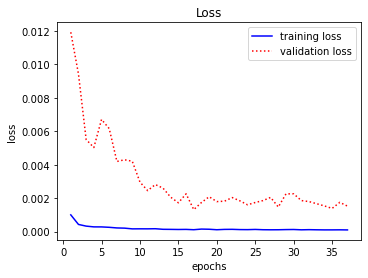

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']



epochs = range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

# 비용함수
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, 'b-', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.legend()



# # 정확도
# plt.subplot(1, 2, 2)
# plt.title("Accuracy")
# plt.ylabel("accuracy")
# plt.xlabel('epochs')
# plt.plot(epochs, accuracy, 'b-', label=" training accuracy")
# plt.plot(epochs, val_accuracy, 'r:', label="validation accuracy")
# plt.legend()

# plt.tight_layout()
plt.show()

In [36]:
pred_y = model.predict(test_x)

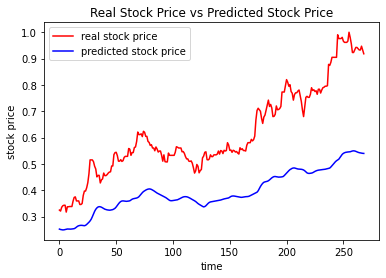

In [37]:
plt.figure()
plt.plot(test_y, color='r', label='real stock price')
plt.plot(pred_y, color='b', label='predicted stock price')
plt.title('Real Stock Price vs Predicted Stock Price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend(loc='best')
plt.show()

In [38]:
# print("다음 날 예측 종가 : ", df.Close[-1]*pred_y[-1]/df_y.Close[-1])

In [39]:
# import kerastuner as kt

# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# import keras
# import tensorflow as tf
# import IPython
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.callbacks import EarlyStopping

# # 모델 만들기
# tf.random.set_seed(7)

# def model_builder(nodes=16, activation='relu'):

#     model = Sequential()
#     model.add(GRU(nodes, activation=activation,return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2]), dropout =0.1))
#     model.add(GRU(nodes/2, activation=activation,return_sequences=True,dropout=0.1))
#     model.add(GRU(nodes/4, activation=activation,return_sequences=False,dropout=0.1))
#     model.add(Dense(1, activation=activation)) 
    
    

#     model.compile(loss='mean_squared_error', optimizer='adam',validation_split=0.3)

#     return model

  
# #keras.wrapper 분류기
# es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)


# model = KerasClassifier(build_fn=model_builder)

# # GridSearch 파라미터 설정
# batch_size = [16,32]
# epochs = [20,24,36,50]
# nodes = [16,32,64]


# activation = ['relu', 'tanh','rmsprop']
# param_grid = dict(batch_size=batch_size,
#                   epochs=epochs,
#                   nodes = nodes,
#                   activation=activation)


# # GridSearch CV를 만들기
# grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1, n_jobs=-1,scoring='neg_mean_squared_error')
# grid_result = grid.fit(train_x, train_y)

# # 최적의 결과값을 낸 파라미터를 출력합니다
# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print(f"Means: {mean}, Stdev: {stdev} with: {param}")

### GRU ver2.

In [40]:
activation = 'tanh'
units = 20

model = Sequential()
model.add(GRU(units=units, activation=activation, return_sequences=True, input_shape=(window_size, 6)))     # (10,5) 입력 형태를 가지는 LSTM층
model.add(Dropout(0.1))     # 입력값의 10%를 0으로 치환하여 과적합 방지
model.add(GRU(units=units, activation=activation, return_sequences=True))
model.add(Dropout(0.1))
model.add(GRU(units=units, activation=activation))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')     # 최적화 도구:adam, 손실 함수:MSE
model.fit(train_x, train_y, epochs=200, batch_size = 25)          # epochs:전체 데이터셋 학습 횟수, batch_size:한 번에 제공되는 훈련 데이터 개수
pred_y = model.predict(test_x)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 30, 20)            1680      
_________________________________________________________________
dropout (Dropout)            (None, 30, 20)            0         
_________________________________________________________________
gru_4 (GRU)                  (None, 30, 20)            2520      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 20)            0         
_________________________________________________________________
gru_5 (GRU)                  (None, 20)                2520      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

26/26 [==============================] - 0s 19ms/step - loss: 1.6704e-04
Epoch 82/200
26/26 [==============================] - 0s 19ms/step - loss: 1.8221e-04
Epoch 83/200
26/26 [==============================] - 0s 19ms/step - loss: 1.7673e-04
Epoch 84/200
26/26 [==============================] - 0s 19ms/step - loss: 1.7328e-04
Epoch 85/200
26/26 [==============================] - 0s 19ms/step - loss: 2.4434e-04
Epoch 86/200
26/26 [==============================] - 0s 18ms/step - loss: 1.5270e-04
Epoch 87/200
26/26 [==============================] - 0s 19ms/step - loss: 1.5260e-04
Epoch 88/200
26/26 [==============================] - 0s 19ms/step - loss: 1.3022e-04
Epoch 89/200
26/26 [==============================] - 0s 19ms/step - loss: 1.5512e-04
Epoch 90/200
26/26 [==============================] - 0s 19ms/step - loss: 1.1852e-04
Epoch 91/200
26/26 [==============================] - 1s 20ms/step - loss: 1.9464e-04
Epoch 92/200
26/26 [==============================] - 0s 19ms/step 

26/26 [==============================] - 1s 27ms/step - loss: 1.2918e-04
Epoch 176/200
26/26 [==============================] - 1s 20ms/step - loss: 1.0901e-04
Epoch 177/200
26/26 [==============================] - 1s 25ms/step - loss: 1.2974e-04
Epoch 178/200
26/26 [==============================] - 1s 27ms/step - loss: 1.3080e-04
Epoch 179/200
26/26 [==============================] - 1s 27ms/step - loss: 1.3145e-04
Epoch 180/200
26/26 [==============================] - 1s 27ms/step - loss: 1.1971e-04
Epoch 181/200
26/26 [==============================] - 1s 27ms/step - loss: 8.8380e-05
Epoch 182/200
26/26 [==============================] - 1s 26ms/step - loss: 1.1310e-04
Epoch 183/200
26/26 [==============================] - 1s 21ms/step - loss: 1.3619e-04
Epoch 184/200
26/26 [==============================] - 1s 19ms/step - loss: 1.2195e-04
Epoch 185/200
26/26 [==============================] - 1s 19ms/step - loss: 9.5202e-05
Epoch 186/200
26/26 [==============================] - 1s

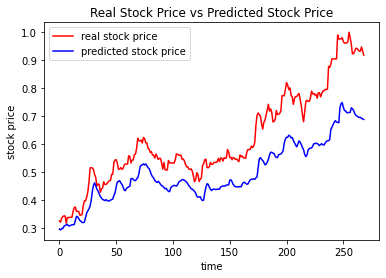

In [41]:
plt.figure()
plt.plot(test_y, color='r', label='real stock price')
plt.plot(pred_y, color='b', label='predicted stock price')
plt.title('Real Stock Price vs Predicted Stock Price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend(loc='best')
plt.show()

## LSTM을 통한 예측

In [42]:
activation = 'tanh'
units = 20

model = Sequential()
model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=(window_size, 6)))     # (10,5) 입력 형태를 가지는 LSTM층
model.add(Dropout(0.1))     # 입력값의 10%를 0으로 치환하여 과적합 방지
model.add(LSTM(units=units, activation=activation, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=units, activation=activation))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')     # 최적화 도구:adam, 손실 함수:MSE

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 20)            2160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 20)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 20)            3280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 20)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [43]:
model.fit(train_x, train_y, epochs=200, batch_size=25)          # epochs:전체 데이터셋 학습 횟수, batch_size:한 번에 제공되는 훈련 데이터 개수


Epoch 1/200
26/26 [==============================] - 5s 16ms/step - loss: 0.0110
Epoch 2/200
26/26 [==============================] - 0s 16ms/step - loss: 0.0025
Epoch 3/200
26/26 [==============================] - 0s 16ms/step - loss: 0.0021
Epoch 4/200
26/26 [==============================] - 0s 16ms/step - loss: 0.0012
Epoch 5/200
26/26 [==============================] - 0s 16ms/step - loss: 0.0011
Epoch 6/200
26/26 [==============================] - 0s 16ms/step - loss: 8.2564e-04
Epoch 7/200
26/26 [==============================] - 0s 16ms/step - loss: 7.7117e-04
Epoch 8/200
26/26 [==============================] - 0s 17ms/step - loss: 6.9046e-04
Epoch 9/200
26/26 [==============================] - 0s 16ms/step - loss: 5.6771e-04
Epoch 10/200
26/26 [==============================] - 1s 20ms/step - loss: 6.4563e-04
Epoch 11/200
26/26 [==============================] - 1s 23ms/step - loss: 6.2166e-04
Epoch 12/200
26/26 [==============================] - 0s 17ms/step - loss: 5.3488e-

26/26 [==============================] - 0s 18ms/step - loss: 2.2916e-04
Epoch 97/200
26/26 [==============================] - 0s 18ms/step - loss: 1.9396e-04
Epoch 98/200
26/26 [==============================] - 0s 18ms/step - loss: 1.8539e-04
Epoch 99/200
26/26 [==============================] - 0s 17ms/step - loss: 2.2641e-04
Epoch 100/200
26/26 [==============================] - 0s 17ms/step - loss: 2.2288e-04
Epoch 101/200
26/26 [==============================] - 0s 17ms/step - loss: 2.2498e-04
Epoch 102/200
26/26 [==============================] - 1s 20ms/step - loss: 2.1206e-04
Epoch 103/200
26/26 [==============================] - 0s 19ms/step - loss: 1.7624e-04
Epoch 104/200
26/26 [==============================] - 1s 22ms/step - loss: 1.7317e-04
Epoch 105/200
26/26 [==============================] - 1s 27ms/step - loss: 1.6672e-04
Epoch 106/200
26/26 [==============================] - 0s 19ms/step - loss: 1.7971e-04
Epoch 107/200
26/26 [==============================] - 1s 20

26/26 [==============================] - 1s 19ms/step - loss: 1.5700e-04
Epoch 191/200
26/26 [==============================] - 0s 17ms/step - loss: 1.7823e-04
Epoch 192/200
26/26 [==============================] - 0s 18ms/step - loss: 1.5954e-04
Epoch 193/200
26/26 [==============================] - 0s 17ms/step - loss: 1.5349e-04
Epoch 194/200
26/26 [==============================] - 0s 17ms/step - loss: 2.0202e-04
Epoch 195/200
26/26 [==============================] - 0s 17ms/step - loss: 1.6134e-04
Epoch 196/200
26/26 [==============================] - 1s 19ms/step - loss: 1.4883e-04
Epoch 197/200
26/26 [==============================] - 1s 20ms/step - loss: 1.9183e-04
Epoch 198/200
26/26 [==============================] - 0s 18ms/step - loss: 1.3666e-04
Epoch 199/200
26/26 [==============================] - 0s 17ms/step - loss: 1.2085e-04
Epoch 200/200
26/26 [==============================] - 1s 19ms/step - loss: 1.1362e-04


In [44]:
pred_y = model.predict(test_x)

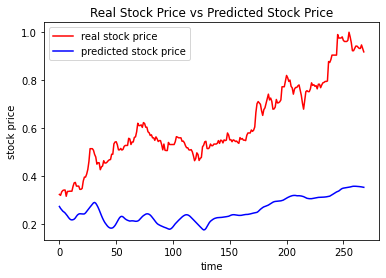

In [45]:
plt.figure()
plt.plot(test_y, color='r', label='real stock price')
plt.plot(pred_y, color='b', label='predicted stock price')
plt.title('Real Stock Price vs Predicted Stock Price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend(loc='best')
plt.show()

# 뉴스 감성분석 변수 추가

* 삼성, 네이버, 코스피, S&P500, NASDAQ 관련 뉴스로 감성분석 신경망을 학습시켜, 실제 분석기간 내의 카카오 관련 뉴스에 적용하여 긍정점수를 수치화 합니다.

## 뉴스 데이터 획득하기

### 방법1. 크롤링을 통해 뉴스 데이터 확보

In [46]:
# from bs4 import BeautifulSoup  # 접속후 웹스크립트에 대한 접근을 위함
# from urllib.parse import quote  # 입력어를 인코딩
# import requests  # 페이지에 접근
# import pandas as pd  # 결과 저장


# def get_news(query="", page_num=10, ds="2021.05.03", de="2021.05.03"):
#     result_df = pd.DataFrame(columns=('title', 'news_url', 'press', 'date', 'content'))
#     ind = 0

#     # 시작날짜, 메인함수에서 str(yyyy.mm.dd) 형식으로 받기!
#     # ds
#     # de

#     #print(type(query))
#     url = f'https://search.naver.com/search.naver?&where=news&sm=nws_hty&sm=tab_opt&sort=2&photo=0&field=0&pd=3&ds={ds}&de={de}&query={query}'
#     # sort=2 옵션은 오래된 순 정렬
#     #print(url)

#     while (True):

#         # 일단 해당 유알엘에 접속후 뷰리플숩으로 스크립트 열기
#         search_url = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
#         soup = BeautifulSoup(search_url.text, "html.parser")

#         links = soup.find_all('div', {'class': 'news_area'})

#         for link in links:
#             ## 제목 검사
#             ## 통과한것만 infogroup 가져오기
#             ## 탐색
#             title = link.find('a', {'class': 'news_tit'})['title'];
#             #print(f'title: {title}\nquery in?: {query in title}')

#             if (query in title):
#                 info_group = link.find_all('div', {'class': "info_group"})
#                 for info in info_group:

#                     try:
#                         news_url = info.find_all('a')[1]['href']
#                         press, date, content = get_contents(news_url)
#                         result_df.loc[ind] = [title, news_url, press, date, content]
#                         ind += 1
#                         print("#", end="")
#                     except:
#                         print('!', end="")
#                         pass
#             else:
#                 print("$", end="")
#                 pass

#         print("\n==========================\n")

#         try:
#            next_page = soup.find('a', {'class': 'btn_next'}).get('href')
#            url = "https://search.naver.com/search.naver" + next_page
#         except:
#            print("\n")
#            print("--전체 페이지 확인 끝--")
#            break
#     return result_df


# def get_contents(news_url):
#     if (news_url == '#'):  # 뉴스 유알엘이 없는경우
#         print('url없음!', end="")
#         pass
#         # 넘어가 버림
#     else:
#         # 링크가 있는경우 누르고, 내용 가져오게

#         # 링크 타고 이동
#         news_link = requests.get(news_url, headers={'User-Agent': 'Mozilla/5.0'})
#         news_html = BeautifulSoup(news_link.text, 'html.parser')
#         press = news_html.find('div', {'class': 'article_header'}).find('img')['title']
#         date = news_html.find('div', {'class': 'sponsor'}).find('span', {'class': 't11'}).get_text();

#         before_content = news_html.find('div', {'id': 'articleBodyContents'});

#         content = ""
#         for item in before_content.contents:
#             stripped = str(item).strip()
#             if stripped == "":
#                 continue
#             if stripped[0] not in ["<", "/"]:
#                 content += str(item).strip()
#         content = content.replace("&apos;", "")
#         content = content.replace("본문 내용TV플레이어", "")

#         return press, date, content



In [47]:
# user_input = input("키워드: ")
# df = get_news(query=user_input)
# print(df)

**해당 방식으로의 크롤링은 네이버의 크롤링 금지 정책에 의해 접근 데이터 갯수가 제한적이었습니다.**

In [48]:
# import multiprocessing
# import pandas as pd
# from bs4 import BeautifulSoup
# import requests
# from fake_useragent import  UserAgent
# import time
# import numpy as np


# def parallelize_dataframe(list, func):
#     df_temp = pd.DataFrame(columns=('title', 'news_url', 'press', 'date', 'content'))

#     pool = multiprocessing.Pool(8) # 초기화
#     temp = pool.map(func, list) # 각 프로세스가 리턴한 데이터 프레임을 세로로 합침
#     for item in temp:
#         if (item == -1):
#             break
#         else:
#             df_temp = df_temp.append(item)
#     pool.close() # 닫기
#     pool.join() # 대기
#     return df_temp


# def get_contents(news_url='',header=''):
#     if (news_url == '#'):  # 뉴스 유알엘이 없는경우
#         print('url없음!', end="")
#         pass
#         # 넘어가 버림
#     else:

#         # 링크가 있는경우 누르고, 내용 가져오게

#         # 링크 타고 이동


#         news_link = requests.get(news_url, headers={'User-Agent': header})
#         news_html = BeautifulSoup(news_link.text, 'html.parser')
#         time.sleep(np.random.uniform(0, 2))

#         press = news_html.find('div', {'class': 'article_header'}).find('img')['title']
#         date = news_html.find('div', {'class': 'sponsor'}).find('span', {'class': 't11'}).get_text();

#         before_content = news_html.find('div', {'id': 'articleBodyContents'});

#         content = ""
#         for item in before_content.contents:
#             stripped = str(item).strip()
#             if stripped == "":
#                 continue
#             if stripped[0] not in ["<", "/"]:
#                 content += str(item).strip()
#         content = content.replace("&apos;", "")
#         content = content.replace("본문 내용TV플레이어", "")

#         return press, date, content

# def get_page(i='1'):

#     query = '카카오'
#     ds = '2020.03.01'
#     de = '2021.03.05'


#     df = pd.DataFrame(columns=('title', 'news_url', 'press', 'date', 'content'))
#     ind = 0

#     url = f'https://search.naver.com/search.naver?&where=news&sm=nws_hty&sm=tab_opt&sort=1&photo=0&field=0&pd=3&ds={ds}&de={de}&query={query}&a:all&start={i}'

#     ua = UserAgent()
#     header = ua.chrome

#     # 일단 해당 유알엘에 접속후 뷰리플숩으로 스크립트 열기
#     search_url = requests.get(url, headers={'User-Agent': header})
#     soup = BeautifulSoup(search_url.text, "html.parser")
#     time.sleep(np.random.uniform(0, 2))

#     # 우리가 원하는 정보 조건을 만족하는 청크들만 일단 끌어온다.
#     links = soup.find_all('div', {'class': 'news_area'})

#     # 함수 탈출 조건 1 - 해당 페이지에 정보가 아예없으면 return -1 후 종료
#     if links == []:
#         return -1

#     for link in links:
#         ## 제목 검사
#         ## 통과한것만 infogroup 가져오기
#         ## 탐색
#         title = link.find('a', {'class': 'news_tit'})['title'];
#         # print(f'title: {title}\nquery in?: {query in title}')

#         if (query in title):
#             info_group = link.find_all('div', {'class': "info_group"})
#             for info in info_group:

#                 try:
#                     news_url = info.find_all('a')[1]['href']
#                     press, date, content = get_contents(news_url=news_url)
#                     df.loc[ind] = [title, news_url, press, date, content]
#                     ind += 1
#                     print("#", end="")
#                 except:
#                     print('!', end="")
#                     pass
#         else:
#             print("$", end="")
#             pass
#     print("\n==========================\n")
#     return df



# if __name__ == '__main__'  :

#     df = pd.DataFrame(columns=('title', 'news_url', 'press', 'date', 'content'))
#     list_page = ['1', '11', '21', '31', '41', '51', '61', '71']

#     while (True):
#         try:
#             df = df.append((parallelize_dataframe(list_page,get_page)))
#         except:
#             print("error")
#             break

#         for i in range(0, len(list_page)):
#             list_page[i] = str(int(list_page[i]) + 80)


**병렬처리 방식과, fake agent 모듈을 사용해 우회접근 또한 시도하였지만, 데이터 접근에 제한점이 존재하였습니다.**

### 방법2 : 웹 제공 뉴스데이터 불러오기

* [빅카인즈](https://www.bigkinds.or.kr/)에서 제공하는 뉴스데이터를 이용해 분석을 진행합니다.
* 전체 모형은 1차적으로 아래의 데이터로 학습을 진행합니다  
1. 삼성전자 - 2021년 01월  13일 부터 2021년 05월 08일 까지의 뉴스 데이터  
2. 네이버 - 2020년 11월 13일 부터 2021년 05월 08일 까지의 뉴스 데이터  
3. 코스피 - 2020년 10월 15일 부터 2021년 05월 08일 까지의 뉴스 데이터 
4. S&P500 - 2020년 5월 21일 부터 2021년 05월 08알 까지의 뉴스 데이터

In [49]:
# 카카오 관련 뉴스
kakao_news = pd.read_excel('./kakao_news/kakao_total.xlsx',index_col=0)
kakao_news

뉴스 식별자          일자     언론사         기고자  \
0      2.100201e+06  20210514.0   머니투데이      신상윤|기자   
1      1.100401e+06  20210514.0    동아일보         박해식   
2      2.100701e+06  20210514.0   헤럴드경제      김현경 기자   
3      1.100101e+06  20210514.0    경향신문         NaN   
4      2.100201e+06  20210514.0   머니투데이  김문희|MTN PD   
...             ...         ...     ...         ...   
12046  2.100801e+06  20180305.0   아시아경제         전경진   
12047  2.100311e+06  20180305.0    서울경제      박호현 기자   
12048  2.100311e+06  20180305.0    서울경제      박호현 기자   
12049  2.100501e+06  20180305.0  파이낸셜뉴스         박소현   
12050  2.100501e+06  20180305.0  파이낸셜뉴스         박소연   

                                                      제목     통합 분류1  \
0                     [더벨]'이커머스 고도화' 코리아센터, 계열사 시너지 '톡톡'      경제>유통   
1      한류 연계 협업콘텐츠 기획개발 지원 사업 캐스트, 복합 온라인 프로모션 캐스팅(CA...  IT_과학>콘텐츠   
2                               성장주 편식한 개미, 수익률 ‘올 마이너스’   경제>증권_증시   
3                  캐스팅(CAST:ING), 한류콘텐츠와 국내 중소기업의 새로운 만남  IT_과학>콘텐츠   
4               [마켓드라이브] 네이버, CBDC 사업 진입 소식에 디지털화폐주 '강세'     경제>자동차   
...                                                  ...        ...   
12046                               NH농협생명, 여성전용 건강보험 출시      사회>여성   
12047                         8개월새 40배 껑충...'비싼 몸' 된 두나무   경제>증권_증시   
12048                         8개월새 40배 껑충...'비싼 몸' 된 두나무   경제>증권_증시   
12049         [fn이사람] 윤정하 카카오 헤어샵 총괄 "헤어샵 모바일 예약 서비스 안착"  IT_과학>모바일   
12050             [fn 해외 대기획] 美 인도 이은 스타트업 강국 "이젠 실리콘발리"     국제>아시아   

           통합 분류2          통합 분류3   사건/사고 분류1 사건/사고 분류2 사건/사고 분류3  \
0          경제>자동차             NaN         NaN       NaN       NaN   
1             NaN             NaN         NaN       NaN       NaN   
2       경제>금융_재테크           경제>외환         NaN       NaN       NaN   
3             NaN             NaN         NaN       NaN       NaN   
4          경제>반도체   IT_과학>인터넷_SNS         NaN       NaN       NaN   
...           ...             ...         ...       ...       ...   
12046    사회>의료_건강        사회>교육_시험         NaN       NaN       NaN   
12047      경제>부동산       경제>금융_재테크         NaN       NaN       NaN   
12048      경제>부동산       경제>금융_재테크         NaN       NaN       NaN   
12049   IT_과학>콘텐츠             NaN         NaN       NaN       NaN   
12050       국제>중국           경제>무역  사고>산업사고>폭발       NaN       NaN   

                                                      인물  \
0                                                    김기록   
1              조성주,정길화,황희,배재민,투포케이,모모랜드,에이티즈,버스터즈,브레이브걸스   
2                                                    김용구   
3      방탄소년단,조성주,정길화,yn,ati,황희,배재민,투포케이,모모랜드,에이티즈,버스터...   
4                                                    NaN   
...                                                  ...   
12046                                                NaN   
12047                                                 구주   
12048                                                 구주   
12049                                                NaN   
12050                                        조코위,강길호,박소연   

                                                      위치  \
0                                              유럽,중국,동남아   
1                       이하 진흥원,팔렘방,한국,한국국제문화교류진흥원(원장,진흥원   
2                                                     경기   
3                                 이하 진흥원,한국,자카르타-팔렘방,진흥원   
4                                      북미,미국,대전,중국,평택캠퍼스   
...                                                  ...   
12046                                                미숙아   
12047                                          올리,구주,대금도   
12048                                             구주,대금도   
12049                                     미국,일본,서울,유럽,길안   
12050  미국,자카르타,중국,신산,인도네시아,순항,동남아,美,베트남,인도,동남아시장,동남아시...   

                                                      기관  \
0                      메이크샵,더벨,코리아센터,카카오,에누리,몰테일,쿠팡,머니투데   
1      CAST,공게임즈,카카오,디알엑스,SSG닷컴,쇼피코리아,카카오커머스,디알엑스(D,카...   
2      한국거래소,디지털컨텐츠,미국,카카오,네이버,금융투자협회,삼성전자,삼성전기,

In [50]:
# 삼성과 네이버에 대한 뉴스데이터
samsung_naver = pd.read_excel('./kakao_news/samsung_naver.xlsx')
samsung_naver

뉴스 식별자          일자     언론사                    기고자  \
0      2.100601e+06  20210508.0    한국경제  박한신(phs@hankyung.com)   
1      2.100101e+06  20210508.0    매일경제                    홍성용   
2      2.100101e+06  20210508.0    매일경제                    황순민   
3      2.100101e+06  20210508.0    매일경제                    추동훈   
4      7.101201e+06  20210508.0  디지털타임스                    김광태   
...             ...         ...     ...                    ...   
39995  1.400701e+06  20210113.0   충청투데이                 김충일 기자   
39996  1.400701e+06  20210113.0   충청투데이                  충청투데이   
39997  2.100851e+06  20210113.0    아주경제                    석유선   
39998  2.100851e+06  20210113.0    아주경제                    장은영   
39999  1.100901e+06  20210113.0    중앙일보                    안장원   

                                                      제목     통합 분류1  \
0       백화점 마트도 '삼국지' 네이버 쿠팡 이을 e커머스 '촉나라'는? [박한신의 커머스톡]   경제>산업_기업   
1                     "카카오 웃고, 네이버 울었다" 빅테크 라이벌 희비 갈린 이유   경제>산업_기업   
2                            Z세대가 메타버스에서 '구찌가방'을 사는 이유는?  IT_과학>콘텐츠   
3                      세기의 이혼 '세계4위 부자' 빌게이츠 재산 얼마나 줄어드나    경제>경제일반   
4                              인피니트 이성종 소집해제...이제 팬들 곁으로   문화>방송_연예   
...                                                  ...        ...   
39995               SK키즈폰 갤럭시A21s 잼 및 카카오 리틀프렌즈폰4 공짜폰 출시  IT_과학>모바일   
39996                        사랑의열매 12일 대전 충남 세종 오늘의 나눔온도      지역>충남   
39997    삼성전자 사장단은 ‘청바지 멋쟁이’...승현준 강인엽, 글로벌 행사서 데님패션 잇달아  IT_과학>모바일   
39998  [CES 2021] ​그레이스 돌란 삼성전자 상무 “차세대 TV, 개인화된 경험 제...  IT_과학>콘텐츠   
39999                            개발 호재 풍부한 영국풍 패밀리 스트리트몰      지역>경기   

               통합 분류2     통합 분류3   사건/사고 분류1 사건/사고 분류2 사건/사고 분류3  \
0       IT_과학>인터넷_SNS      경제>유통         NaN       NaN       NaN   
1               경제>유통   경제>증권_증시         NaN       NaN       NaN   
2           IT_과학>모바일        NaN  사회>사회문제>중독       NaN       NaN   
3             문화>문화일반        NaN         NaN       NaN       NaN   
4                 NaN        NaN         NaN       NaN       NaN   
...               ...        ...         ...       ...       ...   
39995           경제>유통     경제>자동차         NaN       NaN       NaN   
39996           지역>대구      지역>경남         NaN       NaN       NaN   
39997             NaN        NaN         NaN       NaN       NaN   
39998       IT_과학>모바일        NaN         NaN       NaN       NaN   
39999           지역>강원      지역>경남         NaN       NaN       NaN   

                                                      인물  \
0                                                    NaN   
1                                              한성숙,여,오프라   
2                          닐,이채윤,유기윤,김지영,김정옥,조준상,이수만,가상현   
3      크리스,이부진,임 전,노소영,김택진,임우재,제프 베이조스,빌 게이츠,트럼프,최태원,...   
4                                                    이성종   
...                                                  ...   
39995                                                NaN   
39996                                                임숙영   
39997                                          강인엽,승현준,승   
39998                                     매들린,놀랜드,마이클,폭스   
39999                                                NaN   

                                                     위치  \
0                                   미국,저주,파촉,대주주,계산,촉나라   
1                                              신사,일평,제주   
2                                  미국,지구,셀럽,틱톡커,컨버스,제페토   
3      캐나다,미국,회계,캘리포니아,초월,캐스케이드,워싱턴주법,플로리다,아마존,헐리우드,몬태나   
4                                                   NaN   
...                                                 ...   
39995                                                망원   
39996            대전,충남도공동모금회,서해자동차정비,충남,태안불교사암연합회,온양캠퍼스   
39997                                             미국,한국   
39998                                                미국   
39999              고덕,영국,고덕국제화계획지구,평택시,고덕지구,경기도,수도권,지제역   

                                                      기관  \
0      이마트,홈플러스,MBK파트너스,CU·,네이버,현대,티몬,초미,G마켓,GS25,롯데,...   


In [51]:
# S&P500지수와 코스피 관련 뉴스 

stock_market_news = pd.read_excel('./kakao_news/Sp500_kospi.xlsx')
stock_market_news

Unnamed: 0        뉴스 식별자        일자     언론사  \
0               0  2.100801e+06  20210509   아시아경제   
1               1  7.101201e+06  20210509  디지털타임스   
2               2  2.100311e+06  20210509    서울경제   
3               3  2.100601e+06  20210509    한국경제   
4               4  2.100201e+06  20210509   머니투데이   
...           ...           ...       ...     ...   
36670       16670  2.100101e+06  20200101    매일경제   
36671       16671  1.100901e+06  20200101    중앙일보   
36672       16672  7.101201e+06  20200101  디지털타임스   
36673       16673  2.100501e+06  20200101  파이낸셜뉴스   
36674       16674  2.100501e+06  20200101  파이낸셜뉴스   

                                   기고자  \
0                                  이선애   
1                                  김병탁   
2                               이완기 기자   
3        고은빛(silverlight@hankyung.com)   
4                               김태현|기자   
...                                ...   
36670                           디지털뉴스국   
36671  배정원(bae.jungwon@joongang.co.kr)   
36672                              차현정   
36673                           파이낸셜뉴스   
36674                              송경재   

                                               제목    통합 분류1     통합 분류2  \
0         공매도 재개 일주일, 거래대금 비중 3.4% "시장 영향, 지켜볼 것"  경제>증권_증시     경제>자동차   
1                 시장조성자 공매도 금지에 외국인 공매도 비중 기형적 증가  경제>증권_증시     경제>자동차   
2          “셀트리온 LGD 등 코스피 공매도 대금 1~5위 모두 주가 올랐다”  경제>증권_증시     경제>부동산   
3                 공매도로 몰리는 외국인들 LG디스플레이 HMM 주가 상승  경제>증권_증시     경제>자동차   
4                         공매도 재개 이후 "코스닥 변동성 커졌다"  경제>증권_증시     경제>자동차   
...                                           ...       ...        ...   
36670          뉴욕증시, 2019년 마지막 거래 상승 마감 다우 0.27%↑   국제>국제일반   경제>증권_증시   
36671        “中 ‘디지털 위안화’ 달러 위협  北 경제제재 무력화 될 수도“   경제>국제경제   국제>미국_북미   
36672                  [신년기획] "경자년 반등장 반도체株에 달렸다"  경제>증권_증시      경제>외환   
36673  브렉시트 美 대선 中 양회 韓 총선.. 2020 증시, 대내외 정치이슈 주목   국제>국제일반      정치>선거   
36674          美 장단기 수익률 격차 큰폭 확대 새해 경제전망 ‘맑음’ 예고   경제>국제경제   경제>증권_증시   

          통합 분류3     사건/사고 분류1 사건/사고 분류2 사건/사고 분류3  \
0          경제>유통           NaN       NaN       NaN   
1          경제>유통           NaN       NaN       NaN   
2         경제>자동차           NaN       NaN       NaN   
3         경제>부동산           NaN       NaN       NaN   
4          경제>유통           NaN       NaN       NaN   
...          ...           ...       ...       ...   
36670      경제>외환           NaN       NaN       NaN   
36671      경제>무역           NaN       NaN       NaN   
36672    경제>국제경제  범죄>기업범죄>거래제한       NaN       NaN   
36673        NaN           NaN       NaN       NaN   
36674   국제>미국_북미           NaN       NaN       NaN   

                                                      인물  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
36670                                            도널드 트럼프   
36671  서머스,에릭,로드릭,메간,Q :,번스,사공일,빌 클린턴,트럼프,새뮤얼슨,조시,애슈턴...   
36672                           트럼프,윤창용,이경수,엘리자베스 워런,김지산   
36673                                            김대준,트럼프   
36674                                     마이크,도널드 트럼프,피터   

                                                      위치  \
0                                                     일평   
1                                             아시아,일평,대주시   
2                                                    강보합   
3                                                     일평   
4                                              일평,대주시,대주   
...                                                  ...   
36670                                                 미국   
36671  미국,일본,고성,중국,경기,이라크,크레이머,한국,케임브리지,중,오설리반,영국,중 무...   
36672                       중,대전,미국,상하이,일본,중국,경기,미,하단,한국   
36673 

## 데이터 레이블링

* 뉴스 데이터중, 감성분석의 대상은 해당 기사의 제목으로 설정합니다. 
* 본문의 경우, 데이터의 내용이 다소 중립성이 강하다는 판단하에 본문보다는 제목을 분석하는것이 적합하다 판단하였습니다. 
* KNU 한국어 감성사전을 활용하여 각 데이터에 긍정,부정,중립 레이블을 추가합니다. 
[KNU 한국어 감성사전](https://github.com/park1200656/KnuSentiLex)

In [52]:
samsung_naver = samsung_naver[["일자","제목"]]
samsung_naver

일자                                                 제목
0      20210508.0   백화점 마트도 '삼국지' 네이버 쿠팡 이을 e커머스 '촉나라'는? [박한신의 커머스톡]
1      20210508.0                 "카카오 웃고, 네이버 울었다" 빅테크 라이벌 희비 갈린 이유
2      20210508.0                        Z세대가 메타버스에서 '구찌가방'을 사는 이유는?
3      20210508.0                  세기의 이혼 '세계4위 부자' 빌게이츠 재산 얼마나 줄어드나
4      20210508.0                          인피니트 이성종 소집해제...이제 팬들 곁으로
...           ...                                                ...
39995  20210113.0               SK키즈폰 갤럭시A21s 잼 및 카카오 리틀프렌즈폰4 공짜폰 출시
39996  20210113.0                        사랑의열매 12일 대전 충남 세종 오늘의 나눔온도
39997  20210113.0    삼성전자 사장단은 ‘청바지 멋쟁이’...승현준 강인엽, 글로벌 행사서 데님패션 잇달아
39998  20210113.0  [CES 2021] ​그레이스 돌란 삼성전자 상무 “차세대 TV, 개인화된 경험 제...
39999  20210113.0                            개발 호재 풍부한 영국풍 패밀리 스트리트몰

[40000 rows x 2 columns]

In [53]:
stock_market_news = stock_market_news[["일자","제목"]]
stock_market_news

일자                                          제목
0      20210509     공매도 재개 일주일, 거래대금 비중 3.4% "시장 영향, 지켜볼 것"
1      20210509             시장조성자 공매도 금지에 외국인 공매도 비중 기형적 증가
2      20210509      “셀트리온 LGD 등 코스피 공매도 대금 1~5위 모두 주가 올랐다”
3      20210509             공매도로 몰리는 외국인들 LG디스플레이 HMM 주가 상승
4      20210509                     공매도 재개 이후 "코스닥 변동성 커졌다"
...         ...                                         ...
36670  20200101          뉴욕증시, 2019년 마지막 거래 상승 마감 다우 0.27%↑
36671  20200101        “中 ‘디지털 위안화’ 달러 위협  北 경제제재 무력화 될 수도“
36672  20200101                  [신년기획] "경자년 반등장 반도체株에 달렸다"
36673  20200101  브렉시트 美 대선 中 양회 韓 총선.. 2020 증시, 대내외 정치이슈 주목
36674  20200101          美 장단기 수익률 격차 큰폭 확대 새해 경제전망 ‘맑음’ 예고

[36675 rows x 2 columns]

In [54]:
# 긍부정 사전을 로드합니다! 

with open('./positive_dic.txt',encoding='utf-8') as pos:
    positive = pos.readlines()

with open('./negative_dic.txt',encoding='utf-8') as neg:
    negative = neg.readlines()

negative = [neg.replace("\n", "") for neg in negative]
positive = [pos.replace("\n", "") for pos in positive]

In [55]:
def make_label(data,positive,negative):
    from tqdm import tqdm
    import re
    import pandas as pd


    labels = []

    title_data = list(data['제목'])


    for title in tqdm(title_data):
      clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title) 
      negative_flag = False
      label = 0
      for i in range(len(negative)):
        if negative[i] in clean_title:
          label = -1
          negative_flag = True
          print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
          break
      if negative_flag == False:
        for i in range(len(positive)):
          if positive[i] in clean_title:
            label = 1
            print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
            break

      labels.append(label)

    data['label'] = labels
    return data

In [56]:
samsung_naver.loc[samsung_naver["제목"].isnull()]

일자   제목
15344 NaN  NaN

In [57]:
samsung_naver.dropna(inplace=True)

<ipython-input-57-f4b8cafa7868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_naver.dropna(inplace=True)


In [58]:
samsung_naver = make_label(samsung_naver,positive,negative)

  0%|▎                                                                            | 154/39999 [00:00<00:52, 763.04it/s]

negative 비교단어 :  화 clean_title :  백화점 마트도 삼국지 네이버 쿠팡 이을 e커머스 촉나라는 박한신의 커머스톡
negative 비교단어 :  벌 clean_title :  카카오 웃고 네이버 울었다 빅테크 라이벌 희비 갈린 이유
positive 비교단어 :  대가 clean_title :  Z세대가 메타버스에서 구찌가방을 사는 이유는
positive 비교단어 :  부자 clean_title :  세기의 이혼 세계4위 부자 빌게이츠 재산 얼마나 줄어드나
negative 비교단어 :  해 clean_title :  인피니트 이성종 소집해제이제 팬들 곁으로
positive 비교단어 :  정 clean_title :  공모가 어떻게 결정하길래 따상 따상상 제각각인가요 투자썰록
negative 비교단어 :  죄 clean_title :  인피니트 성종 오늘8일 소집 해제 죄송한 만큼 보답할 것”
negative 비교단어 :  스포 clean_title :  美 트랜스젠더 스포츠 출전금지法 놓고 갑론을박
negative 비교단어 :  해 clean_title :  인피니트 성종 오늘8일 소집 해제 활동으로 보답할 것”
positive 비교단어 :  이벤트 clean_title :  VAV 오늘8일 온라인 팬미팅 개최 에이스 입대 전 마지막 이벤트
negative 비교단어 :  탈 clean_title :  중국 증시 박스권 탈출 둥팡차이푸에 물어봐라 강현우의 차이나스톡
negative 비교단어 :  해 clean_title :  인피니트 성종 오늘8일 소집 해제 많은 활동으로 보답할 것”
negative 비교단어 :  해 clean_title :  인피니트 성종 오늘8일 소집 해제 많은 활동으로 보답할 것
positive 비교단어 :  정 clean_title :  여의도心읽기정책 검증 없는 인사청문회 여론이 주목한 후보자는
negative 비교단어 :  죄 clean_title :  인피니트 이성종 소집해제 인스피릿에 죄송
negative 비교

  1%|▌                                                                            | 316/39999 [00:00<00:50, 781.00it/s]

positive 비교단어 :  대상 clean_title :  스마트폰 SNS 금융 분야 시민대상 디지털 무료교육
negative 비교단어 :  소홀 clean_title :  수익성 좇느라 본업’ 소홀한 통신사들
positive 비교단어 :  정 clean_title :  취임 한 달 지난 이종희 국립무형유산원장 무형유산은 지역성보다 향토성 중요 사람을 향하는 정책”
negative 비교단어 :  고도화 clean_title :  네이버 웨일 충남교육청과 미래 교육환경 고도화 위해 맞손’
negative 비교단어 :  범죄 clean_title :  포털 성범죄 기사 댓글 폐지” 청와대 청원 2450명 돌파
positive 비교단어 :  기대 clean_title :  산기대 제1기 KDigital Training 훈련생 모집
negative 비교단어 :  모시 clean_title :  카톡’이 멈춘 어린이날 저녁 개발자 모시기’를 떠올렸다
positive 비교단어 :  좋을 clean_title :  증시 좋을때 실탄 확보 유증 10년만에 최다
negative 비교단어 :  독 clean_title :  카카오 1분기 역대 최고 실적 지갑 구독으로 일상 연결 확장
negative 비교단어 :  독 clean_title :  단독 네이버 리셀 플랫폼 크림 日 동남아 시장 진출한다
negative 비교단어 :  벌 clean_title :  충북글로벌게임센터 컨설팅 지원
negative 비교단어 :  황당한 clean_title :  이건희 미술관 놓고 지자체들 황당한 유치 경쟁
positive 비교단어 :  이익 clean_title :  CJ ENM 1분기 영업이익 936억원 역대 분기 최대 실적
negative 비교단어 :  못된 clean_title :  e글중심 가상화폐 잘못된 길이라더니 이것이 어른의 길”
negative 비교단어 :  벌 clean_title :  충북글로벌게임센터 기업컨설팅 지원
positive 비교단어 :  이익 clean_t

  1%|▉                                                                            | 482/39999 [00:00<00:49, 802.10it/s]

negative 비교단어 :  우는 clean_title :  대선 앞 언론 개혁’ 띄우는 與 포털사이트 알고리즘 정조준’
negative 비교단어 :  분노 clean_title :  작심삼일 노노라던 네이버 이벤트 조기종료에 이용자 분노 폭발
positive 비교단어 :  대상 clean_title :  카카오 전 직원 대상 스톡옵션 부여
negative 비교단어 :  부정 clean_title :  네이버 부정 이용 탓하며 행사 조기 종료참여자 부글
positive 비교단어 :  잘 clean_title :  인터뷰 프듀 그 애에서 연기 잘하는 권현빈으로 
negative 비교단어 :  오도 clean_title :  주식 600주면 얼마야 카카오도 전직원에 스톡옵션 선언
positive 비교단어 :  세일 clean_title :  하이마트 부산 남천점 오픈세일 진행
negative 비교단어 :  분노 clean_title :  약속 헌신짝처럼 어기나” 네이버에 분노한 박용진 왜
positive 비교단어 :  좋아 clean_title :  네이버 로블록스 현대차 아이가 좋아할 기업에 10년 이상 투자
positive 비교단어 :  이벤트 clean_title :  작심사일로 끝난 네이버 블로그 이벤트
positive 비교단어 :  용자 clean_title :  참가자 폭주에 인당 1만6000원 네이버 블로그 행사 조기 종료 이용자 반발
negative 비교단어 :  해 clean_title :  年 수익률 최고 80 자녀에게 목돈 마련해주고 싶다면
positive 비교단어 :  이벤트 clean_title :  네이버 직원 나도 일기 쓰고 있었다 이벤트 조기종료에 원성
positive 비교단어 :  정 clean_title :  네이버 계정이 이용 제한되었습니다 메일은 스팸
positive 비교단어 :  완성 clean_title :  11년만에 완성한 백두대간 그 속에 사람 있다
positive 비교단어 :  이벤트 clean_title :  박용

  2%|█▏                                                                           | 634/39999 [00:00<00:54, 717.26it/s]

 정 clean_title :  생생경제 대기업집단 지정과 동일인 지정의 의미김재신 공정위 부위원장
positive 비교단어 :  정 clean_title :  ​평택시 주요현안사업 추진 숨통  경기도 1차 특별조정교부금 70억 확보
negative 비교단어 :  해 clean_title :  박나래 출연 예능 나혼산’→구해줘홈즈’ 시청자 TALK 닫혔다
positive 비교단어 :  빛 clean_title :  삼성 아모레퍼시픽과 보라빛 담은 갤버즈 프로 라네즈 쿠션’ 패키지 출시
negative 비교단어 :  화 clean_title :  제주 초등생 대상 밤과 별의 이야기 토요문화학교
negative 비교단어 :  혐오 clean_title :  편의점 홍보물에 등장한 손모양 월계수잎 초승달이 남성혐오 주식시장까지 흔드는 젠더갈등
negative 비교단어 :  설사 clean_title :  공정위 이번엔 건설사 대대적 현장조사
negative 비교단어 :  화 clean_title :  암호화폐 머지않아 주류될 것 넥슨 국민은행도 뛰어들었다
positive 비교단어 :  정 clean_title :  올바이오 5월 가정의 달 맞아최대 85 할인
negative 비교단어 :  욕 clean_title :  더이누스 가정의 달 맞아 라이브 커머스로 욕실 리모델링 패키지 첫 판매
negative 비교단어 :  독 clean_title :  구독경제 40조 스타트업부터 대기업까지 진검승부 아직도 구매하십니까 이젠 구독하시죠”
negative 비교단어 :  모시 clean_title :  수수료 안 받아요 이커머스 판매자 모시기 경쟁 활활
negative 비교단어 :  벌 clean_title :  강진군 2021 강진 GOOD 페스티벌 개최
negative 비교단어 :  질환 clean_title :  한국약사학술경영연구소 만성질환과 코로나19 약국 대응전략 특강’ 비대면 강의
negative 비교단어 :  화 clean_title :  디지털화 필수 생존전

  2%|█▌                                                                           | 780/39999 [00:01<00:54, 715.71it/s]

negative 비교단어 :  출혈 clean_title :  판매수수료 현금 더 얹어줍니다” 이커머스 시장 출혈경쟁
negative 비교단어 :  독 clean_title :  단독 코로나가 앞당긴 자율주행시대 네이버도 무인셔틀’ 만든다
negative 비교단어 :  악한 clean_title :  줌이 장악한 화상회의 플랫폼 국내 업체들 좀 들어갈게”
negative 비교단어 :  화 clean_title :  경기중기청 소상공인 살리는 백년가게 밀키트 사업 강화 백년가게 지속 발굴 노력할 것
positive 비교단어 :  대가 clean_title :  넷플릭스 SKB 망 이용대가 분쟁 성장통 겪는 인터넷차민영의 포스트IT
negative 비교단어 :  악연 clean_title :  안티팬’ 최수영 본격 밀착 악연 로맨스 시동
negative 비교단어 :  화 clean_title :  개발자 어디없소 성과급發 구인전쟁 갈수록 심화
negative 비교단어 :  모시 clean_title :  개발자모시기 과열 역대 실적에도 과도한 인건비 인센티브에 기업성장 발목
negative 비교단어 :  모시 clean_title :  개발자모시기 과열 구인 격전지된 판교역 입사 첫주 휴가 보너스 광고판 도배
positive 비교단어 :  새로운 clean_title :  네이버 프로젝트 꽃’ SME 중심 새로운 금융 생태계 동반 성장 이끈다
positive 비교단어 :  정 clean_title :  은혁 음성판정→댸니쇼’ 측 2일까지 휴방 6일 정상 방송”전문
negative 비교단어 :  못한 clean_title :  19년 연속 흑자에도 활짝 웃지 못한 신협
negative 비교단어 :  원한 clean_title :  SE★현장 태민의 13년 함축한 110분 샤이니 막내의 바람직한 성장feat 영원한 짝꿍종합
negative 비교단어 :  슬퍼 clean_title :  슬퍼하지 말자태민이 곧 장르 데뷔 13년 내공 쏟아부은 갓서트 종합
positive

  3%|█▉                                                                          | 1028/39999 [00:01<00:50, 768.37it/s]

잘 clean_title :  네이버 1분기 매출 15조 30 증가 커머스 간편결제 웹툰 다 잘나갔다
negative 비교단어 :  독 clean_title :  특집네이버 뉴스 100만 독자 돌파 콘텐츠의 질 더욱 중요해져”
negative 비교단어 :  화 clean_title :  안경애의 온테크카풀 줄고 전동킥보드 급증 코로나 1년’의 변화
negative 비교단어 :  화 clean_title :  남목청소년문화의집 청소년어울림마당 JOB多한 우리동네”비대면 행사 진행
negative 비교단어 :  해 clean_title :  한반도평화만들기 미 중 기술패권에 대비해 한 일 제3의 기술축’ 협력하자
negative 비교단어 :  지나친 clean_title :  MZ세대 문화적 현상 지나친 일반화는 피해야
positive 비교단어 :  이벤트 clean_title :  결혼정보회사 가연 4월 창립 기념 이벤트 진행
positive 비교단어 :  착한 clean_title :  푸루샵서 청주 농산물 착한 가격으로 만나요
negative 비교단어 :  해 clean_title :  김해시 화훼업계 돕기 온라인 꽃 판매행사
positive 비교단어 :  정 clean_title :  대기업집단 된 쿠팡 미국인 김범석은 총수 지정 피했다 공정위 대기업 총수 발표
negative 비교단어 :  벌 clean_title :  fn사설 쿠팡 총수 지정 혼선 재벌정책 시효 다했다
negative 비교단어 :  화 clean_title :  안경애의 온테크코로나 1년의 변화
positive 비교단어 :  혁신 clean_title :  허대식의경영혁신 온라인 커머스 시대 전통시장 생존전략
positive 비교단어 :  전성 clean_title :  청양군 GAP 인증농가 안전성 검사비 지원
negative 비교단어 :  경상 clean_title :  경상시론포스트 코로나 단상
positive 비교단어 :  수익 clean_title :  1시간새 11번 코인 딘

  3%|██▎                                                                         | 1199/39999 [00:01<00:50, 771.52it/s]

 광고 고문 너무 심하다 했더니 ” 유튜브 1분기 6조원’ 벌었다 IT선빵
positive 비교단어 :  잘 clean_title :  편집국에서 선배들이 저 모양이란 걸 잘 봐두시라  석진환
negative 비교단어 :  해 clean_title :  남해군 온라인 마켓 행사 마련
negative 비교단어 :  해 clean_title :  김해시 화훼농가 돕기 위해 꽃 향기가 ON AIR’ 개최
positive 비교단어 :  정 clean_title :  5월 가정의 달 경남 지자체 잇단 孝마케팅
negative 비교단어 :  해 clean_title :  네이버 자격증’ 이용해 사람인’ 이력서 작성한다
negative 비교단어 :  분에 clean_title :  흥분에 휩싸인 문화계 일부선 李컬렉션 한곳에 모아야
negative 비교단어 :  고도화 clean_title :  인플루언서 검색 고도화 성공 사례 노하우 공유
positive 비교단어 :  거침없이 clean_title :  JTBC 네이버와 손잡은 티빙 거침없이 상승세
positive 비교단어 :  이벤트 clean_title :  골드팡 네이버 쇼핑라이브 진행프리오더 이벤트
positive 비교단어 :  이벤트 clean_title :  셀러허브 누적 거래액 2000억 달성 기념 사용료 1년 무료 이벤트 진행
positive 비교단어 :  새로운 clean_title :  e글중심 새로운 가족이 온다 생활동반자법까지 나아갔으면”
negative 비교단어 :  해 clean_title :  서대문구 초등학생들 우리동네키움센터 통해 상시 돌봄 받는다
positive 비교단어 :  대상 clean_title :  브랜드 성장의 발판 한국인기브랜드대상’ 수상 기업
negative 비교단어 :  해 clean_title :  과기부 차관 소프트웨어 인재 양성 민간 역할도 중요해
negative 비교단어 :  화 clean_title :  천년의 숲에서 펼쳐지는 안심치유여행 2021함양산삼항노화엑스

  4%|██▊                                                                         | 1452/39999 [00:01<00:47, 819.90it/s]

clean_title :  개발자 쏠림에 양극화 심화 키워놓으면 나가는데 어쩌죠
negative 비교단어 :  독 clean_title :  단독규제 대상 플랫폼 EU 10개  日 5개  韓 80개
negative 비교단어 :  독 clean_title :  현대차 사무직 노조 출범 양대노총 아닌 독자노선으로
positive 비교단어 :  정 clean_title :  김범석 의장 총수’로 지정하나 공정위 쿠팡 딜레마’
positive 비교단어 :  정 clean_title :  라이프 트렌드 러시아산 녹용에 국내산 천연 재료 담아 가정의 달 선물’로 안성맞춤
positive 비교단어 :  공정한 clean_title :  MZ세대 노조가 온다 586 정년연장 맞서 공정한 보상을”
negative 비교단어 :  화 clean_title :  멀티 클라우드 비용 최적화를 위한 핀옵스 전략” 무료 온라인 세미나 개최
positive 비교단어 :  착한 clean_title :  기고 어디go’ 착한 경제 꿈꾸는 작은 상징 박재범
negative 비교단어 :  화 clean_title :  생산직과 차별화 MZ세대의 반기 대기업 고민 깊어진다 사무직노조 거센 바람
negative 비교단어 :  모시 clean_title :  스톡옵션 이어 스톡그랜트까지 IT개발자 모시기 전쟁 2R
positive 비교단어 :  빛 clean_title :  빛의벙커에 온 모네 클레 드뷔시 제주여행 풍요로워진다
negative 비교단어 :  화 clean_title :  꽃을 테마로 한 비밀의 화원이 구현된 미디어 아트 전시
negative 비교단어 :  독 clean_title :  한국은 전기차 보조금 줄이는데 독일 일본은 늘려
positive 비교단어 :  인정 clean_title :  일본 라인에 행정지도 개인정보 누설은 확인 안됐다
positive 비교단어 :  정 clean_title :  日 총무성 라인에 행정지도 개인 정보 누설 등은 확인 안돼
negative 비교단

  4%|███                                                                         | 1627/39999 [00:02<00:46, 833.92it/s]

positive 비교단어 :  성장세 clean_title :  상장기업분석 세종텔레콤 통신ICT 융합전기사업 성장세
negative 비교단어 :  없다 clean_title :  더 밀릴 수 없다 롯데온 네이버 쿠팡에 반격카드 뽑았다
positive 비교단어 :  정 clean_title :  미국인 김범석 쿠팡 총수로 지정될까
negative 비교단어 :  독 clean_title :  단독 네이버 퍼스널 모빌리티 플랫폼 구축 나선다
negative 비교단어 :  화 clean_title :  서예지 김강우 영화 내일의 기억 평점 좋네 논란만 없었어도
positive 비교단어 :  운 clean_title :  성동구 평생학습 동네배움터 75개 프로그램 운영
positive 비교단어 :  인기 clean_title :  네이버 엑스퍼트에서 가장 핫한 클래스는 심리상담 반려동물 부동산’ 인기
positive 비교단어 :  인기 clean_title :  이마트 몰리스 네이버 쇼핑라이브 인기상품 특가판매
negative 비교단어 :  독 clean_title :  스타트업 H2K 홍창기 김우현 창업자와 두번째 인터뷰 그와 독자의 QA
negative 비교단어 :  화 clean_title :  내 주식은 왜 100원씩 오르지 호가의 원리 3화
negative 비교단어 :  화 clean_title :  아주경제 오늘의 뉴스 종합 화이자 백신 2000만명분 추가 계약 총 9900만명분 백신 확보 外
positive 비교단어 :  착한 clean_title :  수수료 확 줄인다 온라인 경쟁에 착한 플랫폼도 등장
negative 비교단어 :  독 clean_title :  BTS 블랙핑크 다음이라고 1400만 구독자 온오빠 인기비결은
negative 비교단어 :  화 clean_title :  저스트 채팅 시대남 떠드는 걸 보려 화면 앞을 떠나지 않는다
negative 비교단어 :  위험하다 clean_title :  에어팟 주인 찾아가세요” 글도 위험하다 에어팟

  4%|███▎                                                                        | 1712/39999 [00:02<00:50, 754.69it/s]

 지다 clean_title :  마블의 세계관에 빠지다 어벤져스 스테이션’ 4월 29일 오픈 확정
negative 비교단어 :  벌 clean_title :  글로벌 최대 수준 데이터센터 각 세종’ 22일 첫삽떴다
positive 비교단어 :  순한 clean_title :  오뚜기 나트륨 함량 줄인 순한죽 선봬
positive 비교단어 :  기대 clean_title :  비강남 재건축도 들썩목동 상계 안전진단 통과 기대
negative 비교단어 :  부진 clean_title :  중소형주 강세장에 연일 대형주 베팅하는 동학개미 부진한 수익률 株포트라이트
negative 비교단어 :  탈 clean_title :  내일의 눈 탈통신 광풍’ 소는 누가 키우나
positive 비교단어 :  정 clean_title :  미리 만나보는 부천 가정의 달
positive 비교단어 :  안전 clean_title :  한국소비자원 오픈마켓 사업자들과 자율제품 안전협약 체결
negative 비교단어 :  화 clean_title :  안티팬’ 대본 리딩부터 화기애애한 메이킹 영상 맛보기까지 공개
negative 비교단어 :  화 clean_title :  네이버 데이터센터 각 세종 첫 삽 지역 첨단산업 활성화 기대
negative 비교단어 :  우는 clean_title :  창의적 생각 깨우는 제3의 공간’ 오피스 카페 도입 기업 증가세
positive 비교단어 :  웃다 clean_title :  웃다가 결제’예능형 라방 통했다
negative 비교단어 :  해 clean_title :  네이버웹툰도 개발자 확보 경쟁 가세 올해 세 자릿수 채용
positive 비교단어 :  성공 clean_title :  책꽂이라이브커머스 성공의 모든 것
negative 비교단어 :  부진 clean_title :  중소형주 강세장동학개미 대형주 집중 수익률은 부진’
positive 비교단어 :  정 clean_title :  한국산업인력공단 국가자격시험 전과정 디지털 비대면 기

  5%|███▌                                                                        | 1863/39999 [00:02<00:57, 658.23it/s]

 화 clean_title :  대한민국 100대 CEO 서경배 아모레퍼시픽그룹 회장  e커머스’로 K뷰티 신화 다시 쓴다
positive 비교단어 :  정 clean_title :  대한민국 100대 CEO 박정호 SK텔레콤 CEO  非통신 급성장 AI 컴퍼니 전환 선포
negative 비교단어 :  살기 clean_title :  세상에 이런 회사도 제주 한달 살기 숙박비까지 챙겨준다
positive 비교단어 :  정 clean_title :  기업 위메프 정률 수수료 29 시행업계 최저 수준
negative 비교단어 :  욕 clean_title :  시그널 뉴욕 IPO로 승부 내자 네이버 카카오 웹툰전쟁 美 증시로 확전
negative 비교단어 :  억지 clean_title :  대전전통나래관 소제극장 억지 춘향 공연
negative 비교단어 :  독 clean_title :  단독 초봉 9000만원 韓 S급 개발자 모셔가는 구글 페북
negative 비교단어 :  해 clean_title :  알로프트 서울 명동 네이버 쇼핑라이브 통해 호텔 특가 패키지 상품 판매
negative 비교단어 :  화 clean_title :  대전문화재단 억지춘향 온 오프라인 개최
negative 비교단어 :  화 clean_title :  서구 중심적 하느님 신화를 거부한 다석의 비빔밥 정신
positive 비교단어 :  최고 clean_title :  오후시황코스피 최고 찍은 지 하루 만에 16 뚝’일본 홍콩 동반 급락
negative 비교단어 :  해 clean_title :  혁신 벤처・스타트업 17개 단체 복수의결권 조속히 도입해야
negative 비교단어 :  해 clean_title :  반도체  플랫폼  해운 두자릿수 영업이익률
positive 비교단어 :  정 clean_title :  위메프 네이버 정조준 최저수수료 시행
negative 비교단어 :  해 clean_title :  앱 개발자 면담해 구글 횡포 조사
negative 비교단어 :  벌 c

  5%|███▊                                                                        | 1996/39999 [00:02<01:03, 600.03it/s]

positive 비교단어 :  정 clean_title :  실적이 끌고 외국인이 밀어 조정 끝낸 코스피 3500 간다
positive 비교단어 :  인정 clean_title :  개인정보 관리 우려 日정부 네이버 자회사 라인 릴레이 조사
positive 비교단어 :  정 clean_title :  韓 클라우드 아마존 MS와 정면 대결 세계로 간다
positive 비교단어 :  인기 clean_title :  양산 웅상 명동공원 내 의자공원 어린이 주민들에게 인기
negative 비교단어 :  독 clean_title :  이제훈 감독 된다 언프레임드 연출 참여
positive 비교단어 :  대상 clean_title :  공인중개사 시험 무료인강 공인모 스피드러닝반 패키지 구매자 대상 이벤트 421 마감
positive 비교단어 :  용한 clean_title :  20번째 창업책 SNS를 활용한 인터넷 창업’ 출판
negative 비교단어 :  독 clean_title :  단독女 패션 플랫폼 2위 29CM도 매물로 무신사 등 인수전 참전
positive 비교단어 :  정 clean_title :  이슈분석 빠른배송 만큼 빠른정산e커머스 판매자 만족 경영 확산
negative 비교단어 :  해 clean_title :  e글중심 나만 안 해 알트코인”
positive 비교단어 :  완성 clean_title :  다임러 개발자 3000명 채용 완성차도 IT업계와 인재 확보 경쟁
negative 비교단어 :  부족한 clean_title :  전기차 충전소 부족한데  각자 따로 써야하는 테슬라 현대차
positive 비교단어 :  정 clean_title :  좋은정보의 황맥기 39 제시 KT 지속 관심 오늘 황맥기 포착 종목은
positive 비교단어 :  수익 clean_title :  김영문 계명대 교수 20번째 창업 서적 펴내 수익금은 이웃돕기 기금으로 사용
positive 비교단어 :  미소 clean_title :  반도체 대란에도 최고 호황 한

  5%|████                                                                        | 2116/39999 [00:02<01:09, 543.39it/s]

 화 clean_title :  도심 속 빛의 화원’ 플라워 미디어 아트 상설 전시
negative 비교단어 :  장애 clean_title :  시각장애인 여행안내서를 직접 만드세요
negative 비교단어 :  장애 clean_title :  장애인의 날 표준사업장 의무 아닌 상생장애인 웃으니 ESG경영 꽃 핀다
negative 비교단어 :  영정 clean_title :  광화문에서김재영정보기술 인재확보 전쟁 록스타’ 키울 대계 세워야
positive 비교단어 :  정 clean_title :  가수 하림정인과 온라인으로 음악공부 어때요”
positive 비교단어 :  대상 clean_title :  경제계 단신네이버 全직원 대상 주식보상 프로그램 도입 外
positive 비교단어 :  인기 clean_title :  철원인기 유튜버 김계란 철원 홍보나선다
negative 비교단어 :  우울 clean_title :  샤이니 태민 5월 31일 軍입대 우울하게 보내고 싶지 않다
negative 비교단어 :  독 clean_title :  독자칼럼 갈수록 중요해지는 디지털 투명성
negative 비교단어 :  화 clean_title :  서복 티빙 동시 개봉에도 주말 흥행 수익 1위 영화계 새로운 활로 찾나
negative 비교단어 :  벌 clean_title :  사설 新산업까지 재벌 족쇄 채우는 나라에서 혁신 기업 나올 수 있겠나
negative 비교단어 :  탈 clean_title :  정당한 성과 보상 안되면 못참아 노조 만들거나 떠나거나 탈이념 20대 한국사회를 흔들다
positive 비교단어 :  기대 clean_title :  대전 서구청 청춘s LOVE 개소 청년 창업 마중물 역할 기대감
negative 비교단어 :  해 clean_title :  10대는 SNS 20대는 쇼핑 30대는 업무 위해 로그인 한다
positive 비교단어 :  이벤트 clean_title :  에어브릭 소재 토퍼 더몬 매트리스 런닝 기념 이벤트
positive

  6%|████▎                                                                       | 2268/39999 [00:03<00:59, 633.28it/s]

 화 clean_title :  GS홈쇼핑 부릉’ 2대주주 됐다 물류 인프라 강화
negative 비교단어 :  불황 clean_title :  피트니스테크 짐티・니짐내짐 서비스 다각화로 불황 뚫는다
negative 비교단어 :  화 clean_title :  이준기 팬들과 함께한 특별한 생일 파티아이유와 깜짝 전화 연결
positive 비교단어 :  운 clean_title :  코로나가 부른 IT 인력 전쟁’ 비전공자도 키운다”
positive 비교단어 :  정 clean_title :  뉴스N이슈 당 정 청 개편 엇갈린 평가尹 51 vs 李 32
negative 비교단어 :  벌 clean_title :  바이오코즈글로벌코리아 덤액츄얼리 8개국 수출 쾌거
negative 비교단어 :  화 clean_title :  주말의 홈트 한수진의 요가 한 수 코어근육 강화 스트레칭2
negative 비교단어 :  해 clean_title :  이상빌딩부동산중개법인 대한민국 부동산 트렌드쇼 2021’ 투자상담에 해운대 엘시티 숙박권’ 등 증정
positive 비교단어 :  덕 clean_title :  IT 게임업계 인재 블랙홀’ 중기는 인력난 허덕’
negative 비교단어 :  화 clean_title :  GS홈쇼핑 부릉’ 타고 배송 차별화 나선다
negative 비교단어 :  병 clean_title :  GS홈쇼핑 부릉 지분인수 마무리 합병 후 배송 시너지↑
negative 비교단어 :  화 clean_title :  非알코올 막걸리’시대 일화 발왕산 막걸리 제로’ 첫선
negative 비교단어 :  독 clean_title :  앱 주문율 80대로 껑충 결제개선 구독 론칭 숙제’ 연말까지 100대 보급 낙관 헤경이 만난 인물지성원 비트코퍼레이션 대표
negative 비교단어 :  화 clean_title :  아이유 깜짝 전화연결까지 이준기 생일 맞아 특별한 소통 행보
negative 비교단어 :  해 clean_title :  교보문고 세계 책의 날’ 올

  6%|████▌                                                                       | 2417/39999 [00:03<00:55, 681.23it/s]

 안전 clean_title :  한성숙 대표에게 지목받은 조규찬 네이버커넥트재단 대표 어린이 교통안전 챌린지’ 동참
positive 비교단어 :  최고 clean_title :  최고 연봉 이어 최다 채용 IT업계 개발자 영입 전쟁 2R
negative 비교단어 :  독 clean_title :  스타트업 2000만 독자의 솔루션 스티비
negative 비교단어 :  루머 clean_title :  박수홍 93년생 여친’ 루머 김다은 아나운서에 불똥종합
negative 비교단어 :  화 clean_title :  영화 드라마 J팝 다 죽쒀도日아니메는 잘 나가는 이유
negative 비교단어 :  없다 clean_title :  요즘 사진관에는 이것’이 없다 정답은 사진사
positive 비교단어 :  용한 clean_title :  수협 국산 주원료 사용한 프리미엄 젓갈 2종 출시
positive 비교단어 :  용한 clean_title :  수협 국산 주원료 사용한 프리미엄 젓갈 2종 출시
negative 비교단어 :  위기 clean_title :  광고계 서예지 릴레이 손절 위약금 수십억 위기
negative 비교단어 :  벌 clean_title :  마켓인사이트ESG 회사채 발행 러시 벌써 9조 지난해의 2배’
negative 비교단어 :  지쳐 clean_title :  토요워치 쏟아지는 이미지에 지쳐 눈 감고 귀를 열다
positive 비교단어 :  할인 clean_title :  생활공작소 오는 18일 봄철 청소용품 최대 55 할인
negative 비교단어 :  화 clean_title :  네이버도 흔들면 된다첫 화면에서 QR체크 결제까지
positive 비교단어 :  정 clean_title :  네이버도 서예지 지웠다 광고계 손절에 위약금 30억원 추정
negative 비교단어 :  설사 clean_title :  현대차그룹 모빌리티 총괄 본부 신설사령탑에 포티투닷 송창현
negative 비교단어 :  아파 clean_title :  회사

  7%|████▉                                                                       | 2603/39999 [00:03<00:48, 771.91it/s]

clean_title :  주식 1주 받기 이벤트의 힘 토스증권 MTS 오픈 한달만에 100만 계좌 달성
negative 비교단어 :  화 clean_title :  소통 화합이 기업가치 높인다MZ세대를 읽어라” 대기업 소통 경영’ 에 새바람 분다
positive 비교단어 :  진실 clean_title :  Y이슈 서예지 인성 둘러싼 폭로vs옹호 엇갈린 진실공방
negative 비교단어 :  화 clean_title :  소통 화합이 기업가치 높인다회사에 워라밸 보장 요구 수평적 조직문화 중시
positive 비교단어 :  상위 clean_title :  IT기업 입사 워너비 업체 상위권 싹쓸이
negative 비교단어 :  화 clean_title :  9살 비비고 왕교자의 진화이번 달 말 뉴 비비고 왕교자’ 첫선
negative 비교단어 :  부족 clean_title :  돈 부족시 네이버페이로 20만원 후불결제 네이버 후불결제서비스 시작
positive 비교단어 :  정 clean_title :  당신 마술을 믿습니까” 안나라수마나라’ 지창욱X최성은X황인엽 출연확정공식
negative 비교단어 :  벌 clean_title :  내수기업 꼬리표 뗀다 카카오 글로벌 광폭 행보
negative 비교단어 :  안타깝게 clean_title :  김다은 아나운서 93년생 박수홍 여친 의혹에 안타깝게도 아냐”
negative 비교단어 :  안타깝게 clean_title :  김다은 아나운서 박수홍 93년생 여친 안타깝게도 아냐”
negative 비교단어 :  화 clean_title :  더벨코리아센터 몰테일 쉽투비 무료화 소상공인 지원
negative 비교단어 :  벌 clean_title :  이바다X위노나 오크 글로벌 컬래버 시너지 낸다 Lonely Hearts Club 발매
negative 비교단어 :  화 clean_title :  9살 비비고 왕교자’의 진화 CJ제일제당 제품력 끌어올렸다
positive 비교단어 :  운 clean_title :  

  7%|█████▍                                                                      | 2874/39999 [00:03<00:46, 803.58it/s]

 정 clean_title :  스타트업쿠팡 시총은 거품동료들의 냉정 평가
negative 비교단어 :  화 clean_title :  사연뉴스사전예약 이벤트 후 날아온 결제링크 저만 화나나요”
positive 비교단어 :  전성 clean_title :  당근마켓 1주 방문자 1000만 슬세권 서비스 전성시대’
negative 비교단어 :  화 clean_title :  광화문 포털 손보기도 내로남불인가
negative 비교단어 :  화 clean_title :  서예지 인성 하녀 취급 인과응보  스태프들 폭로글 화제
negative 비교단어 :  해 clean_title :  KT 잘나가게 예비창업자 위해 지역상권 무료분석
positive 비교단어 :  혁신 clean_title :  SK㈜ CC 멀티버스 산업별 디지털 혁신 플랫폼 한곳에
negative 비교단어 :  화 clean_title :  블랙야크 강북구와 외국인 등산화 대여소 오픈
positive 비교단어 :  대가 clean_title :  테크 인사이드메타버스 시대가 오고 있다
positive 비교단어 :  운 clean_title :  희망의 하모니로 가득 채운 강원의 4월
positive 비교단어 :  생생한 clean_title :  공원 생생한 자연 집에서 안전하게 즐겨요
negative 비교단어 :  독 clean_title :  빵 음식물처리기 홈트까지 통신사 구독경제’ 무한확장
negative 비교단어 :  갈등 clean_title :  민민 갈등으로 번지는 GTXC 안산지역 정차 유치전
positive 비교단어 :  할인 clean_title :  올인원 스팀다리미 테팔 엑시오 할인 판매
positive 비교단어 :  소득 clean_title :  유근기 곡성군수 소비 패턴 맞는 작물 육성 농가 소득에 보탬되도록
positive 비교단어 :  봄날의 clean_title :  코로나19 재확산 봄날의 공원 집에서 즐겨요
negative 비교단어 :  악의 clean_titl

  8%|█████▊                                                                      | 3049/39999 [00:04<00:51, 721.10it/s]

clean_title :  이번 주 증시 전망 외국인 귀환  국민연금 매도세 진정 기대
negative 비교단어 :  독 clean_title :  이슈분석유통가 휩쓴 구독경제 정교하고 다양해졌다
positive 비교단어 :  용자 clean_title :  경찰 성착취물 수사에 떨고 있는 이용자들 n번방 사태 판박이
positive 비교단어 :  운 clean_title :  잘키운 캐릭터 매출 효자 캐릭터 육성하는 유통가
positive 비교단어 :  정 clean_title :  고용정보원 23일까지 꽃길응원 진로상담’
positive 비교단어 :  여유 clean_title :  여유 생긴 국민연금 삼성전자 등 대형주’ 숨통 트이나
negative 비교단어 :  해 clean_title :  올해 1분기 국내 상장사 시가총액 84조 원 늘어
positive 비교단어 :  강세 clean_title :  CCTV 종목 강세 뚜렷 올초 11개 기업 시총 1조 클럽 입성
negative 비교단어 :  해 clean_title :  올해 시총 CCTV종목 약진 데브시스터스 으뜸
negative 비교단어 :  벌 clean_title :   ICT 웹툰 웹소설 글로벌공략 공개
negative 비교단어 :  화 clean_title :  창립 43주년 푸르밀 고객 소통 강화 신제품 개발 매진할 것”
positive 비교단어 :  정 clean_title :  경기도귀농귀촌센터 정보 카카오톡으로 받으세요
negative 비교단어 :  화 clean_title :  창립 43주년 푸르밀 고객 소통 강화 신제품 개발 매진”
positive 비교단어 :  인기 clean_title :  클럽하우스 두달만에 인기 급락
positive 비교단어 :  인기 clean_title :  클럽하우스 반짝 인기로 끝나나 검색 지표 0
positive 비교단어 :  대상 clean_title :  궁중비책 2021 국가브랜드대상 수상 기념 프로모션
positive 비교단어 :  이벤트

  8%|█████▉                                                                      | 3126/39999 [00:04<00:55, 663.60it/s]

 화 clean_title :  B마트 성장에 편의점 나 떨고있니” 플랫폼 전용상품 강화언박싱
negative 비교단어 :  해 clean_title :  해운대구보건소 영양플러스 건강 요리교실 온라인으로
negative 비교단어 :  쓴 clean_title :  학생증부터 출입까지 캠퍼스 곳곳에서 네이버 인증서 쓴다
positive 비교단어 :  혁신 clean_title :  우리銀 네이버와 디지털 혁신사업 추진 업무협약 체결
positive 비교단어 :  최저가 clean_title :  지그재그’ 인수부터 최저가까지 거세진 反쿠팡 각개전투’언박싱
positive 비교단어 :  정 clean_title :  샤이니 12일 정규 7집 리패키지 발매 기념 생방송 진행
positive 비교단어 :  이익 clean_title :  마켓인사이트경쟁사 영업이익 압도한 알라딘비결은 오픈마켓 미입점
negative 비교단어 :  오류 clean_title :  댓글이 사라졌다 네이버 PC 모바일 한때 서비스 오류
negative 비교단어 :  화 clean_title :  네이버 뉴스 댓글 오류 발생 현재 정상화종합
negative 비교단어 :  오류 clean_title :  왜 안뜨지 네이버 뉴스 PC 모바일 댓글 한때 오류
negative 비교단어 :  오류 clean_title :  네이버 PC 모바일 뉴스 댓글 서비스 오류 발생
negative 비교단어 :  오류 clean_title :  속보 댓글이 사라졌다 네이버 뉴스 PC 모바일 댓글 오류
negative 비교단어 :  오류 clean_title :  네이버 뉴스 PC 모바일 댓글 오전 한때 오류
negative 비교단어 :  독 clean_title :  뉴스 열어보기 공공주택 공급대책 오세훈 암초 홍남기 지자체 단독 공급 안 돼
negative 비교단어 :  독 clean_title :  정용진 이마트 독해졌다 쿠팡 롯데와 쩐의 전쟁
positive 비교단어 :  정 clean_title :  쿠

  8%|██████▏                                                                     | 3262/39999 [00:04<01:00, 606.41it/s]

 화 clean_title :  카드뉴스 MZ세대 놀이터 메타버스’ 현실보다 생생 진화한 가상세계
positive 비교단어 :  정 clean_title :  네이버파이낸셜 배송완료 다음날 바로 정산 세계에서 가장 빨라”
positive 비교단어 :  정 clean_title :  네이버 배송완료 다음날 판매대금 90→100 정산
positive 비교단어 :  정 clean_title :  코웨이 네이버 쇼핑 라이브 청정 라이프 특별전 진행
positive 비교단어 :  정 clean_title :  조성욱 거대플랫폼 시장 경쟁 제한할 우려 커 급변 환경 반영한 정비 필요
positive 비교단어 :  정 clean_title :  네이버 빠른정산 확대 배송완료 다음날 100 정산
negative 비교단어 :  화 clean_title :  네이버 빠른정산’ 확대 쿠팡과 차별화
negative 비교단어 :  화 clean_title :  네이버 쇼핑라이브 SME 위한 온・오프라인 지원 프로그램 활성화
positive 비교단어 :  정 clean_title :  정엽 오늘8일 야간작업실 출격 김재중 만난다
negative 비교단어 :  부족한 clean_title :  기지국 부족한데 조기 상용화 5G서비스 품질 진상조사 촉구
negative 비교단어 :  방정 clean_title :  기업 성공 방정식이 바뀐다재무성과보다 환경 더 중시
negative 비교단어 :  화 clean_title :  네이버파이낸셜 배송완료 다음날 100 빠른정산 SME 자금회전 지원 강화
positive 비교단어 :  쾌감 clean_title :  액션쾌감 노바디 개봉날 고질라vs콩 꺾고 1위MK박스오피스
positive 비교단어 :  흑자 clean_title :  급성장 빅테크페이  네이버 스마트스토어 앞세워 흑자
negative 비교단어 :  비싼 clean_title :  비싼데 안터지는 5G 진상 조사해야 靑국민청원 등장
positive 비교단어 :  전문가 clean

  8%|██████▍                                                                     | 3395/39999 [00:04<00:57, 631.33it/s]

 괜찮다 clean_title :  YG엔터테인먼트 빅뱅 없이도 괜찮다한국투자
positive 비교단어 :  쉽게 clean_title :  주말의 홈트 정지인의 쉬운 다이어트 초보자도 쉽게 따라하는 폼롤러 데드리프트
negative 비교단어 :  화 clean_title :  네이버 쇼핑라이브 동영상 기술 강화 사업자와 사용자 편익 높인다
negative 비교단어 :  압수수색 clean_title :  전자정보 압수수색 시대5네 정보 내놔’를 멈출 5가지 제안
positive 비교단어 :  안전 clean_title :  강원 사회안전지수 1위는 속초 제주 주거환경 전국 TOP10
negative 비교단어 :  비판 clean_title :  오세훈 비판뉴스만 안나온다고뉴스이력 보니 달랐다
negative 비교단어 :  독 clean_title :  단독 쿠팡 총수 없는 대기업집단’ 지정된다 공정위 역차별 논란
negative 비교단어 :  해 clean_title :  동네친구 된 IT 중고거래서 취업까지 해결
negative 비교단어 :  독 clean_title :  강원일보 모바일 구독자 100만 돌파지역 맞춤 뉴스로 독자 요구 부응 디지털 언론 환경을 선도해 달라
positive 비교단어 :  인기 clean_title :  인터넷가입 IPTV인터넷티비 결합상품 설치 당일 현금사은품 지급 펭귄통신’ 인기
negative 비교단어 :  화 clean_title :  음성청소년문화의집 청소년 자기계발 프로그램 운영
negative 비교단어 :  해 clean_title :  홍성군 봄철 입맛 돋는 남당항 바다송어 본격 출하 올해 20여t 출하 예정
positive 비교단어 :  정 clean_title :  충남세종농협 이달의 새농민상에 세종 최 씨부부와 홍성 이 씨부부 선정
negative 비교단어 :  화 clean_title :  보령시 시정홍보 활성화 위한 제5기 SNS 홍보요원 모집
positive 비교단어 :  싱글벙글 clean_title

  9%|██████▉                                                                     | 3630/39999 [00:05<00:51, 708.87it/s]

 운 clean_title :  동구 초량6동 마을건강센터 비대면 빗자루 챌린지 캠페인 운영
positive 비교단어 :  정 clean_title :  볼보자동차코리아 2021 헤이 플로깅 한정판 패키지’ 추가 판매
negative 비교단어 :  악의 clean_title :  전통 가 무 악과 현대 창작 퓨전 음악의 조화
negative 비교단어 :  해 clean_title :  올해 75주년 맞은 고급 오디오 브랜드 JBL
positive 비교단어 :  정 clean_title :  볼보 4시간 만에 매진된 헤이 플로깅 한정판 패키지 추가 판매
negative 비교단어 :  화 clean_title :  한화투자증권 델타랩 누적판매 2000억 돌파 3개월 새 2배로
negative 비교단어 :  화 clean_title :  현대백화점 미아점 中企 판로지원 서울산업진흥원과 맞손
positive 비교단어 :  강세 clean_title :  오전시황코스피 외국인 순매수에 장 초반 3130대 강세
negative 비교단어 :  독 clean_title :  부산시 해운대구 1인가구 고독사 예방 AI 안부콜 시범 서비스’ 추진
negative 비교단어 :  독 clean_title :  해운대구 1인가구 고독사 예방 AI 안부콜 시범 서비스’ 추진
positive 비교단어 :  이벤트 clean_title :  하만 75번째 생일 맞은 JBL 고객 감사 이벤트 진행
negative 비교단어 :  오도 clean_title :  특징주 美 빅 테크’ 줄줄이 신고가네이버 카카오도 강세’
negative 비교단어 :  장애 clean_title :  네이버 로봇개 시각장애인의 눈이 됐다
positive 비교단어 :  감사 clean_title :  하만 JBL 출시 75주년 고객감사 행사
negative 비교단어 :  독 clean_title :  양평군 구독형 독서콘텐츠 밀리의 서재’ 이용자 100명 선착순 선발
positive 비교단어 :  덕 clean_ti

  9%|███████▏                                                                    | 3780/39999 [00:05<00:52, 693.16it/s]

 운 clean_title :  괴산군보건소뱃살 쏙 건강 쑥프로그램 운영
negative 비교단어 :  해 clean_title :  음성군 올해 안심식당 40곳 추가 지정
negative 비교단어 :  벌 clean_title :  카카오엔터테인먼트 글로벌 웹소설 플랫폼 래디쉬 인수 추진
negative 비교단어 :  벌 clean_title :  카카오 글로벌 웹소설 플랫폼 래디쉬 인수 추진
negative 비교단어 :  비평 clean_title :  미디어 비평 유력 신문사의 부수 조작 사건
positive 비교단어 :  축하 clean_title :  상장기업 분석카페24 전 세계와 통하는 e커머스 솔루션을 구축하다
negative 비교단어 :  독 clean_title :  단독 카카오 웹소설 플랫폼 래디쉬 4000억에 인수 추진
negative 비교단어 :  벌 clean_title :  카카오 vs 네이버 글로벌 콘텐츠 무한경쟁
positive 비교단어 :  똑똑한 clean_title :  매일 계산기 두드리는 사장님들 위한 똑똑한 장부 앱
positive 비교단어 :  정 clean_title :  샤이니 3년만의 완전체 콘서트 공연의 정석 그 이상을 보다커튼콜
positive 비교단어 :  정 clean_title :  SE★현장 샤이니 키 엔딩 요정 파급력 이렇게 클지 몰랐다
negative 비교단어 :  무서운 clean_title :  네이버 쿠팡 안 무서운 전문몰의 진격
negative 비교단어 :  벌 clean_title :  전체 투자 늘었지만 글로벌 수준 못미쳐 삼성 착시효과도
negative 비교단어 :  없다 clean_title :  KT 엔씨 우리도 질 수 없다 콘텐츠 투자 잰걸음
negative 비교단어 :  화 clean_title :  시그널 상장 반년 만에 음반 사업 분할하는 빅히트 배터리 빠진 LG화학처럼 될까
positive 비교단어 :  무료로 clean_title :  얼라이브 스튜디오 D 무료로 이용하세

 10%|███████▍                                                                    | 3925/39999 [00:05<00:52, 689.47it/s]

 출혈 clean_title :  스타트업도 초봉 5000만원” IT개발자 연봉 출혈경쟁 확산
negative 비교단어 :  화 clean_title :  네이버 라이브커머스 기술 강화 지연시간 대폭 감소
negative 비교단어 :  폭행 clean_title :  e커머스 공세 용진이형 MA 광폭행보
positive 비교단어 :  맛집 clean_title :  네이버주문 검색하면 주문 가능한 내 주변 맛집과 메뉴 한눈에
positive 비교단어 :  영광 clean_title :  드라마월드 션 리차드 하지원 헨리 한류 톱스타 출연 영광
positive 비교단어 :  열심히 clean_title :  드라마월드 헨리 호랑이족 3개월간 열심히 몸 만들어
positive 비교단어 :  위트 clean_title :  드라마월드 하지원 위트있고 재미있는 캐릭터 멜로도 있어
negative 비교단어 :  화 clean_title :  박화진 고용부 차관 K디지털 트레이닝 37개 기관 추가선정
negative 비교단어 :  화 clean_title :  네이버 쇼핑라이브 동영상 기술 강화 라이브커머스 박차
negative 비교단어 :  폭행 clean_title :  BTS 군대 가면 끝 빅히트 놀라운 광폭행보
positive 비교단어 :  가치 clean_title :  특징주 에이티넘인베스트 두나무 지분가치 시총 20배 이상 가능성에 강세
positive 비교단어 :  운 clean_title :  KTX 개통 17주년 KTX이음 운행으로 재도약
negative 비교단어 :  해 clean_title :  아스트로 ONE’ MV 티저 공개 더 화려해진 역대급 스케일 자랑
negative 비교단어 :  독 clean_title :  한성숙 네이버 대표 상품 구독 익일배송 등으로 이커머스 1위 다지겠다
negative 비교단어 :  해 clean_title :  싱글맘’ 야옹이 작가 한부모가정 위해 2000만원 기부
positive 비교단어 :  정 clean_t

 10%|███████▊                                                                    | 4079/39999 [00:05<00:51, 690.94it/s]


negative 비교단어 :  해 clean_title :  현대해상 네이버와 AI챗봇 서비스 마음봇 운영
negative 비교단어 :  독 clean_title :  비정규직 보호 차별해소 외치면서 택배사업장 감독엔 손놓은 고용부
positive 비교단어 :  전문가 clean_title :  네이버법률과 함께 할 지식인 엑스퍼트 전문가 찾습니다
positive 비교단어 :  전문가 clean_title :  네이버 SME와 전문가 연계하는 비즈 컨설팅 프로그램 시작
negative 비교단어 :  탈 clean_title :  2021년 1분기 리그테이블 법무법인 광장 17건 자문 싹쓸이 1위 탈환 기현 5위권 진입 눈길
negative 비교단어 :  욕 clean_title :  두나무 뉴욕증권거래소 상장 추진관련주 우리기술투자 한화투자증권 대성창투 에이티넘인베스트 등은
negative 비교단어 :  질환 clean_title :  바다의불청객’ 괭생이모자반서 피부질환 개선 효능 발견 특허출원
negative 비교단어 :  화 clean_title :  폴인인사이트백화점 충성고객이 발란에서 명품 사는 이유
positive 비교단어 :  할인 clean_title :  KTX 이음열차 타고 영주 관광땐 할인혜택 한가득
positive 비교단어 :  정 clean_title :  조정장세에 시총 톱10 고점대비 16 하락 현대차 245↓
negative 비교단어 :  폭력 clean_title :  朴 성폭력 피해자 실명 직장명 온라인에 공개한 누리꾼 기소 의견으로 검찰 송치
negative 비교단어 :  독 clean_title :  넷플릭스 디즈니 모두 눈독들이는 K콘텐츠토종OTT의 반격카드중
negative 비교단어 :  절망 clean_title :  청년임대 사는 20대도 내집 가진 30대도 부동산은 절망”
positive 비교단어 :  안전 clean_title :  공공임대 내겐 최소한의 안전망” 그 돈으로 집살 기회 늘려달라”
positive 

 11%|████████▏                                                                   | 4319/39999 [00:06<00:47, 744.53it/s]

 유튜브뮤직 1년새 두배 폭풍 성장 스포티파이 초반성적 7위
positive 비교단어 :  대상 clean_title :  네이버 세종시 교사 학생 대상 AI SW 교육
negative 비교단어 :  과로 clean_title :  코오롱 럭키슈에뜨 부부의세계 한소희 효과로 완판
negative 비교단어 :  벌 clean_title :  네이버 베트남 AI센터 열었다 글로벌 연구 벨트
positive 비교단어 :  영웅 clean_title :  아이유 듣고’ 로제 보고’ 임영웅 산다’
positive 비교단어 :  기대 clean_title :  네이버 베트남 하노이과기대와 공동 AI 센터 오픈
positive 비교단어 :  대상 clean_title :  논문컨설팅 브레인PhD 2021년 국회 교육부분 1위 브랜드 대상 수상
negative 비교단어 :  원한 clean_title :  네이버 세종시 학생과 교사 대상 AI SW교육 지원한다
positive 비교단어 :  쉽게 clean_title :  오지환 기록 보여줘 LG TV로 프로야구 더 쉽게 즐긴다
positive 비교단어 :  쉽게 clean_title :  프로야구 하이라이트 영상 LG 웹OS TV로 더 쉽게 즐긴다
positive 비교단어 :  대상 clean_title :  네이버 세종시 초등학생 교사 대상 소프트웨어 교육 나서
negative 비교단어 :  해 clean_title :  김해시 서부건강지원센터 비대면 임산부건강교실 운영
positive 비교단어 :  대상 clean_title :  네이버 세종시 학생과 교사 대상 AI・SW 교육 지원
positive 비교단어 :  완성 clean_title :  T1419 완성형 신인이 돌아온다
positive 비교단어 :  맛있는 clean_title :  삼양식품 채식주의자도 즐기는 맛있는라면 비건 출시
positive 비교단어 :  맛있는 clean_title :  삼양식품 채식주의자도 즐기는 맛있는라면 비건’ 출시
negative

 11%|████████▋                                                                   | 4582/39999 [00:06<00:43, 809.45it/s]

negative 비교단어 :  폭행 clean_title :  오세훈 여직원 성폭행” SNS글 유령계정 수사의뢰”
positive 비교단어 :  전문가 clean_title :  네이버 클로바 AI 러시 2021’ 개최 실무 전문가들이 직접 참여
negative 비교단어 :  독 clean_title :  ​노인이 지배하는 세상② 고독사 방지부터 원격의료까지고령사회 대비 시작
negative 비교단어 :  해 clean_title :  오세훈 총선때 성추행 폭로 吳측 추적해보니 유령계정
negative 비교단어 :  모시 clean_title :  사장님 모시기’ 나선 티몬 수수료 안받고 매출 1 드립니다”
negative 비교단어 :  압수수색 clean_title :  자본시장 불공정거래 현미경 감시 유튜버 등 압수수색도
negative 비교단어 :  독 clean_title :  강원일보 모바일 구독자 100만 돌파  해외 독자들 축하메시지코로나로 고향도 못 가는데 덕분에 그리움 해소”
negative 비교단어 :  화 clean_title :  지역경제의 변화 다시 짜는 생태계광고 대신 상표등록 검색어 상위권 노출 2년만에 매출액 6배
positive 비교단어 :  인기 clean_title :  동네핫딜 갤럭시S21 울트라 40만원대 시세 공유 S20노트20 10만원대 성지 인기
negative 비교단어 :  질환 clean_title :  괴산군 심뇌혈관질환자 자가 건강관리 프로그램 운영
negative 비교단어 :  화 clean_title :  DMZ 평화관광 활성화 캠페인 진행
negative 비교단어 :  화 clean_title :  함께하는 금융 네이버클라우드와 AI 활용 업무협약금융 서비스 디지털 경쟁력 강화 시동
positive 비교단어 :  운 clean_title :  고양시 네이버와 함께 AI 활용 치매조기진단 서비스 시범 운영
positive 비교단어 :  정 clean_title :  이베이코리아 매각 숏리스트 선정 마켓워치


 12%|█████████                                                                   | 4745/39999 [00:06<00:45, 770.36it/s]

 clean_title :  KT 예비창업자에 타지역상권정보 무료 제공
positive 비교단어 :  무료로 clean_title :  KT 예비 창업자 빅데이터 무료로 사용하세요”
positive 비교단어 :  착한 clean_title :  착한구두 모코블링이 한 곳에  롯데온 패션에 힘준다
negative 비교단어 :  비난 clean_title :  김정은 위중설’ 오보 확인되자 진보 댓글러는 보수언론 찾아가 공격적 비난↑
negative 비교단어 :  해 clean_title :  메시지로 성인물 보내며 따라해봐 집 안에 있는 아이들 노린다
positive 비교단어 :  대상 clean_title :  네이버 오프라인 SME 대상 네이버주문 결제 수수료 전액 지원 연장
positive 비교단어 :  운 clean_title :  CJ대한통운 택배 단가 인상 소식에 주가 목표주가 동반 상승株포트라이트
positive 비교단어 :  정 clean_title :  아이폰12 PRO 지원금올라 아이폰11 가격 7만원대 재고정리 실시
positive 비교단어 :  이벤트 clean_title :  인터넷가입 펭귄통신’ 블로그 후기 친구추천 등 이벤트로 추가혜택 제공
negative 비교단어 :  병 clean_title :  강병준의 어퍼컷네카라쿠배당토의 역할론
positive 비교단어 :  정 clean_title :  컴백 D2 강승윤 정규 1집 PAGE 코멘터리 필름 공개
negative 비교단어 :  손해 clean_title :  손해보면서 팔아야하나 택배비 인상에 속타는 소상공인
negative 비교단어 :  해 clean_title :  밥줄’까지 위협 메시지 아닌 메신저 공격해” 진화하는 여성주의자 공격
positive 비교단어 :  기대 clean_title :  데마에칸 日 배달시장 확대 실적 성장 기대
negative 비교단어 :  없다 clean_title :  무법지대’ 업비트 공시 블로그 내용 올라와도 문제 없다
negative 비교단

 13%|█████████▋                                                                  | 5101/39999 [00:06<00:40, 861.96it/s]

 화 clean_title :  현대약품 20년 연구개발 펩타이드 기능성 화장품 랩클 론칭
negative 비교단어 :  아파 clean_title :  e글중심 아파트 못 사게 하더니 자기들은 땅 갖고 있었네”
positive 비교단어 :  정 clean_title :  김명원 경기도의원 부천 범박 옥길강남 광역버스 노선 추진을 위한 정담회 개최
negative 비교단어 :  오류 clean_title :  네이버 하루도 안돼 또  이번엔 클라우드 서비스 접속 오류
negative 비교단어 :  독 clean_title :  포털 독과점식 언론시장 지배 적극 대응
positive 비교단어 :  전문가 clean_title :  중고나라 모바일 광고 전문가 홍준 신임 대표 선임
positive 비교단어 :  인정 clean_title :  네이버 먹통 디도스 공격이 원인 개인정보 유출 없어
negative 비교단어 :  장애 clean_title :  네이버 클라우드 접속 차질 이틀 연속 장애
negative 비교단어 :  불법 clean_title :  여성 팬과 성관계 후 불법 촬영’ 가수 겸 작곡가 더필름 추가 입건
negative 비교단어 :  독 clean_title :  경쟁사 콘텐트도 한바구니에 구독X구독’ 전성시대
negative 비교단어 :  해 clean_title :  네이버 이번엔 클라우드 접속 오류 긴급점검 통해 정상화
negative 비교단어 :  독 clean_title :  단독 MA로 미래 충전 현대차는 기술영토 확장 네이버는 동맹강화
negative 비교단어 :  해 clean_title :  여성 경영자 ESG 전문가 다양해진 대기업 사외이사
negative 비교단어 :  독 clean_title :  단독롯데온 새 대표에 나영호 이베이코리아 전략사업본부장
negative 비교단어 :  장애 clean_title :  네이버 이번엔 클라우드 오류 이틀 연속 서비스 장애
positive 비교단어 :  영웅 clean_title 

 13%|██████████                                                                  | 5282/39999 [00:07<00:39, 880.63it/s]

negative 비교단어 :  부족 clean_title :  안심번호가 뭐에요” 개인정보 유출 막을 수 있는 안심번호’ 홍보 부족
positive 비교단어 :  운 clean_title :  충주시민축구단 27일 충주종합운동장 홈 개막 첫 경기
negative 비교단어 :  불편 clean_title :  카카오톡 네이버 등 안드로이드 앱 오류에 시민들 불편
positive 비교단어 :  운 clean_title :  충주시민축구단 27일 충주종합운동장 홈 개막 첫 경기
negative 비교단어 :  불만 clean_title :  우리도 올려달라 판교발 연봉인상에 불만 커진 대기업 직원들
positive 비교단어 :  열정 clean_title :  중장년 청년 창업 협업 오픈 마켓’ 제안 경험 열정 합치면 벤처 성공확률 높일 것”
negative 비교단어 :  갈등 clean_title :  코스피 EU中 갈등에 1 하락 3000대로 밀려
positive 비교단어 :  정 clean_title :  채종협 알고있지만 출연 확정
negative 비교단어 :  오류 clean_title :  안드로이드 오류에 카톡 먹통 소동 구글 늑장 대응 논란종합
negative 비교단어 :  해 clean_title :  해킹당했나주식 매매 놓쳐 하루 망쳐버린 앱 먹통 패닉
negative 비교단어 :  벌 clean_title :  잇단 빅딜로 글로벌 투자 행보 기술 시너지 영토확장 나선 네이버
negative 비교단어 :  분통 clean_title :  구글 또 대형사고 네이버카톡 기존 앱과 충돌” 이용자 분통
positive 비교단어 :  정 clean_title :  일본 국민 메신저’ 라인 정부 지자체 등 사용 중단” 잇따라
positive 비교단어 :  적극 clean_title :  e커머스 1위 반전 노리는 롯데 이베이코리아 인수도 적극 나서
negative 비교단어 :  오류 clean_title :  안드로이드 스마트폰서 카톡 등 앱 실행 중단 오류


 14%|██████████▎                                                                 | 5453/39999 [00:07<00:43, 794.67it/s]

positive 비교단어 :  행복 clean_title :  온라인 유통채널 경기행복샵입점에 중기 133개사 지원
negative 비교단어 :  황당한 clean_title :  맛있게 드셨으면 별점 1점” 배달 사장님 황당한 역발상’
negative 비교단어 :  져서 clean_title :  안터져서 속터져 5G 가입자 집단소송 추진
negative 비교단어 :  사납다 clean_title :  fn사설 온라인 플랫폼 규제권 다툼 볼썽사납다
positive 비교단어 :  혁신 clean_title :  24시간 무인매장 문연 LG U 비대면 혁신으로 찐팬 확보
negative 비교단어 :  화 clean_title :  베스트 여신금융인 초개인화 서비스 선구자 임영진 신한카드 사장
positive 비교단어 :  할인 clean_title :  롯데카드뱅크샐러드 PLCC 합작 한달 최대 5만원 할인 빨대카드 출시
negative 비교단어 :  해 clean_title :  대법 고층 건물 햇빛반사 피해 배상해야”
positive 비교단어 :  운 clean_title :  서구 청년UP 원데이클래스’ 운영
negative 비교단어 :  화 clean_title :  무인매장 열고 온라인 개통 밀고 비대면 강화하는 이통사
negative 비교단어 :  틀린 clean_title :  제시 내 매력은 자신감 남들과 다르다고 틀린 건 아니잖아”
positive 비교단어 :  운 clean_title :  관상어산업 2025년 6571억 원 규모로 자생력 키운다
positive 비교단어 :  혁신 clean_title :  경북도교육청 고교학점제 기반 에듀테크 교육혁신 추진
positive 비교단어 :  대상 clean_title :  5G 품질 논란 정부 이통사 대상 집단소송 추진
negative 비교단어 :  화 clean_title :  물류센터 디지털 웨어하우스 진화 물류산업 판 바꿀 것
negative 비교단어 :  해 clean_title :  올해

 14%|██████████▋                                                                 | 5610/39999 [00:07<00:47, 726.47it/s]

positive 비교단어 :  기대 clean_title :  美 지역커뮤니티 묶는 플랫폼 넥스트도어 IPO 성공 기대감 자이앤트레터
negative 비교단어 :  갈등 clean_title :  삼성 부럽지 않은 네이버 카카오 연봉 임원직원 격차는 갈등의 불씨’
negative 비교단어 :  독 clean_title :  단독 판커지는 빗썸 인수전 네이버 비자도 저울질
negative 비교단어 :  먼지 clean_title :  중국發 미세먼지 천리안이 1시간마다 알려준다
negative 비교단어 :  벌 clean_title :  구글과 페이스북 등 글로벌 포털사 앞으론 국내 뉴스 사용료 지불 전망
negative 비교단어 :  상한 clean_title :  수상한 골프 부킹 40대 이상 빠져든 조건 만남 온라인서 성행
negative 비교단어 :  불합리 clean_title :  개점휴업 카카오페이 마이데이터 심사 불합리
negative 비교단어 :  화 clean_title :  이휘재 선배님 예쁘게 봐주세요” 브레이브걸스 사인 CD 중고거래 화제
positive 비교단어 :  혁신 clean_title :  플랫폼 입법전쟁 혁신 규제 양립 내건 방통위 전혜숙 의원
positive 비교단어 :  가치 clean_title :  공모주 그 이상의 가치 SK바이오사이언스
negative 비교단어 :  해 clean_title :  ITZY FAN PARTY LIVE’ 성료 믿지’ 자부심 되기 위해 최선 다할 것”
negative 비교단어 :  탈 clean_title :  머리카락 덜 빠진다 1000만 탈모인 치료기 효과 놓고 설왕설래
negative 비교단어 :  화 clean_title :  뽕밭서 일군 신화 롯데 다음 승부수는 전기차 바이오 박동휘의 컨슈머 리포트
positive 비교단어 :  정 clean_title :  링 오르는 전금법 개정안 금융위 vs 한은 누가 웃을까
negative 비교단어 :  해 clean_title :  ITZY

 14%|██████████▉                                                                 | 5759/39999 [00:07<00:50, 684.06it/s]

 대접 clean_title :  B급 문학 취급받던 웹소설 요샌 A급 대접 받는다는데 Weekend BOOK
negative 비교단어 :  병 clean_title :  울산 남구치매안심센터 감염병 확산에 비대면 교육 호응
negative 비교단어 :  화 clean_title :  아이폰se2 가격 0원 이벤트 및 아이폰12 미니 할인율 강화
negative 비교단어 :  해 clean_title :  청양군 할인해봄 칠갑마루 쇼핑몰 기획전 인기
negative 비교단어 :  해 clean_title :  비즈스토리 판매 수수료 0 빠른정산  중소상공인 위해 아낌없이 지원
positive 비교단어 :  정 clean_title :  中 게임 빗장 걸어놓은 사이 K게임 지배력 높이는 텐센트 韓中 게임사 불공정 
positive 비교단어 :  기대 clean_title :  커머스 확장 기대감’ 네이버 40만원 뚫고 신고가
negative 비교단어 :  힘든 clean_title :  가뜩이나 힘든데 자영업자 울리는 온라인 광고 사기
negative 비교단어 :  해 clean_title :  청양군 할인해봄 칠갑마루 쇼핑몰 기획전 인기
negative 비교단어 :  병 clean_title :  울산 남구 치매안심센터 감염병 확산상황 대응 비대면 교육 전격 시행
positive 비교단어 :  고급 clean_title :  IT 인력난에 고급 인재 지키자 LG 직원 임금 9 올렸다
negative 비교단어 :  압수수색 clean_title :  블라인드 압수수색 논란 기분 나쁘면 국가가 개입
negative 비교단어 :  노예 clean_title :  수면제 없으면 잠 못 들어 별점 노예된 자영업자
negative 비교단어 :  오도 clean_title :  카카오도 네이버 NC 이어 작년 평균 연봉 1억 원 돌파
negative 비교단어 :  고작 clean_title :  억소리 나는 성과급 논란 속 범수형 상여금 고작 3200만원
negative 

 15%|███████████▍                                                                | 6020/39999 [00:08<00:42, 793.20it/s]

 없어진 clean_title :  네이버에선 식당 별점테러’ 없어진다 키워드 형식의 태그 구름’이 대체
positive 비교단어 :  정 clean_title :  SKT 직원 작년 평균 연봉은 12억 박정호 대표는 74억
positive 비교단어 :  정 clean_title :  네이버 공정성 논란 뉴스 알고리즘 검증 나선다
negative 비교단어 :  불법 clean_title :  폐쇄용 사모펀드도 불법 판매 땐 소비자가 직접 계약 해지 가능
negative 비교단어 :  해 clean_title :  중도환매 안되는 사모펀드도 소비자가 위법해지 요구할 수 있다종합
positive 비교단어 :  이룸 clean_title :  붐펫vuumpet 케어 기능 펫드라이룸으로 인기몰이
positive 비교단어 :  행복 clean_title :  월드비어마켓 행복한 편의점 만들기와 업무협약
positive 비교단어 :  이벤트 clean_title :  라포티셀 판테놀 3종 체험딜 이벤트 진행
negative 비교단어 :  탈 clean_title :  AI라는 거인의 어깨 올라탈 수 있게 정부가 적극 밀어줘야
negative 비교단어 :  매로 clean_title :  네이버웍스 헬스케어 마케팅 디지털전환 촉매로
positive 비교단어 :  이벤트 clean_title :  스벅쿠폰 드려요 센스톤 인증보안 SDK툴 출시 이벤트
negative 비교단어 :  악성 clean_title :  네이버 소상공인 울리는 별점 악성리뷰 없앤다
positive 비교단어 :  건강한 clean_title :  혈관 청소꾼 건강한 기름 엄지의 제왕’ 지방으로 지방 빼기
positive 비교단어 :  수혜 clean_title :  네이버신세계 유통 동맹 최대 수혜는 신세계인터
positive 비교단어 :  인기 clean_title :  인기협 구글 수수료 인하는 미봉책 406억 깎아주고 5107억 챙겨
negative 비교단어 :  해 clean_title :  N

 16%|███████████▊                                                                | 6204/39999 [00:08<00:39, 854.14it/s]

 해 clean_title :  택진이형 지난해 연봉 184억원 받았다
negative 비교단어 :  해 clean_title :  속보 네이버 직원 평균 연봉 최초 1억원 돌파 이해진은 19억원
negative 비교단어 :  해 clean_title :  김택진 엔씨소프트 대표 작년 연봉 184억원 한성숙 34억 이해진 19억원
negative 비교단어 :  화 clean_title :  이베이코리아 인수전 본격화  카카오 신세계 롯데에 SKT까지
negative 비교단어 :  해 clean_title :  쿠팡 대박에 핫해진 이베이 인수전 롯데 신세계 SKT까지 몰려
positive 비교단어 :  용자 clean_title :  이용자 7400만’ 유통 혈맹 결성 신세계네이버 2500억원 규모 지분 맞교환
positive 비교단어 :  흥행 clean_title :  이베이코리아 예비입찰 흥행온・오프라인 유력기업 대거 참전
negative 비교단어 :  부상 clean_title :  산업리포트AI・클라우드 시대 급부상한 데이터센터
negative 비교단어 :  해 clean_title :  구글 통행세 일부 반값 적용해도 1200억 뜯긴다
negative 비교단어 :  화 clean_title :  몸값 5조 이베이코리아 인수에 SK텔레콤 참전 공식화
positive 비교단어 :  빛 clean_title :  1년반 만에 빛본 SKT 초협력 전략 맞교환 카카오지분서만 7천억 이익
negative 비교단어 :  위기 clean_title :  쿠팡發 위기감 유통・플랫폼 공룡 혈맹으로 맞선다
negative 비교단어 :  속이다 clean_title :  쿠팡 로켓 우린 2시간 광속이다 네이버신세계 크로스’
negative 비교단어 :  독 clean_title :  100조 쿠팡 독주 막아라 용진이형 해진이형 손잡았다
positive 비교단어 :  빠르다 clean_title :  쿠팡 로켓보다 빠르다 네이버 신세계 2500억 혈맹
negative 비교단

 16%|████████████                                                                | 6377/39999 [00:08<00:45, 741.56it/s]

 벗어나 clean_title :  금리 상승에 국내 성장주도 흔들리나 성장주 올인’ 벗어나야”
negative 비교단어 :  해 clean_title :  에릭과 갈등 김동완 신화 해체 약 올라서라도  종합
negative 비교단어 :  탈 clean_title :  요기요 개발자 쟁탈戰 가세 배민과 정면승부
negative 비교단어 :  해 clean_title :  쌍용정보통신 유상증자 통해 클라우드 사업 확대
negative 비교단어 :  귀찮은 clean_title :  기획수기명부 전화번호 대신 안심번호귀찮은 070 스팸 전화 막아준 7인방
negative 비교단어 :  귀찮은 clean_title :  기획귀찮은 070 스팸 막는 안심번호 QA
negative 비교단어 :  해 clean_title :  김동완 신화 해체 말도 안 되는 소리어떻게든 간다
negative 비교단어 :  불화 clean_title :  에릭 김동완 불화에 과거 전진 결혼식 신화 단체사진 재조명
negative 비교단어 :  독 clean_title :  오송도서관 상반기 문화교실 어린이독서회 비대면 진행
positive 비교단어 :  쉽게 clean_title :  서울시 7000개 공공서비스 카톡 챗봇으로 손쉽게 예약
positive 비교단어 :  운 clean_title :  그래미가 변했다 여성 아티스트 본상 휩쓸고 흑인운동 품어
positive 비교단어 :  희망 clean_title :  희망가득 강소기업 세계 최고의 육가공업체 꿈꾸는 꿀맛나는세상주
negative 비교단어 :  해 clean_title :  응수씨네 김동완 신화 해체 말도 안돼 끝까지 버틸 것
negative 비교단어 :  해 clean_title :  장보는 엄지족 잡아라  치열해지는 신선식품 배송경쟁
negative 비교단어 :  해 clean_title :  서울시 7000여개 공공서비스 예약 카톡으로도 가능해져
positive 비교단어 :  운 clean_title :  기관 외국인이

 17%|████████████▊                                                               | 6720/39999 [00:09<00:41, 809.73it/s]

 불편 clean_title :  비즈  테크 말랑하니 육아 불편 필요에서 태어난 제품 입소문 타고 매출 쑥’
negative 비교단어 :  해 clean_title :  나도 해진이 형이 쏜다 하고 싶다 연봉경쟁 의견 밝힌 이해진
negative 비교단어 :  욕 clean_title :  쿠팡 뉴욕증시 성공적 데뷔 단숨에 시총 국내 3위’종합
positive 비교단어 :  좋은 clean_title :  좋은 세상을 향한 AI 혁신 생태계 이끌 브레인 150명 뭉쳤다
negative 비교단어 :  걱정 clean_title :  이해진 나도 해진이형 좋지만 연봉 경쟁 후유증 걱정
positive 비교단어 :  운 clean_title :  코로나백신 예약시스템 인증서 경쟁 2라운드 후끈
negative 비교단어 :  해 clean_title :  경영진 믿어달라” 성과급 논란 속 직원 달래기 나선 이해진
negative 비교단어 :  병 clean_title :  AI 로봇 호텔 병원으로 확대 상반기 보이스봇 콜센터 도입
negative 비교단어 :  해 clean_title :  경영진 믿어달라” 성과급 논란 속 직원 달래기 나선 이해진’
negative 비교단어 :  가쁜 clean_title :  이베이코리아 입찰에 신세계 롯데 참여 쿠팡 상장 이후 숨가쁜 유통업계
negative 비교단어 :  해 clean_title :  나도 해진이 형이 쏜다’ 하고 싶지만 연봉경쟁 후유증 염려”
positive 비교단어 :  정 clean_title :  네이버 인물정보 서비스 직업 분류 체계와 등재기준 정비
negative 비교단어 :  화 clean_title :  의료광고 사전심의 강화스타트업계 미용플랫폼 신산업 막는 규제”
positive 비교단어 :  흥행 clean_title :  제노코 자이언트스텝 수요예측 동반 흥행  공모 열풍 이어지나
negative 비교단어 :  해 clean_title :  치즈 오늘14일 이렇게 좋아해 본 적이 없어요 발매

 17%|████████████▉                                                               | 6804/39999 [00:09<00:45, 729.72it/s]

 화 clean_title :  3월14일 화이트데이 아닌 백설기데이입니다”
negative 비교단어 :  화 clean_title :  신분증 OCR 적용 가능 네이버클라우드 문서인식 클로바AI로 진화
positive 비교단어 :  정 clean_title :  네이버 새 음원 사용료 정산 체계 도입 1년 만에 가입자 20 증가
positive 비교단어 :  수익 clean_title :  EMK엔터테인먼트 온라인 콘서트 수익금 기부 선한 영향력
negative 비교단어 :  분노 clean_title :  LH직원판사 LH로남불 분노의 조롱 쏟아진다
positive 비교단어 :  정 clean_title :  교원에듀 위즈키즈’ 우수콘텐츠잡지 선정
positive 비교단어 :  정 clean_title :  교원에듀 어린이 시사 잡지 위즈키즈 2021년 우수콘텐츠잡지 선정
positive 비교단어 :  정 clean_title :  네이버 바이브 인별정산 후 음원료 77 더 받은 가수 나왔다
negative 비교단어 :  자해 clean_title :  72조원에 상장하는 쿠팡 투자해도 괜찮을까
negative 비교단어 :  벌 clean_title :  글로벌 스마트팜 엔씽 네이버 출신 이주원 CFO 영입
positive 비교단어 :  정 clean_title :  네이버 바이브 인별정산으로 정산금 최대 77 상승
negative 비교단어 :  의심 clean_title :  하루 3000명 코로나 의심자 관리 네이버 클로바 케어콜 있었다
negative 비교단어 :  충격 clean_title :  이슈분석국내 e커머스 쿠팡發 충격합종연횡 속도↑
negative 비교단어 :  화 clean_title :  美상장 쿠팡 앞날은 경쟁 격화 속 몸집 계속 불린다
negative 비교단어 :  위기 clean_title :  기자수첩車 온라인 판매 위기 아닌 기회다
positive 비교단어 :  정 clean_title :  네이버 바이브 인별정산 도입 1년・

 18%|█████████████▌                                                              | 7157/39999 [00:09<00:39, 841.76it/s]

할인 clean_title :  대용량 홈쇼핑 믹서기 쿠참 초고속 진공블렌더 고객 감사 할인전
positive 비교단어 :  즐겨 clean_title :  매주 수요일 국악으로 만나는 아세안 음악’ 즐겨요
positive 비교단어 :  운 clean_title :  부천대 코로나19 대학출입방법 안내도우미 운영
positive 비교단어 :  정 clean_title :  숭실대 초기창업패키지’ 최우수 기관 3회 선정  창업 교육의 거점 역할
positive 비교단어 :  정 clean_title :  숭실대 초기창업패키지’ 최우수 기관 3회 선정  창업 교육의 거점 역할
negative 비교단어 :  독 clean_title :  단독 IPO 실탄 5兆 챙기는 쿠팡 100만평 물류센터 통큰 투자
negative 비교단어 :  벌 clean_title :  베스핀글로벌 클라우드 고객사 1000곳 돌파
negative 비교단어 :  탈 clean_title :  롤러코스피 1분기 실적 기대주 올라탈까
positive 비교단어 :  정 clean_title :  네이버 카카오 행정안전부 국민비서 함께 만든다
negative 비교단어 :  없다 clean_title :  봄N 먹GO 보약 필요없다 봄에 꼭 먹어야 하는 음식 빅 4
negative 비교단어 :  약한 clean_title :  종합 네이버 카카오톡으로 코로나19 백신 접종 예약한다
positive 비교단어 :  정 clean_title :  숭실대 초기창업패키지 최우수 기관 3회 선정
negative 비교단어 :  화 clean_title :  NC 유니버스 한달만에 팬덤 앱 2위 빅히트 위버스’와 경쟁 격화
positive 비교단어 :  정 clean_title :  팩트체크 네이버 다음 정말 보수매체 편향적일까
positive 비교단어 :  인기 clean_title :  네이버 카카오 토스 본인확인기관 재신청한다
negative 비교단어 :  죄 clean_title :  희망퇴직 바람 허리띠 

 18%|█████████████▉                                                              | 7326/39999 [00:09<00:44, 728.74it/s]

positive 비교단어 :  우수 clean_title :  개발자 자급자족우수 인재 키워쓰는 IT업계
negative 비교단어 :  화 clean_title :  우리가 여기 있다” 제22회 전주국제영화제 스페셜 포커스  인디펜던트 우먼’ 발표
positive 비교단어 :  적극 clean_title :  광주 시내버스 노선 전면 개편 시민의견 적극 반영
negative 비교단어 :  독 clean_title :  삼성 현대차 등 금융복합기업 6월말부터 금융감독 받는다
negative 비교단어 :  적자 clean_title :  적자기업마저 1200만원 더 IT업계 연봉인상 광풍
negative 비교단어 :  해 clean_title :  올해만 1만명 부족 뺏기면 죽는 개발자 쟁탈전
positive 비교단어 :  정 clean_title :  BTS 정국 한마디에 콤부차 한달치 재고 3일만에 다 팔렸다
positive 비교단어 :  정 clean_title :  네이버 日 커머스 원정개미 몰렸다
positive 비교단어 :  대상 clean_title :  강원도교육청 소규모 학교 대상 졸업 앨범 제작 지원사업 실시
negative 비교단어 :  해 clean_title :  아마존에서 빛난 여성 기업인 특유의 비즈니스 감성으로 해외 시장 공략
positive 비교단어 :  흥행 clean_title :  예상 밖 흥행 이베이코리아 인수 3파전 되나
negative 비교단어 :  발작 clean_title :  삼천피 붕괴 美부양책 기대보다 금리발작 불안 더 컸다
positive 비교단어 :  혁신 clean_title :  강원창조경제혁신센터 17일까지 강원 온라인 마케터 양성사업 참가자 모집
negative 비교단어 :  해 clean_title :  아마존에서 빛난 여성 기업인 특유의 비즈니스 감성으로 해외 시장 공략
positive 비교단어 :  어진 clean_title :  7일 만에 3000선 아래로 떨어진 코스피
positive 비교단어 

 19%|██████████████                                                              | 7402/39999 [00:10<00:48, 670.22it/s]

negative 비교단어 :  해 clean_title :  온라인플랫폼사업자 책임 강화 소비자 피해 입점사와 연대 배상
negative 비교단어 :  해 clean_title :  스트레이트 예고 네이버 뉴스 집중 해부 보수만 추천하는 AI
negative 비교단어 :  해 clean_title :  온라인거래 소비자 피해 네이버 쿠팡 배민 등 플랫폼도 연대책임’
negative 비교단어 :  없다 clean_title :  네이버서 샀는데 네이버 책임없다 이런 발뺌 안 통합니다
positive 비교단어 :  웃을 clean_title :  기하영의 생활 속 카드네이버 카카오 전용카드 누가 시장에서 웃을까
negative 비교단어 :  화 clean_title :  위지윅스튜디오 메타버스 가속화로 VFX 기술력 부각
negative 비교단어 :  해 clean_title :  데뷔 2000일 사랑해줘 감사 아이콘 자축
negative 비교단어 :  잘못 clean_title :  네이버 쿠팡서 팔았으면 네이버 쿠팡이 책임져라 입점업체 잘못도 피해보상해야
positive 비교단어 :  인정 clean_title :  개인정보 보호냐 고객자금 안전이냐 금융당국 전금법 딜레마
positive 비교단어 :  정 clean_title :  전자상거래법 개정안 디지털 경제 역행
positive 비교단어 :  안심 clean_title :  코로나 확진 제로 이월드 안심하고 오세요
positive 비교단어 :  높은 clean_title :  네카라쿠배’ 개발자 몸값 천정부지라지만 여성에게 높은 벽’
positive 비교단어 :  정 clean_title :  당근마켓에 내 이름 주소 공개 공정위 규제에 IT업계 발칵
positive 비교단어 :  높은 clean_title :  아직도 높은 유리천장20명에 1명 안되는 여성임원’
negative 비교단어 :  비련 clean_title :  전건우 작가 웹소설은 사이다 비련의 주인공 안통해요
negative 비교단어 :

 19%|██████████████▎                                                             | 7540/39999 [00:10<00:50, 642.89it/s]

 할인 clean_title :  94 친환경 소재 오드리선 최대 48 할인 쇼핑라이브
positive 비교단어 :  이벤트 clean_title :  롯데칠성음료 7일 네이버 친환경 이벤트음료 24 할인
positive 비교단어 :  안심 clean_title :  개인정보 유출막는 개인안심번호수기출입명부 작성 시 이용
positive 비교단어 :  할인 clean_title :  생활공작소 5일 네이버 브랜드데이 최대 55 할인
negative 비교단어 :  과로 clean_title :  택배 기사 과로사 대책이 불러온 나비 효과 박동휘의 컨슈머 리포트
positive 비교단어 :  이벤트 clean_title :  음료 사고 환경 지키고 롯데칠성음료 친환경’ 담은 브랜드데이 이벤트 진행
positive 비교단어 :  강세 clean_title :  제주은행 주가 9↑ 넥슨 인수설 부인에도 강세
negative 비교단어 :  화 clean_title :  엔피프틴파트너스 전통문화 청년 창업육성 지원사업’ 제품 쇼핑 라이브 진행
negative 비교단어 :  고도화 clean_title :  네이버 플리토와 손잡고 파파고 번역 AI 고도화
positive 비교단어 :  강세 clean_title :  특징주 네이버와 인공지능 번역 제휴 플리토 강세
negative 비교단어 :  고도화 clean_title :  네이버 파파고 플리토와 AI 번역 기술 고도화 나선다
positive 비교단어 :  정 clean_title :  밝은 에너지 배우 ’김선호 깔끔한 이미지 브랜드마스크 ’미마마스크’ 모델로 선정
negative 비교단어 :  고도화 clean_title :  네이버플리토 AI 번역 고도화 맞손
negative 비교단어 :  해 clean_title :  김해기적의도서관 기적의 놀이터 줌에서도 놀이판 펼쳐
positive 비교단어 :  썸 clean_title :  네이버클라우드 썸에이지에 게임팟 클라우드 통합 서비스 제공
negative 비교단어 :

 19%|██████████████▌                                                             | 7679/39999 [00:10<00:48, 663.71it/s]

 화 clean_title :  송가인 영화 더 드라마 오늘4일부터 극장동시 VOD 서비스
negative 비교단어 :  충격 clean_title :  코로나19 충격 新산업 新인재로 돌파한다태양광 그린수소에 3조원 투자 친환경 에너지 공략’
negative 비교단어 :  화 clean_title :  코로나19 충격 新산업 新인재로 돌파한다세계 최대 액화 수소공장 건립 배기가스 13만t 줄인다
positive 비교단어 :  편하게 clean_title :  광주시 지방세 모바일로 간편하게 납부하세요”
positive 비교단어 :  가치 clean_title :  생활형 숙박시설등 수익형 부동산 가치 끌어올리는 바다 조망권
positive 비교단어 :  대상 clean_title :  대한민국 최고의 경영대상 다온닷컴 발 빠른 트랜드 분석 예측 타깃 마케팅 제공
positive 비교단어 :  용자 clean_title :  사운드 클라우드 이용자중심 음원사용료 정산방식 도입
positive 비교단어 :  이벤트 clean_title :  미래에셋대우 자신감 충전소’ 이벤트 진행
positive 비교단어 :  대상 clean_title :  대한민국 최고의 경영대상 친환경 세제 주도 성신상사
positive 비교단어 :  전성 clean_title :  3일 동안 매출 24억원 제2의 전성기 맞은 네이버 블로그
positive 비교단어 :  함께 clean_title :  함께 이야기 나눈다 온라인으로 양방향 소통하는 외식업계
positive 비교단어 :  수혜 clean_title :  특징주쿠팡 수혜株 신세계 등 유통업체 연일 신고가 랠리
positive 비교단어 :  상위 clean_title :  파이 달라진 시총 상위 삼성전자 비중 줄고 SK하이닉스 늘었다 株포트라이트
negative 비교단어 :  지친 clean_title :  올림푸스한국 암 경험자에 대한 공감과 코로나로 지친 일상에 희망 전하다
negative 비교단어 :  화 clean_tit

 20%|██████████████▊                                                             | 7813/39999 [00:10<00:50, 640.09it/s]

negative 비교단어 :  화 clean_title :  공유 박보검 주연 영화 서복’ 다음달 15일 OTT극장 동시 공개
negative 비교단어 :  화 clean_title :  광양시 남도장터서 라이브 매화장터 연다
negative 비교단어 :  독 clean_title :  단독SK증권 중기부 벤처투자 팀장급 공무원 영입
positive 비교단어 :  가치 clean_title :  넷마블 매분기 대형 신작 출시 눈길 투자기업 지분 가치도 부각
positive 비교단어 :  운 clean_title :  ​자율운영 매장시대” 3세대 로봇카페 비트박스’ B2C 공략
negative 비교단어 :  벌 clean_title :  글로벌 디지털 패션 비즈 위크’ 상반기 비대면 행사 성료
positive 비교단어 :  인기 clean_title :  동영상 서비스 이용률 927 유튜브・넷플릭스 등 외산 인기
positive 비교단어 :  함께 clean_title :  통신3사와 네이버’ 함께 탄 원스토어 한국형 앱마켓으로
positive 비교단어 :  정 clean_title :  네이버파이낸셜 빠른정산으로 SME 판매대금 1조원 조기 지급
negative 비교단어 :  의혹 clean_title :  e글중심 LH 직원 투기 의혹에 거기에서만 이번에만
negative 비교단어 :  화 clean_title :  네이버 LG화학도 제쳤다 삼성전자 SK하이닉스 이어 시총 3위
positive 비교단어 :  최고 clean_title :  서울시 인터넷쇼핑몰 평가 최고점 받은 곳은 마켓컬리’
negative 비교단어 :  화 clean_title :  비트코퍼레이션 세계 최초 로봇카페 상용화리테일 자율주행 개막
positive 비교단어 :  가치 clean_title :  쿠팡 가치 57조원 63조원 네이버는 싸다
positive 비교단어 :  매력적인 clean_title :  매각설 도는 씨티은행 MA 여부에 관심 집중 매력적인 매물 아니다
positiv

 20%|███████████████▏                                                            | 7970/39999 [00:10<00:47, 671.11it/s]

negative 비교단어 :  화 clean_title :  인터뷰인천시 주니어보드 의장 맡고 있는 이인숙씨 합격보다 공무원 꿈 펼칠 조직 문화 만드는 것 중요
positive 비교단어 :  운 clean_title :  운전면허 갱신 건강검진일 알려주는 생활정보 국민비서 서비스 생긴다
positive 비교단어 :  정 clean_title :  정부혁신 4년차 국민 참여 디지털 행정 일상으로
positive 비교단어 :  재미 clean_title :  청도군 삼결살 데이 청도 한재미나리 판매 행사
negative 비교단어 :  아파 clean_title :  아파트도 결혼도 포기 기안84 이번엔 N포 세대 풍자
negative 비교단어 :  화 clean_title :  생생경제 롤러코스터 가상화폐시장에서 멀미 안나는 법
positive 비교단어 :  성공 clean_title :  생생경제 현대차와 SK그룹의 콜라보 수소동맹 성공할까
positive 비교단어 :  정 clean_title :  청와대 디지털소통센터장에 고주희 전 기자 내정
negative 비교단어 :  화 clean_title :  靑 문화비서관에 전효관 문화예술위 사무처장
negative 비교단어 :  가짜 clean_title :  백신 접종 시작됐는데 
여전히 활개치는 가짜 뉴스
negative 비교단어 :  해 clean_title :  네이버의 중소상공인 생태계 조성 투자’ 올해도 계속된다
negative 비교단어 :  화 clean_title :  익산시 맞춤형 다문화가족 교육 프로그램 개발
negative 비교단어 :  화 clean_title :  익산시 맞춤형 다문화가족 교육 프로그램 개발
positive 비교단어 :  정 clean_title :  순천시 도시텃밭 3곳 정식 개장
negative 비교단어 :  홀로 clean_title :  나홀로 보다 동행 미래 첨단산업 생태계 이끄는 총수들
negative 비교단어 :  해 clean_title :  불길 피해 유기견

 20%|███████████████▍                                                            | 8112/39999 [00:11<00:47, 666.09it/s]

 썸 clean_title :  락앤락 봄 한정판 데꼬르 IH 블러썸 에디션 사전예약 판매
negative 비교단어 :  벌 clean_title :  네이버 A홀딩스 출범으로 글로벌 플랫폼 기업 재평가 목표가↑IBK
negative 비교단어 :  가짜 clean_title :  백신에 칩이 있다고 文대통령 가짜뉴스 경계해달라
negative 비교단어 :  해 clean_title :  日 넘어 亞 간다 이해진 손정의가 꿈꾼 韓日메가플랫폼 출항
negative 비교단어 :  해 clean_title :  팩플 美 中 테크 견제할 제3극 되겠다 손정의이해진 AI에만 5조
negative 비교단어 :  해 clean_title :  한성숙 중소사업자 위해 100억 출연”
positive 비교단어 :  가치 clean_title :  강원일보 브랜드 가치 높이겠다”
positive 비교단어 :  운 clean_title :  42만 온라인 창업 이끈 네이버중소상공인 지원 판 키운다
positive 비교단어 :  운 clean_title :  검색어 1위 음주 난폭운전자 강남 헬스장 억대 금고털이 피의자였다
negative 비교단어 :  해 clean_title :  42만 온라인 창업 키운 네이버 프로젝트 꽃 이젠 해외서 핀다
positive 비교단어 :  정 clean_title :  국민이 주인인 정부 실현 3대 분야 8대 과제 추진 국민 참여 공공서비스 일하는 방식 혁신
negative 비교단어 :  해 clean_title :  아시아판 구글 향해” 이해진손정의 초대형 빅테크’ 출항
positive 비교단어 :  정 clean_title :  정부 민원상담도 이젠 AI 국민비서’시대
negative 비교단어 :  해 clean_title :  모바일 운전면허증 도입 등 올해 정부 서비스 더 편리해진다
negative 비교단어 :  해 clean_title :  아시아판 구글을 향한 꿈” 이해진 손정의와 손잡고 해법을 찾다 IT선빵
negative 비교단어 :

 21%|███████████████▊                                                            | 8315/39999 [00:11<00:49, 639.81it/s]

 화 clean_title :  한끼 때우기 위한 가정간편식은 옛말 식품업계 가정간편식 고급화 박차
negative 비교단어 :  화 clean_title :  네이버 제2사옥 신축공사장서 화물기사 1명 숨져
positive 비교단어 :  할인 clean_title :  갤럭시S21 울트라 반값할인 진행 노트10 지원금 상향 0원 프로모션
negative 비교단어 :  해 clean_title :  네이버 올해 상반기 일본서도 스마트스토어’ 선보인다
negative 비교단어 :  해 clean_title :  올해 슈퍼 주총데이’ 이달 26일 267개사 주총 하루에 몰려
negative 비교단어 :  없다 clean_title :  보물선’ 사기범 다시 활개 치는데 막을 법이 없다
negative 비교단어 :  화 clean_title :  네이버 공사현장서 70대 화물기사 자재 깔려 사망
negative 비교단어 :  해 clean_title :  스치기만 해도 입원 보험금 노린 나이롱 환자 줄어들듯
negative 비교단어 :  벗어나 clean_title :  K플랫폼 中만 벗어나면 훨훨
negative 비교단어 :  화 clean_title :  공사 현장 수 톤짜리 자재 화물기사 덮쳐1명 숨져
negative 비교단어 :  살기 clean_title :  비즈테크 미스터멘션제주서 한 달 살기’ 코로나 시대에도 매출 5배 성장한 기업
positive 비교단어 :  정 clean_title :  정밀아 이날치 한국대중음악상 3관왕 BTS 2관왕
positive 비교단어 :  정 clean_title :  원어스 데뷔 첫 정규앨범 데빌’ 활동 성료
negative 비교단어 :  불만 clean_title :  성과급 불만 요즘 직장인들 왜이래 그래서 물어봤습니다
positive 비교단어 :  벗 clean_title :  아이콘 컴백 D3 신곡 왜왜왜 핵심 노랫말 모두 베일 벗었다
positive 비교단어 :  가치 clean_title :  마켓인사이트네

 21%|████████████████                                                            | 8464/39999 [00:11<00:48, 652.88it/s]

negative 비교단어 :  화 clean_title :  직방도 이직시 보너스 1억까지 드려요” 개발자 영입戰’ 심화
positive 비교단어 :  함께 clean_title :  프로축구 K리그 내일 개막2년 만에 관중과 함께
negative 비교단어 :  독 clean_title :  본방사수 해줄 거죠심스틸러 옥택연 빈센조 시청 독려
negative 비교단어 :  화 clean_title :  현장영상 화이자 백신 서울 국립중앙의료원 도착
negative 비교단어 :  화 clean_title :  블랙핑크 유엔 기후변화당사국총회 홍보대사 위촉
negative 비교단어 :  죄 clean_title :  특징주시가총액 상위주 죄다 파란불 LG화학 607↓
positive 비교단어 :  정 clean_title :  공공 직접시행 정비사업 위한 주민 대표기구 설치
negative 비교단어 :  해 clean_title :  지난해 국내 기관들 해외증권 투자잔액 418억달러↑
positive 비교단어 :  귀한 clean_title :  홍남기 코로나 백신 접종 시작경제회복 귀한 계기
positive 비교단어 :  정 clean_title :  YTN 유튜브 채널서 정월대보름 달맞이 라이브 중계
negative 비교단어 :  벌 clean_title :  울산 글로벌 일등 수소도시 순항 수소산업의 날 기념
negative 비교단어 :  거짓 clean_title :  거짓말하면 이 바닥 떠나길 박명수 연예계 학폭 논란에 소신 발언
positive 비교단어 :  정 clean_title :  앵커리포트 일상 회복 위한 대장정 시작코로나 백신 접종 유의사항은
positive 비교단어 :  운 clean_title :  최지우 여전한 청순 미모귀여운 딸과 함께하는 근황 공개
positive 비교단어 :  예방 clean_title :  코로나 백신 예방접종센터 위치 네이버에서 확인하세요
negative 비교단어 :  독 clean_title :  3월의 독립운

 22%|████████████████▍                                                           | 8635/39999 [00:11<00:45, 693.13it/s]

 화 clean_title :  네이버 첫 스톡옵션 1인당 1900만원 차익 성과급 논란 진화될까
negative 비교단어 :  벌 clean_title :  성과급 논란에 이해진 2주 뒤 글로벌 도전전략 공개상보
negative 비교단어 :  불안 clean_title :  코로나19 감염 불안 더는 청주형 안심식당
negative 비교단어 :  화 clean_title :  브이티지엠피 국내외 라방으로 시카 라인 매출 극대화
negative 비교단어 :  화 clean_title :  네이버 페이로 항공권 결제를” 대한항공 네이버와 항공 서비스 극대화 MOU 체결
negative 비교단어 :  비싸다 clean_title :  5조 비싸다 했는데  55조 쿠팡發 지각변동에 이베이 몸값 오르나
negative 비교단어 :  벌 clean_title :  네이버 이해진 2주 후 글로벌 도전 전략 사내 공유
positive 비교단어 :  가치 clean_title :  반도체 배터리 팔고 가치주로 포트폴리오 재편하는 연기금
negative 비교단어 :  벌 clean_title :  이해진 2주 뒤 네이버 글로벌 도전전략 사내 공유
positive 비교단어 :  혁신 clean_title :  기업 대한항공네이버 항공 서비스 분야 디지털 혁신 업무 협약
negative 비교단어 :  화 clean_title :  기업 네이버 웹 브라우저 기반 화상회의 웨일온 출시
positive 비교단어 :  감탄 clean_title :  비투비 민혁 감탄 부르는 비주얼로 초근접 셀카 M★SNS
negative 비교단어 :  독 clean_title :  NCT 성찬 데뷔 첫 단독 화보 화보
negative 비교단어 :  적자 clean_title :  2년 연속 적자 우려 배달의민족 고민은
negative 비교단어 :  벌 clean_title :  이슈분석전통 중소기업 디지털전환글로벌 비대면 유니콘 수요・공급기업 지원 한번에
negative 비교단어 :  독 clean_t

 22%|████████████████▋                                                           | 8794/39999 [00:12<00:42, 728.43it/s]

 불만 clean_title :  직원들 앞에서 성과급 인사 불만 귀 기울이는 네이버 이해진 카카오 김범수
negative 비교단어 :  화 clean_title :  GS디지털 역량 강화 친환경 경영으로 신사업 발굴 매진
negative 비교단어 :  불만 clean_title :  네이버 카카오 창업자 성과급 인사 불만 직접 나선다
negative 비교단어 :  독 clean_title :  단독 쿠팡서 540만원짜리 맥북 샀는데 철판이 왔다
positive 비교단어 :  쉽게 clean_title :  전라도 참맛 아시나요 ②보성몰 온택트 시대 발맞춰 직영전환  특산물 쇼핑 손쉽게
positive 비교단어 :  정 clean_title :  네이버소프트뱅크 합작법인명 A홀딩스 확정
negative 비교단어 :  아파 clean_title :  호가조작 논란 최고가 취소 아파트’ 포털은 이제야 삭제
negative 비교단어 :  의회 clean_title :  의회행정부 거리국가가 광역지자체의 1천여배
positive 비교단어 :  정 clean_title :  거래 신고 후 돌연 취소 매물 정보 네이버서 퇴출
negative 비교단어 :  어려워 clean_title :  저출산 되돌리기 어려워정책 패러다임 전환 필요
negative 비교단어 :  벌 clean_title :  OBS 비즈투데이 삼성 TV 5년 연속 글로벌 1위 外
positive 비교단어 :  정 clean_title :  뉴스제휴평가위원회 뉴스 제휴 및 제재 심사 규정 개정 발표
positive 비교단어 :  안전 clean_title :  로터리개인무역 시대의 통관안전망
negative 비교단어 :  화 clean_title :  네이버 화상회의 탑재 브라우저 세계 첫 출시
negative 비교단어 :  재난 clean_title :  알립니다 예견된 SW개발자 인재난 해법을 제시합니다
negative 비교단어 :  벌 clean_title :  AJ전시몰 아카데미페스티벌 경이로운 

 23%|█████████████████▎                                                          | 9132/39999 [00:12<00:37, 817.01it/s]

정 clean_title :  전금법 개정안은 네이버특혜법 금융노조 반발
positive 비교단어 :  정 clean_title :  민감한 정보 건드리지 않고 데이터 분석하는게 기술이죠
positive 비교단어 :  흥미 clean_title :  AI인공지능 원천은 수학 긴 호흡으로 학생 흥미 유발을
positive 비교단어 :  최고 clean_title :  빅히트 2020년 영업익 1424억원 역대 최고 실적 공식
negative 비교단어 :  해 clean_title :  층간소음매트 보들 한층 강력해진 보들세이프티 출시
positive 비교단어 :  정 clean_title :  야구장을 팬덤 마켓으로 정용진의 실험 첫타석 홈런
positive 비교단어 :  이익 clean_title :  빅히트 작년 영업이익 1424억 원전년 대비 44 증가
negative 비교단어 :  화 clean_title :  빅히트 공연 없이 사상 최대 매출 위버스 플랫폼 경쟁력 강화할 것
negative 비교단어 :  해 clean_title :  빅히트 지난해 매출 7963억창사 이래 최고
negative 비교단어 :  해 clean_title :  빅히트 코로나19에도 지난해 창사 이후 최고 실적
negative 비교단어 :  탈 clean_title :  광폭행보 네이버 시총 3위 탈환 e커머스 사업 재평가
positive 비교단어 :  필수 clean_title :  비대면시대 프랜차이즈 전략 CJ푸드빌 신규 O2O 채널 확대에 라방 필수 장착
positive 비교단어 :  수익 clean_title :  비대면시대 프랜차이즈 전략 세븐일레븐 라스트오더로 가맹점 수익 개선
positive 비교단어 :  최고 clean_title :  빅히트 팬데믹에도 창사 이래 최고 실적 기록 앨범 판매량만 무려 1322만장
positive 비교단어 :  수익 clean_title :  오션뷰 프리미엄 수익형 부동산 브리티지 센텀’ 등 분양
positive 비교단어 :  이익

 23%|█████████████████▋                                                          | 9306/39999 [00:12<00:37, 827.89it/s]

 네이버 인증서로 주민등록초본 등 전자증명서 발급 조회 가능해진다
positive 비교단어 :  안심 clean_title :  시흥시 코로나 19 안심식당’ 모집
negative 비교단어 :  우울 clean_title :  여행으로 우울한 당신  랜선여행 떠나자
positive 비교단어 :  성공 clean_title :  네이버 D2SF 노타 자체 기술로 평택 AI 교통 신호 제어 실증 성공”
positive 비교단어 :  정 clean_title :  전금법 개정안은 빅브라더법 아냐 금융위 디지털 금융거래 투명성 강조
positive 비교단어 :  안심 clean_title :  식당 카페 갈때 내 번호 대신 안심번호 남긴다 발급 방법은
negative 비교단어 :  상한 clean_title :  성과급 논란 통 큰 연봉 인상한 게임업계 주목
positive 비교단어 :  사랑 clean_title :  CHIMMI취미 지창욱X김지원 도시남녀의 사랑법’ OST 참여
positive 비교단어 :  꾸준한 clean_title :  유빈 유기동물 돕기 프로젝트 참여 반려동물 위한 꾸준한 선행
positive 비교단어 :  예쁜 clean_title :  카드처럼 쓰는 네이버페이 갈수록 예쁜 NAVER 몸값도 쑥쑥
positive 비교단어 :  정 clean_title :  네이버클라우드 K비대면 서비스 바우처 공급 기업 선정
negative 비교단어 :  욕 clean_title :  논설위원의 뉴스 요리 쿠팡의 미 뉴욕증시 상장 어떻게 볼 것인가
negative 비교단어 :  화 clean_title :  위로와 치유의 영화 아이’ 실관람객 호평→입소문 타고 순항 M무비로그
negative 비교단어 :  독 clean_title :  조선인이 우물에 독 타 지진때마다 日혐오발언 왜 반복되나
negative 비교단어 :  없다 clean_title :  기밀유지 갑을관계 공모가 산정 정답은 없다
positive 비교단어 :  최고 clean_title :

 24%|█████████████████▉                                                          | 9472/39999 [00:12<00:39, 781.47it/s]

 해 clean_title :  김정주 이해진 키운 괴짜 교수 KAIST 이끈다
positive 비교단어 :  안심 clean_title :  내일부터 수기 명부에 개인안심번호 사용
positive 비교단어 :  운 clean_title :  권진아 자작곡으로 채운 EP 우리의 방식으로 컴백
negative 비교단어 :  해 clean_title :  해설IT올라탄 Future Pay 시대 열린다
negative 비교단어 :  화 clean_title :  19일부터 개인안심번호’ 도입 노래방 갈 때 전화번호 대신 사용
negative 비교단어 :  부정 clean_title :  관세청 오픈마켓 부정수입품 유통사례 88건 적발
negative 비교단어 :  부정 clean_title :  관세청 오픈마켓 부정 수입물품 유통 3년간 88건 적발
negative 비교단어 :  벌 clean_title :  젊은 창업가들 통큰 기부’ 대물림 집착’ 재벌과 비교되네
positive 비교단어 :  안심 clean_title :  코로나 명부 봤는데 사귈래요 개인안심번호로 막는다
negative 비교단어 :  해 clean_title :  네이버서 키즈펜션 예약하면 AI가 가족 여행지 추천해준다
negative 비교단어 :  원한 clean_title :  키다리 아저씨 사비 1억원 들여 몰래 아동 지원한 진옥동 행장
negative 비교단어 :  없다 clean_title :  QA 개인안심번호 코로나19 종식 때까지 사용 정보유출 위험 없다종합
negative 비교단어 :  부담 clean_title :  코스피 5일만에 3100선 아래로 인플레이션 부담
positive 비교단어 :  함께 clean_title :  마마무와 함께하는 무무투어
negative 비교단어 :  쓴 clean_title :  내일부터 식당 카페 수기명부에 개인안심번호 쓴다
negative 비교단어 :  해 clean_title :  네이버 인증서로 주민등록초본 발급 조회 가능해진다
pos

 24%|██████████████████▎                                                         | 9629/39999 [00:13<00:39, 764.50it/s]

negative 비교단어 :  폭력 clean_title :  한은 가정폭력 막으려 집집마다 CCTV 놓는꼴 세계유례 없다
negative 비교단어 :  무섭고 clean_title :  부동산 정책 풍자하다 된통 혼난 기안84 무섭고 힘들어
negative 비교단어 :  화 clean_title :  인간중심 다양성 편리성 강화  AI윤리 새기준 공개한 네이버
positive 비교단어 :  반갑다 clean_title :  반갑다 프로축구 K리그 22 23일 온라인 개막 미디어데이
positive 비교단어 :  이루다 clean_title :  이루다 사태 한 달 네이버 카카오 AI 윤리’ 나섰다
positive 비교단어 :  가치 clean_title :  챗봇 이루다’가 준 교훈 네이버 카카오 인간중심 가치 최우선
positive 비교단어 :  운 clean_title :  샤이니 22일 컴백 카운트다운 생방송 진행
positive 비교단어 :  이루다 clean_title :  네이버서울대 이루다 사태 산업 전체 미치는 영향 커공동 과제
negative 비교단어 :  해 clean_title :  한은 전금법 개정안 개인정보 침해 빅브라더법
positive 비교단어 :  이루다 clean_title :  이루다가 남긴 과제 네이버 카카오 나섰다
negative 비교단어 :  속임 clean_title :  무료 할인 혜택 눈뜨고 코베이는 눈속임 설계’ 잡힐까
negative 비교단어 :  화 clean_title :  네이버 카카오 AI윤리 기준 강화
negative 비교단어 :  병 clean_title :  서울상의에 거센 혁신바람 김남구 박지원 장병규도 회장단 합류
negative 비교단어 :  벌 clean_title :  2021 글로벌 디지털 패션비즈위크 대구서 열린다
negative 비교단어 :  빚 clean_title :  종합 트라이비 신사동호랭이의 트렌디함 흥폭발 개성을 빚다
positive 비교단어 :  가치 clean_title 

 24%|██████████████████▌                                                         | 9786/39999 [00:13<00:39, 763.62it/s]

 갈등 clean_title :  성과급 지급 기준 둘러싼 네이버 노사 갈등
negative 비교단어 :  벌 clean_title :  코로나19 특수 한컴 글로벌 클라우드 오피스 협업툴 공략 가속도
negative 비교단어 :  독 clean_title :  사설 구글 결제 강제 공정위 美처럼 독과점 횡포 조사하라
positive 비교단어 :  정 clean_title :  한은법 개정방향 세미나 지급결제 한은법 목적조항 둬야 주장도
negative 비교단어 :  부담 clean_title :  구글 통행세 부과땐 수수료부담 1500억 는다
positive 비교단어 :  운 clean_title :  최고 실적인데 이게 뭐야 네이버도 성과급 갖고 싸운다
positive 비교단어 :  고백 clean_title :  웹툰 여신강림’ 야옹이 작가 초등생 아들 있다” 싱글맘 고백
negative 비교단어 :  화 clean_title :  군공항 옮겨달라 화성 동북부 주민들 수원군공항 이전 찬성 여론
positive 비교단어 :  고백 clean_title :  야옹이 작가 싱글맘 고백 아들 초딩 된다
positive 비교단어 :  정 clean_title :  공정위 이통3사 조사넷플릭스 망사용료 무임승차 혐의
positive 비교단어 :  정 clean_title :  필동정담 록인Lockin 전략
negative 비교단어 :  해 clean_title :  네이버 카페 맘스캠프 저소득 가정 아동 위해 쌀 450㎏ 전달
negative 비교단어 :  독 clean_title :  단독김범수 김택진 서울상의 부회장단에  최태원 회장 제안
negative 비교단어 :  해 clean_title :  해외시장 반격 나선 아모레 동남아 최대 플랫폼과 동맹
negative 비교단어 :  불법 clean_title :  경제기사인 척 대출 확대 소비자 유혹하는 불법사금융 금융 라운지
positive 비교단어 :  자유롭게 clean_title :  경계 지우고 자유롭게

 25%|██████████████████▊                                                        | 10044/39999 [00:13<00:36, 828.46it/s]

 할인 clean_title :  아이폰12 PRO 가격 할인 이슈 미니 10만원대 판매량 급증세
negative 비교단어 :  화 clean_title :  BAMA부산국제화랑아트페어 10돌 165개 화랑 4000여 점 역대급 미술 장터 열린다
negative 비교단어 :  화 clean_title :  인천 전자상거래 업체 증가언택트 구매 활성화 영향
negative 비교단어 :  상한 clean_title :  땡큐 쿠팡” 수혜주 상한가 직행
negative 비교단어 :  독 clean_title :  비대면 소비 확산 구독 경제 트렌드 온라인 식품시장 거래 40조원 돌파
positive 비교단어 :  운 clean_title :  수원시 네이버와 협력 네이버 클로바 케어콜’ 시범운영
negative 비교단어 :  독 clean_title :  김원용 선임기자의 전북 핫 피플people  place 걷기와 독서가 일상인 신정일 우리 땅 걷기 이사장
negative 비교단어 :  화 clean_title :  차웅기 20명 술 파티 자랑 아냐 단톡방 소신 발언 화제
negative 비교단어 :  화 clean_title :  네이버 밴드 원격교육 특화기능 강화 신학기 교육 현장 지원
positive 비교단어 :  운 clean_title :  박봉규 이사장 CEO 서밋클럽 발족 엑셀러레이터 사업도 운영
positive 비교단어 :  최고 clean_title :  몸값 60조 쿠팡發 나비효과 네이버 최고가에 협력사는 무더기 급등
negative 비교단어 :  해 clean_title :  쿠팡 넥슨 라인’은 모두 해외 상장사 IT 회사들이 밖에서 상장했던 이유는
positive 비교단어 :  벗 clean_title :  베일 벗은 쿠팡 실적 국민 3명 중 1명 이용” 유통업계 대응책 마련 고심
negative 비교단어 :  벌 clean_title :  전방위 협업 나선 CJ ENM 글로벌 미디어 도약
positive 비교단어 :  최고 clean_tit

 25%|██████████████████▉                                                        | 10128/39999 [00:13<00:36, 827.72it/s]

 좋아하면 울리는2 송강호 출연 포털 오류 수정 예정 공식
negative 비교단어 :  해 clean_title :  몬스타엑스 신축년 설 연휴 맞아 새해 인사 새해 복 많이 받으세요
negative 비교단어 :  해 clean_title :  몬스타엑스 신축년 설 연휴 맞아 새해 인사 새해 복 많이 받으세요”
negative 비교단어 :  해 clean_title :  BTS 한복 입고 새해 인사 올해도 우리 함께 달려요
negative 비교단어 :  해 clean_title :  與 6대 언론개혁법 추진 속도낸다시민 피해 구제에 방점
negative 비교단어 :  분에 clean_title :  ITZY 2주년 큰 사랑 덕분에 빠르게 달려온 2년 감사
positive 비교단어 :  운 clean_title :  몬스타엑스 한복 입은 꽃도령들 풍요로운 설 연휴 보내세요
positive 비교단어 :  감사 clean_title :  있지 데뷔 2주년 말로 다 표현 못 할 만큼 감사
negative 비교단어 :  분에 clean_title :  ITZY 데뷔 2주년 사랑 덕분에 빠르게 달려온 2년말로 표현 못 할 만큼 감사”
negative 비교단어 :  독 clean_title :  단독 맛남의 광장 메인 PD 교체 이관원 PD 하차
negative 비교단어 :  해 clean_title :  ITZY 데뷔 2주년 많은 사랑 감사팬들 행복하게 해주고파
positive 비교단어 :  가치 clean_title :  쿠팡 32조 e베이코리아 5조 성장성에 가치는 천차만별
negative 비교단어 :  해 clean_title :  집에서 정주행 한번 해볼까 설 연휴 영화관은 옛말
positive 비교단어 :  운 clean_title :  주말의 홈트 정지인의 쉬운 다이어트 명절에 하기 좋은 하체 스트레칭
negative 비교단어 :  병 clean_title :  설 연휴 갑자기 아프다면 명절병원 검색하세요
negative 비교단어 :  해 clean_titl

 26%|███████████████████▋                                                       | 10479/39999 [00:14<00:35, 832.08it/s]

 실속 clean_title :  복직편살깐깐한 이부장은 300원대 가성비’ 합리적 박과장은 600원대 실속형’ 신세대 김사원은 1000원대 패션형’
negative 비교단어 :  해 clean_title :  연휴에도 임시선별검사소 46곳 운영해요” 슬기로운 연휴 생활’을 위한 팁
positive 비교단어 :  운 clean_title :  수원시 QR코드 비대면 환경교육 버스정류장 146개소 운영
negative 비교단어 :  화 clean_title :  찰스퍼니처 화이트 오크 기획전 및 제품 체험단 모집
negative 비교단어 :  분노 clean_title :  ㈜케어앤로 분노조절상담 프로그램’ 개발 분노조절상담센터 오픈
positive 비교단어 :  정 clean_title :  동아제약 모닝케어 스페셜 굿즈 세트 한정판 출시
negative 비교단어 :  화 clean_title :  알짜 혜택 가득식품街 직영몰 강화 분주
positive 비교단어 :  기대 clean_title :  빅히트 녹십자 MSCI 지수 편입 불발 5월 편입 기대 株포트라이트
negative 비교단어 :  독 clean_title :  GS샵 라이브커머스 개편 앱 내 단독 매장 신설
negative 비교단어 :  불량 clean_title :  부산도시철도 2호선 재난방송 먹통 터널 지하도 70 수신 불량
negative 비교단어 :  해 clean_title :  특징주지난해 역대 최대 실적에 카카오 네이버 강세
positive 비교단어 :  포근한 clean_title :  포근한 영탁의 위로 이불 오늘10일 공개
negative 비교단어 :  충격 clean_title :  안민석 재산 절반 기부 결정 김범수에 충격적이고 감탄할 정도로 자랑스러워
negative 비교단어 :  독 clean_title :  영탁 신곡 이불 오늘10일 발매 독보적 감성 담았다
positive 비교단어 :  전성 clean_title :  숏폼 광고 콘텐츠 전성시대 레페리 숏 비디오 리

 27%|███████████████████▉                                                       | 10648/39999 [00:14<00:36, 799.34it/s]

positive 비교단어 :  할인 clean_title :  온라인 전통시장서 설 장보면 최대 40 할인 배달 공짜
positive 비교단어 :  정 clean_title :  기고전자상거래법 전면 개정에 관한 제언
positive 비교단어 :  벗 clean_title :  韓 출시 일주일 릴스 틱톡 카피캣’ 오명 벗을까
positive 비교단어 :  빛 clean_title :  2021 슈퍼루키 미래소년 실력부터 비주얼까지 재능 빛나는 카엘 공개
negative 비교단어 :  강탈 clean_title :  백파더 타이머밴드 노라조 시터팬팅커백 변신 시선 강탈
positive 비교단어 :  운 clean_title :  2021 슈퍼루키’ 미래소년 올라운더’ 카엘 공개
negative 비교단어 :  해 clean_title :  전북환경청 SNS 통해 화학사고 예방 나선다
positive 비교단어 :  애착 clean_title :  이무진 싱어게인’에서 보여준 무대중 가장 애착이 가는 곡은 꿈’이다”
negative 비교단어 :  화 clean_title :  ​조정장서 엇갈린 수익률 외국인 서비스 화학으로 5 개인 –6
positive 비교단어 :  운 clean_title :  전북현대 FA컵 6월 23일 4라운드 합류
negative 비교단어 :  분에 clean_title :  1분에 1000대 매진” 파세코 캠핑난로’ 네이버 쇼핑 앙코르 생방송
positive 비교단어 :  운 clean_title :  펫커머스 1위 CJ대한통운 풀필먼트 타고 배송 빨라진다
positive 비교단어 :  정 clean_title :  스마트폰 음성으로 제어하는 스마트 가습기 공기청정 기능까지
negative 비교단어 :  화 clean_title :  ​유통업계 통합 합종연횡 온라인몰’ 화력집중
negative 비교단어 :  가짜 clean_title :  흑옥돔 백옥돔 모두 가짜 옥돔 옥두어 누구냐 넌’
negative 비교단어 :  비싼 clean_tit

 27%|████████████████████▎                                                      | 10815/39999 [00:14<00:36, 790.07it/s]

 부정 clean_title :  정부정치권 언론개혁 드라이브 손질 시급한 지방언론 법안 통과 및 포털 개혁’ 시급
negative 비교단어 :  남용 clean_title :  전자금융거래법 개정안 개인정보 무제한 집중 남용 위험
negative 비교단어 :  해 clean_title :  외부 의탁 통제하겠다는 전금법 중앙銀 권한 침해 한은법 맞불
negative 비교단어 :  화 clean_title :  불공정거래 적발 조치 강화 조심협 매월 운영
negative 비교단어 :  우는 clean_title :  판 키우는 티빙네이버 JTBC 이외에 사업자 더 들어온다
positive 비교단어 :  운 clean_title :  질긴 인연’ 공정위 네이버의 4라운드 또 법정서 치고받는다
negative 비교단어 :  걱정 clean_title :  명절 장보기 걱정 끝 조치원 시장서 간편하게
negative 비교단어 :  불법 clean_title :  금융당국 증권사 4곳 불법공매도 조사 유명 유튜버도 압수수색
negative 비교단어 :  불편 clean_title :  ​쿠팡 오후 한때 시스템 오류에 이용자 불편
negative 비교단어 :  병 clean_title :  조민 인턴 합격 소식에 관계 없는 진주 한일병원 홈페이지 마비
negative 비교단어 :  죄 clean_title :  고신용자 대출죄기 풍선효과 중금리 대출로 눈돌리는 인터넷은행
negative 비교단어 :  해 clean_title :  여행을 배달해 드립니다” 비대면 테마여행 10선 집콕여행꾸러미’ 출시
negative 비교단어 :  남용 clean_title :  개인정보쏠림 남용 우려 크다 전금법 개정안은 빅브라더법
negative 비교단어 :  벌 clean_title :  온라인으로 열리는 2021 글로벌 디지털 패션 비즈
positive 비교단어 :  매력적인 clean_title :  매력적인 웹소설의 비결 주인공의 쾌속’ 성장”
positive 비교단어 :  정

 28%|████████████████████▊                                                      | 11068/39999 [00:14<00:36, 788.96it/s]

positive 비교단어 :  정 clean_title :  출판계 저작권법 전부개정안 졸속 입법” 주장
negative 비교단어 :  해 clean_title :  K뷰티 선도자에서 추격자로 아모레퍼시픽 지난해 영업이익 70 줄었다
negative 비교단어 :  해 clean_title :  해외서 훨훨 나는 넷마블 국내 퍼블리셔 중 매출 1위 기록
negative 비교단어 :  벌 clean_title :  애플 솜방망이 처벌 과징금 대신 상생기금 승인
negative 비교단어 :  독 clean_title :  부고 김병은 前 한국경제신문 독자서비스국 수도권독자팀 근무 별세 外
negative 비교단어 :  벌 clean_title :  공정위 애플 셀프시정안 받고 처벌 면제 美기업 봐주기 논란
positive 비교단어 :  정 clean_title :  아모레퍼시픽 작년 역성장포스트 코로나 재정비 가속도
negative 비교단어 :  해 clean_title :  남해군 지난해 온라인 직거래로 지역 농산물 349억원어치나 팔았다
negative 비교단어 :  스포 clean_title :  부고장진욱 네이버 스포츠제휴 부장 장인상
positive 비교단어 :  정 clean_title :  서울대 정책대학원 등 6개 대학 행정수도 세종에 입주한다
positive 비교단어 :  우수 clean_title :  합천군 우수 농산물 생방송 판매 눈길
positive 비교단어 :  강세 clean_title :  코스피 3일 연속 상승 외국인 매수에 1 강세
negative 비교단어 :  화 clean_title :  삼성화재 다이렉트 생체인증 두 달만에 이용 30만건 돌파
positive 비교단어 :  이익 clean_title :  아모레 영업이익 절반 아래로깊어지는 서경배의 고심
negative 비교단어 :  탈 clean_title :  마감시황 코스피 개인 외국인 매수에 3120선 탈환
negative 비교단어 :  탈 clean_title :  코스

 28%|█████████████████████                                                      | 11227/39999 [00:15<00:39, 729.44it/s]

 탈 clean_title :  코스피 외국인 기관 매수에 3100선 탈환 장중 2대 상승
positive 비교단어 :  혁신 clean_title :  공유도시 열매 혁신도시청소년두드림센터 본격 가동
positive 비교단어 :  안심 clean_title :  농식품부 코로나 안심식당 카카오맵에서 검색하세요
positive 비교단어 :  운 clean_title :  충북혁신도시 청소년 두드림센터 온라인 운영
positive 비교단어 :  이벤트 clean_title :  수협 이번 설 수산물 선물로 어업인 응원하세요” 이벤트
negative 비교단어 :  화 clean_title :  싱어게인 파이널 진출 TOP6 확정 시청률 10 돌파하며 연일 화제
positive 비교단어 :  미소 clean_title :  DSP 신인 미래소년 첫 멤버 박시영 공개미소년 비주얼
negative 비교단어 :  비싸다 clean_title :  온라인 포털 이용업체 559 오픈 마켓 이용업체 638 광고비 비싸다
positive 비교단어 :  가치 clean_title :  넥슨부터 현대차까지 게임 SW의 고객사” 1년새 기업가치 3배 껑충신무경의 Let IT Go
negative 비교단어 :  해 clean_title :  올해는 라이브커머스의 해”네이버 라이브커머스 25 따라온 스타트업
negative 비교단어 :  탈 clean_title :  코스피 3100선 탈환 2대 상승
positive 비교단어 :  함께 clean_title :  파세코 김호윤 미쉐린 셰프와함께 전기그릴 네이버 라방 첫 선
positive 비교단어 :  이벤트 clean_title :  중랑구 전통시장 설 명절 이벤트
negative 비교단어 :  해 clean_title :  유안타증권 해외주식 ELS 등 파생결합증권 5종 공모
positive 비교단어 :  정 clean_title :  이정권→이무진톱6 결정된 싱어게인 시청률 두 자릿수 기록
positive 비교단어 :  최고 cle

 29%|█████████████████████▍                                                     | 11402/39999 [00:15<00:35, 797.29it/s]


negative 비교단어 :  탈 clean_title :  코스피 3000 장중 재탈환戰 외국인 기관 쌍끌이
positive 비교단어 :  운 clean_title :  신상품라운지헤라 시그니아 루미네소스 래디언스 퍼밍 세럼 출시
positive 비교단어 :  할인 clean_title :  시디즈 아이블’ 출시  네이버 브랜드스토어 32 할인”
positive 비교단어 :  상승세 clean_title :  제주은행 주가 606↑  네이버 인수설 부인에도 상승세 보여
positive 비교단어 :  전문가 clean_title :  네이버 코트라와 중소상공인 돕는 지식iN 전문가 상담 지원
positive 비교단어 :  정 clean_title :  샤이니 정규 7집 Don’t Call Me’ 2월 22일 발매
positive 비교단어 :  정 clean_title :  샤이니 22일 정규 7집 Don’t Call Me 발매 2년반만의 컴백
positive 비교단어 :  정 clean_title :  네이버페이서 신용점수 관리한다 나이스 평가정보와 협력
negative 비교단어 :  울고 clean_title :  소년중앙 울고 웃으며 본 그 만화 마감 전쟁 편집 전투 거쳐 나왔죠
positive 비교단어 :  정 clean_title :  샤이니 22일 정규 7집 컴백 2년 6개월만 완전체
positive 비교단어 :  대상 clean_title :  네이버KOTRA SME 대상 통역 관세 등 전문 상담 지원 2개월새 3900건
positive 비교단어 :  정 clean_title :  샤이니 2년 6개월 만에 돌아온다 이달 정규 7집 발매
negative 비교단어 :  스포 clean_title :  아이즈원 스포 신곡 포인트 안무 깜짝 공개
positive 비교단어 :  정 clean_title :  공정위 온라인쇼핑몰 갑질 잡는다 불공정거래행위 지침 시행
positive 비교단어 :  정 clean_title :  샤이니 22일 정규 7집 돈트 콜

 29%|█████████████████████▉                                                     | 11680/39999 [00:15<00:32, 876.10it/s]

negative 비교단어 :  병 clean_title :  디즈니 때문에 이병헌 현빈 한솥밥 먹게됐다
positive 비교단어 :  정 clean_title :  갤럭시S21 가격 19만원 이슈 S20 및 노트20 울트라 재고정리 판매 진행
negative 비교단어 :  화 clean_title :  만화가 이두호는 말했다 내 닮지 마라 니 길로 가라”
negative 비교단어 :  해 clean_title :  박해진x박기웅 투팍토크여행3 지상렬 허경환 김민경과 만났다 최강 라인업 공개
negative 비교단어 :  소음 clean_title :  코로나 나비 효과 소음 산업이 뜬다
positive 비교단어 :  대가 clean_title :  20兆 마이데이터 시장 개막 내 정보가 돈이 되는 시대가 온다
negative 비교단어 :  불신 clean_title :  부실 원격 수업에 교사 불신 댓글 5배 늘었다
positive 비교단어 :  대상 clean_title :  네이버파이낸셜 온라인 SME 위한 첫 대출상품 출시 2개월 만에 대상자 확대
negative 비교단어 :  해 clean_title :  다음주증시전망유동성 장세 끝났다”실적 등 펀더멘털 주목해볼까
negative 비교단어 :  막혀 clean_title :  네이버 지식인 엑스퍼트 ① 코로나19로 출강 막혀 막막 엑스퍼트로 전국 수강생 만났죠”
positive 비교단어 :  영웅 clean_title :  임영웅이 보여준 한국 트로트원조는 일본 엔카 일까
positive 비교단어 :  인기 clean_title :  갤럭시S21 울트라 인기몰이 아이폰12 Pro 미니 가격 할인 프로모션 실시
positive 비교단어 :  기대 clean_title :  사설 상상 넘어선 기업 합종연횡 창조적 혁신 기대한다
positive 비교단어 :  똑똑한 clean_title :  리뷰 삶 바꾸는 똑똑한 조명 헤이홈 스마트 조명 제품군
negative 비교단어 :  화 clean_title :  

 30%|██████████████████████▏                                                    | 11862/39999 [00:15<00:32, 858.67it/s]

 박용만 민주당에 규제 개선 법안 조속 처리 호소산업화 시대 낡은 법과 제도가 걸림돌
negative 비교단어 :  화 clean_title :  우리 설화수가 달라졌어요 13만명 몰려 품절 또 품절
positive 비교단어 :  개선 clean_title :  민주당 만난 박용만 스타트업 대표들 기회의 문 열어달라 규제개선 건의
positive 비교단어 :  운 clean_title :  지리산 자락 산청에도 착한 선결제 운동 편다
negative 비교단어 :  울고 clean_title :  마이데이터에 네이버 웃고 카카오페이 울고
negative 비교단어 :  부족 clean_title :  코스피 1대 하락 개미 1조3000억원 사들였지만 역부족
negative 비교단어 :  멘붕 clean_title :  업무평가 올 C 공정위 직원들 매년 중간은 했는데  멘붕
negative 비교단어 :  심각한 clean_title :  포토 심각한 표정의 오경수 네이버 인증 총괄책임
positive 비교단어 :  정 clean_title :  외국인 기관 매도 행렬에 코스피 코스닥 3 거래일째 조정
negative 비교단어 :  벌 clean_title :  네이버 한성숙 빅히트와 협력해 글로벌 엔터 사업 확장
positive 비교단어 :  전성 clean_title :  Y초점 빅히트 YG 네이버와 손잡았다K팝 전성시대 불 지피나
negative 비교단어 :  탄식 clean_title :  성장과 고용 잃어버린 10년” 재계 입법규제 강화 장탄식’
positive 비교단어 :  정 clean_title :  기업 MA 테이블에 ESG 있다”MA 이사람이동석 삼정KPMG 파트너
negative 비교단어 :  독 clean_title :  단독네이버 사옥 찾아간 정용진 이해진과 적과의 동침
positive 비교단어 :  함께 clean_title :  경쟁사 대비 저평가 씨앤투스성진 저가 매수 유입 공기 중요성과 함께 성장
negative 비교단어 :  화 cl

 30%|██████████████████████▌                                                    | 12049/39999 [00:16<00:32, 865.73it/s]

손정의 그룹 내 이통사 소프트뱅크 회장직 손떼투자사업 집중
negative 비교단어 :  탈 clean_title :  여고추리반 정종연 PD 대탈출과 달리 한 시즌이 하나의 이야기
negative 비교단어 :  화 clean_title :  뮤지컬 잃어버린 얼굴 1985 공연실황 영화로 2월 CGV 개봉
positive 비교단어 :  정 clean_title :  손정의 소프트뱅크 회장 경영일선서 한발 물러나 CEO 회장 바꿔 세대교체”
positive 비교단어 :  정 clean_title :  더벨가온미디어모비케이 미스터트롯 한정판 굿즈 출시
negative 비교단어 :  스포 clean_title :  샤이니 31일 스페셜 라이브 진행컴백 전 스포일러 방출
negative 비교단어 :  벌 clean_title :  김재중 랜선 생일파티 글로벌 팬들 언택트 떼창
positive 비교단어 :  정 clean_title :  모비케이 미스터트롯 TOP6 스마트 클린 에디션’ 한정 출시
negative 비교단어 :  벌 clean_title :  국민연금 지난해 주가 호황에 삼성전자서만 20조 원 벌었다
positive 비교단어 :  정 clean_title :  오므론 설맞이 혈압측정기 기획전 선보여 올 설엔 건강을 선물하세요”
negative 비교단어 :  화 clean_title :  오프블랙 현대백화점 판교점 팝업스토어 오픈
positive 비교단어 :  대상 clean_title :  아이몬 밴드’ 2021대한민국소비자대상 수상
positive 비교단어 :  정 clean_title :  손정의 소프트뱅크 회장 창업 40년 만에 경영서 물러난다
positive 비교단어 :  정 clean_title :  아마존보다 빠른 정산네이버 SME 자금회전 돕는다
positive 비교단어 :  부러운 clean_title :  평균연봉 9700만원 대기업 안 부러운 벤처기업들
positive 비교단어 :  정 clean_title :  모비케이 미스터트롯 TO

 31%|██████████████████████▉                                                    | 12224/39999 [00:16<00:34, 796.71it/s]

 대상 clean_title :  온라인플랫폼법 국회로적용 대상 축소에도 볼멘소리 확산
negative 비교단어 :  해 clean_title :  人사이트김지선 생활공작소 대표 기본에 충실한 생활용품 재치 더해 고속 성장
negative 비교단어 :  화 clean_title :  전지적 문화 시점콘서트 굿즈판매 소통 K팝 팬덤 플랫폼’ 무한확장
negative 비교단어 :  해 clean_title :  유안타증권 해외주식 ELS 등 파생결합증권 5종 공모
negative 비교단어 :  한계 clean_title :  삼천피 이어 천스닥 시대 마냥 웃을수 없는 천스닥’ 코스피 대형주 쏠림 종목 한계
negative 비교단어 :  화 clean_title :  명품 화장품도 콧대 낮추고 할인 또 할인 퀵 배달 방구석 쇼핑 전쟁 언박싱
negative 비교단어 :  해 clean_title :  장혜영 피해자다움은 결코 존재하지 않는다 시민들 용기 있는 고백 응원과 지지
negative 비교단어 :  화 clean_title :  입사시험부터 신입 교육까지 모두 온라인으로 코로나 채용문화도 바꾼다
positive 비교단어 :  만족 clean_title :  알뜰폰 소비자 만족도 1위는 KT엠모바일”
negative 비교단어 :  해 clean_title :  박범계 전해철 인증샷 회장님은 문재인 대선캠프 특보
positive 비교단어 :  정 clean_title :  카카오 네이버 엔터업계 선두 놓고 정면승부
negative 비교단어 :  훔쳐 clean_title :  이거 ○○○ 아냐 딥페이크 63 아는 여자 사진 훔쳐썼다
negative 비교단어 :  훼손 clean_title :  포털 뉴스제휴평가위 다양성 지역성 훼손
negative 비교단어 :  지지 clean_title :  홍천홍천 스마트 복지지도 운영 호평
positive 비교단어 :  정 clean_title :  아이폰12 미니 10만원대 판매 흥행이어지며 갤럭시 Z플립 및 노트9 구형

 31%|███████████████████████▍                                                   | 12482/39999 [00:16<00:33, 811.83it/s]

 흥행 clean_title :  K웹툰넷플릭스흥행 네이버 카카오가 드라마 제작 나서는 이유
negative 비교단어 :  독 clean_title :  미디어비평 더 맵고 더 독해야 뜬다 양극단으로 가는 유튜브 정치시사
negative 비교단어 :  벌 clean_title :  7조원 한국판 마블 탄생 페이지 M 합친 카카오 K콘텐츠 글로벌 정복 나선다종합
negative 비교단어 :  해 clean_title :  한복 웨이브Hanbok Wave 공식 사이트 오픈 한복 해외 진출 본격화
positive 비교단어 :  이벤트 clean_title :  JHK코퍼레이션 아일랜드 가입왕 이벤트 25일부터 2월 1일까지 진행
positive 비교단어 :  이익 clean_title :  이슈분석댓글로 본 이익공유제이익공유제 댓글 어떻게 분석했나
negative 비교단어 :  화 clean_title :  비대면 문화 속 오디오북
positive 비교단어 :  운 clean_title :  종합 아이콘 바비 현실 희로애락을 행운으로 느낄 당당함 LUCKY MAN 간담회
negative 비교단어 :  위기 clean_title :  관광객마저 외면한 위기의 재래시장 되살린 신의 한수
positive 비교단어 :  덕 clean_title :  코스피 기관 덕에 14일 만에 장중 3200 돌파
negative 비교단어 :  화 clean_title :  진격의 티빙’ 웨이브와 토종 OTT 양강 구도 본격화
negative 비교단어 :  해 clean_title :  뉴스제휴평가위 9개 매체 포털 계약 해지
negative 비교단어 :  해 clean_title :  남는 건 사진날 따라해봐요 이렇게 화사한 대구 인생샷 포인트 7
negative 비교단어 :  스포 clean_title :  바비 LUCKY MAN 파격 스포일러 공개명반 예고
negative 비교단어 :  불법 clean_title :  제주 집합금지 대상 홀덤펌 불법 영업 단속 강화
positive 

 32%|████████████████████████                                                   | 12841/39999 [00:17<00:30, 878.58it/s]

negative 비교단어 :  화 clean_title :  화려하게 돌아온 설화수아모레 4년 연속 이익감소 종지부
positive 비교단어 :  대상 clean_title :  서울과학기술대학교 고교생 대상전공체험캠프’온라인 개최
negative 비교단어 :  짐 clean_title :  바이크 원정대 인 이탈리아 심상찮은 흥행 조짐 OST도 차트 싹쓸이
negative 비교단어 :  고통 clean_title :  與 5대 금융사엔 고통 경감 역할” 플랫폼 기업엔 이익공유제 압박
positive 비교단어 :  정 clean_title :  2021 업무계획 공정위 네이버 배민 등 온라인플랫폼 갑질 제재법 다음 주 국회 제출
positive 비교단어 :  사랑 clean_title :  평범한 사람들의 비범한 사랑 이야기들
positive 비교단어 :  수익 clean_title :  이익공유제 타깃 속끓는 IT업계 수백억 수익 이미 상생에 투입
negative 비교단어 :  해 clean_title :  공정위 올해 중점과제로 온라인플랫폼 갑질 막는 법제도 정비
negative 비교단어 :  해 clean_title :  제2 이루다’ 막는다 공정위 개인정보 수집활용 피해 실태조사
negative 비교단어 :  해 clean_title :  올해 공정위 업무 키워는 플랫폼 디지털공정경제 구현할 것
negative 비교단어 :  스포 clean_title :  삼성제약 건강기능식품 스포츠라인 신제품 버디랑 출시
negative 비교단어 :  해 clean_title :  코로나를 넘자  새해맞이 이벤트 봇물
positive 비교단어 :  강세 clean_title :  국내 증시 다시 상승세 네이버 넷마블 강세
positive 비교단어 :  신바람 clean_title :  봄철 보약 꾸러미 영양산나물 온라인 판매 신바람
positive 비교단어 :  정 clean_title :  망 사용료 데이터 개방 美 바이든 행정부 디지털 통상 압박수위 높이나
neg

 33%|████████████████████████▊                                                  | 13226/39999 [00:17<00:29, 893.38it/s]

네이버 글로벌 1위 웹소설 플랫폼 왓패드 6억달러에 인수
negative 비교단어 :  화 clean_title :  코로나19가 바꾼 학교 진화하는 원격수업’
negative 비교단어 :  해 clean_title :  삼익피아노 갤러리 새해맞이 그랜드 피아노 특별 할인전
positive 비교단어 :  운 clean_title :  네이버운세 다음달까지 무료3월부터는
positive 비교단어 :  완성 clean_title :  마흔 살에 시작하는 주식공부 5일 완성 개정판 출시
positive 비교단어 :  정 clean_title :  리그 2위’ 전남 부산 원정에서 상위권 굳히기 들어간다
negative 비교단어 :  벌 clean_title :  네이버 글로벌 1위 웹소설 플랫폼 왓패드 6600억원에 인수
positive 비교단어 :  이벤트 clean_title :  제주항공 찜 특가 이벤트 실시 국내선 최저 8100원
negative 비교단어 :  해 clean_title :  네이버 인증서 모바일 학생증으로 사용 가능해진다
negative 비교단어 :  발열 clean_title :  발열자감지 창업지원 등 13개 복지서비스 네이버클라우드서 운영된다
positive 비교단어 :  이벤트 clean_title :  온통대전 설맞이 이벤트 연다
negative 비교단어 :  역정 clean_title :  당근마켓 네이버 거래플랫폼 넘어 지역정보 거점으로
negative 비교단어 :  화 clean_title :  네이버 커넥트재단 언택트 시대 교육 플랫폼 에드위드로 교원 전문성 강화 지원
negative 비교단어 :  화 clean_title :  코로나發 자전거 호황에 브랜드 양극화삼천리 외산↑ 알톤스포츠↓
positive 비교단어 :  함께 clean_title :  설맞이 준비도 온통대전과 함께 하세요
negative 비교단어 :  불편 clean_title :  인천 시내버스 노선개편 안정적 민원은 감소 한정면허 폐선 불편
negative 

 34%|█████████████████████████▎                                                 | 13502/39999 [00:17<00:29, 887.14it/s]

 정 clean_title :  라정찬 박사 치매 희망 있습니다’ 오디오북 출간
positive 비교단어 :  쉽게 clean_title :  잃어버린 물건 반려견 쉽게 찾는다 삼성 갤럭시 스마트태그 출시
positive 비교단어 :  용자 clean_title :  윤석년의 소통 가게 OTT 경쟁과 이용자 복지
negative 비교단어 :  해 clean_title :  시중은행 월별 대출 관리’에 난색 올해 마른 수건 더 짠다
positive 비교단어 :  가장 중요한 clean_title :  정재걸 교수의 오래된 미래 교육 가장 중요한 질문
negative 비교단어 :  장애 clean_title :  관광공사 시각장애인 위한 관광가이드북 받아가세요
negative 비교단어 :  먹튀 clean_title :  물건은 안 오고 환불 말하자 잠적 먹튀’ SNS 쇼핑몰
negative 비교단어 :  해 clean_title :  사용해보고 사라더니 사용후라 반품 불가”
positive 비교단어 :  이익 clean_title :  플랫폼기업들 기업 현실 외면한 이익공유제 반대”
negative 비교단어 :  해 clean_title :  주요경제일정 18일 채용 시장 활짝올해 공공기관 신규 채용 규모는
negative 비교단어 :  해 clean_title :  브리핑 SNS거래 소비자 피해 3960건
negative 비교단어 :  화 clean_title :  비대면 물결에 젖어든 일상 화상회의 앱 줌’ 최고 히트
positive 비교단어 :  이익 clean_title :  월급 나눠라 직장인 건드린 이익공유제
negative 비교단어 :  벌 clean_title :  본업보다 더 벌었다 주식시장 큰손 된 기업들
positive 비교단어 :  운 clean_title :  전남도 자영업종합지원센터 소상공인 2000명 키운다
negative 비교단어 :  환상 clean_title :  인간이 낳은 AI 객관 공정성을 기대하는 것은 환상
positive

 34%|█████████████████████████▋                                                 | 13688/39999 [00:18<00:30, 872.32it/s]

negative 비교단어 :  해 clean_title :  YJ까지 등판 신선식품 대전’ 더 핫해진다언박싱
negative 비교단어 :  해 clean_title :  흩어진 내 정보 분석해 맞춤형 서비스마이데이터 사업 내달 본격 출범
negative 비교단어 :  거짓 clean_title :  경실련 文정부 서울 아파트값 82 올린뒤 거짓통계로 속여
negative 비교단어 :  해 clean_title :  e파주소식 녹색생활 실천 확산 위해 파주시 2021 파주주말농장 접수 시작
negative 비교단어 :  나쁜 clean_title :  나쁜 기업 찍힐라 코로나 이익공유제에 속앓이하는 IT업계
positive 비교단어 :  이익 clean_title :  코로나 이익공유제 도입에 재계 거센 반발
positive 비교단어 :  정 clean_title :  상암DMC 배후수요 한가득 향동지구 신규 섹션오피스 한일 미디어타워 향동’ 1월 분양 예정
negative 비교단어 :  독 clean_title :  K양극화하협력업체 임금 증가는 찔끔 흔들리는 낙수효과단독
positive 비교단어 :  정 clean_title :  수성아트피아 김다예 정효찬 초대전 열어
positive 비교단어 :  행복 clean_title :  선의로 포장된 행복주택 너나 살아” 기안84 부동산 저격
negative 비교단어 :  화 clean_title :  양산 남부시장 온라인 장보기 활성화 온 힘
positive 비교단어 :  정 clean_title :  데스크 칼럼 공정이라는 이름의 오지랖
positive 비교단어 :  정 clean_title :  네이버 D2SF 3D 공간정보 스타트업 ’모빌테크’ 시리즈A 투자 유치”
negative 비교단어 :  화 clean_title :  화양연화’ 박스오피스 깜짝 2위 코로나로 달라진 재개봉 법칙’
positive 비교단어 :  이익 clean_title :  코로나 이익공유제 혁신 성장판 닫겠단거냐 들끓는 IT업계
p

 34%|█████████████████████████▊                                                 | 13777/39999 [00:18<00:32, 797.11it/s]

배고파 추워 마트맨 YJ 정용진이 이행시 지은 까닭
negative 비교단어 :  해 clean_title :  밀레 쇼핑라이브 통해 인덕션과 오븐 선보인다
positive 비교단어 :  전문가 clean_title :  삼성전자 셀트리온 삼바 공매도 대기물량 47조 단기조정 우려 전문가 전망
negative 비교단어 :  화 clean_title :  세종시 대전시와 공동 경제자유구역 지정 추진자율주행차 서비스도 상용화
positive 비교단어 :  흥행 clean_title :  웹툰 찢고 나온 드라마 대세 흥행 비결은
negative 비교단어 :  해 clean_title :  해도 너무한 정부 수능성적 확인 땐 2013년 SW 깔아라
positive 비교단어 :  운 clean_title :  이낙연이 띄운 코로나 이익공유제’ 정의당도 국민의힘도 글쎄요’
positive 비교단어 :  성공 clean_title :  日망가 제치고 넷플릭스 점령 K웹툰 3가지 성공 비결
positive 비교단어 :  행복 clean_title :  강서구 봄맞이 인문학 강좌 강서 행복한 인문학당’ 수강생 모집
negative 비교단어 :  해 clean_title :  군포시 수리산 특화프로젝트 추진 주민 삶과 연계해 도시 가치 향상
positive 비교단어 :  절친 clean_title :  박서준 절친 손흥민 토트넘 100골 기념 인터뷰 맡았다
positive 비교단어 :  재치 clean_title :  천단비 점심어택서 재치있는 입담탄탄한 가창력 과시
negative 비교단어 :  노예 clean_title :  e글중심 백신 맞으면 노예 된다”며 숨은 신자들  어서 단속하라”
negative 비교단어 :  화 clean_title :  네이버앱 결제 등 실생활 활용성 극대화”
negative 비교단어 :  벌 clean_title :  스팩 엑시트’ 늘까글로벌 펀드매니저 26 성공 가능 수단”
negative 비교단어 :  해 clean_title :  미래에

 35%|██████████████████████████▎                                                | 14033/39999 [00:18<00:31, 815.72it/s]

 늦다 clean_title :  새벽도 늦다 더 빨리 빨리 라스트마일이 뒤흔든 유통언박싱
positive 비교단어 :  쉽게 clean_title :  아마존 텐센트 네이버 클라우드 쉽게 연결 KINX 클라우드허브 포털
positive 비교단어 :  대상 clean_title :  마리 퀴리 제5회 한국뮤지컬어워즈 대상 남녀 주연상은 강필석 김수하
positive 비교단어 :  대상 clean_title :  마리 퀴리 대상 수상 5관왕 영예 강필석 김수하 주연상 한국뮤지컬어워즈 종합
positive 비교단어 :  대상 clean_title :  한국뮤지컬어워즈 마리 퀴리 한국뮤지컬어워즈 대상 수상
positive 비교단어 :  정 clean_title :  복권기금사업 선정기관에 10억300만원 지원
positive 비교단어 :  진실 clean_title :  Y이슈 서예지 인성 둘러싼 폭로vs옹호 엇갈린 진실공방
negative 비교단어 :  화 clean_title :  CES 2021화면 자동으로 쭉 LG 돌돌 마는 폼팩터 혁명 펼치다
positive 비교단어 :  이루다 clean_title :  여대생 AI 이루다 만든 스캐터랩 결국 서비스 잠정 중단하겠다”
negative 비교단어 :  화 clean_title :  9살 비비고 왕교자의 진화이번 달 말 뉴 비비고 왕교자’ 첫선
negative 비교단어 :  눈물 clean_title :  한국뮤지컬어워즈 썸씽로튼 서경수 남자조연상 수상 뮤지컬 너무 사랑 눈물
negative 비교단어 :  병 clean_title :  한국뮤지컬어워즈 라이브 강병원 대표 프로듀서상 수상
positive 비교단어 :  벗 clean_title :  한국뮤지컬어워즈 썸씽로튼 김성수 음악상 수상 마스크 벗고 환호 지를 수 있길
positive 비교단어 :  정 clean_title :  초미세입자 9997 제거 가능한 오벤 공기청정기 선보여
negative 비교단어 :  부족 clean_title :  돈 부족시 네

 36%|██████████████████████████▊                                                | 14302/39999 [00:18<00:30, 848.17it/s]

positive 비교단어 :  최고 clean_title :  단군이래 최고분양가에 와글와글 또 규제 나올라 경계
positive 비교단어 :  벗 clean_title :  트레저 첫 정규 타이틀 MY TREASURE 베일 벗었다
positive 비교단어 :  신중 clean_title :  테슬라 우버 알리바바도 GAFA’처럼 데이터 플랫폼 혁신중”
negative 비교단어 :  화 clean_title :  백화점 신년세일 없다 온라인에선 세일대전언박싱
positive 비교단어 :  함께 clean_title :  백파더 생방송 백파더와 함께라면 요린이도 오므라이스 달인
positive 비교단어 :  정 clean_title :  박정규의 작살내로남불왜 은수미만 마녀사냥 당할까
positive 비교단어 :  무료로 clean_title :  네이버 멤버십 고객은 티빙’ 무료로 본다
positive 비교단어 :  필수 clean_title :  주말의 홈트 한수진의 요가 한 수 재택근무자 필수 스트레칭
negative 비교단어 :  독 clean_title :  단독박영선 떠나는 중기부 김상헌 강성천 2파전
negative 비교단어 :  해 clean_title :  백화점 올해는 온라인몰서 신년 세일
positive 비교단어 :  용한 clean_title :  매주 1000만명이 당근마켓 이용한다
negative 비교단어 :  독 clean_title :  사람 시선 추적해 책 넘겨주는 인공지능 변하는 독서
negative 비교단어 :  스포 clean_title :  호남대 e스포츠산업학과 취업교육 눈길’
negative 비교단어 :  우는 clean_title :  경쟁력 키우는 토종 OTT’ 넷플릭스에 반격 나선다
positive 비교단어 :  최고 clean_title :  코스피 3100선 뚫고 또 최고치 외국인 1조6000억원 순매수
positive 비교단어 :  정 clean_title :  과기정통부・NIA SW웰컴즈 걸스 성료코로나19가

 36%|███████████████████████████▎                                               | 14583/39999 [00:19<00:29, 848.72it/s]

negative 비교단어 :  화 clean_title :  비대면 강화 나선 뚜레쥬르 네이버 요기요 등 온라인 신규 서비스 진출
positive 비교단어 :  할인 clean_title :  시트로엥 네이버 스토어에서 C4 칵투스 최대 470만원 할인
positive 비교단어 :  적극 clean_title :  CJ푸드빌 뚜레쥬르 O2O 서비스 적극 확대 비대면 수요 잡는다
positive 비교단어 :  혁신 clean_title :  우리銀 네이버와 디지털 혁신사업 추진 업무협약 체결
negative 비교단어 :  화 clean_title :  매장에서 못한 백화점 행사 온라인으로 현대百 신상 30 세일
negative 비교단어 :  독 clean_title :  ITZY 유튜브에서 보는 매력도 있지 독창적 콘텐츠 활용 눈길
negative 비교단어 :  해 clean_title :  지난해 개인투자자 국내 대표 기업 주식 집중 매수
positive 비교단어 :  정 clean_title :  네이버 비용 증가로 이익 정체  2분기 이후 개선 예상 대신증권
positive 비교단어 :  적극 clean_title :  CJ푸드빌 뚜레쥬르 O2O 서비스 적극 확대 비대면 수요 잡는다
negative 비교단어 :  독 clean_title :  정용진 이마트 독해졌다 쿠팡 롯데와 쩐의 전쟁
positive 비교단어 :  혁신 clean_title :  미리 보는 CES 2021 북미시장 출사표 던진 韓기업 혁신 제품은
negative 비교단어 :  독 clean_title :  2021년 유통 대변혁이 온다 ② 이베이 매각 쿠팡 독주 새해 이커머스 대박들의 錢爭
negative 비교단어 :  약점 clean_title :  아주경제 코이너스 브리핑 금융보안원 AI IoT 인증기술 블록체인 보안취약점 평가 外
negative 비교단어 :  독 clean_title :  SKB 채널S’ 개국 독점 콘텐트로 승부
negative 비교단어 :  장애 clean_ti

 37%|███████████████████████████▊                                               | 14860/39999 [00:19<00:28, 868.98it/s]

negative 비교단어 :  어려운 clean_title :  여명용쓴다 힘내라 세상 어려운 건 금융이야”
positive 비교단어 :  위트 clean_title :  스위트홈 고민시X박규영X비와이 네이버 NOW 일기 출연
negative 비교단어 :  독 clean_title :  집에서도 직장서도 독자와 세상을 잇는 매경 명품 콘텐츠
negative 비교단어 :  탈 clean_title :  직구 시작하는 SKT 영상 품은 쿠팡 탈업종 무한경쟁’ 시대 열렸다
negative 비교단어 :  드센 clean_title :  공공 클라우드센터 잡아라 사활건 유치전
positive 비교단어 :  함께 clean_title :  스위트홈 박규영 고민시 비와이와 함께 전세계 시청자 만나
positive 비교단어 :  정 clean_title :  헬스장 영업합니다” 정부 방침에 뿔난 업주들 항의 오픈’
negative 비교단어 :  해 clean_title :  SK이노 21 폭등 LG화학 삼성SDI 최고가 새해 랠리 첫 주자
positive 비교단어 :  위트 clean_title :  스위트홈 고민시 박규영 비와이 오늘4일 네이버 나우 출격공식
positive 비교단어 :  할인 clean_title :  골드팡 네이버 브랜드데이 진행최대 72 할인
positive 비교단어 :  가치 clean_title :  평판 도덕성 등 무형자산이 기업가치 결정
positive 비교단어 :  운 clean_title :  비X박진영 오늘4일 가요무대’ 출연나로 바꾸자’ 뜨거운 반응
positive 비교단어 :  정 clean_title :  쿠팡 無총수 대기업집단 지정 논란에 공정위 아직 결정 안돼
negative 비교단어 :  해 clean_title :  힘내요 대한민국 차화연 윤현민 이장우 박은석 새해 인사응원 메시지
positive 비교단어 :  운 clean_title :  e글중심 사상 초유 인구감소  집값 일자리 생각하면 반가운 일”
negative 비교단

 37%|████████████████████████████                                               | 14949/39999 [00:19<00:30, 809.16it/s]

positive 비교단어 :  정 clean_title :  학교 어린이집 안전정보 한 눈에
negative 비교단어 :  벌 clean_title :  몬스터기어’ 어깨보호대 디자인 특허 등록 글로벌 쇼핑몰 오픈
positive 비교단어 :  인기 clean_title :  김고은 인기 웹툰 유미의 세포들’ 주인공 유미’ 발탁
negative 비교단어 :  해 clean_title :  NCT 정규 2집에 쏟아진 호평 美 포브스 올해 K팝 대히트작
positive 비교단어 :  정 clean_title :  네이버웹툰 드라마와 함께 즐기는 집콕 정주행’ 웹툰 추천
negative 비교단어 :  해 clean_title :  디지털 성착취물 삭제 신고 피해자가 직접 안 해도 된다
positive 비교단어 :  운 clean_title :  무알15時報 IPFS 기반 서버운영사 마인코더 편 방영
negative 비교단어 :  범죄 clean_title :  디지털 성범죄물 삭제 요청 망설이지 마세요
negative 비교단어 :  해 clean_title :  함께일하는재단 인천국제공항공사 해외판로 개척지원 사업 성료
positive 비교단어 :  영웅 clean_title :  2020년 최다 검색어코로나 유튜브 임영웅 반찬토론
negative 비교단어 :  해 clean_title :  美 포브스 NCT 정규 2집 올해 KPOP의 가장 큰 히트작” 집중 조명
negative 비교단어 :  해 clean_title :  개미 올해 증시서 10타수 7안타
positive 비교단어 :  발전 clean_title :  한국남부발전 코로나 극복 성금 1억원 더블기부’
positive 비교단어 :  잘 clean_title :  일 잘하면 쏜다 네이버 혁신 프로젝트에 33억 포상
negative 비교단어 :  해 clean_title :  초동시각 올해의 단어 내년의 단어
negative 비교단어 :  욕 clean_title :  쿠팡 이어 마켓컬리 두나무도 뉴욕 상

 38%|████████████████████████████▌                                              | 15211/39999 [00:19<00:29, 830.70it/s]

 질환 clean_title :  바다의불청객’ 괭생이모자반서 피부질환 개선 효능 발견 특허출원
positive 비교단어 :  운 clean_title :  편의점 택배 30 급증 CU네이버와 택배 시장 판 키운다
negative 비교단어 :  화 clean_title :  코로나 백신 개발에 금융 패러다임 변화 예상
negative 비교단어 :  독 clean_title :  넷플릭스 디즈니 모두 눈독들이는 K콘텐츠토종OTT의 반격카드중
negative 비교단어 :  해 clean_title :  내집 마련 생각하면 답 없지만 정부 정책 별로 기대 안해”
negative 비교단어 :  벌 clean_title :  네이버 코트라와 손잡고 중소사업자 글로벌 진출 돕는다
negative 비교단어 :  해 clean_title :  고기 대신 회” 건강 먹거리 관심에 해산물 배달 서비스 인기
positive 비교단어 :  최고 clean_title :  코스피 사상 최고 행진 개인 역대 최대’ 순매수
negative 비교단어 :  의혹 clean_title :  강원도청 국장급 출신 투기의혹 도 관련 자료 제출
negative 비교단어 :  불황 clean_title :  2020 패션 결산 불황 탈출구 찾자 온라인 공략 속도
positive 비교단어 :  발전 clean_title :  AI기술 청사진 ① 언어 영상 AI모델 결합 연구 자기지도학습 발전 빠르다
positive 비교단어 :  잘 clean_title :  뉴스 댓글 여론 잘 반영할까 1억 9천만 댓글 분석
negative 비교단어 :  해 clean_title :  올해 편의점 택배 이용자 30 늘었다 코로나19에 비대면 선호
positive 비교단어 :  위트 clean_title :  스위트밀 비대면 홈파티용 신메뉴 출시
negative 비교단어 :  해 clean_title :  남해군 IT분야 도시 청년 유치를 위한 워크숍 개최
positive 비교단어 :  희망 clean_title : 

 39%|████████████████████████████▉                                              | 15405/39999 [00:20<00:30, 800.91it/s]

positive 비교단어 :  정 clean_title :  결혼정보회사 가연 3월 3주 랭키닷컴 결혼정보 중매 분야 1위
positive 비교단어 :  최고 clean_title :  엑소 백현 새 미니앨범 Bambi’ 선주문량 83만장 돌파 자체 최고
negative 비교단어 :  잃다 clean_title :  딜리버리히어로 배민 얻고 요기요를 잃다
negative 비교단어 :  화 clean_title :  번개장터 골프 패션 비즈니스 부문 강화
negative 비교단어 :  오류 clean_title :  캐롯손보 MS 클라우드 오류’로 지연 금융사 제3자 리스크’ 보완대책 절실
positive 비교단어 :  정 clean_title :  손정의 쿠팡 일본 내 도입 검토 중 종합
negative 비교단어 :  유감 clean_title :  新성장 시장 특수성 감안 안한 결정 스타트업 업계도 공정위에 유감 표명
positive 비교단어 :  정 clean_title :  공정위 배민 인수하려면 요기요 팔아라 배달 앱 지각변동 전망
positive 비교단어 :  장학금 clean_title :  공인모 무료인강 2021 공인중개사 시험 장학금 프로모션 1231 마감
positive 비교단어 :  정 clean_title :  쿠팡 일본 진출하나 손정의 Z홀딩스와 협상중
positive 비교단어 :  인정 clean_title :  경제신문은 내친구 마이데이터 내년2월 시행 개인정보 스스로 지킨다
positive 비교단어 :  혁신 clean_title :  가톨릭대 제1회 사회혁신 시민대학 1차시 진행
negative 비교단어 :  독 clean_title :  스위트홈→전지적 독자 시점 네이버 웹툰 웹소설 드라마 영화 애니로 만난다
negative 비교단어 :  스포 clean_title :  HI★초점 내년 상반기 론칭 스포티파이 아이유도 품을까
positive 비교단어 :  상승세 clean_title :  개장시황 코스피 외국인 매수 힘입어 상승

 39%|█████████████████████████████                                              | 15488/39999 [00:20<00:34, 706.85it/s]

 집요한 보도와 사회적 쟁점 도출로 기존 인스턴트 언론과 차별화해야
positive 비교단어 :  희망 clean_title :  희망 담은 교향악축제’ 속으로
positive 비교단어 :  운 clean_title :  울산 북구보건소 비대면 영양관리 프로그램 집쿡 클래스’ 운영
negative 비교단어 :  장애 clean_title :  국내외 포털 두 달 새 5차례나 서비스 장애 처분은 솜방망이
positive 비교단어 :  특별한 clean_title :  NCT 비욘드 라이브로 특별한 무대 전한다
positive 비교단어 :  정 clean_title :  공정위 넥슨 멜론 등에 구글 30 수수료 서면 조사
positive 비교단어 :  혁신 clean_title :  네이버클라우드IBK기업은행 디지털 금융 혁신 위한 업무협약 체결
positive 비교단어 :  운 clean_title :  동방신기 데뷔 17주년 온라인 팬미팅 함께 할 수 있어 즐거운 시간
positive 비교단어 :  정 clean_title :  크리스마스 마켓 국민선정 100개 상품 판매 27일 마지막 방송
positive 비교단어 :  가치 clean_title :  스위트홈 흥행 스튜디오드래곤 기업가치 더 높아질 것
positive 비교단어 :  적극 clean_title :  대신협 김중석 회장 재선임 포털 지역뉴스 홀대에 적극 대응 방침
positive 비교단어 :  정 clean_title :  KT 예비창업자에 타지역상권정보 무료 제공
negative 비교단어 :  아쉬움 clean_title :  경이로운 소문 휴방 아쉬움 달랠 스페셜 방송 2편→18회 몰아보기 특별 편성
positive 비교단어 :  착한 clean_title :  착한구두 모코블링이 한 곳에  롯데온 패션에 힘준다
negative 비교단어 :  병 clean_title :  강병준의 어퍼컷네카라쿠배당토의 역할론
positive 비교단어 :  정 clean_title :  스위트 홈 이진욱의 정

 39%|█████████████████████████████▎                                             | 15632/39999 [00:20<00:39, 614.82it/s]

negative 비교단어 :  화 clean_title :  스위트밀 비어드파파 집콕 언택트 문화에 맞춘 디저트 제안
positive 비교단어 :  운 clean_title :  용인도서관 책×시민 북큐레이션’ 운영
positive 비교단어 :  사랑을 clean_title :  상생협력주인의 사랑을 듬뿍 담은 반려동물용품 전문회사 ㈜더플래
positive 비교단어 :  적극 clean_title :  대신협 포털 지역뉴스 홀대에 적극 대응”
negative 비교단어 :  오류 clean_title :  네이버 24일 서비스 오류는 디도스 공격 영향
negative 비교단어 :  오류 clean_title :  24일 네이버 오류 디도스 공격’ 원인 공격 주체 파악 예정”
positive 비교단어 :  행복 clean_title :  밥이 되어라’ 행복 가득한 1차 티저 영상 공개
negative 비교단어 :  화 clean_title :  경북도교육청 내년도 진학지원센터 로드맵 공개  권역별 컨설팅 강화
positive 비교단어 :  혁신 clean_title :  종합 1위 혁신 1위 김범수 카카오 이사회 의장  국민 메신저 10년 이젠 돈 버는 카카오
negative 비교단어 :  위기 clean_title :  경자년에 약진한 CEO  코로나 위기를 기회로 만든 경영인 눈길
negative 비교단어 :  화 clean_title :  이게 미국영화 아니면 뭐야” 미나리’ 골든글로브 작품상 후보 탈락에 인종차별 논란
positive 비교단어 :  이벤트 clean_title :  생활공작소 12월 26일 굿바이 2020 네이버 브랜드데이 이벤트
negative 비교단어 :  의회 clean_title :  대한민국지방신문협의회 포털 언론시장 지배 지역뉴스 홀대 적극 대응키로
negative 비교단어 :  화 clean_title :  현대약품 20년 연구개발 펩타이드 기능성 화장품 랩클 론칭
negative 비교단어 :  화 clean_title :  동

 39%|█████████████████████████████▌                                             | 15772/39999 [00:20<00:37, 654.21it/s]

negative 비교단어 :  혐오 clean_title :  5년간 일베 등 인터넷 커뮤니티 혐오 차별 시정요구 8699건
negative 비교단어 :  괴물 clean_title :  국내 첫 크리처물 드라마괴물 재현에 신경 썼죠
negative 비교단어 :  해 clean_title :  NCT 올해 음반 판매량 511만 장 대세 입증
negative 비교단어 :  욕 clean_title :  스위트홈’ 이응복 PD 욕망이 만든 괴물 결국 인간’ 비추고 싶었죠”
negative 비교단어 :  해 clean_title :  데이터 폭증에도 초대형 센터’는 KT 1곳뿐 시급하게 구축해야”
positive 비교단어 :  운 clean_title :  이재용이 키운 삼성 SW 아카데미 청년 10명 중 6명 취업성공
negative 비교단어 :  화 clean_title :  5G로 코로나19 막는다 최기영 MEC 융합서비스 활성화
negative 비교단어 :  아파 clean_title :  임대 말고요 12인용 15평 아파트 갖게 하면 어떨까요”
negative 비교단어 :  벌 clean_title :  더블 밀리언셀러 NCT 올 한 해 511만장 팔았다 글로벌 파워
negative 비교단어 :  장애 clean_title :  네이버 40분간 먹통 뉴스 카페 블로그 접속 장애
negative 비교단어 :  벌 clean_title :  개인정보보호 위반 처벌 세진다 과징금 매출 3이하 상향
negative 비교단어 :  오류 clean_title :  네이버 오류 복구 완료 뉴스 카페 블로그 일제히 먹통
negative 비교단어 :  화 clean_title :  네이버 국내 인터넷 기업 최초 지속가능 채권’ 발행 ESG경영 가속화”
positive 비교단어 :  성공 clean_title :  삼성청년 SW아카데미 3기 수료 2년간 1000여명 취업 성공
positive 비교단어 :  사람다운 clean_title :  네이버 스노우알체라 조인트벤처 플

 40%|█████████████████████████████▊                                             | 15906/39999 [00:20<00:37, 635.80it/s]

 빠르다 clean_title :  기사보다 빠르다 한경닷컴 기업 보도자료 실시간 제공
negative 비교단어 :  화 clean_title :  네이버 주총 등장한 한성숙 대표 적극 투자로 인재경쟁력 강화
negative 비교단어 :  화 clean_title :  천연 화장품 로이비 신세계인터내셔날 첫선
positive 비교단어 :  행복 clean_title :  다비 제이미 컬럼과 맞팔 행복 크리스마스 노래 준비 중
positive 비교단어 :  할인 clean_title :  서울시 사회적경제기업 제품 네이버 11번가 등에서 최대 70 할인 판매
negative 비교단어 :  갈등 clean_title :  마감시황 변종 코로나19’ 에 미 중 갈등까지코스피 162 하락
negative 비교단어 :  해 clean_title :  정희용 전기통신금융사기 피해 방지 특별법 개정안’ 대표 발의
negative 비교단어 :  화 clean_title :  네이버 온스테이지 VIBE・NOW와 뮤지션 지원 강화
positive 비교단어 :  충분히 clean_title :  이베이코리아 인수전 롯데 충분히 관심 이마트 진지하게 고민종합
negative 비교단어 :  벌 clean_title :  네이버CJ 합작 스위트홈 글로벌 열풍 한국판 디즈니’ 탄생 기대감
negative 비교단어 :  소외 clean_title :  신한은행 디지털 소외계층 대상 신한 나눔PC 신청 접수
positive 비교단어 :  운 clean_title :  단일 수산시장 고래마켓 12월 18일 인천국제수산물타운에 개점
negative 비교단어 :  해 clean_title :  이마트 롯데쇼핑 티몬 홈플러스 365플러스 올해의 위해상품 판매 차단 우수 유통업체
negative 비교단어 :  한계 clean_title :  다이내믹 Redmi Note 10 Series’로 한계에 도전” 샤오미 Redmi Note 10 Series’ 국내 출시
positive 비교단어 :  가치 c

 40%|██████████████████████████████                                             | 16049/39999 [00:21<00:37, 647.03it/s]

 기대 clean_title :  미스트롯2 더 강력한 실력자가 온다 2회도 기대만발
positive 비교단어 :  운 clean_title :  시드니 벤치마킹” 단일 수산시장 고래마켓 인천국제수산물타운에 오픈
positive 비교단어 :  정 clean_title :  삼정 24일 네이버 쇼핑라이브에 참여 드럼세탁기 세탁기 건조기 가격 할인
negative 비교단어 :  해 clean_title :  카카오톡 네이버 자꾸 꺼지네 안드로이드폰 오류 해결 이렇게
negative 비교단어 :  불법 clean_title :  e글중심 고개 드는 불법 영업  코로나로 죽거나 굶어 죽거나”
negative 비교단어 :  해 clean_title :  손님 리뷰 캡처해 뚱뚱한X 어쩌라고 네일샵 원장 결국 사과
positive 비교단어 :  세일 clean_title :  스타트업 리포트 세일즈코칭 소프트웨어를 아시나요
negative 비교단어 :  자해 clean_title :  나도 국내에서 해외 ETF ETN 투자해볼까
negative 비교단어 :  병 clean_title :  보험연수원장에 민병두 금융권 다시 정피아 관피아 판친다
positive 비교단어 :  운 clean_title :  단일형 수산시장 고래마켓 인천국제수산물타운에 개장
negative 비교단어 :  해 clean_title :  안드로이드 스마트폰 카톡 등 앱 중단 오류 웹뷰 삭제 해야
negative 비교단어 :  해 clean_title :  삼성 웹뷰 크롬 삭제하세요” 긴급 공지 카톡 먹통’ 해결 방법은
negative 비교단어 :  짐 clean_title :  IT팁 갤럭시폰서 앱 꺼짐 현상 일어나면 웹뷰를 끄세요
positive 비교단어 :  운 clean_title :  충주시민축구단 27일 충주종합운동장 홈 개막 첫 경기
positive 비교단어 :  정 clean_title :  종이 대신 전자영수증 과기정통부 KT 네이버 등과 협력
negative 비교단어 :  화 cle

 41%|██████████████████████████████▍                                            | 16211/39999 [00:21<00:32, 721.53it/s]

 혁신 clean_title :  LGU 종로에 무인매장 1호점 언택트 유통채널 혁신
negative 비교단어 :  화 clean_title :  현대백화점 크리스마스 장식 집에서 꾸며보세요
negative 비교단어 :  해 clean_title :  올해 전동킥보드 사고 135↑ 전동킥보드 소비자 안전주의보’ 발령
positive 비교단어 :  운 clean_title :  운전 미숙 과속 전동킥보드 사고 주의보 2030대 절반 넘어
negative 비교단어 :  화 clean_title :  현대백화점 이번 크리스마스 장식은 집에서 직접 꾸며보세요
negative 비교단어 :  해 clean_title :  올해 전동킥보드 사고 1년 전보다 135 급증
negative 비교단어 :  해 clean_title :  올해 11월까지 전동킥보드 사고 135 급증 소비자안전주의보 발령”
positive 비교단어 :  운 clean_title :  면허 없는 14살도 킥보드 운전 가능 내년 4월까지 안전공백’ 주의
positive 비교단어 :  안전 clean_title :  중학생도 타는데 전동킥보드 안전사고 줄이려면
positive 비교단어 :  정 clean_title :  오락가락 전동킥보드 사용 연령 혼란공정위 소비자안전주의보
negative 비교단어 :  화 clean_title :  공정위 전동킥보드 4개월 안전공백 메운다 감시 정보제공 강화
positive 비교단어 :  운 clean_title :  킥보드 사고 64 운전미숙 내년 4월부턴 면허없이 못탄다
negative 비교단어 :  화 clean_title :  GS리테일홈쇼핑 新사업으로 시너지 극대화
negative 비교단어 :  화 clean_title :  도로 위 무법자’ 전동킥보드 내년 4월까지 대여 판매업체 감시 강화”
positive 비교단어 :  특별한 clean_title :  특별한 합창 교향곡 20일 온라인 중계
negative 비교단어 :  독 clean_title :  수천

 41%|██████████████████████████████▋                                            | 16379/39999 [00:21<00:30, 778.23it/s]

 고성장 clean_title :  AI스타트업 수아랩 포티투마루 발굴한 SW고성장클럽200 사업 확대
negative 비교단어 :  화 clean_title :  집콕 집관 온택트 문화생활을 아시나요
negative 비교단어 :  화 clean_title :  국산화법개정경기개선 트리플 호재에 질주하는 페인트주
positive 비교단어 :  운 clean_title :  동작구 자치회관 프로그램 온라인강좌 운영
positive 비교단어 :  정 clean_title :  전문 정세균 총리 항아리형 경제 제안혁신 중기 매년 나와야
negative 비교단어 :  위기 clean_title :  알잘딱깔센 제주도보다 2배 큰 빙산 충돌 위기
negative 비교단어 :  화 clean_title :  갤럭시S21 울트라 반값할인 진행 Z플립 및 노트10 재고정리 가격 할인 강화
negative 비교단어 :  해 clean_title :  네이버클라우드 SaaS 중소개발사 동반해 해외진출 구상
negative 비교단어 :  독 clean_title :  가수 임영웅 영탁 러블리즈 미주도 매일신문 네이버 100만 구독 축하
negative 비교단어 :  독 clean_title :  메쉬코리아 CU네이버 스마트주문 단독배송 개시
positive 비교단어 :  용자 clean_title :  네이버 이용자 77 포털 연예뉴스 댓글 폐지 잘한 일”
negative 비교단어 :  벌 clean_title :  삼성證 해외주식 언택트 컨퍼런스 글로벌 대大전망 진행
negative 비교단어 :  화 clean_title :  백화점서 미술품 팔고 평생교육 사업까지  유통가 신사업 발굴중
negative 비교단어 :  화 clean_title :  흥국화재 홈페이지 로그인 수단으로 네이버 인증서 도입
positive 비교단어 :  정 clean_title :  컴백홈TV’ 유재석 내 차는 포르쉐 파나메라” 정정
negative 비교단어 :  해 clean_title :  쿠키런

 42%|███████████████████████████████▏                                           | 16650/39999 [00:21<00:27, 859.30it/s]

 이벤트 clean_title :  신한금융투자 RCK 시즌2 공식 후원 기념 이벤트
negative 비교단어 :  실망 clean_title :  거절 많고 금리 한도도 혼란’ 네이버대출 실망’ 쌓이네
negative 비교단어 :  화 clean_title :  e여주소식 여주세종문화재단 코로나19 극복을 위한 힐링 송년음악회 개최
negative 비교단어 :  포기 clean_title :  혼자’ 딴 길 가는 카카오커머스 이유 있는 이베이코리아 인수 포기
negative 비교단어 :  흑역사 clean_title :  MA 결정의 흑역사’ 공정위 요기요배민은 어떨까 스토리텔링경제
positive 비교단어 :  전문가 clean_title :  인공지능이 바꿔놓은 일자리경력많은 AI 전문가 억대 연봉이직 시장도 활발
positive 비교단어 :  정 clean_title :  슈퍼주니어 정규 10집 수록곡 번 더 플로어 퍼포먼스 비디오 공개
negative 비교단어 :  화 clean_title :  네이버대출 출시 2주 조건 변화 심하고 거절 많아
negative 비교단어 :  해 clean_title :  청양군 할인해봄 칠갑마루 쇼핑몰 기획전
negative 비교단어 :  벌 clean_title :  네이버클라우드  연세대 글로벌 교육서비스 진출
positive 비교단어 :  예의 clean_title :  정부 코로나19 재확산 고용시장 상황 예의주시
positive 비교단어 :  최상 clean_title :  제시 어떤X’ 음원차트 최상위권MV 380만뷰 돌파
positive 비교단어 :  영웅 clean_title :  임영웅 홍랑→영탁 살다보니뽕숭아학당 PART16 음원 발매
positive 비교단어 :  안도 clean_title :  美 FOMC 안도감에 시총상위주 오름세 일제히 빨간불
positive 비교단어 :  맛집 clean_title :  매출 300↑ 파자마 맛집 자주 라방에서 만나요
negative 비교단어 :  병 clea

 42%|███████████████████████████████▌                                           | 16830/39999 [00:22<00:27, 849.50it/s]

positive 비교단어 :  이벤트 clean_title :  세종 조치원 전통시장 무료배송 이벤트
positive 비교단어 :  혁신 clean_title :  경기농식품유통진흥원 제3회 나도혁신가 창안대회 개최
positive 비교단어 :  혁신 clean_title :  경기농식품유통진흥원 제3회 나도혁신가 창안대회 개최
negative 비교단어 :  불법 clean_title :  네이버 전기통신사업법 시행 따른 불법촬영물 등 신고절차 마련 및 캠페인 강화
negative 비교단어 :  벌 clean_title :  3월 폭락장에 주식 쓸어담은 개미 현대차로 118 벌었다
negative 비교단어 :  공포 clean_title :  금융위기후 V자 반등 학습효과 개미들 공포장서 뚝심투자
positive 비교단어 :  정 clean_title :  세종 자전거 위치정보 서비스 개시
positive 비교단어 :  좋은 clean_title :  최진혁 특별출연의 좋은 예 철인왕후 신스틸러 활약
positive 비교단어 :  즐겨 clean_title :  세계 홀린 K콘텐츠 엔 빅 스 디 실적 드라마 내년을 더 즐겨라
positive 비교단어 :  정 clean_title :  은성수 전금법 개정안으로 한은 업무확대 빅테크에 지배구조 규제 불필요
negative 비교단어 :  파괴 clean_title :  ET단상파괴적 혁신 시대
positive 비교단어 :  최고 clean_title :  마감시황장중 최고치 경신 코스피 하락 마감
negative 비교단어 :  파괴 clean_title :  SK이노의 직급 파괴 네이버의 역량제 도입 기업들은 인사 실험 중
positive 비교단어 :  정 clean_title :  카이 라비 진행 퀘스천마크 게스트 출격 우정패딩즈 케미 예고
positive 비교단어 :  사랑 clean_title :  하나금융 사랑나눔 온溫택트 캠페인 실시
negative 비교단어 :  해 clean_title :  은성수 금융

 43%|███████████████████████████████▉                                           | 17007/39999 [00:22<00:28, 812.77it/s]

positive 비교단어 :  전문가 clean_title :  캠퍼스멘토 인공지능전문가 어떻게 되었을까 출간
negative 비교단어 :  독 clean_title :  Digital 슈퍼앱 많아질 수록 독점 우려 커지고 전통산업 위협
negative 비교단어 :  독 clean_title :  韓 인기 웹툰 목욕의 신 중국 유명 감독 불법 제작 논란
negative 비교단어 :  화 clean_title :  겨울철 허리보호대 수요 증가 허리 근육 통증 완화 도움되는 닥터벨트 출시
negative 비교단어 :  해 clean_title :  플랫폼 기업 MA 활성화해야
positive 비교단어 :  최고 clean_title :  2770도 돌파 코스피 이번엔 기관 사자에 또 최고치
negative 비교단어 :  해 clean_title :  시황 코스피 2770선 돌파하며 올해 들어 10번째 사상 최고치 경신
positive 비교단어 :  사랑 clean_title :  인천 계산시장 사랑의 금바구니로 매출 25배 쑥
negative 비교단어 :  해 clean_title :  함안군 함안수박 네이버 쇼핑라이브 통해 파격 할인 판매”
negative 비교단어 :  고도화 clean_title :  마키나락스현대로보틱스 AI 기반 산업용 로봇팔 이상탐지 기술 고도화 위해 협력
positive 비교단어 :  열심히 clean_title :  방탄소년단 그래미 후기 더 열심히 노력하고 아미 사랑에 보답할 것
negative 비교단어 :  손해 clean_title :  영업정지’에 뿔난 학원 정부 상대 손해배상 소송 내겠다
negative 비교단어 :  불화 clean_title :  신화 지키겠다”불화설’ 에릭X김동완 소주회동 후 화해종합
positive 비교단어 :  사랑 clean_title :  사랑의 콜센타 PART34 오늘11일 발매
negative 비교단어 :  해 clean_title :  네이버・카카오 등 인터넷플랫폼 기업 새해에도 규제 몸살


 43%|████████████████████████████████▏                                          | 17182/39999 [00:22<00:28, 800.15it/s]

negative 비교단어 :  화 clean_title :  웹툰이 드라마나 영화로 계속 재출시되는 이유
positive 비교단어 :  명성 clean_title :  인터넷업계 넷플릭스법 시행 투명성 확보 등 후속조치 필요
positive 비교단어 :  정 clean_title :  파세코 캠핑난로 네이버 쇼핑라이브로 2000대 한정 판매
negative 비교단어 :  화 clean_title :  퍼블로그 사진인화 첫 주문 고객에 20컷 무료 제공 행사”
positive 비교단어 :  우수 clean_title :  道 빅데이터 우수 솔루션 활용지원 사업 완료
positive 비교단어 :  인기 clean_title :  넷플릭스법 시행에 인기협 트래픽 산정 근거 밝혀야
positive 비교단어 :  최고 clean_title :  부부의 세계 2억2천만뷰2020년 최고 드라마
positive 비교단어 :  인기 clean_title :  넷플릭스법 시행 인기협 트래픽 기준 투명하게 공개하라
negative 비교단어 :  화 clean_title :  경기씨네 영화관 이동휘 주연 이남이의 시계방’ 공개
negative 비교단어 :  해 clean_title :  인기협 넷플릭스법 시행에 트래픽 발생 측정 투명해야”
negative 비교단어 :  화 clean_title :  현대백화점 크리스마스 콘서트 온라인 개최
positive 비교단어 :  기대 clean_title :  쿠팡이 쏘아올린 K커머스’ 시대바통 이을 주자에 거는 기대
negative 비교단어 :  망하는 clean_title :  흥하는 곳과 망하는 곳
positive 비교단어 :  잘 clean_title :  액티브엑스 잘 가 편한 인증서 시대
positive 비교단어 :  정 clean_title :  동서식품 한정판 핑크 오레오 샌드위치 쿠키 출시
positive 비교단어 :  편한 clean_title :  매년 갱신 번거로움 끝’ 간편한 공동인증서’로 거래한다 뉴스 투데이
neg

 44%|████████████████████████████████▊                                          | 17467/39999 [00:22<00:25, 873.51it/s]


negative 비교단어 :  화 clean_title :  문화누리카드 이번 달까지 사용하세요
positive 비교단어 :  빛 clean_title :  제시 콘셉트 포토 공개 새 싱글 어떤X’ 오렌지빛 카리스마
positive 비교단어 :  정 clean_title :  갤럭시S21 가격 할인 프로모션 노트10 플러스 4만원대 재고정리 시작
negative 비교단어 :  해 clean_title :  신해철이 떠나던 날 동창들은 기도 모임을 결성했다
positive 비교단어 :  장점 clean_title :  인터넷가입 비교사이트 SK KT LG 설치 당일 현금지원 장점에 신규가입량 증가
negative 비교단어 :  벌 clean_title :  네이버 CJ 첫 협업은 글로벌 Z세대 겨냥한 콘텐츠
negative 비교단어 :  탈 clean_title :  코로나 반사익에 활짝 웃은 렌탈시장 내년은 시계제로
positive 비교단어 :  정 clean_title :  통합주차솔루션 개발 대흥정보 제21회 SW산업인의 날 국무총리 표창
negative 비교단어 :  독 clean_title :  결국 강행되나 금융그룹감독법 처리 수순에 금융기업 초비상종합
negative 비교단어 :  독 clean_title :  금융그룹감독법 처리 강행 초읽기 슈퍼 규제에 떠는 금융사
positive 비교단어 :  인기 clean_title :  인기 유튜버 네이버 제페토에서 AR 아바타로 만난다
negative 비교단어 :  해 clean_title :  평택해경 무등록 수중레저업자 적발
positive 비교단어 :  함께 clean_title :  고양시 일산서구보건소 가좌보건지소와 함께하는 비대면 건강강좌’ 개최
positive 비교단어 :  벗 clean_title :  베일 벗은 제네시스 첫 중형 SUV GV70’
negative 비교단어 :  불법 clean_title :  잠수장비 빌려주고 수산물 불법포획 방치한 50대 검찰 송치
negative 비교단

 44%|█████████████████████████████████                                          | 17650/39999 [00:23<00:25, 860.82it/s]

positive 비교단어 :  충성 clean_title :  美 홀린 쿠팡 충성고객 1485만 김범석 내 경쟁자는 아마존
negative 비교단어 :  화 clean_title :  현대백화점 온라인 문화센터 첫선
positive 비교단어 :  가치 clean_title :  쿠팡 美 상장 공모가 35달러 기업가치 72조
positive 비교단어 :  운 clean_title :  株머니 주요산업 증시기상도 美한파 셧다운 국채금리 급등 반도체株엔 단기 악재
negative 비교단어 :  비매 clean_title :  장민호를 품었다 일동후디스 하이뮨 비매품 장민호 보틀 출시
negative 비교단어 :  상한 clean_title :  엔씨 IT업계 최고 대우” 신입 연봉 상한선 없애
negative 비교단어 :  스포 clean_title :  무관중 e스포츠 언택트 시상식 시대 실감 콘텐츠가 뜬다
positive 비교단어 :  정 clean_title :  과학기술정보통신부 ICT콤플렉스 앱개발 챌린지 개최
negative 비교단어 :  화 clean_title :  진천군 덕산청소년문화의집 온라인 프로그램 운영 종료
negative 비교단어 :  해 clean_title :  이해진 네이버 해외사업 망하면 물러날 것”
positive 비교단어 :  인기 clean_title :  동네핫딜 갤럭시S21 울트라 40만원대 시세 공개 S20노트20 10만원대 휴대폰 성지 인기
negative 비교단어 :  욕 clean_title :  뉴욕 상장 쿠팡 5조 실탄 추가 유통가 쩐의 전쟁 불붙였다
negative 비교단어 :  화 clean_title :  진천 덕산청소년문화의집 온라인 프로그램 성료
negative 비교단어 :  화 clean_title :  현대百 유통업계 최초로 온라인 문화센터 선보인다
positive 비교단어 :  정 clean_title :  한성숙 네이버 대표 세계 여성 리더 에 4년 연속 선정
negative 비교단어 :  화 cl

 45%|█████████████████████████████████▌                                         | 17916/39999 [00:23<00:25, 849.72it/s]

 정 clean_title :  네이버 셀트리온 美 경제지 선정 50대 유망 기업
positive 비교단어 :  정 clean_title :  네이버 날씨정보에 웨더채널 아큐웨더 추가
negative 비교단어 :  지나친 clean_title :  무심코 지나친 네이버 스마트스토어 구매확정 단골 사장님 자금융통 돕는다
negative 비교단어 :  바보 clean_title :  네이버 포춘 미래 유망기업 33위 선정 아마존 알리바바보다 순위 높아
negative 비교단어 :  해 clean_title :  김해시 온라인관광안내소’ 오픈 랜선여행 어때예
negative 비교단어 :  해 clean_title :  네이버 해외업체 기상예보도 확인하세요 날씨 서비스 강화
positive 비교단어 :  열광 clean_title :  펜트하우스에 열광하는 이유서스펜스연기 내공초스피드 전개
positive 비교단어 :  정 clean_title :  네이버 포춘 50대 미래유망기업 선정
negative 비교단어 :  화 clean_title :  문화금융리포트 2020금융 전통 성공모델 수명 끝나 플랫폼 데이터 기술 갖춰야”
negative 비교단어 :  없다 clean_title :  연봉 15배에 1억 스톡옵션 뽑고 싶어도 개발자 없다
positive 비교단어 :  운 clean_title :  농협은행 올원뱅크 경품이벤트 가입자 600만명 채운다
negative 비교단어 :  해 clean_title :  마켓인사이트해외 IPO 전문가 영입한 스마트스터디 나스닥 상장에 무게
negative 비교단어 :  해 clean_title :  네이버 날씨 정보 더 풍성해진다 날씨 전문업체 예보 추가 제공
negative 비교단어 :  해 clean_title :  네이버 날씨에 웨더채널 등 해외업체 정보 추가
negative 비교단어 :  없다 clean_title :  이마트 네이버 지분 교환 구체적으로 결정된 사항 없다
negative 비교단어 :  벌 clean_t

 45%|█████████████████████████████████▉                                         | 18098/39999 [00:23<00:25, 846.52it/s]

positive 비교단어 :  정 clean_title :  극단 푸른연극마을 124번째 정기공연 사평역
positive 비교단어 :  정 clean_title :  사나폰 아이폰12미니 구매 시 에어팟프로 사은품 증정
positive 비교단어 :  정 clean_title :  10일부터 공인인증서 폐지 연말정산 온라인뱅킹 어떻게
negative 비교단어 :  병 clean_title :  이베이코리아 인수전 흥행 김범수 정용진 김병주 3파전
negative 비교단어 :  지옥 clean_title :  코로나19로 폐업 위기 호텔업계 지옥고 청년에 천국될까
negative 비교단어 :  해 clean_title :  코로나로 여행도 상전벽해 아고다 지고 야놀자 네이버 떴다
negative 비교단어 :  우는 clean_title :  포스트 코로나 시대공예로 채우는 쉼이 있는 집’
positive 비교단어 :  잘 clean_title :  매일유업 소잘라떼 60일의 기적’ 캠페인 진행
negative 비교단어 :  분노 clean_title :  中 코로나 극복 영화 최미역행’에 누리꾼 전 세계에 대한 조롱” 분노
positive 비교단어 :  높은 clean_title :  마이다스미소중소형주 펀드 성장성 높은 중소형주 투자 올 수익률 45
positive 비교단어 :  운 clean_title :  CJ대한통운 희망의 종소리 구세군 자선냄비 무료 전담배송
negative 비교단어 :  화 clean_title :  파라다이스시티 제41회 청룡영화상 시상식 무대로
positive 비교단어 :  정 clean_title :  BTS 정국 중소기업 살렸다 한 마디에 품절 대란
negative 비교단어 :  해 clean_title :  올해 새로 문 연 온라인 쇼핑몰 30만곳 돌파 전망
positive 비교단어 :  우수 clean_title :  옥천여중 원격수업 우수학교 교육부장관상 수상
negative 비교단어 :  해 clean_title :  이날

 46%|██████████████████████████████████▌                                        | 18452/39999 [00:24<00:25, 839.86it/s]

positive 비교단어 :  정 clean_title :  일상 속 AI ① 회의록 정리하고 더빙 작곡에 번역까지 척척’
positive 비교단어 :  기대 clean_title :  클릭 e종목스튜디오드래곤 전방산업 확산으로 콘텐츠 수요 증가 기대”
negative 비교단어 :  화 clean_title :  네이버 뉴스 화면 언론사 기자가 직접 꾸민다
negative 비교단어 :  화 clean_title :  코로나 장기화에 권리금 없이 넘기겠다 상가 급매매 올 최대
negative 비교단어 :  화 clean_title :  외교부 2020 아세안 영화제 온라인 개최
positive 비교단어 :  원동력 clean_title :  2020재테크 톺아보기 동학개미의 힘 국내 증시에 새 원동력
positive 비교단어 :  영웅 clean_title :  휴가 무제한 고과 보고 없는 토스 자유 주면 영웅이 나온다”
negative 비교단어 :  의혹 clean_title :  사설 세종시 의원 등 부동산 투기 의혹 진상 철저히 밝혀야
positive 비교단어 :  할인 clean_title :  갤럭시S10 및 노트10 5G 연말 가격할인 아이폰 Se2 XR 무료기획전 실시
negative 비교단어 :  화 clean_title :  온라인수업 화상회의 일상화 네이버 웨일 무료 서비스 주목
negative 비교단어 :  저주 clean_title :  매일 스스로를 저주한 은둔의 밤 행복은 오지 않았다이슈탐사
negative 비교단어 :  독 clean_title :  아낌없이 지갑 여는 펫팸족 잡아라 네이버 입점에 렌털 구독까지 경쟁 치열
positive 비교단어 :  혁신 clean_title :  fn사설 손잡은 현대차 네이버 플랫폼 혁신 선도하길
negative 비교단어 :  독 clean_title :  디자인경제 독점경제학
negative 비교단어 :  화 clean_title :  네이버 뉴스 화면 언론사 기자가 직접 관리한다
negative

 47%|██████████████████████████████████▉                                        | 18627/39999 [00:24<00:25, 836.92it/s]

 clean_title :  ​코스피 하루만에 또 최고치 경신 263345 마감
negative 비교단어 :  해 clean_title :  공정위 부위원장 신산업 혁신 저해 행위에 적극 대응
positive 비교단어 :  빛 clean_title :  김택진 야구 찐사랑’ 덕후는 선수의 빛 가리지 않는다”
negative 비교단어 :  독 clean_title :  김재신 공정위 부위원장 구글・애플 등 독점 규율스타트업 성장위한 질서 구현
positive 비교단어 :  사랑 clean_title :  부천 중동사랑시장 온라인 장보기 간편한 장보기 앱 놀장’으로 편의성 높여
negative 비교단어 :  폭력 clean_title :  삼성 청소년 사이버 폭력 예방 푸른코끼리 포럼 개최
negative 비교단어 :  폭력 clean_title :  삼성 푸른코끼리 포럼 온라인 개최 청소년 사이버 폭력 예방
negative 비교단어 :  폭력 clean_title :  삼성 2020 청소년 사이버 폭력 예방 푸른코끼리 포럼 개최
negative 비교단어 :  폭력 clean_title :  이재용의 동행  삼성 청소년 사이버 폭력 예방 위한 푸른코끼리 포럼 개최
negative 비교단어 :  폭력 clean_title :  ​삼성 청소년 사이버 폭력 예방 위한 푸른 코끼리 포럼’ 개최
positive 비교단어 :  신뢰 clean_title :  인터넷가입 정당함 신뢰 가는 비교사이트 비결은 설치 당일 현금지원
negative 비교단어 :  화 clean_title :  청 디지털소통센터장 고주희 산업정책비서관 이호준 문화비서관에 전효관
negative 비교단어 :  독 clean_title :  공정부위원장 거대 플랫폼의 독점 혁신 저해 적극 대응 계획
negative 비교단어 :  폭력 clean_title :  할리우드 전문가들 조니 뎁은 이제 끝났어 가정 폭력 전부터 이미 내리막길”
negative 비교단어 :  해 clean_title :  모바일 운전

 47%|███████████████████████████████████▍                                       | 18902/39999 [00:24<00:24, 878.21it/s]

정 clean_title :  네이버클라우드 신규 AI 상품 출시 감정 분석도 가능
positive 비교단어 :  정 clean_title :  윤두현 국회의원 경산 정보통신기술ICT융합 세미나’ 개최
positive 비교단어 :  강세 clean_title :  특징주 코로나19 신규 확진자 500명 넘어서”네이버 카카오 강세’
positive 비교단어 :  영웅 clean_title :  임영웅 팬카페 신곡 발매 기념 초록우산어린이재단에 기부
negative 비교단어 :  화 clean_title :  CJ ENM 모든 사업부문 업황이 더 나빠질 게 없다한화
positive 비교단어 :  용한 clean_title :  와이즈버즈 아프리카TV 빅데이터 활용한 신규 광고 플랫폼 AAM’ 오픈
negative 비교단어 :  화 clean_title :  네이버 제2사옥 공사장서 화물기사 패널에 깔려 사망
positive 비교단어 :  편한 clean_title :  더퍼스트터치 숨 쉬기 편한 KF94 마스크 브레아 출시
positive 비교단어 :  정 clean_title :  갤럭시S21 가격 19만원대 프로모션 Z플립 및 폴드2 재고정리 시작
positive 비교단어 :  젊은 clean_title :  발언대 젊은이들이 종이 신문을 읽어야 하는 이유
positive 비교단어 :  운 clean_title :  앱으로 옮겨간 덕질 팬 플랫폼’ 뜨거운 전쟁
positive 비교단어 :  인기 clean_title :  아이폰12 프로맥스 출시 연일 인기 속 갤럭시S20 FE 및 노트20 가격인하
positive 비교단어 :  맛있는 clean_title :  맛있는 도전 100 우유 추출 피부 지킴이셀렉스 밀크세라마이드’콜라겐과 비타민C도 함유
negative 비교단어 :  화 clean_title :  부산 스마트시티 한수원 한화 컨소시엄 맞대결 삼성은 없었다
positive 비교단어 :  개선 clean_title :  문 대통령 킨텍스 방문 AI법 제

 48%|███████████████████████████████████▊                                       | 19083/39999 [00:24<00:24, 848.47it/s]

 힘든 clean_title :  코로나로 힘든 분들께 정통 밀크티로 위로를
positive 비교단어 :  기대 clean_title :  fn사설 상생 깃발 든 네이버 플랫폼 롤모델 기대
negative 비교단어 :  해 clean_title :  일본 양성평등 정책담당자 남편 성 따르는 제도 유지해야
negative 비교단어 :  하지 않는 clean_title :  연봉 협상 직장인 10명 중 7명 만족하지 않는다
positive 비교단어 :  혁신 clean_title :  AI로 의료영상 혁신 기술경진대회 열린다
negative 비교단어 :  왕따 clean_title :  진중권 이재명 견제 넘어 왕따  친문 물갈이 가능한 사람이기 때문
negative 비교단어 :  구토 clean_title :  중구토이 플리마켓 유튜브 생방송
negative 비교단어 :  비난 clean_title :  강남 사는 게 죄냐 월세 낼 돈 없으면 집 팔란 소리냐 종부세 폭탄에 쏟아진 비난
negative 비교단어 :  협박 clean_title :  사실무근이라더니 회유 협박 vs 인격 명예 말살에 경악
positive 비교단어 :  발전 clean_title :  당정 데이터 기본법 제정 추진 데이터 산업 발전 기반 조성
positive 비교단어 :  최고 clean_title :  코스피 이틀 연속 사상 최고치 종가 장중 고가 모두 최고
negative 비교단어 :  지친 clean_title :  온한류 축제’ 온라인 K팝 콘서트 코로나19로 지친 160개국 120만 한류팬 위로
positive 비교단어 :  용자 clean_title :  방통위 이용자 보호업무 평가 삼성 애플 앱스토어 원스토어 페북 미흡
negative 비교단어 :  해 clean_title :  디지털이 해법 지자체별 배달앱 도입
negative 비교단어 :  화 clean_title :  아시아문화중심도시법 본회의 통과채용 특례 삭제
positive 비교단어 :  할인 clean_tit

 48%|████████████████████████████████████▎                                      | 19358/39999 [00:25<00:23, 866.12it/s]

negative 비교단어 :  위기 clean_title :  코로나 위기를 기회로 네이버 중소사업자 창작자 돕는 기술플랫폼 역할 강조
negative 비교단어 :  해 clean_title :  한성숙 대표 올해 전년比 40↑ SME 창작자 네이버 찾아왔다”
positive 비교단어 :  새로운 clean_title :  네이버 회사 성장을 직원들과 함께 나누는 새로운 보상시대 열어
negative 비교단어 :  어렵다 clean_title :  한성숙 코로나19 이후에도 과거로 돌아가긴 어렵다 네이버가 주목하는 변화는
positive 비교단어 :  강세 clean_title :  액면분할’ 카카오 급락장서 강세
negative 비교단어 :  부담 clean_title :  종부세 고지서 나왔다 서울 1주택자도 세금 부담↑
positive 비교단어 :  최고 clean_title :  라인네이버 최고 권위 음성 신호처리 학회 ICASSP서 논문 14편 채택
positive 비교단어 :  정 clean_title :  뉴스제휴평가위원회 뉴스 제휴 및 제재 심사 규정 개정 발표
negative 비교단어 :  화 clean_title :  경향이 찍은 오늘11월23일 주가 사상최고 악화일로 코로나 속 희망가
positive 비교단어 :  이익 clean_title :  네이트로 갑니다 네이버 실검 폐지에 3 4위 반사이익 볼까
positive 비교단어 :  최고 clean_title :  최고금리 인하가 달군 52조 개인사업대출 시장
negative 비교단어 :  해 clean_title :  소비자원 해외직구 이용 소비자 가이드 배포
positive 비교단어 :  가치 clean_title :  기업가치 8000억 평가받은 인테리어 플랫폼 오늘의집
negative 비교단어 :  화 clean_title :  반발에 한 발 물러선 구글 30 수수료 의무화 내년 10월로 연기
positive 비교단어 :  운 clean_title :  순창군 유아 간식 만들기 프로

 49%|████████████████████████████████████▋                                      | 19533/39999 [00:25<00:24, 832.59it/s]

 우수 clean_title :  백년전통을 이어갈 우수업체 네 곳에 백년가게 현판 걸린다
positive 비교단어 :  덕 clean_title :  초동시각금융위한은 협치의 미덕 보여라
positive 비교단어 :  빛 clean_title :  창간 32년간 공정보도 정론직필 지키며 전북지역 언론의 빛이 돼
negative 비교단어 :  화 clean_title :  네이버한국감정원 디지털 인증 서비스 활성화 위한 MOU 체결
negative 비교단어 :  해 clean_title :  저출산 해법 마련 나선 정세균 총리국가가 함께 키워야
positive 비교단어 :  정 clean_title :  내년 4월 유임설 속정세균 총리 확실한 대권후보 굳히기 나선다
negative 비교단어 :  화 clean_title :  아세안 영화 네이버TV서 만난다
negative 비교단어 :  해 clean_title :  종근당 이장한 회장 오페라 희망이야기 콘서트’ 온라인 생중계’ 성공적으로 진행해 눈길’
positive 비교단어 :  인기 clean_title :  대중음악계 백종원 적재 학창시절 사진에 누리꾼 학교서 인기 좀 있는 기타 치는 오빠
negative 비교단어 :  화 clean_title :  브라우저에 탑재된 화상회의 솔루션 웨일온 출시
negative 비교단어 :  화 clean_title :  네이버 브라우저에 탑재된 화상회의 솔루션 웨일온 정식 출시
negative 비교단어 :  쉰 clean_title :  학원비 수백만원 네카라쿠배 입사” 한쪽선 청년 42만명이 쉰다
negative 비교단어 :  해 clean_title :  이해진 김범수를 사내 청문회 불렀다 상명하복 뒤집는 MZ세대
positive 비교단어 :  운 clean_title :  인플루언서 커머스 플랫폼 하트 운영 스타트업 소셜빈 상시 인재 채용
negative 비교단어 :  갈등 clean_title :  네이버 카카오페이 누가 관리 한국은행 금융위 갈등에 여당도 참전

 50%|█████████████████████████████████████▏                                     | 19800/39999 [00:25<00:23, 842.36it/s]

 AKMU HAPPENING 3일째 음원 차트 최상위권 안착
negative 비교단어 :  해 clean_title :  박해진X박기웅 토크여행 오늘18일 특급 팬 사랑 담아 라이브 채팅
negative 비교단어 :  독 clean_title :  구독경제 노크하는 카카오 카톡으로 렌탈 정기배송
positive 비교단어 :  감사 clean_title :  이기광 오늘18일 의무경찰 만기 전역 기다려준 팬분들께 감사
positive 비교단어 :  함께 clean_title :  BAE173 데뷔 쇼케이스 전 세계 동시 생중계함께 즐긴다
positive 비교단어 :  운 clean_title :  운동 끝나도 끝이 아니죠 이후 몸관리가 진짜 끝”
positive 비교단어 :  인기 clean_title :  쿠첸 19일 오후 7시 인기밥솥 라이브방송 진행
positive 비교단어 :  인기 clean_title :  감성텐트 HinT’ 캠핑 관심있는 2030세대에서 인기
negative 비교단어 :  병 clean_title :  연기인생 30년을 한 눈에 국내 최초의 배우 연구 서적 배우 이병헌’ 출간
negative 비교단어 :  지지 clean_title :  남자 이언주냐 서울시장 고심 중 금태섭에 친문지지층 시끌
negative 비교단어 :  독 clean_title :  카톡으로 김냉 렌탈” 구독경제’ 내세운 카카오 커머스 본격 공략
positive 비교단어 :  함께 clean_title :  이기광 의경 만기 전역 팬들과 함께 시간 보낼 수 있어 설레고 기뻐
positive 비교단어 :  강세 clean_title :  시총 톱10 이달에만 87조 몸집 불려 강세장에서 경쟁 치열
positive 비교단어 :  운 clean_title :  박승철헤어스투디오 2020크라운스타 66명 선정
positive 비교단어 :  정 clean_title :  보험 법인영업으로 억대연봉 받으라더니 공정위 과장광고에 철퇴
positive 비교단어 :  정 clea

 50%|█████████████████████████████████████▍                                     | 19974/39999 [00:25<00:27, 723.49it/s]

 영웅 clean_title :  방탄소년단이냐 임영웅이냐 더팩트뮤직어워즈 온라인 2차 투표 시작
positive 비교단어 :  정 clean_title :  KT가 수집한 대기정보 네이버 날씨 서비스에 제공된다
negative 비교단어 :  독 clean_title :  단독한진칼 3자연합 17일 주총 제안 한진 택배사업 분리 매각”
negative 비교단어 :  악플 clean_title :  연예인 이어 일반인도 노린다 악플민국의 민낯 사이버 명예훼손 5년새 2배 급증
positive 비교단어 :  안심 clean_title :  출근길 핫검색어 개인안심번호  나이스 반배정  김봉진  김봉진  손흥민 골
positive 비교단어 :  가치 clean_title :  백신 랠리 성장주 팔고 가치주 몰빵 전문가들의 경고
positive 비교단어 :  인기 clean_title :  2020 더팩트 뮤직 어워즈 방탄소년단 3년 연속 TMA 인기상 수상 도전
negative 비교단어 :  없다 clean_title :  대일논단 노인을 위한 나라는 없다
negative 비교단어 :  벌 clean_title :  5대 재벌 코로나 속에도 하루 11번 국회 들락날락
negative 비교단어 :  벌 clean_title :  창간기획 2021 K비즈 서바이벌 미래에셋대우 탑티어TopTier 투자은행으로 도약
negative 비교단어 :  벌 clean_title :  창간기획 2021 K비즈 서바이벌 하나금융 글로벌 정조준 덩치 더 키운다
positive 비교단어 :  착한 clean_title :  신종 사회문제 기술로 푼다 착한 ICT가 뜬다
negative 비교단어 :  벌 clean_title :  창간기획 2021 K비즈 서바이벌 탈통신 외치는 이통3사 이제는 플랫폼 기업으로
negative 비교단어 :  화 clean_title :  오늘부터 휴대전화번호 대신 개인안심번호
positive 비교단어 :  최고 clean_title :  식당 쪽방서 잠들던

 50%|█████████████████████████████████████▌                                     | 20051/39999 [00:26<00:30, 660.70it/s]

 필수 clean_title :  입사시험 보려면 방청소가 필수
positive 비교단어 :  용한 clean_title :  삼성 차세대 갤럭시Z 시리즈에 중국 배터리 사용한다”
negative 비교단어 :  병 clean_title :  애플 괴물 칩 잡겠다 삼성전자의 비밀병기 정체는 황정수의 반도체 이슈 짚어보기
positive 비교단어 :  정 clean_title :  피고도 증인도 재판부도 판사 정의가 쳇바퀴 돈다
negative 비교단어 :  화 clean_title :  김학의 출금 사건 재판 본격화쟁점과 파장은
negative 비교단어 :  경상 clean_title :  수출 증가에도 4월 경상수지 적자 예상되는 이유는
positive 비교단어 :  비장의 clean_title :  삼성전자 경쟁사 맹추격 따돌릴 비장의 무기평택 3번째 반도체 공장
negative 비교단어 :  벌 clean_title :  코인보다 더 살벌하게 뛴다 이번엔 우선주 주의보
negative 비교단어 :  해 clean_title :  실적 발표 앞둔 보험사 올해도 호실적 이어간다
negative 비교단어 :  해 clean_title :  올해 갤노트 신제품 없다 1년도 안된 갤노트20 재고떨이 배성수의 다다IT선
positive 비교단어 :  정 clean_title :  소니 파나소닉 다 합쳐도 삼성 절반이라더니 이젠 옛말 정영효의 일본산업 분석
negative 비교단어 :  벌 clean_title :  주가 부양 사활 통신3사 라이벌은 네이버 카카오 강경주의 IT카페
positive 비교단어 :  운 clean_title :  우드스톡 코첼라 토트넘 축구장 사운드 장인은 삼성 식구 JBL’
positive 비교단어 :  대단하다 clean_title :  11년 직장생활 1억 모았는데 대단하다는 칭송 듣는 30대
positive 비교단어 :  좋아 clean_title :  미국 CEO들 텍사스 기업하기 제일 좋아”
positive 비교단어 :  성공 c

 50%|█████████████████████████████████████▊                                     | 20185/39999 [00:26<00:33, 588.99it/s]

 해 clean_title :  위험자산 선호심리 강해져 코스피 장중 3200선 돌파
negative 비교단어 :  화 clean_title :  국현 이건희 컬렉션’ 기증으로 소장품 1만점 넘겨 근대화가 작품이 58
negative 비교단어 :  해 clean_title :  삼성 89일 상반기 GSAT 실시 올해도 온라인 진행
positive 비교단어 :  정 clean_title :  KTB證 롯데카드 쓰면 삼성전자 1주 증정
negative 비교단어 :  욕 clean_title :  코스피 뉴욕증시 훈풍에 상승 개인 홀로 사자
positive 비교단어 :  개선 clean_title :  개장시황 美 고용 개선 훈풍 코스피 코스닥 상승 출발
positive 비교단어 :  정 clean_title :  MK 분양뉴스 삼성전자 정문 앞 상업용 빌딩 고덕 센트리마
negative 비교단어 :  화 clean_title :  LG화학은 자녀에게 물려줄 주식매년 시총 24 팽창
positive 비교단어 :  운 clean_title :  중형은 비싸서 못사겠다 몸값 가벼운 전용 59㎡ 노려볼까
negative 비교단어 :  경상 clean_title :  한은 4월 경상수지 적자 전환 가능성”
negative 비교단어 :  부끄럽다 clean_title :  부끄럽다” 한껏 몸낮추던 김부겸 딸 부부 라임 의혹에 발끈
negative 비교단어 :  무책임 clean_title :  김부겸 부동산 비리 바로잡을 것 가상화폐 방치 무책임”
positive 비교단어 :  무료로 clean_title :  삼성전자 중소기업에 505건 기술 무료로 나눠준다
positive 비교단어 :  호황 clean_title :  올 2분기 D램 낸드 공급초과율 음수’ 예상초호황기 재진입
positive 비교단어 :  정 clean_title :  LG폰 갤럭시 아이폰으로 바꿔드려요 통신3사 중고폰 보상확정
positive 비교단어 :  개선 clean_title :  이재용 재판 

 51%|██████████████████████████████████████                                     | 20308/39999 [00:26<00:33, 583.57it/s]


negative 비교단어 :  부끄럽다 clean_title :  뉴있저 부끄럽다 김부겸도 사과총리 인준 전망은
negative 비교단어 :  상처 clean_title :  김부겸 조국 기대 못 미쳤다 젊은층 상처 문자폭탄’ 민주주의 방식 아냐”종합
negative 비교단어 :  해 clean_title :  사설 이건희 미술관 수원에 유치해야
negative 비교단어 :  부끄럽다 clean_title :  부끄럽다 김부겸 참회의 청문회 발끈했다가도 곧장 사과
negative 비교단어 :  부끄럽다 clean_title :  국무총리 후보자 인사청문회 부끄럽다” 몸 낮춘 김부겸 반성 청문회’ 비판도
positive 비교단어 :  성공 clean_title :  IBM 세계 최초 2나노 반도체’ 테스트칩 개발 성공
negative 비교단어 :  무서워 clean_title :  또 불난 중국폰 이번엔 샤오미폰 무서워서 못 쓰겠다”
positive 비교단어 :  개선 clean_title :  프로젝트G 삼성 지배구조 개선 위한 보고서 이재용 재판 증언
negative 비교단어 :  부끄럽다 clean_title :  검증대 선 김부겸 상습 체납 학폭 질타 쏟아지자 부끄럽다”
negative 비교단어 :  부끄럽다 clean_title :  부끄럽다 연신 몸 낮춘 김부겸 총리 후보 청문회 자성 모드
negative 비교단어 :  의혹 clean_title :  김부겸 무엇이 특혜인가 라임펀드 의혹 제기엔 목청 높여
negative 비교단어 :  해 clean_title :  통신 3사 LG폰 아이폰13으로 기기변경 시 중고보상 해준다
negative 비교단어 :  상처 clean_title :  조국 젊은 층에 상처줬다” 몸 낮춘 김부겸
negative 비교단어 :  패배 clean_title :  여당 대선 패배 우려로 미중 신냉전 전쟁터 내몰린 한국 반도체”
positive 비교단어 :  혁신 clean_title :  대전 세종 충남 지자체 대학 기업 

 51%|██████████████████████████████████████▎                                    | 20449/39999 [00:26<00:30, 640.32it/s]

 개선 clean_title :  프로젝트G는 삼성 지배구조 개선 아이디어 보고서
negative 비교단어 :  병 clean_title :  갈 테마 가라 아프리카돼지열병 초비상 수혜주 전략은
positive 비교단어 :  인연이 clean_title :  자작나무로 맺어진 인연이 미술품으로 이건희 컬렉션 첫 공개
positive 비교단어 :  정 clean_title :  프로젝트 G 아이디어 정리한 것” 이재용 재판에서 증언
positive 비교단어 :  이벤트 clean_title :  뚝딱 인테리어 쇼핑플랫폼 신규가입 쿠폰 이벤트 진행
positive 비교단어 :  정 clean_title :  삼성증권 前직원 프로젝트G 지배구조 개편 시나리오 정리한 것
negative 비교단어 :  거친 clean_title :  기관 연기금의 귀환 기간 조정 거친 반도체 자동차 주목 株포트라이트
negative 비교단어 :  화 clean_title :  이재용삼성물산생명전자 지배구조 강화
negative 비교단어 :  해 clean_title :  상속세 마련 위해 배당 강화할 것
negative 비교단어 :  해 clean_title :  김부겸 이재용 사면 재계 요구 정리해 대통령께 전달하겠다
negative 비교단어 :  해 clean_title :  김부겸 이재용 사면 경제계 인식 잘 정리해 대통령께 전달
negative 비교단어 :  식상 clean_title :  주린이 몰린 e몰 주식상품권 완판’행렬
negative 비교단어 :  위협하는 clean_title :  삼성전자 외형 수익 모두 고전초격차 전략’ 위협하는 인텔 TSMC 반도체 패키징 기술대전
negative 비교단어 :  해 clean_title :  김부겸 이재용 사면 관련 경제계 의견 취합해 대통령께 전달
positive 비교단어 :  성공 clean_title :  시그널 네이버 韓기업 최초로 외채 3억 불 증액 성공
negative 비교단어 :  독 clean_title :  단독

 52%|██████████████████████████████████████▋                                    | 20606/39999 [00:26<00:27, 701.24it/s]

 화 clean_title :  김승원 의원 이건희 미술관 수원에 건립되면 세계유산인 화성과 시너지 낼 것
negative 비교단어 :  독 clean_title :  단독 삼성전자 평택 3캠퍼스 착공 임박 D램 낸드 초격차 속도낸다
positive 비교단어 :  할인 clean_title :  롯데百 하이마트 홈플러스 에어컨 최대 25 할인 행사
negative 비교단어 :  우는 clean_title :  목청 키우는 비주류 민주 송영길 효과’
negative 비교단어 :  탈 clean_title :  삼성전자 2Q에 인텔 제치고 세계 반도체 매출 1위 재탈환할 듯
positive 비교단어 :  정 clean_title :  기술 뻥튀기 마이크론에 발끈 삼성 D램 회로폭 정확히 공개
positive 비교단어 :  운 clean_title :  국산 첫 자동차 MCU 삼성 파운드리서 생산
positive 비교단어 :  정 clean_title :  폴더블 아이폰 2023년 나올 것 삼성은 하반기 신제품 예정
positive 비교단어 :  인기 clean_title :  삼성 에어드레서 뽀로로와 컬래버레이션 영상 인기
negative 비교단어 :  벌 clean_title :  ① 4년전처럼 반도체 초호황인데 삼성 TSMC 공세에 파운드리 격차 더 벌어져
negative 비교단어 :  벌 clean_title :  글로벌 특허괴물 LG 특허 매입하고 삼성전자 상대 소송
positive 비교단어 :  운 clean_title :  국산 첫 차량용 MCU 나왔다  삼성전자 파운드리 시범생산
negative 비교단어 :  해 clean_title :  이낙연 백신 주권 또 하나의 안보 백신개발위 운영해야”
negative 비교단어 :  독 clean_title :  단독 원희룡 LH투기 이재명은 대체 뭘 하고 있었나
negative 비교단어 :  괴물 clean_title :  LG폰 접자마자 특허괴물 삼성을 노렸다
negative 비교단어 :  없다 clean_

 52%|██████████████████████████████████████▉                                    | 20770/39999 [00:27<00:25, 755.19it/s]


negative 비교단어 :  불평 clean_title :  배민 김봉진 의장 교육 불평등’ 해소 위해 150억 규모 노트북 지원
negative 비교단어 :  위축 clean_title :  외인 이틀새 17조 공매도 폭탄 증시는 반등 투심은 위축
positive 비교단어 :  가치 clean_title :  중간지주 이어 자사주 소각까지 SKT 기업가치 30조’ 행보
negative 비교단어 :  탈 clean_title :  SK매직 삼성가전 렌탈 나선다
positive 비교단어 :  도움 clean_title :  與 내 이재용 사면론’에 이탄희 반대 경제에 도움 될지도 의문”
negative 비교단어 :  해 clean_title :  잠행 깬 이낙연 2030부터 챙겼다 통 크게 청년 채용해 달라
negative 비교단어 :  없다 clean_title :  靑 이재용 사면 검토할 계획 여전히 없다
negative 비교단어 :  없다 clean_title :  靑 이재용 사면에 검토계획 없다’ 입장 되풀이
negative 비교단어 :  병 clean_title :  SK텔레콤 자사주 26조어치 소각 합병설 차단
negative 비교단어 :  없다 clean_title :  靑 이재용 사면 질문에 검토계획 없다” 입장 유지
negative 비교단어 :  없다 clean_title :  여권발 이재용 사면론에 靑 검토계획 없다 입장 유지
positive 비교단어 :  정 clean_title :  이재용 사면 목소리 정치권 확산 文대통령 고민 깊어질듯
positive 비교단어 :  개선 clean_title :  시그널 삼성重 재무구조 개선 나선다 감자 후 1兆 유상증자
negative 비교단어 :  없다 clean_title :  ​靑 이재용 사면에 검토계획 없다’ 입장 재확인
negative 비교단어 :  갈등 clean_title :  이재용 사면론에 與 갈등 표출 송영길 첫 시험대 종합
negative 비교단어 :  탈 clean_title :

 52%|███████████████████████████████████████                                    | 20847/39999 [00:27<00:26, 709.93it/s]

 화 clean_title :  인더머니 궈밍치 애플 2023년 8인치 화면 폴더블 아이폰’ 출시할 듯”
negative 비교단어 :  질환 clean_title :  삼성 소아암 희귀질환 환아 지원’ 3000억 기부
negative 비교단어 :  불만 clean_title :  꺼지지 않는 성과급 불만’ 불씨 하반기 대기업 임단협 가시밭길
positive 비교단어 :  수익 clean_title :  다시 슈퍼사이클 삼성 반도체 올 수익률 2배 뛸 것
negative 비교단어 :  벌 clean_title :  삼성생명법 통과되면 역대급 배당잔치 벌어진다 이유는
positive 비교단어 :  상위 clean_title :  공매도 직격탄 맞은 코스닥 상위 5개 종목 모두 폭락’
positive 비교단어 :  부자 clean_title :  상속절차 마무리 삼성家 주식부자 14위 휩쓸어
negative 비교단어 :  화 clean_title :  광화문에서김지현문재인 정부가 자초한 잃어버린 반도체 2년
positive 비교단어 :  정 clean_title :  삼성 소아암 지원 3000억 기부 약정
negative 비교단어 :  환자 clean_title :  故 이건희 삼성 회장 유족 소아암 환자에 3000억 기부
negative 비교단어 :  해 clean_title :  오규석 기장군수 현안사업 해결 위해 박형준 부산시장 면담 요청
positive 비교단어 :  감사 clean_title :  중앙의료원장 삼성家 기부 감사 국가는 투자 인색”
negative 비교단어 :  부담 clean_title :  美주도 법인세 개편 국내 기업에 큰 부담”
negative 비교단어 :  화 clean_title :  사람이 먼저” 이건희 회장 철학 따라 어린이 환자 치료 지원사업 본격화
positive 비교단어 :  부자 clean_title :  상속 끝낸 삼성家 국내 주식부자 14위 차지
positive 비교단어 :  빛 clean_title :  스마트폰 이

 52%|███████████████████████████████████████▎                                   | 20999/39999 [00:27<00:26, 704.98it/s]

positive 비교단어 :  정 clean_title :  국립중앙의료원 정부 공중보건 투자 無 삼성 기부로 100년만의 기회
negative 비교단어 :  손해 clean_title :  국민들에게 손해 평택시발전협의회 이재용 부회장 사면 건의
positive 비교단어 :  반하다 clean_title :  커피에반하다’ 삼성 키오스크’와 손잡고 스마트 카페 구현
negative 비교단어 :  병 clean_title :  살릴수만 있다면 100억 1000억 아깝지 않다 삼성 서울대 어린이병원 기부약정식 개최
negative 비교단어 :  병 clean_title :  삼성서울대어린이병원 기부약정식 가져 소아암 희귀질환에 3000억 지원
positive 비교단어 :  인기 clean_title :  갤S21 보라색 인기에 아이폰도 퍼플’ 컬러 마케팅’ 한판
negative 비교단어 :  병 clean_title :  이병철 회장 생가’ 경남 의령도 이건희 미술관’ 유치 나섰다
positive 비교단어 :  정 clean_title :  뉴스큐 삼성생명 몰아줬다삼성家 지분정리 의미는
negative 비교단어 :  병 clean_title :  故이건희 회장 소아암 치료 3000억 서울대병원에 기부
negative 비교단어 :  질환 clean_title :  어린이 환자 살릴 수 있다면 삼성 소아암 희귀질환 지원사업 본격 시작
negative 비교단어 :  화 clean_title :  디지털화 필수 생존전략 무한 합종연횡 산업생태계 지각변동
negative 비교단어 :  병 clean_title :  삼성서울대어린이병원 소아암 희귀질환 지원사업 기부약정식 진행
negative 비교단어 :  병 clean_title :  정기현 국립의료원장 중앙감염병병원 민간 지원으로 건립 부끄러워”
negative 비교단어 :  화 clean_title :  갤폴드 출고가 절반으로 뚝 폴더블폰 대중화 속도
negative 비교단어 :  질환 clean_title :  이건

 53%|███████████████████████████████████████▊                                   | 21250/39999 [00:27<00:24, 777.92it/s]

 해 clean_title :  콜라보라해 라네즈 품은 보랏빛 갤버즈 프로 온다
positive 비교단어 :  운 clean_title :  삼성전자 아모레퍼시픽과 콜라보 패키지 출시 갤럭시 버즈 프로와 라네즈 파운데이션
negative 비교단어 :  스포 clean_title :  삼성 비스포크 냉장고에 패밀리허브 탑재 신제품 출시
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 냉장고 패밀리허브 신제품 출시
positive 비교단어 :  반하다 clean_title :  커피에 반하다 삼성 키오스크와 손잡다
positive 비교단어 :  벗 clean_title :  콜라보로 올드한 이미지 벗는 삼성 갤럭시 MZ 세대 잡아라
positive 비교단어 :  반하다 clean_title :  삼성 키오스크 커피에 반하다 스마트 카페’ 쇼룸 1호점 설치
negative 비교단어 :  스포 clean_title :  삼성 비스포크 냉장고 패밀리허브’ 푸드AI가 알아서 채운다
negative 비교단어 :  해 clean_title :  삼성 갤럭시 버즈 프로 라네즈 네오 쿠션과 콜라보라해’ 패키지 출시
positive 비교단어 :  반하다 clean_title :  무인주문 가능한 삼성 키오스크 전국 커피에 반하다에 깔린다
positive 비교단어 :  빛 clean_title :  스마트폰에 분 보랏빛 바람에 갤럭시 버즈 프로도 변신 스페셜 패키지 12일 출시
positive 비교단어 :  강세 clean_title :  특징주삼성가 상속 이슈에 삼성생명 강세
negative 비교단어 :  화 clean_title :  김태호의 지식카페3차원 공간’ 차지하던 브라운관 2차원 평면’으로 급속 진화
negative 비교단어 :  해 clean_title :  반도체 패권경쟁 해외 투자 고용 속도내는 반도체 빅2’ 한국은 여전히 안갯속
positive 비교단어 :  강세 clean_title :  특징주 이재용 개인 최대주주 올라서삼성생

 54%|████████████████████████████████████████▏                                  | 21416/39999 [00:27<00:24, 770.39it/s]

 호황 clean_title :  메모리반도체 슈퍼호황 시동 D램 가격 한달만에 27 올랐다
negative 비교단어 :  지지 clean_title :  이번주 리뷰 삼성가에 26조 남긴 이건희 지지율 29로 떨어진 文 대통령
negative 비교단어 :  화 clean_title :  이재용 이건희 삼성생명 지분 절반 상속 전자 지배력 강화
negative 비교단어 :  화 clean_title :  삼성생명 지분 절반 상속 이재용 삼성 경영권 강화
negative 비교단어 :  해 clean_title :  책의 향기삼성은 잡스의 가격인하 압박을 어떻게 해결했을까
negative 비교단어 :  부담 clean_title :  최대관심’ 삼성전자 지분도 법정비율대로 상속세 부담 고려한 듯
negative 비교단어 :  화 clean_title :  이재용 경영권 강화 재산은 고루 배분 삼성 가족 원만한 합의”
negative 비교단어 :  화 clean_title :  이재용 삼성생명 지분 절반 상속삼성전자 지배력 한층 강화
negative 비교단어 :  화 clean_title :  이재용에 삼성생명 지분 절반 배분삼성전자 지배력 강화
positive 비교단어 :  빛 clean_title :  매경춘추 은은하게 빛나는 통찰과 삶의 향기 매경춘추 새 필진과 함께합니다
positive 비교단어 :  운 clean_title :  삼성전자 가정의 달 기념 갤럭시 패밀리 페스타 운영
negative 비교단어 :  화 clean_title :  이재용 삼성생명 지분 절반 상속삼성전자 지배력 한층 강화
negative 비교단어 :  해 clean_title :  삼성 LG 애플의 PC 맞대결’ 더 치열해진다 야심작 속속 출시
negative 비교단어 :  화 clean_title :  삼성家 주식 상속비 결정 이재용 그룹 지배권 강화
negative 비교단어 :  화 clean_title :  이재용 삼성생명 지분 절반 상속삼성전자 지배력 한층 강화
negativ

 54%|████████████████████████████████████████▍                                  | 21572/39999 [00:28<00:25, 710.81it/s]

갤S21 효과로 애플 제쳤다 삼성 스마트폰 세계 1위 탈환
positive 비교단어 :  전성 clean_title :  송대리의 잇IT트렌드 네카라쿠배당토직야 – 개발자 전성시대
positive 비교단어 :  썸 clean_title :  에듀테크 스타트업 클라썸 60억원 투자 유치
negative 비교단어 :  의인 clean_title :  신지영의인사이트지구를 망치는 비트코인 테슬라의 모순 탄소배출권
positive 비교단어 :  호황 clean_title :  D램값 한달새 26 수직상승 삼성 SK하이닉스 슈퍼호황 시작
positive 비교단어 :  좋아 clean_title :  삼성전자 구글 애플 제치고 가장 좋아하는 IT기업 1위 등극
negative 비교단어 :  병 clean_title :  이건희 사회환원 1조 소아암 감염병 연구에 쓰인다
positive 비교단어 :  수익 clean_title :  1년 수익률 8275 고공행진 어린이펀드
negative 비교단어 :  위기 clean_title :  ET시선반도체 공급망 재편 위기를 다시 기회로
negative 비교단어 :  화 clean_title :  삼화전기 5G 전용 고온장수명 하이브리드 커패시터 국내 최초 개발
negative 비교단어 :  화 clean_title :  PC용 D램 가격 4년여만에 최대폭 상승 슈퍼사이클 본격화 움직임
negative 비교단어 :  화 clean_title :  삼화전기 5G 전용 하이브리드 커패시터 자체 기술 개발
negative 비교단어 :  탈 clean_title :  클라썸 펄어비스캐피탈・스톰벤터스 등에서 60억원 투자 유치
negative 비교단어 :  화 clean_title :  삼성가 상속 지분율 발표 임박 이재용 부회장 그룹 지배력 강화에 방점
positive 비교단어 :  애착 clean_title :  고故 이건희 회장의 애착지 여수 하트섬에 쏠리는 관심
negative 비교단어 :  해 clean_title :  미술계 삼

 54%|████████████████████████████████████████▋                                  | 21717/39999 [00:28<00:26, 702.12it/s]

positive 비교단어 :  정 clean_title :  삼성 보유기술 무상양도 기업 경기도 중소 벤처 34곳 결정
positive 비교단어 :  운 clean_title :  삼성 반도체 승부수 평택 파운드리 2분기 가동
negative 비교단어 :  해 clean_title :  갤럭시S21 조기출시 승부수 통해 중저가 갤럭시A’ 시리즈도 한몫 삼성전자 1분기 매출 사상 최대
positive 비교단어 :  이익 clean_title :  삼성전자 1분기 영업이익 9조원 깜짝실적 기록
positive 비교단어 :  사랑 clean_title :  제29회 대구경북 환경사랑 글짓기 그림 공모전 5월 3일6월 11일
negative 비교단어 :  지지 clean_title :  정면승부 민심은숫자다남은 기간 대선주자 지지율 변수는
positive 비교단어 :  말끔히 clean_title :  스마트폰 가전 날개’ 삼성전자 반도체 고민’ 말끔히 날렸다
positive 비교단어 :  혁신 clean_title :  평택시  도시재생 뉴딜 등 공간 혁신으로 스마트 도시’ 건설 추진
positive 비교단어 :  정 clean_title :  文 故이건희 회장 기증 그림들 고인 정신 기려 별도 전시공간 설치지시
positive 비교단어 :  정 clean_title :  文 기증한 정신 살려라” 이건희 미술품’ 특별관 설치 검토 지시
negative 비교단어 :  의회 clean_title :  평택시의회 하천 수질개선 및 친수공간 특별위원회 친수공간 현장활동 실시
positive 비교단어 :  정 clean_title :  文대통령 기증정신 살려야 삼성미술품 특별관 검토 지시
positive 비교단어 :  회개 clean_title :  고견을 듣는다 윤석열 노동시장 이중구조 관심 사회개혁 출발점으로 여기는듯
positive 비교단어 :  우수 clean_title :  삼성전자 DS부문 우수 협력사에 632억원 인센티브 지급하기로로
negative 비교단어 :

 55%|█████████████████████████████████████████▏                                 | 21969/39999 [00:28<00:23, 772.84it/s]

positive 비교단어 :  운 clean_title :  삼성전자 평택 파운드리 2분기 본격 양산
negative 비교단어 :  스포 clean_title :  서초구 코오롱스포렉스 부지 용도변경 업무 스포츠 복합시설로 개발
negative 비교단어 :  벌 clean_title :  사설세계 최악 60 징벌적 상속세’ 대폭 개선 급하다
positive 비교단어 :  정 clean_title :  사회 환원과 사면 별개” 이재용 사면론’ 선 긋는 정부 여당
negative 비교단어 :  해 clean_title :  ​컨콜 삼성전자 오스틴 공장 피해액 30004000억원 재발방지 노력”
positive 비교단어 :  개선 clean_title :  컨콜 삼성전자 차기 폴더블폰 기능 폼팩터 개선
negative 비교단어 :  병 clean_title :  삼성전자 낸드시장서 인위적 합병 계획은 없다
negative 비교단어 :  해 clean_title :  삼성전자 美 오스틴 공장 완전 정상화3 4천억 원 피해
negative 비교단어 :  해 clean_title :  삼성 美 오스틴 공장 정전 피해규모 3000억4000억원
negative 비교단어 :  화 clean_title :  컨콜삼성전자 Z폴더 Z플립 폴더블 대중화 추진
negative 비교단어 :  비싼 clean_title :  비싼 제품 잘 팔렸다 삼성전자 가전 역대 1분기 최고 실적
negative 비교단어 :  해 clean_title :  이건희 전 회장 유족 해운대구에 축구장 5개 규모’ 임야 기부
negative 비교단어 :  해 clean_title :  이건희 회장 유족 부산 해운대 축구장 5개규모 땅도 기부
negative 비교단어 :  화 clean_title :  1년 만에 영업익 꺾인 네이버한성숙 보상은 더욱 강화할 것”
negative 비교단어 :  병 clean_title :  컨콜 삼성전자 낸드 인위적 합병 계획 없어 기술 원가 경쟁력으로 대응
positive 비교

 55%|█████████████████████████████████████████▍                                 | 22125/39999 [00:28<00:24, 730.27it/s]

positive 비교단어 :  중요하다 clean_title :  사설 삼성가의 역대급 사회공헌 실행이 중요하다
negative 비교단어 :  화 clean_title :  화면 360도 회전 태블릿 같은 노트북
positive 비교단어 :  잘 clean_title :  가석방 늘린다는데 모범수 잘 골라낼까
positive 비교단어 :  정 clean_title :  정선 김홍도 모네 피카소 국보 보물만 60점 세기의 기증
negative 비교단어 :  병 clean_title :  감염 희귀병 퇴치에 1조 13년 전 약속 코로나 맞춤’ 공헌 현실화
negative 비교단어 :  화 clean_title :  이재용→삼성물산→전자’ 재편 유력 지배구조 단순화 李 지배력 커질 듯
positive 비교단어 :  최고 clean_title :  삼성 일가 상속세 12조 최고세율 50 다시 세금폭탄 논란
negative 비교단어 :  화 clean_title :  이건희가 던진 마지막 화두 진짜 기업가정신
negative 비교단어 :  해 clean_title :  나도 해볼까 동학개미 공매도 체크리스트 5가지
positive 비교단어 :  정 clean_title :  사설 이건희 유산 납세와 사회환원으로 정리한 삼성가
negative 비교단어 :  해 clean_title :  산업계 학계 반도체 특별법 제정 한목소리경쟁력 강화 위해 필수”
negative 비교단어 :  원한 clean_title :  26조 남긴 이건희 60 환원한 삼성家
negative 비교단어 :  어렵다 clean_title :  美주식 투자 안 늦었다 종목 고르기 어렵다면 여기에
negative 비교단어 :  감옥 clean_title :  사설 반도체 전쟁’ 지휘할 사령관이 감옥서 상속세 대출상담 받는 나라
positive 비교단어 :  최고 clean_title :  삼성가 상속세 12조 잡스의 4배 세계 최고’ 상당액 대출받아
negative 비교단어 :  포기 clean_titl

 56%|█████████████████████████████████████████▊                                 | 22272/39999 [00:29<00:24, 721.98it/s]

negative 비교단어 :  불량 clean_title :  대선 1년 앞두고 신용불량자 사면 꺼낸 與 원내대표
negative 비교단어 :  병 clean_title :  가장 절실한 것부터 한국 첫 감염병전문병원 삼성이 만든다 이건희 기부
negative 비교단어 :  없다 clean_title :  상속세 절세는 없다 개인재산 배당 대출 총동원 이건희 상속세 12조
negative 비교단어 :  불량 clean_title :  윤호중 신용불량자 대사면 필요 檢개혁은 후순위
positive 비교단어 :  정 clean_title :  진짜 기업가정신은 대한민국 흔든 이건희의 마지막 대답
negative 비교단어 :  범죄 clean_title :  시민단체들 이재용은 중범죄자사면은 어불성설
positive 비교단어 :  완성 clean_title :  삼성 일가 주식 배분은 미완성조만간 협의 완료
negative 비교단어 :  없다 clean_title :  이재용 없어도 삼성 문제없다 민변 민노총 등 사면 반대 전문
positive 비교단어 :  기대 clean_title :  광주 전남미술관 부흥에 활력소 기대
negative 비교단어 :  병 clean_title :  이건희 상속세만 12조원 父 이병철의 680배
positive 비교단어 :  정 clean_title :  법무부 모범수형자 가석방 늘린다 재범 예측 정확성이 관건”
positive 비교단어 :  잘 clean_title :  반도체 포럼 참석한 양향자 정부 너무 미워 말라 특별법 잘 만들 것
negative 비교단어 :  화 clean_title :  법무부 가석방 심사기준 완화 이재용도 통상 절차에 따라”
positive 비교단어 :  벗 clean_title :  겸재에서 모네까지  베일 벗은 이건희 컬렉션
negative 비교단어 :  독 clean_title :  단독 삼바 고의 분식회계 여부 전문가 의견 듣고 판단한다
negative 비교단어 :  독 clean_title 

 56%|██████████████████████████████████████████                                 | 22421/39999 [00:29<00:24, 706.31it/s]

 화 clean_title :  12조 상속세 납부 정공법 택한 삼성家 이재용 부회장 지배력 강화 전망 이건희 위대한 유산 역대 최대 상속세
negative 비교단어 :  화 clean_title :  이건희 유산 상속안 고미술품 문화재 등 2만3000점 국민 품으로미술애호가의 또다른 보국
positive 비교단어 :  위대한 clean_title :  상속세 12조원α’삼성家 연부연납 제도로 5년간 분할 납부 이건희 위대한 유산 역대 최대 상속세
negative 비교단어 :  병 clean_title :  삼성家 감염병 지원・미술품 기증 등 3조 사회환원12조 상속세는 5년간 나눠 납부
negative 비교단어 :  짐 clean_title :  선친 염원대로 사회적 책임 앞장 이건희 생전 다짐 후대로 이어졌다
positive 비교단어 :  혁신 clean_title :  경북 강소연구개발특구 혁신성장 엔진 본격 가동
negative 비교단어 :  병 clean_title :  이건희 회장 유족 감염병 극복’ 지원 재계 고인의 평소 철학을 반영한 기부”
positive 비교단어 :  대상 clean_title :  수익률 5497 목표치 2배성장 안정’ 동시 달성 2021헤럴드경제 자본시장 대상 투자상품대상 하나금융투자’
negative 비교단어 :  질환 clean_title :  이건희 회장 유족들 소아암 희귀질환 환아에 3000억 기부
negative 비교단어 :  해 clean_title :  이건희 치열한 삶 통해 거둔 거대한 업적의 최대 수혜자는 국민’
positive 비교단어 :  운 clean_title :  유진투자증권 스텝다운 ELS 공모
negative 비교단어 :  없다 clean_title :  박범계 이성윤 수사심의위 총창 추천위와 관계 없다”
positive 비교단어 :  가치 clean_title :  이건희 회장 유족들 19兆 가치 주식 배분 공개 왜 미뤘나
negative 비교단어 :  병 clean_title :  삼성家 상

 56%|██████████████████████████████████████████▎                                | 22578/39999 [00:29<00:23, 738.76it/s]

 좋다 clean_title :  fn사설 이재용 사면 이를수록 좋다
negative 비교단어 :  해 clean_title :  예타기준 1000억으로 상향 홍남기 검토해볼만 긍정적
negative 비교단어 :  아파 clean_title :  토지임대부 반값 아파트 등 맞춤형 대책 마련할 것 민주 당대표 후보 릴레이 인터뷰
positive 비교단어 :  향상 clean_title :  성능 2배 향상 삼성 6세대 V낸드 서버용 SSD
negative 비교단어 :  스포 clean_title :  삼성전자 인공지능 로봇청소기 비스포크 제트 봇 AI 출시
negative 비교단어 :  화 clean_title :  경북도 강소연구개발특구 활성화로 포항 구미 혁신 이끈다
negative 비교단어 :  해 clean_title :  사설 여론도 재계도 이재용 사면 한목소리 이젠 결단해야
negative 비교단어 :  아슬아슬하다 clean_title :  새벽 6시도 아슬아슬하다 SKIET 청약 투자자 몰려갔다
negative 비교단어 :  스포 clean_title :  삼성전자 로봇청소기 비스포크 제트 봇 출시
negative 비교단어 :  위기 clean_title :  반도체 위기 직면” 경제5단체 이재용 사면 건의
negative 비교단어 :  화 clean_title :  2억 화소 왕눈이 카메라’ 갤럭시S22 베일 벗다
negative 비교단어 :  스포 clean_title :  삼성전자 로봇청소기 비스포크 제트 봇 AI’ 출시
negative 비교단어 :  스포 clean_title :  삼성전자 인공지능 로봇청소기 비스포크 제트 봇 AI’ 출시
positive 비교단어 :  정 clean_title :  차 반도체 이어 철강 정유도 반전 시동韓 기업들 다시 뛴다
negative 비교단어 :  해 clean_title :  사설 文대통령 경제단체 이재용 사면건의 절박함 직시해야
negative 비교단어 :  화 clean_title :  재계 화합

 57%|██████████████████████████████████████████▌                                | 22728/39999 [00:29<00:23, 722.44it/s]

 고성능 clean_title :  삼성전자 SAS 표준 최고성능 서버용 SSD 출시
positive 비교단어 :  개선 clean_title :  삼성 AI 탑재 주행 사물인식기능 개선 로봇청소기 출시
positive 비교단어 :  향상 clean_title :  속도 2배 향상” 삼성전자 업계 최고성능 서버용 SSD 출시
positive 비교단어 :  최고 clean_title :  삼성전자 업계 최고 성능’ 6세대 V낸드 기업용 SSD 출시
negative 비교단어 :  스포 clean_title :  삼성 비스포크 제트 봇 AI’ 출시 사람 손 안닿는 곳도 청소”
negative 비교단어 :  우는 clean_title :  서버용 SSD 시장 지배력 키우는 삼성전자 SAS4 서버용 SSD 출시
negative 비교단어 :  장애 clean_title :  1cm 장애물도 감지 삼성전자 비스포크 제트 봇 AI’ 로봇청소기 출시
positive 비교단어 :  최고 clean_title :  삼성전자 SAS 표준 최고 성능 서버용 SSD 선봬 초격차 1위 유지한다”
negative 비교단어 :  해 clean_title :  양말 전선도 알아서 피해간다 비스포크 제트 봇 AI’
negative 비교단어 :  스포 clean_title :  삼성 자율주행차 라이다 장착 로봇청소기 출시 비스포크 제트 봇 AI’ 선봬
negative 비교단어 :  스포 clean_title :  삼성전자 인공지능 로봇청소기 비스포크 제트 봇 AI 출시
positive 비교단어 :  정 clean_title :  삼성전자 UN 선정 韓 유일의 세계 100대 다국적 기업
negative 비교단어 :  벌 clean_title :  확산되는 이재용 사면론 글로벌 반도체 경쟁 격화 산업 지켜야
positive 비교단어 :  안정 clean_title :  이상현의 Deep Read외교는 주고받기’ 文 동맹 네트워크 참여’로 백신 안정 수급’ 나서야
negative 비교단어 :  해 c

 57%|██████████████████████████████████████████▉                                | 22880/39999 [00:30<00:23, 717.10it/s]

 없다 clean_title :  코스피 3200 돌파했는데 주식 재미없다는 개미들 왜
negative 비교단어 :  재난 clean_title :  KT SKT 삼성전자와 세계 최초 국가재난안전통신 전국망 개통
positive 비교단어 :  적극 clean_title :  손경식 경총 회장 ESG는 기업 경영의 필수 요소 국민연금과 적극 소통할 것”
positive 비교단어 :  혁신 clean_title :  경북창조경제혁신센터 지역 스타트업 혁신 성장 일등공신
negative 비교단어 :  탈 clean_title :  마감시황 코스피 외국인 매수세 힘입어 3200선 탈환
negative 비교단어 :  해 clean_title :  불교계 이어 성균관까지 이재용 사면해 국가 봉사 기회 주자
positive 비교단어 :  개선 clean_title :  더벨실적 재무개선 나노스 신용등급 B로 상승
negative 비교단어 :  벌 clean_title :  삼성전자 올해 QLED TV 국내 판매 벌써 1만대 돌파
negative 비교단어 :  재난 clean_title :  세계 최초 국가재난안전통신 전국망 개통 재난 시 끊김 없다종합
negative 비교단어 :  화 clean_title :  정부 화이자 백신 계약 정부가 협상 삼성 도움 아는바 없다
negative 비교단어 :  화 clean_title :  우리은행 베트남 박닌 지점 설치 리테일 영업 강화 포석
negative 비교단어 :  재난 clean_title :  KT삼성전자 세계 최초 국가재난안전통신 전국망 개통
positive 비교단어 :  정 clean_title :  박근혜 MB 이재용 사면 논란에 여영국 사면하면 촛불정신 배신하는 공식 선언
negative 비교단어 :  부족 clean_title :  Business Inside 백신 부족에 재조명되는 이재용 삼성전자 부회장 역할
negative 비교단어 :  병 clean_title :  갈 테마 가라 코로나19 확진자 급증 음압

 58%|███████████████████████████████████████████▏                               | 23029/39999 [00:30<00:23, 726.70it/s]

 스포 clean_title :  렌탈 공식 깼다 삼성 비스포크 정수기 뭐가 다를까
positive 비교단어 :  환한 clean_title :  이광철 소환한 檢  김학의 사건 윗선으로 가나
negative 비교단어 :  범죄 clean_title :  승계위해 반칙”vs범죄단체 취급” 이재용 재판 진검승부가 시작됐다
positive 비교단어 :  혁신 clean_title :  박종면칼럼혁신이냐 머니게임이냐
positive 비교단어 :  개선 clean_title :  이성윤도 수사심의위’ 신청 취지 왜곡” 커지는 제도 개선론
negative 비교단어 :  화 clean_title :  SK하이닉스 파운드리 강화로 반도체 전쟁’ 본격 참전하나
negative 비교단어 :  독 clean_title :  단독 삼성전자 주주 국내만 500만명 3년새 20배로
positive 비교단어 :  발전 clean_title :  삼성물산 美 태양광발전 사업 추진
positive 비교단어 :  발전 clean_title :  삼성물산 美텍사스주에 태양광발전소 건설 추진
positive 비교단어 :  정 clean_title :  피플피플원주서 첨단 폐건강 측정기 만든 청년창업가
positive 비교단어 :  발전 clean_title :  삼성물산 美에 태양광 발전소 짓는다
positive 비교단어 :  정 clean_title :  월간중앙 직격인터뷰 추문갑 중소기업중앙회 경제정책본부장
negative 비교단어 :  먼지 clean_title :  국가 브랜드 경쟁력 보관 충전 먼지통 비움 한 번에
negative 비교단어 :  없다 clean_title :  사설 美 바이든發 반도체 전쟁백신 전쟁이재용 부회장에 맡겨 볼 수밖에 없다
negative 비교단어 :  벌 clean_title :  fn사설 삼성家 상속 징벌적 세율은 시대착오
negative 비교단어 :  스포 clean_title :  삼성전자 팀 비스포크’ 상표 출원 국내 가전 매출 80 달성하겠다
po

 58%|███████████████████████████████████████████▍                               | 23173/39999 [00:30<00:24, 681.97it/s]

clean_title :  화이자 백신 확보에 결정적 역할 톡톡 이재용 어떻게 뚫었나
positive 비교단어 :  실용적 clean_title :  이번주 이재명은 러시아산 백신 검증 주장 실용적 민생개혁 강조
positive 비교단어 :  정 clean_title :  삼성전자 주식으로 100억원 번 김기남 부회장 황정수의 반도체 이슈 짚어보기
negative 비교단어 :  스포 clean_title :  삼성 비스포크 큐브 에어 인테리어 청정 실내공기까지 만족
negative 비교단어 :  벌 clean_title :  삼성 인텔 TSMC 글로벌 반도체 3파전 승자는
negative 비교단어 :  독 clean_title :  단독 삼성물산 텍사스주에 6000억 태양광발전 사업 추진
negative 비교단어 :  해 clean_title :  삼성전자 또 해냈다 5년 만에 日도요타 제치고 세계 1위 정영효의 일본산업 분석
negative 비교단어 :  화 clean_title :  웃돈 줘도 못 구하는 화이자 백신 이재용은 어떻게 뚫었나
negative 비교단어 :  눈물 clean_title :  이번주 리뷰말뿐인 백신 진정한 사과 눈물났다”1923일
positive 비교단어 :  정 clean_title :  기업공시 4월23일포인트엔지니어링 20억 규모 자기주 취득 결정 등
negative 비교단어 :  부담 clean_title :  56월 이른 서머랠리 온다 코스피 3500도 부담 없어
negative 비교단어 :  벌 clean_title :  이건희가 탐낼만 했네삼성전자 라이벌 TSMC 성공비결은
negative 비교단어 :  벌 clean_title :  사설 반도체 大戰서 이기려면 전방위 속도전 벌여야
positive 비교단어 :  운 clean_title :  이성윤 운명 가를 수사심의위 총장 추천위보다 앞서 열릴까
negative 비교단어 :  화 clean_title :  쇼핑뉴스 롯데백화점 대전점 Shine your Days
neg

 58%|███████████████████████████████████████████▋                               | 23324/39999 [00:30<00:23, 717.25it/s]

범죄 clean_title :  삼성 합병’ 첫 재판 이재용 측 범죄단체 취급 억울”
positive 비교단어 :  혁신 clean_title :  IT 이슈 리마인드 ① AI 메타버스 미래 세상 펼쳐진다 SKT 혁신 눈길 外
negative 비교단어 :  욕 clean_title :  뉴욕증시 자본이득세 인상 우려에 하락 전국 곳곳서 비 모닝브리핑
negative 비교단어 :  범죄 clean_title :  삼성 합병’ 첫 재판 이재용 측 범죄단체 취급 억울”
negative 비교단어 :  무시하다 clean_title :  이성윤 내로남불’ 수사심의위 무시하다 자신 사건엔 소집
negative 비교단어 :  화 clean_title :  이규화의 지리角角 고흥 망고 진주 파파야 웃픈 아열대 한반도
positive 비교단어 :  운 clean_title :  삼성표 OTT TV플러스 돌풍 출시 일주일만에 2백만 다운로드
negative 비교단어 :  해 clean_title :  석달 만에 수척해진 이재용 재판 연기에 감사”
positive 비교단어 :  유익한 clean_title :  13년 전 약속 유익한 일’이란 삼성 사회공헌 뭘 담을까
negative 비교단어 :  독 clean_title :  단독 주사기 한달 20만개 생산 회사에 하루 20만개 주문한 정부
negative 비교단어 :  야윈 clean_title :  야윈 얼굴에 힘없는 목소리로 네 이재용 재판의 장면들
positive 비교단어 :  운 clean_title :  반도체 품귀 내년까지 파운드리 업체 실적 전망 청신호
positive 비교단어 :  정 clean_title :  한미정상회담 연기설 솔솔 협상 테이블에 백신 못 올려놓나
negative 비교단어 :  벌 clean_title :  삼성전자 비스포크홈’ 글로벌출시 5월 11일 온라인개최”
negative 비교단어 :  해 clean_title :  개인 올해 삼성전자 20조 샀다 코스피 전체의 절반
negative 비

 59%|████████████████████████████████████████████                               | 23496/39999 [00:30<00:21, 753.11it/s]

 이성윤 김학의 출금’ 외압 의혹 기소 앞두고 수사심의위 소집 요청
negative 비교단어 :  벌 clean_title :  TSMC 삼성은 강력한 라이벌 경계 정작 삼성은 위기감
positive 비교단어 :  운 clean_title :  SK하이닉스 파운드리 투자 시나리오는 국내 투자 확대・대형 MA 등 촉각
negative 비교단어 :  불법 clean_title :  더뉴스 이재용 불법승계 의혹 첫 재판구미 여아 친모 첫 재판
negative 비교단어 :  해 clean_title :  8㎏ 빠져” 충수염 수술 후 재판 나온 이재용 수척해진 모습
negative 비교단어 :  불법 clean_title :  이재용 불법승계 의혹 첫 공판이재용 측 재판 연기에 감사
positive 비교단어 :  정 clean_title :  체중 줄고 수척 이재용 3개월만 법정 출석
positive 비교단어 :  안정 clean_title :  윤건영 정부 코로나 안정적 관리 차분히 기다려달라”
negative 비교단어 :  불법 clean_title :  이성윤 수사자문단 심의위 신청 불법출금 기소 외부평가 받겠다”
negative 비교단어 :  부진 clean_title :  중소형주 강세장에 연일 대형주 베팅하는 동학개미 부진한 수익률 株포트라이트
negative 비교단어 :  욕 clean_title :  난 동탄에서 뉴욕 여행한다’ 동탄 최초 아트 스트리트 몰 현대 실리콘앨리 아트 동탄’ 투자 주목
negative 비교단어 :  해 clean_title :  윤건영 백신 구해온다고 이재용 사면 원칙대로 해야”
positive 비교단어 :  수혜 clean_title :  종목속으로 한샘 실적 성장 가속 코로나19 일시적 수혜 아니다
negative 비교단어 :  해 clean_title :  수척해진 이재용 법정에 변호인측 재판 연기해줘 감사”
negative 비교단어 :  화 clean_title :  마켓드라이브 EU 지문신용카드 상용화 결제시장 패러다임

 59%|████████████████████████████████████████████▎                              | 23649/39999 [00:31<00:21, 750.23it/s]

 빛 clean_title :  시흥시청 이민정 실업육상선수권 女200m 2년만에 금빛질주
positive 비교단어 :  혁신 clean_title :  월드IT쇼 출격’ 삼성 LG전자 혁신제품 선보인다
negative 비교단어 :  벌 clean_title :  삼성 애플 제치고 글로벌시장 스마트폰 1위 탈환
positive 비교단어 :  정 clean_title :  평택 정장선 시장 이재용 부회장 사면 건의
negative 비교단어 :  잘못 clean_title :  야고부 文의 가장 큰 잘못
negative 비교단어 :  화 clean_title :  사설 회담 통화 영상대면 왜 매번 美보다 中이 먼저인가
positive 비교단어 :  운 clean_title :  세계포럼 국가 명운 걸린 반도체 전쟁
negative 비교단어 :  벌 clean_title :  한낮 기온 29도 여름 패션 가전 벌써 꿈틀
negative 비교단어 :  해 clean_title :  문 대통령 박형준 李 朴 사면 요청에 국민공감대 통합 고려해야
negative 비교단어 :  미운 clean_title :  동학개미운동 삼성전자 특별배당 영향 코스피 배당금 60↑
negative 비교단어 :  어려울 clean_title :  지난해 美에 마스크 진단키트 제공 어려울 때 친구가 진정한 친구”이슈픽
negative 비교단어 :  화 clean_title :  화면 확 커진 갤Z플립3” 이렇게 생겼다 IT선빵
negative 비교단어 :  화 clean_title :  팔 수도 없는 국보급 문화재 기증으로 절세
negative 비교단어 :  괴물 clean_title :  애플 괴물 칩셋’의 아이패드 공개 삼성과 태블릿PC 대전
positive 비교단어 :  운 clean_title :  하이닉스도 반도체 大戰 가세 인텔 낸드사업 인수한 SK 파운드리로 영역 확대
negative 비교단어 :  해 clean_title :  33조원 코스피 현금배당 지난해 사상 최대 기록했다

 59%|████████████████████████████████████████████▌                              | 23797/39999 [00:31<00:23, 679.64it/s]

negative 비교단어 :  화 clean_title :  높아지는 주주환원 기대감 철강 IT하드웨어 자동차 화학 주목株포트라이트
negative 비교단어 :  병 clean_title :  엔비디아ARM 인수합병에 공정위 집중 검토하겠다”
negative 비교단어 :  욕 clean_title :  돈 잘 버는 증권맨에게 듣는다 차익욕구 vs 레벨업 시도 국내증시 체력은
negative 비교단어 :  해 clean_title :  작년 대기업 부채 1500조 넘어 올해 갚을 돈만 780조
negative 비교단어 :  스포 clean_title :  WIS 2021삼성 비스포크 360개 프리즘컬러로 다채로운 선택
positive 비교단어 :  최고 clean_title :  오후시황코스피 최고 찍은 지 하루 만에 16 뚝’일본 홍콩 동반 급락
negative 비교단어 :  해 clean_title :  지난해 배당금 5년래 최대 코스피 시가배당률 228
positive 비교단어 :  더하다 clean_title :  WIS 2021삼성전자 기술에 나만의 취향 더하다첨단 가전 총집결
negative 비교단어 :  해 clean_title :  코스피 기업들 지난해 현금배당 33조로 60↑코스닥도 최대 규모
negative 비교단어 :  해 clean_title :  반도체  플랫폼  해운 두자릿수 영업이익률
positive 비교단어 :  수익 clean_title :  주식 열풍’에 코스피 배당금 33조 수익률은 기존금리 웃돌아
negative 비교단어 :  화 clean_title :  쿠팡 총수 지정은 靑 경제활성화 의지에 역행”
positive 비교단어 :  최고 clean_title :  코스피 2020년 배당총액 33조2000억원 5년래 최고
positive 비교단어 :  혁신 clean_title :  혁신 체험
negative 비교단어 :  화 clean_title :  삼성 LG 가전 신제품 차별화 기술 선보여
negative 비교단어 :  해

 60%|████████████████████████████████████████████▉                              | 23951/39999 [00:31<00:23, 695.89it/s]

clean_title :  분양 FOCUS 국내 규제 피해 베트남 아파트로 눈길2억3억원 들이면 중대형 내 집 마련
positive 비교단어 :  덕 clean_title :  삼성 SK LG보유국 손현덕 칼럼
negative 비교단어 :  벌 clean_title :  글로벌포커스 산업정책의 부활
positive 비교단어 :  강세 clean_title :  삼전하닉 못 가는데 반도체 소형주만 강세
positive 비교단어 :  정 clean_title :  부산시 경제부시장에 김윤일 발탁 경제특보 박성훈 정무특보 이성권
negative 비교단어 :  벌 clean_title :  미니 LED TV 글로벌 시장 3파전
negative 비교단어 :  해 clean_title :  내일 지구의 날 수원시 올해도 행사 수원화성 공공기관 삼성전자 소등
negative 비교단어 :  공포 clean_title :  전자제품도 감산 공포 반도체 플랜B 꺼냈다
negative 비교단어 :  해 clean_title :  홍남기 올해 성장률 3 중반 가능할 것
positive 비교단어 :  정 clean_title :  외교부 23개 기업과 손잡고 서울 녹색미래정상회의’ 홍보
negative 비교단어 :  걱정 clean_title :  삼성 스마트싱스 파인드앱으로 기기 분실 걱정 끝
positive 비교단어 :  운 clean_title :  반도체 대란 키운 사재기 공장도 선뜻 못짓는다
negative 비교단어 :  해 clean_title :  삼성전자 DS부문 협력사 직원 안전 강화 위해 손들기 활동 추진
negative 비교단어 :  장애 clean_title :  직장공장새마을운동 양주시협의회 장애인 시설에 위생도마 전달
positive 비교단어 :  사랑 clean_title :  삼성전자 사랑의걷기 캠페인 30일까지
negative 비교단어 :  해 clean_title :  정면승부 이광재 현재 서울 16가 종부세 대상 합리적 조정 필요해
positive 

 60%|█████████████████████████████████████████████▏                             | 24092/39999 [00:31<00:23, 680.44it/s]

positive 비교단어 :  잘 clean_title :  너무 잘 팔려서 더 이상 못 판다는 펀드 뭐길래
positive 비교단어 :  기대 clean_title :  한미반도체 목표주가 상향2분기 역대급 실적 기대 SK증권
positive 비교단어 :  개선 clean_title :  삼성 갤럭시 기기 위치 확인 스마트싱스 파인드 앱 개선
negative 비교단어 :  해 clean_title :  자전거 어디있어 더 똑똑해진 삼성 스마트싱스 파인드
positive 비교단어 :  운 clean_title :  유진투자증권 삼성전자 현대차 보통주 기초자산으로 스텝다운 ELS 공모
negative 비교단어 :  화 clean_title :  삼성전자 태블릿 강화 갤럭시탭A7 라이트 신제품 준비 중
positive 비교단어 :  정 clean_title :  기업공시 4월 19일에이트원 200 무상증자 결정 등
negative 비교단어 :  없다 clean_title :  박범계 이재용 가석방 검토한 적 없다 대한민국은 법무부 만으로 움직이는 나라 아냐
negative 비교단어 :  모르는 clean_title :  K방역 백신 확보’ 자신→한 달 앞도 모르는 깜깜이 접종’ 韓 경제 최대 리스크로
negative 비교단어 :  장애 clean_title :  비장애인 똑똑한 세탁 할 때 장애인은 허탈
positive 비교단어 :  이벤트 clean_title :  하루 앞으로 다가온 애플 이벤트 새 펜슬 에어태그 나올까
negative 비교단어 :  유감 clean_title :  박범계 윤석열 술접대 검사에 침묵 장관으로서 유감”
negative 비교단어 :  어려울 clean_title :  미 6월께 중국 반도체 추가제재 대중 수출 차단은 어려울 듯”
positive 비교단어 :  진실 clean_title :  코인 투자로 650억 대박 삼성전자 파이어족 소문의 진실
negative 비교단어 :  부상 clean_title :  이재용 사면론 엄습하는 

 61%|█████████████████████████████████████████████▍                             | 24239/39999 [00:31<00:22, 699.48it/s]

 없다 clean_title :  박범계 이재용 가석방 사면 검토한 적 없다
negative 비교단어 :  부상 clean_title :  이재용 사면론 급부상 박범계 가석방 사면 검토한 적 없다
negative 비교단어 :  고도화 clean_title :  삼성・LG UX가 경쟁력” 가전 서비스 고도화 사활
positive 비교단어 :  할인 clean_title :  롯데홈쇼핑 5000억 할인 광클절 연다 창사 이래 최대 규모
positive 비교단어 :  희망 clean_title :  희망가득 강소기업 가온칩스 시스템반도체 디자인하우스 설계부터 생산까지 토털 솔루션 제공
positive 비교단어 :  정 clean_title :  문 대통령 대규모 쇄신 인사 후 기업・당정청 소통협력 더욱 확대하라” 지시
positive 비교단어 :  최고 clean_title :  이번 주 증시 전망 코스피 3200선 넘어 역대 최고치 경신 주목
positive 비교단어 :  강세 clean_title :  특징주 오로스테크놀로지 반도체 공급난 속 국내 유일 웨이퍼 계측기술 부각 강세
positive 비교단어 :  강세 clean_title :  알파홀딩스 시스템반도체 파운드리 증설 수혜 기대에 강세
positive 비교단어 :  착한 clean_title :  3200 안착한 코스피 개인 기관 양매수
negative 비교단어 :  해 clean_title :  부음정해성JTBC 기자씨 부친상
negative 비교단어 :  벌 clean_title :  머니 e종목 솔루엠 외국인 투자자 대상 IR 나서 글로벌 ESL 수주 확대 추세
positive 비교단어 :  정 clean_title :  뉴스N이슈 당 정 청 개편 엇갈린 평가尹 51 vs 李 32
positive 비교단어 :  정 clean_title :  결혼 허영호전 삼성전자 수원지원센터장씨 딸 윤정양
negative 비교단어 :  고집 clean_title :  어느새 3년째 협업 삼성전자가 마케팅에 검은사

 61%|█████████████████████████████████████████████▋                             | 24395/39999 [00:32<00:21, 723.86it/s]

 정 clean_title :  격랑의 반도체 패권다툼 삼성 최소 50조 투자결정 칼뽑나
positive 비교단어 :  정 clean_title :  충북대 김기웅 교수 삼성기술육성사업 선정
negative 비교단어 :  독 clean_title :  단독野 70억의 10 안된다는 김어준 연봉 TBS대표 5배
negative 비교단어 :  화 clean_title :  성균관대 IBM 권텀 네트워크 가입 양자 컴퓨팅연구 협력 강화
negative 비교단어 :  피가 clean_title :  ​​증시톡톡 천스닥 다시 열렸지만 투자 매력은 코스피가 더 높아
negative 비교단어 :  화 clean_title :  외국인 3주 연속 사자 LG화학 사고 삼성SDI 팔고
positive 비교단어 :  이익 clean_title :  국민연금 19개월간 삼성전자 주식 738차례 매매 2조 이익 실현
negative 비교단어 :  해 clean_title :  이재용 첫 재판 22일 열려 법정 출석해야
negative 비교단어 :  병 clean_title :  박용진 징병제 폐지하고 남녀불문 최대 100일 군사훈련 받자”
negative 비교단어 :  독 clean_title :  단독 中서 이긴 삼성 특허분쟁 美정관계 中법원 우리에겐 효력 없어 압박
positive 비교단어 :  정 clean_title :  성균관대 양자정보연구지원센터 IBM 퀀텀 네트워크 가입
negative 비교단어 :  화 clean_title :  IBM 성균관대 국내 양자컴퓨터 연구지원 인력양성 가속화 협력
positive 비교단어 :  이익 clean_title :  국민연금 삼성전자 주식 팔아 2조 이익 올렸다
positive 비교단어 :  정 clean_title :  수술로 연기된 이재용 첫 재판 이번주 열려 법정 출석
positive 비교단어 :  가치 clean_title :  삼성은 다 계획이 있구나 10년전 산 ASML 지분가치 9배됐다
positive 비교단어 :  정 

 62%|██████████████████████████████████████████████▎                            | 24694/39999 [00:32<00:20, 729.80it/s]

negative 비교단어 :  벌 clean_title :  올해 파운드리 역대 최대 전망 앞서가는 TSMC 삼성과 격차 벌어질까
negative 비교단어 :  해 clean_title :  반도체 전문가 양향자 당 정 청 하나 돼 반도체 전쟁 준비해야
negative 비교단어 :  해 clean_title :  이대로면 애플에 추월 당해 삼성 스마트폰 고강도 경영진단
positive 비교단어 :  대상 clean_title :  베트남 하노이에 주상복합 외국인 대상 공급
positive 비교단어 :  용한 clean_title :  염승환의 시크릿주주 조용한 진격 삼성SDI가 선택한 배터리 장비주 원픽
positive 비교단어 :  안정 clean_title :  코스피 3200 돌파 美증시 금리 지표 안정
negative 비교단어 :  까다로운 clean_title :  특징주칩스앤미디어 까다로운 인텔모빌아이 자율주행칩 시장 뚫었다
negative 비교단어 :  화 clean_title :  마일리지 더블적립 롯데백화점 4월 롯데 웨딩 프로모션’ 진행
positive 비교단어 :  가치 clean_title :  각종 규제서 자유로운 세마역 아피체 더 봄’ 신규분양 정주 여건 미래가치도 눈길
negative 비교단어 :  화 clean_title :  롯데백화점 웨딩 프로모션 열고 예비부부 공략
negative 비교단어 :  해 clean_title :  원익머트리얼즈 올해 최대 실적 경신 전망목표가 51만
positive 비교단어 :  정 clean_title :  경복고 개교 100주년 농구단 일본 원정 60주년 기념 영상 나와
negative 비교단어 :  아파 clean_title :  베트남 하노이서 고급 주상복합 라카스타 아파트 공급
negative 비교단어 :  해 clean_title :  반도체 패키징 전문 시그네틱스 올해 흑자기조 정착 전망
negative 비교단어 :  해 clean_title :  시그네틱스 2분기 연속 흑자’ 올해 흑

 62%|██████████████████████████████████████████████▋                            | 24916/39999 [00:32<00:21, 713.43it/s]

해 clean_title :  법무부 이재용 구치소 복귀해도 통원치료 가능하다
positive 비교단어 :  안전 clean_title :  안전주행 돕는다 삼성전자 차량용 픽셀 LED 출시
positive 비교단어 :  정 clean_title :  금성백조 아산 탕정지구 예미지 하반기 분양 예정
positive 비교단어 :  고성능 clean_title :  고성능 디스플레이용 반도체로 마이크로 LED TV 기업들 만족시키겠다
negative 비교단어 :  부정 clean_title :  이재용 입원 27일 만에 구치소로 22일 삼바 회계부정 공판 출석
negative 비교단어 :  화 clean_title :  평택 화양지구평택항 화양신도시 5월 중 공사 착수 앞두고 주목
negative 비교단어 :  화 clean_title :  평택 화양지구평택항 화양신도시 개발 순풍
negative 비교단어 :  해 clean_title :  한국형 무공해차 전환 100 속도 낸다
positive 비교단어 :  전문가 clean_title :  서울 집값 이렇게 올랐는데 또 오를까 전문가 오를 곳 남았다 어디
negative 비교단어 :  없어서 clean_title :  없어서 못판다 LG전자 미국 세탁기공장 증설
positive 비교단어 :  안정 clean_title :  전기차 시대 겨냥” 삼성 야간주행 안정성 높인 픽셀 LED’ 출시
positive 비교단어 :  정 clean_title :  韓연구진 0나노 반도체 공정 원천 기술 확보
positive 비교단어 :  혜택 clean_title :  美 유럽 세제혜택 인센티브 쏟아내는데 韓 펀드 등 간접지원만
positive 비교단어 :  정 clean_title :  경기관광공사 유니크 회의명소 20곳 선정
positive 비교단어 :  운 clean_title :  삼성 평택 파운드리 생산라인’ 6월 조기가동
positive 비교단어 :  용한 clean_title :  삼성 TV 플러스 모바일 기기에서

 62%|██████████████████████████████████████████████▊                            | 24988/39999 [00:33<00:23, 639.81it/s]

 대상 clean_title :  삼성전자 美서 기업공로 대상’ 받아
positive 비교단어 :  정 clean_title :  정부 반도체 특별법 제정 검토
positive 비교단어 :  사랑 clean_title :  종목속으로바닥이 어디냐 국민연금이 사랑한 테스나
positive 비교단어 :  운 clean_title :  롯데케미칼 컴파운드 제품 UL 환경성적표지 인증 획득
positive 비교단어 :  강세 clean_title :  특징주 와이아이케이 삼성전자 531억 규모 공급계약에 강세
negative 비교단어 :  화 clean_title :  원화강세 흐름 이어진다 하반기 원 달러 평균 환율 1070원 김익환의 외환 금융 워치
positive 비교단어 :  혜택 clean_title :  올댓폰 갤럭시 퀀텀2 사전예약 혜택 제공
positive 비교단어 :  정 clean_title :  사설바이든은 반도체 전쟁 진두지휘 文정권은 이재용 수감
positive 비교단어 :  정 clean_title :  삼성 美 반도체 투자 이르면 상반기 결정
negative 비교단어 :  해 clean_title :  중국은 가만 있겠나 바이든 청구서에 난감해진 삼성
positive 비교단어 :  강세 clean_title :  마켓리더에게 듣는다 美증시 훈풍 속 외국인 컴백 국내증시 강세장 재돌입하나
negative 비교단어 :  해 clean_title :  전 은행권이 이재용에게 서로 대출 해주겠다고 줄 섰다
negative 비교단어 :  화 clean_title :  이제 신선식품’까지 이베이코리아 스마일배송의 진화
positive 비교단어 :  최고 clean_title :  삼성전자 에너지 저감 노력으로 美 에너지스타상 최고상
positive 비교단어 :  어진 clean_title :  AI 인프라 구축 나서는 당국 은행권 AI 활용 통로 더 넓어진다
positive 비교단어 :  대상 clean_title :  삼성전자 美 환경청 주관 기업공

 63%|███████████████████████████████████████████████▎                           | 25203/39999 [00:33<00:21, 688.51it/s]


negative 비교단어 :  화 clean_title :  미래형 차량용 반도체 내재화’ 나선 현대차
negative 비교단어 :  독 clean_title :  G2 반도체 독립전쟁 격화 美 파병 요청에 손 놓은 정부
positive 비교단어 :  정 clean_title :  중국 미국 반도체 무기삼아 정치 공작”
positive 비교단어 :  정 clean_title :  오늘과 내일박용정권 말 한국 vs 집권 초 미국
negative 비교단어 :  몸살 clean_title :  악취 몸살앓던 하천의 깜짝 변신 막히지 않는 다중 여과망’ 덕분”
negative 비교단어 :  벌 clean_title :  10대중 1대는 OLED TV” 글로벌 점유율 약진 예상
positive 비교단어 :  운 clean_title :  삼성전자 사내식당 운영 외부업체에 처음 맡겨
negative 비교단어 :  독 clean_title :  단독삼성家 이건희 컬렉션’ 사회 환원 가닥 기증규모 1조 이상”
positive 비교단어 :  정 clean_title :  뉴스분석 정 총리 이란 방문 마치고 귀국대권 출사표 언제쯤
positive 비교단어 :  정 clean_title :  예탁원 정기주총 전자 투표 이용 발행회사 1년 새 28 증가”
positive 비교단어 :  호의 clean_title :  김동호의 세계경제전망 미 중 테크 워’ 불 붙고 금리 반등 시작됐다
negative 비교단어 :  해 clean_title :  사설 中에 반도체 공장 지은 삼성 SK 고민 정부가 나서 해결하라
negative 비교단어 :  화 clean_title :  사설 미 중 반도체 대립 격화 정부는 전략 있나
negative 비교단어 :  남용 clean_title :  남용일 성삼 대표 코로나로 매출 반토막 경영안정자금으로 재기 발판”
positive 비교단어 :  운 clean_title :  아주 쉬운 뉴스 QA ​갤럭시 퀀텀2 나왔다는데 양자보안이 뭔가요
positi

 63%|███████████████████████████████████████████████▌                           | 25361/39999 [00:33<00:20, 728.73it/s]

 벌 clean_title :  화웨이의 작심발언 글로벌 반도체 부족 미국의 제재 때문
negative 비교단어 :  해 clean_title :  과기정통부삼성전자중소기업 국산 5G 모듈개발 성공해 B2B 활성화하자”
negative 비교단어 :  해 clean_title :  삼성전자 수원 찾은 과기부 장관 5G 선순환 생태계 조성해야
negative 비교단어 :  화 clean_title :  토종 28㎓ 5G 장비 키운다 과기정통부 단말 생태계 활성화 정책 추진
negative 비교단어 :  화 clean_title :  삼성 찾은 최기영 5G 모듈 단말 국산화로 B2B 활성화
positive 비교단어 :  이벤트 clean_title :  에누리 가격비교 가정의 달 이벤트 최대 49 타임특가
negative 비교단어 :  해 clean_title :  정부 K반도체 전략’ 마련해 곧 발표 예정
positive 비교단어 :  정 clean_title :  美 대만 환율조작국 지정 가능성 별다른 제재는 없을듯
negative 비교단어 :  화 clean_title :  반도체 대란은 美 제재 탓” 비판한 中기업 화웨이
negative 비교단어 :  해 clean_title :  車반도체 생산해 포드・GM 줄 것인텔의 승부수
negative 비교단어 :  해 clean_title :  화웨이 美 제재가 반도체 수급난 야기 한 일 유럽과 협력 원해
negative 비교단어 :  부상 clean_title :  특징주플리토 MS 뉘앙스 18조 빅딜에 한국의 리틀 뉘앙스로 급부상 K컬쳐 선봉장
negative 비교단어 :  독 clean_title :  양향자 與 나라 흔들리는데 내부 싸움에 몰두 초라하다 단독 인터뷰
negative 비교단어 :  벌 clean_title :  프레인글로벌 국내 최고 스포츠 마케팅 전문기업 스포티즌 인수 합병
negative 비교단어 :  경련 clean_title :  10대 그룹 중 7곳 ESG 위원회 설치전경련 조사
neg

 64%|███████████████████████████████████████████████▊                           | 25520/39999 [00:33<00:19, 735.97it/s]

negative 비교단어 :  해 clean_title :  웨이퍼 들고나온 바이든 中과 경쟁위해 반도체 공격적 투자
negative 비교단어 :  자해 clean_title :  바이든 반도체 직접 들며 이것은 인프라 공격적 투자해야”
negative 비교단어 :  우는 clean_title :  정부 주도로 車반도체 키우는 美 中 손놓고 있는 한국
negative 비교단어 :  벌 clean_title :  경제계 단신스포티즌 스포츠 에이전시 부문 프레인글로벌 120억원에 인수
negative 비교단어 :  벌 clean_title :  PR 선두 프레인글로벌 스포츠 마케팅 1위 기업 품다
negative 비교단어 :  해 clean_title :  백악관 반도체부족 사태 업계와 긴밀협력 원해
negative 비교단어 :  화 clean_title :  백악관 반도체 화상회의 결정이나 발표 사항 나올 자리는 아냐 최시영 삼성전자 사장 참석
positive 비교단어 :  정 clean_title :  백악관 반도체 회의 결정 내리는 자리 아냐
negative 비교단어 :  화 clean_title :  백악관 반도체 화상 회의 발표사항 나올 자리 아냐
positive 비교단어 :  정 clean_title :  바이든표 반도체 회의 백악관 결정 발표 나올 자리 아니다
negative 비교단어 :  부담 clean_title :  바이든 19조 투자 압박하나 삼성 美 中사이 줄타기 부담
negative 비교단어 :  벌 clean_title :  디지털세 영향 크지 않다 면서 주판알 튕기는 국내기업 글로벌 법인세 논쟁 가열
negative 비교단어 :  화 clean_title :  fn사설 국제 법인세 개편 시동 조세혁명급 변화 온다
positive 비교단어 :  정 clean_title :  필수가전 된 AI 로봇청소기’ 가전업계 1000억 시장 정조준
negative 비교단어 :  화 clean_title :  5G밀고 비통신 끌고 이통사 1분기 실적 화

 64%|████████████████████████████████████████████████▏                          | 25681/39999 [00:33<00:19, 746.96it/s]


positive 비교단어 :  개선 clean_title :  주간 증시전망 外人 재유입 실적 개선 지수 박스권 상단 노크
negative 비교단어 :  해 clean_title :  삼성 올해 신형 폴더블 2종만 공개 보급형 라이트 안나온다
positive 비교단어 :  혜택 clean_title :  車반도체 압박과 투자 혜택 사이 백악관 회의 가는 삼성
negative 비교단어 :  벌 clean_title :  이한주 베스핀글로벌 대표 정부는 神이 아냐 완벽한 규제 환상 버려야 혁신기업 성장
positive 비교단어 :  기대 clean_title :  경기 회복 기대감 상향 속 비중 확대 기회
negative 비교단어 :  화 clean_title :  코로나에도 선방한 비결은 차별화한 아이템
positive 비교단어 :  승리 clean_title :  바이든의 승리가 된 韓 배터리 분쟁 타결오동희의 思見
positive 비교단어 :  정 clean_title :  공정위 VS 구글 28일 맞붙는다OS 갑질 혐의
negative 비교단어 :  벌 clean_title :  이한주 베스핀글로벌 대표 정부는 神이 아냐 완벽한 규제 환상 버려야 혁신기업 성장
negative 비교단어 :  화 clean_title :  기후 변화가 반도체 산업 위협한다고 임주형의 테크토크
negative 비교단어 :  부족 clean_title :  고객만의 색상 무궁무진 360가지로는 아직 부족”
negative 비교단어 :  불만 clean_title :  삼성전자 8년 만 최대 임금 인상에도 불만 왜
positive 비교단어 :  정 clean_title :  사설 반도체로 먹고사는 나라가 반도체 무전략 정부 존재 이유 뭔가
negative 비교단어 :  화 clean_title :  USTR대표 LGSK 사장과 화상회의로 협상 설득 양사 전격 합의
negative 비교단어 :  해 clean_title :  뉴스분석 이란으로 출국한 丁총리  70억 달러 동결자금 

 65%|████████████████████████████████████████████████▍                          | 25830/39999 [00:34<00:19, 720.28it/s]

 한숨 clean_title :  힘 빠진 로켓 쿠팡 주가에 1000억 사들인 서학개미 한숨
positive 비교단어 :  정 clean_title :  국민연금 국내주식 비중 소폭 확대매도세 진정되나
positive 비교단어 :  여유 clean_title :  국민연금 국내 주식 비중 확대 여유 생긴 업종은 어디
positive 비교단어 :  정 clean_title :  사설 세계 반도체 패권 경쟁 정부 기업 힘 모아야 할 때
positive 비교단어 :  정 clean_title :  액면분할’ 앞둔 카카오 주가 어찌될까 12일부터 매매 정지
negative 비교단어 :  없다 clean_title :  이석희 SK하이닉스 CEO 키옥시아 투자 계획 변함없다”
negative 비교단어 :  부족 clean_title :  연간 1조개 생산 산업의 쌀’ 반도체 왜 부족할까
negative 비교단어 :  해 clean_title :  美 다국적기업 100곳 돈 번 나라에 세금” 해외 매출 많은 국내 대기업 영향권 들듯
negative 비교단어 :  없다 clean_title :  이보다 싼 삼성폰은 없다” 30만원대 5G폰 등장 IT선빵
negative 비교단어 :  해 clean_title :  신간 IT 시대를 통해 AI 시대를 읽는 리더
negative 비교단어 :  벌 clean_title :  글로벌 법인세 개편 세금 전쟁 시작됐다
positive 비교단어 :  운 clean_title :  K반도체 배터리 운명의 12일
negative 비교단어 :  독 clean_title :  시그널 삼성전자 등 숨통 틔어 독립 전문성 침해 지적도
negative 비교단어 :  화 clean_title :  삼성전자 달러 배당금에 원화 휘청
negative 비교단어 :  해 clean_title :  美 법인세 공세에 기재부 비상 해외 사업장 많은 韓에 불리
negative 비교단어 :  벌 clean_title :  글로벌 법인세 전쟁 세금뺏기 시작됐다
ne

 65%|████████████████████████████████████████████████▋                          | 25972/39999 [00:34<00:20, 677.83it/s]

 주가 상승 clean_title :  액면분할 카카오 주가 상승 계속될까
positive 비교단어 :  수익 clean_title :  MK 부동산단신 위례신도시임대수익 투자용 상업시설매각
negative 비교단어 :  욕 clean_title :  코스피 뉴욕증시 호조에도 약보합 외국인 기관 매도
positive 비교단어 :  정 clean_title :  반도체 업계 제조시설 확대 인센티브 늘려야정부에 건의
positive 비교단어 :  상승세 clean_title :  개장시황 코스피 개인 매수세에 상승세 3150선 안착
positive 비교단어 :  운 clean_title :  갤럭시 찐 활용법 삼성전자 갤럭시 Fan 클래스 운영
positive 비교단어 :  운 clean_title :  삼성전자 갤럭시 Fan 클래스 운영
positive 비교단어 :  안정 clean_title :  성윤모 산업 장관 K반도체 공급망 안정대책 조만간 발표”
positive 비교단어 :  운 clean_title :  삼성전자 갤럭시 팬 클래스 운영
positive 비교단어 :  운 clean_title :  제품 활용법부터 주제별 교육까지” 삼성전자 갤럭시 팬 클래스 운영
positive 비교단어 :  정 clean_title :  성윤모 장관 반도체 비상에 업계 긴급회동반도체 종합정책 곧 발표
positive 비교단어 :  이익 clean_title :  삼성SDS 영업이익 두 자릿수 성장 복귀 전망NH
positive 비교단어 :  용자 clean_title :  아이폰 사용자들에 갤럭시 가상체험 권하는 삼성
negative 비교단어 :  화 clean_title :  포토장관 참석하기 전 대화
positive 비교단어 :  정 clean_title :  포토성윤모 장관 앞 발언하는 이정배 삼성전자 사장
positive 비교단어 :  정 clean_title :  포토발언하는 이정배 반도체협회장
positive 비교단어 :  정 clean_title :  포토

 65%|████████████████████████████████████████████████▉                          | 26111/39999 [00:34<00:20, 673.04it/s]

 가치 clean_title :  산업단지 수혜 누리는 직산역 서희스타힐스 뉴플래닝시티’ 미래가치 UP
negative 비교단어 :  해 clean_title :  SK하이닉스 올해 수익성↑ 100원 팔면 현금 기준 50원 남겨
negative 비교단어 :  해 clean_title :  中 반도체를 위해서라면 연봉 3억→17억 파격 인상 강현우의 중국주식 분석
negative 비교단어 :  해 clean_title :  車 반도체 부족에 현대차 등 도미노 휴업 장기대책 마련해야
negative 비교단어 :  해 clean_title :  삼성전기 올해 연봉 7 올리기로 합의 줄줄이 인상
positive 비교단어 :  강세 clean_title :  外人 클릭에 움직인 코스피 장 중 등락 계속 건설株 강세
negative 비교단어 :  화 clean_title :  집콕 영향 홈인테리어 쇼핑 급증 백화점서 3D로 가상 시공
negative 비교단어 :  화 clean_title :  시장변화에 원자재부족  차세대배터리 소환하다
positive 비교단어 :  부자 clean_title :  경기 침체에도 억만장자 최다세계 부자 지형도는
positive 비교단어 :  운 clean_title :  국내 車산업 반도체대란에 비상 쌍용차도 셧다운
positive 비교단어 :  정 clean_title :  바이든 중국은 기다리지 않아” 인프라 투자 증세 정당성 호소
negative 비교단어 :  충격 clean_title :  코로나19 충격 新산업 新인재로 돌파한다웹툰 웹소설 음악 영상 한지붕 속으로’ IP 비즈니스 경쟁력 쑥쑥’
negative 비교단어 :  벌 clean_title :  코로나19 충격 新산업 新인재로 돌파한다개발자 900명 채용 글로벌 AI 연구벨트 구축 IT 패권에 도전장’
negative 비교단어 :  벌 clean_title :  글로벌 톱도 반한 토종 반도체 부품사 아스플로
negative 비교단어 :  해 clean_title :  대

 66%|█████████████████████████████████████████████████▏                         | 26256/39999 [00:34<00:20, 669.76it/s]

 빛 clean_title :  4분기까지 실적 개선될듯 증권가선 10만 전자 장밋빛 전망
negative 비교단어 :  벌 clean_title :  삼성전자 반도체 고전에도 93조 벌었다
positive 비교단어 :  정 clean_title :  정부 누구나 코로나 검사 무료 꽃바람에 진단키트株 뜬다
negative 비교단어 :  싸움 clean_title :  LG전자 빈자리로 시작된 눈치 싸움 어떤 브랜드가 앉게 될까
positive 비교단어 :  부자 clean_title :  한국 최고 부자’ 오른 서정진 이재용보다 많은 자산 얼마
negative 비교단어 :  부진 clean_title :  삼성전자 1분기 실적 반도체 부진 만회한 스마트폰 9조 3000억 어닝 서프라이즈
positive 비교단어 :  최고 clean_title :  집중분석 삼성전자 실적 훈풍 코스피 2분기 다시 최고점 가나
negative 비교단어 :  해 clean_title :  차량용 반도체 수급난 서두르지 말고 긴 안목으로 대비해야
negative 비교단어 :  화 clean_title :  외인 닷새째 순매수 행진 차화전 랠리도 지속될 것
positive 비교단어 :  안전 clean_title :  임종복 광주 광산소방서장 삼성전자 방문 안전컨설팅’ 전개
negative 비교단어 :  해 clean_title :  올해 임금 7 인상삼성SDI
negative 비교단어 :  지다 clean_title :  갤럭시 삼성을 코로나 늪에서 건지다 93조의 비결
negative 비교단어 :  화 clean_title :  이슈분석정부이통사 28㎓대역 5G 상용화 협력 5G 특화망도 28㎓로 추진
negative 비교단어 :  벌 clean_title :  이슈분석글로벌 RE100 298곳 돌파애플 TSMC 등 대거 참여
negative 비교단어 :  독 clean_title :  매출 1조 클럽 식품기업 20여곳 CJ제일제당 독보적 1위
negative 비교단어 :  화 c

 66%|█████████████████████████████████████████████████▋                         | 26468/39999 [00:35<00:20, 673.20it/s]

 주춤 clean_title :  삼성전자 1분기 영업익 9조3000억  반도체 주춤했지만 스마트폰 가전 선방’
negative 비교단어 :  벌 clean_title :  삼성전자 1분기 반도체 부진에도 9조원 넘게 벌었다
positive 비교단어 :  이익 clean_title :  삼성전자 1분기 영업이익 93조원 어닝서프라이즈
positive 비교단어 :  이익 clean_title :  속보 삼성전자 1분기 매출 65조원 영업이익은 9조3000억원
positive 비교단어 :  이익 clean_title :  속보삼성전자 1분기 깜짝 실적’ 영업이익 93조원
positive 비교단어 :  정 clean_title :  속보 삼성전자 1분기 잠정 매출 65조영업이익 44↑ 93조 원
positive 비교단어 :  이익 clean_title :  속보삼성전자 1분기 영업이익 93조 폰 가전 날았다
positive 비교단어 :  이익 clean_title :  속보 삼성전자 1분기 영업이익 9조3천억원 작년 동기 대비 44↑
positive 비교단어 :  이익 clean_title :  코스피 삼성전자 2021년 1분기누적 매출액 65조원 영업이익 9조 3000억원 연결 기준
negative 비교단어 :  화 clean_title :  스마트팩토리가 온다 ② 토탈 솔루션 제공생산 효율성 극대화
negative 비교단어 :  부담 clean_title :  굿모닝 증시삼성전자가 여는 실적 시즌 차익매물 부담되지만 낙폭 제한 기대
negative 비교단어 :  독 clean_title :  글로벌 법인세 최저세율 도입될까 독 프 IMF 환영
positive 비교단어 :  정 clean_title :  삼성 LG전자 올 1분기 어닝서프라이즈 오늘 잠정 실적 발표
positive 비교단어 :  정 clean_title :  삼성전자 영업익 9조원 돌파하나 오늘 잠정 실적 발표
positive 비교단어 :  최고 clean_title :  팬데믹에도 억만장자 자산은

 67%|█████████████████████████████████████████████████▉                         | 26606/39999 [00:35<00:19, 677.16it/s]

 기업 66 ESG에 관심 많다” 답했지만 전문가 부족해 막막’
positive 비교단어 :  정 clean_title :  사설세계 반도체 패권 경쟁 한국 정부도 사활 걸고 지원 나서라
negative 비교단어 :  화 clean_title :  삼성전자 차세대 ERP 시스템 구축 AI로 업무 자동화 지원”
positive 비교단어 :  인기 clean_title :  모모폰 알뜰폰 요금제 프로모션 인기몰이 LG벨벳 및 폴더폰 공짜폰 프로모션
negative 비교단어 :  화 clean_title :  ​2분기 투자전략 1분기 실적발표 본격화 상승장에 올라타자
positive 비교단어 :  정 clean_title :  윤석열 전 총장 정계 입문 두고 법조계 내부공방 치열
positive 비교단어 :  혁신 clean_title :  전통음식 혁신기술 만나 건강간식 재탄생
negative 비교단어 :  싸움 clean_title :  사설 LG폰 철수 보고도 기업 생존 싸움 외면할 건가
positive 비교단어 :  운 clean_title :  될 사업만 키운다 구광모 결단
negative 비교단어 :  벌 clean_title :  사설 글로벌 시장의 냉혹한 경쟁 일깨운 LG 스마트폰 철수
positive 비교단어 :  새로운 clean_title :  LG전자 26년만에 모바일 사업 종료 새로운 시장 판도
negative 비교단어 :  먼지 clean_title :  뿌린대로 미세먼지 거두는 삼성전자 DS부문 숲
negative 비교단어 :  해 clean_title :  오너家 몰아줬던 식당도 경쟁입찰 삼성 올해 2곳 LG 내년 전면 도입 대기업 구내식당 외부업체에 문연다
negative 비교단어 :  독 clean_title :  삼성 독주 체제’ 선택권 축소 우려 단말기 가격 오르나 소비자 부담
negative 비교단어 :  못된 clean_title :  피처폰 영광에 스마트폰 늑장 진입 윈도 OS도 잘못된 선택 LG 스마트폰사업 철수
posit

 67%|██████████████████████████████████████████████████▏                        | 26747/39999 [00:35<00:19, 669.57it/s]

positive 비교단어 :  혁신 clean_title :  삼성전자의 경영혁신 차세대 NERP 시스템 도입
negative 비교단어 :  독 clean_title :  대기업 독점하던 단체 급식시장 열린다
negative 비교단어 :  해 clean_title :  중기 위해 차려진 12조 단체급식 삼성 LG 등 일감 나누기
negative 비교단어 :  화 clean_title :  국민연금 국내 주식 다시 담을까삼전 네이버 LG화학 주목
positive 비교단어 :  강세 clean_title :  특징주 아이원스 반도체 슈퍼싸이클에 올라 탄 부품주 강세
negative 비교단어 :  쓰러지다 clean_title :  거인 쓰러지다  LG전자 휴대폰 사업 공식 종료
negative 비교단어 :  벌 clean_title :  한미글로벌 삼성전자와 181억 규모 품질감리 용역 체결
positive 비교단어 :  웃는 clean_title :  반도체 역대급 투자 예고’에 웃는 장비株株포트라이트
negative 비교단어 :  부상 clean_title :  코로나 속에 쿠팡 미래에셋 핫 브랜드로 부상했다
negative 비교단어 :  주춤 clean_title :  주춤하는 가치주 재시동 성장주 증시 지각변동 조짐株포트라이트
negative 비교단어 :  벌 clean_title :  한미글로벌 삼성전자와 181억원 규모 용역제공 계약주목 e공시
negative 비교단어 :  독 clean_title :  LG전자 스마트폰 사업 철수 부품 업계 리스크 분산삼성 독주・中 공세 거세질 듯
negative 비교단어 :  부진 clean_title :  LG전자 스마트폰 사업 철수 연이은 흥행 부진에 적자 누적 성장 동력 상실
negative 비교단어 :  화 clean_title :  백광산업 1861 상승삼성전자와의 HCL 국산화 때문
positive 비교단어 :  이익 clean_title :  긴축경영으로 전체 상장사 이익 증가
positive 비교단어 

 67%|██████████████████████████████████████████████████▍                        | 26897/39999 [00:35<00:19, 689.49it/s]

 정 clean_title :  주식 분석 김은혜 최다 종목박정 최고 가액
negative 비교단어 :  벌 clean_title :  삼성전자 TV 신기술 테크 세미나 글로벌 온라인 진행
negative 비교단어 :  원한 clean_title :  원하는 곳에 놓고 언제든지 시원한 물 미니 냉장고’ 인기 심상찮네
positive 비교단어 :  잘 clean_title :  코로나 잘 넘긴 코스피 상장사 작년 매출 감소에도 순익 18 증가
negative 비교단어 :  벌 clean_title :  반도체 굴기 거침없는 중국 글로벌 기업 쇼핑 빨라진다
negative 비교단어 :  탈 clean_title :  사업 접을수도 남을수도 없는 기업들 미얀마 탈출 대혼란’ 컨티전시플랜 없는 정부
positive 비교단어 :  정 clean_title :  갤버즈 프로 아디다스 한정판팩 7일부터 판매
positive 비교단어 :  안정 clean_title :  정보저장 안정성 10배 차세대 반도체 소재 개발
negative 비교단어 :  벌 clean_title :  천자 칼럼 라이벌 효과
positive 비교단어 :  기대 clean_title :  사설 경기회복 기대 꿈틀 투자세액공제 확대로 마중물 부어야
negative 비교단어 :  해 clean_title :  사설 한 미 일 회의에 드러난 시각차 외교 격랑 대비해야
negative 비교단어 :  화 clean_title :  바이든 부양책 본격화 법인세 인상 상쇄 업종에 주목하라
positive 비교단어 :  수익 clean_title :  매출 37 줄었지만 순이익 18 증가 상장사들 비용 줄여 수익성 지켰다
positive 비교단어 :  기대 clean_title :  삼성 LG전자 1분기 깜짝 실적 기대감 2분기도 좋을 것
positive 비교단어 :  운 clean_title :  LG 스마트폰 오늘 운명의 날
negative 비교단어 :  충격 clean_title :  코로나 충격에도 작년 코

 68%|██████████████████████████████████████████████████▉                        | 27141/39999 [00:36<00:16, 762.55it/s]

 정 clean_title :  한미일 안보수장 3자 회의 대북정책 조율
positive 비교단어 :  수익 clean_title :  삼성전자 年16 수익 가능 연세대생 주식멘토 전망
negative 비교단어 :  빚 clean_title :  자산 364억 빚 291억공약만큼 재산도 파격적인 이단아’ 허경영
positive 비교단어 :  정 clean_title :  바이든 정부 반도체를 안보 이슈’로 다뤄 공급망 새판 짜기
positive 비교단어 :  정 clean_title :  베이조스 세계 억만장자 1위 한국인 1위는 김정주
positive 비교단어 :  정 clean_title :  아이폰11 가격 7만원대 이슈 아이폰XS 및 MAX 무료 재고정리 돌입
negative 비교단어 :  벌 clean_title :  사설 글로벌 500 한국 기업 감소 대기업 발목 잡기부터 멈춰라
negative 비교단어 :  해 clean_title :  삼성전자 스마트시티 학대피해아동 쉼터 1억 지원
negative 비교단어 :  벌 clean_title :  사설 글로벌 산업 패권전쟁 稅부담과 기업규제로 우열 갈린다
negative 비교단어 :  화 clean_title :  반도체 대란 장기화에 대응회의 여는 백악관 삼성전자도 불렀다
positive 비교단어 :  기대 clean_title :  OBS 뉴스오늘 1 朴도 吳도 재건축 기대감에 시장 꿈틀
negative 비교단어 :  벌 clean_title :  잘나가는 HMM 직원 1인당 64억 벌었다
positive 비교단어 :  운 clean_title :  클릭 한경 인텔 파운드리 진출 3중 악재 닥친 삼성
positive 비교단어 :  수익 clean_title :  분산투자 끝판왕 수익률 23’ EMP펀드가 뭐길래
positive 비교단어 :  정 clean_title :  공정위원장 급식 주류 등 생활밀접 업종 부당 내부거래 시정”
negative 비교단어 :  분에 clean_title :  코로

 68%|███████████████████████████████████████████████████▏                       | 27297/39999 [00:36<00:17, 746.36it/s]

 clean_title :  中企 연봉 대기업 절반도 안되는데 올해는 더 벌어진다 임금 양극화 심화
positive 비교단어 :  발전 clean_title :  삼성 저탄소 올인’ 주차장 지붕에 태양광 발전
negative 비교단어 :  화 clean_title :  삼성전자 화성 기흥 평택 캠퍼스 등에 태양광 발전 설치
negative 비교단어 :  잃은 clean_title :  1000만 주식투자 시대자산 배분 대전환 시작 Shape new Korea ④갈 곳 잃은 유동자금
negative 비교단어 :  화 clean_title :  울산시러시아 상트페테르부르크 화상회의 교류 협력 논의
negative 비교단어 :  해 clean_title :  천안시 산업폐수 처리문제 관계기관과 적극 해결
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 인덕션’ 신제품 출시
negative 비교단어 :  벌 clean_title :  글로벌 500대 韓기업 14개 中 日은 증가
negative 비교단어 :  후회 clean_title :  살걸 팔걸 뺄걸주식에 후회하는 당신은 껄무새
negative 비교단어 :  해 clean_title :  지난해 임직원 평균 연봉 1억 이상 국내기업은 68곳
negative 비교단어 :  없다 clean_title :  TSMC 113조 美 56조 반도체 錢쟁 한국은 없다
negative 비교단어 :  화 clean_title :  SK LG 한화도 500대 기업 순위 뚝 中기업은 파죽지세
positive 비교단어 :  발전 clean_title :  삼성전자 반도체 사업장서 태양광 발전사무실 전력 자급자족’
negative 비교단어 :  벌 clean_title :  상장기업 분석 렌털 선구자 코웨이 글로벌 시장 코디한다
positive 비교단어 :  덕 clean_title :  반도체 공장 멈췄지만 보복소비 덕에 삼성전자 9조 겨냥
positive 비교단어 :  좋아 clean_title : 

 69%|███████████████████████████████████████████████████▍                       | 27448/39999 [00:36<00:16, 742.19it/s]

 화 clean_title :  삼성전자 2분기 美 오스틴 공장 정상화 기대KB
positive 비교단어 :  상위 clean_title :  시총 상위 10개 종목 고점 대비 평균 16↓코스피 25배
negative 비교단어 :  해 clean_title :  클릭 e종목삼성전자 美 오스틴공장 풀가동 2분기 반도체 우려 해소
positive 비교단어 :  정 clean_title :  조정장세에 시총 톱10 고점대비 16 하락 현대차 245↓
negative 비교단어 :  해 clean_title :  삼성전자 올 2분기 불확실성 해소 반도체 영업익 53조원
negative 비교단어 :  화 clean_title :  기업 주총 마무리 최대 화두는 ESG 경영’
negative 비교단어 :  독 clean_title :  단독 원전이 친환경 빌 게이츠가 틀렸다 화석연료 문명 7년 뒤 붕괴할 것
negative 비교단어 :  해 clean_title :  文대통령 ESG 확산의 해 최태원 새로운 기업가정신 필요
positive 비교단어 :  최고 clean_title :  삼성전자 최고 12만원 간다 증권가에서 말하는 근거 2가지
negative 비교단어 :  부족 clean_title :  아이폰 월풀 냉장고도 생산 차질 반도체 부족 경기회복 걸림돌”
negative 비교단어 :  불합리 clean_title :  교회는 영적 안식 얻는 곳 불합리한 차별 안돼
negative 비교단어 :  독 clean_title :  단독이재용 입원 길어져 구치소 복귀 다음주 결정
positive 비교단어 :  정 clean_title :  꼬리가 머리 흔드는 車반도체 대란’ 미래차 전환기 일시 정체”
negative 비교단어 :  적자 clean_title :  적자 허덕이던 떡집 은행원들 컨설팅 받고 온라인 판로 뚫었다
negative 비교단어 :  스포 clean_title :  삼성 비스포크 인덕션’ 신제품 출시
negative 비교단어 :  해 clean_titl

 69%|███████████████████████████████████████████████████▊                       | 27611/39999 [00:36<00:16, 744.94it/s]

 글로벌 드론 스타트업 파블로항공’ 주목
positive 비교단어 :  기대 clean_title :  신한금투 삼성전자 올 1분기 영업익 9조 전망 호실적 기대
positive 비교단어 :  주가 상승 clean_title :  삼성전자 1분기 이후 주가 상승 가능성 신한금융투자
negative 비교단어 :  화 clean_title :  샤오미의 폴더블폰 공습100만원대 삼성보다 화면도 커
positive 비교단어 :  덕 clean_title :  삼성전자 SK하이닉스 덕에 2월 산업생산 21 증가 소비 08↓
positive 비교단어 :  이벤트 clean_title :  삼성전자 주가 충분히 쉬었다 이벤트 전 매수’ 추천”
positive 비교단어 :  인정 clean_title :  삼성 갤럭시S10 친환경 포장재 美 환경청도 인정’
negative 비교단어 :  불평 clean_title :  불평등이 불러온 車반도체 대기근
negative 비교단어 :  해 clean_title :  삼성전자 美 오스틴 공장 재가동으로 불확실성 해소 기대신한
negative 비교단어 :  화 clean_title :  대기업도 연봉 양극화 직원보다 임원이 11배 더 많이 받는다
positive 비교단어 :  긍정 clean_title :  시그널 SP 현금흐름 늘어난 SK하이닉스 신용등급 전망 긍정적
negative 비교단어 :  독 clean_title :  단독매그나칩 자료 요구한 정부  핵심기술 확인땐 中매각 제동
negative 비교단어 :  화 clean_title :  교보생명 등 6개사 사내벤처 육성 본격 시동 중기부 사업화 지원
negative 비교단어 :  화 clean_title :  반도체 신화 울린 34년 전 기억 계단 3개도 못 오르던 분이
positive 비교단어 :  시원하다 clean_title :  직바람 없이 시원하다고 이런 게 진정한’ 무풍이지
negative 비교단어 :  불만 clean_title :  대기업들 성과급 더 올려

 69%|████████████████████████████████████████████████████                       | 27768/39999 [00:36<00:16, 763.22it/s]

 혜택 clean_title :  삼성전자 국민가전 페스타 최대 80만원 혜택
negative 비교단어 :  해 clean_title :  티씨케이 NAND 증설에 올해 역대급 실적 전망
positive 비교단어 :  가치 clean_title :  주주가치 제고 기대 펄어비스 500원→100원 액면분할 승인
negative 비교단어 :  화 clean_title :  부고 권오정씨 모친상 최길성씨 부친상 장정숙씨 모친상 이화순씨 모친상
positive 비교단어 :  긍정 clean_title :  증세 포함한 바이든 인프라 투자 정책 기대감에 시장은 일단 긍정적
negative 비교단어 :  해 clean_title :  신동원 부회장 아버지 유산 농심철학 이을 것 롯데가와 화해 분위기
positive 비교단어 :  상승세 clean_title :  개장시황 코스피 외국인 매수 힘입어 상승세개장시황 코스피 외국인 매수 힘입어 상승세
negative 비교단어 :  홀로 clean_title :  코스피 다우 사상 최고치 경신에 상승 출발 외인 홀로 매수
negative 비교단어 :  벌 clean_title :  금영 삼성 스마트 TV에 공급 계약 4월 글로벌 서비스 확정
positive 비교단어 :  이익 clean_title :  유진證 삼성전자 세트 사업 호조에 1분기 영업이익 92조 예상
negative 비교단어 :  벌 clean_title :  제일기획 글로벌 업황 회복과 함께 실적도 좋아져한국투자
negative 비교단어 :  화 clean_title :  갤럭시S21 FE 최소 5가지 색상 나온다 카메라 사양도 강화
negative 비교단어 :  해 clean_title :  클릭 e종목제일기획 올해 실적 개선 흐름 뚜렷
positive 비교단어 :  덕 clean_title :  대덕포럼 때 이른 꽃 소식이 반갑지만은 않은 이유
negative 비교단어 :  해 clean_title :  연봉 3배 줄게 中반도체 인력 빼가기 더 집요해졌다
ne

 70%|████████████████████████████████████████████████████▎                      | 27925/39999 [00:37<00:16, 739.80it/s]

negative 비교단어 :  화 clean_title :  마켓인사이트3룰로 주주 목소리 더 커진다 주주 관리 일상화 불가피”
positive 비교단어 :  성공 clean_title :  삼성 미 중 유럽 사업장 100 재생에너지 전환 성공TNA
negative 비교단어 :  해 clean_title :  소년중앙 집 책방  학교 아닌 곳 학교 삼아 다양한 활동하며 내게 필요한 공부해요
negative 비교단어 :  해 clean_title :  클릭 e종목하나머티리얼즈 올해 사상 최대 실적 전망 목표가↑
negative 비교단어 :  해 clean_title :  개미일기 1주만 갖고도 주총을 소액주주로 랜선 주총 참석해보니
negative 비교단어 :  실수 clean_title :  숲세권직주근접 입지 천안 풍세 실수요자 관심↑
negative 비교단어 :  분노 clean_title :  박종면칼럼1억원 받고도 분노하는 당신께
negative 비교단어 :  해 clean_title :  올해 주총도 국민연금 파워 없었다 반대한 안건 전부 통과
positive 비교단어 :  운 clean_title :  횡설수설이은우수에즈 운하
negative 비교단어 :  의혹 clean_title :  이재용 프로포폴 의혹’ 기소냐 불기소냐 검찰의 고심
negative 비교단어 :  화 clean_title :  문화재 미술품으로 세납부 물납제 공감 김치 한복 원조는 한국
negative 비교단어 :  화 clean_title :  김치 한복이 中문화 일상 속 활용 늘리면 논란 사라질 것
positive 비교단어 :  정 clean_title :  아이폰11 가격인하 7만원대 재고정리 아이폰XSSE2 공짜폰 돌입
negative 비교단어 :  탈 clean_title :  삼성 09P차 점유율 역전 스마트폰 세계 1위 탈환
negative 비교단어 :  허는 clean_title :  특허는 남기고 폰만 철수 LG전자 노키아의 길 가나
negative 비교단어 :

 70%|████████████████████████████████████████████████████▋                      | 28082/39999 [00:37<00:16, 712.89it/s]

 해 clean_title :  檢수사심의위 이재용 프로포폴 수사 중단해야”
negative 비교단어 :  싸움 clean_title :  싸움닭 구본준의 LX홀딩스오동희의 思見
negative 비교단어 :  없다 clean_title :  구치소 양반다리 사망이어 이재용 대장 괴사 문제 없다는 교정당국
negative 비교단어 :  부족 clean_title :  연봉 역대급 인상인데 부족하다는 삼성 LG 노조 배성수의 다다IT선
negative 비교단어 :  속여 clean_title :  그렇구나 생생과학 뇌를 속여야 진정한 메타버스 현실보다 더 생생한 가상현실
negative 비교단어 :  해 clean_title :  검찰수사심의委 이재용 프로포폴 의혹 수사 중단해야”
negative 비교단어 :  위기 clean_title :  오늘과 내일김용석지정학 리스크까지 넘어야 할 위기의 한국기업
positive 비교단어 :  정 clean_title :  아이폰11 재고정리 7만원대 할인 아이폰12 미니프로 가격인하 실시
negative 비교단어 :  의혹 clean_title :  검찰 수사심의위 이재용 프로포폴 의혹’ 수사 중단 권고
positive 비교단어 :  인정 clean_title :  삼성 주총 안건 국민연금 수탁위 패싱 논란 기금위 미흡했다 인정
negative 비교단어 :  의혹 clean_title :  수사심의위 이재용 프로포폴 의혹 수사 중단 권고기소 여부는 결론 못 내
negative 비교단어 :  해 clean_title :  종합 이재용 프로포폴 수사중단 권고 검찰 검토해 처분
negative 비교단어 :  불법 clean_title :  이재용 프로포폴 불법 투약 혐의 檢수사심의위 수사 중단 권고
positive 비교단어 :  존중 clean_title :  이재용 측 檢수사심의위 수사 기소 부결 존중한다
positive 비교단어 :  존중 clean_title :  이재용측 검찰 수사심의위 수사 기소 부결 존중”
positi

 71%|████████████████████████████████████████████████████▉                      | 28240/39999 [00:37<00:16, 728.41it/s]

 의혹 clean_title :  이재용 프로포폴 의혹 검찰 수사심의위 오늘 오후 개최
negative 비교단어 :  의혹 clean_title :  프로포폴 의혹 이재용 기소 갈림길 오늘 오후 檢수사심의위
positive 비교단어 :  용한 clean_title :  초등스마트학습 와이즈캠프 AI 활용한 학습 관리 시스템 주목
positive 비교단어 :  은총 clean_title :  슈퍼주총데이 관전포인트 셋 3룰 ESG 젊은총수
negative 비교단어 :  무너지는 clean_title :  K굴뚝기업’은 지금 서비스 영토 확장중 Shape New Korea ③무너지는 산업경계
positive 비교단어 :  정 clean_title :  롯데하이마트 메가스토어 압구정점 오픈 1층에 와인존
negative 비교단어 :  벌 clean_title :  동학개미 올들어 벌써 42조 넘게 순매수
negative 비교단어 :  불법 clean_title :  검찰 수사심의위 이재용 부회장 프로포폴 불법 투약 사건 심의
positive 비교단어 :  정 clean_title :  롯데하이마트 라이프스타일숍 메가스토어 압구정점 오픈
negative 비교단어 :  의혹 clean_title :  오늘 이재용 프로포폴 의혹 검찰 수사심의위 개최
negative 비교단어 :  화 clean_title :  美 경기회복 반영된 국내 증시 화색 코스피 상승 출발
negative 비교단어 :  의혹 clean_title :  이재용 또 수사심의위 프로포폴 의혹’ 기소 여부 가린다
positive 비교단어 :  기대 clean_title :  코스피 외국인 매수에 상승 출발 SKT 지배구조 개편 기대 4↑
positive 비교단어 :  상승세 clean_title :  특징주 동진쎄미켐 삼성전자 납품 소식에 연일 상승세
negative 비교단어 :  아파 clean_title :  업무 인프라 확보한 숲세권 아파트 천안 한양수자인 에코시티 공급
negative 비교단어 : 

 71%|█████████████████████████████████████████████████████▎                     | 28400/39999 [00:37<00:15, 760.30it/s]


positive 비교단어 :  정 clean_title :  구미상의 회장에 윤재호 주광정밀대표 선출
positive 비교단어 :  정 clean_title :  광고 다 끊긴 조선구마사’ 정말 中 의식 안 했나
negative 비교단어 :  의혹 clean_title :  이재용 프로포폴 투약 의혹 사건 檢 수사심의위 26일 소집
positive 비교단어 :  운 clean_title :  파운드리 재진출 선언한 인텔 반도체 아시아 편중 균형 잡힌 공급 필요
positive 비교단어 :  정 clean_title :  국내 주식 비중 조정하는 국민연금 순매도 대형주 반색 株포트라이트
negative 비교단어 :  화 clean_title :  김영식 의원 RF 장비 허가 간소화 법안 발의 반도체 업계 규제 완화 환영
positive 비교단어 :  운 clean_title :  개인 10조 순매수 삼성전자 파운드리 악재에 연중 최저가 터치 D램과 실적에 달렸다株포트라이트
negative 비교단어 :  화 clean_title :  동진쎄미켐 ArFi 포토레지스트 국산화삼성 D램 양산라인에 첫 공급
positive 비교단어 :  감탄 clean_title :  역대급 한파에도 얼지 않는 기술 삼성도 감탄한 회사
negative 비교단어 :  화 clean_title :  삼성전자 30GB 영화 2편 1초 만에 전송하는 반도체 개발
negative 비교단어 :  화 clean_title :  화웨이 제재 반사효과  샤오미폰 잘 나가네
negative 비교단어 :  해 clean_title :  인터뷰  김부겸 전 행정안전부 장관 복지개혁 국민과 공유해야  증세 기본소득제 토론할 때
negative 비교단어 :  의혹 clean_title :  이재용 檢수사심의위 내일 프로포폴 의혹 기소여부 판단
negative 비교단어 :  해 clean_title :  종합SKT 박정호 지배구조 개편 올해 반드시 실행 4월 자회사 IPO 구체화
positive 비교단어 :  

 71%|█████████████████████████████████████████████████████▌                     | 28565/39999 [00:37<00:14, 786.93it/s]

 없어서 clean_title :  없어서 못판다던 아이오닉5 반도체 없어서 못팔 수도
negative 비교단어 :  부담 clean_title :  원가부담 엎친데 인건비 쇼크 덮쳐 울고 싶은 제조업
negative 비교단어 :  스포 clean_title :  기업 삼성전자 비스포크 제트 무선청소기 다음 달 출시
positive 비교단어 :  혁신 clean_title :  주문 3분만에 갤S21 드론배송 삼성의 딜리버리 혁신’
positive 비교단어 :  정 clean_title :  車반도체 2주마다 점검  정부 민관 대책회의 소집
positive 비교단어 :  정 clean_title :  정몽구 손 떼고 이재용도 떠나고 MK JY 시대 종지부
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 제트 무선청소기 내달 출시
negative 비교단어 :  화 clean_title :  마감 시황경기회복 둔화 우려에 코스피 3000선 뚫려4일 내리 약세
positive 비교단어 :  운 clean_title :  인텔 미 유럽 겨냥 파운드리 진출 삼성 반도체 2030’ 빨간불
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 제트’ 무선청소기 다음 달 출시
negative 비교단어 :  해 clean_title :  신세계 편입 3주년 맞은 까사미아 올해 매출 2250억 노린다
negative 비교단어 :  벌 clean_title :  중국발 코로나 3차 팬데믹 글로벌 증시 혼란 2분기 코스피 비관론 고개
positive 비교단어 :  전문가 clean_title :  시사아카데미중앙대 동북아硏 일본 전문가 과정 출범
negative 비교단어 :  해 clean_title :  까사미아 신세계그룹 편입 3년 만에 성장 궤도 진입 올해 흑자 전환 원년
positive 비교단어 :  정 clean_title :  5G산업생태계 정책협의체 출범
negative 비교단어 :  자해 clean_title

 72%|██████████████████████████████████████████████████████▏                    | 28870/39999 [00:38<00:12, 903.76it/s]

negative 비교단어 :  갈등 clean_title :  ​마감시황 코스피 미 중 유럽 갈등에 하락 연준위원 입에 쏠린 눈
positive 비교단어 :  성공 clean_title :  유동인구만 따라가도 절반은 성공 호매실 에이스 에비뉴 더퍼스트’ 눈길
negative 비교단어 :  해 clean_title :  카톡네이버 앱 실행 시 바로 꺼진다면 이렇게 해보세요
negative 비교단어 :  벌 clean_title :  종합 삼성 한미일 1위 통신사 5G 모두 공급 글로벌 시장 확대
negative 비교단어 :  해 clean_title :  카톡 안돼요 안드로이드 스마트폰서 먹통 해결방법은
negative 비교단어 :  해 clean_title :  안드로이드 스마트폰 앱 중단 오류웹뷰 삭제해야
positive 비교단어 :  우수 clean_title :  수원대 창업지원 우수성과 눈길매출 311억 투자유치 52억 원
negative 비교단어 :  화 clean_title :  18억 화소 카메라 달고 319만원 샤오미 홍미 노트10 프로 국내 출시
negative 비교단어 :  해 clean_title :  카톡 계속 중단됨 삼성 LG폰 유저들 해결 방법은 종합
positive 비교단어 :  가치 clean_title :  가요광장 염블리 주식 투자 리스크 있지만 자산가치 방어종합
negative 비교단어 :  상한 clean_title :  디스플레이텍 주가 2987↑  현대차 한충전’ 인수설에 상한가 달성한 이유 보니
negative 비교단어 :  해 clean_title :  카카오톡 네이버 자꾸 꺼지네 안드로이드폰 오류 해결 이렇게
negative 비교단어 :  해 clean_title :  무선이어폰 전성시대 지난해 4분기 판매 전년比 43↑
negative 비교단어 :  오류 clean_title :  카톡 갑자기 꺼져요” 안드로이드폰 오류에 삼성전자 긴급처방’ 공지
negative 비교단어 :  해 clean_title :  안드로

 73%|██████████████████████████████████████████████████████▍                    | 29054/39999 [00:38<00:12, 860.67it/s]

 독 clean_title :  단독 한국판 노벨상에 25년간 62억 기부한 키다리아저씨
negative 비교단어 :  화 clean_title :  삼성전자 네오 QLED TV로 8K 영화 영상미 전세계에 선뵌다
negative 비교단어 :  병 clean_title :  충수염 수술 이재용 삼성물산 합병 재판 연기 신청
positive 비교단어 :  정 clean_title :  3조원 정수기 시장’ 뛰어든 삼성전자 방문 서비스 대신 AI 케어’
positive 비교단어 :  운 clean_title :  마감시황 코스피 외국인 기관 팔자 가운데 하락 마감
negative 비교단어 :  화 clean_title :  화웨이 제재 국내 OLED로 불똥 삼성폰 중국산 검토
negative 비교단어 :  화 clean_title :  포토삼성전자 협력사 세계 물의 날 원천리천 정화
negative 비교단어 :  화 clean_title :  크리스탈 화보 컬러풀 의상 입고 도도한 매력 폭발
positive 비교단어 :  대가 clean_title :  ​코로나로 e심 시대 열린다2025년엔 스마트폰 3대 중 1대가 e심지원
negative 비교단어 :  병 clean_title :  인터뷰 박병대 양산상의 신임 회장 양산이 기업하기 참 좋습니다
negative 비교단어 :  우울 clean_title :  삼성 우울한 창립 83주년’ 별도 행사 없이 조용히 보내
negative 비교단어 :  화 clean_title :  삼성 네오 QLED TV로 8K 영화 투 옐로우 라인 공개
positive 비교단어 :  용한 clean_title :  삼성・LG 조용한 창립기념일 3월 보낸다
negative 비교단어 :  독 clean_title :  단독21대 국회 단통법 개정 첫 논의 분리공시제 다룬다
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 정수기 출시
negative 비교단어 :  환자 clean_title :  갤럭시 버즈 

 73%|██████████████████████████████████████████████████████▊                    | 29228/39999 [00:38<00:12, 830.79it/s]

 미운 clean_title :  삼성증권 동학개미운동 이어 법인 주식 매수규모 415 증가”
positive 비교단어 :  수익 clean_title :  기업들도 작년 주식투자 열풍 매수상위 10종목 수익률 76
positive 비교단어 :  정 clean_title :  정장선 평택시장 경기남부 맑은 하천만들기 공동선언식 참석
positive 비교단어 :  여유 clean_title :  기업 여유자금 예금 채권→주식 이동 1년여 만에 50조 샀다
negative 비교단어 :  화 clean_title :  포토 삼성 평택 그린동 공개 하루 7만t 정화
positive 비교단어 :  정 clean_title :  방송가 떠난 지 15년 노현정에게 쏟아지는 관심이슈픽
negative 비교단어 :  병 clean_title :  병상에 누운 이재용 조용한 삼성 83주년
negative 비교단어 :  병 clean_title :  충수 터져도 특별대우 거부한 이재용삼바 합병’ 첫 공판 미뤄지나
negative 비교단어 :  죄 clean_title :  6번 연속 무죄 이번엔 깨질까 사법농단 연루 이민걸 이규진 23일 선고
negative 비교단어 :  의혹 clean_title :  이재용 프로포폴 의혹 檢 수심위 응급수술로 잠정 연기
negative 비교단어 :  해 clean_title :  사우디 아람코 코로나19에 지난해 순이익 444↓
negative 비교단어 :  위기 clean_title :  사설 BOE의 삼성 공급 위기의 신호다
negative 비교단어 :  해 clean_title :  창립 83주년 맞은 삼성 올해도 별도 행사 없어
negative 비교단어 :  심한 clean_title :  특별대우 오해 받을까 심한 복통 참았던 이재용
negative 비교단어 :  해 clean_title :  삼성전자 사무 환경에 최적화 고해상도 모니터 출시
negative 비교단어 :  화 clean_title :  삼성전자 사무 환경에 최적화한 

 73%|██████████████████████████████████████████████████████▉                    | 29313/39999 [00:38<00:14, 752.76it/s]

 clean_title :  경기도 경기남부 8개시 민간단체 기업과 맑은 하천만들기 공동선언
positive 비교단어 :  정 clean_title :  이재명 도심 흐르는 하천 정비 사업에 주력 예산투입 최대한 노력
positive 비교단어 :  정 clean_title :  데스크칼럼파평 윤씨와 정치테마주
positive 비교단어 :  정 clean_title :  딥사이트 조정 활용 삼성전자 코스피 재진입 시점
negative 비교단어 :  화 clean_title :  비상교육 와이즈캠프 라이브 화상수업 초등학교 원격수업 대비까지 가능
positive 비교단어 :  운 clean_title :  삼성 오스틴 반도체공장 셧다운 여파 애플도 영향권
negative 비교단어 :  미친 clean_title :  시론4 7 선거는 미친 짓’과의 대결이다
negative 비교단어 :  화 clean_title :  연봉 보상 양극화 시대그들만의 리그’ 후유증
negative 비교단어 :  화 clean_title :  대기업 이사회 역할 강화사외이사 목소리’ 커진다
negative 비교단어 :  화 clean_title :  삼성 그랑데 AI 세탁기 싱가포르 첫 출시 동남아 진출 본격화
negative 비교단어 :  해 clean_title :  쾌적한 집콕’ 위해선 미세먼지부터 잡아야
negative 비교단어 :  독 clean_title :  특징주 파인테크닉스 삼성 폴더블 대중화 소식에 힌지 독점 공급 주목
negative 비교단어 :  벌 clean_title :  삼성전자 그랑데 AI’ 싱가포르서 출시 맞벌이 가정 공략
negative 비교단어 :  공포 clean_title :  美 국채금리 상승 공포에 코스피 장중 1 가까이 하락
positive 비교단어 :  상위 clean_title :  美금리 오르자 시총 상위주 일제히 파란불
positive 비교단어 :  재능 clean_title :  관악구 삼성전자 임직원 재능기부로 청년 취업 멘토링
ne

 74%|███████████████████████████████████████████████████████▎                   | 29471/39999 [00:39<00:13, 756.81it/s]

negative 비교단어 :  독 clean_title :  삼성전자 네오 QLED’ 독일서 게이밍 TV’ 인증
positive 비교단어 :  수혜 clean_title :  車반도체 대란 최고수혜 中 SMIC 26조원 공장 짓는다
negative 비교단어 :  해 clean_title :  주식 초고수는 지금비덴트 팬오션등 가상화폐 해운株 집중 매수
negative 비교단어 :  화 clean_title :  최원석의 디코드 테슬라에 폴크스바겐보다 애플 화웨이가 더 위협적인 5가지 이유
positive 비교단어 :  정 clean_title :  아재폰 NO”갤럭시A MZ세대’ 정조준
negative 비교단어 :  벌 clean_title :  반도체에서 화학제품까지글로벌 공급망 비상종합
positive 비교단어 :  수익 clean_title :  삼성전자 차량용 반도체 사업 전략 수정 효율・수익에 방점
negative 비교단어 :  충격 clean_title :  코로나19 충격 新산업 新인재로 돌파한다상상플래닛’ 등 청년인재 투자가 밑거름 특허출원 비약적으로 발전
negative 비교단어 :  충격 clean_title :  코로나19 충격 新산업 新인재로 돌파한다드론 배송 격납 주유소 미래’ 제시  실리콘밸리 GS퓨처스’도 설립
negative 비교단어 :  없다 clean_title :  갤럭시S21→A52 A72→S21 FE” 갤노트’ 없다 IT선빵
positive 비교단어 :  정 clean_title :  두손컴퍼니 정구성 CHRO 선임
positive 비교단어 :  운 clean_title :  품고 운영사 두손컴퍼니 정구성 신임 CHRO 영입
positive 비교단어 :  혁신 clean_title :  ​삼성전자 갤럭시 A52 A52 5G A72 공개혁신 담았다
positive 비교단어 :  성공 clean_title :  대구창조경제혁신센터 창업성공패키지사업 최종 합격률 615 달성
negative 비교단어 :  아파 clean_titl

 74%|███████████████████████████████████████████████████████▋                   | 29702/39999 [00:39<00:14, 732.97it/s]

 어려울 clean_title :  삼성 올해 하반기 갤노트 출시 어려울 수도 단종은 아냐
negative 비교단어 :  병 clean_title :  동학개미 투자 1위 삼성전자 주총사상 첫 랜선 주총 병행
negative 비교단어 :  떨림 clean_title :  S시리즈 같은 갤A’ 출시 120Hz 손떨림방지 30배줌 꽉 채웠다
positive 비교단어 :  정 clean_title :  혁신적 폴더블폰으로 시장 선도 삼성전자 제52기 정기 주주총회 개최
positive 비교단어 :  기대 clean_title :  나노스 연결 영업익 6년만에 흑자전환 바이오 사업 기대
negative 비교단어 :  해 clean_title :  이재용 해임 시민단체 요구에 땅치고 통곡할일 주주들 반발
negative 비교단어 :  독 clean_title :  단독중대재해법에 속타는 쿠팡 경총에 SOS
negative 비교단어 :  독 clean_title :  단독 로켓배송 규제 묶일라 쿠팡 경총에 회원 가입
negative 비교단어 :  병 clean_title :  기업 삼성전자 주주총회 개최온라인 중계도 병행
negative 비교단어 :  화 clean_title :  美FOMC 통화정책 큰 변화 없을 것 주목할 종목
positive 비교단어 :  정 clean_title :  제52기 삼성전자 정기주주총회
negative 비교단어 :  듣기 싫은 clean_title :  보기 싫은 것 보고 듣기 싫은 것 듣는 힘
positive 비교단어 :  어진 clean_title :  박수 통과 대신 전자표결 젊어진 삼성전자 주주총회
negative 비교단어 :  탈 clean_title :  미래의 큰 손 잡아라” 은행권 MZ세대 쟁탈전
negative 비교단어 :  해 clean_title :  지난해의 2배’ 동학개미 몰린 삼성전자 주총 현장 질문에 분위기 후끈
negative 비교단어 :  화 clean_title :  화웨이 삼성 애플에 5G 특허료 요구 

 75%|███████████████████████████████████████████████████████▉                   | 29859/39999 [00:39<00:13, 733.82it/s]

 화 clean_title :  美 FOMC에 시선 집중가상화폐 시총 3년 새 10배 확대
negative 비교단어 :  화 clean_title :  中 화웨이 삼성 애플 5G 특허 로열티 내라
negative 비교단어 :  화 clean_title :  中화웨이 삼성 애플에 5G 특허 로열티 받겠다
negative 비교단어 :  해 clean_title :  엔씨 택진이형’ 지난해 연봉 184억 원 받았다 상여금만 163억
negative 비교단어 :  화 clean_title :  화웨이 안전하다던 캐나다 통신사 삼성전자 5G 장비 택했다
positive 비교단어 :  빠르다 clean_title :  갤럭시S21이 아이폰12보다 훨씬 빠르다 알고보니
negative 비교단어 :  해 clean_title :  동학개미 열풍’ 지난해 지역 주식 투자자 확 늘었다
negative 비교단어 :  갈등 clean_title :  주총 시즌 국민연금 내부 갈등 수책위 2명 사퇴
negative 비교단어 :  위기 clean_title :  국민연금 수책위기금본부 삼전 사외이사 안건 놓고 갈등
negative 비교단어 :  독 clean_title :  화웨이 빈자리 채우는 삼성전자 캐나다 이통사에 5G 단독공급
positive 비교단어 :  빛 clean_title :  1년반 만에 빛본 SKT 초협력 전략 맞교환 카카오지분서만 7천억 이익
negative 비교단어 :  해 clean_title :  지난해 삼성전자 주주 3배 늘어 강남사는 50대 남성 큰손’
negative 비교단어 :  화 clean_title :  최형진 삼성리서치 연구원 ITUR 6G 표준화 회의 의장에
negative 비교단어 :  해 clean_title :  탈원전 가덕도 과학이슈를 자꾸 정치 프레임화해선 곤란
positive 비교단어 :  부자 clean_title :  작년 거주지 연령 성별 주식부자 살펴봤더니 강남 50대男 최다 11억4000만주 보유
negative 비교단어 

 75%|████████████████████████████████████████████████████████▎                  | 30007/39999 [00:39<00:14, 697.04it/s]

 해 clean_title :  실무 바로 투입 가능” 대기업은 경력직을 좋아해
negative 비교단어 :  실수 clean_title :  대륙의 실수 샤오미 외산폰 무덤 韓 재도전 이번엔 다를까
negative 비교단어 :  해 clean_title :  연기금 52일 만에 순매수 포스코 한국조선해양 등 담아
negative 비교단어 :  위기 clean_title :  LG에 기본급 역전당할 위기” 삼성 직원들 뒤숭숭 TNA
negative 비교단어 :  벗어나 clean_title :  사설 세계기업 삼성 산재대응 후진국형 벗어나야
positive 비교단어 :  정 clean_title :  국민연금 삼성전자 사외이사 연임안에 찬성 결정
positive 비교단어 :  정 clean_title :  롯데하이마트 공정위 제재 일부 불복 행정소송 제기
negative 비교단어 :  충격 clean_title :  1년새 24배 코로나 충격 뒤 주가 반등 1위 오킨스전자
positive 비교단어 :  운 clean_title :  마켓인사이트국민연금 수탁위 삼성전자 주총 찬반 결정 안한다운용본부가 맡아
negative 비교단어 :  나쁜 clean_title :  생생경제 좋은 회사인데 나쁜 주식이 있다 좋은 주식 감별법
negative 비교단어 :  위기 clean_title :  삼성전자 호황은 남의 일 적자 늪 빠진 韓 반도체 설계기업 붕괴 위기
positive 비교단어 :  정 clean_title :  한국판 퀄컴 나오려면 정부 지원 MA 시급
positive 비교단어 :  운 clean_title :  파운드리 추격의지 꺾겠다 TSMC 매년 삼성의 3배 투자
negative 비교단어 :  벗어나 clean_title :  금리 상승에 국내 성장주도 흔들리나 성장주 올인’ 벗어나야”
positive 비교단어 :  발전 clean_title :  시스템 반도체도 선택과 집중을 대만과 환경 달라 한국식 발전모델 만들어야
positive 비교단어 :  가

 76%|████████████████████████████████████████████████████████▋                  | 30230/39999 [00:40<00:14, 697.33it/s]


positive 비교단어 :  정 clean_title :  신수정 KT 부사장 한국공공안전통신협회장 취임
negative 비교단어 :  욕 clean_title :  쿠팡 뉴욕증시 성공적 데뷔 단숨에 시총 국내 3위’종합
positive 비교단어 :  좋은 clean_title :  좋은 세상을 향한 AI 혁신 생태계 이끌 브레인 150명 뭉쳤다
negative 비교단어 :  하지 않는 clean_title :  한국의 메모리 경쟁력 세계 1위 더 이상 통하지 않는 상황 올 것
negative 비교단어 :  해 clean_title :  삼성전자 채용에 하이닉스 직원 수백명 몰려 소문 파다해
positive 비교단어 :  운 clean_title :  삼성전자 오스틴 셧다운에 2분기 5G폰 생산 30 감소
negative 비교단어 :  화 clean_title :  SAP ERP 클라우드 이전 강자 클라우드포씨 국내 MSP 시장 공략 강화
positive 비교단어 :  신뢰 clean_title :  CEO 아르노 베시에 회장 백신여권은 신뢰 정확성이 가장 중요
positive 비교단어 :  흥행 clean_title :  제노코 자이언트스텝 수요예측 동반 흥행  공모 열풍 이어지나
positive 비교단어 :  썸 clean_title :  삼성전자 17일 갤럭시 어썸 언팩 보급형 시장 공략 박차
negative 비교단어 :  해 clean_title :  삼성 상반기 대졸 공채 이번 주 시작지난해 채용 수준과 비슷할 전망
negative 비교단어 :  화 clean_title :  과기정통부이통3사・삼성전자 등 28GHz 5G 망 활성화 TF 킥오프
negative 비교단어 :  공포 clean_title :  美 국채금리 공포 진정될까 FOMC 바라보는 증시
negative 비교단어 :  스포 clean_title :  360가지色 입힌 삼성 비스포크 냉장고 재고율 제로
negative 비교단어 :  독 clean_title :  단독 삼성전자 구글 

 76%|████████████████████████████████████████████████████████▉                  | 30382/39999 [00:40<00:13, 723.36it/s]

positive 비교단어 :  수혜 clean_title :  주식 초고수는 지금 쿠팡 수혜주에 쏠리는 관심 삼성전자부터 지어소프트까지 매수세 몰려
negative 비교단어 :  해 clean_title :  김범석 쿠팡 의장 한강의 기적 동참해 흥분” 언박싱
positive 비교단어 :  기대 clean_title :  美 오스틴 가동중단 뚫고 삼성전자 1분기 호실적 기대
positive 비교단어 :  정 clean_title :  수조원 추정 이건희 컬렉션 향방은 상속세로 내거나 삼성家 통큰 기부
negative 비교단어 :  상한 clean_title :  초봉 상한 없앤 엔씨가 대장 IT기업 연봉 서열은
positive 비교단어 :  영예 clean_title :  영진전문대학교 존경받는 전문대학’ 10년 연속 선정 영예
negative 비교단어 :  화 clean_title :  과기정통부이통3사 5G 28㎓ 활성화 머리 맞댄다
positive 비교단어 :  가치 clean_title :  쿠팡 김범석 주식가치 10조 육박 카카오 김범수와 맞먹어
positive 비교단어 :  기대 clean_title :  삼성전자 美 오스틴 가동중단 불구 호실적 기대株포트라이트
positive 비교단어 :  정 clean_title :  롯데하이마트 봄 맞이 공기청정기 구매 사은행사
positive 비교단어 :  정 clean_title :  롯데하이마트 봄 맞이 공기청정기 행사 진행
negative 비교단어 :  화 clean_title :  28㎓ 5G 구축 활성화 전담반TF 발족
negative 비교단어 :  적자 clean_title :  적자 아니라 투자다 쿠팡 창업자 김범석 혁신을 말하다
positive 비교단어 :  정 clean_title :  롯데하이마트 봄맞이 공기청정기 행사 집콕족 공략
positive 비교단어 :  적극 clean_title :  외국인 기관 적극 순매수에 시총상위주 일제히 오름세
positive 비교단어 :  상승세 clean

 76%|█████████████████████████████████████████████████████████▎                 | 30548/39999 [00:40<00:12, 742.99it/s]

 가치 clean_title :  쿠팡 기업가치 72조 손정의도 임직원도 대박 종합
positive 비교단어 :  기대 clean_title :  코스피 엿새 만에 반등 미 부양책 타결 기대감
negative 비교단어 :  화 clean_title :  쿠팡 공모가 확정되자 다날 가상화폐 페이코인 40 급등
negative 비교단어 :  부족한 clean_title :  스마트팩토리 아카데미’ 인력 시간 부족한 중소기업에게 인기
negative 비교단어 :  의혹 clean_title :  프로포폴 수사심의위 신청한 이재용추가 투약 의혹 불거져
negative 비교단어 :  의혹 clean_title :  이재용 또 프로포폴 의혹 3개월 지나 모발 채취한 경찰
negative 비교단어 :  분노 clean_title :  LH직원판사 LH로남불 분노의 조롱 쏟아진다
negative 비교단어 :  독 clean_title :  애플 독일 반도체 센터 10억유로 투자 유럽 반도체 판 커지나
negative 비교단어 :  불법 clean_title :  이재용 부회장 측 프로포폴 불법 투약 의혹 전혀 사실 아니다 전문
negative 비교단어 :  불법 clean_title :  이재용 변호인단 프로포폴 불법 투약 전혀 없었다
negative 비교단어 :  불법 clean_title :  이재용 변호인단 프로포폴 불법 투약 전혀 없없다
negative 비교단어 :  불법 clean_title :  전문 이재용 측 프로포폴 불법 투약 사실 전혀 없다
positive 비교단어 :  혁신 clean_title :  EDGC뷰노 유전체 기반 액체 생검 혁신기술 및 AI 솔루션 협력체계 구축
negative 비교단어 :  불법 clean_title :  이재용 측 프로포폴 불법투약 전혀 없었다” 수사심의위 소집에 촉각’
negative 비교단어 :  상한 clean_title :  백광산업 상한가 육박삼성전자 윤석열 영향
negative 비교단어 :  불법 clean_tit

 77%|█████████████████████████████████████████████████████████▌                 | 30702/39999 [00:40<00:12, 752.31it/s]

 화 clean_title :  화성 그린벨트 보유 양향자 투기 의혹에 노후대비 차원
negative 비교단어 :  화 clean_title :  울산지역 특성화고교 학생들 대기업 취업 지름길’ 들어서
negative 비교단어 :  해 clean_title :  인센티브 주고 삼성 반도체 유치해야 삼성 밀당에 마음 급해진 텍사스 여론
negative 비교단어 :  겁 clean_title :  반도체 품귀에 인재 쟁탈전도 뜨겁다
negative 비교단어 :  독 clean_title :  단독 약병 들고 휘청 이재용이 찾은 또다른 성형외과
negative 비교단어 :  독 clean_title :  단독 이재용 암호는 장사장 프로포폴 전담 브로커 있었다
negative 비교단어 :  화 clean_title :  양향자 화성 땅 공직 전 노후대비로 구매 매매 수차례 실패
negative 비교단어 :  의혹 clean_title :  전남 고향 양향자 의원 경기 땅투기 의혹에 노후대비”
negative 비교단어 :  화 clean_title :  속도 6배 높이고 가격 낮췄어요 고성능 SSD 대중화 이끄는 삼성
negative 비교단어 :  화 clean_title :  양향자 화성 임야 임원 승진때 노후대비 구입 여러번 매각 시도했지만 실패
negative 비교단어 :  화 clean_title :  양향자 화성임야 신도시와 무관 거래 거의 없어 처분 실패
negative 비교단어 :  죄 clean_title :  LH 투기 면죄부 발언 양향자 화성 그린벨트 투기 의혹
negative 비교단어 :  화 clean_title :  양향자 화성 임야 신도시와 무관 매각 시도했으나 안 팔려
negative 비교단어 :  해 clean_title :  경기도 화성시 인구 100만 시대 대비 친환경 성장관리 방안 해법 모색
positive 비교단어 :  호재 clean_title :  개발지구 옆 1000평 땅 산 與양향자 호재 몰랐다 당황
negative 비교단어 

 77%|█████████████████████████████████████████████████████████▉                 | 30872/39999 [00:40<00:11, 790.56it/s]

 스포 clean_title :  사진 생활이 예술 비스포크 홈’
negative 비교단어 :  답답한 clean_title :  박스피에 답답한 투자자들 국민 재테크 ELS로 눈 돌린다
negative 비교단어 :  스포 clean_title :  삼성 개성 가전 비스포크 홈’ 공개
negative 비교단어 :  해 clean_title :  휴먼시티 수원 역사 기술 사람 스마트 포용도시 수원이 더 똑똑해진다
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 홈 공개 가전 취향 저격
positive 비교단어 :  운 clean_title :  긴 집콕에 집꾸족’ 늘어 체험전략 세운 가전양판업계
negative 비교단어 :  해 clean_title :  생보협회 코트라와 MOU 생보업계 해외 진출 지원
negative 비교단어 :  스포 clean_title :  삼성 비스포크 확대 생활가전에 360가지 취향’을 입히다
negative 비교단어 :  해 clean_title :  빅뉴스 청약 첫날 14조 뭉칫돈 몰린 SK바이오사이언스 빅히트 넘었다 법무부 1인 가구 지원 위해 법제도 손질”
negative 비교단어 :  스포 clean_title :  색상을 내맘대로” 삼성전자 비스포크 냉장고’ 신제품 출시
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 홈’ 인테리어 가전 진면목 보여줬다
negative 비교단어 :  해 clean_title :  삼성전자 지난해 사내이사에 322억 지급 권오현 172억원 최고
positive 비교단어 :  대상 clean_title :  시총 10조 넘는 33개 대형주 시장조성 대상서 빠진다
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 냉장고’ 신제품 출시
negative 비교단어 :  손해 clean_title :  삼성 해외 OLED 특허 괴물에 패소 700억 손해배상 위기
negative 비교단어 :  해 clean_t

 78%|██████████████████████████████████████████████████████████▍                | 31146/39999 [00:41<00:10, 856.58it/s]

 정 clean_title :  갤럭시S21 가격인하 수요급증 노트10 플러스 4만원대 재고정리
positive 비교단어 :  정 clean_title :  충무로에서 美 텍사스 정전사태가 던진 경고
negative 비교단어 :  화 clean_title :  삼성전자 기흥 화성 평택캠 DS부문 사내식당 잔반이용 가축사료화 눈길
positive 비교단어 :  발전 clean_title :  전국 대형건축물마다 연료전지 발전기 보급하는게 목표 인터뷰
negative 비교단어 :  화 clean_title :  영화 10편 1초에 OK SK하이닉스 최대용량 모바일 D램 양산
positive 비교단어 :  정 clean_title :  세풍 4류들의 행진 정치 참 쉽다
negative 비교단어 :  포기 clean_title :  빅뉴스 현장 인력 우선” 정부 결정에 자치단체장들 접종 일정 줄줄이 포기 BJ 영상에 딱 걸린 부산 맛집 깍두기 재사용’
negative 비교단어 :  걱정 clean_title :  龍 올라탄 펀드들 5년간 200 수익 등록금 걱정없겠네
negative 비교단어 :  병 clean_title :  김제 민간병원서 AZ 백신 280명분 보관온도이탈냉장고 오작동
positive 비교단어 :  정 clean_title :  KAIST 그만뒀던 김정주 MIT 넘어서길
negative 비교단어 :  천한 clean_title :  구내식당 남은 음식을 고품질 사료로 생활속 친환경 실천한 삼성전자
negative 비교단어 :  전전긍긍 clean_title :  D램 슈퍼사이클 영향 줄라 메모리업계 전전긍긍
negative 비교단어 :  해 clean_title :  올해만 1만명 부족 뺏기면 죽는 개발자 쟁탈전
negative 비교단어 :  상한 clean_title :  회장이 파평윤씨잖아” 묻지마 대선테마주 사흘 상한가
negative 비교단어 :  해 clean_title :  스마트폰 반도체도 품절대란 조짐 샤오미 일부 모델 생산 못해
p

 78%|██████████████████████████████████████████████████████████▋                | 31332/39999 [00:41<00:10, 864.70it/s]

clean_title :  영화 속 아이언맨 개발 한국이 첫번째 나라 될 수도 과학을읽다
negative 비교단어 :  불법 clean_title :  이재용 경영권 불법 승계 재판 이번 주 재개
positive 비교단어 :  정 clean_title :  삼성전자 정기주주총회 전자투표시스템 오픈
positive 비교단어 :  정 clean_title :  텍사스 vs 애리조나 삼성전자 美 증설 깊어지는 고민 노정동의 3분IT
negative 비교단어 :  불법 clean_title :  이재용 불법승계 의혹 재판 이번 주 재개프로포폴 수사까지 첩첩산중
negative 비교단어 :  위기 clean_title :  샌드위치처럼 꽉 끼였다 치명적 위기 맞은 삼성 휴대폰
positive 비교단어 :  이벤트 clean_title :  갤럭시S21 울트라 반값 이벤트 노트10 지원금 상향 공짜폰 진행
negative 비교단어 :  해 clean_title :  600달러 밑이 된 테슬라 주가 치열해지는 전기차 경쟁 김도형 기자의 휴일차車담
positive 비교단어 :  정 clean_title :  네덜란드서 반도체 장비 수입 中 기업에 깜빡 속았다 황정수의 반도체 이슈 짚어보기
negative 비교단어 :  화 clean_title :  삼성 美오스틴 공장 가동 중단 장기화 재개까지 시간 필요
negative 비교단어 :  비만 clean_title :  첨단 장비만 11조 삼성전자 오스틴 공장 TSMC 추격 전초기지로
positive 비교단어 :  잘 clean_title :  자는男걷는女 종이는 잘도 도네 돌아가네
negative 비교단어 :  허무 clean_title :  약자 위한 디테일 가전제품 장벽 허무는 삼성 LG
negative 비교단어 :  벌 clean_title :  글로벌 반도체 공급 대란 전 세계가 주목하는 한국 대만
negative 비교단어 :  욕 clean_title :  철천지 원수처럼 욕하더니 싸우면서 닮아가는 삼성애플
negat

 79%|███████████████████████████████████████████████████████████                | 31524/39999 [00:41<00:09, 877.15it/s]


positive 비교단어 :  인기 clean_title :  중개형 ISA 인기 몰이삼성증권 한 주만에 25만명 가입
negative 비교단어 :  상한 clean_title :  코스피 외국인 기관 매도에 1대 하락 윤석열 관련주 상한가
negative 비교단어 :  화 clean_title :  화웨이 제재 반사이익 삼성전자가 아니라 중국업체가 가져갔다
negative 비교단어 :  탈 clean_title :  ​마감시황 코스피 외국인 기관 이탈에 1대 급락 3040대로 밀려
negative 비교단어 :  탈 clean_title :  한국 국제특허출원 세계 4위 11년만에 4위 탈환했다
negative 비교단어 :  화 clean_title :  영화 1편 내려받기 6초 삼성 5G 4G 이중통신으로 최고 속도 기록
negative 비교단어 :  잃은 clean_title :  외인 기관 매도에 힘 잃은 코스피 128 내린 304349 마감
negative 비교단어 :  해 clean_title :  車 반도체 부족 해결하자민관 협의체 구성
negative 비교단어 :  화 clean_title :  ASML 중국 SMIC과 반도체 장비 계약 연장 미 제재 완화 신호
negative 비교단어 :  독 clean_title :  생생코스닥 이엘피 美日 독점기술 대체 반도체 핵심장비 국산화 개발
positive 비교단어 :  벗 clean_title :  이슈분석유통업계 순혈주의 벗고 외부 인재 발탁 늘어
negative 비교단어 :  화 clean_title :  4GB 영화를 6초에 삼성전자 5G4G 이중통신 기술로 최고 속도 달성
negative 비교단어 :  화 clean_title :  삼성전자 카카오엔터프라이즈와 손잡고 스마트홈 강화
negative 비교단어 :  화 clean_title :  삼성전자 주주서한 발송준법 경영 강화 재차 강조
negative 비교단어 :  해 clean_title :  車 반도체 부족 해결 나선 정부 민관 협의체

 79%|███████████████████████████████████████████████████████████▍               | 31706/39999 [00:41<00:09, 874.82it/s]

해 clean_title :  이슈분석태풍의 눈 창문형 에어컨올해 시장 더 커진다
negative 비교단어 :  해 clean_title :  삼성전자 미국서 LTE 장비 특허 침해 피소  ITC 조사 예정
negative 비교단어 :  화 clean_title :  2021년 삼성 네오 QLED’ 완벽한 블랙 화려한 색감’
negative 비교단어 :  해 clean_title :  LTE 특허침해 혐의 삼성전자 美 ITC 조사 받는다
negative 비교단어 :  화 clean_title :  블랙 화질 둘 다 잡았다 삼성 네오 QLED 실물 보니 현장
negative 비교단어 :  해 clean_title :  삼성전자 미국서 특허 침해 피소 국제무역위 조사 예정
negative 비교단어 :  화 clean_title :  네이버 LG화학도 제쳤다 삼성전자 SK하이닉스 이어 시총 3위
positive 비교단어 :  운 clean_title :  광운대학교 청년TLO 육성사업 졸업식 개최
positive 비교단어 :  가치 clean_title :  쿠팡 가치 57조원 63조원 네이버는 싸다
positive 비교단어 :  운 clean_title :  광운대 청년TLO 육성사업 졸업식 개최삼성전자 총 25명 취업 성공
negative 비교단어 :  화 clean_title :  작지만 강한 기업의 비밀│34 레이저쎌 LSR반도체 칩 레이저 접합 신기술장치 양산화 성공  세계 최고 기업 러브콜
negative 비교단어 :  화 clean_title :  빛 밝기 4096단계 제어 삼성 극강화질’ 네오QLED TV 출시
negative 비교단어 :  화 clean_title :  ​르포 삼성 네오 QLED’ 디테일 화질에 압도적 사운드까지 히어로’답네
negative 비교단어 :  화 clean_title :  화질 끝판왕’에 인테리어 홈트까지 OK 삼성 2021년형 TV 신제품 전격 공개
negative 비교단어 :  독 clean_title :  단독 삼성

 80%|███████████████████████████████████████████████████████████▊               | 31887/39999 [00:42<00:10, 792.90it/s]

positive 비교단어 :  호황 clean_title :  봄보다 일찍 찾아온 메모리 호황 SK하이닉스 1Q 실적↑
positive 비교단어 :  정 clean_title :  영진전문대학교 한국에서 가장 존경받는 기업’ 1위 선정 10년 연속 달성
positive 비교단어 :  최고 clean_title :  삼성전자서비스 최고의 기술력을 바탕으로 고객 맞춤형 서비스 지속 도입
positive 비교단어 :  정 clean_title :  아침햇발 김범수 김봉진도 하는데 이재용은  곽정수
negative 비교단어 :  화 clean_title :  中 RD 굴기로 韓 위상 흔들 신성장 투자 강화 필요
negative 비교단어 :  화 clean_title :  삼성전자서비스 홈페이지 개편 자가진단 등 비대면 강화
negative 비교단어 :  해 clean_title :  30대 기업 중 20곳 이달 감사 분리선출해야
negative 비교단어 :  탈 clean_title :  애플 M자 탈모 디스플레이 펀치홀로 갈아탈까
negative 비교단어 :  고한 clean_title :  액면분할 예고한 카카오 지금 살까 기다릴까 분석
negative 비교단어 :  위기 clean_title :  집중 시세포착 반도체 공급 위기 속 삼성전자 수요 증가 기대
negative 비교단어 :  반란 clean_title :  세컨드서 1순위로 올라선 양평의 반란 집앤톡
positive 비교단어 :  향상 clean_title :  소비자 편의 향상 삼성전자서비스 홈페이지 신규 개편
negative 비교단어 :  해 clean_title :  마켓인사이트히터블록 강자 메카로 유휴 공장 처분해 투자자금 확보
positive 비교단어 :  기대 clean_title :  삼성전자 SK하이닉스 급등 반도체 슈퍼사이클 기대감 확대
negative 비교단어 :  주춤 clean_title :  외국인 기관 순매수세 주춤 코스피 상승 발목
positive 비교단어 :  대상 cle

 80%|████████████████████████████████████████████████████████████               | 32048/39999 [00:42<00:10, 752.24it/s]

positive 비교단어 :  축하 clean_title :  애플 팀쿡 여의도 매장 오픈 축하 메시지 홀대 논란 달라지나’TNA
positive 비교단어 :  케미 clean_title :  이제는 전고체 배터리 시대 한솔케미칼 훨훨 날까
negative 비교단어 :  모시 clean_title :  여성 이사 모시기 혈안된 기업들 전문가 구인난
negative 비교단어 :  해 clean_title :  지난해 이후 개인 국내 주식 100조 샀다
negative 비교단어 :  벌 clean_title :  작년 글로벌 TV 점유율 절반이 한국 브랜드 삼성 1위 LG 2위
positive 비교단어 :  중요한 clean_title :  실감세대 중요한 건 체험과 재미 협업 나서는 호텔업계
negative 비교단어 :  벌 clean_title :  삼성 라이벌 SK 꺾고 6강 PO 희망 키워
positive 비교단어 :  정 clean_title :  벚꽃 축제야” 여의도 주말 정체 부른 핫플 정용진도 팔로우
positive 비교단어 :  정 clean_title :  갤럭시S21 가격 19만원대 이슈 Z플립 및 폴드2 재고정리 돌입
negative 비교단어 :  해 clean_title :  자연재해에 반도체 갈증’ 삼성 TSMC 공급 차질 장기화
positive 비교단어 :  즐기는 clean_title :  28만9000원에 사서 200만원에 재판매 래플’ 즐기는 MZ세대
positive 비교단어 :  수익 clean_title :  오락가락 증시에도 1조 몰렸다안정수익 혼합펀드 인기
negative 비교단어 :  해 clean_title :  모네 피카소 자코메티 최대 3조 이건희 컬렉션 국외 유출 막으려면 상속세 물납제 도입해야
positive 비교단어 :  정 clean_title :  20년간 세금 8억달러 감면” 텍사스와 힘겨루기 나선 삼성 대정전’이 키펙터 되나
negative 비교단어 :  해 clean_title :  모네 피카소 자코메티

 81%|████████████████████████████████████████████████████████████▍              | 32203/39999 [00:42<00:10, 737.12it/s]

 화 clean_title :  中 화웨이에 밀린 삼성전자 RD 투자 세계 2위→4위 하락
positive 비교단어 :  기대 clean_title :  삼성전자 메모리 반도체 업황 개선 수혜 기대
positive 비교단어 :  케미 clean_title :  한솔케미칼 배터리 반도체 시장 확대로 구조적 이익 성장기 진입
positive 비교단어 :  운 clean_title :  삼성전자 하이닉스 투자자에 반가운 소식 서버 D램 가격 40 오를 것
positive 비교단어 :  재미 clean_title :  체험 재미 잡아라 서울신라호텔 최신 가전 갖춘 객실 선보여
positive 비교단어 :  존경 clean_title :  삼성전자서비스 한국에서 가장 존경받는 기업 10년 연속 1위
negative 비교단어 :  부족 clean_title :  테슬라 미 공장서 모델3 생산 일시 중단 반도체 부족 탓TNA
negative 비교단어 :  위기 clean_title :  美 공급망 검토 韓 배터리 반도체에 기회이자 위기’
negative 비교단어 :  부족 clean_title :  車 반도체 부족에 테슬라 모델3 생산도 멈췄다
positive 비교단어 :  정 clean_title :  자본시장법 개정에 귀한몸 된 女사외이사
negative 비교단어 :  화 clean_title :  기업공시 2월25일이화전기 90 무상 감자 결정 등
negative 비교단어 :  화 clean_title :  20년만에 최고치 SK하이닉스 제2의 삼성전자 신화 쓰나
negative 비교단어 :  탈 clean_title :  돌아온 외국인 삼성전자 폭풍쇼핑 9만원 재탈환 기대감 쑥
negative 비교단어 :  화 clean_title :  전원 켜는 순간 거실은 영화관 안방은 미술관 된다
positive 비교단어 :  생생한 clean_title :  VR보다 더 생생한 혼합현실’ 기술의 미래는
positive 비교단어 :  운 clean_title :  41일 팔아

 81%|████████████████████████████████████████████████████████████▋              | 32351/39999 [00:42<00:10, 706.26it/s]

 화 clean_title :  D램 가격 석달새 50 급등 슈퍼사이클 본격화되나
negative 비교단어 :  해 clean_title :  국민연금 지난해 기금운용 수익률 97 순자산 833조
negative 비교단어 :  벌 clean_title :  기업탐탐 네오이뮨텍 글로벌 면역항암제 기업들 러브콜
positive 비교단어 :  낫다 clean_title :  삼성전자 차세대AP 엑시노스2200’ 아이폰12 칩셋보다 낫다”
negative 비교단어 :  벌 clean_title :  이슈분석전통 중소기업 디지털전환글로벌 비대면 유니콘 수요・공급기업 지원 한번에
negative 비교단어 :  해 clean_title :  국민연금 누적 운용 수익금 440조원 지난해 수익률 97
negative 비교단어 :  벌 clean_title :  작년 72조 불린 국민연금 삼성전자 영업익 2배 벌었다
positive 비교단어 :  가장 중요한 clean_title :  ESG 중 가장 중요한 이슈는 E 60 S 26 G 13
positive 비교단어 :  잘 clean_title :  증권사 리서치센터장들 ESG 대응 가장 잘하는 기업은 SK
negative 비교단어 :  해 clean_title :  오후 주식시장은 코스피 275 상승 전날 하락폭 대부분 회복해
positive 비교단어 :  할인 clean_title :  일산가구단지 루헨퍼니처 호텔매트리스 및 가죽소파 등 신혼 입주가구 할인 프로모션 선보여
positive 비교단어 :  우수 clean_title :  ESG 중 환경이 가장 중요 SK가 최우수 기업”
negative 비교단어 :  해 clean_title :  바이든 반도체 등 공급망 검토 지시 계산 복잡해진 韓기업들
negative 비교단어 :  해 clean_title :  한국동유럽 탄소중립 에너지 분야 파트너로서 협력 강화해야
negative 비교단어 :  위기 clean_title :  반도체 들고나온 바이든 美 공급망 위기 막아야

 81%|████████████████████████████████████████████████████████████▉              | 32507/39999 [00:43<00:10, 732.71it/s]

 벌 clean_title :  삼성 글로벌TV 시장 점유율 역대 최고’
positive 비교단어 :  고성능 clean_title :  삼성전자 데이터센터 전용 고성능 SSD 양산
negative 비교단어 :  힘들 clean_title :  형 집행 중 경영 불가” 법원 첫 판결 이재용 옥중경영’ 힘들듯
negative 비교단어 :  모시 clean_title :  재계 女사외이사 모시기 열풍 여 교 육 주목”
negative 비교단어 :  화 clean_title :  매운맛 인터뷰 박성훈 후보 단일화 압박 거센데” 명분 없는 선거용 불과”영상
negative 비교단어 :  벌 clean_title :  QLED 프리미엄 통했다 삼성TV 15년 연속 글로벌 톱
negative 비교단어 :  화 clean_title :  삼성전자코로나 위기 속 끊임없는 기술 혁신 반도체 AI 5G 등 경쟁력 강화
positive 비교단어 :  가치 clean_title :  최근 6년간 투자받은 벤처 기업가치 173조 육박
positive 비교단어 :  정 clean_title :  SK하이닉스 EUV 설비에 47조 투자 공정 개발 막바지
positive 비교단어 :  수혜 clean_title :  삼성 프리미엄’ 비즈니스 벨트 수혜 입는 현대 테라타워 영통’
positive 비교단어 :  수혜 clean_title :  삼성디지털 시티 바로 앞 비즈니스 벨트 수혜 입는 현대 테라타워 영통’
negative 비교단어 :  벌 clean_title :  OBS 비즈투데이 삼성 TV 5년 연속 글로벌 1위 外
negative 비교단어 :  벌 clean_title :  글로벌 TV 매출 절반이 韓기업 삼성 15년 연속 1위
negative 비교단어 :  의혹 clean_title :  이재용 부회장 경영권 승계 의혹 재판 다음달 11일 재개
negative 비교단어 :  쓴 clean_title :  코로나에도 세계안방 휩쓴 국산 TV
negative 비교단어 :  부정 c

 82%|█████████████████████████████████████████████████████████████▎             | 32695/39999 [00:43<00:08, 821.30it/s]

 벌 clean_title :  SKT 클래리베이트 글로벌 100대 혁신기업 등재
negative 비교단어 :  벌 clean_title :  SKT 5G AI 특허기술 선도 글로벌 100대 혁신기업 선정
negative 비교단어 :  벌 clean_title :  SKT 글로벌 100대 혁신기업 뽑혀
negative 비교단어 :  화 clean_title :  노바텍 베트남 케이스업체 인수 삼성전자와 협력강화B2C 시장 진출
positive 비교단어 :  이익 clean_title :  삼성생명 삼성전자 특별배당금으로 이익 증가 전망 유안타증권
positive 비교단어 :  발전 clean_title :  삼성전자UNDP 지속가능발전목표 달성 위한 제너레이션17 프로그램 확대
negative 비교단어 :  유죄 clean_title :  법원 특경가법 횡령 배임 취업제한은 유죄 확정부터
negative 비교단어 :  해 clean_title :  지난해 상장사 배당총액 47↑ 삼성전자 20조원 배당 영향
positive 비교단어 :  정 clean_title :  폐지된 공인인증서 연말정산 이용률 90 여전히 압도적
negative 비교단어 :  해 clean_title :  클릭 e종목삼성생명 올해 양호한 실적 예상
negative 비교단어 :  유죄 clean_title :  유죄 확정부터 취업제한 이재용 옥중경영 불가
negative 비교단어 :  화 clean_title :  끊임없는 기술 혁신 세계인의 스테디셀러로” 신화 창조 K브랜드 리포트
positive 비교단어 :  혁신 clean_title :  갤럭시 브랜드 목표는 소비자의 모바일 경험 혁신” K브랜드 리포트
positive 비교단어 :  할인 clean_title :  신세계 본점 다음 달 514일 가전 홈 인테리어 할인 판매
negative 비교단어 :  화 clean_title :  화웨이 삼성보다 뛰어나다 갤폴드 베낀 메이트X2 뜯어보니
negative 비교단어 :  유죄 clean

 82%|█████████████████████████████████████████████████████████████▋             | 32872/39999 [00:43<00:08, 828.89it/s]

 독 clean_title :  일진 日 독점 생산했던 반도체용 초극박 초도 출하 삼성전자에 공급
negative 비교단어 :  화 clean_title :  일진머티리얼즈 삼성 반도체용 초극박 공급 국내 최초 상용화
positive 비교단어 :  안전 clean_title :  구형폰도 안전하게 삼성전자 4년 이상 보안 업데이트 제공
positive 비교단어 :  믿고 clean_title :  삼성 스마트 기기 보안지원 4년으로 확대 갤럭시 믿고 쓰세요
negative 비교단어 :  격한 clean_title :  메이트X2는 틈없이 접힌다 대놓고 삼성 갤폴드 저격한 화웨이영상
negative 비교단어 :  화 clean_title :  국제화웨이 폴더블 메이트X2 공개 사업 지속 의지 천명
negative 비교단어 :  해 clean_title :  케이엠더블유 올해 5G 투자 기대감 주가 상승 기대유진
negative 비교단어 :  화 clean_title :  화웨이 세번째 폴더블폰 출시 300만원 넘는데 유튜브 못쓴다
negative 비교단어 :  벌 clean_title :  화웨이 美 제재 속 벌써 3번째 신제품 내놔 폴더블폰 메이트X2 공개
negative 비교단어 :  탈 clean_title :  이탈하는 외국인 외국인 이탈종목 저가매수 기회 되나
negative 비교단어 :  쓴 clean_title :  투시안경 아닙니다 삼성 AR 글래스 이렇게 쓴다
positive 비교단어 :  자신감 clean_title :  우리 전자기기 2배 더 팔린다 대만의 경제성장률 자신감
negative 비교단어 :  없어서 clean_title :  50만원짜리 이 부품 없어서 내 차 언제 나오나
positive 비교단어 :  운 clean_title :  파운드리 1위 고객사 둔 부품업체 알아본 리포트
negative 비교단어 :  유죄 clean_title :  이재용 험난한 앞길 삼바’ 유죄 땐 삼성 지배구조 흔들
negative 비교단어 :  화 

 83%|██████████████████████████████████████████████████████████████             | 33115/39999 [00:43<00:09, 749.01it/s]

 공포 clean_title :  한파 지진에 물 부족까지 반도체 대란 공포 확산
negative 비교단어 :  화 clean_title :  단기적으론 반도체값 상승 호재 장기적 비메모리 국산화 과제
negative 비교단어 :  화 clean_title :  화웨이 빈자리 노린다” 삼성전자 가성비’ 앞세운 갤럭시A 출격
positive 비교단어 :  정 clean_title :  이재용도 떠나고 정몽구도 손 떼고  재계 큰별★들 사라진다
negative 비교단어 :  어려운 clean_title :  수익 낮고 물량도 적어’ 차량용 반도체 부족 해결 어려운 이유
negative 비교단어 :  해 clean_title :  벤처이노비즈협 새 수장 제조 혁신・규제 해소 제2 삼성 육성 발판
positive 비교단어 :  정 clean_title :  징역형 확정된 이재용 삼성생명공익재단 이사장서 물러난다
positive 비교단어 :  정 clean_title :  단통법 개정 초읽기 분리공시제 이번에는 도입 성공할까
positive 비교단어 :  함께 clean_title :  삼성디스플레이 RBA 가입 애플 인텔 함께 ESG 경영 박차
positive 비교단어 :  기대 clean_title :  D램 현물가격 가파른 상승세 메모리 초호황 기대감 고조
negative 비교단어 :  해 clean_title :  이재용 삼성생명공익재단 이사장에서 해임될 듯 금고 이상 실형 받아
positive 비교단어 :  적극 clean_title :  과기정통부 의료AI개발 공인인증폐지 등 적극행정 우수사례 선정
negative 비교단어 :  벌 clean_title :  아이들만 성인도 학습격차 벌어진다대중소 기업 생산성 격차 우려
positive 비교단어 :  정 clean_title :  삼성전자 D램 작년 점유율 431 추정 TV는 전년比 확대
negative 비교단어 :  해 clean_title :  이재용 삼성생명공익재단 이사장 해임될 듯
negative 비교

 83%|██████████████████████████████████████████████████████████████▌            | 33347/39999 [00:44<00:09, 712.15it/s]

 정 clean_title :  겨울폭풍에 정전 사태 멕시코 기아차 공장도 멈춤
positive 비교단어 :  정 clean_title :  최소잔여형 주사기 업체 찾은 文 삼성 정부 중기 상생 협력
positive 비교단어 :  칭찬 clean_title :  주사기 제조업체 풍림파마텍 찾은 문 대통령 삼성 공개 칭찬
negative 비교단어 :  독 clean_title :  단독검찰 AI로 차량 번호 판독 등 첨단 수사기법 개발 착수
positive 비교단어 :  칭찬 clean_title :  백신주사기 현장가서 삼성 칭찬한 文 누구도 따라올 수 없는 우리만의 성과
negative 비교단어 :  한숨 clean_title :  부동산 리츠 한숨 배당 160원 받았는데 주가 230원 하락
negative 비교단어 :  걱정 clean_title :  코로나에 상법 개정까지 주총 앞둔 상장사들의 걱정 5가지
negative 비교단어 :  독 clean_title :  단독크게 벌려다 크게 잃었다” 2040 남성 울린 곱버스’
positive 비교단어 :  이익 clean_title :  팩플 옆집 올렸는데   1조 역대급 이익 네이버 성과급 들끓는다
positive 비교단어 :  기대 clean_title :  MBN GOLD 시황저격 반도체 슈퍼사이클 삼성전자 기대되네
positive 비교단어 :  정 clean_title :  백신주사기 업체 찾은 文대통령 정부삼성中企 협력으로 혁신”
negative 비교단어 :  화 clean_title :  한파강진에 美日 정유제조업 스톱 산업계 덮친 기후변화’
positive 비교단어 :  정 clean_title :  갤럭시S21 울트라 반값 특가 갤럭시노트9 노트10 공짜폰 재고정리
positive 비교단어 :  세일 clean_title :  지역유통업계 주말 세일정리
negative 비교단어 :  화 clean_title :  합치자는 경총 반발하는 전경련 재계 단일화도 험난
positive 비교단어 :  

 84%|██████████████████████████████████████████████████████████████▉            | 33574/39999 [00:44<00:08, 714.42it/s]

 개선 clean_title :  민주노총 삼성전자로지텍 하청업체 노동자 임금 노동환경 개선 책임 촉구
negative 비교단어 :  협박 clean_title :  이재용 프로포폴 협박 20대남 2심도 징역 1년 6개월
positive 비교단어 :  성공 clean_title :  삼성전자 세계 최초 지능형 메모리 반도체 개발 성공
positive 비교단어 :  정 clean_title :  현정택의 세상보기 재정 퍼부어도 고용 회복 못 이룬다
negative 비교단어 :  화 clean_title :  삼성 이재용 취업제한’ 족쇄 한화 SK 총수 전철 밟나
negative 비교단어 :  부족한 clean_title :  가뜩이나 차반도체 부족한데 美 한파 차업계 패닉
negative 비교단어 :  주춤 clean_title :  주춤하는 대형株 랠리 중소형株 시간 온다
negative 비교단어 :  해 clean_title :  경영 고수 투입해 기업가치 확 높이는 PEF
positive 비교단어 :  대상 clean_title :  법무부 이재용 취업 제한 통보물러나야 vs 대상 아냐
positive 비교단어 :  운 clean_title :  30분 정전에 500억 삼성전자 셧다운 수천억 손실
positive 비교단어 :  운 clean_title :  美 최강 한파 GM 엑슨모빌 줄줄이 셧다운
positive 비교단어 :  흥행 clean_title :  투자자 관심 부쩍 높아진 지식산업센터 흥행 요소 갖춘 현대 테라타워 영통’ 주목
negative 비교단어 :  잃은 clean_title :  힘 잃은 대형株 코스닥으로 눈을 돌려라
negative 비교단어 :  벌 clean_title :  삼성 美파운드리 공장 셧다운 글로벌 반도체 쇼티지 가중
negative 비교단어 :  해 clean_title :  에릭슨 삼성전자 특허 침해” 또 제소 ITC 조사 착수
negative 비교단어 :  해 clean_title :  최기영 장관 중저가 단말기 쿼

 84%|███████████████████████████████████████████████████████████████▏           | 33718/39999 [00:44<00:09, 692.63it/s]

 정 clean_title :  스마트 워치 혈압 맹신은 금물 측정 자세에 따라 오차 범위 커”
positive 비교단어 :  새로운 clean_title :  개교 50주년 KAIST 새로운 50년 준비”
positive 비교단어 :  인기 clean_title :  갤럭시S21 및 S20 울트라 특판 가격 19만원대 인기몰이
positive 비교단어 :  기대 clean_title :  삼성전자 반도체 슈퍼 사이클 기대감에 상승세 타나
positive 비교단어 :  정 clean_title :  경제 브리핑 삼성전자 내달 17일 수원서 정기주총
negative 비교단어 :  해 clean_title :  KAIST 3차원 고해상도 나노입자 영상화 기술 개발
positive 비교단어 :  새로운 clean_title :  인터뷰김갑순 한국전력 경기본부장의 새로운 각오 안전의식에 대한 패러다임 근본적으로 혁신할 것
negative 비교단어 :  어려울 clean_title :  4주간 옥중 격리 끝난 이재용 부회장 일반 접견 통한 경영활동은 어려울듯
positive 비교단어 :  정 clean_title :  NH아문디 그린 코리아 펀드 설정액 2000억 돌파
positive 비교단어 :  정 clean_title :  NHAmundi의 100년 기업 그린 코리아 펀드 설정액 2천억원 넘어
positive 비교단어 :  향상 clean_title :  생산성 향상 동방팜스 삼성전자 혁신활동에 비상 준비
negative 비교단어 :  못한 clean_title :  법무부 이재용 취업제한’ 5년간 삼성 재직 못한다
positive 비교단어 :  정 clean_title :  법무부 실형 확정 이재용 부회장에 취업제한 통보
negative 비교단어 :  화 clean_title :  삼성전자 인도 특화 갤럭시F62 출시 30만원대 가성비
negative 비교단어 :  독 clean_title :  단독 이재용 경영 어려워지나 5년간 취업제한” 통보
negative

 85%|███████████████████████████████████████████████████████████████▋           | 33948/39999 [00:44<00:08, 730.14it/s]

욕 clean_title :  인터뷰투데이 美 뉴욕증시 상장 도전한 쿠팡넘어야 할 산은
negative 비교단어 :  해 clean_title :  이재용 삼성전자 부회장 옥중 격리 해제 초대형 투자’ 숨통 트일까
positive 비교단어 :  환한 clean_title :  조은산 교황 소환한 이재명 임종석 논쟁에 한국 일이나 살펴라” 전문
positive 비교단어 :  정 clean_title :  삼성전자 정기 주총 3월 17일 개최사상 첫 온라인 중계
positive 비교단어 :  운 clean_title :  한국투자증권 스텝다운형 TRUE ELS 모집
negative 비교단어 :  해 clean_title :  파워인터뷰 화제人 정철 나무기술 대표 수익창출 원년의 해 회사 가치 3배로 키울 것
positive 비교단어 :  정 clean_title :  NHAmundi 100년 기업 그린 코리아 펀드 설정액 2000억 돌파
negative 비교단어 :  해 clean_title :  이재용 옥중 격리해제 삼성 반도체 투자 속도 내나
negative 비교단어 :  빚 clean_title :  빚투 또 사상 최고치 대박 꿈 꾼 개미 수익률은 주르륵
positive 비교단어 :  정 clean_title :  NHAmundi 100년 기업 그린 코리아 펀드 설정액 2000억 돌파
positive 비교단어 :  이익 clean_title :  오리온 영업이익률이 무려 18비결이 뭐길래
negative 비교단어 :  화 clean_title :  민테크 세차왕・에바와 전기차 방문 충전 서비스 상용화
positive 비교단어 :  강세 clean_title :  마켓줌인 연휴 끝낸 코스피 강세 방향성 굳힐까
positive 비교단어 :  웃는 clean_title :  한미 증시서 600억 투자차익 랠리에 웃는 국보디자인 株포트라이트
positive 비교단어 :  인기 clean_title :  클럽하우스 인기에 알뜰폰 특수 삼성전자 갤럭시21 왠지 진 기분

 85%|███████████████████████████████████████████████████████████████▉           | 34099/39999 [00:45<00:08, 714.02it/s]

positive 비교단어 :  운 clean_title :  퀄컴서 파운드리 1조 수주 5G 모뎀칩 하반기 생산
negative 비교단어 :  벌 clean_title :  1위와 격차 벌어지고 中엔 따라잡혀 2등 기업 더는 못 버틴다
negative 비교단어 :  독 clean_title :  공정위 독과점규제 잣대 바꿔야 할 때
positive 비교단어 :  젊은 clean_title :  접거나 집어 삼키거나 실리 챙긴 젊은 오너들
negative 비교단어 :  우는 clean_title :  덩치 키우는 슈퍼乙 부품사 공급 생태계 지형도 바뀌어
negative 비교단어 :  화 clean_title :  재계 뉴노멀’로 자리잡는 온라인 주총 동학개미’ 권리 강화된다
positive 비교단어 :  깨끗한 clean_title :  틱톡 M클린 손잡고 깨끗한 모바일 세상 만들어요
negative 비교단어 :  해 clean_title :  세뱃돈 500만원 주면 증여세 해마다 줬다간 세금 내야 할 수도
negative 비교단어 :  화 clean_title :  영업익 100 뛴 금호석화 주가도 훨훨
negative 비교단어 :  화 clean_title :  스마트폰이 화폭 S펜이 붓 디지털펜화의 탄생
positive 비교단어 :  우수 clean_title :  미래에셋대우 우수PB의 선택 ETF로 분산투자 여행주 주목
negative 비교단어 :  쓴 clean_title :  재계 저승사자 공수처 공정위 같은 건물 쓴다
positive 비교단어 :  우수 clean_title :  충북과학고 휴먼테크논문 성적 우수
negative 비교단어 :  벌 clean_title :  국내 최고 부자 6명 재산 하루 740억 원 벌었다1년사이 최소 27조원 늘어
negative 비교단어 :  화 clean_title :  섬유는 첨단산업 車 에너지 IT산업 소재로 무한진화 CEO
negative 비교단어 :  화 clean_title :  게임도 삼성 TV로 

 86%|████████████████████████████████████████████████████████████████▏          | 34244/39999 [00:45<00:08, 678.75it/s]

 화 clean_title :  여기선 거리두기 안하셔도 됩니다 VR 대중화 성큼
negative 비교단어 :  벌 clean_title :  ​삼성 LG 주도 글로벌 올레드 패널 시장 올해 더 커진다
positive 비교단어 :  좋을 clean_title :  현대차가 배우면 좋을 애플 다루는 3가지 방법
negative 비교단어 :  까비 clean_title :  집콕 설날 AR로 놀아볼까비대면 서비스로 보내는 명절
positive 비교단어 :  혜택 clean_title :  설 연휴 가전 대전 삼성 LG 어떤 혜택 주나
negative 비교단어 :  위험한 clean_title :  우량주 투자 노하우 무조건 넣고 보자10년 전 시총순위 보니 위험한 발상
negative 비교단어 :  갈등 clean_title :  SK하이닉스 성과급 기준 변경으로 논란 종결 勞勞갈등 불씨 남아
negative 비교단어 :  벌 clean_title :  5G로 또 맞붙은 라이벌 삼성애플 중저가 시장까지 노린다
negative 비교단어 :  보수적 clean_title :  보수적인 은행PB 재테크 조언아직은 주식
negative 비교단어 :  마이너스 clean_title :  외국인 두 달 연속 순매도삼성전자 수익률 마이너스
positive 비교단어 :  정 clean_title :  차량용 반도체 품귀 자동차 업계 정부가 대만에 SOS를”
negative 비교단어 :  스포 clean_title :  거꾸로읽는스포츠 구자욱과 김하성
negative 비교단어 :  벌 clean_title :  코로나 이익 공유 누가 벌고 손해봤나 작년 기업실적 뜯어보니
negative 비교단어 :  해 clean_title :  지난해 4분기 美 스마트폰 시장 역성장 애플 삼성은 판매량↑
positive 비교단어 :  정 clean_title :  ESG 경영’ 관심도 최태원 1위 이재용 정의선 뒤이어
negative 비교단어 :  짐 clean_title :  삼성 갤럭시S2

 86%|████████████████████████████████████████████████████████████████▍          | 34392/39999 [00:45<00:08, 684.77it/s]

negative 비교단어 :  해 clean_title :  올해 10조 던진 연기금 그래도 이 종목은 샀다고
negative 비교단어 :  실망 clean_title :  조은희 박원순 고문 진대제 영입한 나경원 실망스러워
negative 비교단어 :  악몽 clean_title :  삼성전자 2018 악몽 재현 이번엔 다르다
negative 비교단어 :  화 clean_title :  한화코리아레전드4차산업혁명펀드 디지털뉴딜 기업에 투자 1년 수익률 74
negative 비교단어 :  장애 clean_title :  예심하우스 안전 쾌적 장애인 작업환경 만든다
positive 비교단어 :  수익 clean_title :  익절의 기술 수익실현이 중요할 때 반도체 자동차 익절하며 끌고가자
positive 비교단어 :  발전 clean_title :  나경원 캠프 합류 진대제 서울 발전 돕는데 여야가 중요한가
positive 비교단어 :  정 clean_title :  박상옥 대법관 후임에 정준영 봉욱 등 15명 후보 공개
negative 비교단어 :  악몽 clean_title :  국민적금 삼성전자의 악몽 증권가는 12만원까지 가능
negative 비교단어 :  걱정 clean_title :  일본 언론의 삼성 걱정 이재용 없는 삼성 중국 그림자 드리운다”
negative 비교단어 :  검찰 고발 clean_title :  공정위 계열사 부당지원 혐의 삼성전자 SDI 검찰 고발 검토 이재용 제외
negative 비교단어 :  해 clean_title :  코스피 3100선 회복 실패 연기금 올해 30조 더 판다
positive 비교단어 :  호황 clean_title :  주식시장 호황이라지만  지역 상장기업 시가총액 25조 줄어
positive 비교단어 :  정 clean_title :  공정위 부당지원 혐의 삼성전자 검찰에 고발
positive 비교단어 :  정 clean_title :  ESG 경영 열풍 새 기업가 정신 핵심 경영 원칙 총수에겐 선택 

 86%|████████████████████████████████████████████████████████████████▊          | 34537/39999 [00:45<00:08, 682.68it/s]

 clean_title :  신간 위기의 시대 글로벌 기업의 리스크 관리 성패는 리스크 관리에 달렸다
negative 비교단어 :  화 clean_title :  나경원 진대제 전 장관 영입 4차산업에 맞춰 서울 변화시키겠다
negative 비교단어 :  화 clean_title :  나경원 친노 진대제 전격 영입 서울 혁명적 진화
positive 비교단어 :  개선 clean_title :  삼성그룹 노조들 성과급 제도 개선 공동 요구
negative 비교단어 :  해 clean_title :  삼성전자 더 크고 똑똑해진 뉴 그랑데 AI선보여
negative 비교단어 :  화 clean_title :  나경원 삼성 반도체 신화’ 이끈 진대제 전격 영입
positive 비교단어 :  영리하게 clean_title :  생생경제 개미투자자 자사주 영리하게 이용하는 법
negative 비교단어 :  화 clean_title :  나경원 친노’ 진대제 고문 영입 서울 혁명적으로 진화시킬 것”
negative 비교단어 :  해 clean_title :  OBS 비즈투데이 현대차 기아 애플과 개발협의 진행 안 해 外
negative 비교단어 :  화 clean_title :  TSMC 특허 무기화 가능성경쟁자 삼성전자 견제 나서나
negative 비교단어 :  안달 clean_title :  GM 이어 애플 소니도 안달 반도체 몸값 15 껑충
negative 비교단어 :  해 clean_title :  포토 더 똑똑해진 삼성 그랑데 AI 세탁 건조기
positive 비교단어 :  미인 clean_title :  전기차 스마트폰 팔방미인 OLED 소재株 뜬다
positive 비교단어 :  전문가 clean_title :  나경원 진대제 전 장관 1호 전문가 고문 영입
positive 비교단어 :  수혜 clean_title :  산업리포트삼성 승부수 갤럭시 S21 부품 수혜주는 어디
negative 비교단어 :  해 clean_title :  개미들 삼성전자 주식 올해만

 87%|█████████████████████████████████████████████████████████████████          | 34706/39999 [00:46<00:07, 753.13it/s]

 정 clean_title :  청년과 나누다 6 정선희 에스큐브디자인랩 대표
negative 비교단어 :  화 clean_title :  집콕시대 영화관 감성 느낄 수 있는 홈 프로젝터’ 인기
positive 비교단어 :  운 clean_title :  참성단삼성전자 반도체 파운드리 사업
negative 비교단어 :  스포 clean_title :  삼성 비스포크 최대 200만원 혜택
negative 비교단어 :  화 clean_title :  한국판28㎓ 5G특화망 속도 붙이는 정부 이통사 곤혹
positive 비교단어 :  안정 clean_title :  자체 평가 시스템으로 기업 선별 변동성 장세에도 안정적 이런 펀드 어때요
positive 비교단어 :  실속 clean_title :  삼성전자 갤럭시 A12 9일 출시 성능실속 多 챙겼다
negative 비교단어 :  벌 clean_title :  삼성전자 비스포크 가전 100만대 출하 기념 비스포크 페스티벌
positive 비교단어 :  전문가 clean_title :  플러스 핀테크의 마이데이터 전문가의 경제선택 내 손 안으로
positive 비교단어 :  정 clean_title :  한경에세이 기업가 정신
negative 비교단어 :  벌 clean_title :  해외자본 국민연금 압박에 10대기업 100원 벌어 40원 배당
negative 비교단어 :  가짜 clean_title :  최성환 칼럼 삼성 떠난다 가짜뉴스 솔깃한 까닭
positive 비교단어 :  벗 clean_title :  베일 벗는 삼성 美 반도체 공장 추가건설
positive 비교단어 :  전문가 clean_title :  여권 선거에 매몰 효과 불투명한 돈퍼주기 혈안 전문가들 일침
negative 비교단어 :  갈등 clean_title :  또 갈등만 뭇매맞는 이익공유제
negative 비교단어 :  해 clean_title :  한샘 올해 첫 신규매장은 부산 홈 리모델링은 여기서
negative 비교단어 :  화 c

 87%|█████████████████████████████████████████████████████████████████▎         | 34858/39999 [00:46<00:07, 665.46it/s]

 독 clean_title :  IT제품 입학선물 선호 으뜸’ 필요성 선호도 응답서 독주 
negative 비교단어 :  화 clean_title :  삼성이 밀어주니 소부장 국산화 속도
negative 비교단어 :  독 clean_title :  단독 정경심 항소심 재판부 교체 고등부장 대등재판부 설치
positive 비교단어 :  정 clean_title :  탄소배출 정보 공개하는 기업 최대한 편입 KODEX 탄소효율 그린뉴딜 ETF 상장
positive 비교단어 :  정 clean_title :  삼성전자 미국 지방 정부와 반도체 공장 건설 협의
positive 비교단어 :  정 clean_title :  삼성전자 초대형 반도체 투자’ 임박 美바이든 정부에 선물될까 TNA
positive 비교단어 :  정 clean_title :  삼성전자 美 반도체공장 증설 초읽기 주정부 문서서 확인
positive 비교단어 :  혜택 clean_title :  삼성 19조 투자 美 오스틴 공장 증설에 9000억원 세제혜택 신청했다
positive 비교단어 :  혜택 clean_title :  삼성 오스틴 반도체공장 증설 19조 투자9000억 세제혜택 신청”
negative 비교단어 :  해 clean_title :  입학졸업선물로 IT제품’ 가장 원해 대학생은 90
positive 비교단어 :  혜택 clean_title :  삼성전자 美 오스틴 공장 증설 세제혜택 신청
positive 비교단어 :  혜택 clean_title :  삼성 미 오스틴 공장에 19조 투자 9000억 세제 혜택 요구
positive 비교단어 :  정 clean_title :  삼성 美공장 증설 세혜택 요청 주정부 문서 첫 확인
negative 비교단어 :  해 clean_title :  금요포커스  다시 금융을 호출한 정치권 이자수익만 한해 40조원  서민 힘들면 0순위 동원
positive 비교단어 :  인기 clean_title :  갤럭시S21 최고 인기 모델은 울트라 팬텀 블랙
p

 88%|█████████████████████████████████████████████████████████████████▋         | 35019/39999 [00:46<00:06, 727.59it/s]

정 clean_title :  삼성 찾은 민주당 당정 산업계 이인삼각 이뤄야”
negative 비교단어 :  죽는 clean_title :  외인 기관 공매도 실탄만 51조 개미 대형주만 재개돼도 다 죽는다
negative 비교단어 :  머저리 clean_title :  선거 끝나고 공매도 재개 우릴 머저리로 아나” 개미들 부글부글
positive 비교단어 :  혜택 clean_title :  세금 혜택 많은 ISA로 이젠 주식 투자도 한다
negative 비교단어 :  병 clean_title :  DNA로 질병 발생시간 측정 시스템 개발
negative 비교단어 :  해 clean_title :  마주앉은 SK하이닉스 노사 성과급 갈등 해법 찾을까
negative 비교단어 :  죄 clean_title :  삼성 노조와해’ 이상훈 무죄 대법 증거수집 위법했다”
negative 비교단어 :  쓴 clean_title :  논담 손실보상제에 나랏돈 100조 쓴다는 말은 과장30조 못 미칠 것”
positive 비교단어 :  개선 clean_title :  대기업 물류계열사 일감 몰아주기 개선 유도 자율준수기준 도입
positive 비교단어 :  뛰어난 clean_title :  삼성 평택공장 찾은 여당에 뛰어난 인재양성 지원 힘써달라”
negative 비교단어 :  해 clean_title :  시그널 한진그룹 공격 3자 연합 와해 조짐 싸울 명분이 없어졌다”
negative 비교단어 :  불만 clean_title :  봇물 터진 성과급 불만 노사 갈등 씨앗되나
negative 비교단어 :  죄 clean_title :  삼성 노조 와해 이상훈 전 의장 무죄 확정
positive 비교단어 :  운 clean_title :  車업계 물량 달라 아우성에 파운드리 기업들 증설 나섰지만 
negative 비교단어 :  유죄 clean_title :  삼성 노조 와해 임원들 줄줄이 유죄 확정 이상훈 전 의장은 무죄
negative 비교단어 :  죄 clean_titl

 88%|█████████████████████████████████████████████████████████████████▉         | 35168/39999 [00:46<00:06, 701.76it/s]

 성공 clean_title :  스마트폰 떼어내려는 LG전자 성공모델은 노키아 블랙베리
positive 비교단어 :  정 clean_title :  정치권 동학개미 공세에 밀린 공매도 재개 이제 주사위는 5월로
positive 비교단어 :  정 clean_title :  양승태 재판부 전부 바뀐다 정경심 재판부 2명도 교체
negative 비교단어 :  한숨 clean_title :  뉴있저 SK하이닉스 성과급 논란과 자영업자의 한숨 100만 원 지원금이라도
negative 비교단어 :  벌 clean_title :  우리가 더 벌었는데 왜 저쪽보다 적은가” 성과급 티격태격
positive 비교단어 :  정 clean_title :  삼성전자 伊 친환경 쇼핑몰 파트너로 선정
negative 비교단어 :  일류 clean_title :  삼성전자 美 AMD와 손잡고 반도체 파운드 초일류 노린다
negative 비교단어 :  충격 clean_title :  작년 대기업 일자리도 감소연초 고용 충격 더 커진다
negative 비교단어 :  해 clean_title :  지난해 500대 기업 순고용 6천명 줄었다
negative 비교단어 :  갈등 clean_title :  실적 날았는데 보너스는 애걔걔” 성과급 갈등에 IT업계 인력 유출’ 긴장
negative 비교단어 :  벌 clean_title :  애플 솜방망이 처벌 과징금 대신 상생기금 승인
positive 비교단어 :  정 clean_title :  법관 930명 정기 인사이재용 사건 판사 2명 교체
negative 비교단어 :  벌 clean_title :  공정위 애플 셀프시정안 받고 처벌 면제 美기업 봐주기 논란
negative 비교단어 :  병 clean_title :  사법농단 양승태 삼성물산 합병 이재용 재판부 바뀐다
negative 비교단어 :  의혹 clean_title :  이재용 경영권 승계 의혹 재판부 교체 법관 930명 전보인사
positive 비교단어 :  정 clean_title

 88%|██████████████████████████████████████████████████████████████████▏        | 35327/39999 [00:46<00:06, 745.52it/s]

 clean_title :  ESG ETF 편입기준 천차만별 국영기업엔 투자 안해 여성이사 없어도 제외
positive 비교단어 :  도움 clean_title :  삼성 도움 받은 UNIST 6G 통신 원천기술 개발
negative 비교단어 :  해 clean_title :  이석희 SK하이닉스 사장 올해는 기대에 부응하는 성과급 지급 노력”
negative 비교단어 :  해 clean_title :  회장 연봉 반납 CEO 해명에도불붙은 SK하이닉스 성과급 논란
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 에어드레서 출시
negative 비교단어 :  스포 clean_title :  냉장고 아닙니다 삼성전자 감각적 디자인 AI 기능 비스포크 에어드레서’ 출시
positive 비교단어 :  정 clean_title :  이동훈 한국디스플레이협회장 임기 만료 후임에 정호영 LGD 사장
negative 비교단어 :  불만 clean_title :  최태원 이어 CEO까지 SK하이닉스 성과급 불만 달래기 진땀
negative 비교단어 :  해 clean_title :  이석희 SK하이닉스 사장 올해는 성과급 관련 내부 소통 강화하겠다
positive 비교단어 :  안도 clean_title :  中 유동성 풀었다 안도랠리 속 反공매도 셀트리온만 하락
negative 비교단어 :  화 clean_title :  ​마감시황 코스피 美 부양책 합의 기대 中 긴축 우려 완화에 3100선 근접
negative 비교단어 :  독 clean_title :  단독SK하이닉스 성과급 파문 그날 삼성전자 마이크론은 경력직 채용
negative 비교단어 :  해 clean_title :  마스크 써도 아이폰 잠금해제애플워치 차고 있어야 가능
positive 비교단어 :  정 clean_title :  활짝 열린 민간인증 카카오 통신사 NHN 경쟁 후끈 여러 인증서 사용 땐 고유 비밀번호 설정 필수
positive 비교단어 :  소득 clean_ti

 89%|██████████████████████████████████████████████████████████████████▌        | 35481/39999 [00:47<00:06, 740.30it/s]

positive 비교단어 :  정 clean_title :  날개단 초미세공정 하반기 D램 양산체제
negative 비교단어 :  해 clean_title :  이코노픽 앞으론 뭘 해도 반도체 없어서 못판다
negative 비교단어 :  화 clean_title :  화웨이 반사이익에 몸집 키운 샤오미 美 제재위험에 초긴장
negative 비교단어 :  독 clean_title :  최태원 대한상의 회장 단독추대 국가 경제 위해 고민하겠다
positive 비교단어 :  덕 clean_title :  삼성 LG전자 코로나 덕에 역대 최고 실적
negative 비교단어 :  불만 clean_title :  SK하이닉스 성과급 불만에 최태원 내 급여 반납하겠다”
positive 비교단어 :  안전 clean_title :  미얀마 군부 쿠데타에 현지 진출 기업들 초비상 직원 안전 확보”
negative 비교단어 :  화 clean_title :  미얀마 진출 기업들 비상 직원 안전확보 사업차질 최소화
positive 비교단어 :  운 clean_title :  코스피 외국인 기관 매수에 3050선 회복공매도 반대 운동 돌입
positive 비교단어 :  운 clean_title :  움직이는 파운드리 공룡들’ 차량용 반도체 증산 카운트다운 TNA
negative 비교단어 :  불만 clean_title :  SK하이닉스 성과급 불만’ 시위 본 최태원 작년 연봉 다 내놓겠다”
negative 비교단어 :  불안 clean_title :  격랑의 스마트폰 3년 새 15 불안한 1위’ 삼성 철수 고민’ LG 존폐 위기’ 화웨이
positive 비교단어 :  정 clean_title :  故정상영 빈소 찾은 윤여철 현대차 부회장 산업계 큰별이 돌아가셨다
positive 비교단어 :  정 clean_title :  유레카 이재용의 옥중경영’  곽정수
negative 비교단어 :  불만 clean_title :  종합 최태원 SK하이닉스 작년 연봉 전부 반납”성과급 불만에 용

 89%|██████████████████████████████████████████████████████████████████▊        | 35632/39999 [00:47<00:06, 724.88it/s]

 clean_title :  주식 초고수는 지금 공매도 맞서자 셀트리온에 매수세 집중 금호석유 SK케미칼도 관심
negative 비교단어 :  화 clean_title :  아이엠이연이 경영권 인수 완료 경영 정상화 시동
negative 비교단어 :  벌 clean_title :  삼성 4년만에 전자업계 라이벌 LG 앞섰다
negative 비교단어 :  벌 clean_title :  이노션 글로벌 전략 최고책임자에 니콜라스 김
positive 비교단어 :  소득 clean_title :  팬데믹 부익부 빈익빈 부스터’ 되다 코로나가 불러온 격차 ①자산 소득
positive 비교단어 :  새로운 clean_title :  세계의 창 대기업 경영권 승계 새로운 사회적 합의 필요
negative 비교단어 :  해 clean_title :  반도체 유니콘을 향해하나텍 폭넓은 설계 스펙트럼으로 고품질 칩 디자인 지원
negative 비교단어 :  벌 clean_title :  반도체 유니콘을 향해글로벌 시장 도전 시스템 반도체 벤처 시선
negative 비교단어 :  벌 clean_title :  이노션 글로벌 전략 최고책임자로 니콜라스 김 영입
positive 비교단어 :  강세 clean_title :  특징주 아이엠 삼성전자 차세대 먹거리 이미지센서 투자 확대 소식에 강세
negative 비교단어 :  벌 clean_title :  집중 분석 글로벌 증시 게임스탑 후폭풍 확대 2월 코스피 쉬어갈까
negative 비교단어 :  탈 clean_title :  최명성의 바닥탈출 삼성전자 키오스크 사업 진출 수혜 기대 인프라웨어
negative 비교단어 :  해 clean_title :  신한금융투자 지난해 비대면 계좌 개설 전년 比 33↑
negative 비교단어 :  독 clean_title :  최태원 선친 이어 재계 대표 맡는다 대한상의 회장 단독 추대
positive 비교단어 :  더없이 clean_title :  대한상의 회장단 최태원 차기 회장 추대 더없이

 89%|███████████████████████████████████████████████████████████████████        | 35786/39999 [00:47<00:05, 714.88it/s]

 해 clean_title :  1월 개인 주식 순매수 26조지난해 전체의 40
negative 비교단어 :  해 clean_title :  개인투자자 1월 삼성전자 주식 10조원 매수지난해 연간 규모 추월
negative 비교단어 :  불만 clean_title :  SKTKT 5G 투자 상황 실시간 공개 5G 이용자 불만 줄어들까
positive 비교단어 :  인기 clean_title :  ​LG전자 英 소비자전문지 2020 최고 인기 TV상 석권
negative 비교단어 :  화 clean_title :  용인시용인 반도체클러스터’소부장 특화단지 지정
negative 비교단어 :  해 clean_title :  1월 개인 주식 순매수 26조지난해의 40 사들여
negative 비교단어 :  해 clean_title :  1월 개인들 삼성전자 주식 10조원 순매수지난해 순매수 넘어서
positive 비교단어 :  운 clean_title :  반도체 파운드리 초호황 온다
negative 비교단어 :  해 clean_title :  5G 가입자 1200만명 육박 갤S21 효과 올해도 달린다
positive 비교단어 :  정 clean_title :  주식 시장 본격 조정 들어가나 외국인 매도 공세
positive 비교단어 :  정 clean_title :  갤럭시S21 가격 19만원 이슈 S20 및 노트20 울트라 재고정리 판매 진행
positive 비교단어 :  정 clean_title :  슈퍼을→절대갑 TSMC 반도체 사슬 정점 서다
negative 비교단어 :  해 clean_title :  올해 디지털세 국제합의 디지털무역 쟁점 대응해야
negative 비교단어 :  없다 clean_title :  기업성장 컨설팅 직무발명보상제도는 활용하지 않을 이유가 없다
positive 비교단어 :  측은 clean_title :  삼성의 예측은 맞았다 2년전 시스템반도체 133조 투자선언 위크
positive 비교단어 :  정 clean_title :  직원

 90%|███████████████████████████████████████████████████████████████████▍       | 35933/39999 [00:47<00:05, 703.80it/s]

negative 비교단어 :  지나친 clean_title :  금융정의연대 IMF 공매도 재개 발언 지나친 개입
negative 비교단어 :  주가 하락 clean_title :  클릭 e종목삼성전자 실적 발표일 주가 하락 앞으로 향배는
positive 비교단어 :  정 clean_title :  삼성미래기술육성사업 지원 연구 세계 최초로 결정핵 생성 순간 관찰
negative 비교단어 :  원한 clean_title :  삼성이 지원한 연구진 세계 최초로 결정핵 생성 원리 밝혀내
negative 비교단어 :  벌 clean_title :  36조 벌어 38조 투자 13조 배당 뉴삼성 완성은 빅딜
positive 비교단어 :  함박웃음 clean_title :  동학개미도 국민연금도 함박웃음 삼성전자 13조 깜짝 배당
positive 비교단어 :  흥행 clean_title :  6년 만에 슈퍼사이클 아이폰12 흥행의 비결 3가지
positive 비교단어 :  정 clean_title :  이재용 정의선 10년 만에 맞손 현대차에 삼성 OLED 공급
negative 비교단어 :  화 clean_title :  현금 104조 장전한 삼성전자 대규모 MA” 초격차’ 가속화
positive 비교단어 :  정 clean_title :  삼성 지원 연구팀 세계 최초 원자→물질 생성과정 규명
negative 비교단어 :  해 clean_title :  MBN GOLD 시황저격 커지는 위탁생산 시장 삼성전자 현대車 투자행보 주목해야
positive 비교단어 :  힘찬 clean_title :  수출경영 대기업 中企협력사 손잡고 수출한국 힘찬 도약 이끈다
positive 비교단어 :  정 clean_title :  삼성미래기술육성사업 지원 연구 세계 최초 결정핵 생성 관찰
negative 비교단어 :  화 clean_title :  포스코케미칼 OCI와 고순도 과산화수소 만든다
positive 비교단어 :  정 clean_title :  갤럭시S21 가격 19만원 판매 시

 90%|███████████████████████████████████████████████████████████████████▊       | 36164/39999 [00:48<00:05, 724.28it/s]

negative 비교단어 :  어려워 clean_title :  스마트폰 어려워진 中화웨이 클라우드 키운다
negative 비교단어 :  갈등 clean_title :  코로나미중 갈등 이겨낸 삼성전자 경쟁자 TSMC 인텔은 넘어야 할 산 삼성전자 역대급 배당
negative 비교단어 :  해 clean_title :  컨콜 삼성전자 올해부터 EUV 적용 1a D램 본격 생산
negative 비교단어 :  해 clean_title :  컨콜삼성전자 14나노 초반대 EUV D램 올해 생산
negative 비교단어 :  해 clean_title :  ​컨콜 삼성전자 올해부터 EUV 적용 1a D램 본격 생산 원가경쟁력 강화”
negative 비교단어 :  없다 clean_title :  속보 삼성전자 美 오스틴 공장 증설 결정된 바 없다
negative 비교단어 :  화 clean_title :  포스코케미칼OCI 반도체 필수 세정제 과산화수소 공장 착공
positive 비교단어 :  정 clean_title :  어떻게 생각하십니까불공정 대명사 K공매도 폐지만이 정답
negative 비교단어 :  화 clean_title :  포스코케미칼 OCI 5만톤 규모 과산화수소 생산공장 착공
positive 비교단어 :  효율적인 clean_title :  삼성전자 역대급 특별배당 왜 가장 효율적인 환원
negative 비교단어 :  부족 clean_title :  컨콜 삼성전자 파운드리 부족 모바일 수요에도 영향 예의주시
negative 비교단어 :  없다 clean_title :  삼성전자 미국 반도체 공장 건설 결정된 바 없다” 컨퍼런스콜
negative 비교단어 :  벌 clean_title :  삼성전자 영업익 359조원 반도체가 절반 넘게 벌었다
negative 비교단어 :  해 clean_title :  컨콜 삼성전자 PC 모바일 성장세 올해 낸드 수요도 증가 예상
negative 비교단어 :  힘들 clean_title :  컨콜 삼성전자 인텔 아웃소싱 언

 91%|████████████████████████████████████████████████████████████████████       | 36313/39999 [00:48<00:05, 719.64it/s]

 이익 clean_title :  속보 삼성전자 작년 4분기 영업이익 9조470억원 전년比 264↑
negative 비교단어 :  해 clean_title :  속보 삼성전자 지난해 영업이익 36조원 전년 대비 296↑
positive 비교단어 :  이익 clean_title :  삼성전자 작년 영업이익 35조9천939억원 전년 대비 296↑
positive 비교단어 :  이익 clean_title :  코스피 삼성전자 2020년 매출액 236조 8070억원 영업이익 35조 9939억원 연결 기준
negative 비교단어 :  해 clean_title :  속보 삼성전자 지난해 영업이익 35조9939억원 전년比 296↑
negative 비교단어 :  힘든 clean_title :  코로나로 힘든 경북 경제 살리기 기부 릴레이
positive 비교단어 :  정 clean_title :  이재용 정의선 두번 만난 뒤 현대차에 삼성 OLED 공급
negative 비교단어 :  병 clean_title :  기업공시 1월 27일젬백스 알츠하이머병 치료제 국내 임상 3상 신청 등
positive 비교단어 :  흥행 clean_title :  아이폰12 흥행 지속되나 출시 석달만에 150만대 판매
negative 비교단어 :  독 clean_title :  단독 공수처 외부인 참여하는 사건평가위’ 만든다
negative 비교단어 :  화 clean_title :  차별화된 의류케어 기술 적용  주유 및 상조 교육 서비스 선도
negative 비교단어 :  독 clean_title :  단독탈원전에 코로나까지  명문 원자력고 결국 정원 미달
positive 비교단어 :  전성 clean_title :  효자 만난 효도폰’ 자급제폰 찬스에 알뜰폰 전성기 열렸다
negative 비교단어 :  벌 clean_title :  실탄 가득 채운 개미들 벌써 지난해의 13 순매수
negative 비교단어 :  화 clean_title :  삼성 설 명절 맞아 내수경기 활성화 나선다
p

 91%|████████████████████████████████████████████████████████████████████▎      | 36459/39999 [00:48<00:04, 720.65it/s]

 정 clean_title :  500원 더 싼 업계 최저 5G 요금 나왔다 2년 약정 없어
negative 비교단어 :  화 clean_title :  홍길용의 화식열전 반도체는 세계대전 중 코스피 미래 삼성에 달렸다
negative 비교단어 :  화 clean_title :  주식 초고수는 지금 전기차 배터리 집중 매수삼성SDI LG화학 등
negative 비교단어 :  유감 clean_title :  김민지의 현장에서 삼성 애플 충전기 빼기’ 유감
positive 비교단어 :  인기 clean_title :  롯데하이마트 설 앞두고 집콕 주방 가전 인기
negative 비교단어 :  불법 clean_title :  김태년 이명박정부 국정원 노무현 불법사찰 정황 규명해야”
positive 비교단어 :  정 clean_title :  삼성전자 혈압 심전도 측정 삼성 헬스모니터’ 앱 31개국 진출
negative 비교단어 :  비정상 clean_title :  비정상회담 마크 테토 TCK인베스트먼트 공동대표 취임
negative 비교단어 :  독 clean_title :  단독적자 빠진 르노삼성 삼성’ 브랜드 사용료도 못 낸다
negative 비교단어 :  스포 clean_title :  인터뷰투데이 신세계그룹 SK와이번스 인수유통스포츠 시너지
negative 비교단어 :  감옥 clean_title :  이재웅 이재용은 높은 상속세 때문에 감옥 간 것 아냐”
negative 비교단어 :  벌 clean_title :  국민연금 지난해 주가 호황에 삼성전자서만 20조 원 벌었다
positive 비교단어 :  정 clean_title :  혈압 심전도 측정하는 삼성 헬스 모니터 앱 31개국 진출
negative 비교단어 :  해 clean_title :  삼성 LG 서로 닮아가는 에어컨 디자인 직접 비교해보니 TNA
negative 비교단어 :  탈 clean_title :  AIA생명 AIA 바이탈리티 X T건강습관 갤럭시 프로그램 선봬
positive 비교단

 92%|████████████████████████████████████████████████████████████████████▋      | 36615/39999 [00:48<00:04, 745.64it/s]

편하게 clean_title :  갤럭시탭도 카카오톡 편하게 쓰세요
negative 비교단어 :  해 clean_title :  경실련 박범계 법무부 장관 후보 사퇴해야
negative 비교단어 :  해 clean_title :  경실련 박범계 상습재산 누락에 삼성 유착 의혹 사퇴해야”
negative 비교단어 :  의혹 clean_title :  경실련 박범계 상습 재산누락 삼성유착 의혹 사퇴 촉구
negative 비교단어 :  상한 clean_title :  막상막하 SFA반도체 삼성전자 테슬라 협업 소식에 상한가 전략은
negative 비교단어 :  해 clean_title :  삼성 올해 35조 반도체 투자 시동 中 시안・평택 2공장 집중투입
negative 비교단어 :  부상 clean_title :  기획디지털 혁신 블루칩NHN페이코 사설인증 메기로 부상
negative 비교단어 :  병 clean_title :  김창용의 디지털 창昌1감염병과의 전쟁 AI가 무기
negative 비교단어 :  빼돌려 clean_title :  삼성 하이닉스 기술 빼돌려 中반도체 키운 협력사 직원들 기소
negative 비교단어 :  화 clean_title :  수원의 대표 향토기업 삼성전자 30억원 규모 수원페이 구매지역경제 활성화 나서
negative 비교단어 :  해 clean_title :  시민단체 재산신고 누락 삼성 유착 의혹 박범계 사퇴해야
negative 비교단어 :  화 clean_title :  5G B2B 활성화 디지털 뉴딜 성공모델 만든다
negative 비교단어 :  화 clean_title :  이재용 두 번의 옥중 메시지’ 안으론 고용 투자 계속 밖으론 준법경영 강화”
negative 비교단어 :  해 clean_title :  삼성 준법위7개사 최고경영진 간담회 준법경영 통해 존경받는 기업될 것
negative 비교단어 :  화 clean_title :  삼성 준법감시위경영진 첫 간담회준법경영 강화
negative 비교단어 :  의혹 c

 92%|████████████████████████████████████████████████████████████████████▉      | 36762/39999 [00:48<00:04, 680.24it/s]

 용한 clean_title :  이재용 파기환송심 재판부 실형 판결 수용한 까닭은
negative 비교단어 :  해 clean_title :  이재용특검 재상고 안해 1년6월 복역해야 4년만에 종지부
positive 비교단어 :  용한 clean_title :  갤스21 울트라에 적용한 디스플레이 뭔가보니 삼성디스플레이 신상 OLED
negative 비교단어 :  화 clean_title :  입사시험부터 신입 교육까지 모두 온라인으로 코로나 채용문화도 바꾼다
positive 비교단어 :  정 clean_title :  공정위 삼성웰스토리 부당지원 조사 속도
positive 비교단어 :  정 clean_title :  공정위 일감 몰아주기 삼성웰스토리 1분기 중 조사 마무리
positive 비교단어 :  최고 clean_title :  코스피 역대최고 거품 논란에도 목표가 상향 톱5 종목은
positive 비교단어 :  정 clean_title :  공정위 삼성그룹 부당 내부거래 조사 속도전 1분기 내 마무리 전망
negative 비교단어 :  포기 clean_title :  이재용 특검 재상고 포기 2년 6개월 실형 확정
negative 비교단어 :  불량 clean_title :  작동 멈추고 보라색으로 바뀌고” 갤럭시S21 불량
negative 비교단어 :  포기 clean_title :  국정농단 연루’ 이재용 상고 포기 징역 2년 6개월 확정
positive 비교단어 :  대상 clean_title :  이재용 가석방 심사 대상 6개월 남았다 추석쯤 출소 가능할까
negative 비교단어 :  포기 clean_title :  재상고 포기 실형 확정된 이재용의 운명은 
negative 비교단어 :  화 clean_title :  이재용 총수 공백 장기화대규모 투자 결단 불확실
negative 비교단어 :  화 clean_title :  코스피 대형주에 쏠림 심화 증시도 K자 양극화’ 그림자
negative 비교단어 :  포기 clean_title : 

 92%|█████████████████████████████████████████████████████████████████████▏     | 36910/39999 [00:49<00:04, 706.37it/s]

 포기 clean_title :  이재용 부회장 2년6개월형 확정 특검 李측 재상고 포기
negative 비교단어 :  포기 clean_title :  국정농단 이재용 특검 모두 재상고 포기파기환송심 판결 확정
negative 비교단어 :  해 clean_title :  올해 갤럭시S21 국내 판매량 240만대 전망 전작보다 40 증가
positive 비교단어 :  최고 clean_title :  코스피 종가 3200선 사상 최고치 FOMC 실적 변수 남았다
negative 비교단어 :  유죄 clean_title :  이재용 실익 없어 재상고 포기 유죄 확정 사면 가능성 고려한 것 아냐”
negative 비교단어 :  화 clean_title :  삼성 LG 이어 영화사도 싸이더스 가상 인플루언서 사업 나서
positive 비교단어 :  대상 clean_title :  이재용 추석쯤 가석방 가능할까 형량 3분의2 채우면 심사 대상될 듯
negative 비교단어 :  포기 clean_title :  이재용 국정농단 실형 확정 이재용측 특검 모두 재상고 포기
negative 비교단어 :  포기 clean_title :  국정농단 이재용 특검 재상고 포기  실형 확정 의미는
negative 비교단어 :  포기 clean_title :  이재용 재상고 포기로 형량 확정 1년 6개월 더 복역종합
negative 비교단어 :  화 clean_title :  코스피 시총 상위 10개 기업 점유율은 삼성전자  SK하이닉스’가 30 양극화 뚜렷’
negative 비교단어 :  포기 clean_title :  국정농단 진상규명 특검도 재상고 포기이재용 실형 확정
positive 비교단어 :  정 clean_title :  이재용 삼성전자 복귀 땐 정부 승인 받아야 하나
positive 비교단어 :  정 clean_title :  특검 재상고 않겠다 이재용 2년 6개월형 확정
negative 비교단어 :  포기 clean_title :  특검도 재상고 포기 이재용 징역 2년 6

 93%|█████████████████████████████████████████████████████████████████████▌     | 37073/39999 [00:49<00:04, 724.30it/s]

 이익 clean_title :  삼성 반도체 영업이익 TSMC에도 밀려 3위
negative 비교단어 :  가짜 clean_title :  삼성전자 이재용 옥중회견문 가짜뉴스”
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 무풍에어컨 공개
positive 비교단어 :  전성 clean_title :  전성인 칼럼이재용 박영선 그리고 박범계
negative 비교단어 :  스포 clean_title :  가구같은 에어컨 삼성 비스포크 무풍클래식’ 2월 출시
positive 비교단어 :  할인 clean_title :  갤럭시S21 울트라 반값할인 돌입 아이폰12 Pro 미니 가격 할인 불가피
positive 비교단어 :  수익 clean_title :  ​자동차주 애플카 효과에 전기전자 제치고 수익률 씽씽
positive 비교단어 :  운 clean_title :  삼성은 잠재적 경쟁자’ 파운드리 늘리는 인텔의 속셈
negative 비교단어 :  해 clean_title :  실형시 법정구속 엄격해진 법원 원칙 이재용 구속은
negative 비교단어 :  해 clean_title :  빨라진 속도 풍성해진 캠 기능 가성비 좋아져 오감 만족
positive 비교단어 :  새로운 clean_title :  삼성전자 새로운 디자인 AI 기능 2021년형 무풍에어컨 선봬
negative 비교단어 :  스포 clean_title :  삼성전자 비스포크 무풍에어컨 선보인다
negative 비교단어 :  병 clean_title :  생체신호 살펴 큰병 예방하는 헬스케어 플랫폼 만들었죠 fn이사람
positive 비교단어 :  흥행 clean_title :  갤럭시S21 전작 뛰어 넘었다 흥행 청신호
negative 비교단어 :  스포 clean_title :  삼성 비스포크’ 무풍에어컨 출시 AI로 간편관리
negative 비교단어 :  가짜 clean_title :  이재용 가짜 옥중서신’ 해프닝 말도 안되는 허점투성이’ 판명
negat

 93%|█████████████████████████████████████████████████████████████████████▊     | 37222/39999 [00:49<00:04, 694.23it/s]

 삼성전자 100억달러 투자해 미국 파운드리공장 증설 검토
positive 비교단어 :  운 clean_title :  삼성 TSMC와 인텔 위탁생산 진검승부 파운드리 판 바꾼다
positive 비교단어 :  정 clean_title :  최태원號 상의 대정부 소통 구심점되나
negative 비교단어 :  과로 clean_title :  OBS 비즈투데이 삼성 준법감시위 결과로 실효성 증명할 것 外
positive 비교단어 :  정 clean_title :  美텍사스에 삼성 반도체 공장 들어서나 삼성 결정 안돼
positive 비교단어 :  기대 clean_title :  삼성 TSMC 인텔 위탁생산 확대에 기대감↑
positive 비교단어 :  우수 clean_title :  CES 2021’에서 올리고365’ 기술 우수성 전 세계에 알려
negative 비교단어 :  해 clean_title :  클릭 한경 코로나 백신 위해 출국 준비했던 이재용
positive 비교단어 :  정 clean_title :  공정위 대기업 급식 주류 일감 몰아주기 제재 착수
negative 비교단어 :  해 clean_title :  삼성전자 작년 영업이익 인텔에 밀릴 듯올해 1위 탈환 기대
positive 비교단어 :  케미 clean_title :  반도체가 끌고 디스플레이 밀고 한솔케미칼 목표주가 쑥쑥
positive 비교단어 :  자신감 clean_title :  인텔의 자신감 대부분 자체 생산하겠다
negative 비교단어 :  모시 clean_title :  ESG 전문가 모시자 삼성 LG SK 사외이사 영입 전쟁
positive 비교단어 :  최고 clean_title :  역대 최고치 코스피 하루만에 하락 마감 네이버 삼성SDI 최고가
positive 비교단어 :  정 clean_title :  공정위 롯데칠성 등 대기업 급식 주류 일감 몰아주기 제재 속도
positive 비교단어 :  정 clean_title :  삼성 롯데도 못 피할 듯 공정위 대기업 급식 

 93%|██████████████████████████████████████████████████████████████████████     | 37368/39999 [00:49<00:03, 710.94it/s]

 못된 clean_title :  존폐위기 LG폰 어디서부터 잘못된 걸까 LG출신이 지목한 3가지
negative 비교단어 :  과로 clean_title :  삼성준법감시위원회 오로지 결과로 실효성 증명할 것
negative 비교단어 :  해 clean_title :  새해 목표가 UP’ 리포트 716건 분석삼성전자 21건 최다’ 현대위아 71↑ 최고’
negative 비교단어 :  해 clean_title :  이재용 준법위 제 역할 해달라” 옥중 첫 메시지
negative 비교단어 :  독 clean_title :  가장 열악한 방 이재용 있는 19평 독방 이런 모습
negative 비교단어 :  해 clean_title :  옥중 이재용 준법위 역할 다해주시라”
positive 비교단어 :  할인 clean_title :  이코노 브리핑 삼성카드 갤S21 최대 72만원 할인 외
negative 비교단어 :  빚 clean_title :  Mint 300000000000000000원 빚의 늪에 빠진 세계
negative 비교단어 :  해 clean_title :  미세한 이목구비 다 구별해내 AI 얼굴 인식기 세계1위 야심
negative 비교단어 :  과로 clean_title :  이재용 준법위 활동 계속 지원하겠다” 준법위 실효성 논란 결과로 증명할것”
positive 비교단어 :  최고 clean_title :  바이든 랠리 코스피 사흘연속 올라 사상최고가
positive 비교단어 :  정 clean_title :  정부 시스템반도체 핵심인력 3600여명 양성”
positive 비교단어 :  인기 clean_title :  갤럭시S21 가격 19만원 판매 인기오르며 S20 및 노트20 울트라 재고정리 기획전 실시
positive 비교단어 :  운 clean_title :  시선집중 施善集中 포트폴리오 구성 운용부터 투자 자문까지 랩어카운트’로 맞춤 자산관리
negative 비교단어 :  포기 clean_title :  삼성 준법위 4세 승계 포기보

 94%|██████████████████████████████████████████████████████████████████████▊    | 37744/39999 [00:50<00:02, 877.68it/s]


positive 비교단어 :  최고 clean_title :  코스피 149↑ 3160 마감9거래일 만에 최고가 경신
negative 비교단어 :  해 clean_title :  김동열 칼럼 깜깜해진 삼성이 지금 해야할 일
negative 비교단어 :  벌 clean_title :  벌써 20만대 예약 선방하는 갤21 일부 모델서 발열 문제
positive 비교단어 :  최고 clean_title :  코스피 사상 최고치 돌파 마감 바이든 훈풍에 투자심리 회복
positive 비교단어 :  대상 clean_title :  삼성전자 갤럭시S21 사전 예약자 대상 25W 충전기 할인
positive 비교단어 :  할인 clean_title :  충전기 왜 안 줘 원성에삼성전자 갤S21 사전예약 고객에 할인쿠폰
positive 비교단어 :  정 clean_title :  2021학년도 주요 대학 정시 경쟁률
positive 비교단어 :  할인 clean_title :  삼성카드로 갤럭시S21 사면 최대 72만원 할인 혜택 제공
negative 비교단어 :  자해 clean_title :  민관 10년간 3000억 투자해 시스템반도체 석 박사 3000명 양성
negative 비교단어 :  가짜 clean_title :  한국 뜬다 삼성 본사 제3국으로 이재용 옥중서신은 가짜
negative 비교단어 :  가짜 clean_title :  본사 옮길 것” 이재용 부회장 옥중 회견문 삼성 가짜”
negative 비교단어 :  벌 clean_title :  엔쓰리엔 하반기 IPO공공 글로벌까지 시장 공략 강화
negative 비교단어 :  가짜 clean_title :  삼성 본사 해외로 이재용 옥중 회견문 확산 삼성 가짜
negative 비교단어 :  해 clean_title :  경북고향장터 사이소몰 새해도 달린다
positive 비교단어 :  정 clean_title :  경제야 놀자 주52시간제 보완을 위한 탄력적 근로시간제 확대 개정
negative 비교단어 : 

 95%|██████████████████████████████████████████████████████████████████████▉    | 37834/39999 [00:50<00:02, 831.24it/s]

positive 비교단어 :  쉽게 clean_title :  중기중앙회 스마트공장 용어 쉽게 설명한 스마트 핸드북 발간
negative 비교단어 :  과하다 clean_title :  이재용 징역형에 과하다” 46 적당하다” 21
negative 비교단어 :  시비 clean_title :  시시비비 사면 지금이 아니라면 언제인가
positive 비교단어 :  기대 clean_title :  실전재테크대형주 곁불 쬘까 반도체 2차전지 자동차 중소형주 낙수기대
positive 비교단어 :  운 clean_title :  삼천피’ 터치다운 상장사 목표주가 공격적 상향
negative 비교단어 :  아파 clean_title :  대어가 온다 천안아산’ 랜드마크 더샵 7년 만에 아파트 선보여
positive 비교단어 :  정 clean_title :  정부 백신주사기 공급처 확보 막전막후’
negative 비교단어 :  벌 clean_title :  삼성전자 소비자용 SSD 글로벌 40개국 출시
negative 비교단어 :  해 clean_title :  2442억원 투입해 신산업 AI 인재 키운다
negative 비교단어 :  잃은 clean_title :  이재용 재수감으로 잃은 것들오동희의 思見
negative 비교단어 :  벌 clean_title :  삼성전자 소비자용 SSD 870 EVO 글로벌 40개국 출시
negative 비교단어 :  벌 clean_title :  삼성전자 업계 최고 내구성 SSD 870 EVO 글로벌 출시
negative 비교단어 :  해 clean_title :  경기도 숲속 공장 조성 사업’지난해까지 목표치 294 달성
negative 비교단어 :  과하다 clean_title :  이재용 실형 선고에 국민 46 과하다가볍다 249”
negative 비교단어 :  욕 clean_title :  삶에 욕심 내지 않겠다” 사장 협박해 돈 뜯어낸 직원
negative 비교단어 :  화 clean_title :  애플 화웨이도 이러니

 95%|███████████████████████████████████████████████████████████████████████▎   | 38015/39999 [00:50<00:02, 823.23it/s]

 막혀 clean_title :  이재용 4주간 일반 접견도 막혀욱중경영도 어렵다
negative 비교단어 :  유감 clean_title :  암참 회장단 이재용 구속 유감 정경유착 마지막일 것
negative 비교단어 :  해 clean_title :  갤럭시S21 유출했다고 해고 삼성전자 그런 적 없다
negative 비교단어 :  죄 clean_title :  사설 뇌물 단죄’가 기업 때리기’라는 보수언론의 억지
positive 비교단어 :  정 clean_title :  ET 우리 앱마켓만 써라” 공정위 구글 갑질 제동 거나
negative 비교단어 :  해 clean_title :  이재용 출소해도 삼성전자 복귀 못 한다 특경법상 5년간 취업제한
negative 비교단어 :  유감 clean_title :  제임스 김 암참 회장 이재용 구속 유감 한국의 특수한 사례
positive 비교단어 :  제대로 clean_title :  박영수 특검 준법감시제 제대로 만들었다면 ” 소회
negative 비교단어 :  겁 clean_title :  겁에 질린 개미 던지자외국인 기관 기다린 듯 쌍끌이 매수
positive 비교단어 :  정 clean_title :  국정농단 재판 어느덧 4년째 앞으로 20 남았다
negative 비교단어 :  해 clean_title :  30초 뉴스입양 취소 교체 文발언 해명에도 논란 계속
negative 비교단어 :  해 clean_title :  이재용 코로나 백신 확보 위해 출국 준비 중이었다”
negative 비교단어 :  화 clean_title :  코로나 1년의 교훈 부품 수급망 다변화원격근로 시대 인사 시스템 확 바꿔야
positive 비교단어 :  정 clean_title :  이베이코리아 G9 설날 선물의 정석 프로모션
negative 비교단어 :  유감 clean_title :  한국만 CEO에 과도한 형사책임 이재용 구속 유감
negative 비교단어 :  막혀 clean_title :  이재용 임원접견도

 95%|███████████████████████████████████████████████████████████████████████▌   | 38196/39999 [00:50<00:02, 860.98it/s]

 독 clean_title :  주한 美 상의 회장 이재용 구속 韓만의 독특한 사례 유감”
negative 비교단어 :  해 clean_title :  김기식 이재용 2년 6개월형 추석 사면 배려해준 판결
negative 비교단어 :  해 clean_title :  충남도 420억 규모 올해 첫 외자유치 협약 체결
negative 비교단어 :  해 clean_title :  충남 올해 첫’ 외자유치 일본 다이킨공업 당진에 420억원 투자
negative 비교단어 :  독 clean_title :  ​이재용 재구속 제임스 김 암참 회장 한국만의 독특한 사례에 유감”
negative 비교단어 :  충격 clean_title :  투자자 총수부재대형악재’ 인식 개인 충격 고스란히 떠안아 삼성 총수 공백
negative 비교단어 :  해 clean_title :  재판부 선제적 위험예방 미흡” 준법감시위 양형에 반영 안해 숙제만 내주고 시간은 안줬다” 삼성 총수 공백
negative 비교단어 :  독 clean_title :  단독이재용 부회장 구속 첫날 변호인 접견 총수부재 장기화 우려
negative 비교단어 :  해 clean_title :  충남도 日다이킨공업과 420억 규모 투자협약 올해 첫 외자유치
negative 비교단어 :  위기 clean_title :  컨트롤타워 공백’ 삼성 대규모투자 사업재편 올스톱 위기
positive 비교단어 :  정 clean_title :  이재용 구속에 삼성株 휘청 흔들리는 코스피 추세적 하락 VS 일시적 조정
negative 비교단어 :  충격 clean_title :  일시적 기우였나 충격의 삼성전자 2 반등
positive 비교단어 :  정 clean_title :  팀장시각 부동산 정책과 삼성전자 재판의 공통점
positive 비교단어 :  정 clean_title :  사설 정치와 권력의 강요에 기업 희생되는 일 더는 없어야
negative 비교단어 :  화 clean_title :  코로나1년반・디가 이끈 극적

 96%|███████████████████████████████████████████████████████████████████████▉   | 38382/39999 [00:50<00:01, 870.00it/s]

 clean_title :  사설정치 권력에 기업이 희생되는 일 없어야
negative 비교단어 :  벌 clean_title :  사설 글로벌 기술전쟁 한창인데 다시 리더십 위기 빠진 삼성전자
positive 비교단어 :  새로운 clean_title :  이재용에 준법감시위 제안했던 정준영 판사 새로운 위험 예방까진 못했다”
positive 비교단어 :  정 clean_title :  국정농단 뇌물 실형 이재용 삼성전자 부회장 법정구속
positive 비교단어 :  정 clean_title :  이재용 부회장 법정구속에 재계 경제 산업 전반 악영향 우려
positive 비교단어 :  정 clean_title :  이재용 삼성전자 부회장 법정구속 각계 반응
positive 비교단어 :  정 clean_title :  이재용 국정농단 파기환송심서 징역 2년6개월 법정구속
positive 비교단어 :  정 clean_title :  이재용 삼성 부회장 징역형 법정구속
positive 비교단어 :  정 clean_title :  사설 정치 위한 전직 대통령 사면경제 위한 삼성 이재용 사면
positive 비교단어 :  정 clean_title :  이재용 국정농단 재판 4년 만에 사실상 마무리
positive 비교단어 :  정 clean_title :  준법감시위로 기사회생 노렸지만 법원은 기준미달 판단 이재용 법정구속 판결 배경은
positive 비교단어 :  정 clean_title :  fn사설 이재용 법정구속 기업 때리기 끝은 어디인가
positive 비교단어 :  정 clean_title :  3년만에 또 총수공백 사법 리스크에 발목잡힌 뉴삼성’ 이재용 법정구속 삼성경영 시계제로
negative 비교단어 :  벌 clean_title :  글로벌 경쟁업체 추격 속 올스톱 대규모 투자 MA 물거품’ 우려
positive 비교단어 :  젊은 clean_title :  소통 능한 젊은 총수 혁신DNA로 뉴노멀 시대 이끈다 대기업 그레이트 리셋
positive 

 96%|████████████████████████████████████████████████████████████████████████▎  | 38557/39999 [00:51<00:01, 797.83it/s]

 정 clean_title :  필동정담 벼락거지
positive 비교단어 :  안전 clean_title :  외신 구속’ 이재용 부회장 코로나19 안전 보장돼야”
negative 비교단어 :  위기 clean_title :  충격의 삼성 코로나 위기디지털 전쟁 지휘할 사령관 잃었다
negative 비교단어 :  해 clean_title :  뉴삼성 동력 약해지나 미래 투자 올스톱 위기
negative 비교단어 :  죄 clean_title :  이재용 구속 준법감시위 승계포기도 소용없었다 재계 1위가 죄인”
negative 비교단어 :  어렵다 clean_title :  이재용 구속 침통한 삼성 역대급 불확실성에 현상유지도 어렵다
positive 비교단어 :  정 clean_title :  이재용 법정구속 삼성 또 총수 부재 비상
negative 비교단어 :  한숨 clean_title :  준법감시위도 소용없었다 한숨 한번 쉬고 바닥만 본 이재용
negative 비교단어 :  불안 clean_title :  이재용 구속’ 日언론 신속 반응 한국 경제 불안요인”
positive 비교단어 :  정 clean_title :  이재용 국정농단’ 파기환송심서 징역 2년 6개월 법정 구속
negative 비교단어 :  없다 clean_title :  준법위 제안한 정준영 판사 실효성 없다며 구속
positive 비교단어 :  존경 clean_title :  생존경쟁 거센데 총수부재 삼성 시계제로
negative 비교단어 :  없다 clean_title :  선고직후 이재용 드릴 말씀 없다 고개숙여
negative 비교단어 :  화 clean_title :  이재용 부재성장성 약화 우려 코스피 조정 빌미 되나
negative 비교단어 :  해 clean_title :  이재용 구속한 정준영 프듀조작 피해 12명 공개한 그 판사
negative 비교단어 :  위기 clean_title :  삼성만의 위기로 끝나지 않아 패닉에 빠진 경제계
positive 비교단어 :  

 97%|████████████████████████████████████████████████████████████████████████▌  | 38723/39999 [00:51<00:01, 786.18it/s]

 정 clean_title :  포토 이재용 부회장 국정농단 파기환송심서 실형
negative 비교단어 :  해 clean_title :  마감 시황 코스피 2대 급락해 3010선 후퇴 이재용 부회장 구속 여파 더해져
negative 비교단어 :  유죄 clean_title :  박영수 특검 이재용 유죄 선고로 국정농단 사실상 마무리
negative 비교단어 :  해 clean_title :  이재용 변호인단 사건 본질은 기업 재산권 침해 재판부 판단 유감”
negative 비교단어 :  참담하다 clean_title :  참담하다” 충격에 빠진 삼성 임직원들 이재용 실형
negative 비교단어 :  안타까워 clean_title :  무역협회 이재용 부회장 구속판결 안타까워 경제계 영향 최소화 필요
positive 비교단어 :  정 clean_title :  이재용 재구속 국정농단’ 이재용 징역 2년6개월 법정구속시계 제로’ 빠진 삼성
positive 비교단어 :  정 clean_title :  법정구속’ 이재용 1년6개월 추가수감 유력
negative 비교단어 :  부끄러운 clean_title :  민주당 이재용 부회장 26년 법정구속 정경유착 부끄러운 과거 끊어내겠다
positive 비교단어 :  정 clean_title :  이재용 부회장 법정구속 징역 2년 6개월
negative 비교단어 :  참담한 clean_title :  이재용 할말 없다 삼성 참담한 심정 뉴삼성 좌초 위기
positive 비교단어 :  이벤트 clean_title :  더벨시노펙스 갤럭시S21 출시 기념 이벤트 실시
negative 비교단어 :  충격 clean_title :  충격 빠진 삼성 계열사 각개전투 비상경영 돌입
negative 비교단어 :  부족한 clean_title :  열린민주 이재용 구속 죄질 비해 턱없이 부족한 형량
positive 비교단어 :  정 clean_title :  준법감시위 촉구했던 정준영 판사 실효성 충족 못했다 구속
positive 비교

 97%|████████████████████████████████████████████████████████████████████████▉  | 38880/39999 [00:51<00:01, 721.14it/s]

 정 clean_title :  속보 법원 국정농단’ 이재용 파기환송심서 징역 2년6월 선고
positive 비교단어 :  할인 clean_title :  시노펙스 갤럭시S21 출시 기념 마스크 할인 행사
positive 비교단어 :  정 clean_title :  속보 이재용 국정농단’ 징역 2년6개월 법정구속
positive 비교단어 :  정 clean_title :  속보국정농단 이재용 징역 2년6월 실형 법정구속
positive 비교단어 :  정 clean_title :  이재용 국정농단 파기환송심서 징역 2년6개월 법정구속
positive 비교단어 :  정 clean_title :  속보 이재용 파기환송심서 징역 2년 6월 실형 선고 법정구속
positive 비교단어 :  정 clean_title :  이재용 징역 2년6월 법정구속 삼성 또 총수 부재 악재
positive 비교단어 :  정 clean_title :  속보 국정농단 이재용 파기환송심 징역 2년6개월 실형
positive 비교단어 :  정 clean_title :  속보 국정농단 이재용 징역 2년6개월 실형 법정구속
positive 비교단어 :  정 clean_title :  속보 이재용 국정농단 징역 2년6개월 법정구속
positive 비교단어 :  정 clean_title :  포토 국정농단 파기환송심 출석하는 이재용
positive 비교단어 :  정 clean_title :  속보 국정농단 이재용 파기환송심 징역 2년 6개월 실형
positive 비교단어 :  정 clean_title :  속보법원 이재용 파기환송심서 징역 2년6개월 선고 법정구속
positive 비교단어 :  정 clean_title :  포토 말 없이 법정 향하는 이재용 부회장
positive 비교단어 :  정 clean_title :  준법감시위 안통했다 이재용 2년6개월 실형’ 법정구속
positive 비교단어 :  정 clean_title :  포토 법정 향하는 이재용 부회장
positive 비교단어 :  

 98%|█████████████████████████████████████████████████████████████████████████▏ | 39031/39999 [00:51<00:01, 689.57it/s]

이재용 국정농단 실형이냐 집행유예냐 준법감시위가 키포인트
negative 비교단어 :  벌 clean_title :  삼성전자 주가 너무 비싸다라이벌’ TSMC는 더 올랐다
negative 비교단어 :  해 clean_title :  동학개미의 못말리는 삼전 사랑 새해 들어 6조 매수
positive 비교단어 :  운 clean_title :  오늘 이재용 운명의 날’ 구속 여부 가를 파기환송심 선고
positive 비교단어 :  운 clean_title :  이재용 오늘 운명의 날’ 준법감시위 변수 될까
positive 비교단어 :  꾸민 clean_title :  거실처럼 꾸민 자율주행차 640마력 고성능 전기차 CES 2021
positive 비교단어 :  운 clean_title :  이재용 운명의 날’ 준법감시위 실효성 변수’
negative 비교단어 :  불법 clean_title :  공시지원금 상향에 반값 된 갤S21 불법보조금 사라질까
positive 비교단어 :  운 clean_title :  YTN 실시간뉴스 학원 카페 헬스클럽 노래방 등 조건부 운영 재개
positive 비교단어 :  운 clean_title :  이재용 오늘 운명의 날’재계 선처 목소리 잇달아
negative 비교단어 :  화 clean_title :  진화한 100배 줌’ 가격 100만원 이하
positive 비교단어 :  운 clean_title :  이재용 오늘 운명의 날’ 재계 선처 호소 이어져
positive 비교단어 :  운 clean_title :  인생사진 속 헤어진 남친 갤럭시S21은 걔만 쓱지운다
positive 비교단어 :  벗 clean_title :  사법 리스크 벗나 다시 수감되나 오늘 이재용 운명의 날’
positive 비교단어 :  운 clean_title :  삼성 운명의 날 재계 코로나 극복 선도역할 기회 줘야
negative 비교단어 :  쓴 clean_title :  사상 최고가 새로 쓴 삼성전기 2018년 넘는 호황 올까
positi

 98%|█████████████████████████████████████████████████████████████████████████▋ | 39279/39999 [00:52<00:00, 775.18it/s]

 할인 clean_title :  경북 사이소’ 설 맞이 전품목 20 최대 60 할인 판매
negative 비교단어 :  해 clean_title :  이재용 부회장 선처해야 중기중앙회 사법부에 선처 호소
positive 비교단어 :  수익 clean_title :  첫 펀드 수익률 90’ 문 대통령이 투자한 한국판 뉴딜 펀드 5종은
positive 비교단어 :  기대 clean_title :  중소기업중앙회 이재용 삼성전자 부회장 선처 기대
negative 비교단어 :  화 clean_title :  현행 거리두기 2주 연장일부 완화 조치에 업종별 온도차
negative 비교단어 :  해 clean_title :  문 대통령 18일 언택트 신년기자회견국정운영・정국이슈 해법 주목
negative 비교단어 :  해 clean_title :  김기문 중기중앙회장 이재용 부회장 선처해 달라”
negative 비교단어 :  해 clean_title :  이재용 부회장 경영 전념케 해달라” 재계 잇달아 탄원서 제출
negative 비교단어 :  화 clean_title :  갤S21 패키지서 이어폰 충전기 뺀 이유는 친환경 ESG 강화하는 삼성전자
positive 비교단어 :  좋다 clean_title :  노태문 갤S21 반응 좋다 스마트홈 커넥티드카로 생태계 확장
negative 비교단어 :  해 clean_title :  올해 TV 시장 전망은 더 크게 더 선명하게”
negative 비교단어 :  해 clean_title :  상생생태계 조성 삼성이 역할해야중소기업계 이재용 부회장 선처해야
negative 비교단어 :  해 clean_title :  전경련 이익공유제 기업 혁신과 성장 유인 약화주주 이익 침해”
positive 비교단어 :  정 clean_title :  갤럭시 S21 3일동안 써보고 결정하세요” 삼성전자 대여 서비스 시작
negative 비교단어 :  해 clean_title :  김기문 중기중앙회장 사법부 향해 이재용 부회장 선처해 달라
po

 99%|█████████████████████████████████████████████████████████████████████████▉ | 39444/39999 [00:52<00:00, 779.45it/s]

 벌 clean_title :  글로벌 매체가 인정한 CES 2021 혁신 제품은
negative 비교단어 :  쓴 clean_title :  한계 넘은 혁신” 차세대 TV 롤러블폰 CES서 주요상 휩쓴 삼성 LG
positive 비교단어 :  운 clean_title :  車반도체 품귀 포드 생산중단 TSMC 주문폭주로 즐거운 비명
positive 비교단어 :  최고 clean_title :  대만의 삼성 TSMC 어닝 서프라이즈에 주가 또 최고치
negative 비교단어 :  화 clean_title :  미중 갈등에도 아시아가 세계화 견인
negative 비교단어 :  화 clean_title :  갤럭시S21 몸값 낮아지고 연결성 강화됐다
positive 비교단어 :  정 clean_title :  탄핵된 박근혜 전 대통령 징역 22년 확정
positive 비교단어 :  새로운 clean_title :  갤럭시S21 공개에 외신 첫마디 가장 새로운 특징은 가격”
negative 비교단어 :  화 clean_title :  건강하고 똑똑한 집’ 스마트홈의 진화
negative 비교단어 :  화 clean_title :  삼성전자 위생 기능 강화한 그랑데 통버블 전자동 세탁기 출시
negative 비교단어 :  벌 clean_title :  돈 벌었지만 증권사 앱 삭제 개미들 주식 시장 떠나는 이유 분석
negative 비교단어 :  해 clean_title :  삼성 올해 TV 트렌드는 미니 LED 게이밍 강화 친환경”
positive 비교단어 :  벗 clean_title :  아이폰12갤노트20 아재폰’ 벗어던진 갤럭시S21
positive 비교단어 :  할인 clean_title :  쿠팡∙11번가∙G마켓 15 할인 갤럭시S21 사전예약 경쟁
negative 비교단어 :  없다 clean_title :  갤S21 35mm 헤드폰 잭도 유선 이어폰도 없다
negative 비교단어 :  해 clean_title :  바람소리까지 잡는다” 똑똑해진 갤럭시

 99%|██████████████████████████████████████████████████████████████████████████▎| 39601/39999 [00:52<00:00, 733.17it/s]

positive 비교단어 :  정 clean_title :  4년 3개월 5심 재판으로 매듭 지은 박근혜 국정농단
negative 비교단어 :  어렵다 clean_title :  실물 주식시장의 괴리 위험 요소” 코스피 아직 고점으로 보기 어렵다”
negative 비교단어 :  짐 clean_title :  株머니 주요산업 증시기상도 동학개미 추격매수 과열 조짐 3월 공매도 재개 변수
positive 비교단어 :  어진 clean_title :  갤럭시S21 언팩디지털키 가전제어 넓어진 갤럭시 생태계종합
positive 비교단어 :  상위 clean_title :  기관 같은’ 개미들 순매수 상위 10개 기업 모두 시총 30위권
negative 비교단어 :  화 clean_title :  1억800만 화소 갤럭시 S21” 삼성전자 새 이미지센서 탑재
negative 비교단어 :  충격 clean_title :  공매도 재개땐 증시 단기조정 충격 안클것” vs 중소형주 타격”
positive 비교단어 :  최고 clean_title :  LG전자 봉돌이’ 교반식 세탁기 美서 최고제품 등극
positive 비교단어 :  정 clean_title :  與 2월초 공매도 당정협의 외국인 놀이터 막는다
negative 비교단어 :  화 clean_title :  노태문 사장 갤럭시로 혁신주도 획기적 개인화 방안제시
positive 비교단어 :  벗 clean_title :  베일벗은 ’99만원 S21′ 카메라에 다 걸었다
negative 비교단어 :  화 clean_title :  삼성전자 1억800만 화소 차세대 이미지센서 아이소셀 HM3’ 출시
negative 비교단어 :  화 clean_title :  CES 2021 소니 맹추격 삼성 고감도 강화 1억800만 화소 이미지센서 출시
negative 비교단어 :  화 clean_title :  삼성전자 1억800만화소 프리미엄 이미지센서 아이소셀 HM3’ 출시
negative 비교단어 :  괴물 clean_title

 99%|██████████████████████████████████████████████████████████████████████████▌| 39769/39999 [00:52<00:00, 754.81it/s]

 정 clean_title :  박근혜 징역 20년 확정 18일 이재용 판결에 영향줄까
positive 비교단어 :  기대 clean_title :  낙수효과 기다리는 반도체 중소형주 실적에 기대감까지
positive 비교단어 :  혁신 clean_title :  중소벤처기업 20곳 CES 혁신상 수상
positive 비교단어 :  정 clean_title :  일지 미르재단 테블릿PC 보도부터 박근혜 판결 확정까지
positive 비교단어 :  정 clean_title :  박근혜 국정농단 사법부 최종 결론 났다 징역 20년 확정
positive 비교단어 :  혁신 clean_title :  중기 스마트 제조혁신 스마트공장 보급 2만개 코앞’
negative 비교단어 :  병 clean_title :  국정농단 판결’ 마무리 단계 이재용 파기환송심 우병우 항소심 남아
negative 비교단어 :  모시 clean_title :  흔들리는 인텔 CEO 교체 12년전 퇴사한 기술자’를 모시다
negative 비교단어 :  고도화 clean_title :  스마트공장 누적 2만개 보급 앞으로 고도화에 집중
positive 비교단어 :  정 clean_title :  국정농단 사법 절차 4년 만에 마무리이재용만 남았다
positive 비교단어 :  정 clean_title :  대법 박근혜 국정농단 특활비 징역 20년 확정
positive 비교단어 :  수혜 clean_title :  툭하면 튀어나오는 이익공유제 이익 봤다고 코로나 수혜는 어불성설” 재계 강력 반발
positive 비교단어 :  전문가 clean_title :  인텔 펀드 압박에 기술전문가 CEO 전격 영입종합
negative 비교단어 :  비극 clean_title :  박근혜 전 대통령 탄핵 비극부터 징역 22년까지 파란만장
negative 비교단어 :  해 clean_title :  승부수 띄운 갤럭시S21’ 완전정복해볼까
positive 비교단어 :  혁신 clean_title :  끝없는 

100%|███████████████████████████████████████████████████████████████████████████| 39999/39999 [00:53<00:00, 753.81it/s]

positive 비교단어 :  편한 clean_title :  숨쉬기 편한 코로나 마스크 언제든 심박 체크 바이오 버튼
positive 비교단어 :  혁신 clean_title :  CES 2021 가상 터치스크린 자율주행  K스타트업 혁신상 휩쓸어
positive 비교단어 :  정 clean_title :  CES 2021 바이든 정부 출범 앞두고 친환경 뜬다
negative 비교단어 :  해 clean_title :  새해도 공모주 돌풍 엔비티 청약 신기록
positive 비교단어 :  사랑 clean_title :  대구에 이어 경북도 사랑의 온도탑 100℃ 조기 달성
negative 비교단어 :  불황 clean_title :  이케아 미쓰비시도 반한 컬러강판 철강 불황 뚫고 실적 수직상승
negative 비교단어 :  해 clean_title :  영진전문대 해외취업 5년연속 전국 1위
negative 비교단어 :  화 clean_title :  한화그룹 3형제 후계 윤곽 그렸다태양광금융에너지로 정리
positive 비교단어 :  수혜 clean_title :  마켓트렌드 전 국민 코로나19 백신 접종 성큼 수혜주는
positive 비교단어 :  정 clean_title :  갤S21 999만원 확정 가격 사양 낮춘 전략 먹힐까
positive 비교단어 :  호재 clean_title :  코스피 사흘 만에 반등 쿠팡 상장 호재에 동방 上
positive 비교단어 :  성공 clean_title :  ​마감시황 코스피 3거래일만에 반등 성공 071 상승 마감
positive 비교단어 :  사랑 clean_title :  경북 사랑의 온도 100도 조기 돌파
negative 비교단어 :  해 clean_title :  안건준 벤처기업협회장 벤처 대기업간 상생 위해 이재용 역할 필요
negative 비교단어 :  욕 clean_title :  휴양지 같은 욕실 주방일 도와주는 로봇 CES에서 소개된 신박한 가전은
negative 비교단어 :  화 clea


<ipython-input-55-fbd8b1cda7e9>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = labels


In [59]:
stock_market_news = make_label(stock_market_news,positive,negative)

  0%|▎                                                                            | 133/36675 [00:00<00:55, 655.49it/s]

positive 비교단어 :  주가 상승 clean_title :  공매도로 몰리는 외국인들 LG디스플레이 HMM 주가 상승
negative 비교단어 :  울고 clean_title :  공매도 재개 일주일 증시는 당당히 실적장세 바이오 울고 경기민감주 웃고
negative 비교단어 :  해 clean_title :  5월엔 정말 주식이 안좋았을까 통계로 비교해 봤더니
positive 비교단어 :  상승세 clean_title :  공매도에도 오른 국내 증시 상승세 이어가나SKIET 11일 상장
positive 비교단어 :  상승세 clean_title :  공매도에도 오른 국내 증시 상승세 이어가나SKIET 11일 상장
negative 비교단어 :  해 clean_title :  공매도 제도 오해한 것” VS 한국판 게임스톱 운동할 것”
positive 비교단어 :  상승세 clean_title :  공매도에도 오른 국내 증시 상승세 이어가나SKIET 11일 상장
positive 비교단어 :  정 clean_title :  머스크 효과 이 정도 6개월새 2만5천 상승한 도지코인
negative 비교단어 :  못된 clean_title :  홍준표도 힘실은 공매도 폐지론 잘못된 주식 외상 거래제 전문
positive 비교단어 :  믿고 clean_title :  우려 무색한 공매도 영향 성장성 기업 믿고 가야
negative 비교단어 :  탈 clean_title :  중국 증시 박스권 탈출 둥팡차이푸에 물어봐라 강현우의 차이나스톡
negative 비교단어 :  벌 clean_title :  코인보다 더 살벌하게 뛴다 이번엔 우선주 주의보
negative 비교단어 :  해 clean_title :  테이팩스 비수기 1분기도 好’ 올해 실적 견인할까
negative 비교단어 :  놀라고 clean_title :  이번주 리뷰 145조 세기의 이혼’에 놀라고 한강 사망’ 정민씨에 울었다
negative 비교단어 :  불안 clean_title :  실적이 공매도 

  1%|▋                                                                            | 354/36675 [00:00<00:52, 697.52it/s]

 상승세 clean_title :  1400 개인 매수 늘면서 코스피 시장 상승세3162p 1510p
negative 비교단어 :  거친 clean_title :  기관 연기금의 귀환 기간 조정 거친 반도체 자동차 주목 株포트라이트
negative 비교단어 :  해 clean_title :  한국석유 주가 12↑동해 부유식 해상풍력사업 예비타당성조사 통과
negative 비교단어 :  해 clean_title :  뱅크부터 페이 엔터까지 카카오 군단 올해부터 IPO 돌풍 예고
negative 비교단어 :  화 clean_title :  SH에너지화학 낮 12시 지나자 16 폭등도대체 무슨 일
negative 비교단어 :  공포 clean_title :  돈 잘 버는 증권맨에게 듣는다 공매도 폭격에 금리인상 공포 까지 불안한 투자 비상구는
positive 비교단어 :  상승세 clean_title :  1300 개인 매수 늘면서 코스피 시장 상승세3162p 1471p
negative 비교단어 :  욕 clean_title :  코스피 상승 전환 재닌 옐런 여파로 뉴욕 증시 혼조세
positive 비교단어 :  상승세 clean_title :  1200 기관 매수 늘면서 코스피 시장 상승세3157p 963p
negative 비교단어 :  제한적 clean_title :  옐런發’ 혼조세 국내증시 영향은 제한적일 것”
negative 비교단어 :  화 clean_title :  고려제강 주가 8 상승RIST와 시험분석 공동연구 활성화 MOU
negative 비교단어 :  해 clean_title :  5월엔 팔고 떠나라 올해는 다르다
negative 비교단어 :  벌 clean_title :  문배철강 주가 5 상승글로벌 철강 수요↑ 철강재값 폭등
positive 비교단어 :  이익 clean_title :  코인광풍에 공룡’ 된 거래소매출액 이익 보유현금 폭증
negative 비교단어 :  해 clean_title :  코인 광풍에 공룡이 된 거래소 매출액 이익 

  2%|█▏                                                                           | 561/36675 [00:00<00:53, 677.72it/s]

positive 비교단어 :  상위 clean_title :  공매도 직격탄 맞은 코스닥 상위 5개 종목 모두 폭락’
negative 비교단어 :  불법 clean_title :  사설 재개된 공매도 불법 단속하고 문제점 보완해야
negative 비교단어 :  시무룩 clean_title :  공모주 열풍에 들끓는 장외시장 코넥스만 홀로 시무룩
positive 비교단어 :  최상 clean_title :  강원 의료기기 의약품 상장사 매출 최상위권 휩쓸어
negative 비교단어 :  충격 clean_title :  강원 바이오기업 공매도 재개 충격 주가 흔들
negative 비교단어 :  두려움 clean_title :  현장에서 투자에 주관이 있다면 공매도에 두려움은 없다
negative 비교단어 :  공포 clean_title :  공매도 공포 현실화요주의 주식 대부분 내렸다
negative 비교단어 :  화 clean_title :  6070까지 코인 열풍 가상화폐 투자는 개인 책임이다 사설
negative 비교단어 :  화 clean_title :  화요경제 항산항심 가상화폐를 바라보는 3가지 시선 정철진
negative 비교단어 :  억압 clean_title :  억압공매 터졌다 외국인 무차별 공매도 1조 폭탄
negative 비교단어 :  불안 clean_title :  증시 영향 제한적” 개인투자자는 불안’
negative 비교단어 :  충격 clean_title :  공매도 재개 코스닥 충격 시총 상위권 일제히 하락
negative 비교단어 :  벌 clean_title :  부당이득의 최대 5배 벌금 금융위 불법 공매도 경고
negative 비교단어 :  화 clean_title :  청론직설암호화폐 기준 마련 후 과세하고 미래 디지털 금융 선도 나서야
negative 비교단어 :  불만 clean_title :  문 열린 공매도 운동장 개미들 여전히 큰손에 유리 불만
positive 비교단어 :  상승세 clean_title :  공매도 

  2%|█▋                                                                           | 821/36675 [00:01<00:46, 770.85it/s]

 상승세 clean_title :  1000 기관 매수 늘면서 코스피 시장 상승세3168p 1983p
negative 비교단어 :  해 clean_title :  5월엔 팔아라 증권가 올해는 사라
negative 비교단어 :  벌 clean_title :  오늘부터 공매도 부분 재개 불법 엄벌
negative 비교단어 :  해 clean_title :  공매도 재개에 뿔난 개미 의무상환 기간 60일로 통일해야
negative 비교단어 :  울고 clean_title :  공매도 부분재개 첫날 2차전지주 울고 유통주 웃고
negative 비교단어 :  화 clean_title :  KCTC 주가 11대 급등화물 대란 때문에 강세
positive 비교단어 :  새로운 clean_title :  오늘부터 공매도 재개 새로운 개인 대주제도 주의점
negative 비교단어 :  화 clean_title :  핫이슈 가상화폐는 계층이동 사다리가 아니다
negative 비교단어 :  병 clean_title :  마켓인사이트SBS미디어홀딩스 티와이홀딩스와 합병태영그룹 지배구조 개편
negative 비교단어 :  해 clean_title :  5월엔 주식 팔아라 증시 격언 올해도 통할까이슈
negative 비교단어 :  해 clean_title :  공매도 재개 5월엔 팔자 증권가 올해는 사라
positive 비교단어 :  개선 clean_title :  ​주간증시전망 공매도 우려는 기우 실적개선주 여전히 전진’
positive 비교단어 :  운 clean_title :  굿모닝 증시 오늘 공매도 재개 운송 카지노 엔터 게임 영향권
negative 비교단어 :  제한적 clean_title :  아주증시포커스 공매도 재개 DDAY 증시 영향 제한적 강세장 기조 지속 外
negative 비교단어 :  벌 clean_title :  오늘부터 공매도 부분 재개 불법 공매도 엄벌
negative 비교단어 :  독 clean_title :  단독 SKIET 유통 비율 15 SK바팜급

  3%|██                                                                           | 981/36675 [00:01<00:46, 774.79it/s]

positive 비교단어 :  이익 clean_title :  코스피 제일기획 2021년 1분기누적 매출액 6967억원 영업이익 410억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 한올바이오파마 2021년 1분기누적 매출액 278억원 영업이익 54억원
positive 비교단어 :  혁신 clean_title :  기고공룡 대기업이 혁신 스타트업이 되려면
positive 비교단어 :  이익 clean_title :  코스피 엘에스일렉트릭 2021년 1분기누적 매출액 5894억원 영업이익 234억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 풍산 2021년 1분기누적 매출액 4735억원 영업이익 338억원
positive 비교단어 :  이익 clean_title :  코스피 풍산 2021년 1분기누적 매출액 7252억원 영업이익 624억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 유한양행 2021년 1분기누적 매출액 3542억원 영업이익 124억원
positive 비교단어 :  이익 clean_title :  코스피 현대미포조선 2021년 1분기누적 매출액 6847억원 영업이익 176억원 연결 기준
negative 비교단어 :  해 clean_title :  코스피 한국조선해양 2021년 1분기누적 매출액 3조 6815억원 영업이익 675억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 현대미포조선 2021년 1분기누적 매출액 6771억원 영업이익 119억원
positive 비교단어 :  이익 clean_title :  코스피 LG이노텍 2021년 1분기누적 매출액 3조 703억원 영업이익 3468억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 세아베스틸 2021년 1분기누적 매출액 8184억원 영업이익 380억원 연결 기준
positive 비교단어 :  이익 clean_tit

  3%|██▎                                                                         | 1135/36675 [00:01<00:49, 724.31it/s]

clean_title :  동학개미 살려 공매도 시작하면 정말 내 주식 떨어질까 한경제의 솔깃한 경제
positive 비교단어 :  기대 clean_title :  매일 신고가 찍는 중후장대 증권가 2분기가 더 기대된다
positive 비교단어 :  대상 clean_title :  사상최대 실적시장 참여자 급증자본시장 레벨업’ 기회왔다2021헤럴드경제 자본시장 대상
negative 비교단어 :  화 clean_title :  코스피 롯데정밀화학 2021년 1분기누적 매출액 3439억원 영업이익 355억원 연결 기준
negative 비교단어 :  비싼 clean_title :  업계 시총 1위보다 비싼 IPO대어들밸류에이션 논란
negative 비교단어 :  제한적 clean_title :  증권가 공매도 재개 영향 제한적일 것”
negative 비교단어 :  부진 clean_title :  리니지 부진에 실적 급락 기관투자자 떠나는 엔씨
negative 비교단어 :  죄 clean_title :  데스크칼럼 코인은 죄가 없다
negative 비교단어 :  화 clean_title :  화승코퍼레이션 주가 2418↑신설 법인 화승알앤에이도 상승세
negative 비교단어 :  오류 clean_title :  SK아이이테크놀로지 청약 개시 일부 증권사 앱 오류 발생
positive 비교단어 :  상승세 clean_title :  STX엔진 중공업 주가 동반 급등20 이상 상승세 보여
negative 비교단어 :  지지 clean_title :  덕성 주가 112↑윤석열 지지율 여론조사 1위에 들썩
negative 비교단어 :  무책임 clean_title :  황출새김병욱은성수 홍남기 무책임해 가상자산 과세 유예해야
positive 비교단어 :  상승세 clean_title :  NI스틸 주가 1186↑1분기 실적 호조에 상승세
positive 비교단어 :  이익 clean_title :  시그널 SKIET 직원 1인당 20억 청약 가능 따상 시 33억원 이익
p

  3%|██▋                                                                         | 1282/36675 [00:01<00:48, 727.46it/s]

positive 비교단어 :  운 clean_title :  ​증시 불확실성 확대에 돈 몰린 랩어카운트 계약자산 역대 최고
negative 비교단어 :  해 clean_title :  스마트 리빙 요즘 핫한 ETF 초보 투자자가 도전해도 될까
negative 비교단어 :  해 clean_title :  코스피코스닥 뛰어넘었는데 코인 제도권으로 인정해야”
negative 비교단어 :  화 clean_title :  카카오페이 코스피 상장 본격화 증권가 기업가치 18조원
negative 비교단어 :  먹튀 clean_title :  40 폭락에 먹튀도 물린 코인개미들 금융위는 거리두기
negative 비교단어 :  화 clean_title :  돋을새김 부동산 꼰대 암호화폐 꼰대
negative 비교단어 :  해 clean_title :  사설 암호화폐 투자 개인 책임이나 금융 왜곡 방치해선 안 돼
negative 비교단어 :  화 clean_title :  美日佛 코인 상장심사 공시 의무화 韓은 관련법 없어
positive 비교단어 :  전문가 clean_title :  미국 주식 당장 하라는 전문가 지금 미국경제는 상상이상
positive 비교단어 :  최고 clean_title :  SKIET 공모가 10만5000원 수요예측 경쟁률 사상 최고
positive 비교단어 :  전성 clean_title :  배당실적 앞세워 쑥쑥 증권株 전성시대
negative 비교단어 :  화 clean_title :  사설우리 담당 아니다” 가상화폐 주무부처도 못 정하는 정부
positive 비교단어 :  정 clean_title :  거래소 정보데이터시스템’ 주목
negative 비교단어 :  화 clean_title :  뉴스Insight 문재인 정권은 왜 4년간 아사리판 가상화폐를 방치했을까
positive 비교단어 :  운 clean_title :  한밭대 한집안 Fri_Day 운영
positive 비교단어 :  최고 clean_title :  상반기 대어’ SKIET

  4%|██▉                                                                         | 1444/36675 [00:01<00:46, 756.05it/s]

 기대 clean_title :  국내외 대형주 실적 호조 기대감 코스피 최고치 경신하나
positive 비교단어 :  기대 clean_title :  ​주간증시전망 커지는 실적 개선 기대감 추정치 상향 조정 종목에 주목
positive 비교단어 :  호재 clean_title :  ​주간증시전망 코스피 어닝시즌 경기 지표 호재 업고 신고점 재돌파 시도
negative 비교단어 :  해 clean_title :  공매도 재개해도 치명상 입진 않을 것
positive 비교단어 :  기대 clean_title :  주간 증시전망 친환경株 상승세 기대 테슬라 실적발표 주목
negative 비교단어 :  독 clean_title :  손병두 3만건 리포트 중 스몰캡은 1 독립 리서치로 깜깜이 투자’ 막겠다”
negative 비교단어 :  해 clean_title :  한국거래소 지난해 파생상품 거래량 전년비 413 증가
positive 비교단어 :  개선 clean_title :  이번 주 증시 어디로실적 개선 이상 無코스피 또 천장 뚫을까
negative 비교단어 :  불안 clean_title :  불안한 주식 치솟은 집값 이럴땐 부동산 간접투자 리츠’
negative 비교단어 :  벌 clean_title :  ​글로벌 증세 추진에 증시 주춤 증권가 단기 충격 그칠 것
positive 비교단어 :  정 clean_title :  수천만원 널뛰는 코인 정부 4년간 방치했다
negative 비교단어 :  화 clean_title :  국제칼럼 가상화폐 투자자는 보호할 필요 없다고 이은정
positive 비교단어 :  기대 clean_title :  한국 수출 호조 실적 기대감 코스피 또 최고치 경신하나 주간 증시 전망
negative 비교단어 :  화 clean_title :  자금의 블랙홀 된 암호화폐 시장 손놓은 당국에 규제 사각지대 속출
negative 비교단어 :  독 clean_title :  손병두 상장첫날 거래 제도개선 추진 따상 독점 폐해 막을것
po

  5%|███▌                                                                        | 1713/36675 [00:02<00:41, 844.45it/s]

negative 비교단어 :  바보 clean_title :  ET 도지코인’에 물린 개인 투자자들 더 큰 바보’ 기다린다
negative 비교단어 :  화 clean_title :  비트코인 알트코인 블록체인 암호화폐가 도대체 뭐야
negative 비교단어 :  해 clean_title :  올해 코스피 개인 순매수액 절반이 삼성전자 다시 10만전자로 가나
negative 비교단어 :  벌 clean_title :  주식 벌어 등록금 냈어요 여의도 증권맨이 꿈 대학생 몰리는 주식동아리
positive 비교단어 :  흥행 clean_title :  SKIET 28일 청약 SK바사 흥행 잇나
negative 비교단어 :  해 clean_title :  지난해 수익률 149 한국서도 돈나무 언니 ETF 나오나
positive 비교단어 :  최고 clean_title :  장외주식 비씨켐 최고가 경신
positive 비교단어 :  활발한 clean_title :  주택거래 활발한 충북 2월 주담대 증가
positive 비교단어 :  이익 clean_title :  코스피 기아 2021년 1분기누적 매출액 16조 5817억원 영업이익 1조 764억원 연결 기준
negative 비교단어 :  해 clean_title :  금융위원장 가상화폐 보호 대상 아냐 보호하면 투기 더 심해질 것”
negative 비교단어 :  자해 clean_title :  연말 배당 놓쳤다면 고배당주 ETF 투자해 배당 받으세요
positive 비교단어 :  상승세 clean_title :  마감 시황 개인 매수 늘면서 코스피 시장 상승세3178p 586p
negative 비교단어 :  벌 clean_title :  SKIET 성공적 IPO로 글로벌 분리막 시장 선두 지위 굳힌다”
positive 비교단어 :  강세 clean_title :  우진플라임 주가 18↑ 무사증자 결정 소식에 강세
positive 비교단어 :  정 clean_title :  라온시큐어 13대 상승카카오페이 코스피 시

  5%|███▉                                                                        | 1882/36675 [00:02<00:42, 809.51it/s]

 지지 clean_title :  윤석열 지지율 급등에 노루페인트우 희림 上
positive 비교단어 :  최고 clean_title :  2020년 코스피 법인 총 33조원 배당 최근 5년내 최고치
negative 비교단어 :  해 clean_title :  대신 코인 채굴해 드립니다 돈 받고 사이트 폐쇄
positive 비교단어 :  벗 clean_title :  투자뉴스7 급등주의보 페인트株 정치테마 가면 벗고 실적주로
positive 비교단어 :  최고 clean_title :  사상 최고치 찍은 코스피 어디까지 오를까 고수들의 전망
negative 비교단어 :  해 clean_title :  솔루엠 448 상승지난해 사상 처음 조단위 매출액 달성
negative 비교단어 :  해 clean_title :  한국금융지주 주가 2↑ 올해 1분기 실적 기대감 강세
negative 비교단어 :  벌 clean_title :  공매도 모의 투자 해보니 3시간 만에 10만원 벌었다 체험
negative 비교단어 :  해 clean_title :  유안타증권 해외주식 ELS 등 파생결합증권 5종 공모
positive 비교단어 :  상위 clean_title :  외인 기관 장 초반 순매도 시총 상위주 모두 파란불
negative 비교단어 :  벌 clean_title :  한미글로벌 주가 17↑ 윤석열 관련주 코바나컨텐츠 후원사
positive 비교단어 :  강세 clean_title :  유니드 주가 4↑ MDF 가격 급등으로 영업익 대폭 상승 기대감 강세
positive 비교단어 :  최고 clean_title :  최고치 찍자마자 미끌 美악재 코스피 3200선 붕괴
negative 비교단어 :  해 clean_title :  유안타證 해외주식 ELS 등 파생결합증권 5종 공모
negative 비교단어 :  탈 clean_title :  ​개장시황 코스피 외국인 기관 동반 매도에 약세 3200선 이탈
negative 비교단어 :  독 clean_title : 

  5%|████                                                                        | 1964/36675 [00:02<00:48, 721.32it/s]

negative 비교단어 :  화 clean_title :  종목속으로한화솔루션 떠나보낼 휴켐스 탄소배출권이 빈자리 메울까
negative 비교단어 :  해 clean_title :  금융지주 자체 인뱅 설립 가속화 맞불카카오뱅크 견제 위해 결집
positive 비교단어 :  최고 clean_title :  오후 주식시장은3210선까지 넘어선 코스피종가 기준 최고점 경신하나
positive 비교단어 :  상승세 clean_title :  1400 외국인 매수 늘면서 코스피 시장 상승세3210p 1116p
negative 비교단어 :  탈 clean_title :  삼수 끝에도 3200 탈환 실패 삼성전자 중국 기관에 달렸다株포트라이트
positive 비교단어 :  상승세 clean_title :  앵커리포트 7거래일 연속 상승세코스피 3200선 안착하나
negative 비교단어 :  불법 clean_title :  ​현장에서 불법 주식리딩방 그만 당하자
negative 비교단어 :  해 clean_title :  마켓드라이브 삼성전기 부품난 해소 이후 기대 저점매수 기회
positive 비교단어 :  기대 clean_title :  펀드 순자산 757조원  전분기대비 37조↑
positive 비교단어 :  상승세 clean_title :  1300 외국인 매수 늘면서 코스피 시장 상승세3216p 1757p
negative 비교단어 :  해 clean_title :  삼성전자를 올해 딱 한번 비운다면 지금이다
positive 비교단어 :  상승세 clean_title :  1200 외국인 매수 늘면서 코스피 시장 상승세3211p 1186p
negative 비교단어 :  상한 clean_title :  나 지금 속고 있는 건 아닐까 네 코인의 수상한 급상승
negative 비교단어 :  화 clean_title :  혼돈의 가상화폐아직도 주식하니 코인으로 달리는 2030
positive 비교단어 :  진실 clean_title :  효성그룹株 고공행진실적 수소경제

  6%|████▎                                                                       | 2108/36675 [00:02<00:56, 607.07it/s]

 최고 clean_title :  3200 턱밑 코스피 사상 최고치 근접 대세 상승장 열릴까
positive 비교단어 :  새로운 clean_title :  5월 3일 개인 공매도 확대 새로운 대주제도 시행
negative 비교단어 :  빚 clean_title :  낙관론 쏟아지는 증권가 지수 상승 타고 증가하는 빚투
positive 비교단어 :  호재 clean_title :  액면분할 이후 주당 20만원 거뜬 카카오 호재 넘쳐나네
positive 비교단어 :  최고 clean_title :  이번 주 증시 전망 코스피 3200선 넘어 역대 최고치 경신 주목
negative 비교단어 :  굴욕 clean_title :  국민 재테크의 굴욕  주식 직접투자 열풍에 쪼그라든 ELS
negative 비교단어 :  화 clean_title :  도지코인 왜 사냐구요 2030 가상화폐 왜 몰리나
positive 비교단어 :  상승세 clean_title :  1400 개인 매수 늘면서 코스피 시장 상승세3208p 925p
positive 비교단어 :  기대 clean_title :  동학개미’ 효과 증권株 어닝서프라이즈 기대 株포트라이트
positive 비교단어 :  착한 clean_title :  3200 안착한 코스피 개인 기관 양매수
positive 비교단어 :  잘 clean_title :  돈 잘 버는 증권맨에게 듣는다 이번 주는 이 섹터다” 코스피 3200 재도전 이끌 주인공은
positive 비교단어 :  상승세 clean_title :  1300 개인 매수 늘면서 코스피 시장 상승세3205p 589p
positive 비교단어 :  상승세 clean_title :  코스피 6거래일 연속 상승세 의약품업종 2 넘는 수익률
positive 비교단어 :  새로운 clean_title :  5월3일 공매도 부분재개 새로운 개인대주제도 시행
positive 비교단어 :  상승세 clean_title :  1200 기관 매수 늘면서 코스피 시장 상승세3211p 1

  6%|████▊                                                                       | 2336/36675 [00:03<00:48, 701.10it/s]

 독 clean_title :  마켓인사이트승리호 방독면 만든 회사 코스피 도전장 낸 한컴라이프케어
positive 비교단어 :  정 clean_title :  동학개미 공매도 때문에 코인시장 갑니다 더 머니이스트정의정의 동학개미통신
negative 비교단어 :  화 clean_title :  주간증시전망 외국인 수급개선 두드러질 듯원화강세 환경 충족
positive 비교단어 :  운 clean_title :  ​주간증시전망 전고점 가까운 코스피3200선 안착할까
positive 비교단어 :  기대 clean_title :  주간 증시전망 美 IT기업들 실적 발표 국내 시장 청신호 기대
negative 비교단어 :  해 clean_title :  국내 거래되는 알트코인 올해에만 시가총액 5배 뛰었다
negative 비교단어 :  화 clean_title :  가상화폐 거래 규모 주식시장 추월
negative 비교단어 :  지옥 clean_title :  천당 지옥 오갔다” 비트코인 1시간만에 14 폭락했다 반등
negative 비교단어 :  해 clean_title :  국내 알트코인 시가총액 올해 5배 폭등
positive 비교단어 :  기대 clean_title :  외국인 매수세 실적 발표 시즌 상승장 기대
negative 비교단어 :  해 clean_title :  참정권처럼 여성 경영 참여 당연해져야 지금은 과도기
negative 비교단어 :  화 clean_title :  주식 오르고 금리 환율 안정’ 암호화폐 시장은 롤러코스터’
negative 비교단어 :  벌 clean_title :  국민연금 삼성전자 주식 거래해 19개월간 2조 벌어
negative 비교단어 :  불안 clean_title :  공매도 재개 앞두고 개미들 불안감 여전
negative 비교단어 :  해 clean_title :  장난으로 만든 멍멍코인’ 머스크가 쓰다듬자 올해만 6000 폭등
negative 비교단어 :  화 clean_title :  사설 도지코인 거래대금 코

  7%|█████▌                                                                      | 2662/36675 [00:03<00:43, 778.06it/s]

positive 비교단어 :  호재 clean_title :  포스코 삼중 호재’ 업고 신고가 여전히 저평가” 株포트라이트
negative 비교단어 :  위기 clean_title :  이동훈의 Fn터치미 월가는 잔치분위기인데 중국 증시는 슬럼프’ 왜
negative 비교단어 :  해 clean_title :  일문일답 이주열 한은 총재 올해 성장률 3대 중반 완화기조 이어간다
positive 비교단어 :  상승세 clean_title :  1300 개인 매수 늘면서 코스피 시장 상승세3192p 965p
negative 비교단어 :  해 clean_title :  일문일답이주열 낮은 백신접종률 고려해도 성장률 3중반 가능
positive 비교단어 :  신뢰 clean_title :  은성수 공매도 재개 앞두고 투자자 신뢰 확보에 최선 다할 것”
positive 비교단어 :  상승세 clean_title :  1200 개인 매수 늘면서 코스피 시장 상승세3188p 582p
positive 비교단어 :  수익 clean_title :  민재기의 황금열쇠 코로나 재확산 속 게임주로 시장의 수익길을 열어가자
positive 비교단어 :  강세 clean_title :  코로나 확산 우려 건설업종 강세종이 목재株 낙수효과’
negative 비교단어 :  해 clean_title :  지배구조 새판짜는 재계 승계 순환출자 등 묵은 과제 해결
positive 비교단어 :  운 clean_title :  쇳물보다 뜨거운’ 포스코 주가여전히 저평가”
positive 비교단어 :  안전 clean_title :  삼성엔지니어링 717 상승한국가스안전공사와 산업방호 MOU
positive 비교단어 :  호재 clean_title :  회사 분할 주가에 호재일까 악재일까
negative 비교단어 :  불법 clean_title :  은성수 금융위원장 내게도 주식추천 문자  불법 뿌리 뽑을 것
negative 비교단어 :  화 clean_title :  서울식품 197 상승쿠팡이츠 

  8%|██████                                                                      | 2907/36675 [00:03<00:43, 770.39it/s]

negative 비교단어 :  불건전 clean_title :  불건전 주문 4987회 사전적발
negative 비교단어 :  화 clean_title :  코스피 상승폭 둔화 의료정밀 업종 하락세↓
positive 비교단어 :  정 clean_title :  코스피 씨아이테크 미확정된 사안으로 현저한 시황변동
positive 비교단어 :  정 clean_title :  상장 전 정보 주식 억대 차익 국가연구기관 센터장 연구원 기소
negative 비교단어 :  홀로 clean_title :  국민연금 매도 멈출까 코스피 코스닥 개인 홀로 매수
positive 비교단어 :  운 clean_title :  동학개미 파워국민연금 운용원칙도 바꿨다
negative 비교단어 :  해 clean_title :  코스피 보해양조 현저한 시황변동 관련 중요 공시사항 없음
negative 비교단어 :  해 clean_title :  SK바사 코스피200 조기 편입해 주가 회복할까이슈
positive 비교단어 :  최고 clean_title :  외국인 3월 주식 3조5000억원 팔아 보유액은 805조로 최고치
negative 비교단어 :  화 clean_title :  주연테크 주가 5↑암호화폐 시장 관심 지속 채굴PC 개발 강세
positive 비교단어 :  호재 clean_title :  씨젠 나흘새 32 급등 기염 무상증자 말고 호재 더 있네
positive 비교단어 :  상승세 clean_title :  1000 개인 매수 늘면서 코스피 시장 상승세3142p 1045p
positive 비교단어 :  강세 clean_title :  코스피 상승 출발 배터리 합의 SK이노베이션 13대 강세
negative 비교단어 :  화 clean_title :  코스피 Fed 완화 기조에 상승 분쟁 합의 SK이노 급등
positive 비교단어 :  상승세 clean_title :  개장시황 코스피 개인 매수세에 상승세 코스닥도 상승세
negative 비교단어 :  화 clean_ti

  8%|██████▎                                                                     | 3072/36675 [00:04<00:42, 791.54it/s]

 성공 clean_title :  돌아온 외국인 코스피 반등 성공
negative 비교단어 :  화 clean_title :  실적 시즌 개막 종목 차별화 장세 속 깜짝 실적 기업을 쇼핑하자
positive 비교단어 :  기대 clean_title :  ELS 부활하나 증시 조정에 기대수익 상승 인더머니
positive 비교단어 :  정 clean_title :  벽산 주가 1010↑  오세훈 서울시장 당선에 홍정욱 전 의원 관련주 주목
positive 비교단어 :  기대 clean_title :  재보선 야당 압승에 공급확대’ 기대감 최고조 건설업 주가↑ 株포트라이트
negative 비교단어 :  화 clean_title :  삼화페인트 주가 939↑  리튬 배터리 관련 특허 소식에 주목
negative 비교단어 :  욕 clean_title :  타이쿤의 차트의 기술 지수 상승 추세는 지속 But 고점마다 차익 실현 욕구
negative 비교단어 :  스포 clean_title :  시론 韓주식 다보스포럼 국가 경쟁력 순위를 주목하자
positive 비교단어 :  덕 clean_title :  덕성우 주가 2273↑  오세훈 서울시장 당선에 윤석열 관련주도 주목
positive 비교단어 :  수혜 clean_title :  선거 後 부동산 정책 수혜 건설 전후방 산업 주가↑
negative 비교단어 :  위험한 clean_title :  알주식’ 알알이 못 담는 주린이여 덜 위험한데 더 간단한 ETF 어때
positive 비교단어 :  최고 clean_title :  코스피 최고점 간다 돌아온 외국인 장바구니에 뭐 담길까
positive 비교단어 :  정 clean_title :  아주증시포커스 무역확장법232조 개정 움직임에 철강株 상승
positive 비교단어 :  상승세 clean_title :  코스피 5일 연속 상승세
positive 비교단어 :  잘 clean_title :  보상소비가 대박 효자’ 삼성 LG 예상보다 더 잘했다
positive 

  9%|██████▋                                                                     | 3238/36675 [00:04<00:42, 790.48it/s]

불법 clean_title :  불법 공매도 시 주문금액의 최대 100 과징금
positive 비교단어 :  상승세 clean_title :  개장시황 코스피 상승세 3130대
positive 비교단어 :  상승세 clean_title :  코스피 미 증시 훈풍에 상승세외국인 나흘째 순매수
negative 비교단어 :  욕 clean_title :  코스피 뉴욕증시 훈풍에 상승 래디쉬 인수 카카오 강세
positive 비교단어 :  기대 clean_title :  바이든발 훈풍 외국인 수급 확대 기대 코스피 상승 가능성도 UP
positive 비교단어 :  수익 clean_title :  17 수익률 쫓는 동학연금’ 작년에만 4조 뭉칫돈 몰렸다
positive 비교단어 :  인기 clean_title :  증시활황에 연금저축 펀드 인기 급증적립금 1년새 30↑
positive 비교단어 :  웃을 clean_title :  실적 시즌 돌입 개미들 다시 웃을 수 있을까
negative 비교단어 :  화 clean_title :  ​2분기 투자전략 1분기 실적발표 본격화 상승장에 올라타자
negative 비교단어 :  벌 clean_title :  4곳 중 1곳 1년 벌어 이자도 못 내 더 벌어진 K 양극화’
positive 비교단어 :  운 clean_title :  될 사업만 키운다 구광모 결단
negative 비교단어 :  불안 clean_title :  공매도 재개 한달 앞으로 삼성전자 사들인 동학개미 좌불안석
positive 비교단어 :  이익 clean_title :  작년 기업들 영업이익 25 늘었지만 4곳 중 1곳 이자도 못 내
negative 비교단어 :  빚 clean_title :  회사채 발행해 시설투자 고작 2 자금 대부분 빚 갚는데 썼다
positive 비교단어 :  이익 clean_title :  87조→9조→93조 삼성전자 1분기 이익전망 갈수록 UP’
positive 비교단어 :  웃을 clean_title :  1분기 실적 장세 돌입

  9%|███████                                                                     | 3396/36675 [00:04<00:44, 754.00it/s]

 이익 clean_title :  긴축경영 효과’ 작년 국내 상장사 순이익 18↑ 매출은 줄어
negative 비교단어 :  걱정 clean_title :  작년 코스피 상장사 순익 18↑ 선방했지만 양극화 걱정
positive 비교단어 :  수익 clean_title :  작년 코스피 상장사 코로나19로 매출 줄이고 수익성 늘려
negative 비교단어 :  해 clean_title :  지난해 코스피 상장사 순이익 18↑긴축경영으로 버텨
negative 비교단어 :  화 clean_title :  코로나19가 불러온 코스피 상장사 영업이익 격차 차별화 뚜렷
negative 비교단어 :  불황 clean_title :  불황형 흑자 지난해 코스피 상장사 매출 타격 영업이익과 순이익은 증가
negative 비교단어 :  해 clean_title :  삼성전자 빼면 코스피 상장사 지난해 영업이익 줄었다
negative 비교단어 :  불황 clean_title :  1000원 팔아 55원 남긴 기업들 코로나19 충격 지웠지만 불황형 흑자 지속
negative 비교단어 :  해 clean_title :  지난해 코스피 30 뛰었는데 퇴직연금 수익률 2대 제자리
negative 비교단어 :  해 clean_title :  코스피 12월 결산법인 지난해 코로나에도 수익성 개선
negative 비교단어 :  불황 clean_title :  작년 코스피 상장사 순이익 18 증가 마른 수건 쥐어짠 불황형 흑자
negative 비교단어 :  최악 clean_title :  코로나19에 최악 성적표 여행 항공업 남몰래 웃는 업종은
negative 비교단어 :  화 clean_title :  코스피 상장사 코로나19에도 선방 업종별 양극화 심화
negative 비교단어 :  해 clean_title :  한산해진 코스피 주간 거래량 올해 들어 최저
positive 비교단어 :  이벤트 clean_title :  4월 7일 이벤트 주목하라 동학개미 속앓이 게걸음 증시 어디로
neg

 10%|███████▊                                                                    | 3746/36675 [00:04<00:39, 836.94it/s]

정 clean_title :  ​코스피 조정 지속에도 동학개미 반도체 성장주 러브콜 여전
negative 비교단어 :  피로 clean_title :  PI첨단소재 코스피로 이전 상장 검토
positive 비교단어 :  상승세 clean_title :  마감 시황 외국인 매수 늘면서 코스피 시장 상승세3087p 2598p
negative 비교단어 :  위기 clean_title :  ​코스피 코스닥 상장사 49개 감사의견 비적정으로 상장폐지 위기
negative 비교단어 :  위기 clean_title :  결산시즌 상장폐지 주의보 상장사 49곳 증시 퇴출 위기
negative 비교단어 :  홀로 clean_title :  3080대 머무르는 코스피 外人 홀로 매수세
positive 비교단어 :  기대 clean_title :  뉴스 속 경제 기대감 뉴스심리지수’ 예상 뒤엎고 고공행진
positive 비교단어 :  상승세 clean_title :  1400 외국인 매수 늘면서 코스피 시장 상승세3083p 2187p
negative 비교단어 :  해 clean_title :  한국거래소 지난해 영업이익 1979억원135↑
negative 비교단어 :  위기 clean_title :  상장사 49곳 감사의견 비적정상장폐지 위기
positive 비교단어 :  상승세 clean_title :  1300 외국인 매수 늘면서 코스피 시장 상승세3080p 1886p
negative 비교단어 :  위축 clean_title :  부동산 대책엔 위축’ 바이든 취임 땐 개선’” 뉴스로 경제 심리’ 읽는다
negative 비교단어 :  해 clean_title :  실적 장세 돌입 앞두고 불확실성 해소 확인 중인 韓증시
positive 비교단어 :  상승세 clean_title :  1200 외국인 매수 늘면서 코스피 시장 상승세3075p 1388p
positive 비교단어 :  상승세 clean_title :  남성 주가 491 ↑  구글 카카오모빌리티 투자 소식에 상승세
ne

 10%|███████▉                                                                    | 3831/36675 [00:05<00:39, 834.15it/s]

 아픈 clean_title :  장용혁의 마켓시그널 아픈 만큼 성숙해진 증시 4월은 기대감 반전의 시작
positive 비교단어 :  정 clean_title :  고래클럽 공명 정지우 코스피 美증세 中긴축 우려에 박스권 등락 지속되나
negative 비교단어 :  해 clean_title :  금호석유 주가 10↑ 올해 1분기 영업익 호실적 전망에 강세
positive 비교단어 :  편하게 clean_title :  변동성장엔 리츠 7대 배당으로 속편하게 리츠株 다시 뜬다
negative 비교단어 :  해 clean_title :  중국산 공급과잉 해소되나갈수록 달궈지는 철강株
negative 비교단어 :  화 clean_title :  이번주 추천주 실적개선 기대 대한유화 삼성重 주목을
positive 비교단어 :  강세 clean_title :  이번 주 증시전망 길어지는 횡보장경기민감주 강세 지속
positive 비교단어 :  운 clean_title :  2021년에만 美 주식거래 127조 증권 자산운용사 서학개미 잡아라” 마이머니
positive 비교단어 :  정 clean_title :  정치테마株 주의보 사주가 대선주자와 동성동본” 묻지마 투자
negative 비교단어 :  갈등 clean_title :  ​코로나19 재확산 미중 갈등 코스피 악재 요인 재등장
negative 비교단어 :  손해 clean_title :  경기도 소재 IPO 대어 고개숙인 주가 손해 커지는 개미들
negative 비교단어 :  화 clean_title :  국고 3년물에 꽂힌 외국인 원화채 보유잔고 사상 최대
positive 비교단어 :  예의 clean_title :  美 증세 움직임’ 中EU 냉기류’ 대외 악재속 수출 실적 예의주시 주간 VC 동향
positive 비교단어 :  정 clean_title :  주간 증시 전망바이든 3조 달러 인프라 투자 정책 발표 주목
positive 비교단어 :  혜택 clean_title :  3월 은행 신용대출 증가세 뚝

 11%|████████▎                                                                   | 3992/36675 [00:05<00:47, 690.11it/s]

 해 clean_title :  하락 압력 약해졌나 코스피 개인 매수세에 3000선 회복
negative 비교단어 :  불만 clean_title :  SKT 주가 왜 이러나 주주 불만에 박정호 사장 올해는 다르다
positive 비교단어 :  상승세 clean_title :  마감 시황 개인 매수 늘면서 코스피 시장 상승세3008p 1198p
positive 비교단어 :  정 clean_title :  국민연금 매도 버튼 일시정지 국내 주식비중 20까지 확대
positive 비교단어 :  정 clean_title :  국내 주식 비중 조정하는 국민연금 순매도 대형주 반색 株포트라이트
positive 비교단어 :  이벤트 clean_title :  핵심은 부동산’ 굵직한 선거 이벤트에 건설株 들썩 株포트라이트
positive 비교단어 :  상승세 clean_title :  1300 개인 매수 늘면서 코스피 시장 상승세3004p 765p
positive 비교단어 :  상승세 clean_title :  1200 기관 매수 늘면서 코스피 시장 상승세3022p 2529p
negative 비교단어 :  빚 clean_title :  증권사 신용융자잔고 21조9788억 빚투 열풍’ 올해도 지속
positive 비교단어 :  정 clean_title :  윤석열 관련주 덕성 주가 1573↑  이낙연 윤 전 총장 정치 행보 들어서
negative 비교단어 :  화 clean_title :  시장을 이겨라 코스피 투자 심리 균열 심화되나 이때를 노릴 종목 전략은
positive 비교단어 :  정 clean_title :  다음주 SK하이닉스 등 12월 결산 상장법인 1090개사 정기주총
negative 비교단어 :  해 clean_title :  효성티앤씨 6↑ 올해 1Q 영업익 호실적 기대감에 강세
negative 비교단어 :  탈 clean_title :  개인 외국인 순매수세에 코스피 3000선 탈환
positive 비교단어 :  상승세 clean_title :  코스피

 11%|████████▌                                                                   | 4142/36675 [00:05<00:46, 694.76it/s]

 운 clean_title :  주식칼럼 정금철의 정주행正株行 놓치면 아쉬운 공모 하지만 청약도 투자
negative 비교단어 :  원한 clean_title :  GD 나인원한남 살아서 고마워” 대신증권 주주들 웃었다
positive 비교단어 :  인기 clean_title :  인기검색 종목분석 – 진양산업 혜인 대영포장
negative 비교단어 :  화 clean_title :  SLR 규제 완화 종료 국채금리 상승에 코스피 더 휘청이나
positive 비교단어 :  수익 clean_title :  고수익의 추억횡보장에 테마株만 활개
positive 비교단어 :  감사 clean_title :  코스닥 감사보고서 지연 악재에 주가 우수수
negative 비교단어 :  화 clean_title :  코스닥 9거래일 만에 파란불 가상화폐 관련주 일제히 내림세
positive 비교단어 :  대상 clean_title :  2021 매경증권대상에 미래에셋대우
positive 비교단어 :  가치 clean_title :  가치주 펀드의 부활 주식형 평균 수익률 추월
negative 비교단어 :  화 clean_title :  외국인 1등만 산다 LG화학 엔씨 찜
positive 비교단어 :  상승세 clean_title :  장외주식 공모예정 쿠콘 상승세
negative 비교단어 :  해 clean_title :  어닝서프라이즈 쏟아진다 실적시즌 주목해야 할 종목
negative 비교단어 :  갈등 clean_title :  美 EU중국 갈등에 코스피 불똥 3000선 가까스로 지켰다
positive 비교단어 :  정 clean_title :  인더머니 국채금리 진정에도 원달러 환율 소폭 상승
negative 비교단어 :  화 clean_title :  코스피 美금리 하락에도 1 넘게 내려 LG화학 37↓
negative 비교단어 :  해 clean_title :  코스피 101 하락해 300474 마감
negative 비교단어 :  갈등 clean_title : 

 12%|████████▉                                                                   | 4288/36675 [00:05<00:46, 695.46it/s]

positive 비교단어 :  정 clean_title :  IPO 대박에 증권신고서 정정요구 급증 부실기업 주의보
negative 비교단어 :  불안 clean_title :  금리 불안’ 고배당 경기민감 ETF의 반격
positive 비교단어 :  정 clean_title :  증시 불공정거래 시세조종 급증
positive 비교단어 :  상승세 clean_title :  국내 증시 상승세 두산인플라코어 24 넘게 급등
positive 비교단어 :  정 clean_title :  작년 증권신고서 정정요구 54건코스닥선 39 정정 요구
negative 비교단어 :  겁 clean_title :  뜨겁던 공모주 상장만 하면 미끄럼 왜
negative 비교단어 :  홀로 clean_title :  기관 외국인 동반 매도에 개인만 나홀로 매수 힘 못쓰는 코스피
positive 비교단어 :  이벤트 clean_title :  삼성선물 코스피200 야간선물 첫 거래 이벤트
negative 비교단어 :  실패로 clean_title :  따상상 실패로 힘 빠진 SK바사 주가 상장 3일차 8 급락
negative 비교단어 :  화 clean_title :  효성화학 주가 7↑ 1분기 호실적 전망에 주가 강세
positive 비교단어 :  강세 clean_title :  금호석유 주가 4↑ 1Q 영업익 호실적에 강세
positive 비교단어 :  강세 clean_title :  동국제강 주가 3↑ 자회사 실적개선 기대감에 강세
negative 비교단어 :  불안 clean_title :  여전히 불안한 시장 혼조 코스피 상승 하락 전환 반복하며 약세
negative 비교단어 :  해 clean_title :  굿모닝 증시긴축 불확실성은 해소됐는데 코스피 실적 바라볼까
negative 비교단어 :  해 clean_title :  다시 파생상품 새해 들어 쭉쭉 오른다DLS ELS 동반 훈풍
positive 비교단어 :  정 clean_title :  개인투자자 지난 한 달 동안

 12%|█████████▏                                                                  | 4447/36675 [00:05<00:43, 743.03it/s]

 기대 clean_title :  기대 너무 컸나 따상상 노렸던 SK바사 따상도 못 지키고 하락 마감
positive 비교단어 :  완성 clean_title :  배터리주 방전’ VS 완성차주 리레이팅株포트라이트
positive 비교단어 :  정 clean_title :  딥사이트 조정 활용 삼성전자 코스피 재진입 시점
positive 비교단어 :  안정 clean_title :  파월 채권 안정책 언급 않자 美국채 금리 급등→증시 급락
negative 비교단어 :  공포 clean_title :  FOMC 달래기에도인플레 공포에 파랗게 질린 한 미 증시
negative 비교단어 :  불안 clean_title :  미국發 인플레 우려 코스피도 환율도 불안불안
positive 비교단어 :  활기 clean_title :  야놀자・크래프톤・카카오뱅크 비상장주 거래 플랫폼에서 활기
negative 비교단어 :  장애 clean_title :  SK바사 주문 폭주 미래에셋대우 장 초반 부터 접속 장애
negative 비교단어 :  장애 clean_title :  SK바사 때문’ 미래에셋대우 MTS 19일 오전 장애
negative 비교단어 :  못한 clean_title :  따상상 못한 SK바사 거래량은 8배 폭주 단타 전쟁터
negative 비교단어 :  공포 clean_title :  美 국채금리 상승 공포에 코스피 장중 1 가까이 하락
positive 비교단어 :  강세 clean_title :  제주은행 주가 7↑ 대형 기술기업 인수설 부인에도 강세
positive 비교단어 :  수익 clean_title :  따상입성에 따상상 도전하는 SK바사 성공하면 수익률 238
negative 비교단어 :  해 clean_title :  널뛰는 금리에 놀란 美 증시 오히려 명확해진 증시 방향
negative 비교단어 :  상한 clean_title :  상장 첫 날 상한가 친 SK바이오사이언스 따상상 이어질까
positive 비교단어 :  운 clean_title

 13%|█████████▌                                                                  | 4613/36675 [00:06<00:41, 773.65it/s]

positive 비교단어 :  예의 clean_title :  기재부 美FOMC 결과 예의주시 시장 변동성 배제할 수 없어
positive 비교단어 :  안도 clean_title :  오전시황美 FOMC 안도감에 코스피 1대 상승
positive 비교단어 :  안도 clean_title :  美 FOMC 안도감에 시총상위주 오름세 일제히 빨간불
positive 비교단어 :  상승세 clean_title :  1000 기관 매수 늘면서 코스피 시장 상승세3079p 3131p
negative 비교단어 :  화 clean_title :  화려한 데뷔 SK바사 장 열리자마자 VI 시총 28위 등극
positive 비교단어 :  수익 clean_title :  SK바이오사이언스 따상’ 직행 공모주 투자자 26배 수익
positive 비교단어 :  강세 clean_title :  코스피 미 FOMC의 제로금리 2년 더 유지 전망에 강세 출발
positive 비교단어 :  정 clean_title :  금리 진정에 불붙은 증시 시총 상위株 장 초반 일제 상승
negative 비교단어 :  해 clean_title :  고래클럽 나리넷 FOMC 긴장감 해소한 코스피 오늘 반등 재료는
negative 비교단어 :  벌 clean_title :  오전시황 긴축 없다 선그은 파월 글로벌 증시 안정에 코스피도 1 상승세
negative 비교단어 :  속상 clean_title :  타이쿤의 차트의 기술 다음주까진 조정 지속상승시마다 저항 받는 코스피
negative 비교단어 :  화 clean_title :  SK바사 따상으로 화려한 데뷔 시총 29위 수성
positive 비교단어 :  강세 clean_title :  SK바사 따상 여파에 코스닥 새내기株 동반 강세
negative 비교단어 :  상한 clean_title :  SK바이오사이언스 상장 직후 더블상한가코스피 시총 28위
positive 비교단어 :  성공 clean_title :  SK바사 상장 동시 따상’ 성공 단

 13%|█████████▉                                                                  | 4766/36675 [00:06<00:46, 689.63it/s]

 가치 clean_title :  유유제약 주주가치 제고 위한 100 무상증자 진행
positive 비교단어 :  수익 clean_title :  어느새 한국 증시 키 잡은 외인 외국인 수급 따라 수익률 희비
positive 비교단어 :  상위 clean_title :  코스닥협회장 코스닥 시총상위 30개사만 공매도 재개돼야
negative 비교단어 :  해 clean_title :  장경호 코스닥협회장 공매도 시총 상위 30개사만 허용해야
positive 비교단어 :  기대 clean_title :  코스피 경제 회복 기대 속 상승 마감 원 달러 66원 급락
positive 비교단어 :  상승세 clean_title :  마감 시황 기관 매수 늘면서 코스피 시장 상승세3067p 2146p
negative 비교단어 :  화 clean_title :  오후시황코스피 3060선 등락 LG화학 SK이노 등 2차전지株 급락
negative 비교단어 :  해 clean_title :  장경호 코스닥협회장 공매도 재개 코스닥 상위 30개사로 한정해야”
positive 비교단어 :  상승세 clean_title :  1400 기관 매수 늘면서 코스피 시장 상승세3062p 1660p
positive 비교단어 :  정 clean_title :  코스닥협회장 공매도 일정규모 이상 기업에만 재개돼야
negative 비교단어 :  해 clean_title :  지난해 삼성전자에 꽂힌 투자자 296만 명현대차의 4배
positive 비교단어 :  가치 clean_title :  유유제약 주주가치 제고 위한 100 무상증자 진행
positive 비교단어 :  상승세 clean_title :  1300 기관 매수 늘면서 코스피 시장 상승세3059p 1353p
positive 비교단어 :  안정 clean_title :  미 국채 금리 상승에 안정 출발 코스피 코스닥 강보합권
positive 비교단어 :  상승세 clean_title :  1200 개인 매수 늘면서 코스피 시장 상승세30

 14%|██████████▍                                                                 | 5026/36675 [00:06<00:40, 782.50it/s]

 해 clean_title :  HMM 팬오션 등 급등해운株 변동장’서도 힘찬 고동소리
positive 비교단어 :  운 clean_title :  미래에셋운용 타이거Fn신재생에너지 ETF 거래고객 이벤트
negative 비교단어 :  해 clean_title :  한 달 동안 144 뛰었다 버거주 빅3 분석해 보니
positive 비교단어 :  운 clean_title :  미래에셋자산운용 TIGER Fn신재생에너지 ETF 거래고객 이벤트
positive 비교단어 :  강세 clean_title :  한미반도체 주가 4↑ 31억 규모 반도체 제조 장비 공급계약 소식에 강세
positive 비교단어 :  강세 clean_title :  에이프로젠 KIC 주가 25↑ 나스닥 상장 기대감에 강세
positive 비교단어 :  운 clean_title :  미래에셋자산운용 TIGER Fn신재생에너지 ETF’ 거래고객 이벤트
positive 비교단어 :  운 clean_title :  미래에셋자산운용 TIGER Fn신재생에너지 ETF’ 거래고객 이벤트
negative 비교단어 :  해 clean_title :  노점상 등 안 해본 것 없는 권원강 교촌 창업주 사재 100억원 상생 나눔에 써달라”
positive 비교단어 :  강세 clean_title :  특징주 에이프로젠KIC 에이프로젠 조 단위 나스닥 상장 추진 소식에 강세
negative 비교단어 :  해 clean_title :  효성첨단소재 주가 4↑ 올해 1분기 호실적 기대감에 강세
negative 비교단어 :  화 clean_title :  코스피 외국인 기관 매도에 하락 LG화학 1 상승
positive 비교단어 :  인기 clean_title :  시황 코스피 외인기관 순매도에 하락  3040선 후퇴
positive 비교단어 :  정 clean_title :  고래클럽 공명 정지우 美 FOMC에 쏠린 눈  코스피 이번주 상승전략은
negative 비교단어 :  해 clean_title :  폭증하는 

 14%|██████████▉                                                                 | 5282/36675 [00:07<00:39, 801.05it/s]


negative 비교단어 :  남용 clean_title :  박철완 현 이사회 경영권 남용 견제 실패”공세 수위 높여
positive 비교단어 :  상승세 clean_title :  1400 외국인 매수 늘면서 코스피 시장 상승세3016p 5764p
positive 비교단어 :  강세 clean_title :  오후 주식시장은 中증시도 강세 코스피 2대 오르며 3000선 안착
positive 비교단어 :  수익 clean_title :  미래에셋 이커머스 ETF 시장 하락에도 수익 눈길
positive 비교단어 :  강세 clean_title :  외국인 기관 쌍끌이에 코스피 2대 강세 2차전지株 급등
positive 비교단어 :  상승세 clean_title :  1300 외국인 매수 늘면서 코스피 시장 상승세3018p 5968p
negative 비교단어 :  발작 clean_title :  금리발작 없었다 일단 잦아든 인플레 우려 증시에는 훈풍
positive 비교단어 :  강세 clean_title :  시황 코스피 장중 3000선 회복  18대 강세
positive 비교단어 :  상승세 clean_title :  1200 외국인 매수 늘면서 코스피 시장 상승세3011p 5311p
positive 비교단어 :  수익 clean_title :  코스피 코인 나스닥 고수익 노린 묻지마 단타족’ 급증
positive 비교단어 :  긍정 clean_title :  기업분할 장기적으로 주가에 긍정적”
negative 비교단어 :  굴욕 clean_title :  글로벌 지수 하락폭 최대 코스닥의 굴욕’
positive 비교단어 :  정 clean_title :  돌아온 정기 주주총회 시즌 삼성전자 17일
negative 비교단어 :  굴욕 clean_title :  글로벌 지수 하락폭 최대 코스닥의 굴욕 아르헨티에도 밀렸다株포트라이트
positive 비교단어 :  긍정 clean_title :  기업분할 장기적으로 주가에 긍정적”株포트라이트
negative 비

 15%|███████████▎                                                                | 5445/36675 [00:07<00:41, 760.54it/s]

 공포 clean_title :  금리 공포 코스피 4일째 하락 매수 타이밍 늦춰야 조언도
negative 비교단어 :  부담 clean_title :  마감시황 금리상승 부담에 코스피 하락 마감외국인 06조 순매도
negative 비교단어 :  해 clean_title :  마켓인사이트국민연금 국내주식 매도반대 외치기 전에 생각해봐야 할 점들
positive 비교단어 :  운 clean_title :  47일 팔아치운 연기금에 들끓는 개미들 전문가 결국 국민도 이득
negative 비교단어 :  해 clean_title :  ​제2벤처붐 가시적 성과 기업가정신 교육 확산해야”
positive 비교단어 :  강세 clean_title :  KB금융 등 금융주 강세금리 상승 수혜주 이유는
positive 비교단어 :  정 clean_title :  ​CJ CGV SK이노베이션 등 11개사 코스피 공시우수법인 선정
positive 비교단어 :  정 clean_title :  KAI 2020년 코스피 공시우수법인 선정
positive 비교단어 :  감사 clean_title :  엠씨넥스 코스피 이전상장 추진감사위원회 설치로 투명경영
negative 비교단어 :  화 clean_title :  엠씨넥스 투명경영・주주친화경영 강화 코스피 이전 및 감사위원회 설치
negative 비교단어 :  부담 clean_title :  美 국제 금리 급등에 부담감 코스피 외국인 팔자세
positive 비교단어 :  가치 clean_title :  다우 버티고 나스닥 빠졌다 가치주로 갈아타야 하나
positive 비교단어 :  가치 clean_title :  SK바이오사이언스 청약 5조원 가치에도 서로 사겠다 아우성
positive 비교단어 :  정 clean_title :  카카오 SK이노 등 11개사 코스피 공시우수법인 선정
positive 비교단어 :  수익 clean_title :  조정장에 안전수익 찾아ELS 공모주로 몰리는 돈
positive 비교단어 :  수익 clea

 16%|███████████▊                                                                | 5706/36675 [00:07<00:37, 824.61it/s]

 올해 가상화폐 거래액 지난해 누적액 이미 추월 하루 거래 8조원대 육박
positive 비교단어 :  수혜 clean_title :  美 금리 상승 속 수혜 누리려면 OO주 담아라
positive 비교단어 :  똑똑한 clean_title :  키움똑똑한ETF 순자산 2000억원 돌파
positive 비교단어 :  상승세 clean_title :  외국인 순매수 전환 오전 코스피 상승세 유지
positive 비교단어 :  기대 clean_title :  미래에셋 박현주가 성장 기대된다는 반도체 산업 자금 몰이 중
positive 비교단어 :  상승세 clean_title :  1000 외국인 매수 늘면서 코스피 시장 상승세3046p 1946p
negative 비교단어 :  갈팡질팡 clean_title :  美 부양책 통과 두고 투심 갈팡질팡 국내증시 혼조세
positive 비교단어 :  기대 clean_title :  코스피 상승 출발 미 부양책 통과에 외인 매수 기대
positive 비교단어 :  상승세 clean_title :  오전시황코스피 장 초반 소폭 상승세
positive 비교단어 :  기대 clean_title :  코스피 미국 19조달러 부양책 통과 기대감에 상승 출발
negative 비교단어 :  해 clean_title :  세아베스틸 올해 흑자전환 예상목표가 상향신한
negative 비교단어 :  부담 clean_title :  시그널 SK바이오사이언스 공모가 6만5000원 몸 값 부담 덜었다”
negative 비교단어 :  불안 clean_title :  개장전 이슈 분석 미국채 금리 상승 불안감↑ 팔아야 할까 사야 할까
positive 비교단어 :  정 clean_title :  조정된 LG생활건강 저가 매수할 기회다KB증권
negative 비교단어 :  화 clean_title :  LG생활건강 차별화된 브랜드 경쟁력 최근 조정은 저가 매수 기회 KB증권
negative 비교단어 :  화 clean_title :  가상화폐에 몰리는

 17%|████████████▌                                                               | 6072/36675 [00:08<00:37, 819.37it/s]

positive 비교단어 :  상승세 clean_title :  마감 시황 기관 매수 늘면서 코스피 시장 상승세3083p 3912p
negative 비교단어 :  포기 clean_title :  회장님도 나섰다 주가 살리기 이윤재 지누스 대표 100억원대 배당 포기 사연은
positive 비교단어 :  정 clean_title :  금융현안 10문10답 금융위 공매도 재개 5월 미룬 것 정치적 눈치보기 아니다
positive 비교단어 :  정 clean_title :  코스피 상장사 10곳 중 6곳 이달 넷째 주 정기주총 열어
negative 비교단어 :  화 clean_title :  네이버 LG화학도 제쳤다 삼성전자 SK하이닉스 이어 시총 3위
positive 비교단어 :  상승세 clean_title :  1400 기관 매수 늘면서 코스피 시장 상승세3061p 1748p
positive 비교단어 :  상승세 clean_title :  1300 기관 매수 늘면서 코스피 시장 상승세3063p 1892p
negative 비교단어 :  화 clean_title :  은성수 공매도 5월2일 재개시장충격 최소화 부분 감안
negative 비교단어 :  심하게 clean_title :  공개서한 보낸 은성수 가계부채 세심하게 관리할 것종합
positive 비교단어 :  상승세 clean_title :  1200 기관 매수 늘면서 코스피 시장 상승세3055p 1088p
negative 비교단어 :  주춤 clean_title :  증시 주춤 신용대출도 주춤 주택담보 대출은 증가세
negative 비교단어 :  싸움 clean_title :  전문은성수 전금법 개정안 한은과 밥그릇 싸움할 생각 없어
negative 비교단어 :  해 clean_title :  유안타증권 해외주식 ELS 등 5종 공모
positive 비교단어 :  수익 clean_title :  타이쿤의 차트의 기술 코스피 추세 바뀌었다 반등시 수익실현 전략
negative 비교단어 :  주춤 clean_

 17%|████████████▉                                                               | 6237/36675 [00:08<00:39, 769.27it/s]

negative 비교단어 :  해 clean_title :  코스피 장중 급락해 3000선 무너져
negative 비교단어 :  위기 clean_title :  이번엔 미 국채 상승 암초’ 만난 주가 위기 돌파할까
negative 비교단어 :  충격 clean_title :  美국채금리 상승發 시장충격 한은 국고채 최대 7조 사겠다종합
positive 비교단어 :  강세 clean_title :  카카오 액면분할에 주가도 강세 제2의 삼성전자 네이버
negative 비교단어 :  해 clean_title :  3월 조정장 온다는데 주식 팔지 말고 ○○주 주목해야 이슈
positive 비교단어 :  주가 상승 clean_title :  테슬라처럼 가즈아카카오 주식 액면분할에 주가 상승
negative 비교단어 :  화 clean_title :  김형렬 유동성 장세→실적 장세 변화 중
positive 비교단어 :  상승세 clean_title :  특징주다시 애플과 협상 기아차 4대 상승세
positive 비교단어 :  정 clean_title :  금리 상승은 포트폴리오 조정 신호 고평가 성장주 줄여야
negative 비교단어 :  우는 clean_title :  또 3000선 무너지나 外人 기관 매도에 낙폭 키우는 코스피
positive 비교단어 :  최고 clean_title :  전날 역대 최고 매도 나선 개미 26일 오전 1조 넘게 사들여
positive 비교단어 :  강세 clean_title :  애플과 협상 끝나지 않았다 기아차 코스피 급락 속 강세
negative 비교단어 :  홀로 clean_title :  ​특징주 카카오 액면분할 소식에 시총 상위 기업 중 나홀로 상승세
positive 비교단어 :  강세 clean_title :  코스피 급락 속 기아차 강세 6 이상 급등
negative 비교단어 :  욕 clean_title :  미국 금리 상승에 뉴욕증시 국내증시 동반 약세
negative 비교단어 :  화 clean_title :  포토

 18%|█████████████▎                                                              | 6421/36675 [00:08<00:39, 773.58it/s]

 부담 clean_title :  인플레이션 압력 금리 상승 부담감 코스피 3000선 붕괴
positive 비교단어 :  정 clean_title :  개미 버텼지만 주가 3000 붕괴 조정 장세 오나
negative 비교단어 :  폭력 clean_title :  핫 키워드 5 3000선 붕괴 첫 데드크로스 신념 대체복무 월급 300만 원 운동부 폭력 근절
positive 비교단어 :  운 clean_title :  샀더니 삼천피 파니까 급락 곱버스에 두번 운 개미
negative 비교단어 :  화 clean_title :  사설 코스피 3000 붕괴 美양적완화 조기 축소 우려 심상찮다
positive 비교단어 :  가치 clean_title :  최근 6년간 투자받은 벤처 기업가치 173조 육박
negative 비교단어 :  공포 clean_title :  인플레 공포에 코스피 3000 붕괴
negative 비교단어 :  부담 clean_title :  금리 밸류에이션 부담에 외인 매도까지 변동성 확대 국면
positive 비교단어 :  운 clean_title :  KB자산운용 2월 보수인하 이후 순자산 4500억원 증가
negative 비교단어 :  없다 clean_title :  반도체 ETF엔 삼성전자가 없다 간판 보다 편입한 종목을 보라
positive 비교단어 :  강세 clean_title :  원달러 환율 1112원 마감외험 회피에 달러 강세
positive 비교단어 :  함께 clean_title :  코스피 3천대 또 깨져 아시아 증시 함께 급락
negative 비교단어 :  두려워 clean_title :  국채금리 상승 두려워마라 美 경기부양 아시아에 훈풍될 것
positive 비교단어 :  기대 clean_title :  미 국채 금리 상승 초긴장인데 기대에 부풀어 있는 주식은
negative 비교단어 :  해 clean_title :  쿠팡 배민 잇는 K유니콘 쏟아진다 해외자본 배불리기 우려도
negative 비교단어 :  부담 cl

 18%|█████████████▊                                                              | 6687/36675 [00:08<00:35, 841.60it/s]

 해 clean_title :  골드만삭스 올해 코스피 목표지수 3700
negative 비교단어 :  어렵다 clean_title :  청와대 공매도 폐지 청원에 공매도 계속 금지하긴 어렵다”
negative 비교단어 :  해 clean_title :  골드만삭스 코스피 올해 32005003700
negative 비교단어 :  어려워 clean_title :  靑 공매도 계속 금지하기 어려워 5월 3일부터 부분 재개
negative 비교단어 :  어렵다 clean_title :  靑 공매도 계속 금지하기 어렵다
negative 비교단어 :  해 clean_title :  자사주 매입 주가 12 견인해 작년 폭락장 200여번 방패역할
negative 비교단어 :  화 clean_title :  코스피 3070선 마감 LG화학 3 넘게 하락
negative 비교단어 :  탈 clean_title :  광폭행보 네이버 시총 3위 탈환 e커머스 사업 재평가
positive 비교단어 :  정 clean_title :  코스피 비케이탑스 미확정된 사안으로 현저한 시황변동
negative 비교단어 :  없다 clean_title :  익절의 기술 시장을 이기는 종목은 없다 익절의 기술이 필요 할 때
positive 비교단어 :  자신감 clean_title :  SK바이오사이언스의 넘치는 자신감 중국 인도보다 두 수 위
positive 비교단어 :  희망 clean_title :  대어 SK바이오사이언스 3월 코스피 상장 공모 희망가는
negative 비교단어 :  두려운 clean_title :  금리상승 두려운 시장은 한달째 박스피 감감무소식 외국인 뒷심 부족
negative 비교단어 :  해 clean_title :  올해 말 코스피 3700 간다 골드만삭스 목표치 상향 조정
negative 비교단어 :  어려워 clean_title :  靑 공매도 계속 금지 어려워 개인 공매도 기회 늘리겠다
negative 비교단어 :  해 clean_title :  보험업계 E

 18%|██████████████                                                              | 6773/36675 [00:08<00:36, 809.51it/s]

 나쁜 clean_title :  착한 인플레이션과 나쁜 인플레이션
positive 비교단어 :  중요한 clean_title :  금리에 귀 기울인 시장 하락하면 상승추세 재개하나 더 중요한 변수는
negative 비교단어 :  공포 clean_title :  금리 급등’ 공포에 개미 매수세도 급감 고평가 부담 이길 모멘텀은
negative 비교단어 :  벌 clean_title :  똑같이 1억 투자 다날 주식은 6900만원 페이코인은 30억 벌었다
negative 비교단어 :  해 clean_title :  ESG 따져보는 투자자들 비재무정보 공시 어디까지 해야 하나
negative 비교단어 :  한탄 clean_title :  기자의 시각 어느 택시 기사의 한탄
positive 비교단어 :  정 clean_title :  저평가 수급환경 개선 우호 정책 트리플 호재 중소형주 날개 펴나
negative 비교단어 :  빚 clean_title :  빚투 열풍’ 덕본 증권사들 2020년 이자수익만 1조원 챙겨
negative 비교단어 :  고난 clean_title :  출범하자마자 외환위기’ 25년간 고난의 행군’ 심층기획
negative 비교단어 :  탈 clean_title :  코스닥 코스피 2중대’ 탈피 천스닥’에 안착할 수 있을까 심층기획
positive 비교단어 :  수혜 clean_title :  200만 명 넘은 삼전개미 특별배당 수혜 1조1460억 추산
negative 비교단어 :  빚 clean_title :  증권사 개인 빚투’ 이자 수익만 1조 원 육박
negative 비교단어 :  주춤 clean_title :  韓증시 주춤하자 대안 찾기 바쁜 개미들
positive 비교단어 :  고맙다 clean_title :  고맙다 동학개미 평균 연봉 2억 넘는 증권사 등장
negative 비교단어 :  아픈 clean_title :  아픈만큼 성숙 에너지 철강 화학 폭풍반등
positive 비교단어 :  정 clean_title :  한풀 꺾

 19%|██████████████▌                                                             | 7011/36675 [00:09<00:39, 759.04it/s]

 독 clean_title :  단독묻고 더블로 갔는데 ” 하락장에 베팅한 개미들 5000억 날렸다
negative 비교단어 :  주춤 clean_title :  외국인 투자자 손에 달릴 것 개인 거래대금 예탁금 주춤
negative 비교단어 :  스포 clean_title :  리더스포럼대학 졸업장이 꼭 성공조건은 아니다
negative 비교단어 :  부담 clean_title :  코스피 5일만에 3100선 아래로 인플레이션 부담
negative 비교단어 :  불안 clean_title :  불안한 지수 외국인 수급 공백 업종 봐라 기관이 다시 사들일 종목 봐라
negative 비교단어 :  화 clean_title :  코스피 한화솔루션 2020년 매출액 9조 1950억원 영업이익 5942억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 이마트 2020년 매출액 22조 330억원 영업이익 2억원 연결 기준
negative 비교단어 :  해 clean_title :  지난해 IPO시장 청약’ 과열 1위 이루다 경쟁률 3039대 1’
negative 비교단어 :  해 clean_title :  지난해 IPO 공모금액 4조5천억 41 급증
negative 비교단어 :  못한 clean_title :  코로나19도 막지 못한 IPO 열기 일반청약 경쟁률 2배↑
negative 비교단어 :  해 clean_title :  팀장시각 익숙해진 상승장 잊힌 10년간의 박스피’
positive 비교단어 :  최고 clean_title :  삼성 형제들 엇갈린 희비사상 최고가 SDI vs 연일 약세 바이오로직스
negative 비교단어 :  지지 clean_title :  타이쿤의 차트의 기술 코스피 하방으로 더 빠지지 않으면 상승 추세는 유지된다
negative 비교단어 :  해 clean_title :  코스피 소폭 하락 외국인 수급 주목해야
negative 비교단어 :  해 clean_title :  팀장시각 익숙해진 상승장 잊혀진

 20%|██████████████▊                                                             | 7170/36675 [00:09<00:38, 759.36it/s]

 이익 clean_title :  코스피 코웨이 2020년 매출액 3조 2374억원 영업이익 6064억원 연결 기준
negative 비교단어 :  과로 clean_title :  코스피 3000선 재돌파 이마트 쿠팡효과로 급상승
negative 비교단어 :  독 clean_title :  단독김범수 김택진 서울상의 부회장단에  최태원 회장 제안
positive 비교단어 :  최고 clean_title :  배당 늘린 KT 거래량 12년래 최고치 주가도 신고가
negative 비교단어 :  화 clean_title :  코스피금호석유화학 경영권 분쟁 소송
negative 비교단어 :  의혹 clean_title :  에이치엘비 허위공시 의혹에 쇼크 맞은 바이오주 파란불
positive 비교단어 :  덕 clean_title :  코스피 개인 외국인 매수에 상승 마감 위험자산 선호 덕
positive 비교단어 :  상승세 clean_title :  마감 시황 개인 매수 늘면서 코스피 시장 상승세3163p 1625p
positive 비교단어 :  운 clean_title :  신한금융투자 리자드 스텝다운형 ELS 모집
positive 비교단어 :  상승세 clean_title :  1400 개인 매수 늘면서 코스피 시장 상승세3162p 1475p
positive 비교단어 :  운 clean_title :  신한금융투자 스텝다운형 ELS 200억원 규모로 공모
positive 비교단어 :  강세 clean_title :  오후 주식시장은코스피 상승폭 반납하며 03 강세 3150대
positive 비교단어 :  상승세 clean_title :  1300 개인 매수 늘면서 코스피 시장 상승세3154p 715p
positive 비교단어 :  혁신 clean_title :  혁신성장 기반 한국 주가 상승 여지 커
positive 비교단어 :  기대 clean_title :  쿠팡 미 증시 기대에 관련주 상승 코스닥 하락 전환
positive 비교단어 :  상승세 clean_

 20%|███████████████▌                                                            | 7488/36675 [00:09<00:38, 762.73it/s]

 마이너스 clean_title :  마이너스부터 35까지 수익률로 본 배당주 ETF 올해 전망
positive 비교단어 :  정 clean_title :  조정장 진입한 코스피 감속구간에 어떤 업종 볼까
negative 비교단어 :  화 clean_title :  이광재의 자산 양극화 솔루션 이제는 국민 주주시대
positive 비교단어 :  긍정 clean_title :  설 연휴 이후 투자 리플레이션 관련주’ 여전히 긍정적
negative 비교단어 :  독 clean_title :  단독 쿠팡 뉴욕 상장 비밀 풀렸다 한국에선 안되는 그것
negative 비교단어 :  죄 clean_title :  현장에서 죄악이 된 공매도 생각의 틀을 바꿔야 한다
negative 비교단어 :  화 clean_title :  IPO 돋보기 한화그룹과 삼성그룹의 약속 한화종합화학
negative 비교단어 :  해 clean_title :  SK바이오 카뱅 출격 대기 공모주 쩐의 전쟁 올해 더 뜨겁다
negative 비교단어 :  시시하다 clean_title :  곱버스도 시시하다 韓 불개미들 美 3배 ETF 6700억 쐈다
negative 비교단어 :  해 clean_title :  40억 투자 400억 수익”벤처캐피탈 올해도 사상 최대 성장 전망
negative 비교단어 :  해 clean_title :  새해 10兆 판 연기금30조 원 더 팔 수 있다
negative 비교단어 :  해 clean_title :  은행 배당 제한 논란 위기 대비해야” vs 경영 개입 과해”
negative 비교단어 :  해 clean_title :  또 팔았네 개미 원성에도 10조 던진 연기금의 해명
negative 비교단어 :  해 clean_title :  세뱃돈 여기 묻어라해외주식 60 대박 펀드매니저 추천
negative 비교단어 :  벌 clean_title :  주식시장에 개미’ 없다면 어느 종목이 겪은 살벌한 하루’
negative 비교단어 :  해 clean_title : 

 21%|████████████████                                                            | 7750/36675 [00:10<00:35, 818.41it/s]

 해 clean_title :  현대차그룹주 시총 하루새 14조 증발코스피 거래 19조 올해 최저
negative 비교단어 :  독 clean_title :  단독 은행 보험은 1인데 연금서 50 수익낸 증권사
negative 비교단어 :  재난 clean_title :  재난지원금은 재난 당한 국민에 보편지급론 선그은 정세균종합
negative 비교단어 :  지친 clean_title :  1월 급등락에 지친 증시 설연휴 끝나도 일단 횡보
positive 비교단어 :  가치 clean_title :  추세 추종 가치투자 전략 혼합이 대안
negative 비교단어 :  속태 clean_title :  동학개미 속태우는 외국인 기관 순매도 행렬 언제까지 파나”
positive 비교단어 :  정 clean_title :  장외주식 기업공개IPO종목 조정 지속
positive 비교단어 :  이익 clean_title :  코스피 GS리테일 2020년 매출액 8조 8623억원 영업이익 2526억원 연결 기준
negative 비교단어 :  해 clean_title :  원리금 잘 갚은 소상공인 폐업해도 대출상환 연장
positive 비교단어 :  이익 clean_title :  코스피 현대그린푸드 2020년 매출액 3조 2385억원 영업이익 786억원 연결 기준
negative 비교단어 :  불안 clean_title :  집중분석 불안 심리 짙은 시장 변동성 돌파할 강력한 전략은
positive 비교단어 :  이익 clean_title :  코스피 풍산 2020년 매출액 2조 5936억원 영업이익 1212억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 엔에이치엔 2020년 매출액 2904억원 영업이익 353억원
positive 비교단어 :  이익 clean_title :  코스피 엔에이치엔 2020년 매출액 1조 6814억원 영업이익 1025억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 현대

 21%|████████████████▏                                                           | 7833/36675 [00:10<00:39, 738.84it/s]

 상승세 clean_title :  1400 개인 매수 늘면서 코스피 시장 상승세3095p 711p
positive 비교단어 :  이익 clean_title :  코스피 한샘 2020년 매출액 2조 674억원 영업이익 930억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 SK네트웍스 2020년 매출액 10조 6314억원 영업이익 1237억원 연결 기준
positive 비교단어 :  상승세 clean_title :  1300 개인 매수 늘면서 코스피 시장 상승세3096p 843p
positive 비교단어 :  이익 clean_title :  코스피 롯데칠성음료 2020년 매출액 2조 2580억원 영업이익 972억원 연결 기준
positive 비교단어 :  놀랍다 clean_title :  한국 공매도 금지연장 놀랍다 역효과 우려한 블룸버그
positive 비교단어 :  상승세 clean_title :  1200 개인 매수 늘면서 코스피 시장 상승세3099p 1122p
positive 비교단어 :  케미 clean_title :  주식 초고수는 지금SK케미칼 SK이노베이션매수 매도 최다
negative 비교단어 :  주춤 clean_title :  주춤하는 코스피 다시 3000대로 정체된 수급에 종목장세로
positive 비교단어 :  운 clean_title :  삼성자산운용 KODEX 탄소효율 그린뉴딜 ETF 상장
positive 비교단어 :  강세 clean_title :  특징주증시 활황에 증권주 연일 강세 DB금투 4대 상승
positive 비교단어 :  운 clean_title :  삼성자산운용 KODEX 탄소효율 그린뉴딜 ETF 상장
positive 비교단어 :  상승세 clean_title :  1000 개인 매수 늘면서 코스피 시장 상승세3093p 531p
positive 비교단어 :  운 clean_title :  삼성자산운용 KODEX 탄소효율 그린뉴딜 ETF 상장
positive 비교단어 :  정 clea

 22%|████████████████▋                                                           | 8063/36675 [00:10<00:39, 722.78it/s]

 어려워 clean_title :  공매도 감시 강화 먹힐까 100 적발 어려워
negative 비교단어 :  주춤 clean_title :  1월 증시는 주춤’ 부울경 상장사는 선전’
negative 비교단어 :  지지 clean_title :  더뉴스 나우 홍남기 지지지지이번엔 다를까
negative 비교단어 :  부족 clean_title :  코스피 장중 3100선 붕괴 개미 24조 사들여도 역부족
positive 비교단어 :  정 clean_title :  3040 개미들의 주식 투자법 사팔사팔이 정답이죠”
positive 비교단어 :  이익 clean_title :  코스피 현대미포조선 2020년 매출액 2조 7920억원 영업이익 367억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 현대미포조선 2020년 매출액 2조 7808억원 영업이익 66억원
negative 비교단어 :  해 clean_title :  코스피 한국조선해양 2020년 매출액 14조 9037억원 영업이익 744억원 연결 기준
negative 비교단어 :  없다 clean_title :  금융위 공매도 관련 FTSE 경고받은 사실 없다
negative 비교단어 :  겨운 clean_title :  코스피 1대 하락 개인의 힘겨운 순매수
negative 비교단어 :  탈 clean_title :  거래소 시장 1 넘게 하락 3100선 이탈
positive 비교단어 :  정 clean_title :  표심에 휘둘려 어정쩡한 공매도 절충안’ 시장 불확실성 키워
negative 비교단어 :  벌 clean_title :  소나기만 피한 공매도 동학개미 대정부 투쟁 벌일 것
positive 비교단어 :  새로운 clean_title :  공매도 부분 재개 사실상 전면 재개” 새로운 논란의 시작
negative 비교단어 :  독 clean_title :  팔자’ 행진 外人 유독 게임주만 러브콜’
positive 비교단어 :  운 clean_title :  

 23%|█████████████████▏                                                          | 8320/36675 [00:10<00:35, 801.09it/s]

 이익 clean_title :  코스피 LG유플러스 2020년 매출액 13조 4176억원 영업이익 8862억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 LG유플러스 2020년 매출액 12조 3529억원 영업이익 8380억원
positive 비교단어 :  수익 clean_title :  ETF 수익률 쏠쏠하네 한달 새 최고 391 수익株포트라이트
positive 비교단어 :  상승세 clean_title :  1000 외국인 매수 늘면서 코스피 시장 상승세3134p 3714p
positive 비교단어 :  강세 clean_title :  고래클럽 공명 정지우 코스피 美 中 유동성 공급 기대 이틀째 강세 전망은
negative 비교단어 :  탈 clean_title :  개장시황 코스피 개인 매수 힘입어 3100선 탈환
positive 비교단어 :  강세 clean_title :  코스피 장중 3100선 돌파 현대 기아차 강세
positive 비교단어 :  상승세 clean_title :  미국 증시 훈풍과 개인 순매수 힘 코스피 코스닥 상승세
negative 비교단어 :  해 clean_title :  오전 시황 코스피 상승 출발해 3100선 회복
positive 비교단어 :  운 clean_title :  셀트스톱 두인스톱  동학개미 反공매도 운동 급물살 타지만 
positive 비교단어 :  현명한 clean_title :  당신의 돈 천스닥’ 삼천피’ 시대 현명한 투자법은
positive 비교단어 :  수익 clean_title :  시간이 돈이다 장수펀드 수익 1254 대박
positive 비교단어 :  예의 clean_title :  美게임스톱 사태 같은 집단행동 예의주시”
negative 비교단어 :  해 clean_title :  한달새 주가 45↑ 빅히트에 주목해야 할 2가지 이유
negative 비교단어 :  빚 clean_title :  변동성 확대 증시 조정장에 빚투 주춤 증시 오름세 전환 대기하나
n

 23%|█████████████████▌                                                          | 8481/36675 [00:11<00:38, 734.70it/s]

clean_title :  5대 은행 예적금 한 달 새 6조 또 이탈 새해 증시 올라타자
positive 비교단어 :  상위 clean_title :  시총 상위 종목 고공행진 대형주 오르자 중형주 더 올랐다
positive 비교단어 :  운 clean_title :  反공매도 운동’ 개시에 셀트리온 에이치엘비 급등 마감
positive 비교단어 :  운 clean_title :  3위의 반격 KB자산운용 업계 최저보수 ETF 운용사 선언
negative 비교단어 :  탈 clean_title :  외인 기관 매수세에 코스피 3000선 탈환 코스닥 3↑종합
positive 비교단어 :  상승세 clean_title :  마감 시황 기관 매수 늘면서 코스피 시장 상승세3057p 8032p
positive 비교단어 :  수익 clean_title :  롤러코스터 탄 1월 증시 최고의 수익률 종목은
positive 비교단어 :  새로운 clean_title :  배우 이선균 주식 언제 팔지 알려주는 티레이더’ 새로운 얼굴로
negative 비교단어 :  해 clean_title :  2021년 반도체 슈퍼사이클 대해부 메모리 반도체 수요 폭발 업사이클 전망 시스템 반도체도 장기 상승 국면 진입
positive 비교단어 :  운 clean_title :  ​KB자산운용 ETF 3종 운용보수 업계 최저 수준 인하
negative 비교단어 :  독 clean_title :  뉴로스 주가 15↑ 현대차에 부품 단독 공급 전망에 강세
negative 비교단어 :  해 clean_title :  서학개미 열풍에 해외주식 자산 급증 20대 1년간 310 늘어
positive 비교단어 :  상승세 clean_title :  1400 기관 매수 늘면서 코스피 시장 상승세3046p 6932p
positive 비교단어 :  부자 clean_title :  부자들도 은행돈 빼서 주식한다 절반이 코스피 4000 간다
positive 비교단어 :  강세 clean_title :  외인 기관

 24%|█████████████████▉                                                          | 8631/36675 [00:11<00:39, 706.19it/s]

 운 clean_title :  미래에셋자산운용 BBIG 대형株로 미래성장 투자 순자산 12조원
positive 비교단어 :  수익 clean_title :  삼성자산운용 韓 대만 대표 IT기업株 총집합 설정후 수익률 95
negative 비교단어 :  벌 clean_title :  한국투자증권 시장지배력 갖춘 글로벌 성장주 50개 베팅
negative 비교단어 :  화 clean_title :  반도체 車 철강 화학株 주목하라 전문가 증시 전망
negative 비교단어 :  빚 clean_title :  공매도 수익 개미 빚투의 39배 개인은 잃을 수밖에 없는 구조
negative 비교단어 :  공포 clean_title :  ″시장이 공포에 빠질 때 자산가들은 백화점 세일기간처럼 생각한다”
negative 비교단어 :  공포 clean_title :  공포지수 치솟은 1월 개미들 26조원 순매수
negative 비교단어 :  화 clean_title :  김동호의 세계경제전망 주식 부동산 활황 약 달러’ 변화 요인이 늘고 있다
negative 비교단어 :  빚 clean_title :  사설삼천피 붕괴 기업 체력’ 없는 빚투 증시는 사상누각
negative 비교단어 :  화 clean_title :  공매도 폐지 개미들 화났다국내로 옮겨붙은 게임스톱 운동
negative 비교단어 :  공포 clean_title :  아주증시포커스 널 뛰는 공포지수에도 매수 전략 유효  단기 변동성은 비중 확대 기회
negative 비교단어 :  공포 clean_title :  투자자들 패닉’에 널뛰는 공포지수 증권사들 조정은 매수 한목소리’
positive 비교단어 :  어진 clean_title :  이번엔 진짜 떨어진다” 인버스 또 담는 개미
negative 비교단어 :  없다 clean_title :  게임스톱發 후폭풍’ 외국인 코스피서 돈 뺀다 근거 없다”
negative 비교단어 :  벌 clean_title :  공매도 재개 움직임에 뿔난 개미들 게임스톱 운동 

 24%|██████████████████▍                                                         | 8880/36675 [00:11<00:35, 781.98it/s]

 해 clean_title :  코스피 3천선 붕괴실물 경기 비해 최근 급상승
negative 비교단어 :  해 clean_title :  마감 시황삼천피 붕괴 코스피 3 하락해 2970대 마감
positive 비교단어 :  정 clean_title :  코스피 3000 붕괴 조정시 쓸어담던 개미도 긴장株포트라이트
negative 비교단어 :  때가 clean_title :  드디어 때가 왔다 동학개미 급락장서 10조 폭풍 매수
negative 비교단어 :  불안 clean_title :  코스피 3 폭락 삼성전자도 2 하락 개미들 불안
negative 비교단어 :  해 clean_title :  속보 코스피 3천선 붕괴해 297621에 마감
negative 비교단어 :  독 clean_title :  단독 대통령이 가입한 뉴딜펀드 알고보니 재탕 상품
positive 비교단어 :  정 clean_title :  코스피 3000 붕괴 파티 끝났나 건강한 조정인가
negative 비교단어 :  벌 clean_title :  글로벌 공매도 저항 수급 환경에 악영향
positive 비교단어 :  운 clean_title :  더뉴스더인터뷰 美 청문회 오르는 게임스톱 논란공매도 운명은
positive 비교단어 :  적절히 clean_title :  은퇴와 투자TDF와 ETF를 적절히 이용하라
positive 비교단어 :  이익 clean_title :  코스피 현대위아 2020년 매출액 6조 5922억원 영업이익 720억원 연결 기준
negative 비교단어 :  탈 clean_title :  속보 코스피 외국인 기관 매도세에 3000선 이탈
negative 비교단어 :  공포 clean_title :  변동장 불안감에 공포지수 출렁
positive 비교단어 :  이익 clean_title :  코스피 LG상사 2020년 매출액 11조 2826억원 영업이익 1598억원 연결 기준
positive 비교단어 :  좋아 clean_title :  경기 좋아질 것 31  한 

 25%|██████████████████▊                                                         | 9053/36675 [00:11<00:33, 821.08it/s]

negative 비교단어 :  실망 clean_title :  연준발 실망감에 코스피 2대 하락세
negative 비교단어 :  상한 clean_title :  이익 75 감소한 기업이 상한가 정치테마주 기승 株포트라이트
negative 비교단어 :  악의 clean_title :  최악의 한해 보낸 롯데그룹주 구조조정 경기개선 기대감에 기지개株포트라이트
positive 비교단어 :  강세 clean_title :  8000원대 담뱃값 인상 소식 KTG 급락장에도 강세
negative 비교단어 :  탈 clean_title :  코스피 3100 이탈 시총상위주 주르륵 삼성전자 네이버 1↓
positive 비교단어 :  기대 clean_title :  택배 수요 증가 제품가 인상 기대 제지株 훨훨’株포트라이트
negative 비교단어 :  욕 clean_title :  개장시황 코스피 뉴욕증시 급락으로 하락세 코스닥도 약세 출발
negative 비교단어 :  부담 clean_title :  코스피 美 증시 부담에 3100선 무너져 매물 소화 과정 지속
positive 비교단어 :  이익 clean_title :  코스피 대우건설 2020년 매출액 8조 1367억원 영업이익 5583억원 연결 기준
positive 비교단어 :  이익 clean_title :  속보 삼성전자 작년 영업이익 35조 9939억원
negative 비교단어 :  부진 clean_title :  뉴욕증시 실적부진 긴축 우려 등으로 2대 급락국내 증시 영향 줄까
positive 비교단어 :  이익 clean_title :  삼성전자 작년 영업이익 35조9천939억원 전년 대비 296↑
positive 비교단어 :  이익 clean_title :  코스피 삼성전자 2020년 매출액 236조 8070억원 영업이익 35조 9939억원 연결 기준
negative 비교단어 :  부담 clean_title :  美증시 급락 한국증시에도 부담 우려키움證
positive 비교단어 :  정 clean_titl

 25%|██████████████████▉                                                         | 9136/36675 [00:12<00:35, 778.07it/s]

 화 clean_title :  국내 최초 암호화폐 기업 MA 컨설팅 그룹 탄생
negative 비교단어 :  해 clean_title :  코스피 하루 만에 3200선 붕괴외국인 올해 최대 순매도
negative 비교단어 :  벌 clean_title :  오후장 급등주 PICK5 – 서플러스글로벌 프로텍 세운메디칼
positive 비교단어 :  빛 clean_title :  외인 기관 vs 동학개미 2차 빅뱅 빛바랜 20년만의 천스닥
positive 비교단어 :  정 clean_title :  中 경기회복 속도 빨라 버블우려 커 리스크 관리로 궤도 수정하나
positive 비교단어 :  이익 clean_title :  시그널 코로나19에 이익 100배 에스디바이오센서 코스피 입성 추진
positive 비교단어 :  정 clean_title :  정부 주식 장기보유 세제혜택 추진
positive 비교단어 :  정 clean_title :  3200 찍고 숨 고르는 코스피 단기 조정후 다시 상승할 것
positive 비교단어 :  상승세 clean_title :  장외주식 바이오시밀러 업종 상승세
negative 비교단어 :  위축 clean_title :  ​원 달러 환율 58원 상승 마감위험선호 위축
positive 비교단어 :  이익 clean_title :  코스피 삼성바이오로직스 2020년 매출액 1조 1648억원 영업이익 2928억원 연결 기준
positive 비교단어 :  어진 clean_title :  코스피 6868p214 떨어진 314031 원달러 환율 58원 오른 11065원 마감
positive 비교단어 :  어진 clean_title :  스팟코스피 6868p214 떨어진 314031 마감
negative 비교단어 :  병 clean_title :  손병두 거래소 이사장 개인 투자자 공매도 확대 신중해야
negative 비교단어 :  병 clean_title :  손병두 거래소 이사장 주가 버블 속단 일러 공매도 감시 강화
positiv

 26%|███████████████████▍                                                        | 9385/36675 [00:12<00:34, 798.36it/s]


negative 비교단어 :  잃은 clean_title :  명분도 실익도 잃은 공매도 재금지론 1년동안 대체 뭐했나
positive 비교단어 :  덕 clean_title :  코스피 3000 시대 공매도 금지 덕분부꾸미TALK
negative 비교단어 :  해 clean_title :  진격의 코스피 새해 첫 FOMC 이후에도 순항할까
positive 비교단어 :  고맙다 clean_title :  고맙다 코스피” 국내 주식형펀드 37 11년만에 최고
positive 비교단어 :  운 clean_title :  아주초대석 윤진웅 키움투자자산운용 상무 사모펀드 사태 공모펀드 시장에도 악영향
positive 비교단어 :  운 clean_title :  아주초대석 윤진웅 키움투자자산운용 상무 고점 논란 코스피 재평가 구간
positive 비교단어 :  수익 clean_title :  17년 장수펀드 124개 누적수익률 1위 569
positive 비교단어 :  수익 clean_title :  ​​​​아주증시포커스 코스피 3200 돌파에 10대 개미도 급증  ​ 수익률은 3040여성이 으뜸
negative 비교단어 :  화 clean_title :  화요경제 항산항심 뉴노멀 주식시장의 거품 논쟁 정선섭
positive 비교단어 :  기대 clean_title :  경기회복 기대에 유동성 탄탄 증권가 추가 상승 여력 충분
negative 비교단어 :  해 clean_title :  케이프투자증권 1조 운용’ 향해 달린다
negative 비교단어 :  해 clean_title :  빅뉴스 서울시장 후보 단일화 논쟁 주춤 여야 주자들은 몸풀기 중국 누리꾼들도 정인아 미안해’ 캠페인
positive 비교단어 :  수익 clean_title :  코스피3000 역대최고인데 2030 주린이 목표수익률 20
positive 비교단어 :  최고 clean_title :  코스피 최고가 경신
positive 비교단어 :  정 clean_title :  정부 정책금융 녹색분야 

 26%|███████████████████▌                                                        | 9466/36675 [00:12<00:35, 764.03it/s]

 쓴 clean_title :  코스닥 코스피 기관투자자 경쟁률 새역사 쓴 레인보우로보틱스
positive 비교단어 :  부자 clean_title :  주식부자 91 증시 거품” 그래도 그들은 안판다
negative 비교단어 :  화 clean_title :  집값 증시 버블일까빅쇼트로 보는 금융위기 영화로운 경제
negative 비교단어 :  화 clean_title :  화학 생건 전자 디플 LG그룹株 팬데믹 뚫고 초격차 변신중
negative 비교단어 :  탈 clean_title :  與 공매도 금지 연장 가닥 외국인 자금 이탈 우려
negative 비교단어 :  해 clean_title :  대형주 랠리 이어 받는다 당장 주목해야 할 중소형주 15개 종목
negative 비교단어 :  피가 clean_title :  삼천피가 버블 상승 잠재력 아직
negative 비교단어 :  낭패 clean_title :  유선생 말에 주식 샀다 1000만원 날려” 소문 믿었다간 낭패
negative 비교단어 :  부정 clean_title :  엔론 루이싱커피 회계부정 발견 순기능 주가 하락할땐 시장에 더 악영향 역기능
negative 비교단어 :  해 clean_title :  새해 65兆 판 연기금매도 여력 2조α’ 남았다
positive 비교단어 :  최고 clean_title :  더뉴스더인터뷰 코스피 연일 최고치동학 개미 커지는 경고음
negative 비교단어 :  독 clean_title :  단독 공매도 금지國 낙인땐 외국인 자금 썰물
negative 비교단어 :  독 clean_title :  단독 잠자는 50조 퇴직연금 운용사가 불려준다
negative 비교단어 :  어렵다 clean_title :  동학개미 눈치보던 당정 공매도 3월재개 어렵다 가닥
positive 비교단어 :  수익 clean_title :  퇴직연금 공격적 운용으로 수익률 높인다
positive 비교단어 :  흥행 clean_title :  시그널 프레스티지바이오파마 수요예

 26%|████████████████████                                                        | 9700/36675 [00:12<00:39, 681.73it/s]

positive 비교단어 :  최고 clean_title :  이번엔 외국인이 밀어올렸다 코스피 사상최고 3160
positive 비교단어 :  최고 clean_title :  바이든 랠리 코스피 사흘연속 올라 사상최고가
positive 비교단어 :  최고 clean_title :  코스피 다시 사상 최고가 경신 4629p 오른 316084 장 마감
negative 비교단어 :  우는 clean_title :  주식 열풍에 책으로 투자 배우는 주린이 늘었다
positive 비교단어 :  웃는 clean_title :  증시 활황에도 못웃는 시중은행 남의 집 잔치네
negative 비교단어 :  벌 clean_title :  주주신뢰 얻고 차익도 벌었네폭락장때 자사주 산 상장사 방긋’
negative 비교단어 :  해 clean_title :  나재철 금투협회장 신년 기자간담회 삼천피 안착 위해서라도 공매도 합의 빨리 끝내야”
positive 비교단어 :  최고 clean_title :  코스피 바이든 취임 속 사상 최고치 경신3160 마감
positive 비교단어 :  최고 clean_title :  바이든 랠리’ 코스피 최고치 경신
positive 비교단어 :  기대 clean_title :  바이든 취임에 미국 경제 회복 기대감↑ 세계 증시도 환호’
positive 비교단어 :  수익 clean_title :  PB가 들려주는 재테크 이야기단기 고수익 포트폴리오 검토 시점 도래
positive 비교단어 :  최고 clean_title :  코스피 3160 마감 9거래일 만에 최고가 경신
positive 비교단어 :  최고 clean_title :  코스피 종가기준 최고치 경신
negative 비교단어 :  해 clean_title :  금투협회장 공매도 제도정비후 재개해야 공모펀드 성장 뒷받침
negative 비교단어 :  빚 clean_title :  빚투 제동건 증권사 신용대출 중단 나섰다
negative 비교단어 :  포기 clean_title :  

 27%|████████████████████▌                                                       | 9933/36675 [00:13<00:36, 734.60it/s]

negative 비교단어 :  탈 clean_title :  반등한 코스피 3100선 탈환하며 상승마감
positive 비교단어 :  케미 clean_title :  시그널 포스코케미칼 1억 넣어야 1주유상증자에도 유동성 랠리
negative 비교단어 :  공포 clean_title :  늘어나는 빚투에 반대매매 공포 어떤 종목 조심해야 하나
negative 비교단어 :  탈 clean_title :  마감시황 코스피 개인 순매수에 4거래일만에 3100선 탈환​
negative 비교단어 :  버럭 clean_title :  박영선 질주영선 버럭영선 꾹 참고 따라와 줘 감사
positive 비교단어 :  상승세 clean_title :  마감 시황 개인 매수 늘면서 코스피 시장 상승세3115p 2189p
positive 비교단어 :  정 clean_title :  정부 증권 보험사 외환 상황도 매달 꼼꼼히 살펴본다
positive 비교단어 :  사랑 clean_title :  박영선 장관의 작별인사 사랑하는 나의 중기부 직원들에게
positive 비교단어 :  정 clean_title :  솔루엠 공모가 1만7천원 확정 수요예측 1167대 1
negative 비교단어 :  주춤 clean_title :  주춤하는 코스피 3090선에서 횡보
negative 비교단어 :  버럭 clean_title :  박영선 버럭영선 참고 따라와준 중기벤처부 뜨거운 사랑 보낸다”
positive 비교단어 :  상승세 clean_title :  1300 개인 매수 늘면서 코스피 시장 상승세3101p 825p
positive 비교단어 :  전문가 clean_title :  코스피 고점 아니다 국내‧외 전문가들 한목소리
positive 비교단어 :  강세 clean_title :  애플 전기차 생산 기대감에 기아차 오늘도 강세
positive 비교단어 :  좋을 clean_title :  목표가 훌쩍 넘은 기아차 애플카 빼고 봐도 좋을까
positive 비교단어 :  상승세 clean

 28%|████████████████████▋                                                      | 10106/36675 [00:13<00:35, 754.22it/s]

 주가 하락 clean_title :  이재용 법정구속 주가 하락 재판 이후 최대 개인 대형 악재 인식 株포트라이트
negative 비교단어 :  화 clean_title :  코스피 3000선 공방 코스피 오버슈팅의 정상화과정 조정시 비중 확대”
positive 비교단어 :  운 clean_title :  시장을 이겨라 국내 증시 자연스러운 조정 양상 또 다른 매수 기회로 작용 가능
positive 비교단어 :  미소 clean_title :  폭락장에서 자사주 산 보험사 CEO 미소’
negative 비교단어 :  충격 clean_title :  삼성그룹주 이재용 구속 충격 딛고 상승 삼성전자 2↑
positive 비교단어 :  상승세 clean_title :  1000 기관 매수 늘면서 코스피 시장 상승세3049p 3509p
positive 비교단어 :  강세 clean_title :  ​특징주 현대차 신차 출시 효과에 강세
negative 비교단어 :  해 clean_title :  Re의 시대 코스피 3000 급증한 대어들올해 IPO 러시 지난해보다 뜨겁다
negative 비교단어 :  불편 clean_title :  고래클럽 강남큰손 코스피 3000 승차감 불편해도 하차할 때 아냐   전략은
negative 비교단어 :  해 clean_title :  타이쿤의 차트의 기술 오후 장 매도 몰린다 삼성전자 이 가격에서 매수해라
negative 비교단어 :  최악 clean_title :  총수 부재 최악 위기” 삼성 비상 경영체제로
positive 비교단어 :  정 clean_title :  이재용 법정구속 여파 삼성전자 연이틀 하락세
negative 비교단어 :  해 clean_title :  Re의 시대 코스피 3000 벽 높은 해외 IPO 투자 스팩 IPO ETF에 주목해야
negative 비교단어 :  위기 clean_title :  오전시황 기관 순매수에 코스피 상승세 7일 연속 팔자에서 분위기 바뀌어
positive 비교단어 :  정 clea

 28%|████████████████████▉                                                      | 10263/36675 [00:13<00:38, 691.11it/s]

positive 비교단어 :  이벤트 clean_title :  美 바이든 취임 연준회의 테슬라 애플 등 실적발표 이달말 대형 이벤트 많아 증시 움직임 빨라질수도
negative 비교단어 :  화 clean_title :  삼성전자 LG화학 열흘간 47兆 판 연기금
negative 비교단어 :  독 clean_title :  단독민주당 코로나 불평등 해소용 사회책임 채권 방식 추진
negative 비교단어 :  화 clean_title :  올 기업환경 나아지지만 문제는 양극화
negative 비교단어 :  해 clean_title :  해외는 지구본 놓고 사업 한국은 국회의원 인맥지도 봐야 스물스물
positive 비교단어 :  덕 clean_title :  韓경기선행지수 2개월째 OECD 2위 주가상승 덕
positive 비교단어 :  정 clean_title :  집중 분석 개인 방어에도 조정 장세 진입 코스피 3000선도 위협 받을까
positive 비교단어 :  함께 clean_title :  시장 하락세로 출발 개인 외국인이 함께 매도
positive 비교단어 :  강세 clean_title :  기록적 강세장에 시총 1조 클럽 1년만 50곳 증가 株포트라이트
positive 비교단어 :  수익 clean_title :  개인 기관과 역대급 혈투서 수익률 완패 株포트라이트
positive 비교단어 :  정 clean_title :  타이쿤의 차트의 기술 보름간 코스피 조정 필요하다 이재용 선고일 삼성전자 주가는
negative 비교단어 :  해 clean_title :  코스피 3000해외톱픽⑥구글 대형 악재에도 2100달러 넘본다
positive 비교단어 :  상위 clean_title :  특징주삼성전자 등 시가총액 상위주 대부분 약세
positive 비교단어 :  정 clean_title :  코스피 코스닥 조정 이어가며 장 초반 1대 하락
negative 비교단어 :  화 clean_title :  오전 시황 코스피 코스닥 약 1 하락세 조정

 28%|█████████████████████▎                                                     | 10445/36675 [00:13<00:33, 787.21it/s]

 화 clean_title :  이낙연 이익공유제 마이웨이 ESG 공시 의무화 당겨야
negative 비교단어 :  싸움 clean_title :  개인 열흘간 14조 베팅 하루 100P 등락 다반사 변동성과 싸움
negative 비교단어 :  화 clean_title :  이주열 통화완화 유지 증시 과열엔 경고
negative 비교단어 :  독 clean_title :  단독 동학개미 증권사서 열흘새 17조 돈 빌려 깡통계좌 우려
negative 비교단어 :  급하게 clean_title :  촌놈 마라톤 같은 증시 급등세 조급하게 덤비면 완주 못한다
negative 비교단어 :  전전긍긍 clean_title :  막차탄 개미 전전긍긍 코스피 석달만에 2 급락
positive 비교단어 :  정 clean_title :  민주당 ESG 기업공시 잰걸음 2030년 전면시행 일정 앞당겨야
negative 비교단어 :  화 clean_title :  외국인 기관 매도세로 하락 마감 증권주 조정 화장품주 상승세
negative 비교단어 :  빚 clean_title :  너무 과속하면 작은 충격에도 ” 빚투’에 우려 표한 이주열
positive 비교단어 :  상승세 clean_title :  장외주식 현대삼호중공업 상승세
positive 비교단어 :  이익 clean_title :  與 롤스로이스도 이익공유 협력사와 나누고 수수료 깎는 사례 거론
negative 비교단어 :  벌 clean_title :  자산시장 열풍 속 동학개미 10명 중 7명 투자로 돈 벌었다
negative 비교단어 :  화 clean_title :  이낙연 ESG 공시 의무화 앞당겨달라 이익공유에 도움
positive 비교단어 :  수익 clean_title :  오디오래빗 코스피 떨어져야 수익 얻는 곱버스
negative 비교단어 :  깨진 clean_title :  마켓트렌드 3100선 깨진 코스피 시장 판단은
negative 비교단어 :  화 clean_title :  공매도 재개 美

 29%|█████████████████████▋                                                     | 10606/36675 [00:14<00:36, 706.84it/s]

negative 비교단어 :  병 clean_title :  손병두 혁신기업 상장 쉽게 개선 액티브 ETF 활성화 검토
negative 비교단어 :  해 clean_title :  새해 첫 옵션만기일 기관 1조 매물폭탄 버텨낸 코스피
negative 비교단어 :  해 clean_title :  김학균 센터장 코스피 선순환 위해 코리아디스카운트 해소 필요
positive 비교단어 :  쉽게 clean_title :  동학개미 늘자 금융위 기업 공시 쉽게 바꾸고 안내서도 발간
negative 비교단어 :  탈 clean_title :  증시로 돈 몰리는데 은행 이자 더 내려 집토끼 광속탈출종합
positive 비교단어 :  수익 clean_title :  자사주 매입한 금융지주 회장들 함박웃음 수익률 놀랍네종합
negative 비교단어 :  병 clean_title :  포토발언하는 손병두
negative 비교단어 :  병 clean_title :  포토발언하는 손병두 한국거래소 이사장
negative 비교단어 :  화 clean_title :  기업지배구조보고서 공시대상 확대 2026년 전 상장사 의무화
positive 비교단어 :  새로운 clean_title :  포토코스피 3000 시대 새로운 역사의 시작
negative 비교단어 :  병 clean_title :  모두발언하는 손병두 한국거래소 이사장
negative 비교단어 :  부족 clean_title :  2 부족’한 기업공시제도 개선안
negative 비교단어 :  슬픈 clean_title :  레이더P 전망 밝다 괴리 커져 슬픈 투기 주가 3천 정치권 시각
negative 비교단어 :  부담 clean_title :  금융당국 변동장 속 공시 제도 개선 편의성↑ 부담감↓
negative 비교단어 :  화 clean_title :  금융당국 2030년까지 ESG 관련 공시 의무화 추진
negative 비교단어 :  화 clean_title :  기업 ESG 정보 공개 의무화금융위 기업공시제도 개

 30%|██████████████████████▎                                                    | 10881/36675 [00:14<00:31, 809.26it/s]

 정 clean_title :  공매도 놓고 정부개미 또 격돌 은성수 홍남기와 다를까
negative 비교단어 :  벌 clean_title :  두 배 벌려다 6분의 1 토막났다 곱버스 ETF’
negative 비교단어 :  해 clean_title :  올해 코스닥社 실적 10 이상 개선 힘들어 유망업종은 바이오”
positive 비교단어 :  운 clean_title :  숨고르는 코스피 운명 오늘 바이든 파월 입에 달렸다
negative 비교단어 :  빚 clean_title :  김종인 증시 빚투 심한데 공매도 금지 연장 위험한 짓
positive 비교단어 :  최고 clean_title :  장외주식 바디프랜드 최고가 경신
negative 비교단어 :  해 clean_title :  뜨거워지는 공매도 재개’ 문제  민주당 이해관계 얽힌 문제라 신중히”
positive 비교단어 :  정 clean_title :  편집국에서 동학개미’가 정말 승리하려면  최우성
negative 비교단어 :  빚 clean_title :  김종인 빚투 심한데 공매도 금지 연장 시장 과열도 연장할건가
positive 비교단어 :  호재 clean_title :  코스피 사흘 만에 반등 쿠팡 상장 호재에 동방 上
positive 비교단어 :  성공 clean_title :  ​마감시황 코스피 3거래일만에 반등 성공 071 상승 마감
positive 비교단어 :  상승세 clean_title :  마감 시황 외국인 매수 늘면서 코스피 시장 상승세3148p 2234p
positive 비교단어 :  수익 clean_title :  소부장펀드 90 수익 文대통령 이번엔 5000만원 뉴딜펀드에 재투자 레이더P
negative 비교단어 :  독 clean_title :  특징주JW중외제약 코로나19 살균 소독제 릴라이온 버콘 유통 4대 상승
negative 비교단어 :  짐 clean_title :  코스피 과열 조짐에 조정장 우려↑ 대응 전략은
negative 비교단어 :  포기 c

 30%|██████████████████████▌                                                    | 11051/36675 [00:14<00:31, 802.95it/s]

negative 비교단어 :  화 clean_title :  상하위 순자산 격차 3년새 100배→167배 급격 악화
positive 비교단어 :  정 clean_title :  예정대로 공매도 재개논란 반발은 여전
negative 비교단어 :  공포 clean_title :  코스피 공포지수’ 상승 금융당국 신용대출 쏠림 감시”
negative 비교단어 :  공포 clean_title :  코스피 공포지수 반년 만에 최고치
negative 비교단어 :  공포 clean_title :  코스피 공포지수 반년 만에 최고 이례적
negative 비교단어 :  화 clean_title :  11일 거래대금 74가 대형株에 쏠려 국내 증시 부익부 빈익빈’ 가속화
negative 비교단어 :  반란 clean_title :  중소형주 반란 시작될까 소외된 제약 바이오에 온기
negative 비교단어 :  아파 clean_title :  홍길용의 화식열전 반포 삼성전자 압구정 현대차 강남아파트 된 대표주들
negative 비교단어 :  공포 clean_title :  공포지수’ 7개월來 최고인데 개미들 하락도 기회’로 본다”
negative 비교단어 :  위기 clean_title :  연체율 낮아졌는데 금융 위기’ 우려 왜 나오나
negative 비교단어 :  아파 clean_title :  데스크칼럼 삼성전자 현대차 강남아파트된 대표주들
negative 비교단어 :  부담 clean_title :  양향자 동학개미 공매도에 부담감 느껴 역기능 해소후 재개해야”
negative 비교단어 :  충격 clean_title :  버블 당분간 더 팽창 작은 충격에도 쉽게 붕괴될 것 자산버블 경고음
positive 비교단어 :  수혜 clean_title :  코로나 수혜 몸집불려 백신 치료제 업고 매출 순항’
positive 비교단어 :  상승세 clean_title :  대덕전자 주가 4거래일 연속 상승세신고가 경신 반도체 품귀 수혜 전망
negative 비교단어 :  힘든 

 30%|██████████████████████▊                                                    | 11134/36675 [00:14<00:33, 762.43it/s]

 걱정 clean_title :  동학개미들 좀비기업 부도 쓰나미에 희생될까 걱정”
negative 비교단어 :  가짜 clean_title :  개미 울리는 리딩방가짜 HTS로 유혹
positive 비교단어 :  고쳐 clean_title :  최성환 칼럼 포모증후군은 누가 고쳐줍니까 靑政
positive 비교단어 :  함박웃음 clean_title :  거래대금 64조 사상최대 증권株 함박웃음
positive 비교단어 :  수익 clean_title :  코스피 수익률 앞지른 삼성 액티브 ETF
negative 비교단어 :  우는 clean_title :  황소장에 나홀로 우는 박스피 상품들
negative 비교단어 :  지나친 clean_title :  증시 이상 징후’ 개인 의존 대형주 집중 지나친 상승세에 과열 경고등’
negative 비교단어 :  빚 clean_title :  빚투에 은행들 소집한 금감원 1월 목표 철저 준수해야
positive 비교단어 :  호재 clean_title :  증시 하락에도 현대차 8대↑ 애플카 호재 계속될까
negative 비교단어 :  겁 clean_title :  개인들 이제 겁날 때 됐다 기우일까 직언일까
negative 비교단어 :  가짜 clean_title :  발언대 가짜 주식 프로그램 투자사기 주의해야
negative 비교단어 :  빚 clean_title :  금감원 시중은행과 빚투 긴급점검회의속도조절 나서나
negative 비교단어 :  화 clean_title :  원달러환율 1100원 터치’ 열쇠는 위안화에 인더머니
negative 비교단어 :  우울 clean_title :  증시 패러다임 바뀌자 박스피 특화 상품들의 우울한 새해
negative 비교단어 :  빚 clean_title :  커지는 빚투 우려에 점검 나선 금감원
positive 비교단어 :  부자 clean_title :  베트남 1등 부자는 돈이 얼마나 많을까
positive 비교단어 :  착한 clean_title :  9만

 31%|███████████████████████▍                                                   | 11484/36675 [00:15<00:30, 832.64it/s]

 해 clean_title :  양향자 동학개미는 애국투자자 공매도금지 연장 고민해야
positive 비교단어 :  상승세 clean_title :  1000 개인 매수 늘면서 코스피 시장 상승세3248p 9611p
positive 비교단어 :  운 clean_title :  삼성자산운용 KODEX 2차전지 ETF 순자산 5000억원 돌파
positive 비교단어 :  최고 clean_title :  인더머니MSCI 신흥국지수 2007년 이후 최고
positive 비교단어 :  강세 clean_title :  ​특징주 삼성전자 5대 강세 또 신고가
positive 비교단어 :  기대 clean_title :  현대차 주가 11↑ 3거래일 연속 상승세IT기술 업체와 협력 기대감
positive 비교단어 :  상승세 clean_title :  거침없는 상승세 코스피 장 초반 3200선 돌파 코스닥은 하락 상보
positive 비교단어 :  최고 clean_title :  코스피 장중 사상 최고치 3200 돌파 비트코인은 4230만원대
positive 비교단어 :  정 clean_title :  코스피 상장사 4분기 영업이익 전년 대비 52↑ 추정
negative 비교단어 :  해 clean_title :  코스피 3000해외톱픽②블루웨이브에도 웃은 애플 사상 최초 시총 3조 클럽 도전
negative 비교단어 :  해 clean_title :  한은 15일 새해 첫 금통위 금리는 만장일치 동결할 듯
positive 비교단어 :  최고 clean_title :  속보 코스피 2 급등에 장중 최고가 3230선 돌파
positive 비교단어 :  가치 clean_title :  시가총액은 기업의 가치 경기 실적 파악은 주식투자 기초
positive 비교단어 :  수익 clean_title :  코스피 1년 수익률 107포인트 웃도는 ETF 있다던데
negative 비교단어 :  해 clean_title :  굿모닝 증시올해 국내시장 추가상승 가능 美투자환경 우호 기대


 32%|███████████████████████▊                                                   | 11649/36675 [00:15<00:33, 747.20it/s]

negative 비교단어 :  해 clean_title :  새해부터 전력질주 하는 증시
negative 비교단어 :  해 clean_title :  새해부터 훨훨 나는 코스피
negative 비교단어 :  해 clean_title :  코스피 3100 넘어 3150선으로 새해 첫 주 마감
negative 비교단어 :  모르는 clean_title :  멈출 줄 모르는 코스피 3150선 넘어 또 사상 최고
positive 비교단어 :  강세 clean_title :  코스피 120포인트 폭등 삼성전자 현대차 초강세
positive 비교단어 :  덕 clean_title :  코스피 3100 돌파에도 200조 실탄 덕에 든든
positive 비교단어 :  이익 clean_title :  코스피 LG전자 2020년 매출액 63조 2638억원 영업이익 3조 1918억원 연결 기준
positive 비교단어 :  수혜 clean_title :  우아한 종목 풍산 구리 가격 상승에 따른 수혜 전망
positive 비교단어 :  인기 clean_title :  개인기관외국인 순환 매수코스피 3 넘게 치솟아
positive 비교단어 :  정 clean_title :  연말 증시 외국인과 동학개미 판단은 정반대였다 외국인은 2조 넘게 팔고 동학개미는 3조 넘게 샀다
positive 비교단어 :  상승세 clean_title :  1400 외국인 매수 늘면서 코스피 시장 상승세3119p 8698p
negative 비교단어 :  해 clean_title :  코스피 3000의 주역 벤처 유니콘기업 코스닥1000도 이끈다 상장 벤처 13개사의 시가총액 합계는 약 44조 8000억원에 달해
positive 비교단어 :  괜찮다 clean_title :  지금 사도 괜찮다 스타 PB들이 추천하는 중소형주는
negative 비교단어 :  더러운 clean_title :  나만 빼고 돈 버는 더러운 세상 월급 빼고 다 올라 우울한 사람들
positive 비교단어 :  새로운 clean_t

 32%|███████████████████████▉                                                   | 11726/36675 [00:15<00:36, 691.54it/s]

 거짓 clean_title :  빅뉴스 학대 의심 받은 정인이 양부모 아이 잘 지낸다” 거짓말 일삼아 코스피 3000 비트코인 4000만원 시대의 명과 암
positive 비교단어 :  대가 clean_title :  ​​KWAVE 대한류 시대가 온다 ⑫ 증권사 KMTS 무한변신 엄지 개미 업고 세계로
positive 비교단어 :  기대 clean_title :  블루웨이브 기대에 코스피 3000 돌파  상승 파도 탄 바이든 수혜株
negative 비교단어 :  해 clean_title :  새해 들어 이틀 만에 신용대출 3445억
positive 비교단어 :  정 clean_title :  303168 뚫었다 삼천피 시장선 정점 아니다”
positive 비교단어 :  정 clean_title :  정부 어디서 실물경제 리스크 터질지 몰라” 패닉바잉 경고
positive 비교단어 :  정 clean_title :  실물경제 회복 없는 코스피 3000 정부는 자산버블 후폭풍 경고
positive 비교단어 :  축하 clean_title :  포토 3000 돌파 축하
positive 비교단어 :  정 clean_title :  공매도 열리는 3월 코스피 단기조정 접어드나
negative 비교단어 :  빚 clean_title :  증시 위험국면 빚투하면 안 돼 유망종목 분할매수 전략 통할 것”
positive 비교단어 :  강세 clean_title :  블루웨이브 탄 친환경주 강세
positive 비교단어 :  운 clean_title :  사설 코스피 4000 가려면 3류 정치 디스카운트 걷어내야
negative 비교단어 :  짐 clean_title :  짐 로저스 동학개미’에 경고 끝 다가오고 있다”
negative 비교단어 :  해 clean_title :  ​아주경제 오늘의 뉴스 종합 美의회 바이든해리스 당선 최종 확정 外
negative 비교단어 :  탈 clean_title :  마통 굴려 차 한대 뽑았다” 삼천피 시대’ 일개미는 허탈
negati

 33%|████████████████████████▍                                                  | 11980/36675 [00:15<00:31, 787.22it/s]

positive 비교단어 :  상승세 clean_title :  마감 시황 기관 매수 늘면서 코스피 시장 상승세3032p 6347p
positive 비교단어 :  강세 clean_title :  코스피 3000에 증권株 신바람 줄줄이 강세
negative 비교단어 :  부진 clean_title :  ​지난해 공모펀드 부진에도 ETF 시장은 성장 일평균 거래대금 사상 최고
negative 비교단어 :  병 clean_title :  손병두 거래소 이사장 코스피 3000 시대 상장사 실적 개선 덕분
negative 비교단어 :  화 clean_title :  돈 되는 법률이야기 상장주식 양도소득세 과세대상인 대주주의 요건 강화 논쟁
positive 비교단어 :  강세 clean_title :  블루웨이브 수혜 기대감에 금융株 일제히 강세
negative 비교단어 :  화 clean_title :  LG화학 상장이래 최고가 블루웨이브 친환경 정책 기대감
positive 비교단어 :  부러운 clean_title :  코스피 8 뛸때 다우 2↑ 동학개미 부러운 서학개미
positive 비교단어 :  소득 clean_title :  안철수 與 입만 열면 불로소득 척결’ 정권실세들부터 내놔야”
negative 비교단어 :  소외 clean_title :  대표 소외주 SK텔레콤 간만에 52주 신고가 경신
negative 비교단어 :  독 clean_title :  단독 개미 수백억 피해 코스닥 고의상폐 의혹 中기업 수사난항
negative 비교단어 :  해 clean_title :  작년 ETF 시장 규모 52조원채권・해외주식형 상품 투자로 다변화
positive 비교단어 :  강세 clean_title :  특징주달아오른 증시 증권株도 연일 강세
negative 비교단어 :  화 clean_title :  삼성 8만전자 이어 LG 100만화학 눈앞 차화전 신고가 속출
negative 비교단어 :  병 clean_title :  김병욱 이혜훈 반박에 경제학자 출신이 맞

 33%|████████████████████████▊                                                  | 12161/36675 [00:16<00:30, 797.06it/s]

negative 비교단어 :  어려운 clean_title :  ​증시 레벨업 3000 실물 체감경기는 아직 어려운데 증시는 훨훨 거품인가 기우인가
negative 비교단어 :  해 clean_title :  증시 레벨업 3000 코스피 3000 새역사 황소의 해’ 거침없는 질주
negative 비교단어 :  해 clean_title :  사설 코스피 장중 3000 돌파  실물 괴리 자산거품 경계해야
positive 비교단어 :  최고 clean_title :  연일 최고가 행진’ 코스피 사상 첫 장중 3000 돌파종합
negative 비교단어 :  해 clean_title :  더 세지고 똑똑해진’ 동학개미가 주역
negative 비교단어 :  화 clean_title :  사설 코스피 3000’ 돌파 과열 딛고 증시 체질 변화 이어져야
negative 비교단어 :  병 clean_title :  이혜훈 김병욱 말귀 잘못 알아 듣고 번지수 틀린 반격
negative 비교단어 :  병 clean_title :  민주당 김병욱 주호영 원내대표에 코스피 3000 자다가 봉창 불꽃 꺼뜨리지 말라
positive 비교단어 :  벗 clean_title :  사상 첫 장중 3000 돌파 증시 저평가 박스피 굴레 벗었다
negative 비교단어 :  불안 clean_title :  동학개미의 힘 불안한 새역사
negative 비교단어 :  병 clean_title :  김병욱 코스피 장중 3천선 달성 주호영 이혜훈 경제희망의 불꽃 꺼뜨리지 말아야
negative 비교단어 :  화 clean_title :  은행→중후장대→4차산업 코스피는 산업 변화의 거울
negative 비교단어 :  병 clean_title :  재테크 성지 된 증시 선진국형 진화과열 기업 부실이 복병코스피 사상 첫 3000 터치
negative 비교단어 :  쓴 clean_title :  1457→3027 동학개미가 쓴 293일 드라마
positive 비교단어 :  정 clean_title :  실적

 34%|█████████████████████████▏                                                 | 12323/36675 [00:16<00:33, 728.20it/s]

 정 clean_title :  코스피 3000 이후 큰 조정 없을 듯 공매도 재개는 변수
positive 비교단어 :  잘 clean_title :  돈 잘 버는 증권맨에게 듣는다 2021 신축년 자산관리 방법
negative 비교단어 :  해 clean_title :  뉴스앤이슈 새해 국정 키워드는 민생중도 표심 잡기 나서나
positive 비교단어 :  강세 clean_title :  종합 주가 지수 3000포인트 돌파 증권주 강세
negative 비교단어 :  빚 clean_title :  개인 빚투’ 20조 육박 실물경제 괴리된 유동성 함정’ 우려
negative 비교단어 :  빚 clean_title :  수출 고용 회복없이 빚투’로 가계부채 폭증 韓경제 뇌관
positive 비교단어 :  정 clean_title :  시기 불분명하지만 조정장 반드시 와 현금 30 쌓아둬야”
positive 비교단어 :  최고 clean_title :  코스피 장중 3000 돌파 사상 최고치 경신
negative 비교단어 :  피가 clean_title :  100에서 3000까지 마흔한 살 코스피가  걸어온 길
negative 비교단어 :  해 clean_title :  실적까지 탄탄 올해 최상단 3300종합
negative 비교단어 :  해 clean_title :  초동시각소의 해와 1월 효과
negative 비교단어 :  아픈 clean_title :  3000 진격의 코스피 13년 묵은 주가 아픈 순간들
negative 비교단어 :  못난 clean_title :  못난이 트리오’ 건설 철강 기계株도 뛴다
positive 비교단어 :  흥행 clean_title :  코스피 3000 흥행 드라마 주연은 동학개미
negative 비교단어 :  해 clean_title :  2분기 고점 이후를 대비해야 투자 키포인트는 정책
negative 비교단어 :  벌 clean_title :  키움증권 올 들어 신규계좌 벌써 11만7000개 일 약정금액 최고 기록 돌파


 34%|█████████████████████████▍                                                 | 12468/36675 [00:16<00:36, 654.75it/s]

 해 clean_title :  속보 동학개미가 해냈다 코스피 꿈의 지수 3000 돌파
negative 비교단어 :  해 clean_title :  SK증권 현재 시장 전망치로 코스피 3500도 설명 가능해
negative 비교단어 :  해 clean_title :  당신의 돈 새해에도 주식 부동산 상승세 이어질까요
negative 비교단어 :  욕 clean_title :  모닝브리핑뉴욕증시 상승 코스피 3000 찍을까 영하 20도 강추위
positive 비교단어 :  가치 clean_title :  밸류에이션 높아진 韓증시 덜오른 중소형 가치주 빛보나
negative 비교단어 :  화 clean_title :  한화종합화학 IPO 한화그룹 3세 경영의 묘수
negative 비교단어 :  탈 clean_title :  12년 박스권 탈출 삼천피 10만전자 현실이 된다
negative 비교단어 :  해 clean_title :  美 태양광 ETF에 1조원 유입 ESG 올해 더 큰다
negative 비교단어 :  해 clean_title :  유동성장세 이어받은 실적장세 새해 코스피 3300 하이킥
negative 비교단어 :  소외 clean_title :  포스코 현대제철 신고가 소외됐던 철강株의 반격
negative 비교단어 :  불안 clean_title :  코스피 3000 육박 47조 쏟은 동학개미 외국인 기관 매도에 불안불안
negative 비교단어 :  빚 clean_title :  4900조 빚 시한폭탄 韓銀 경고 날렸다
positive 비교단어 :  정 clean_title :  신용대출 작년 24조 급증 정부韓銀 부실’ 공개경고
positive 비교단어 :  최고 clean_title :  코스피 299057 마감 6일 연속 사상 최고
negative 비교단어 :  해 clean_title :  ​​아주증시포커스 새해 불 붙은 코스피 3000포인트’ 돌파 눈앞
negative 비교단어 :  해 clean_title :  황소해 신고가 랠리 이

 35%|██████████████████████████                                                 | 12769/36675 [00:16<00:28, 842.50it/s]

 기대 clean_title :  3000선 기대했던 코스피 장 초반 외인 기관 매도에 혼조세
negative 비교단어 :  상한 clean_title :  한솔로지스틱스 장 초반 상한가 삼성SDI 중국 법인 물류 90 전담
negative 비교단어 :  욕 clean_title :  뉴욕증시 급락에 코스피도 하락 출발 003 내린 294367
negative 비교단어 :  해 clean_title :  코스피와 다른 길 새해 첫 美증시는 왜 떨어졌을까
negative 비교단어 :  불편 clean_title :  굿모닝 증시코스피 단기 과열은 불편한 부분 외인 투자비중 낮은 섹터 주목해야”
negative 비교단어 :  해 clean_title :  YTN 실시간뉴스 한국 유조선 이란에 나포억류 해제 요청 청해부대 출동
positive 비교단어 :  운 clean_title :  아주증시포커스 하얀 소 기운받은 코스피 삼천피 코앞까지 성큼
negative 비교단어 :  해 clean_title :  코스피 새해부터 급등 꿈의 3000 고지’ 다가섰다
positive 비교단어 :  최고 clean_title :  미국 증시 연일 신기록 일본도 31년만에 최고치
positive 비교단어 :  최고 clean_title :  주가는 사상 최고치인데내 주식은 왜 안올랐지
negative 비교단어 :  해 clean_title :  새해 첫 거래일 코스피 3000선 눈앞
negative 비교단어 :  해 clean_title :  증시 새해 첫 거래일 2900 돌파개인 1조 넘게 순매수
negative 비교단어 :  해 clean_title :  화요글밭 코로나 백신 이후 다가올 마스크 없는 사회의 현명한 투자를 위해
positive 비교단어 :  정 clean_title :  코스피 사상 첫 2900 돌파 실적 발표되는 3월 조정 예상”
negative 비교단어 :  해 clean_title :  기지개 켠 건설주  올해부터 달린다
negative 비교단어 :  화

 35%|██████████████████████████▌                                                | 12964/36675 [00:17<00:26, 884.51it/s]

clean_title :  1000 2000 위기때 버팀목은 실적장세
positive 비교단어 :  기대 clean_title :  포토 2021년 황소장 기대
positive 비교단어 :  기대 clean_title :  경기회복 기대감 ↑ 주식투자 1순위 2021신년특집증권시장 기상도
negative 비교단어 :  해 clean_title :  2021경제설문전문가 60 올해 증시 28003200 이상 간다83 개인 공매도 허용해야
negative 비교단어 :  화 clean_title :  주간HOT종목한화솔루션 태양광 수소산업 투자 계획 시장 관심 UP
negative 비교단어 :  해 clean_title :  리서치센터장 5인에게 듣는 새해 증시전망
positive 비교단어 :  상승세 clean_title :  작년 한국 증시 456 증가 G20 중 상승세 2위
negative 비교단어 :  못된 clean_title :  월급 받아선 부자 못된다 절박감 시간을 믿고 투자해야” 2021신년특집富 리포트
negative 비교단어 :  해 clean_title :  새해 증시 반도체・자동차 주목하라
negative 비교단어 :  불안 clean_title :  집은 못 사도 주식은 사자” 불안한 미래에 너도나도 영끌’ 2021신년특집富 리포트
negative 비교단어 :  탈 clean_title :  비대면 금융투자 플랫폼 올라프 렌탈 서비스 개시
negative 비교단어 :  해 clean_title :  축포 터트린 코스피 새해도 랠리 이어갈까 주간전망
positive 비교단어 :  기대 clean_title :  주간증시 전망코스피 3000시대 기대감 안고 1월 출발 상승 여력 여전
negative 비교단어 :  해 clean_title :  슈퍼리치 재테크 스타PB가 조언하는 올해 주목할 테마
negative 비교단어 :  해 clean_title :  지난해 동학개미가 선택한 톱10 주식 60도 있었네
negative 비교단어 :  해 cl

 36%|██████████████████████████▉                                                | 13155/36675 [00:17<00:27, 867.40it/s]

 해 clean_title :  올해 마지막 거래일 코스피 코스닥 사상 최고치 경신 마감
negative 비교단어 :  해 clean_title :  아쉬웠던 유럽증시 새해 기지개 켤까
negative 비교단어 :  해 clean_title :  코스피 287347로 올해 마감 1년 동안 30 상승
positive 비교단어 :  수혜 clean_title :  코로나 속 몸값 3배 뛴 골프장수혜주 찾아라
negative 비교단어 :  지옥 clean_title :  지옥 같았던 2020 韓경제내년에도 코로나가 천당지옥 가른다
negative 비교단어 :  화 clean_title :  카드뉴스 ETF는 진화 중
positive 비교단어 :  최고 clean_title :  삼성전자 8만1000원 폐장일 최고치 기록한 코스피 2900선 코앞에
positive 비교단어 :  최고 clean_title :  아듀2020 사상 최고치 마감 코스피 상승률 G20 국가 중 1위
positive 비교단어 :  정 clean_title :  거래소 삼양홀딩스우 등 22개 저유동성 종목’ 확정
positive 비교단어 :  흥행 clean_title :  시그널 IPO 열풍에 구주매출 공모도 흥행할까
positive 비교단어 :  상승세 clean_title :  장외주식 뷰노 상승세 지속
positive 비교단어 :  최고 clean_title :  포토 코스피 4일 연속 최고치 기록 경신 287347로 마감
positive 비교단어 :  최고 clean_title :  개인이 주도한 2020년 증시시총・거래규모 모두 최고치
negative 비교단어 :  해 clean_title :  코스피 사상 최고가 2873 올해 마감 삼성전자 8만 원 돌파
positive 비교단어 :  최고 clean_title :  포토 코스피 최고치 기록하며 2020년 증시 폐장
positive 비교단어 :  최고 clean_title :  포토 2020년 마지막 거래일도 코스피 최고치
posit

 37%|███████████████████████████▍                                               | 13428/36675 [00:17<00:27, 841.62it/s]

clean_title :  3분기 파생결합증권 조기상환 증가 세계 증시 호황에 전분기 대비 662↑
positive 비교단어 :  기대 clean_title :  삼성전자 장중 한때 8만원 돌파 연말 특별배당 기대에 매수 몰려
positive 비교단어 :  주가 상승 clean_title :  주가 상승에 ELS DLS 찬바람 발행잔액 67조 감소
positive 비교단어 :  운 clean_title :  금융상품 미래에셋자산운용 미래에셋그린뉴딜인덱스펀드’ 그린뉴딜 관련주에 투자
positive 비교단어 :  기대 clean_title :  삼성전자 특별배당 기대감 코스피 2800 돌파 이끌었다
positive 비교단어 :  최고 clean_title :  사진 코스피 연일 최고치 경신
negative 비교단어 :  병 clean_title :  병장 월급 61만원 간이과세는 연매출 8000만원까지 확대
negative 비교단어 :  병 clean_title :  고교 전면 무상교육 시대 병장 월급 60만 원으로 껑충’
negative 비교단어 :  벌 clean_title :  비대면 금융 허와 실 자산관리서비스 시장 팽창 개인투자 열풍에 벌써 700조
negative 비교단어 :  해 clean_title :  새해 달라지는 것 다주택자 종부세율 최고 6로 인상
negative 비교단어 :  화 clean_title :  내년 종부세율 최고 6까지 인상 양도세 중과세율도 강화
positive 비교단어 :  최고 clean_title :  280860 코스피 또 사상 최고치 경신
positive 비교단어 :  최고 clean_title :  코스피 또 사상 최고치 2810선 코앞
positive 비교단어 :  최고 clean_title :  코스피 사상 최고치  거래대금도 최대 3000선 돌파하나
positive 비교단어 :  정 clean_title :  코로나 대유행 정치권 미투 국내 10대 뉴스
negative 비교단어 :  적자 clean_title

 37%|███████████████████████████▊                                               | 13601/36675 [00:17<00:28, 821.24it/s]

 주춤 clean_title :  국내 10대 뉴스코로나 강타경제활동 주춤 언택트 라이프 대세로
positive 비교단어 :  전문가 clean_title :  차트 전문가들 코스피 상승 추세 안꺾여 방향성 지켜봐야
positive 비교단어 :  정 clean_title :  내년 중기 정책자금 5조4천억원 코로나 사태 반전할까
positive 비교단어 :  혜택 clean_title :  어떻게 생각하십니까주식 장기보유 공제는 과도한 혜택인가
negative 비교단어 :  미운 clean_title :  동학개미운동 두 배 오른 코스피 공매도 금지 올 증시 10대 뉴스
negative 비교단어 :  벌 clean_title :  숨고르는 글로벌 증시 연말연초 미국발 불확실성 주의해야
negative 비교단어 :  해 clean_title :  코스피 최고치 경신 동학개미 공모주 열풍 올해 증시 10대 뉴스
negative 비교단어 :  해 clean_title :  상승 즐기되 취해선 곤란 증시 거품 징후 찾는 법
negative 비교단어 :  해 clean_title :  새해 코스피 3000 넘는다증권가 일제히 장밋빛 전망
positive 비교단어 :  최고 clean_title :  코스피 최고치 동학 서학개미 열풍 올 증시 뒤흔든 10대 뉴스는
positive 비교단어 :  최고 clean_title :  2020 증시 10대 뉴스 동학개미’ 열풍에 사상 최고 주가
negative 비교단어 :  미운 clean_title :  코스피 사상 최고치 동학개미운동 2020년 증시 10대 뉴스는
negative 비교단어 :  미운 clean_title :  ​코스피 사상 최고치 동학개미운동 등 올해 증시 10대 뉴스 선정
negative 비교단어 :  해 clean_title :  올해 韓증시 10대 뉴스 개인 65조 매수로 2800선 찍어해외직구 급증 원유ETN 사태도
positive 비교단어 :  이익 clean_title :  내년 코스피 상장자 순이익

 38%|████████████████████████████▏                                              | 13772/36675 [00:18<00:28, 812.71it/s]

positive 비교단어 :  상승세 clean_title :  1400 기관 매수 늘면서 코스피 시장 상승세2796p 3601p
negative 비교단어 :  화 clean_title :  ㈜한창 마그나 아시아문화중심도시 육성펀드 등 4개사와 교환사채 전환사채 인수계약 체결
positive 비교단어 :  최고 clean_title :  코스피 장중 역대 최고치 경신2800선 눈앞
negative 비교단어 :  화 clean_title :  한화솔루션 대규모 유증에도 주가 급락 없는 이유가 
positive 비교단어 :  최고 clean_title :  오후 시황 최고 기록 이어지는 코스피 2800 넘을까
positive 비교단어 :  강세 clean_title :  코스피 장중 2800선 바짝 삼성전자 3대 강세
positive 비교단어 :  운 clean_title :  대신운용 삼성그룹주 투자하는 펀드 출시
positive 비교단어 :  상승세 clean_title :  1300 기관 매수 늘면서 코스피 시장 상승세2792p 3245p
positive 비교단어 :  강세 clean_title :  코스피 신고가 경신 코로나19 백신 계약 소식에 여행주 강세
positive 비교단어 :  상승세 clean_title :  1200 기관 매수 늘면서 코스피 시장 상승세2784p 2413p
positive 비교단어 :  기대 clean_title :  초호황 기대감 삼전 SK하이닉스 신기록 쓰나
positive 비교단어 :  운 clean_title :  연금펀드로 갈아탄 동학개미들 즐거운 연말’
negative 비교단어 :  해 clean_title :  백신 덕에 코스피 3200 간다 내년 주목해야 할 종목은 여의도에 묻다①
positive 비교단어 :  최고 clean_title :  코스피 장중 최고치 경신 삼성전자도 장중 신고가
positive 비교단어 :  최고 clean_title :  코스피 2790선 터치 장중 사상최고치 경신
positive 

 38%|████████████████████████████▌                                              | 13938/36675 [00:18<00:29, 766.00it/s]

 최고 clean_title :  코스피 이틀째 최고치 경신비대면주 시총 수직 상승
negative 비교단어 :  불법 clean_title :  시장 조성자 공매도 규제 강화매달 불법 공매도 점검
negative 비교단어 :  해 clean_title :  연말이면 주식 판다고 올해 동학개미는 다르다
positive 비교단어 :  상승세 clean_title :  투자고수 이원선 IT 상승세에 코스피 2950
positive 비교단어 :  운 clean_title :  18조 팔아치운 외국인 弱달러에 컴백할듯
negative 비교단어 :  해 clean_title :  기대 커지는 소띠해 황소장 주식형ETF 일주새 9천억
positive 비교단어 :  기대 clean_title :  배당株 KTG 실적 기대감 9만원 넘어설까
negative 비교단어 :  상한 clean_title :  양 시장 상승 마감 대웅제약 상한가 쌍용차 하락세
positive 비교단어 :  정 clean_title :  WTI 배럴당 50달러 육박 정유株의 시간 오나
negative 비교단어 :  고한 clean_title :  금융위기 땐 안 그랬는데실물 금융 시장 괴리 경고한 한은
negative 비교단어 :  보수적 clean_title :  코스피 또 사상 최고치 보수적 접근이 필요할 때
positive 비교단어 :  상승세 clean_title :  장외주식 기업공개IPO관련주 상승세
positive 비교단어 :  최고 clean_title :  코스피 이틀째 사상 최고치 경신2778 마감
positive 비교단어 :  최고 clean_title :  코스피 277865 마감 또다시 사상최고치
positive 비교단어 :  최고 clean_title :  코스피 이틀째 사상 최고치 경신 기관 매수세
negative 비교단어 :  굴욕 clean_title :  배당주의 굴욕 수익률 밀리는데 배당축소 압박까지
negative 비교단어 :  해 clean_title :  올해는

 38%|████████████████████████████▊                                              | 14097/36675 [00:18<00:29, 778.10it/s]

 불법 clean_title :  불법 공매도 점검 주기 6개월서 1개월로 단축한다
negative 비교단어 :  무섭다 clean_title :  김학균의 금융의 속살코로나19보다 금리 상승이 더 무섭다
negative 비교단어 :  공포 clean_title :  공포에 사서 기다렸다 주식 필패론 깬 개미군단
positive 비교단어 :  수익 clean_title :  액티브 ETF가 뜬다 美 혁신기업 유전혁명 올 수익률 150 넘어
negative 비교단어 :  병 clean_title :  김병욱 시장조성자 제도 개선 환영”
negative 비교단어 :  독 clean_title :  단독5대 은행장의 투자 전략 내년엔 ○○에 주목하라”
negative 비교단어 :  해 clean_title :  잇따른 따상’ 공모주의 한해였쥐
positive 비교단어 :  편안 clean_title :  주간HOT종목전기요금 개편안에 주가 들썩 목표주가도 상향↑
negative 비교단어 :  불법 clean_title :  시장조성자 공매도 절반으로 줄인다 매달 불법 점검
positive 비교단어 :  수혜 clean_title :  숨겨진 테슬라 수혜주 엘앤에프 발견한 리포트는
negative 비교단어 :  못한 clean_title :  경험 못한 경제 2020②자산에 눈 뜬 개미 투자만이 살 길
negative 비교단어 :  불법 clean_title :  불법공매도 점검주기 6개월→1개월 적발 시스템 내년 3월부터 운영
negative 비교단어 :  불법 clean_title :  ​시장조성자 공매도 약 40 줄인다 불법 공매도 점검 주기 1개월로 단축
negative 비교단어 :  빚 clean_title :  이수완의 월드비전 코로나와의 사투 1년 빚더미에 올라탄 세계 경제 터널 끝은 언제
negative 비교단어 :  불법 clean_title :  불법 공매도 점검 주기 단축 시장조성자 공매도 절반으로 제한
negative 비교단어 :  화 clean

 39%|█████████████████████████████▌                                             | 14458/36675 [00:18<00:25, 878.80it/s]

태경비케이 탄소중립 현대오일뱅크와 CCU 기술개발 협력 수혜
positive 비교단어 :  운 clean_title :  IBK자산운용 코스피 국내 우량주 저점 매수 펀드 출시한다
positive 비교단어 :  운 clean_title :  IBK자산운용 IBK Q 저가사냥 혼합형 펀드 출시
negative 비교단어 :  상한 clean_title :  삼화페인트 이틀 연속 상한가 반도체 핵심 소재 에폭시 국산화
positive 비교단어 :  소득 clean_title :  광장 대주주 양도소득세 절세는 또 다른 투자 전략
negative 비교단어 :  비판 clean_title :  文대통령 공정경제 3법’ 비판 박용만 면전서 긍정적 인식 가져달라”
positive 비교단어 :  정 clean_title :  2021경제정책주식 장기투자 지원 검토  동학개미’에 한발 물러선 정부
negative 비교단어 :  비판 clean_title :  文 경제3법’ 비판 경제단체장 앞서 긍정인식 가져달라”전문
negative 비교단어 :  해 clean_title :  文 경제 정말 잘해왔다 3기 신도시 수도권에 127만호 공급”종합
positive 비교단어 :  강세 clean_title :  오후주식시장은불스닥 재현 코스닥연일 고점 경신 강세
positive 비교단어 :  세계적인 clean_title :  2020년 자본시장 결산  ③전세계적인 IPO 열풍 주가 급등으로 따상 따상상 신조어 등장
negative 비교단어 :  주가 하락 clean_title :  IBK자산운용쿼터백 주가 하락시에만 매수하는 IBK Q 저가사냥 혼합형 펀드 출시
negative 비교단어 :  해 clean_title :  문 대통령 중산층 서민 주거안정이 가장 중요해” 전문
negative 비교단어 :  해 clean_title :  포스트 코로나 실적장세 도래 배당 인컴자산 펀드 주목해야”
negative 비교단어 :  화 clean_title :  코로나 장기화로 집콕’ 수혜 건

 40%|█████████████████████████████▉                                             | 14633/36675 [00:19<00:27, 795.21it/s]

clean_title :  단독 몸값 최소 3조 한화종합화학 코스피로 간다
positive 비교단어 :  희망 clean_title :  文 거시경제 좋다 주가 3000 시대 희망적 제2 벤처붐 경제 역동성”종합
positive 비교단어 :  최고 clean_title :  코스피 최고치 경신 후 2760선 밀려 개인은 1조 순매수
positive 비교단어 :  희망 clean_title :  문대통령 거시경제 좋은 흐름보여 주가 3000 시대 희망적
negative 비교단어 :  재난 clean_title :  재난지원금 3조 긴급 일자리 100만개 文대통령 경제 속도전
negative 비교단어 :  해 clean_title :  마감시황 1조원 받아낸 개미들 코스피 2700선 유지해
positive 비교단어 :  좋은 clean_title :  ​전문 文 대통령 코스피 코스닥 연일 사상 최고치 거시경제 좋은 흐름”
positive 비교단어 :  희망 clean_title :  속보 文 긴급 일자리 100만개 제공 주가 3000 시대 희망적”
positive 비교단어 :  희망 clean_title :  문대통령 긴급 일자리 100만개 이상 제공 주가 3000시대 희망적
negative 비교단어 :  고통 clean_title :  文 3차 재난지원금 신속집행 사회 전체가 고통 나눠야
positive 비교단어 :  좋은 clean_title :  文대통령 韓 거시경제 좋은 흐름 보여 다행주가 3000 시대 전망도
negative 비교단어 :  매출 급감 clean_title :  文대통령 자영업 매출 급감에 임대료 부담 뼈아파 과연 공정한가
negative 비교단어 :  화 clean_title :  국제유가 상승에 경기민감주’ 랠리포스트 코로나 실적 장세 이끄는 정화조
positive 비교단어 :  정 clean_title :  3100조 역대급 유동자금 상가 시장 정조준 5월 이후 거래 증가 눈길
negative 비교단어 :  재난 clean_title 

 41%|██████████████████████████████▍                                            | 14885/36675 [00:19<00:26, 821.29it/s]

 clean_title :  하이투자증권 내년 코스피 목표치 최소 3000선 이상 설정해야
negative 비교단어 :  부담 clean_title :  코스피 또 최고치 행진 이어질까 백신 랠리 vs 단기 급등 부담
negative 비교단어 :  해 clean_title :  손에 쥔 현금 12조원 최태원 투자방향은 정해져 있다
negative 비교단어 :  화 clean_title :  株머니 주요산업 증시기상도 기다리던 백신 접종 본격화 여행 항공株 기지개
negative 비교단어 :  심술 clean_title :  네 마녀 심술에도 신고가 랠리 펼친 건설주 이유는
positive 비교단어 :  높거나 clean_title :  안전하거나 수익률 높거나 뭉칫돈 갈라지고 있다
positive 비교단어 :  기대 clean_title :  ​셀트리온 3형제 코로나19 치료제 기대감 JP모건 보고서에 주가 롤러코스터
positive 비교단어 :  좋은 clean_title :  fn시평 증시 호조 마냥 좋은 일일까
positive 비교단어 :  빛 clean_title :  내년 실적도 장밋빛 달리는 코스피
positive 비교단어 :  개선 clean_title :  명문제약 더반CC 매각 추진 재무구조 개선
positive 비교단어 :  호황 clean_title :  자사주 깡패’ KT 주가 주식시장 호황 속 횡보’
negative 비교단어 :  부담 clean_title :  무난하게 넘긴 네 마녀의 날韓증시 주가 부담 아직 크지 않아
negative 비교단어 :  훼손 clean_title :  주주가치 훼손 안돼금융지주 배당 고수하나
positive 비교단어 :  최고 clean_title :  코스피 상승에 이건희 주식 재산 역대 최고 상속세만 11조
negative 비교단어 :  심술 clean_title :  마녀의 심술에도 개미군단 대장주 줍줍하자 1조 투하
negative 비교단어 :  심술 clean_title :  네 마녀 심술부린 날

 41%|██████████████████████████████▊                                            | 15053/36675 [00:19<00:27, 784.22it/s]

 해 clean_title :  올해 마지막 네 마녀가 온다  개미들 주가 등락여부 촉각
positive 비교단어 :  운 clean_title :  반도체 호황 파운드리 성장 삼성전자 9만 원 간다”
negative 비교단어 :  해 clean_title :  비트코인 지금 2000만원선 유지 증시 주춤해도 탄탄
positive 비교단어 :  기대 clean_title :  상승랠리엔 반도체 배터리 배당株가 있었다 코로나 치료제 기대도 한몫
negative 비교단어 :  빚 clean_title :  상승장 올라탄 개미들 빚투 연일 사상 최대
positive 비교단어 :  기대 clean_title :  공급확대 기대 건설株 훈풍
negative 비교단어 :  주춤 clean_title :  코스피는 주춤 코스닥은 훨훨 930 돌파하며 닷컴버블 이후 최고
negative 비교단어 :  화 clean_title :  빅뉴스 거리두기 강화로 깊어지는 코로나 블루’ 美 정계 사로잡았던 中여인 알고보니 간첩”
positive 비교단어 :  이익 clean_title :  JP모건 내년 코스피 목표 지수 3200 모든 업종 이익 증가할 것”
positive 비교단어 :  덕 clean_title :  JP모건 내년 코스피 3200 간다 부동산 규제 덕분
positive 비교단어 :  가치 clean_title :  실적 압박 심했다”  가치투자 1세대 이채원 한국밸류 사장 퇴진
negative 비교단어 :  위기 clean_title :  상폐위기社 30급증 코스피 신고가의 역설
negative 비교단어 :  해 clean_title :  올해 마지막 깜짝실적株 찾아볼까
positive 비교단어 :  이익 clean_title :  코스피200 중심 이익회복 편중 중소형 좀비기업 늘어난다
positive 비교단어 :  수익 clean_title :  꿈 먹고 크는 바이오 공모주 수익률 톱10 중 7곳
positive 비교단어 :  최고 clean_title :  코스

 41%|███████████████████████████████                                            | 15216/36675 [00:19<00:26, 796.20it/s]

positive 비교단어 :  성공 clean_title :  기자24시 상승장서 성공한 개미되려면
positive 비교단어 :  강세 clean_title :  장외주식 현대엠엔소프트 강세 지속
negative 비교단어 :  벌 clean_title :  유동원의 글로벌 투자전략 투자 매력 더 커지는 신흥국 증시
negative 비교단어 :  화 clean_title :  임상균 칼럼 화폐가치 하락을 헷지하는 또 다른 방법
positive 비교단어 :  최고 clean_title :  코스피 최고가 랠리 이제 반도체 빅2에 달렸다
negative 비교단어 :  잃은 clean_title :  취재수첩코스피 상장하며 교촌다움 잃은 교촌
positive 비교단어 :  신바람 clean_title :  동학개미 외국인 대거 유입 주식시장 활황에 증권사 신바람
positive 비교단어 :  최고 clean_title :  코스피 274544 마감 5일 연속 역대 최고가 경신
positive 비교단어 :  최고 clean_title :  삼성전자 SK하이닉스 또 사상 최고가 개인도 매수 가세
positive 비교단어 :  최고 clean_title :  사진코스피 또 최고치 경신
positive 비교단어 :  최고 clean_title :  코스피 3천시대 오나 5일 연속 최고가 274544 경신
positive 비교단어 :  최고 clean_title :  코스피 5거래일 연속 최고가 경신274544에 마감
positive 비교단어 :  최고 clean_title :  코스피 5거래일째 최고가 랠리 바이오株 급등 종합
positive 비교단어 :  최고 clean_title :  5거래일 연속 최고가 경신한 코스피 274544 마감
negative 비교단어 :  탈 clean_title :  마켓트렌드 코스피 2700시대 상승랠리 올라탈 전략은
positive 비교단어 :  기대 clean_title :  코스피 美 추가부양책 기대감에 나흘째 사상 최고치 장중 27

 42%|███████████████████████████████▍                                           | 15379/36675 [00:20<00:27, 779.88it/s]

positive 비교단어 :  정 clean_title :  MK이슈 통큰 분양가 삼정그린코아 시세 반값에 청약
negative 비교단어 :  해 clean_title :  코스피 2700 반도체 이차전지 노려야 해외주식은 단타 X
positive 비교단어 :  최고 clean_title :  니하오 중국증시 중국 증시도 연중 최고치 행진
negative 비교단어 :  쓴 clean_title :  최고가 새로 쓴 삼성전자 7만 전자 넘어 8만 전자 되나
positive 비교단어 :  최고 clean_title :  뉴있저 코스피 사상 최고치 2700선 돌파3천 선도 넘을까
positive 비교단어 :  흑자 clean_title :  핫키워드5 측근 사망 3위 흑자 2700 돌파 워킹맘 취업 감소
positive 비교단어 :  최고 clean_title :  코스피 2700선 돌파 마감 4일 연속 역대 최고
negative 비교단어 :  해 clean_title :  코스피 사상 첫 2700선 돌파 코스닥 올해 최고치 경신
positive 비교단어 :  케미 clean_title :  SK케미칼 무려 591 상승 톱
positive 비교단어 :  벗 clean_title :  SP500 상승률까지 제친 韓증시 박스피 굴레 벗었다
negative 비교단어 :  벌 clean_title :  글로벌 강세장 올라탔다 내년도 상승흐름 지속
negative 비교단어 :  재난 clean_title :  OBS 뉴스 오늘1 3차 재난지원금 설 전 지급 효과는
negative 비교단어 :  탈 clean_title :  파죽지세 코스피 2700 첫 돌파 10년 박스권 탈출
positive 비교단어 :  많다 clean_title :  동학개미에 외국인도 랠리 동참 아직 사고싶은 주식 많다
negative 비교단어 :  독 clean_title :  코스피 2700 첫 돌파 상승세 언제까지 韓 유독 급등” 우려도
negative 비교단어 :  화 clean_title : 

 42%|███████████████████████████████▊                                           | 15534/36675 [00:20<00:32, 654.06it/s]

 앞질러 clean_title :  4분기 일본 증시 상승률 14 한국도 앞질러
positive 비교단어 :  자신감 clean_title :  韓 증시 자신감 더 가져도 된다
negative 비교단어 :  쓰리고 clean_title :  원화값 코스피 코스닥 금융시장 쓰리고’
negative 비교단어 :  화 clean_title :  빅뉴스 추미애 정치세력화된 검찰 민주적 통제 무력화” 이찬원 코로나 확진에 연예인들 비상 임영웅은 음성’
positive 비교단어 :  최고 clean_title :  원 달러 환율 천 원대로 코스피는 또 최고치
negative 비교단어 :  화 clean_title :  원화 초강세 어디까지 2년 반만에 1100선도 깨졌다
negative 비교단어 :  눈물 clean_title :  상승장인데 식품株 눈물의 조정
negative 비교단어 :  해 clean_title :  코스피 코스닥 신고점 경신해 내며 거래 마쳐
positive 비교단어 :  흥행 clean_title :  국내첫 물류시설 리츠 수요예측 이례적 흥행
negative 비교단어 :  지지 clean_title :  지지율 최저 찍은 대통령 대통령펀드 수익률은 최고
negative 비교단어 :  화 clean_title :  LG화학 사례로 본 기업분할의 경제학 커지는 불확실성 속 쪼개기로 사업재편
positive 비교단어 :  최고 clean_title :  코스피 사흘 연속 최고치 경신 코스피 2700 시대 열릴까
positive 비교단어 :  수익 clean_title :  2021년 포트폴리오에 리츠REITs’ 담아볼까 코스피 배당수익률 2지만 리츠는 5 안팎 상장리츠 투자 시 주가상승 수익 절세는 덤’
positive 비교단어 :  가치 clean_title :  집중분석 코스피 연내 3000 넘을까 성장주vs가치주 투자배분은
positive 비교단어 :  최고 clean_title :  코스피 또다시 최고가 경신 2690선 돌파
positive 

 43%|████████████████████████████████                                           | 15673/36675 [00:20<00:33, 625.04it/s]

 화 clean_title :  굿모닝 증시코스피 탄력 둔화 우려 vs 점증하는 펀더멘털 기대”
positive 비교단어 :  최고 clean_title :  연일 최고가 찍는 코스피 내년에도 상승랠리 가즈아
positive 비교단어 :  안전 clean_title :  안전 자산인 달러 금값 동반 하락 바닥은
negative 비교단어 :  알못 clean_title :  데스크에서 주알못’ 대통령
positive 비교단어 :  최고 clean_title :  코스피 또 사상 최고
negative 비교단어 :  깨진 clean_title :  설정액 1000억원 깨진 통일펀드
negative 비교단어 :  해 clean_title :  코스피 상승해도 부산 상장사는 시가총액 하락
positive 비교단어 :  최고 clean_title :  코스피 이틀째 최고치 4165p 상승 267590
positive 비교단어 :  최고 clean_title :  코스피 2670 돌파 사상 최고치’
positive 비교단어 :  최고 clean_title :  코스피 이틀 연속 사상 최고치 경신 2670대
positive 비교단어 :  최고 clean_title :  코스피 이틀 연속 사상최고치 경신  내일 향방은
positive 비교단어 :  최고 clean_title :  코스피 외인 매수에 2670선 돌파 사상최고치 경신
positive 비교단어 :  최고 clean_title :  ​코스피 반도체 품은 외국인에 이틀 연속 사상 최고치
negative 비교단어 :  화 clean_title :  한달간 주가 57 상승 한화손보에 무슨 일이
positive 비교단어 :  최고 clean_title :  코스피 이틀째 사상 최고치 경신
positive 비교단어 :  정 clean_title :  지평선 손정의로저스의 거품 경고’
negative 비교단어 :  빚 clean_title :  개인은 빚투 자산운용사는 호황 코스피 랠리의 두 얼굴
negative 비교단어 : 

 43%|████████████████████████████████▍                                          | 15840/36675 [00:20<00:29, 713.31it/s]

negative 비교단어 :  독 clean_title :  단독 코스피IPO 흥행 대박 명신산업 상장 앞두고 CFO 사임
negative 비교단어 :  탈 clean_title :  코스피 하루만에 2600 탈환 연말까지 더 간다
negative 비교단어 :  소외 clean_title :  ​배당주 투자전략 상승장에 소외된 배당주 수급 가격 추가 상승 여력 충분
positive 비교단어 :  정 clean_title :  MSCI조정 외국인 매물 폭탄에 줍줍한 동학개미이혜진의 전지적 개미시점
negative 비교단어 :  빚 clean_title :  코스피 최고가 행진에 빚투도 사상 최대 18조원 코앞
positive 비교단어 :  강세 clean_title :  강세장에 자산운용사 실적도 쑥쑥’ 순이익 4590억원 역대 최고
negative 비교단어 :  악순환 clean_title :  한국의 법인세 역주행 소비 투자 침체 악순환으로 이어지나
positive 비교단어 :  최고 clean_title :  코스피 또 사상 최고치
positive 비교단어 :  최고 clean_title :  文 증시상승률 G20 최고 경제성장률도 OECD 1위”
positive 비교단어 :  최고 clean_title :  코스피 2거래일 만에 또 최고치
positive 비교단어 :  기대 clean_title :  대기업 곳간에 쌓은 현금 28兆 연말 배당 기대감 커진다
negative 비교단어 :  화 clean_title :  사설 文 대통령 지금 자화자찬하고 동문서답할 때인가
positive 비교단어 :  정 clean_title :  문 대통령 동학개미 증시 지켰다 힘 있는 경기 반등흐름에 내년 상반기 정상궤도 자신
positive 비교단어 :  최고 clean_title :  코스피 이틀만에 또 최고치 경신
negative 비교단어 :  빚 clean_title :  빚투’ 신용융자잔고 18조원 육박 역대 최고치 경신
negative 비교단어 :  쓴 clea

 44%|████████████████████████████████▋                                          | 15984/36675 [00:21<00:32, 642.45it/s]

 예방 clean_title :  비티원 코로나19 치료 예방 기술이전 도입 치료제 개발 스프레이 예방제 사업 진행
positive 비교단어 :  상승세 clean_title :  국내 증시 상승세 출발 코스닥 오름세 지속
positive 비교단어 :  정 clean_title :  삼정KPMG IPO 성공전략 웨비나’ 개최
negative 비교단어 :  화 clean_title :  코로나19에도 최근 6개월 수익률 6085 신영증권 시매틱’으로 가치투자 신화 재연한다
positive 비교단어 :  수익 clean_title :  11월 수익률 1위는 228’ 에이비프로바이오
negative 비교단어 :  해 clean_title :  코로나도 동학개미도 예측 못했다 올해도 틀린 증시 전망
positive 비교단어 :  최고 clean_title :  대신증권 내년 코스피 3000시대 진입최고 3080 전망
negative 비교단어 :  빚 clean_title :  핫이슈 벼락 거지와 빚투의 그늘
positive 비교단어 :  최고 clean_title :  타이쿤의 차트의 기술 사상 최고치 마감한 코스피오늘장 대응은
positive 비교단어 :  최고 clean_title :  코스피 장중 최고가 경신 후 2630선 등락 원 달러 환율 상승
positive 비교단어 :  최고 clean_title :  돌아선 외인 코스피 최고가 264866 터치 후 하락 전환
positive 비교단어 :  최고 clean_title :  오전시황 코스피 264866으로 다시 역대 최고 기록
positive 비교단어 :  최고 clean_title :  ​개장시황 코스피 사상 최고치 또 경신 2650대 터치 시도
positive 비교단어 :  상위 clean_title :  코스피 시총상위주 장 초반 혼조세
positive 비교단어 :  최고 clean_title :  코스피 장중 역대 최고치 264866
positive 비교단어 :  최고 clean_title :  속보

 44%|█████████████████████████████████▏                                         | 16204/36675 [00:21<00:29, 697.63it/s]

 상승세 clean_title :  마감 시황 개인 매수 늘면서 코스피 시장 상승세2633p 754p
positive 비교단어 :  기대 clean_title :  우아한 종목 멕시코서 코로나 치료제 임상 승인내년 RD 효과 기대 종근당
positive 비교단어 :  수익 clean_title :  마켓인사이트국민연금 3분기 말 수익률 417회복세 유지
positive 비교단어 :  가치 clean_title :  딥사이트 2021년 주식시장과 가치있는 전략
positive 비교단어 :  좋다 clean_title :  디지털 강자 자리매김 제일기획 感좋다
negative 비교단어 :  해 clean_title :  사상 최대증시에 올해 거래세입 두배 는다
negative 비교단어 :  주춤 clean_title :  코스피 고공행진에도 주춤한 언택트 대장주
positive 비교단어 :  높은 clean_title :  코스피 수요예측 새역사 썼 명신산업 공모가 밴드 상단보다 12 높은 6500원으로 확정
positive 비교단어 :  상승세 clean_title :  코스피 하락 출발 삼성전자 SK하이닉스 상승세
positive 비교단어 :  정 clean_title :  코스피 현대비앤지스틸 LG하우시스 자동차소재 산업용필름 사업부 인수 검토 확정된 바 없어
positive 비교단어 :  최고 clean_title :  고래클럽 강남큰손 코스피 또 사상최고치 주말 앞둔 전략은
positive 비교단어 :  정 clean_title :  기획특집 증시 상승 랠리 안끝났다12월 조정을 매수 기회로
positive 비교단어 :  강세 clean_title :  신풍제약 빅히트 등 코스피200 편입에 주가 강세
positive 비교단어 :  최고 clean_title :  코스피 이틀만에 또 최고치 차익실현 할까 말까
negative 비교단어 :  욕 clean_title :  굿모닝 증시 유럽 증시 차익실현 욕구 늘며 개별 종목 장세로
positive 비교단어 

 45%|█████████████████████████████████▍                                         | 16354/36675 [00:21<00:28, 712.47it/s]

negative 비교단어 :  부담 clean_title :  뒤처진 실물경제가 부담 증시 숨고르기 들어갔다
negative 비교단어 :  화 clean_title :  ​바이코리아 원화 강세 지속 전망에 외국인 더 산다 무게
negative 비교단어 :  빚 clean_title :  빚 내서라도한방 본능’ 살아나는 개미
positive 비교단어 :  운 clean_title :  美 테슬라 주주의 꿈☆ 주린이의 슬기로운 투자테크
negative 비교단어 :  해 clean_title :  정치 불확실성 해소3번째 백신 다우 사상 첫 3만 돌파
negative 비교단어 :  해 clean_title :  위기속 호실적’ 미래에셋 동학개미해외시장 개척 더블 효과’
negative 비교단어 :  화 clean_title :  경제 정상화 기대 커진 美증시 바이든백신 랠리’
positive 비교단어 :  정 clean_title :  美정권 인수백신 낭보에 다우지수 3만 첫 돌파
negative 비교단어 :  한숨 clean_title :  코로나 여파로 식당도 호텔도 깊은 한숨만
positive 비교단어 :  기대 clean_title :  백신 경기회복 기대감이 연말 랠리 요인  내년 상반기 고점 예상
positive 비교단어 :  강세 clean_title :  초강세’ 월가코스피 공통분모 저금리에 개미 대규모 참전
positive 비교단어 :  기대 clean_title :  사설 천장 뚫은 韓 美 증시 기대 크지만 변동성도 봐야
positive 비교단어 :  최고 clean_title :  코스피 사흘 만에 최고가 행진 멈춰
negative 비교단어 :  화 clean_title :  ​아주경제 오늘의 뉴스 종합 동북아 미중 외교전 막오른다中왕이 文 강경화 만나 바이든 견제구 外
positive 비교단어 :  대상 clean_title :  2020 대한민국증권대상운용사 부문 대상삼성자산운용 ETF TDF OCIO 등 상품 혁신 박차1위 사업자 자리 굳건

 45%|█████████████████████████████████▊                                         | 16506/36675 [00:21<00:29, 693.14it/s]

 clean_title :  好好好 코스피 장중 최고치도 뚫었다
positive 비교단어 :  빛 clean_title :  ​수급 주도권 쥔 외국인 장밋빛 증시 전망 동학개미 먹잇감 우려↑
positive 비교단어 :  할인 clean_title :  FF 물적분할 아닌 인적분할인데 주가 뚝 이유는
positive 비교단어 :  감사 clean_title :  빅뉴스 코스피 이틀째 역대 최고치 대구 새마을금고 前 감사 칼부림 직원 2명 사망
positive 비교단어 :  개선 clean_title :  기고 최고점 코스피 자본시장 체질개선 기회
positive 비교단어 :  최고 clean_title :  파죽지세 코스피 이틀 연속 역대 최고치
positive 비교단어 :  가치 clean_title :  BBIG 주도 증시 가치주로 흐름 바뀌나
positive 비교단어 :  정 clean_title :  이학영 칼럼 이름부터 바로잡아야 할 文정부 정책
positive 비교단어 :  최고 clean_title :  코스피 이틀 연속 사상최고치 경신
positive 비교단어 :  기대 clean_title :  실물경제 바닥인데 코스피 연일 하이킥 기대 우려 교차
negative 비교단어 :  빚 clean_title :  아파트도 주식도 모두 영끌 가계빚 역대 두 번째
positive 비교단어 :  최고 clean_title :  외국인 또 사자 코스피 장중 최고치도 뚫었다
positive 비교단어 :  최고 clean_title :  코스피 이틀 연속 사상 최고치 종가 장중 고가 모두 최고
negative 비교단어 :  부진 clean_title :  광주 전남 상장기업 코스피 선전’ 코스닥 부진’
negative 비교단어 :  쓴 clean_title :  2617 또 사상최고 새 역사 쓴 코스피
positive 비교단어 :  최고 clean_title :  코스피 2620선 육박 역대 최고치 또 경신
positive 비교단어 :  최고 clean_tit

 45%|██████████████████████████████████                                         | 16643/36675 [00:21<00:33, 601.85it/s]


positive 비교단어 :  최고 clean_title :  포토코스피 장중 사상 최고치
positive 비교단어 :  상승세 clean_title :  1000 외국인 매수 늘면서 코스피 시장 상승세2624p 2148p
positive 비교단어 :  최고 clean_title :  코스피 2610선 돌파 또 장중 역대 최고치
positive 비교단어 :  정 clean_title :  자이SD 속초자이엘라’ 432실 12월 분양 예정
positive 비교단어 :  최고 clean_title :  코스피 2610선 돌파 장중 사상 최고치 경신
positive 비교단어 :  최고 clean_title :  손태건의 차트의 기술 2600선 돌파 2년10개월만에 최고치 더 갈까
negative 비교단어 :  화 clean_title :  정부 코로나19로 금융회사 건전성 악화 가능성
positive 비교단어 :  최고 clean_title :  코스피 장중 최고치 경신 외국인 개인 동반 매수
positive 비교단어 :  최고 clean_title :  역대 최고치 코스피 어디까지 증권가 내년 27002900대
negative 비교단어 :  지나친 clean_title :  김용범 기재부1차관 주요국 주가 큰 폭 상승 지나친 낙관론은 경계”
positive 비교단어 :  최고 clean_title :  코스피 장중 사상 최고치도 새로 썼다 철강株 랠리
positive 비교단어 :  최고 clean_title :  코스피 장중 최고점도 경신2610선 돌파
positive 비교단어 :  최고 clean_title :  코스피 장중 사상 최고치 또 경신 053 오른 261628 출발
positive 비교단어 :  최고 clean_title :  코스피 사상최고치 행진 1369p053 오른 261628
positive 비교단어 :  최고 clean_title :  속보 코스피 장중 최고치도 경신 261628으로 출발
negative 비교단어 :  부담 clean_tit

 46%|██████████████████████████████████▏                                        | 16705/36675 [00:22<00:36, 548.18it/s]

 화 clean_title :  경향이 찍은 오늘11월23일 주가 사상최고 악화일로 코로나 속 희망가
positive 비교단어 :  재미 clean_title :  직접투자 재미 본 동학개미 펀드 빼서 ETF로
positive 비교단어 :  최고 clean_title :  코스피 최고치 경신 역사 2007년 펀드열풍에 첫 2000돌파
negative 비교단어 :  화 clean_title :  백신 대중화땐 외국인 신흥국서 발 뺄수도
positive 비교단어 :  최고 clean_title :  외국인 韓수출주 쓸어담았다 코스피 사상최고
positive 비교단어 :  기대 clean_title :  투자프레임 40 내년도 바이 코리아 기대감 커진다
positive 비교단어 :  최고 clean_title :  코스피 2년 10개월 만 사상 최고치 시총도 사상 최대
positive 비교단어 :  최고 clean_title :  최고치 경신 코스피 내년 목표치 3000도 나왔다
negative 비교단어 :  최악 clean_title :  최악 시기에 최고 뚫은 코스피 아직 더 간다 세가지 이유
positive 비교단어 :  최고 clean_title :  코로나 뚫고 2600 돌파 코스피 사상 최고
positive 비교단어 :  최고 clean_title :  코스피 2천600선 돌파 사상 최고가
negative 비교단어 :  쓴 clean_title :  BBIG 끌고 반도체 밀고 새역사 쓴 코스피 260259
negative 비교단어 :  쓴 clean_title :  포토 새 역사 쓴 코스피 2600시대 개막
negative 비교단어 :  쓴 clean_title :  포토 새 역사 쓴 코스피
positive 비교단어 :  정 clean_title :  장외주식 크래프톤 조정 지속
positive 비교단어 :  최고 clean_title :  포토 코스피 2600선 돌파 종가기준 역대 최고치 경신
positive 비교단어 :  기대 clean_title :

 46%|██████████████████████████████████▍                                        | 16832/36675 [00:22<00:34, 573.21it/s]

 최고 clean_title :  속보 코스피 장중 2600선 돌파 2년 10개월만에 최고’
positive 비교단어 :  상승세 clean_title :  1200 외국인 매수 늘면서 코스피 시장 상승세2605p 5107p
positive 비교단어 :  잘 clean_title :  돈 잘 버는 증권맨에게 듣는다 호악재 줄다리기 속 2600선 돌파
positive 비교단어 :  최고 clean_title :  코스피 장중 2600 돌파 2년10개월 만에 최고치
positive 비교단어 :  최고 clean_title :  코스피 2년 10개월만 역대 최고치 2600 돌파상보
positive 비교단어 :  최고 clean_title :  시황 코스피 2600선 돌파  장중 최고점 눈앞
positive 비교단어 :  최고 clean_title :  속보 코스피 장중 260011 기록 사상 최고치 돌파
positive 비교단어 :  최고 clean_title :  코스피 장중 2600선 돌파 종가 기준 사상 최고치 넘어
positive 비교단어 :  최고 clean_title :  속보 코스피 장중 역대 최고점 돌파  2600선도 터치했다
positive 비교단어 :  최고 clean_title :  속보코스피 2600 돌파 2년 10개월래 최고치
positive 비교단어 :  최고 clean_title :  외국인 코스피 최고치 경신 이끌까
negative 비교단어 :  지지 clean_title :  집중 분석 코스피 4거래일 연속 연고점 경신 백신 지지력으로 3000선 돌파할까
positive 비교단어 :  기대 clean_title :  연말 상승랠리 올라타볼까 저평가 성장기대’株 주목
positive 비교단어 :  정 clean_title :  수능일 증권 정규시장 1시간씩 연기 오전 10시 개장
positive 비교단어 :  수익 clean_title :  하이투자증권 최대 연 45 수익 ELS 3종 공모
positive 비교단어 :  최고 clean_

 47%|██████████████████████████████████▉                                        | 17061/36675 [00:22<00:29, 676.17it/s]

 짐 clean_title :  마켓트렌드 코로나 3차 대유행 조짐 관련주 재점검할까
positive 비교단어 :  상승세 clean_title :  마감 시황 개인 매수 늘면서 코스피 시장 상승세2554p 608p
positive 비교단어 :  정 clean_title :  거래소 기업지배구조 공시우수법인에 SK 등 5개사 선정
positive 비교단어 :  기대 clean_title :  우아한 종목내년 호실적이 기대되는 종목
negative 비교단어 :  병 clean_title :  방탄소년단 병역은 당연한 의무 부름 있으면 언제든 응할것”
positive 비교단어 :  수익 clean_title :  2021년 증권업 전망  ②위탁매매 실적주도 유동성 장세 지속  수수료수익 증가 예상
positive 비교단어 :  최고 clean_title :  코스피 최고점까지 2 남짓 외국인 다음주에도 온다
negative 비교단어 :  빚 clean_title :  코스피 연고점 넘자 개미들 다시 빚투’
positive 비교단어 :  수혜 clean_title :  엑싯 시기 도래한 한온시스템 테슬라 수혜주’로 방긋
positive 비교단어 :  강세 clean_title :  코스피 3거래일 연속 강세 연고점 또다시 갈아치우나
positive 비교단어 :  최고 clean_title :  주가 역대 최고 기록 259819’ 언제 깨질까
positive 비교단어 :  호재 clean_title :  미국발 호재 악재 뒤엉킨 코스피 혼조세
positive 비교단어 :  상승세 clean_title :  주간 수익률 분석 투자자 이슈 종목 수익률도 상승세↑
positive 비교단어 :  개선 clean_title :  굿모닝 증시 코로나19 확산 우려 속 관심은 실적 개선株로
negative 비교단어 :  빚 clean_title :  증시 대기자금 65조원 사상 최대 빚투도 다시 늘었다
positive 비교단어 :  웃을 clean_title :  클릭 e종목 내

 47%|███████████████████████████████████▏                                       | 17223/36675 [00:22<00:26, 732.14it/s]

 벌 clean_title :  마감시황글로벌 대세 입증한 韓증시외인 10거래일째 매수 랠리
positive 비교단어 :  강세 clean_title :  마감시황 코스피 외국인 기관 매수에 강세 마감
positive 비교단어 :  상승세 clean_title :  마감 시황 외국인 매수 늘면서 코스피 시장 상승세2546p 649p
positive 비교단어 :  개선 clean_title :  코스피 상장사 3분기 실적 기지개 코로나19 딛고 개선
negative 비교단어 :  충격 clean_title :  코로나19 충격 씻는 코스피 상장사 실적 개선세 뚜렷
negative 비교단어 :  벌 clean_title :  우리글로벌자산운용 뉴딜 담은 우리G코리아 ESG 펀드 새단장
positive 비교단어 :  이익 clean_title :  코스피 상장사 3분기 영업이익 2분기보다 58 증가
positive 비교단어 :  수혜 clean_title :  3분기 코스피 실적 알짜 승자는 코로나 수혜 본 셀트리온 엔씨
positive 비교단어 :  이익 clean_title :  회복 시동거는 코스피 상장사들 3분기 순이익 감소폭 줄어
negative 비교단어 :  화 clean_title :  코스피 코로나 회복 본격화 전년比 플러스 성장도 기대
positive 비교단어 :  상승세 clean_title :  1400 기관 매수 늘면서 코스피 시장 상승세2544p 523p
positive 비교단어 :  상승세 clean_title :  1300 기관 매수 늘면서 코스피 시장 상승세2546p 674p
positive 비교단어 :  상승세 clean_title :  코스피 보합권 움직임 셀트리온 상승세
positive 비교단어 :  호재 clean_title :  코로나 백신 호재에 여행 호텔株 목표가 줄줄이 상승
positive 비교단어 :  개선 clean_title :  소액개미도 공모주 받을 수 있다 공모주 제도 개선안 발표
positive 비교단어 :  

 47%|███████████████████████████████████▎                                       | 17298/36675 [00:22<00:28, 687.40it/s]

 clean_title :  1000 외국인 매수 늘면서 코스피 시장 상승세2550p 660p
positive 비교단어 :  상승세 clean_title :  코스피 상승세로 출발 연고점 재차 경신
negative 비교단어 :  벌 clean_title :  코스피 3거래일 상승세 글로벌 호재에 개인 외국인 동시 매수
positive 비교단어 :  긍정 clean_title :  모더나 백신 호재에 코스피 2550선 바짝 증시에 긍정적
positive 비교단어 :  강세 clean_title :  개장시황2500선 뚫은 코스피 17일 강세 지속
positive 비교단어 :  상승세 clean_title :  오전 시황 외국인 개인 매수 속 코스피 상승세
positive 비교단어 :  기대 clean_title :  원 달러 환율 1100원대 하락 출발 백신 기대감 지속
positive 비교단어 :  최고 clean_title :  개장시황2년9개월만 최고치 기록한 코스피 상승 흐름 이어가
negative 비교단어 :  위협하는 clean_title :  ​산타랠리 위협하는 코로나19 연말 산타랠리 백신 개발 성공 여부가 결정
negative 비교단어 :  위협하는 clean_title :  ​산타랠리 위협하는 코로나19 부분 봉쇄로 증시 영향 제한적 주가 하단 견고
negative 비교단어 :  화 clean_title :  화이자 모더나 백신랠리 코스피 사상 최고치 찍을까
positive 비교단어 :  최고 clean_title :  코스피 2년10개월 만에 2500선 돌파 사상 최고치 근접
positive 비교단어 :  가치 clean_title :  경제레이더 택배 단가인상 사회적 공감대 내년 관련업체 가치상승 전망
positive 비교단어 :  최고 clean_title :  2500 뚫은 코스피 2년 9개월 만에 최고점
positive 비교단어 :  기대 clean_title :  한달동안 100 오른 HMM 주가 추가 상승 기대감 이면엔 
posit

 48%|███████████████████████████████████▊                                       | 17505/36675 [00:23<00:29, 652.73it/s]

positive 비교단어 :  이익 clean_title :  빅히트 상장 후 첫 실적발표 3분기 영업이익 401억원
positive 비교단어 :  최고 clean_title :  배당 서프라이즈 올까 삼성전자우 엿새째 사상 최고가
positive 비교단어 :  기대 clean_title :  外人 끌고 백신 기대감 밀어 코스피 2500 넘었다
positive 비교단어 :  기대 clean_title :  코스피 2700 넘는다” 기대 부푼 증권가
negative 비교단어 :  싸움 clean_title :  증시 오르니 다시 불붙은 시총 싸움
negative 비교단어 :  해 clean_title :  주씨앤디파트너스 해외선물투자 국산 KR Vol Strategy System으로 운용
negative 비교단어 :  불안 clean_title :  정상화’를 기다리는 불안한 마음
positive 비교단어 :  기대 clean_title :  코스피 2700 넘는다” 기대 부푼 증권가
positive 비교단어 :  최고 clean_title :  신흥국에 돈 몰린다 2500 깬 코스피 연말 사상 최고가 간다
positive 비교단어 :  강세 clean_title :  2500선 뚫은 코스피 11월은 강세장 증시 더 오른다
positive 비교단어 :  상승세 clean_title :  1000 외국인 매수 늘면서 코스피 시장 상승세2524p 3035p
positive 비교단어 :  최고 clean_title :  오전시황2년 6개월만에 코스피 2500 돌파 삼성전자 이틀째 최고치 경신
positive 비교단어 :  최고 clean_title :  특징주 삼성전자 장중 6만5900원 사상 최고가 또 경신
positive 비교단어 :  강세 clean_title :  코스피 외국인 개인 매수에 강세 출발 2510선까지 파죽지세
positive 비교단어 :  상승세 clean_title :  개장시황 국내증시 장초반 상승세
positive 비교단어 :  최고 cle

 48%|████████████████████████████████████                                       | 17645/36675 [00:23<00:28, 673.47it/s]

 상승세 clean_title :  1400 외국인 매수 늘면서 코스피 시장 상승세2487p 1170p
negative 비교단어 :  무분별한 clean_title :  IPO 공모주 배정 둘러싼 쟁점  ②엇갈리는 의견 개인배정 30 늘리고 균등 배분 vs 무분별한 투자 우려
positive 비교단어 :  상위 clean_title :  오후 주식시장은 삼성전자 현대차 등 시총 상위종목 상승 유지 코스피 지수도 상승 반전
positive 비교단어 :  상승세 clean_title :  1300 외국인 매수 늘면서 코스피 시장 상승세2481p 544p
positive 비교단어 :  함박웃음 clean_title :  증시 활황에 생보사들 함박웃음’
positive 비교단어 :  강세 clean_title :  특징주 교촌에프앤비 상장 이틀째도 강세 공모가 대비 200↑
negative 비교단어 :  화 clean_title :  삼성 한화생명 날았다 증시 활황에 생보사들 호실적’
negative 비교단어 :  상한 clean_title :  특징주 교촌에프엔비 상장 이틀째도 20 급등 연속 상한가 가나
positive 비교단어 :  강세 clean_title :  특징주교촌에프앤비 코스피 상장 이틀째 강세 지속
negative 비교단어 :  불안 clean_title :  오전시황 美증시 불안에도 코스피 보합세 외인 매수에 등락 거듭
negative 비교단어 :  해 clean_title :  인더머니 꿋꿋한 서학개미 환차손에도 해외주식 늘려
negative 비교단어 :  홀로 clean_title :  코스피 美 증시 하락에도 상승 외국인 나홀로 사자
positive 비교단어 :  상승세 clean_title :  기아차 5거래일 연속 상승세 힘입어 시총 순위 10위로
negative 비교단어 :  상한 clean_title :  특징주 상한가 데뷔했던 교촌오늘도 훨훨
negative 비교단어 :  화 clean_title :  美 재봉쇄 현실화코스피도 출렁 

 48%|████████████████████████████████████▎                                      | 17780/36675 [00:23<00:29, 647.03it/s]

negative 비교단어 :  주춤 clean_title :  외국인 매수세 주춤코스피 9거래일만에 반락
negative 비교단어 :  피로 clean_title :  코스피 단기급등 피로감에 약보합 2470선 출발
positive 비교단어 :  기대 clean_title :  개장시황 코스피 백신 기대감 소강에 약보합권 출발
positive 비교단어 :  정 clean_title :  이아이디 에이치피에스 사모투자합자회사 출자지분 500억 취득예정
negative 비교단어 :  화 clean_title :  BBIG 전망 가치주 꿈틀 내년 주도주 변화 시그널
positive 비교단어 :  가치 clean_title :  경기 회복 기대감 쑥쑥 실적 앞세운 가치株 다시 시동
positive 비교단어 :  기대 clean_title :  코로나 백신 기대감에 코스피 시총 사상 최고
positive 비교단어 :  정 clean_title :  교촌 12일 코스피 직상장 공정위 제재 리스크
negative 비교단어 :  미친 clean_title :  미친 전셋값 뒤엔 가계빚 10조 급증
positive 비교단어 :  최고 clean_title :  코스피 코스닥 시총 2032조원으로 역대 최고 2년 10개월 만
positive 비교단어 :  기대 clean_title :  연말랠리 기대감 쑥 4분기 실적개선株 뜬다
positive 비교단어 :  최고 clean_title :  거침없는 코스피 코스닥 시총 2032조원 사상 최고
positive 비교단어 :  케미 clean_title :  SK바이오팜 SK케미칼 두산重 MSCI 편입 호재
positive 비교단어 :  최고 clean_title :  코스피 코스닥 시가총액 합계 사상 최고치 달성
positive 비교단어 :  최고 clean_title :  코스피・코스닥 시총 사상 최고
positive 비교단어 :  최고 clean_title :  코스피 8일 상승 랠리에코스피 코스닥 시가총액 사상 최고
posit

 49%|████████████████████████████████████▊                                      | 18004/36675 [00:24<00:26, 698.35it/s]

 수익 clean_title :  대세인가 거품인가 올 42개 공모주 평균 수익은
negative 비교단어 :  욕 clean_title :  뉴욕 증시 화이자 백신에 환호 한 중 일은 냉정 온도차’
negative 비교단어 :  화 clean_title :  화이자 백신이 불러온 바람 카카오 내리고 대한항공 떴다
negative 비교단어 :  벌 clean_title :  글로벌 증시 여행항공 등 콘택트株’ 껑충
positive 비교단어 :  기대 clean_title :  ​환율 펀더멘털 외국인 코스피 컴백 기대감 UP
negative 비교단어 :  화 clean_title :  화이자 낭보 정부 내년 하반기 국내접종 추진
positive 비교단어 :  미소 clean_title :  바이든에 백신에 크게 웃은 美 증시 코스피는 미소만
positive 비교단어 :  정 clean_title :  fn사설 환율비상 정교한 모니터링이 필수다
positive 비교단어 :  기대 clean_title :  올 광군제 역대 최대 매출 기대 소비재株 훈풍부나
negative 비교단어 :  화 clean_title :  화이자 백신’ 소식에 항공 여행주 모처럼 활짝
positive 비교단어 :  기대 clean_title :  백신 기대감에 어깨춤 추는 증시
negative 비교단어 :  화 clean_title :  ET 화이자 백신 기대감에 엇갈린 증시 새 투자전략은
negative 비교단어 :  화 clean_title :  화이자 백신 맞은 증시 항공 여행업 화색
negative 비교단어 :  소외 clean_title :  코로나 소외株 쨍하고 해뜰날 다가온다
positive 비교단어 :  인기 clean_title :  지수ETF 인기 저물고 섹터 테마ETF 뜬다
negative 비교단어 :  화 clean_title :  화이자 코로나 백신 소식에 비대면’ 대표주 네이버 카카오 급락
positive 비교단어 :  이익 clean_title :  코스피 SP

 49%|█████████████████████████████████████                                      | 18151/36675 [00:24<00:26, 696.79it/s]

 독 clean_title :  단독 라임 특혜펀드’ 재벌3세 100 개인 일” 라임 측 회사 자금팀장 설명”
positive 비교단어 :  최고 clean_title :  코스피 연중 최고점 돌파 2459까지 치솟아
positive 비교단어 :  최고 clean_title :  바이든 랠리 힘입어코스피 장중 年 최고치 경신
negative 비교단어 :  화 clean_title :  바이든 당선에 증시 화답 코스피 52주 최고치 경신
positive 비교단어 :  최고 clean_title :  외국인 기관이 쌍끌이 매수 코스피 연중 최고점 돌파
negative 비교단어 :  해 clean_title :  BBIG 이후 차기 주도주코스피 Bull의 해’ 올라타나 5G 자동차 친환경에 달렸다
positive 비교단어 :  흥행 clean_title :  금주 교촌에프앤비 코스피 상장IPO 흥행 촉각
positive 비교단어 :  상승세 clean_title :  1000 기관 매수 늘면서 코스피 시장 상승세2451p 3462p
positive 비교단어 :  수익 clean_title :  하이투자증권 연 45 수익 ELS 공모
negative 비교단어 :  해 clean_title :  미국 대선 불확실성 해소 양 시장 모두 오름세 출발
positive 비교단어 :  승리 clean_title :  포토바이든 대선 승리 소식에 코스피 상승 출발
positive 비교단어 :  승리 clean_title :  포토바이든 대선 승리 소식에 코스피 상승 출발
positive 비교단어 :  강세 clean_title :  코스피 2440선서 오름폭 확대 바이든 수혜주 강세
negative 비교단어 :  화 clean_title :  특징주 LG화학 삼성바이오로직스 제치고 시총 3위
negative 비교단어 :  화 clean_title :  코스피 7거래일째 상승세 이어가나 LG화학 등 2차전지주 강세
positive 비교단어 :  상승세 clean_title :  코

 50%|█████████████████████████████████████▍                                     | 18304/36675 [00:24<00:25, 729.07it/s]


negative 비교단어 :  욕 clean_title :  코스피 뉴욕증시 호조 영향에 상승 출발
positive 비교단어 :  좋은 clean_title :  실적 좋은데 떨어지네 그 주식 살까 말까 고민이라면부꾸미TALK
negative 비교단어 :  화 clean_title :  美 증시 나흘째 상승코스피는 업종 차별화 예상
positive 비교단어 :  기대 clean_title :  바이든 당선 기대감에  친환경 바이오’ 기업들 주가 급등
positive 비교단어 :  이익 clean_title :  코스피 케이티 2020년 3분기누적 매출액 13조 2892억원 영업이익 7591억원
positive 비교단어 :  이익 clean_title :  코스피 케이티 2020년 3분기누적 매출액 17조 7094억원 영업이익 1조 173억원 연결 기준
positive 비교단어 :  긍정 clean_title :  우리 금융시장도 술렁 바이든 당선이 더 긍정적
negative 비교단어 :  화 clean_title :  금융시장 주식 채권 원화 트리플 강세’
negative 비교단어 :  화 clean_title :  주식 채권 원화 트리플 강세
negative 비교단어 :  부담 clean_title :  美 증시 블루웨이브’ 무산에 증세 부담 던 IT 공룡株 급등
positive 비교단어 :  정 clean_title :  MBN GOLD 시황저격 조정 지나 새 국면 준비 실적 高성장 기업 주목
negative 비교단어 :  벌 clean_title :  글로벌 증시 들썩 美 경기부양책 기대감
negative 비교단어 :  독 clean_title :  단독 검찰 옵티머스 돈 140억 흘러 들어간 상장사 수사 착수
negative 비교단어 :  욕 clean_title :  바이든 당선 유력 미 뉴욕 3대 증시 일제히 상승 출발
negative 비교단어 :  해 clean_title :  불확실성 해소 반색 세계 주요 증시 반등
positive 비교단어 :

 50%|█████████████████████████████████████▋                                     | 18446/36675 [00:24<00:28, 648.59it/s]

positive 비교단어 :  안도 clean_title :  오전시황 대선 끝났다 안도감에 코스피 코스닥 동반 상승
positive 비교단어 :  이익 clean_title :  코스피 SK텔레콤 2020년 3분기누적 매출액 8조 8033억원 영업이익 7923억원
positive 비교단어 :  이익 clean_title :  코스피 SK텔레콤 2020년 3분기누적 매출액 13조 7841억원 영업이익 1조 231억원 연결 기준
positive 비교단어 :  상승세 clean_title :  포토코스피 상승세 원 달러 환율 하락세
positive 비교단어 :  강세 clean_title :  코스피 외인 매수세에 2390선 회복 친환경株 강세
negative 비교단어 :  화 clean_title :  특징주 승기 잡은 바이든 수혜 종목 한화솔루션 등 친환경주 ↑
negative 비교단어 :  탈 clean_title :  한경스타워즈 SK證 장대양봉팀 탈락 KB證 정원호 1위 굳건
positive 비교단어 :  이익 clean_title :  코스피 카카오 2020년 3분기누적 매출액 2조 9217억원 영업이익 3062억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 카카오 2020년 3분기누적 매출액 1조 2712억원 영업이익 1936억원
negative 비교단어 :  불안 clean_title :  아시아 주요 증시 올랐지만 불안한 그림자 누가 되든 달러 약세 원화 강세 이어질 듯
negative 비교단어 :  화 clean_title :  증권가 주식 양도세 대주주 과세 기준 유지 연말 개인 매도 압력 완화
positive 비교단어 :  강세 clean_title :  코스피 코스닥 상승트럼프 경합주 우세에 IT 바이오 강세
negative 비교단어 :  불안 clean_title :  뉴욕 증시도 안갯속 다우 나스닥 불안한 상승 출발
negative 비교단어 :  해 clean_title :  미국 대선 이듬해 대미수

 51%|██████████████████████████████████████                                     | 18588/36675 [00:24<00:26, 675.51it/s]

positive 비교단어 :  이익 clean_title :  코스피 SK하이닉스 2020년 3분기누적 매출액 23조 9342억원 영업이익 4조 467억원 연결 기준
negative 비교단어 :  병 clean_title :  증권사 리더를 찾아⑯ 서병기 IBK증권 사장 IPO 강화 등 중기특화證 채비
positive 비교단어 :  재미 clean_title :  굿모닝 증시 대주주 양도세 우려 떨친 동학개미 블루웨이브 타고 재미볼까
negative 비교단어 :  해 clean_title :  깡통 역외지주’ 주의보 금융당국 재무제표 착시 주의해야”
positive 비교단어 :  정 clean_title :  정보 접근성 떨어지는 국내 상장 역외지주사 투자 주의
negative 비교단어 :  빚 clean_title :  순자산 5000억 회사는 왜 빚 250억원 못 갚았나 국내 상장 역외지주사 주의보
negative 비교단어 :  악몽 clean_title :  오늘 美대선 윤곽코스피 영향은 4년전 변동성 악몽 또다시점심께 출렁일 가능성
negative 비교단어 :  부담 clean_title :  연말 10조 매물폭탄 부담 줄었다 떠났던 개미들 돌아오나
negative 비교단어 :  해 clean_title :  친분 없다 말해도 현대차 거래대금 뛰어넘은 윤석열 테마주
negative 비교단어 :  탈 clean_title :  주식양도세 대주주 기준 10억 유지 시장 환영 개미 이탈 잠재울까 홍남기의 승부수
positive 비교단어 :  승리 clean_title :  양도세 대주주 기준 유지 동학개미’ 승리
negative 비교단어 :  해 clean_title :  금융위 美대선 등 영향 금융시장 변동성 확대 주의해야”
positive 비교단어 :  가치 clean_title :  반격 나서는 가치주 美 대선 끝나도 추세 이어질까
positive 비교단어 :  운 clean_title :  국내 증시 美 증시 상승에 힘입어 상승 출발 2 가까운 강한 

 51%|██████████████████████████████████████▌                                    | 18829/36675 [00:25<00:23, 745.12it/s]

집중 분석 각종 대외 불확실성 부각 갈 곳 잃은 IT 대장주
negative 비교단어 :  한계 clean_title :  시장 초과수익 한계에 ETF 상관계수 낮추거나 PDF 공개시점 늦출수도
positive 비교단어 :  최고 clean_title :  11월 증시 변동성 최고조 대응 전략은
positive 비교단어 :  수익 clean_title :  하이투자증권 최대 연 4 수익 ELS 2종 공모
negative 비교단어 :  위축 clean_title :  위축된 개미 10월 개인 순매수 올 들어 최저
positive 비교단어 :  강세 clean_title :  오전시황코스피 반발매수 유입에 강세 코스닥 800선 돌파
positive 비교단어 :  상승세 clean_title :  1000 개인 매수 늘면서 코스피 시장 상승세2284p 1644p
negative 비교단어 :  화 clean_title :  코스피 美 대선 앞두고 소폭 상승 LG화학 60만원선 깨져
positive 비교단어 :  강세 clean_title :  코스피 사흘만에 강세 출발  기관 매수에 2280선 회복
positive 비교단어 :  케미 clean_title :  실적 짓누르던 악재 소멸에 기지개 켜는 롯데케미칼
positive 비교단어 :  가치 clean_title :  굿모닝 증시아시아로 향하는 유동성 강력한 가치주 반등 예상”
negative 비교단어 :  불안 clean_title :  미 대선 D1 美대선 불안 금융시장 퍼펙트스톰 오나
negative 비교단어 :  공포 clean_title :  3중고에 빠진 연말 증시 美 대선 코로나 공포 확산 주식 양도세 등 자본시장 패닉
positive 비교단어 :  기대 clean_title :  운수창고 철강금속 업종 실적 개선 기대감 UP
positive 비교단어 :  가치 clean_title :  트럼프 재선’ 에너지 기술주 웃고 바이든 승리’ 친환경 가치주 활짝
negative 비교단어 :  화 clean_t

 52%|██████████████████████████████████████▋                                    | 18905/36675 [00:25<00:26, 667.34it/s]

 대상 clean_title :  인프라 큰손 맥쿼리 통신망 그린에너지도 투자대상
negative 비교단어 :  욕 clean_title :  코로나19 확산 봉쇄 조치 강화에 뉴욕 증시 폭락 코스피 코스닥까지 영향
positive 비교단어 :  이익 clean_title :  코스피 만도 2020년 3분기누적 매출액 3조 8250억원 영업이익 83억원 연결 기준
positive 비교단어 :  최고 clean_title :  장외주식 한국코러스 최고가 경신
negative 비교단어 :  화 clean_title :  아모레퍼시픽 효율화 성공  주가도 볕들까
positive 비교단어 :  대상 clean_title :  대주주 기준 3억원 되면 과세 대상 7배↑ 올 연말 주식시장 패닉셀 우려 높아져
negative 비교단어 :  화 clean_title :  화이자 백신 기대감에 삼성바이오로직스 급등 시총 4위로
negative 비교단어 :  공포 clean_title :  ​코로나19 공포에 글로벌 증시 패닉 국내 증시 변동성 확대 불가피
positive 비교단어 :  이익 clean_title :  코스피 두산인프라코어 2020년 3분기누적 매출액 5조 9133억원 영업이익 5114억원 연결 기준
positive 비교단어 :  덕 clean_title :  동학개미 바이오 덕에 美증시 급락에도 한국은 선방
negative 비교단어 :  불안 clean_title :  증시 불안에 개인 투자자 1조원 순매수
positive 비교단어 :  이익 clean_title :  코스피 한올바이오파마 2020년 3분기누적 매출액 668억원 영업이익 56억원
positive 비교단어 :  성공 clean_title :  코스피 1대 하락 마감코스닥은 810선 반등 성공
negative 비교단어 :  걱정 clean_title :  방향은 걱정하지 않도록  대주주 3억원 유예 기대 개미 투심 들었다놨다
negative 비교단어 :  해 clean_title :  숫자보다 내

 52%|██████████████████████████████████████▉                                    | 19038/36675 [00:25<00:30, 572.48it/s]

positive 비교단어 :  수익 clean_title :  급락했던 증시반등 효과 덕에 시중銀 퇴직연금 수익률 개선
positive 비교단어 :  정 clean_title :  문 대통령 2021년 예산안 시정연설 2050년 탄소 중립 계획에 탄소 배출 관련주 상승
positive 비교단어 :  이익 clean_title :  코스피 LG하우시스 2020년 3분기누적 매출액 2조 2147억원 영업이익 621억원 연결 기준
negative 비교단어 :  화 clean_title :  단칼전략 찐바닥 찍었다 일단 50 현금화 후 수익 극대화 하자
positive 비교단어 :  이익 clean_title :  코스피 아모레퍼시픽 2020년 3분기누적 매출액 3조 2752억원 영업이익 1522억원 연결 기준
positive 비교단어 :  어진 clean_title :  나흘째 이어진 외국인 러브콜 코스닥 800선 회복
positive 비교단어 :  이익 clean_title :  코스피 HDC현대산업개발 2020년 3분기누적 매출액 2조 7690억원 영업이익 4149억원
positive 비교단어 :  이익 clean_title :  코스피 HDC현대산업개발 2020년 3분기누적 매출액 2조 7760억원 영업이익 4172억원 연결 기준
negative 비교단어 :  화 clean_title :  코스피 대한유화 2020년 3분기누적 매출액 1조 3702억원 영업이익 898억원 연결 기준
positive 비교단어 :  강세 clean_title :  코스피 코로나 백신 기대감에 강세 2340선 마감
negative 비교단어 :  해 clean_title :  코스닥 3대 상승해 800선 탈환 코스피 상승 마감
positive 비교단어 :  이익 clean_title :  코스피 동아에스티 2020년 3분기누적 매출액 4584억원 영업이익 503억원
positive 비교단어 :  이익 clean_title :  코스피 LG이노텍 2020년 3분기누적 매출액 5조 780

 52%|███████████████████████████████████████▏                                   | 19158/36675 [00:25<00:30, 579.95it/s]

 해 clean_title :  대주주 3억 기준 부당” 홍남기 해임 국민청원 20만 명
negative 비교단어 :  해 clean_title :  동학개미 홍남기 해임 청원 20만명 돌파
negative 비교단어 :  벌 clean_title :  글로벌 코로나19 재유행 우려에 진단키트 상승세 항공주 하락세
negative 비교단어 :  해 clean_title :  기업들 회사 쪼개기 붐올해 46곳 작년보다 21 급증
positive 비교단어 :  함박웃음 clean_title :  동학개미들 고맙습니다 빅5 증권사 3분기도 함박웃음
positive 비교단어 :  정 clean_title :  BBIG 20 BBIG 순환매 이후 조정국면  K뉴딜 지원 호재 실적 기반 옥석 가리기 필수
positive 비교단어 :  기대 clean_title :  삼성KODEX운송 ETF 항공 운송업 반등 기대감에 수익 고고
positive 비교단어 :  정 clean_title :  한국판 뉴딜 정책株만 쏙 KB BBIG플러스인덱스 펀드 출시
positive 비교단어 :  정 clean_title :  장외주식 기업공개IPO관련주 조정 지속
negative 비교단어 :  화 clean_title :  BBIG 20 코로나19 이후 산업구조 전환기 맞아 기간산업 → 전자 → 차 화 정 → BBIG 시대로
positive 비교단어 :  개선 clean_title :  원달러 환율 1120원대로 외국인 수급 개선될까
positive 비교단어 :  정 clean_title :  태영건설 정규직 경력사원 모집 내달 16일까지 접수
negative 비교단어 :  불안 clean_title :  코로나 재확산 불안 코스피 2330선 하락 마감 코스닥 780선대로 상승
positive 비교단어 :  이익 clean_title :  코스피 삼성물산 2020년 3분기누적 매출액 22조 338억원 영업이익 6007억원 연결 기준
positive 비교단어 :  이익 clean_title :

 53%|███████████████████████████████████████▍                                   | 19290/36675 [00:26<00:28, 602.80it/s]

주식칼럼 정금철의 정주행正株行
negative 비교단어 :  해 clean_title :  강방천 에셋플러스운용 회장 액티브펀드 돈 못 번다는 것은 오해
positive 비교단어 :  이익 clean_title :  코스피 현대자동차 2020년 3분기누적 매출액 74조 7543억원 영업이익 1조 1403억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 현대로템 2020년 3분기누적 매출액 2조 203억원 영업이익 684억원 연결 기준
negative 비교단어 :  해 clean_title :  파생상품 사용설명서10해외선물원유 금리 자원 다양 초고위험’ 기억해야
negative 비교단어 :  화 clean_title :  화제의 보고서 백판지 제조세하  고수익 국내 매출 늘고 경쟁사 사업 접고
positive 비교단어 :  이익 clean_title :  코스피 삼성전기 2020년 3분기누적 매출액 6조 3246억원 영업이익 5630억원 연결 기준
positive 비교단어 :  안전하다 clean_title :  ELS 이것만 알면 안전하다 이와중에 3
positive 비교단어 :  용자 clean_title :  코스피 쌍용자동차 2020년 3분기누적 매출액 2조 620억원 영업손실 3090억원 연결 기준
positive 비교단어 :  강세 clean_title :  코스피 기관 사자에 상승 삼성그룹株 강세
negative 비교단어 :  우는 clean_title :  굿모닝 증시 변동성 키우는 美대선 흔들리면 산다
negative 비교단어 :  위기 clean_title :  한국증권금융 위기에 빛난 자본시장 안전판
negative 비교단어 :  빚 clean_title :  20대 주식 빚투’ 162 폭등
negative 비교단어 :  아파 clean_title :  느닷없이 1억이하 아파트가 거래 1위 규제가 시장 비틀었다
negative 비교단어 :  빚 clean_title :  빚내서 씨젠 산 개미들 빚 증가는 

 53%|███████████████████████████████████████▊                                   | 19441/36675 [00:26<00:25, 666.35it/s]

 해 clean_title :  카카오 3억弗 규모 해외 교환사채 발행
negative 비교단어 :  화 clean_title :  원화 강세에도 증시에선 외국인 반응 신통찮네
negative 비교단어 :  두려운 clean_title :  코로나19보다 더 두려운 것이 있다
positive 비교단어 :  수익 clean_title :  찬바람 부는 배당의 계절 단기 수익률보다 성장성 눈여겨 봐야
negative 비교단어 :  부진 clean_title :  연말 부진 딛고 중소형株 연초 이후 반등
negative 비교단어 :  의회 clean_title :  미국 추가 경기 부양안 의회 통과 지연 우려에 하락세 마감
positive 비교단어 :  강세 clean_title :  장외주식 현대엠엔소프트 강세 지속
negative 비교단어 :  위기 clean_title :  한국테크놀로지 상호 뺏으려던 한국타이어 3차 소송도 패소 수십억 배상 위기
positive 비교단어 :  성장세 clean_title :  코로나 시대 승자는 치킨 시장 美日서도 성장세 뚜렷
negative 비교단어 :  눈물 clean_title :  빅히트 눈물의 반등6거래일 만에 05 올라
negative 비교단어 :  벌 clean_title :  교촌치킨 내달 12일 코스피 입성 글로벌 시장 공략으로 제2 도약 꿈꾼다
negative 비교단어 :  위기 clean_title :  동학개미 위기극복 프로젝트 美 대선에 쏠린 시선  4분기 코스피는 어디로
positive 비교단어 :  빛 clean_title :  조정장에서 빛난 배당주 내일 美 대선 TV 토론 주목
negative 비교단어 :  벌 clean_title :  국내 1위 치킨 교촌에프앤비 IPO 출격 글로벌 식품기업 도약
negative 비교단어 :  해 clean_title :  마감시황 코스닥 2대 하락해 800 초반대로 후퇴
positive 비교단어 :  정 clean_title :  코스피 일정실업 현저한 시황

 54%|████████████████████████████████████████▎                                  | 19694/36675 [00:26<00:21, 776.26it/s]

 기대 clean_title :  코스피 美 부양책 타결 기대감에 상승 개인 외국인 사자
negative 비교단어 :  욕 clean_title :  국내 증시 뉴욕발 훈풍에 소폭 상승
negative 비교단어 :  불안 clean_title :  2030 자낳세 보고서③나만 빼고 다 주식 하나 불안한 돈알못들에게 
negative 비교단어 :  독 clean_title :  단독 빗장 확 풀린 미국식 소송  주가 악재 애꿎은 개미 잡는다
positive 비교단어 :  기대 clean_title :  하나금투PE 투자 회수 기대감 쑥  11월 상장 기업만 2곳
positive 비교단어 :  대상 clean_title :  친환경건설산업대상 한강 조망 누리는 근린상업시설우수한 교통망 풍부한 배후수요
negative 비교단어 :  탈 clean_title :  연말 양도세 폭탄 온다 코스닥 개미 이탈하나
negative 비교단어 :  화 clean_title :  靑 대주주 3억 재검토 사실과 달라 입장변화 없다”
positive 비교단어 :  수익 clean_title :  후끈 달아오른 철강주 펀드 수익률도 상위권
positive 비교단어 :  정 clean_title :  10월 기획특집 혼돈의 4분기 증시 추가 상승 vs 조정 지속 대응 전략은
negative 비교단어 :  독 clean_title :  단독 옵티머스 폭탄 NH증권 감사인 교체 감사 강도 세질듯
positive 비교단어 :  상승세 clean_title :  마감 시황 기관 매수 늘면서 코스피 시장 상승세2358p 1167p
positive 비교단어 :  이익 clean_title :  코스피 제일기획 2020년 3분기누적 매출액 2조 109억원 영업이익 1438억원 연결 기준
negative 비교단어 :  해 clean_title :  3분기 ELS 발행액지난해에 비해 반토막
negative 비교단어 :  화 clean_title :  주식양도세 부과 확대에 동학개미 증시 이탈 본격화
p

 54%|████████████████████████████████████████▌                                  | 19852/36675 [00:26<00:22, 754.92it/s]

 강세 clean_title :  특징주피플바이오 코스피 상장 첫날 강세 공모가 넘어서
negative 비교단어 :  화 clean_title :  개장코스피 코스닥 동반 상승 출발 원화 강세로 개장
negative 비교단어 :  화 clean_title :  주간 증시전망 3분기 실적시즌에 원화강세 기대감 美 대선 전까진 박스권 등락 보일듯
positive 비교단어 :  가치 clean_title :  美대선전 조정땐 분할매수 실적개선 가치株 담아라
positive 비교단어 :  전성 clean_title :  주식 새내기 추천상품 주린이 투자 전성시대 고배당주 쇼핑주 주목
positive 비교단어 :  수익 clean_title :  대신증권 지수 수익률 α 노려 장기투자에 딱
negative 비교단어 :  해 clean_title :  신영증권 우량기업 가치투자로 해외주식도 쉽게
negative 비교단어 :  위기 clean_title :  다이너마이트 맞은건 개미들 빅히트 주식때문에 이혼위기”
negative 비교단어 :  부진 clean_title :  빅히트’ 부진에도 4분기 공모주 청약열기 이어질 듯 마이머니
positive 비교단어 :  대상 clean_title :  주식 양도세 대상 확대 공방 연말 매물폭탄” vs 2년전부터 예고”인사이드인사이트
negative 비교단어 :  화 clean_title :  롯데지주 계열사 내부거래’ 재무 악화’ 무더기 과소계상’ 의도된 실수인가
positive 비교단어 :  벗 clean_title :  코로나19 여파 벗어났나  ELS 발행액 급증
negative 비교단어 :  ㅠ clean_title :  따상할 줄 ㅠㅠ” 승기 취한 동학개미들 공모주선 연일 죽쒀
negative 비교단어 :  위기 clean_title :  36억이면 시총 36조 현대차 자회사에 소송공격 공정경제3법 눈앞 위기의 기업들
positive 비교단어 :  이벤트 clean_title :  美대선 TV토론 빅 이벤트 앞둬 추가 

 55%|█████████████████████████████████████████▏                                 | 20124/36675 [00:27<00:19, 840.52it/s]

positive 비교단어 :  수익 clean_title :  투자의 귀재’ 방준혁 넷마블 의장 빅히트 따상’ 실패에도 투자 수익 10배
positive 비교단어 :  기대 clean_title :  따상 기대했지만 하락 마감한 빅히트 시총 32위로 데뷔
negative 비교단어 :  상한 clean_title :  상장 첫날 따상 기록한 빅히트 상한가 유지는 글쎄
positive 비교단어 :  기대 clean_title :  빅히트 상장 기대감 너무 컸나반짝 따상에 하락 마감
negative 비교단어 :  한계 clean_title :  빅히트 따상’ 후 시초가 밑으로 뚝 엔터株의 한계
negative 비교단어 :  실망 clean_title :  마감시황 美 부양책 실망감에 코스닥 2 급락 개인은 닷새째 1조 순매수
negative 비교단어 :  없다 clean_title :  코스피 1 가까이 하락 뚜렷한 상승 동력 없다
positive 비교단어 :  인기 clean_title :  빅히트엔터 공모주 청약 인기 따상’은 따놓은 당상
positive 비교단어 :  인기 clean_title :  ELS 인기 회복하나 주가 다시 오르며 일부선 조기상환까지
positive 비교단어 :  정 clean_title :  상장1호 GA 탄생 에이플러스에셋 내달 말 상장 예정
negative 비교단어 :  해 clean_title :  꿈보다 해몽 빅히트 따상 후 시초가 259 아래로
positive 비교단어 :  희망 clean_title :  이슈포커스 빅히트 상장 엔터 빅 4 시대 열렸다  국내 엔터의 희망으로 우뚝
negative 비교단어 :  독 clean_title :  빅히트 주가 장중 시초가도 밑돌아 혹독한 상장 신고식
positive 비교단어 :  최고 clean_title :  방시혁 빅히트 상장 회사로 책임의식세계 최고로 나아갈 것 전문
positive 비교단어 :  성공 clean_title :  빅히트 증시 입성 개장과 동시에 따상 성공
pos

 55%|█████████████████████████████████████████▌                                 | 20308/36675 [00:27<00:18, 877.61it/s]

 바이드노믹스 수혜 곧 시작 IT 헬스케어 소비재 지금 사라 해외주식 투자 멘토의 조언
negative 비교단어 :  욕 clean_title :  뉴욕증시 5월에 팔아라 우려 속 강세 출발
negative 비교단어 :  욕 clean_title :  접종의 힘 거품 논란에도 뉴욕증시 상승세
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 강세 출발다우 06↑
negative 비교단어 :  지나친 clean_title :  경제석학 이준구 서울대 교수 K자 경기회복 지나친 우려 불필요”
negative 비교단어 :  해 clean_title :  이준구 서울대 교수 국가부채 위험 수준 동의 못해
positive 비교단어 :  최고 clean_title :  美 개인투자자들 금융자산 41 주식 투자 역대 최고
negative 비교단어 :  독 clean_title :  정말 5월엔 주식 팔고 떠나야 할까 대답은 NO 독점 UBS리포트
negative 비교단어 :  벌 clean_title :  코로나 저축 글로벌 증시 추가상승 이끌까 美 개인주식보유 사상 최대인더머니
negative 비교단어 :  해 clean_title :  이항영의 월가이드 5월 시장 격언 Sell in May’ 올해도 그대로 적용될까
negative 비교단어 :  걱정 clean_title :  인더머니 호실적 증시 다시 또 긴축 걱정
negative 비교단어 :  해 clean_title :  5월엔 주식 팔아라 증시 격언 올해도 통할까이슈
negative 비교단어 :  해 clean_title :  공매도 재개 5월엔 팔자 증권가 올해는 사라
negative 비교단어 :  욕 clean_title :  전문가 아니면 종목 대신 지수에 투자하라 버핏의 조언 조재길의 뉴욕증시 전망대
positive 비교단어 :  운 clean_title :  굿모닝 증시 오늘 공매도 재개 운송 카지노 엔터 게임 영향권
negative 비교단어 :  공포 clean_title :  

 56%|█████████████████████████████████████████▋                                 | 20398/36675 [00:27<00:19, 835.73it/s]

 먼지 clean_title :  모닝브리핑 횡령 배임 혐의 이상직 의원 구속 중국발 황사에 미세먼지 나쁨
negative 비교단어 :  욕 clean_title :  뉴욕증시 대형 기술주 실적 발표 앞두고 혼조 마감테슬라 4대↓
negative 비교단어 :  욕 clean_title :  기업들 깜짝 실적에도 주가 잠잠 테슬라는 4 급락 뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 기업실적 FOMC 바이든 연설 앞 연일 혼조 나스닥 034↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 FOMC 실적 눈치보기 혼조세 비트코인 2↑종합
negative 비교단어 :  욕 clean_title :  뉴욕증시 대형 기술기업 실적 발표 앞두고 혼조 마감
positive 비교단어 :  최고 clean_title :  테슬라 최고 실적에도 453 SP도 제자리 데일리 국제금융시장
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 보합마감나스닥 034↓
negative 비교단어 :  화 clean_title :  광화문뷰 마오가 강조한 남녀평등 아직은 중드 속 이야기일 뿐
negative 비교단어 :  화 clean_title :  서소문 포럼 주식 암호화폐 광란의 20년대
negative 비교단어 :  욕 clean_title :  뉴욕증시 바이든표 돈풀기에 환호한 시장 SP500 강세장 계속될까
negative 비교단어 :  해 clean_title :  인천공항공사 3억달러 규모 해외채권 발행
negative 비교단어 :  욕 clean_title :  뉴욕 개장 FOMC 회의 앞두고 시장 숨고르기’
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 보합출발다우 016↓
negative 비교단어 :  해 clean_title :  인천공항 3300억 규모 해외 ESG채권 발행 성공
negative 비교단어 :  해 clean_title :  인천공항공사 3억달

 56%|██████████████████████████████████████████                                 | 20599/36675 [00:27<00:17, 908.69it/s]

 이득 clean_title :  美증시 코로나 재확산 자본이득세 인상 우려에 하락 다우 094↓ 인더머니
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 하락마감다우 094↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 날벼락 자본이득세율 2배 인상 추진
negative 비교단어 :  화 clean_title :  Mint 경영 악화로 직원 월급은 줄었는데 임원들은 돈 잔치’
negative 비교단어 :  벌 clean_title :  제22회 서울국제금융포럼 KESG 성공하려면 글로벌 스탠더드 갖춰야
negative 비교단어 :  욕 clean_title :  뉴욕 3대 증시 일제히 하락 출발
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 약세출발다우 03↓
positive 비교단어 :  부자 clean_title :  美증시 잘나가자 내부자들 자사주 팔고 나간다
negative 비교단어 :  화 clean_title :  中 부실경영 화룽 인민은행 구원투수로 등판하나
negative 비교단어 :  벌 clean_title :  한수원 글로벌 본드 발행
positive 비교단어 :  성공 clean_title :  코스피 하루 만에 반등 성공3190선 회복
positive 비교단어 :  강세 clean_title :  코스피 美 증시 강세에 상승 출발 생체인식株 동반 상승
negative 비교단어 :  욕 clean_title :  뉴욕증시 상승장에 내부자들 자사주 매도 늘어나 자이앤트레터
negative 비교단어 :  욕 clean_title :  개장시황 코스피 상승세 출발 뉴욕발 훈풍
negative 비교단어 :  해 clean_title :  마켓인사이트한국수력원자력 해외에서 5억 달러 채권 발행 성공
negative 비교단어 :  욕 clean_title :  인더머니 바이든 또 돈 푼다” 뉴욕증시 반등
negative 비교단어 :  해 clean_title :  코스피 

 57%|██████████████████████████████████████████▉                                | 20992/36675 [00:27<00:16, 960.12it/s]

 욕 clean_title :  장밋빛 경제지표 뉴욕증시 일제히 상승 다우 SP 사상 최고치
negative 비교단어 :  욕 clean_title :  다우 사상 첫 3만4000선 돌파 SP 최고치뉴욕마감
negative 비교단어 :  욕 clean_title :  자산 9조달러 넘은 블랙록 美 증시 믿을 수 없이 낙관적 조재길의 지금 뉴욕에선
positive 비교단어 :  최고 clean_title :  다우 사상 첫 34000 돌파 SP도 역대 최고치
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 실적 지표 개선 다우 첫 3만4000 돌파 나스닥 131↑
positive 비교단어 :  개선 clean_title :  美 다우지수 3만4천선 돌파 기업실적 지표 개선
negative 비교단어 :  욕 clean_title :  속보 경기회복 기대에 들뜬 뉴욕증시 다우 사상 첫 3만4000 돌파
positive 비교단어 :  상승효과 clean_title :  다우지수 첫 3만4천 돌파 고용 소비 동반 상승효과상보
positive 비교단어 :  개선 clean_title :  美증시 기업 실적 지표 개선에 상승 다우 3만4000선 돌파 SP 최고치 또 경신 인더머니
negative 비교단어 :  욕 clean_title :  경제 회복세 들뜬 뉴욕증시 다우 사상 첫 34000 돌파
positive 비교단어 :  개선 clean_title :  경제지표 개선에 다우 지수 사상 첫 34000선 돌파 마감
positive 비교단어 :  개선 clean_title :  지표 개선 뚜렷 다우지수 사상 첫 3만4000선 돌파 마감
negative 비교단어 :  해 clean_title :  MBN GOLD 시황저격 천스닥 시대 상승장서 중소형株 공략해볼만 릴레이학회 시즌 앞둔 바이오벤처 관심 필요
negative 비교단어 :  욕 clean_title :  美 소비 고용 깜짝 증가 국채금리 약세 뉴욕증시 강세
negative 비교단어 :  욕

 58%|███████████████████████████████████████████▎                               | 21196/36675 [00:28<00:16, 943.00it/s]

 전경련 K헬스케어 성장 빠르지만 수익성 미 일 중 최하위
positive 비교단어 :  강세 clean_title :  이항영의 오늘장 Key Point 랠리에 날개 단 美 증시 4월에도 강세 지속될까
positive 비교단어 :  상승세 clean_title :  개장시황 코스피 상승세 3130대
positive 비교단어 :  상승세 clean_title :  코스피 미 증시 훈풍에 상승세외국인 나흘째 순매수
positive 비교단어 :  정 clean_title :  미국주식 무작정 따라하기 2021년 투자 유망주의 최근 주가 성적표 대공개
negative 비교단어 :  욕 clean_title :  코스피 뉴욕증시 훈풍에 상승 래디쉬 인수 카카오 강세
positive 비교단어 :  상승세 clean_title :  이항영의 월가이드 강력한 상승세 지속하는 美 증시 실적 밸류에이션 체크 필수
positive 비교단어 :  최고 clean_title :  경제지표 호조에 환호 다우 SP 최고치 마감
negative 비교단어 :  해 clean_title :  긍정적 경제지표에 화답 알파벳 419↑간밤 해외시황
positive 비교단어 :  최고 clean_title :  모닝브리핑 재보선 D1 여야 총력전 美증시 최고치 경신
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 다우 SP500 최고치 경신 유가 46 폭락
negative 비교단어 :  욕 clean_title :  V자 회복세다우 SP 사상최고 축포 뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 경제지표 호조에 최고치 다우 113↑
positive 비교단어 :  최고 clean_title :  다우 SP 사상 최고치 경신 테슬라 주가 4 이상 상승
positive 비교단어 :  최고 clean_title :  美증시 경제지표 호전에 상승 다우 SP 최고치 경신 인더머니
positive 비교단어 :  최고 clean_title :  경기회

 58%|███████████████████████████████████████████▊                               | 21403/36675 [00:28<00:15, 959.09it/s]

 욕 clean_title :  속보뉴욕증시 약세출발나스닥 033↓
negative 비교단어 :  피로 clean_title :  나스닥 변동장 피로감 속 서학개미들 배당 귀족주 저울질
positive 비교단어 :  기대 clean_title :  Asia오전美 경기 회복 기대감에 상승세
negative 비교단어 :  주춤 clean_title :  中 긴축정책 한발 더’인플레 부른 원자재 랠리 주춤’
positive 비교단어 :  이벤트 clean_title :  이항영의 오늘장 Key Point 바이든 이번엔 인프라 금주 이벤트에 따른 전략은
negative 비교단어 :  주춤 clean_title :  인더머니 인플레 촉발한 중국발 원자재 랠리 주춤
negative 비교단어 :  욕 clean_title :  인더머니 초대형 블록딜에 초긴장 뉴욕 증시 고용’으로 안도할까
negative 비교단어 :  화 clean_title :  이항영의 월가이드 코로나19 백신 보급 가속화 美 증시 SP500 다우지수 사상 최고’
positive 비교단어 :  강세 clean_title :  美 경제 시뻘겋게 달아오를 것 월가 강세론자 전망
negative 비교단어 :  욕 clean_title :  英 EIU 중국은 최소 50년간 미국을 앞설 수 없다 조재길의 뉴욕증시 전망대
negative 비교단어 :  마비 clean_title :  ​수에즈 운하 마비 ②에버그린이 다시 불붙인 공급망 취약성인플레이션 우려로 이어지나
negative 비교단어 :  화 clean_title :  view 커피 휴지 14조어치 화물이 수에즈에 묶였다
negative 비교단어 :  욕 clean_title :  뉴욕증시 주간전망 유틸리티株가 해법부활절 연휴 인프라법 앞 高변동성 장세 예고
negative 비교단어 :  화 clean_title :  커피 화장지 떨어져가는데 수에즈에 묶인 14조원어치 상품
positive 비교단어 :  안정 clean_title :  SP 에쓰오일 신용등

 59%|████████████████████████████████████████████▏                              | 21609/36675 [00:28<00:15, 970.82it/s]

 clean_title :  美증시 사상최고치 경신으로 화답 국내증시도 상승 출발
negative 비교단어 :  해 clean_title :  골드만삭스가 고른 금리 민감 포트폴리오 올해 22 올랐다
negative 비교단어 :  벌 clean_title :  AI가 고른 美ETF 투자해볼까 KTB글로벌테마AI셀렉션펀드 출시
positive 비교단어 :  안도 clean_title :  원달러 환율 8원 하락 출발 비둘기 FOMC에 안도인더머니
negative 비교단어 :  해 clean_title :  美 제로금리 2023년까지 유지올해 성장률 65
positive 비교단어 :  안도 clean_title :  오전시황美 FOMC 안도감에 코스피 1대 상승
negative 비교단어 :  없다 clean_title :  美 제로금리 동결 2023년까지 인상 없다
negative 비교단어 :  속상 clean_title :  타이쿤의 차트의 기술 다음주까진 조정 지속상승시마다 저항 받는 코스피
positive 비교단어 :  안정 clean_title :  미 FOMC 결과 발표에 세계 금융시장 안정세
negative 비교단어 :  욕 clean_title :  비둘기 연준 확인에 뉴욕증시 상승 다우지수 3만3000선 돌파
positive 비교단어 :  상승세 clean_title :  코스피 Fed 제로 금리 유지에 상승세 SK바사 따상 성공
positive 비교단어 :  강세 clean_title :  굿모닝 증시 Fed 제로금리 의지 재확인 국내 증시 강세 보일까
negative 비교단어 :  해 clean_title :  인더머니 美연준 올해 경제 65 성장” 다우 사상 최고
negative 비교단어 :  없다 clean_title :  미국 제로금리 동결 2023년까지 인상 없다
positive 비교단어 :  최고 clean_title :  미 연준 제로금리 유지 다우  SP 사상 최고치
negative 비교단어 :  해 clean_title :  Fed

 59%|████████████████████████████████████████████▌                              | 21815/36675 [00:28<00:14, 995.86it/s]

해 clean_title :  부양책 타결에 다우지수 최고치 쿠팡 69달러까지 치솟아간밤 해외시황
negative 비교단어 :  욕 clean_title :  인더머니 뉴욕증시 美부양책 서명 ECB 금리조치 나스닥 25 급등
positive 비교단어 :  기대 clean_title :  속보 경기회복 기대’ 나스닥 252↑ 다우SP 사상최고
negative 비교단어 :  욕 clean_title :  쿠팡 뉴욕증시 상장 첫날 41 급등 기업가치 100조원종합
negative 비교단어 :  욕 clean_title :  뉴욕증시 3대 지수 동반상승 쿠팡 상장 첫날 41 급등 마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감바이든 부양책 서명 SP500 다우 사상 최고치 유가 25↑
positive 비교단어 :  기대 clean_title :  쿠팡 거래 시작 美 증시 고용 경기회복 기대감
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 동반상승 나스닥 252 상승마감
positive 비교단어 :  가치 clean_title :  쿠팡 美상장 거래 열리자 97 따상 러시100조원 기업가치 코앞
negative 비교단어 :  병 clean_title :  한국은 부동산 종합병동 세계의 집값 급등 요인들 다 갖고 있다
negative 비교단어 :  격한 clean_title :  Mint 기업 가계대출의 벤치마크인 美국채 금리 급격한 반등은 증시에 단기악재
negative 비교단어 :  화 clean_title :  美 실업급여 신규신청 11월 이후 최저백신 규제완화 효과
negative 비교단어 :  욕 clean_title :  신규 부양책 타결에 뉴욕 증시 상승 출발
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 상승 출발나스닥 182↑
positive 비교단어 :  개선 clean_title :  속보 美 고용지표 개선 쿠팡 상장일에 호재
negative 비교단어 :  독 cle

 61%|████████████████████████████████████████████▉                             | 22254/36675 [00:29<00:14, 1011.13it/s]

 부진 clean_title :  뉴욕증시 국채금리 안정에 랠리 에너지 강세 전기차 부진종합
negative 비교단어 :  욕 clean_title :  뉴욕증시 일자리 증가에 상승 반전다우 185 ↑
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 상승 마감SP500 195↑
positive 비교단어 :  운 clean_title :  아주 쉬운 뉴스 QA 美국채금리 급등이 왜 주식을 떨어뜨릴까요
negative 비교단어 :  욕 clean_title :  기대 이상 고용 지표에 뉴욕 증시 상승 출발
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 상승 출발다우 1↑
negative 비교단어 :  해 clean_title :  금리 상승 견딜만해” 증시 찬물 끼얹은 파월
negative 비교단어 :  발작 clean_title :  美가 불붙인 금리 발작 中이 진정시켰다
negative 비교단어 :  불안 clean_title :  Asia마감美금리 불안 계속日닛케이 023 하락
negative 비교단어 :  부담 clean_title :  코스피 3000은 지켰다 美금리부담과 中경제성장에 출렁
positive 비교단어 :  수익 clean_title :  더오래10년전 현 시총 상위 10대 종목 샀다면 수익률 500
negative 비교단어 :  실망 clean_title :  파월에 실망 다시 치솟은 美10년물 국채 금리 골드만삭스 연말까지 19 갈 것”
positive 비교단어 :  최고 clean_title :  인더머니 원달러환율 1130 돌파4개월래 최고
positive 비교단어 :  수익 clean_title :  원자재 랠리 타고 관련 펀드 수익률 高高
negative 비교단어 :  화 clean_title :  파월도 안 통했다 증시 조정 본격화 조짐 빅테크 시총 1000조원 증발株포트라이트
negative 비교단어 :  실망 clean_title :  코스피 장중 3000 붕괴 파월에 실망


 61%|█████████████████████████████████████████████▋                             | 22357/36675 [00:29<00:15, 924.62it/s]

negative 비교단어 :  갈팡질팡 clean_title :  치솟는 금리에 갈팡질팡 증시 금리 내리면 좋을까
positive 비교단어 :  기대 clean_title :  굿모닝 증시파월의 금리 진단 주목 반발 매수세 유입되면 반등 기대
negative 비교단어 :  탈 clean_title :  이탈하는 외국인 채권금리 고공행진에 외국인 연속 이탈 국내증시 조정 오나
negative 비교단어 :  욕 clean_title :  계속 오르는 채권금리 나스닥 2 뚝 뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 美 금리 상승에 기술주 타격 혼조 나스닥 246 급락 마감
negative 비교단어 :  해 clean_title :  美 국채금리 상승에 혼조세 테슬라 855 급락간밤 해외시황
negative 비교단어 :  부담 clean_title :  인더머니 美증시 금리 상승에 기술주에 부담 나스닥 246↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 다우는 오르고 SP 나스닥 내리고금리 14 목전서 엇갈린 수익률
negative 비교단어 :  불안 clean_title :  뉴욕증시 금리 불안에 혼조세 나스닥 246 하락
negative 비교단어 :  욕 clean_title :  속보뉴욕증시 약세마감나스닥 246 하락
positive 비교단어 :  운 clean_title :  운용사 인플레 문의 늘었다 투자자들 대피처는
negative 비교단어 :  해 clean_title :  백신 이후 에어비앤비에 주목해야 할 이유 저평가 성장주가 뜬다부꾸미TALK
positive 비교단어 :  운 clean_title :  기업 경영의 뉴 패러다임 ESG 국내서도 관련 ETF 10개 넘어서 운용사들 본격 경쟁’
positive 비교단어 :  정 clean_title :  10이상 조정 온다 주식버블 경고에도 달려드는 불나방들
negative 비교단어 :  부담 clean_title :  뉴욕 개장 국채

 62%|██████████████████████████████████████████████▏                            | 22585/36675 [00:29<00:14, 991.13it/s]

 clean_title :  수익률 높은 곳 찾아 美 좀비 기업’에도 돈 몰려
negative 비교단어 :  욕 clean_title :  기업 실적과 경기 부양책 기대감에 뉴욕 증시 상승세 이어가
negative 비교단어 :  욕 clean_title :  속보뉴욕 증시 상승출발다우 04↑
positive 비교단어 :  정 clean_title :  美정크본드 발행 152조원 역대 최대 좀비기업 CCC 등급도 15
negative 비교단어 :  빚 clean_title :  나랏빚 과속 국가 어김없이 국가신용도 떨어졌다
negative 비교단어 :  빚 clean_title :  한국도 안전지대 아냐 나랏빚 늘자 신용도 떨어진 선진국들
positive 비교단어 :  혁신 clean_title :  패션뷰티 디지털혁신 이랜드그룹 매장생산물류에 IT접목 스피드 UP
positive 비교단어 :  운 clean_title :  신한금융투자 리자드 스텝다운형 ELS 모집
positive 비교단어 :  운 clean_title :  신한금융투자 스텝다운형 ELS 200억원 규모로 공모
negative 비교단어 :  독 clean_title :  인플레이션은 단기에 그칠 것 매수포지션 잡을 기회 독점 UBS리포트
positive 비교단어 :  운 clean_title :  한국투자증권 온라인 전용 스텝다운형 TRUE ELS 13731회’ 모집
negative 비교단어 :  해 clean_title :  투자 투자 하다보니 망해가는 기업도 돈 구하는 시대
positive 비교단어 :  운 clean_title :  한국투자증권 스텝다운형 TRUE ELS 모집
positive 비교단어 :  최고 clean_title :  인더머니 원자재 랠리 속 유럽증시 1년만 최고
negative 비교단어 :  부진 clean_title :  이번 주 증시 전망 지표 부진에도 부양책 기대로 증시 강세
negative 비교단어 :  욕 clean_title :   World Exchang

 62%|██████████████████████████████████████████████                            | 22801/36675 [00:29<00:13, 1008.05it/s]

욕 clean_title :  SP 나스닥 사상 최고 뉴욕증시 11월 이후 최대 상승
negative 비교단어 :  욕 clean_title :  게임스톱 추락 효과 뉴욕증시 3개월래 최고 주간 상승
negative 비교단어 :  욕 clean_title :  ​뉴욕증시 마감 바이든표 부양책 임박에 골디락스 랠리 복귀
negative 비교단어 :  욕 clean_title :  SP 나스닥 최고치 3개월만에 최고의 한 주뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 신규 부양책 기대로 상승 SP 나스닥 신고점
negative 비교단어 :  욕 clean_title :  뉴욕증시 신규 부양책 기대로 상승SP500 나스닥 최고치 경신
negative 비교단어 :  욕 clean_title :  뉴욕증시 1조9000억원 규모 부양책 기대감에 상승 게임스톱 18 급등
negative 비교단어 :  욕 clean_title :  2100조원 경기부양책에 뉴욕 증시 상승 출발
positive 비교단어 :  강세 clean_title :  골드만삭스가 말하는 6가지 강세장 대응법
negative 비교단어 :  주춤 clean_title :  세계증시 주춤하자 中펀드로 자금 몰린다
positive 비교단어 :  전문가 clean_title :  구글 등 플랫폼 기업 규제법 꼭 필요한가” 전문가 찬반 팽팽
positive 비교단어 :  정 clean_title :  탄소배출 정보 공개하는 기업 최대한 편입 KODEX 탄소효율 그린뉴딜 ETF 상장
positive 비교단어 :  상승세 clean_title :  Asia오전경기회복 초기 신호 美증시 따라 상승세
positive 비교단어 :  기대 clean_title :  이항영의 오늘장 Key Point 애플 호실적애플카 기대감으로 추가 상승 나설까
positive 비교단어 :  개선 clean_title :  이항영의 월가이드 美 실업 지표 개선 기업 실적 호조 지속에 SP500  나스닥 사상

 63%|██████████████████████████████████████████████▍                           | 23031/36675 [00:30<00:13, 1015.62it/s]

 욕 clean_title :  공매도에 질린 뉴욕증시 3만 선 붕괴 게임스톱 68 폭등株포트라이트
negative 비교단어 :  욕 clean_title :  뉴욕증시 2대 급락 다우 3만선 와르르
negative 비교단어 :  공포 clean_title :  뉴욕증시 마감 게임스탑 과열 공포에 와르르다우 3만선 붕괴
negative 비교단어 :  공포 clean_title :  게임스탑 과열 공포3만선 무너진 다우뉴욕마감
negative 비교단어 :  욕 clean_title :  게임스톱 68 상승 뉴욕증시는 와르르종합
negative 비교단어 :  욕 clean_title :  게임스톱 과열 우려에 뉴욕 증시 급락 3만 선 붕괴
negative 비교단어 :  욕 clean_title :  뉴욕증시 게임스톱 과열 우려다우 203 급락
negative 비교단어 :  실망 clean_title :  백신 실망감에 美 다우지수 3만 붕괴 공매도 전쟁 게임스톱 68↑
negative 비교단어 :  욕 clean_title :  뉴욕 증시 공매도 전쟁에 물백신 우려까지 뉴욕 증시 하락 출발
negative 비교단어 :  반란 clean_title :  美 개미의 반란에 깜짝 공매도 베테랑도 백기 들었다
negative 비교단어 :  독 clean_title :  사상 최고치에서 후퇴한 시장 독점 UBS리포트
negative 비교단어 :  멍청이 clean_title :  개미는 멍청이” 비웃던 공매도의 전설 뒤에선 살려달라” 읍소
positive 비교단어 :  정 clean_title :  코스피 3000 붕괴 파티 끝났나 건강한 조정인가
positive 비교단어 :  운 clean_title :  더뉴스더인터뷰 美 청문회 오르는 게임스톱 논란공매도 운명은
negative 비교단어 :  벌 clean_title :  곳곳서 확인된 K자 지표 양극화 더 벌어질수도
negative 비교단어 :  불황 clean_title :  북리뷰팬데믹불황 초유의 위기 최악’은 아

 63%|███████████████████████████████████████████████▌                           | 23233/36675 [00:30<00:14, 928.97it/s]

negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 혼조 출발 다우↓ 나스닥↑
negative 비교단어 :  벌 clean_title :  억눌렸던 명품 소비 폭발한다 글로벌 럭셔리株 급등
negative 비교단어 :  불평 clean_title :  코로나는 불평등 바이러스 신자유주의 긴축재정 탈피해야”
negative 비교단어 :  해 clean_title :  올해 세계 증시 美 앞지를 것
negative 비교단어 :  어렵다 clean_title :  코로나 피해 빈곤층은 10년 지나도 회복 어렵다”
positive 비교단어 :  운 clean_title :  미래에셋운용 TIGER나스닥100 순자산 6천억원 돌파
negative 비교단어 :  불평 clean_title :  코로나 불평등 심화 바이러스만큼 치명적
negative 비교단어 :  아픈 clean_title :  더딘 백신 보급에 선진국 경제 골치아픈 출발’
negative 비교단어 :  독 clean_title :  순환주에 추가 상승 잠재력 있는 이유 독점 UBS리포트
positive 비교단어 :  수익 clean_title :  하이투자증권 최대 연 4 수익 ELS 2종 공모
negative 비교단어 :  화 clean_title :  인더머니 바이드노믹스 공화당이 제동 걸 수 있을까
negative 비교단어 :  더딘 clean_title :  코로나 확진 1억명 더딘 백신 보급에 세계 경제 위축된 출발
positive 비교단어 :  정 clean_title :  굿모닝 증시 1월 증시는 이성적 과열 조정 임박론은 아직 일러
negative 비교단어 :  욕 clean_title :  美서 폭발한 옵션거래 재상승 신호탄이냐 위기 전조냐 조재길의 뉴욕증시 전망대
negative 비교단어 :  욕 clean_title :  ​뉴욕증시 주간전망 연이은 대형 이벤트에 빅위크 올까FOMC 빅테크 실적 美GDP 주목
positive 비교단어 :  기대 clean_titl

 64%|███████████████████████████████████████████████▌                          | 23591/36675 [00:30<00:12, 1069.59it/s]

 적극 clean_title :  인더머니옐런 적극적 경기부양 확인 美증시 반등
positive 비교단어 :  성공 clean_title :  하나銀 5억 유로 소셜 커버드 본드 발행 성공
negative 비교단어 :  하지 않는 clean_title :  옐런 약달러 추구하지 않는다 환율은 시장에 맡겨야종합
negative 비교단어 :  욕 clean_title :  옐런 美재무장관 지명자 경기부양 대범하게 뉴욕증시 강세
negative 비교단어 :  욕 clean_title :  뉴욕증시 비둘기 옐런 발언 효과 강세 마감
negative 비교단어 :  해 clean_title :  경기부양 필요성 강조에 상승 페이스북 387↑간밤 해외시황
negative 비교단어 :  욕 clean_title :  뉴욕증시 옐런 효과에 기술주 급등 다우 038 상승
negative 비교단어 :  욕 clean_title :  뉴욕증시 GM 9대 폭등 MS서 자율주행에 20억불 투자
negative 비교단어 :  욕 clean_title :  모닝브리핑 뉴욕증시 옐런 효과에 상승 대한 낮에는 포근
negative 비교단어 :  고한 clean_title :  인더머니 美증시 옐런 확고한 경기부양 의지에 상승 다우 038↑
negative 비교단어 :  욕 clean_title :  부양책 크게 가자는 차기 재무장관 美증시↑뉴욕마감
negative 비교단어 :  불법 clean_title :  옐런 중국 불공정 불법 많아 모든 수단 동원해 싸울 것
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 크게 가자옐런이 통 큰 부양책 예고하자 시장 환호
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 상승 마감 나스닥 15↑
negative 비교단어 :  해 clean_title :  팬데믹 터널 끝 V자 반등 온다 해외기관 한국 올 32 성장 돈의 빛과 그림자 
negative 비교단어 :  욕 clean_title :  허니문 

 65%|███████████████████████████████████████████████▊                          | 23701/36675 [00:30<00:12, 1011.15it/s]

positive 비교단어 :  운 clean_title :  한투운용 KINDEX 미국 ETF 2종 순자산 2000억원 돌파
negative 비교단어 :  화 clean_title :  코스피 3000선 회복 종목별 차별화 장세 전망
negative 비교단어 :  시무룩 clean_title :  인더머니블루웨이브’에 엇갈린 美증시 다우 춤추고 나스닥 시무룩
negative 비교단어 :  화 clean_title :  美블루웨이브 현실화 최고치 찍은 다우지수 국내 영향은
negative 비교단어 :  욕 clean_title :  민주당 선거 승리 뉴욕증시 대형 기술주 울상 은행주 급등
negative 비교단어 :  해 clean_title :  테슬라 새해 주가 고공행진 페이스북 추월하고 톱 5 될까
negative 비교단어 :  해 clean_title :  블루웨이브 가능성 확대 증시 상승 주역 FAANG 흔들간밤 해외시황
negative 비교단어 :  해 clean_title :  러시아는 증산해 우린 감산할게 사우디의 속내는 선한결의 중동은지금
negative 비교단어 :  욕 clean_title :  뉴욕증시 혼조세 마감다우 최고치 경신
negative 비교단어 :  욕 clean_title :  사상초유 의회 점거 속 블루웨이브 美증시 최고치뉴욕마감
negative 비교단어 :  의회 clean_title :  모닝브리핑 트럼프 지지자들 美의회 난입 文 오늘 신년인사
positive 비교단어 :  운 clean_title :  인더머니 美증시 민주당 트리플 크라운’ 달성 임박 속 혼조 다우 144↑
negative 비교단어 :  부진 clean_title :  美블루웨이브 임박에 애플 페이스북 동반 부진 규제 강화 우려
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 블루 웨이브 기대감에 다우 천장 뚫었다나스닥은 털썩
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 혼조 마감 다우↑ 나스닥↓


 65%|████████████████████████████████████████████████▉                          | 23905/36675 [00:30<00:13, 968.65it/s]

 AZ 백신 기대감에 美증시 상승 변종 유입 우려 국내방역 비상 모닝브리핑
negative 비교단어 :  욕 clean_title :  아스트라까지 더 넓어진 백신 선택지에 다우 최고치뉴욕마감
negative 비교단어 :  욕 clean_title :  인더머니 뉴욕증시 코로나 백신 호재 美 경기부양 기대 다우 024 ↑
positive 비교단어 :  주가 상승 clean_title :  백신’ 아스트라제네카 전기차’테슬라 주가 상승 美다우 024↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 다우 5일 만에 최고가 또 경신백신 부양책 덕에 연말 산타랠리 계속
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 상승 마감다우 02↑ 사상최고치
negative 비교단어 :  욕 clean_title :  백신 접종 시작 기대감 속에 뉴욕 증시 상승 출발
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 상승 출발3대지수 03↑
negative 비교단어 :  벌 clean_title :  마켓줌인 MTN 연말 특강 2021년 글로벌 매크로 트렌드 분석 분야별 유망 투자 자산은
negative 비교단어 :  해 clean_title :  마감시황 코스피 사상 최고치 경신해 올해 마감
negative 비교단어 :  해 clean_title :  2020 전자신문 10대뉴스해외증시 사상 최고치 경신
positive 비교단어 :  정 clean_title :  이항영의 월가이드 미 증시↓추가 재정부양 우려
negative 비교단어 :  해 clean_title :  올해 증시 폐장일 초반 코스피 상승세  2820대
negative 비교단어 :  해 clean_title :  개장시황 올해 마지막 거래일 코스피 약보합 출발
negative 비교단어 :  화 clean_title :  굿모닝 증시 코로나19 백신 투자환경 변화로 개인 매수세 계속될 것
negative 비교단어 :  실망 clean

 66%|█████████████████████████████████████████████████▍                         | 24201/36675 [00:31<00:13, 942.85it/s]

clean_title :  뉴욕증시 변종 코로나에 혼조 다우 067↓ 나스닥 051↑
negative 비교단어 :  공포 clean_title :  뉴욕증시 마감 변종 코로나 공포에 혼조애플 강세에 나스닥만 방긋
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 혼조 마감 다우↓ 나스닥↑
negative 비교단어 :  욕 clean_title :  美 뉴욕증시 혼조세로 출발 변종에도 백신 효과 보일지가 관건”
negative 비교단어 :  욕 clean_title :  英 변종 코로나’ 충격 하루만에 회복하나 뉴욕증시 혼조세 출발
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 혼조 출발 다우↓ 나스닥↑
positive 비교단어 :  운 clean_title :  아주경제 오늘의 뉴스 종합 새주인 찾아 3개월 쌍용차 유예된 운명 外
negative 비교단어 :  독 clean_title :  ET SP500 편입 첫날 급락 테슬라의 혹독한 신고식
negative 비교단어 :  해 clean_title :  올해 美 ETF에 사상 최대 5094억弗 유입 VTI가 1위
negative 비교단어 :  해 clean_title :  美 월가 올해 산타랠리 없다 전망 잇따라
positive 비교단어 :  우수 clean_title :  ESG 국제웨비나에서 UN SDGs 협회 국내 주요기업 우수사례 발표
positive 비교단어 :  정 clean_title :  모건스탠리 美 증시 최소 10 조정 온다 많이 오른 주식 팔아라
positive 비교단어 :  최고 clean_title :  이항영의 오늘장 Key Point 테슬라 SP500 지수 입성 최고가 이어질까
negative 비교단어 :  불안 clean_title :  영국 코로나 변종發 금융시장 불안 세계 증시 국제유가 급락
negative 비교단어 :  주가 하락 clean_title :  5인 이상 사적 모임’ 금지 시행 하루 앞 국내 주가 하락세
neg

 66%|█████████████████████████████████████████████████▋                         | 24297/36675 [00:31<00:13, 885.81it/s]


negative 비교단어 :  욕 clean_title :  자이앤트레터 2만 코인 덕에 뉴욕증시 스퀘어 페이팔도 미소 한국증시 관련주는 
negative 비교단어 :  욕 clean_title :  Fed 깜짝쇼는없었다 뉴욕증시 혼조세 마감
positive 비교단어 :  기대 clean_title :  굿모닝 증시부양책 타결 기대에도 미온 제로금리 유지 경제성장률 상향 투심 영향줄까
negative 비교단어 :  해 clean_title :  Fed 정책 동결에 혼조 틸레이 1855 급등간밤 해외시황
negative 비교단어 :  욕 clean_title :  연준 회복 둔화 땐 추가 완화 나스닥 최고치뉴욕마감
negative 비교단어 :  욕 clean_title :  윤석열 징계추미애 사의 일단락 美부양책 제로금리 뉴욕증시 혼조 모닝브리핑
negative 비교단어 :  화 clean_title :  美증시 부양책 기대감보다 연준 통화정책 동결에 혼조 다우 015↓ 인더머니
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 부양책 타결 청신호에도 연준 정책 동결에 혼조
positive 비교단어 :  기대 clean_title :  모건스탠리 한 마디에 백신기대주 모더나 폭락
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 혼조 마감 다우↓ 나스닥↑
negative 비교단어 :  화 clean_title :  임학정 PB의 생활 속 재테크 3 이상 배당 수익 원하면 LG 롯데정밀화학 관심 둘 만
positive 비교단어 :  운 clean_title :  美 MSCI 中 최대 파운드리업체 등 10개 기업 퇴출
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 보합 출발 나스닥 01↑
negative 비교단어 :  해 clean_title :  효율경영 지표 높을수록 코로나 팬데믹서 해고 줄였다”
positive 비교단어 :  높은 clean_title :  내년 SP500 지금보다

 67%|██████████████████████████████████████████████████▏                        | 24523/36675 [00:31<00:12, 956.97it/s]

화 clean_title :  삼성화재 다우존스 월드지수 7년 연속 선정
negative 비교단어 :  욕 clean_title :  테슬라 7 애플 2 ↓ 뉴욕증시 기술주 와르르
negative 비교단어 :  해 clean_title :  해외주식 극적으로 과대평가 테슬라 목표가 80 넘게 후려친 JP모건
positive 비교단어 :  최고 clean_title :  한국가스공사 세계 3대 신용평가사 국내 최고 신용등급 싹쓸이
negative 비교단어 :  부상 clean_title :  골드만삭스 NK항암제 급부상” 국내 엔케이맥스 등 관심
positive 비교단어 :  최고 clean_title :  가스공사 최고 신용등급 부여
positive 비교단어 :  운 clean_title :  NH아문디자산운용 테마형 ETF 눈길
negative 비교단어 :  때리는 clean_title :  연일 테슬라 때리는 JP모건 사지 마라 목표주가 90달러
negative 비교단어 :  부작용 clean_title :  美부양책 협상 난항에 백신 부작용까지 亞 주요 증시 일제히 하락세
negative 비교단어 :  해 clean_title :  올해 주식에게 최고의 친구는 VIX 함께하면 엄청난 효과
negative 비교단어 :  화 clean_title :  삼성화재・증권 DJSI 월드지수 연속 편입
negative 비교단어 :  해 clean_title :  JP모건 과대평가 된 테슬라 매수 피해라목표가 90달러까지 내려
negative 비교단어 :  욕 clean_title :  코로나가 날개 달아준 도어대시 음식 생태계 바꾼다 박용범 특파원의 유레카 뉴욕
negative 비교단어 :  욕 clean_title :  출근길 핫검색어 필리버스터  소상공인 3차 지원금  공인인증서 폐지  뉴욕증시
negative 비교단어 :  화 clean_title :  삼성화재 7년 연속 DJSI 월드 지수 편입
negative 비교단어 :  벌 clean_title :  글로

 67%|██████████████████████████████████████████████████▌                        | 24722/36675 [00:31<00:12, 955.04it/s]

 벗 clean_title :  SP500 상승률까지 제친 韓증시 박스피 굴레 벗었다
positive 비교단어 :  전성 clean_title :  하이브리드株 전성시대 배당성장株 담아라
positive 비교단어 :  최고 clean_title :  산유국 소폭 증산에 합의 국제유가 7개월 만에 최고
negative 비교단어 :  화 clean_title :  SP DJI 암호화폐지수 내놓는다
positive 비교단어 :  가치 clean_title :  하이브리드株 전성시대 성장가치주 이은 배당성장주 보라
negative 비교단어 :  벌 clean_title :  뇌물 혐의 비톨 美법무부와 1억6300만달러 벌금 합의
positive 비교단어 :  정 clean_title :  국제유가 벤치마크 브렌트유 가격 산정에 美원유 반영 검토
negative 비교단어 :  벌 clean_title :  내년에 돈 벌 주식은 ADT 힐튼 KBR 골드만삭스의 추천
negative 비교단어 :  짐 clean_title :  짐 카노스 테슬라 공매도 줄였다 마이클 버리 등 공매도 투자자 하루새 15조원 날려
negative 비교단어 :  화 clean_title :  화이자 연내 백신 공급량 반토막​연말 백신 드라이브 악재 터지나
negative 비교단어 :  화 clean_title :  원화 나흘째 초강세 1090원도 깨졌다
positive 비교단어 :  최고 clean_title :  질주하는 코스피 역대 최고치 2700선 돌파 코스닥도 900 넘겨
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 백신 공급 관련 우려로 혼조세
negative 비교단어 :  욕 clean_title :  코로나 검사 의무화한 뉴욕 레스토랑 뉴노멀 시대의 서곡 박용범 특파원의 유레카 뉴욕
negative 비교단어 :  화 clean_title :  화이자 mRNA 백신은 처음이라 이번엔 원료 수급이 발목잡아
negative 비교단어 :  욕 clean_

 68%|██████████████████████████████████████████████████▉                        | 24929/36675 [00:32<00:11, 987.84it/s]

negative 비교단어 :  벌 clean_title :  SP글로벌 49조원에 IHS마킷 인수 성사땐 올해 美 최대 MA
negative 비교단어 :  벌 clean_title :  마켓인사이트SK루브리컨츠 지분 매각 예비입찰 글로벌 정유화학사 국내외 PE 등 7곳 참여
negative 비교단어 :  벌 clean_title :  금융정보업계 48조원 빅딜 SP글로벌 IHS마킷 인수
positive 비교단어 :  수익 clean_title :  AI에 자산운용 맡겨보니 수익률도 두 배
negative 비교단어 :  욕 clean_title :  지붕 뚫은 뉴욕증시 연내 10 더 오른다
negative 비교단어 :  해 clean_title :  올해 1400 상승주는 美 전기차 관련주 너무 빨리 달렸나
positive 비교단어 :  수익 clean_title :  코로나19 팬데믹 사태에 美 고수익 고위험’ ETF에 돈 몰린다
negative 비교단어 :  해 clean_title :  정치 불확실성 해소 백신 기대감에 초강세 증시코스피 최고치 경신하고 다우지수 3만 돌파
positive 비교단어 :  기대 clean_title :  이항영의 오늘장 Key Point 美 폭풍 쇼핑 기대 코로나19 뚫고 온라인으로 진격
positive 비교단어 :  최고 clean_title :  코스피 장중 최고점 또다시 기록 예측 전망 대부분 빗나가
negative 비교단어 :  벌 clean_title :  美 SP글로벌 48조원에 IHS마킷 인수 추진
negative 비교단어 :  벌 clean_title :  내달 SP 편입되는 테슬라 벌써부터 테슬라효과에 들썩
positive 비교단어 :  수익 clean_title :  하이투자증권 최대 연 44 수익 ELS 3종 공모
positive 비교단어 :  최고 clean_title :  오전시황코스피 장중 최고치 경신 코스닥 890 다시 돌파
positive 비교단어 :  기대 clean_title :  이항영의 월가

 69%|███████████████████████████████████████████████████▌                       | 25235/36675 [00:32<00:12, 917.82it/s]


negative 비교단어 :  욕 clean_title :  뉴욕증시 백신 정치 기대감에 상승 다우 사상 첫 3만 돌파
positive 비교단어 :  정 clean_title :  인더머니 美 정권이양 소식에 다우 사상 첫 3만선 돌파 SP500도 사상 최고치
negative 비교단어 :  욕 clean_title :  뉴욕증시 다우 사상 첫 3만 고지 나스닥도 1만2000 재돌파
positive 비교단어 :  기대 clean_title :  코로나19 백신 경기회복 기대에 다우 사상 첫 3만 데일리 국제금융시장
negative 비교단어 :  해 clean_title :  100억달러 산 서학개미 옳았다 테슬라 시총 올해 5배 급증
negative 비교단어 :  욕 clean_title :  뉴욕 다우지수 사상 첫 3만선 뚫었다
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 상승 마감 다우 첫 3만 돌파
positive 비교단어 :  최고 clean_title :  好好好 코스피 장중 최고치도 뚫었다
positive 비교단어 :  정 clean_title :  다우 3만고지 사상 처음 돌파 정권 이양백신’ 효과
positive 비교단어 :  정 clean_title :  다우지수 첫 3만돌파 정권 인수 개시 옐런 재무 내정 영향상보
positive 비교단어 :  웃는 clean_title :  열달 만에 시총 5배 훌쩍  요즘 개미들 테슬라보고 웃는다
negative 비교단어 :  욕 clean_title :  美정권 이양 불확실성 완화 코로나 백신 긍정적 소식에 뉴욕증시 상승 출발
positive 비교단어 :  전성 clean_title :  서소문 포럼 미국 정치 467’ 전성시대
positive 비교단어 :  최고 clean_title :  테슬라 최고가 찍자 국내 2차전지株 신고가 랠리
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 상승 출발 다우 1↑
negative 비교단어 :  욕 clea

 69%|████████████████████████████████████████████████████                       | 25428/36675 [00:32<00:13, 839.95it/s]

 부자 clean_title :  부자들은 경제신문을 읽는다 테슬라 SP500 편입 국내 배터리주 반등할까
positive 비교단어 :  최고 clean_title :  백신 맞은 다우 SP500 사상 최고치종합
negative 비교단어 :  벌 clean_title :  글로벌 증시 백신랠리’ 코스피 장중 2550 터치
negative 비교단어 :  화 clean_title :  화이자 때 2500 넘은 코스피 모더나에 또 뛸까
positive 비교단어 :  정 clean_title :  금산 복수면 15개 업체와 이웃 정기후원 협약
negative 비교단어 :  욕 clean_title :  F M백신 랠리’ 뉴욕 증시 급등 코스피도 장중 2550선 터치
negative 비교단어 :  독 clean_title :  경기 회복 기대 경기순환주에 주목하라독점 UBS리포트
negative 비교단어 :  악의 clean_title :  애널리스트 칼럼 美리츠 최악의 시기에 이룬 배당성장에 주목
negative 비교단어 :  해 clean_title :  테슬라 SP500편입 소식 전해지자 시간외 주가 급등
negative 비교단어 :  벌 clean_title :  코스피 3거래일 상승세 글로벌 호재에 개인 외국인 동시 매수
positive 비교단어 :  긍정 clean_title :  모더나 백신 호재에 코스피 2550선 바짝 증시에 긍정적
negative 비교단어 :  화 clean_title :  특징주테슬라 SP500 지수 편입LG화학 삼성SDI SK이노도 강세’
positive 비교단어 :  호재 clean_title :  이항영의 월가이드 코로나19 백신 호재에 美 증시↑
positive 비교단어 :  정 clean_title :  테슬라 SP지수 편입 결정에 주가도 출렁’ 13 올랐다
positive 비교단어 :  웃는 clean_title :  테슬라 SP500 편입 14 폭등 서학개미도 웃는다
positive 비교단어 :  상위 clean_titl

 70%|████████████████████████████████████████████████████▋                      | 25745/36675 [00:32<00:11, 967.60it/s]

 걱정 clean_title :  모건스탠리 주가 하락 걱정마 지금은 주식에 투자할 때
negative 비교단어 :  독 clean_title :  경제야 놀자 코로나 백신 과연 시장의 약일까 독일까
negative 비교단어 :  해 clean_title :  코스피 장 초반 9거래일 만에 소폭 하락 백신 낙관주의 경계해야”
negative 비교단어 :  주춤 clean_title :  외국인 매수세 주춤코스피 9거래일만에 반락
positive 비교단어 :  기대 clean_title :  개장시황 코스피 백신 기대감 소강에 약보합권 출발
positive 비교단어 :  기대 clean_title :  인더머니 백신기대 숨고르기 기술주 반등
negative 비교단어 :  욕 clean_title :  뉴욕증시 기술주 반등 코로나 백신 거래 되돌리며 혼조
positive 비교단어 :  강세 clean_title :  다우지수 강세 마감 나스닥 상승 반전
negative 비교단어 :  해 clean_title :  백신 낙관주의 경고에 기술주↑ 여행주↓ 간밤 해외시황
negative 비교단어 :  욕 clean_title :  바이든 한국전 기념비 헌화 뉴욕증시 혼조 마감 모닝브리핑
negative 비교단어 :  욕 clean_title :  줌 10 폭등 백신 효과 이틀만에 사라졌나 다우 ↓ 뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 확진자 급증에 혼조 마감 다우 008↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 코로나 백신 열기 식히며 혼조 마감나스닥 201↑
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 혼조 마감 다우↓ 나스닥↑
negative 비교단어 :  걱정 clean_title :  애플은 구글 CEO 출신이 이사회 의장인데 우리 재계는 스파이’ 걱정
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 상승 출발 나스닥 

 71%|█████████████████████████████████████████████████████                      | 25956/36675 [00:33<00:11, 941.93it/s]

clean_title :  바이든 승리 가능성에 코스피 급등
positive 비교단어 :  운 clean_title :  KB자산운용 KBSTAR미국나스닥100ETF 출시
positive 비교단어 :  승리 clean_title :  바이든 승리 유력에 BBIG주 다시 날개 달았다
positive 비교단어 :  상승세 clean_title :  Asia오전美 블루웨이브 무산에 아시아 증시 상승세
negative 비교단어 :  벌 clean_title :  美대선 결과 윤곽에 글로벌 증시 강세로
positive 비교단어 :  운 clean_title :  KB운용 美나스닥100 ETF’ 출시
negative 비교단어 :  화 clean_title :  제러미 시걸 바이든공화당 시나리오 증시에 긍정적
negative 비교단어 :  패배 clean_title :  반대로 가는 한 미 증시 바이든 테마주 대북주도 흔들 바이든 당선 vs 블루웨이브 패배
negative 비교단어 :  화 clean_title :  홍길용의 화식열전 바이든 시대 오면 투자전략 달라져야
positive 비교단어 :  운 clean_title :  KB자산운용 나스닥100 추종하는 ETF 선보여 낮은 보수 장점
negative 비교단어 :  욕 clean_title :  美 대선 혼돈 속 뉴욕증시 상승나스닥 385↑
positive 비교단어 :  기대 clean_title :  美 증시 민주당 집권 때 더 올랐다 바이든 당선 시 부양책 기대
positive 비교단어 :  대접 clean_title :  피말리는 대접전 속 시장 랠리 테이블서 증세 규제 치워졌다
positive 비교단어 :  대접 clean_title :  이항영의 오늘장 Key Point 美 대선 사상 초유의 대접전 바이든 막판 뒤집기 나설까
positive 비교단어 :  강세 clean_title :  바이든 우위’에 한국 증시 강세
negative 비교단어 :  화 clean_title :  바이든 당선 공화당 우위 주가

 71%|█████████████████████████████████████████████████████▌                     | 26179/36675 [00:33<00:10, 965.61it/s]

 해 clean_title :  2020 헤럴드 투자대상최우수 해외펀드삼성자산운용 혁신상품 안정적 운용 해외펀드 명가’
negative 비교단어 :  공포 clean_title :  美증시 공포지수 코로나에 하루새 20 상승코스피는 버틸 것
positive 비교단어 :  혁신 clean_title :  코로나 파고 디지털혁신으로 넘는다딥러닝 기술 녹인 AI 용광로’ 쇳물생산 年 8만5000톤 늘렸다
negative 비교단어 :  화 clean_title :  팬데믹 경제 봉쇄 현실화에 亞 주요 증시 일제히 약세
positive 비교단어 :  최고 clean_title :  코로나19發 더블딥 우려에 전세계 증시 변동성 4개월 만에 최고
negative 비교단어 :  독 clean_title :  지금이 들어갈 기회 코로나19 이후 승리자를 찾아라 독점 UBS리포트
negative 비교단어 :  불안 clean_title :  코로나發 시장불안 지속 한은 증권 보험사 특별대출제도 연장종합
negative 비교단어 :  해 clean_title :  ASK 2020코로나19 반복된다인프라 투자 포트폴리오 재정비해야 패널토론 전문
negative 비교단어 :  공포 clean_title :  코로나 확산 경기침체 공포 美 증시 3대 폭락
negative 비교단어 :  욕 clean_title :  시황 뉴욕증시 급락에 코스피 하락 출발 2320선 후퇴
positive 비교단어 :  상승세 clean_title :  ​코로나19 재확산에 원 달러 환율 장 초반 상승세
positive 비교단어 :  운 clean_title :  특징주셧다운 우려 삼성전자 현대차 등 수출주 약세
negative 비교단어 :  벌 clean_title :  개장시황 코스피 코로나19 재확산 따른 글로벌 증시 위축에 급락 출발
negative 비교단어 :  욕 clean_title :  코로나19 확산 봉쇄 강화에 미국 유럽증시 급락 뉴욕증시 3대 지수 3대 떨어져
negative 비교단어

 72%|█████████████████████████████████████████████████████▉                     | 26377/36675 [00:33<00:10, 968.61it/s]

 우는 clean_title :  굿모닝 증시 변동성 키우는 美대선 흔들리면 산다
negative 비교단어 :  부상 clean_title :  미국 증시에 부상한 두 가지 위험 트럼프 승리 코로나김현석의 월스트리트나우
negative 비교단어 :  독 clean_title :  IT기업 반독점 소송 직면 테슬라 5분기 연속 흑자
negative 비교단어 :  스포 clean_title :  대한민국 대전환 대장정 2020 그린뉴딜 엑스포
negative 비교단어 :  우는 clean_title :  바이든으로 기우는 美 대선 전기차 태양광 관련주 주목
positive 비교단어 :  수익 clean_title :  年 3 수익률 은행에서 드는 보험 괜찮네
negative 비교단어 :  독 clean_title :  적수 없는게 죄인가 빅테크 반독점 이슈에 발목 김현석의 월스트리트나우
positive 비교단어 :  유리하다 clean_title :  증시 상승 현직 대통령에 유리하다는 美대선 공식 이번엔 안통한다
negative 비교단어 :  해 clean_title :  SK하이닉스 인텔 낸드사업 인수 반도체 과잉공급 해소
negative 비교단어 :  욕 clean_title :  뉴욕증시 혼조 마감 추가 부양책 불확실성 지속
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 될듯 안될듯 美부양책 타결 불확실성 지속혼조 마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 美 부양책 합의 불확실성 지속에 혼조세
negative 비교단어 :  욕 clean_title :  美 부양책 불확실성 지속에 뉴욕증시 혼조 인텔 매출 감소에 106 폭락
negative 비교단어 :  욕 clean_title :  뉴욕증시 부양책 불확실성에 혼조세 다우 010↓
negative 비교단어 :  꽉 막힌 clean_title :  꽉 막힌 부양책 협상에 美증시 갈팡질팡 뉴욕마감
negative 비교단어 :  욕 clean_titl

 73%|█████████████████████████████████████████████████████▉                    | 26702/36675 [00:33<00:09, 1030.98it/s]

 정 clean_title :  현금곳간 쌓는 정유사들 현대오일뱅크 1000억원 장기채 발행 마켓브리핑
negative 비교단어 :  벌 clean_title :  글로벌전망 여전히 불투명한 부양책 코로나 재확산 촉각
positive 비교단어 :  혁신 clean_title :  하이투자증권 美 中혁신기업과 금ETF 골고루 투자
negative 비교단어 :  욕 clean_title :  뉴욕증시 주간전망 또다시 코로나19 위기투심 위축 변동성 확대 어두운 한 주
positive 비교단어 :  벗 clean_title :  코로나19 여파 벗어났나  ELS 발행액 급증
negative 비교단어 :  공포 clean_title :  Mint 제2의 IT 버블 공포2000년 vs 2020년 무엇이 다른가
negative 비교단어 :  해 clean_title :  K방역 성공한 한국 믿을만 K채권 해외 가산금리 절반 뚝
negative 비교단어 :  가난 clean_title :  K자로 갈라진 美 경제 3조弗 퍼붓고도 저소득층 더 가난해졌다
negative 비교단어 :  해 clean_title :  변동성 커진 증시 포트폴리오에 해외주식 70 담아라
positive 비교단어 :  가치 clean_title :  美 빅테크 조정 길어지나 경기민감 가치株 줍줍
positive 비교단어 :  수익 clean_title :  전세계 가뭄에 대두값 급등 농산물 ETF 수익률도 껑충
negative 비교단어 :  부진 clean_title :  ​뉴욕증시 마감 화이자 백신 기대감에 다우 3일만 반등나스닥 부진 지속
negative 비교단어 :  부진 clean_title :  뉴욕증시 혼조 마감 경제 지표 호조에도 기술주 부진
negative 비교단어 :  욕 clean_title :  뉴욕증시 혼조세 마감 애플 등 기술주 약세
negative 비교단어 :  욕 clean_title :  미국인 지갑 열자 다우 사흘만에 반등 나스닥은 뚝뉴욕마감
negative 비교단어 

 73%|██████████████████████████████████████████████████████▊                    | 26807/36675 [00:33<00:10, 976.78it/s]

 욕 clean_title :  부분합의 어때 트럼프의 부양책 변덕 하루만에 美증시↑뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 일부 부양책 다시 추진하자 트럼프 한마디에 방긋
negative 비교단어 :  욕 clean_title :  itM 뉴욕증시 트럼프 일부 부양책 도입 촉구에 상승 다우 191 ↑
negative 비교단어 :  욕 clean_title :  항공 지원 촉구에 뉴욕증시 급등 Fed는 자산매입 확대 시사종합
negative 비교단어 :  자해 clean_title :  김현섭 PB의 생활 속 재테크기술주 잇는 성장주는 클린 에너지’ 분야 투자해 볼 만
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 급등 마감 다우 나스닥 19↑
negative 비교단어 :  화 clean_title :  트럼프 경기부양 협상 중단 지시 공화당內서도 매우 큰 실수” 반발
positive 비교단어 :  전문가 clean_title :  트럼프 부양책 협상 중단에 역풍 맞는다 美전문가들 경고 또 경고
negative 비교단어 :  빚 clean_title :  시론 나랏빚 자신감 감당할 수 있나
negative 비교단어 :  욕 clean_title :  뉴욕증시 美 부양책 기대 살아나자 상승
negative 비교단어 :  욕 clean_title :  뉴욕증시 하루만에 트럼프 쇼크’ 벗고 1대 상승 출발
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 반등 출발 3대 지수 일제히 12↑
positive 비교단어 :  안정 clean_title :  피치 한국 신용등급 AA 안정적’ 유지
negative 비교단어 :  적자 clean_title :  피치 한국 신용등급 AA’ 유지 재정적자 증가는 위험” 경고도
negative 비교단어 :  화 clean_title :  트럼프 돌연 경기부양책 협상 중단 지시 공화당내서도 큰 실수”
negative 비교단어 :  독 c

 74%|███████████████████████████████████████████████████████▎                   | 27018/36675 [00:34<00:10, 959.89it/s]

 욕 clean_title :  속보뉴욕증시 트럼프 코로나19 감염에 흔들 다우 048↓
negative 비교단어 :  욕 clean_title :  트럼프 건강상태에 널뛰기한 뉴욕 증시 나스닥 22 하락 마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 트럼프 확진에 하락 마감 부양책 기대감에 낙폭 줄여
positive 비교단어 :  기대 clean_title :  트럼프 쇼크 美 증시 하락 마감 부양책 기대에 낙폭 제한
negative 비교단어 :  욕 clean_title :  트럼프 확진에 뉴욕증시 하락 마감 다우 048↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 신규 부양책 기대로 낙폭 줄이며 마감
negative 비교단어 :  욕 clean_title :  트럼프 코로나19 양성 판정에 뉴욕증시 급락세로 개장 후 낙폭 다소 줄여
negative 비교단어 :  욕 clean_title :  트럼프 확진 뉴욕증시 일제 하락출발 낙폭은 줄어
negative 비교단어 :  욕 clean_title :  뉴욕증시 트럼프 확진 충격 다우 120p 나스닥 101p 하락
negative 비교단어 :  욕 clean_title :  트럼프 코로나19 양성 판정에 뉴욕증시 급락세로 개장
negative 비교단어 :  욕 clean_title :  미국 대통령이 코로나 걸렸다 뉴욕증시 2 급락 출렁종합
negative 비교단어 :  욕 clean_title :  속보 트럼프 확진에 뉴욕증시 출렁 2 급락 출발
positive 비교단어 :  정 clean_title :  정부 금융시장 모니터링 트럼프 코로나 확진 영향 점검
positive 비교단어 :  정 clean_title :  정부 트럼프 코로나 확진에 금융시장 모니터링 美시장 움직임 촉각
negative 비교단어 :  벌 clean_title :  트럼프 코로나 확진 글로벌증시 요동유럽 1대 하락
negative 비교단어 :  벌 clean_title :  트

 74%|███████████████████████████████████████████████████████▋                   | 27239/36675 [00:34<00:09, 974.17it/s]

 욕 clean_title :  속보 뉴욕증시 하락 출발 나스닥 04↓
negative 비교단어 :  해 clean_title :  SP 올해 한국 성장률 15→09 상향 조정
negative 비교단어 :  해 clean_title :  SP 올해 한국 성장률 전망치 06p↑
negative 비교단어 :  해 clean_title :  SP 올해 한국 성장률 15→09 소폭 상향중국 필두로 회복세 이어질 것
negative 비교단어 :  화 clean_title :  ​美 증시 폭락에 화들짝 놀란 동‧서학개미
negative 비교단어 :  해 clean_title :  SP 올해 한국 성장률 15→09로 상향
negative 비교단어 :  화 clean_title :  주주권 강화하는 한국 경영자율 높이는 미국
positive 비교단어 :  정 clean_title :  SP 대한민국 성장률 전망 소폭 상향조정
positive 비교단어 :  정 clean_title :  SP 올 韓 성장률 상향 15서 09로 조정
positive 비교단어 :  안전 clean_title :  달러가 최고 돈 다시 안전자산으로
negative 비교단어 :  충격 clean_title :  테슬라 배터리 데이’ 충격으로 주가 10 폭락
positive 비교단어 :  기대 clean_title :  기대감 꺾인 미 증시 급락 코스피 2300선 붕괴
negative 비교단어 :  충격 clean_title :  코스피 미 증시 충격에 2270선 털썩 한달여 만에 2300선 내줘
negative 비교단어 :  해 clean_title :  SP 올해 韓 성장률 15→09로 상향
negative 비교단어 :  지지 clean_title :  또 26 떨어진 코스피 아직 괜찮다 2270선이 지지선
negative 비교단어 :  충격 clean_title :  ​마감시황 코스피 美 증시 하락 충격에 26 급락 마감 2300선 내줘
negative 비교단어 :  실망 clean_title :

 75%|███████████████████████████████████████████████████████▍                  | 27456/36675 [00:34<00:09, 1016.90it/s]

 美 코로나 경제위기 극복에 집중 한국도 초저금리 이어질듯
negative 비교단어 :  욕 clean_title :  연준 부정 전망으로 뉴욕증시 하락 출발
negative 비교단어 :  부진 clean_title :  고용회복 부진 파월의 경고 나스닥 급락 출발종합
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 하락 출발나스닥 2↓
negative 비교단어 :  벌 clean_title :  주식비중 꽉 찬 글로벌 연기금 2000억달러 매도 폭탄 경고
negative 비교단어 :  해 clean_title :  TIGER나스닥100 ETF 순자산 4000억원 돌파 해외주식형 ETF 중 최대
positive 비교단어 :  정 clean_title :  itM 국제금융센터 연준 다음스텝은 자산 포트폴리오와 만기조정”
positive 비교단어 :  기대 clean_title :  itM김 빠지는 美증시 남은 기대는 재정부양책
negative 비교단어 :  욕 clean_title :  뉴욕증시 선물 아리송한 연준 경제지표 악화급반락하는 선물지수
negative 비교단어 :  부담 clean_title :  마켓인사이트대규모 중간배당에 투자부담까지 SK ES 신용등급 전망 결국 부정적
negative 비교단어 :  화 clean_title :  연고점 앞에서 하락하는 증시LG화학 2↓
negative 비교단어 :  제한적 clean_title :  코스피 이틀째 하락 美 FOMC 영향 제한적
negative 비교단어 :  부진 clean_title :  이항영의 월가이드 기술주 부진에 美 증시 약세
negative 비교단어 :  제한적 clean_title :  비둘기 파월에도 美 증시 혼조 국내 영향은 제한적
negative 비교단어 :  벌 clean_title :  itM 글로벌시황 별 거 없구만” 파월에 실망한 美증시 하락
negative 비교단어 :  화 clean_title :  굿모닝 증시 Fed 2023년까지 제로금리 유

 75%|████████████████████████████████████████████████████████▎                  | 27560/36675 [00:34<00:10, 888.45it/s]

clean_title :  美 기술주 가격 부담에 글로벌 금융시장 흔들
negative 비교단어 :  주가 하락 clean_title :  원 달러 환율 상승 흐름 지속 美 주가 하락 영향
negative 비교단어 :  욕 clean_title :  다시 급락한 뉴욕증시 추가로 1520 하락할 것이슈
negative 비교단어 :  상한 clean_title :  코스피 소폭 하락 출발 카카오게임즈 이틀 연속 상한가
negative 비교단어 :  벌 clean_title :  글로벌스톡 SP500 편입 성공 기업은
negative 비교단어 :  부진 clean_title :  월가이드 기술주 부진에 美 증시↓
positive 비교단어 :  운 clean_title :  국제시장 美 9월 증시에 달린 트럼프 운명은
negative 비교단어 :  해 clean_title :  마켓브리핑 올해만 12兆 배당한 SK ES 신용도 강등 가시화
negative 비교단어 :  벌 clean_title :  itM글로벌시황 브렉시트 갈등 美부양안 난항 증시 다시 급락
negative 비교단어 :  해 clean_title :  11월 美 대선 전까진 주가 급등락 각오해야
negative 비교단어 :  욕 clean_title :  다우 나스닥 동반하락 테슬라는 14 반등 뉴욕마감
negative 비교단어 :  불안 clean_title :  모닝브리핑 뉴욕증시 기술주 불안에 하락 아시아나 인수 무산 D데이
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 나스닥 222p↓하루만 재개한 팔자 행렬 조정장 장기화
negative 비교단어 :  부진 clean_title :  뉴욕증시 실업지표 부진에 하락 마감 나스닥 2 하락
negative 비교단어 :  부진 clean_title :  뉴욕증시 美 실업지표 부진 기술주 불안에 하락
negative 비교단어 :  의혹 clean_title :  애플 3 추락 고점 못지킨 테슬라 니콜라는 사기의혹
negat

 75%|████████████████████████████████████████████████████████▌                  | 27654/36675 [00:34<00:11, 754.25it/s]

 욕 clean_title :  뉴욕증시 4년 연속 노동절 이후 하락세  테슬라도 못 피해갔다
negative 비교단어 :  욕 clean_title :  itM 뉴욕發 충격파에 아시아증시 일제히 1대 하락
positive 비교단어 :  전성 clean_title :  오늘장 Key Point 테슬라 20대 폭락 끝난 기술주 전성시대
negative 비교단어 :  독 clean_title :  여기는 논설실 나스닥 고래 손정의의 웩더독 글로벌 증시 조정 부르나
positive 비교단어 :  상승세 clean_title :  ​미 증시 급락에 원 달러 환율 상승세
negative 비교단어 :  욕 clean_title :  ​뉴욕증시 선물 붕괴 장세 끝나지 않았다백신 악재도 겹치며 하락폭 여전
negative 비교단어 :  불안 clean_title :  뉴욕증시 기술주 불안 미중 갈등 우려까지 나스닥 4대 마감
negative 비교단어 :  위기 clean_title :  월가이드 긴급진단 美 기술주 폭락 위기인가 기회인가
negative 비교단어 :  충격 clean_title :  itM개장시황 나스닥 충격에 코스피 122 하락 출발
negative 비교단어 :  벌 clean_title :  itM글로벌 시황 주가급락 유가폭락 채권 급등 시장은 다시 리스크 오프’
positive 비교단어 :  정 clean_title :  건강한 조정 vs 버블 붕괴미 증시 개미들의 판단선택에 달렸다
negative 비교단어 :  욕 clean_title :  뉴욕증시 나스닥 중심 대폭락 국제유가도 7대 급락
negative 비교단어 :  욕 clean_title :  뉴욕증시 기술주 사흘째 급락나스닥 3거래일 동안 10 넘게 폭락
positive 비교단어 :  정 clean_title :  나스닥 4 국제유가 7 폭락 전공의협 진료복귀 결정 모닝브리핑
negative 비교단어 :  공포 clean_title :  공포의 밤’ 보낸 서학개미테슬라 주식 2106 폭락
ne

 76%|█████████████████████████████████████████████████████████                  | 27904/36675 [00:35<00:11, 738.71it/s]

 정 clean_title :  단기 조정 vs 뉴딜 훈풍
positive 비교단어 :  정 clean_title :  美 기술주 조정 주목받는 전자상거래업체
negative 비교단어 :  공포 clean_title :  Mint 월스트리트 공포지수 아랑곳않던 증시 결국 큰폭 하락
negative 비교단어 :  욕 clean_title :  뉴욕증시 주간전망 10 조정장 돌입흔들리는 기술주 악화하는 미 중갈등
positive 비교단어 :  정 clean_title :  洪 코로나에도 韓재정 건전 피치는 부채비율 급증 주시
positive 비교단어 :  수혜 clean_title :  동학개미 풍부한 유동성 美증시 영향 적을것 그린 뉴딜 수혜주 관심 주간 증시 전망
positive 비교단어 :  정 clean_title :  ​테슬라 폭락 ②반토막 280달러까지 떨어진다갑작스런 30 조정세 왜
positive 비교단어 :  기대 clean_title :  테슬라 SP500 편입 실패 기대감에 올랐던 주가 급락
negative 비교단어 :  욕 clean_title :  뉴욕증시 애플 아마존 등 대형기술株 움직임 촉각
positive 비교단어 :  정 clean_title :  美 애플 테슬라 급등 급락 뒤엔 손정의 있었다
positive 비교단어 :  안정 clean_title :  ​美 8월 실업률 넉 달만 한자릿수코로나 실업대란 안정세
negative 비교단어 :  바보 clean_title :  돈의 힘으로 증시는 계속 오른다 더 큰 바보가 사는 한줄리아 투자노트
negative 비교단어 :  제한적 clean_title :  주간전망코스피 美 증시 영향 제한적 K뉴딜지수에 관심
negative 비교단어 :  해 clean_title :  해외주식 돋보기브로드컴 반도체 부문 연간 성장 재개 주목해야”
negative 비교단어 :  위기 clean_title :  주춤한 美증시 건강한 숨고르기 VS 금융위기 전조
positive 비교단어 :  희망 clean

 76%|█████████████████████████████████████████████████████████▏                 | 27982/36675 [00:35<00:11, 740.54it/s]

positive 비교단어 :  잘 clean_title :  돈 잘 버는 증권맨에게 듣는다 기술주  대선 변수 코스피 흐름은
positive 비교단어 :  상승세 clean_title :  Asia오전美제조업 경기 회복에 日증시 상승세
negative 비교단어 :  고한 clean_title :  美 SP 나스닥 또 사상최고한국도 유동성 장세 더 간다”
negative 비교단어 :  욕 clean_title :  ​뉴욕증시 선물 뛰는 급등주 날아오른 9월 장세탄력받은 상승세
negative 비교단어 :  해 clean_title :  itM유안타증권 해외주식 ELS 등 파생결합증권 4종 공모
negative 비교단어 :  화 clean_title :  달러화 가치 반등 원 달러 환율 소폭 상승 출발
negative 비교단어 :  욕 clean_title :  시황 코스피 뉴욕발 훈풍에 상승 2360선 회복
positive 비교단어 :  강세 clean_title :  개인 매수세에 코스피 소폭 강세
negative 비교단어 :  욕 clean_title :  itM개장시황 국내 증시 뉴욕발 훈풍에 상승 출발
negative 비교단어 :  해 clean_title :  유안타증권 해외주식 ELS 등 파생결합증권 4종 공모
positive 비교단어 :  최고 clean_title :  세계 주식 시가총액 지난달 89조달러로 사상 최고 美 中이 견인
negative 비교단어 :  벌 clean_title :  itM 글로벌시황 뉴욕증시 또 사상최고 글로벌 경제회복 기대↑
positive 비교단어 :  최고 clean_title :  애플 줌 기술주 약진 SP500 나스닥 사상최고 마감
positive 비교단어 :  적극 clean_title :  코로나 조정은 기회 코스피 2100선 이하땐 적극 매수
negative 비교단어 :  독 clean_title :  대형 기술주의 독주 실적 개선주를 주목하라
negative 비교단어 :  욕 clean_title :  모

 77%|█████████████████████████████████████████████████████████▌                 | 28134/36675 [00:35<00:12, 663.44it/s]

 벌 clean_title :  itM글로벌시황 연준 물가부양 정책 확인 안정’ 보다 성장’
negative 비교단어 :  욕 clean_title :  5년간 제로금리 SP 사상 첫 3500 터치 뉴욕마감
negative 비교단어 :  욕 clean_title :  모닝브리핑 Fed 제로금리 상당기간 유지 뉴욕증시 혼조
negative 비교단어 :  욕 clean_title :  뉴욕증시 연준 장기 저금리 시사에도 혼조세 나스닥 하락
positive 비교단어 :  강세 clean_title :  Fed 효과 다우지수 강세 금 장기 국채 약세종합
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 연준 평균물가목표 도입에도 혼조
positive 비교단어 :  안정 clean_title :  美 연준 물가안정목표제 도입 장기 저금리 시사
negative 비교단어 :  욕 clean_title :  뉴욕증시 연준 평균물가목표 채택에도 혼조세 다우 057↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 Fed 평균물가목표 채택 불구 기술주 하락에 혼조
negative 비교단어 :  욕 clean_title :  뉴욕증시 평균물가목표제 도입에도 혼조나스닥 ↓
negative 비교단어 :  욕 clean_title :  itM연준 장기저금리 시사 역사적 변화’ 했는데 뉴욕증시 혼조세 마감
positive 비교단어 :  최고 clean_title :  미국도 부동산 열기 3개월 새 주택건설 ETF 최고 2배 급등
positive 비교단어 :  기대 clean_title :  株머니 주요산업 증시기상도 9월 전약후강 예상 하반기 미국發 호재 기대
negative 비교단어 :  악몽 clean_title :  지갑을 불려드립니다 코로나 악몽 가치주펀드 쉬운 美주식 랩으로 갈아타라
negative 비교단어 :  욕 clean_title :  뉴욕증시 연준 평균물가목표제 채택에 상승 출발
negative 비교단어 :  욕 clean

 77%|█████████████████████████████████████████████████████████▊                 | 28271/36675 [00:35<00:13, 641.29it/s]

 화 clean_title :  美 다우지수 코로나19 대격변엑손 화이자 빠지고 세일즈포스 들어가고
negative 비교단어 :  짐 clean_title :  美 다우지수서 90여년 만에 짐빼는 엑손모빌 애플 주식 분할로 밀려
positive 비교단어 :  최고 clean_title :  itM오전시황 SP 나스닥 연일 최고치 경신 코스피는 강보합
positive 비교단어 :  강세 clean_title :  시황 코스피 백신 기대감에 1대 강세
positive 비교단어 :  기대 clean_title :  코스피 코로나 치료제 기대감 이어지며 상승 출발
positive 비교단어 :  기대 clean_title :  코스피 코로나 혈장 치료제 기대감에 상승 출발
positive 비교단어 :  최고 clean_title :  이항영의 월가이드 SP500 나스닥 사상 최고가 랠리
negative 비교단어 :  벌 clean_title :  itM글로벌시황 코로나 정복’ 기대에 美증시 또 신기록
negative 비교단어 :  화 clean_title :  애플이 주식 쪼개니 화이자가 다우지수 탈퇴 왜
negative 비교단어 :  욕 clean_title :  美 백신 9월 승인 검토 SP 나스닥 동시 최고치 뉴욕마감
positive 비교단어 :  정 clean_title :  모닝브리핑트럼프 대선후보 확정 태풍 바비 북상중
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나 치료제 승인소식에 상승 SP500 나스닥 최고치
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 백신 기대감 솔솔SP500 나스닥 사상 최고
positive 비교단어 :  최고 clean_title :  애플 주가 첫 500달러 돌파 SP500 나스닥 사상 최고종합
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나 백신 기대에 강세 다우 135 상승
negative 비교단어 :  욕 clean_title :  뉴욕

 78%|██████████████████████████████████████████████████████████▎                | 28528/36675 [00:36<00:10, 772.06it/s]

negative 비교단어 :  욕 clean_title :  뉴욕증시 꽃길 속 그늘 WSJ 월가 최대 실수는 은행주 투자
positive 비교단어 :  운 clean_title :  美 아마존 잘 나가니운송업체 주가도 신고가
negative 비교단어 :  주춤 clean_title :  비트코인 지금 안전자산 맞나 증시 하락과 함께 가격 주춤
negative 비교단어 :  불안 clean_title :  시총 2조달러 터치한 애플하지만 불안한 이유 셋
negative 비교단어 :  짓눌러 clean_title :  美연준 코로나가 경제 짓눌러 전망에 상당한 위험
negative 비교단어 :  없다 clean_title :  美 증시 꺾였네 폭락 없다 낙관론 속 고개드는 신중론
negative 비교단어 :  쓴 clean_title :  시총 2조달러 돌파새 역사 쓴 애플
negative 비교단어 :  벌 clean_title :  itM 글로벌시황 경제도 외교도 호재실종 애플만 기세등등
negative 비교단어 :  쓴 clean_title :  또다시 역사 쓴 애플 꿈의 시총 2조달러 美 최초로 찍었다
negative 비교단어 :  욕 clean_title :  오후 2시 그들의 말에 뉴욕 주가가 일제히 꺾였다
positive 비교단어 :  운 clean_title :  시가총액 2조 달러 신기록 세운 애플 2년 만에 2배
negative 비교단어 :  실망 clean_title :  뉴욕증시 FOMC 의사록 실망 美中갈등에 약세 다우 031 하락 마감
negative 비교단어 :  실망 clean_title :  애플 잭팟 속 다우 031 하락 FOMC 실망 심리
positive 비교단어 :  발전 clean_title :  모닝브리핑 북한 새 국가경제발전 5개년 계획 짠다 애플 시총 2조달러 돌파
negative 비교단어 :  욕 clean_title :  연준 비관론에 일제 후퇴 애플 시총 2조달러 뉴욕마감
negative 비교단어 :  욕 clean_

 78%|██████████████████████████████████████████████████████████▋                | 28711/36675 [00:36<00:09, 826.07it/s]

positive 비교단어 :  상위 clean_title :  코스피 연고점 경신 상위 종목 대부분 오름세
negative 비교단어 :  화 clean_title :  itM 개인 자산만 양극화 이제는 기업도 규모따라
negative 비교단어 :  해 clean_title :  국토부 물류업체에 93억 지원 해외시장 개척
negative 비교단어 :  벌 clean_title :  itM 코로나19 통제 자신감 붙은 글로벌 증시 아시아도 일제히 상승 출발
positive 비교단어 :  강세 clean_title :  코스피 연고점 경신 MSCI 호재 씨젠 신풍제약 강세
positive 비교단어 :  개선 clean_title :  코스피지수 美 경제지표 개선에 1 상승 출발
negative 비교단어 :  벌 clean_title :  itM글로벌시황 경기회복 무게에 물가기대 상승 원자재 반등
negative 비교단어 :  욕 clean_title :  대형 기술주 급등 美물가 호조에 뉴욕증시 강세
positive 비교단어 :  기대 clean_title :  굿모닝 증시美 추가 부양책 기대감 테슬라 효과 외국인 동향 주목
positive 비교단어 :  최고 clean_title :  모닝브리핑 美증시 동반상승 SP지수 최고치 육박 오늘 곳곳 소나기
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 美 물가 견조한 오름세다우 105↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 美 물가 호조에 강세 다우 105↑
negative 비교단어 :  욕 clean_title :  기술주 부활 속 테슬라 13 폭등 SP 최고가 턱밑 뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 미국 물가 강세 등 힘입어 상승 마감 다우 105↑
positive 비교단어 :  기대 clean_title :  itM 美증시 기술주 반등 부양책 기대에 상승 다우 105↑
positive 비교단어 :  최고 cl

 79%|███████████████████████████████████████████████████████████                | 28904/36675 [00:36<00:08, 876.47it/s]

 최고 clean_title :  모닝브리핑 나스닥 또 사상 최고치 전공의 집단휴진
negative 비교단어 :  욕 clean_title :  나스닥 사상 최초 1만1000선 돌파뉴욕증시 오름세
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 나스닥 1만1000선 돌파美부양책 합의 기대↑
negative 비교단어 :  욕 clean_title :  美증시 질주 나스닥 사상첫 1만1000선 돌파 마감 뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 미 실업 지표 호조에 나스닥 1만1000선 돌파 다우 068↑
positive 비교단어 :  개선 clean_title :  모닝클릭 美증시 실업 지표 개선에 5거래일째 상승 나스닥 1만1000 돌파
positive 비교단어 :  최고 clean_title :  나스닥 1만1000선 첫 돌파 마감 나흘 연속 사상 최고치
positive 비교단어 :  최고 clean_title :  속보나스닥 11000선 돌파 마감 나흘 연속 사상 최고치
negative 비교단어 :  욕 clean_title :  뉴욕증시 美실업 지수 개선’ 속 부양책 주시 혼조 출발
negative 비교단어 :  욕 clean_title :  뉴욕증시 美실업 개선 속 혼조 출발
negative 비교단어 :  욕 clean_title :  美 실업지표 깜짝 개선 뉴욕증시 일제 상승종합
negative 비교단어 :  욕 clean_title :  뉴욕증시 美실업지표 개선 속 혼조세 부양책 주시
positive 비교단어 :  최고 clean_title :  거침없는 韓 증시 올 상승률 세계 최고 수준
negative 비교단어 :  벌 clean_title :  국내 증시 강세 글로벌 증시 중 으뜸
positive 비교단어 :  최고 clean_title :  이항영의 월가이드 증시 반전의 주역인 디즈니와 보잉은 나스닥 연일 사상 최고가 경신
positive 비교단어 :  최고 clean_title

 79%|███████████████████████████████████████████████████████████▌               | 29104/36675 [00:36<00:08, 898.81it/s]

 벌 clean_title :  itM글로벌시황 연준 앞으로도 지금처럼” 증시 이만하면”
positive 비교단어 :  수익 clean_title :  로보어드바이저 파운트 펀드 수익계좌 비율 99 넘어
negative 비교단어 :  화 clean_title :  제로금리 유지한 7월 FOMC 주식 채권시장 강세로 화답
negative 비교단어 :  원한 clean_title :  美연준 제로금리 유지 투자자는 한마디를 더 원한다
negative 비교단어 :  욕 clean_title :  뉴욕증시 Fed 경기부양 의지 확인에 강세종합
negative 비교단어 :  욕 clean_title :  모닝브리핑 미 연준 제로 금리 유지 뉴욕증시 일제히 상승
negative 비교단어 :  욕 clean_title :  뉴욕증시 연준 경기부양 방침에 안도 다우 061 상승
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 美연준 제로금리 유지 경기부양 지속나스닥 13 반등
negative 비교단어 :  욕 clean_title :  美연준 제로금리 유지 확약 나스닥 13 반등 뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 연준 경기부양 방침 재확인에 상승 마감 다우 061↑
negative 비교단어 :  욕 clean_title :  모닝클릭뉴욕증시 연준 경기부양 방침에 상승 다우 061 ↑
negative 비교단어 :  위기 clean_title :  외환위기 뇌관 ELS 매달 1조원씩 는다
negative 비교단어 :  욕 clean_title :  뉴욕증시 FOMC 결과 미 부양책 논의 주시로 소폭 상승 출발
negative 비교단어 :  위기 clean_title :  포스코 코로나19 위기에도 무디스 신용등급 유지
negative 비교단어 :  굴욕 clean_title :  단독 日의 굴욕 코로나 파동에 국가신용등급 中 칠레에 밀려
positive 비교단어 :  정 clean_title :  실러 재택

 80%|███████████████████████████████████████████████████████████▉               | 29303/36675 [00:37<00:07, 930.59it/s]

테슬라 깜짝 흑자 SP500 입성 그들의 결정만 남았다
positive 비교단어 :  흑자 clean_title :  테슬라 4개 분기 연속 흑자 SP500 지수 편입 조건 충족
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 백신 낙관에 상승
negative 비교단어 :  욕 clean_title :  모닝클릭뉴욕증시 미중 갈등에도 코로나 백신 기대에 강세 다우 062↑
negative 비교단어 :  욕 clean_title :  뉴욕 증시 코로나19 백신 기대감에 상승 출발
negative 비교단어 :  욕 clean_title :  코로나 백신 개발 기대감에 뉴욕증시 소폭 상승출발
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 백신 기대에 소폭 상승 출발
negative 비교단어 :  화 clean_title :  미중 갈등 악화일로 美 휴스턴 총영사관 폐쇄 요구에 中 보복 예고
positive 비교단어 :  운 clean_title :  AB자산운용 올 하반기 美 우량 성장주가 가장 유망
positive 비교단어 :  잘 clean_title :  줌인 잘나가는 테슬라 SP500지수 편입 관련 3가지 궁금증
positive 비교단어 :  정 clean_title :  itM 강철의 메르켈 유럽을 구하다 美 부양책 정쟁모드로
negative 비교단어 :  벌 clean_title :  사상 첫 적자 포스코 글로벌 경쟁사 비교땐 선방’
negative 비교단어 :  해 clean_title :  AB운용 경기민감주보단 美 우량 성장주에 베팅해야
positive 비교단어 :  정 clean_title :  저유가가 바꾼 셰일의 미래  구조조정 지속
positive 비교단어 :  흑자 clean_title :  내일 2분기 실적 테슬라 흑자면 46조원 매수대기
negative 비교단어 :  화 clean_title :  EU회복기금 합의에 유로화 환율 18개월만에 최고 달러 패권에 도전
nega

 80%|████████████████████████████████████████████████████████████▎              | 29483/36675 [00:37<00:09, 779.39it/s]

positive 비교단어 :  강세 clean_title :  굿모닝 증시 주도주 강세 여전 단기 속도 조절 가능성도
positive 비교단어 :  운 clean_title :  모닝브리핑 모더나 골드만삭스 효과 美증시 상승 이재명 운명의 날
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 백신 기대 골드만 깜짝 실적에다우 085↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나 백신 기대감 골드만삭스 실적효과 강세종합
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나 백신 기대와 골드만 깜짝 실적에 일제히 상승
negative 비교단어 :  욕 clean_title :  뉴욕마감 은행주 깜짝실적백신 기대 다우 4일째 랠리
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나 백신 기대 실적 호조에 상승 마감 다우 085↑
positive 비교단어 :  강세 clean_title :  모닝클릭 美증시 코로나 백신 기대 실적 호조에 강세 다우 085↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나 백신 기대 실적 호조에 강세다우 085 상승 마감
negative 비교단어 :  불명예 clean_title :  ​HDC운용 ELF 발행취소 최다 불명예
positive 비교단어 :  희망 clean_title :  모더나 백신훈풍에 코스피 2200선 코로나 이전 귀환 코로나 백신 희망이 보인다
negative 비교단어 :  욕 clean_title :  뉴욕증시 상승 출발 코로나19 백신 기대 기업 호실적
negative 비교단어 :  욕 clean_title :  모더나 임상 성공 골드만삭스 깜짝 실적에 뉴욕 증시 상승 출발
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나백신 성과 골드만삭스 호실적에 강세 출발
positive 비교단어 :  전문가 clean_title :  목표주가 차이만 8배 월가 

 81%|████████████████████████████████████████████████████████████▋              | 29664/36675 [00:37<00:08, 833.59it/s]

 해 clean_title :  테슬라 SP500 합류직전 과대평가라 생각해도 주가 더 오른다
negative 비교단어 :  홀로 clean_title :  코로나 확산 감원에도 나스닥 나홀로 강세또 사상 최고치
negative 비교단어 :  욕 clean_title :  뉴욕증시 선물 코로나19 재유행 경계심 속 강보합세
negative 비교단어 :  화 clean_title :  굿모닝 증시코로나 이후 실적에 주목 종목별 차별화 전망
negative 비교단어 :  욕 clean_title :  트럼프 납세자료 넘겨라 뉴욕증시 발목잡은 이 판결
positive 비교단어 :  정 clean_title :  모닝브리핑박원순 서울시장 숨진 채 발견 정부 부동산대책 발표
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 재봉쇄 우려에 다우 SP↓나스닥은 또 신고가
positive 비교단어 :  강세 clean_title :  기술주만 강세나스닥 또 최고치종합
negative 비교단어 :  욕 clean_title :  뉴욕 증시 경제 봉쇄 우려에 혼조세 나스닥 또 최고치
negative 비교단어 :  홀로 clean_title :  모닝클릭 美증시 기술주 나스닥만 나홀로’ 상승 다우 139↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 소폭 하락 나스닥은 이틀 연속 최고치
negative 비교단어 :  공포 clean_title :  뉴욕마감 재확산 공포에 혼조 기술주 나스닥만 또 최고치
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 우려에 혼조 나스닥은 이틀째 사상최고
positive 비교단어 :  수익 clean_title :  지갑을 불려드립니다 달러상품 분할매수로 안전성 인덱스펀드로 수익성 노릴만
negative 비교단어 :  화 clean_title :  국민은행 유로화 커버드본드 1호 발행
negative 비교단어 :  화 clean_title :  고착화하는 저금리 저성

 81%|█████████████████████████████████████████████████████████████              | 29845/36675 [00:37<00:07, 856.73it/s]

 clean_title :  나스닥 연이틀 최고치 美고용지표 호조에 뉴욕증시 일제히 상승
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 기대 이상 고용지표에 반색다우 036↑
negative 비교단어 :  분에 clean_title :  뉴욕마감예상 뛰어넘은 美 고용상황 덕분에 상승 다우지수 036↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 美 고용 깜짝 호조에 상승 나스닥 최고치 경신
negative 비교단어 :  욕 clean_title :  뉴욕증시 고용지표 호조에 상승 마감 다우 036↑
positive 비교단어 :  개선 clean_title :  모닝클릭 美증시 예상 밖’ 고용지표 개선에 상승 나스닥 최고치 경신
negative 비교단어 :  손해 clean_title :  DB손해보험 소비자 중심경영 인증 7회 연속 획득
negative 비교단어 :  벌 clean_title :  글로벌 증시 회복에 ELS 조기상환 1조원대 회복
negative 비교단어 :  욕 clean_title :  뉴욕증시 美 고용지표 깜짝 호조에 상승 출발
positive 비교단어 :  수익 clean_title :  ELS변액보험 주식형펀드 수익률 최대 20까지 급감
positive 비교단어 :  기대 clean_title :  ​마감시황 코스피 코로나19 백신 기대감 SK바이오팜 상장 호재에 1대 상승 마감
positive 비교단어 :  수익 clean_title :  ELS변액보험 주식형 펀드수익률 뚝 KB생명 하나생명 BNP파리바 상품개편
negative 비교단어 :  짐 clean_title :  증시에 퍼지는 트럼프 낙선조짐 총기업체 주가 61 급등
negative 비교단어 :  화 clean_title :  신화는 계속되나 테슬라 1위 왕관
negative 비교단어 :  화 clean_title :  중앙은행들 기후변화에 립서비스만
positive 비교단어 :  앞질러 clean_title :  괴력의

 82%|█████████████████████████████████████████████████████████████▍             | 30028/36675 [00:37<00:07, 861.12it/s]

 해 clean_title :  주간전망 민감해진 증시 급락 가능성은 적어
negative 비교단어 :  해 clean_title :  지난해 미 주요 기업 신규 임원 중 흑인은 겨우 11”
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나 경제 여파로 일제히 급락 마감다우 730p 하락
negative 비교단어 :  화 clean_title :  美 코로나 2차 유행 현실화 연일 감염 최고치
negative 비교단어 :  욕 clean_title :  경제정상화 멀어지나’ 뉴욕증시 코로나19 재확산에 28 급락
negative 비교단어 :  화 clean_title :  다우 또 284 급락 코로나 재확산에 소비심리 악화
negative 비교단어 :  욕 clean_title :  뉴욕증시 美 코로나 재확산 우려에 급락 다우 28↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 코로나 재확산하자 경제 재개 제동다우 28↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 재확산에 급락다우 28 하락
negative 비교단어 :  욕 clean_title :  뉴욕증시 美 코로나19 확진자 최다 기록에 급락 다우 28 하락
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 재확산에 급락 다우 284↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 은행주 추락에 코로나 우려 겹치며 급락종합
negative 비교단어 :  욕 clean_title :  뉴욕마감 술집 다시 폐쇄 재봉쇄 우려에 다우 3↓
negative 비교단어 :  스트레스 clean_title :  뉴욕증시 美연준 스트레스테스트 코로나19 재유행 우려 하락 출발
negative 비교단어 :  스트레스 clean_title :  뉴욕증시 美은행 스트레스테스트 코로나 재유행 우려에 하락 출발
negative 비교단어 :  벌 clean_title :  글로벌 석학

 82%|█████████████████████████████████████████████████████████████▊             | 30199/36675 [00:38<00:07, 815.76it/s]

 최고 clean_title :  나스닥 다시 사상최고 WTI는 40달러선 복귀종합
negative 비교단어 :  욕 clean_title :  뉴욕 증시 코로나 재유행 가능성에 강보합 출발
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 2차 감염 우려 혼조세 출발
negative 비교단어 :  빚 clean_title :  현금 방파제 쌓아라 美기업들 빚내 확보
negative 비교단어 :  욕 clean_title :  아시아증시 마감닛케이 상하이종합 소폭 하락뉴욕증시 영향
negative 비교단어 :  최악 clean_title :  산업硏 올해 01 성장 최악 업종으로 디스플레이 꼽아
negative 비교단어 :  부담 clean_title :   World Exchange Now 코로나 재유행 부담속 美 개인소비지출 PMI 발표에 주목
positive 비교단어 :  운 clean_title :  삼성운용ELF 모바일직판
negative 비교단어 :  빚 clean_title :  美 기업 빚내서라도 현금확보
positive 비교단어 :  수익 clean_title :  유진투자증권 월지급식 조기상환형 ELS 공모 세전수익률 최대 연 711
negative 비교단어 :  마이너스 clean_title :  미국판 동학개미운동’ 실패하나 마이너스 로빈후드株’ 경고음
negative 비교단어 :  미운 clean_title :  미국판 동학개미운동 실패하나
positive 비교단어 :  운 clean_title :  삼성자산운용 삼성 보이는 ELF 5호’ 모바일 직판
negative 비교단어 :  불안 clean_title :  ​SP500 선물 코로나 재확산 불안감 여전0대 하락세
negative 비교단어 :  해 clean_title :  新중동천일야화 중동 非산유국 노동자 코로나 사태’로 대량 해고 집단 감염 시달려
negative 비교단어 :  부상 clean_title :  징둥 IPO 성공에 꿈틀대는 홍콩 증시 

 83%|██████████████████████████████████████████████████████████████             | 30377/36675 [00:38<00:07, 818.55it/s]

negative 비교단어 :  비판 clean_title :  월가의 개미 비판은 코로나로 궁지 몰린 펀드매니저 비명
negative 비교단어 :  욕 clean_title :  美연준 개별 회사채 매입 낙관론 되살아난 뉴욕 증시 상무부 화웨이 5G 제한적 참여가능
positive 비교단어 :  함박웃음 clean_title :  美 중앙은행 돈 풀기 소식에 亞증시 함박웃음
negative 비교단어 :  화 clean_title :  증시 철렁’ 주의보 당분간 변동성 심화
negative 비교단어 :  욕 clean_title :  뉴욕증시 미국 연준 부양책에 화색 유럽은 하락
negative 비교단어 :  욕 clean_title :  미 연준 회사채 매입 확대 발표로 뉴욕증시 반등
negative 비교단어 :  짐 clean_title :  ​SP500 선물 내일도 랠리 행진연준에 주목한 채 보합세서 반등 조짐
negative 비교단어 :  화 clean_title :  美연준 1033조원 규모 기업지원 본격 시작 증시 화색
negative 비교단어 :  욕 clean_title :  급락세 끊은 Fed 300조 회사채 매입 시작 뉴욕 증시 반등
positive 비교단어 :  호재 clean_title :  회사채 사겠다는 연준 시장엔 호재일까 악재일까
negative 비교단어 :  충격 clean_title :  장 막판 급락한 코스피 조정의 시작일까 일시 충격일까
negative 비교단어 :  거칠게 clean_title :  굿모닝 증시과열 해소 구간 급등만큼 단기 조정도 거칠게
negative 비교단어 :  욕 clean_title :  모닝브리핑 뉴욕증시 코로나 재유행 우려에도 Fed 부양에 반등
negative 비교단어 :  욕 clean_title :  연준의 말 한마디가 폭락하던 뉴욕증시를 살렸다뉴욕마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 연준 회사채 매입 소식에 화색다우 062↑
negative 비교단

 84%|██████████████████████████████████████████████████████████████▋            | 30629/36675 [00:38<00:07, 797.68it/s]

negative 비교단어 :  공포 clean_title :  뉴욕증시 마감 코로나 재유행 공포에 와르르다우 69 폭락
negative 비교단어 :  욕 clean_title :  미 뉴욕증시 코로나 재확산 우려에 급락 다우 69 폭락종합
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나 재유행 경기 회복 지연 우려로 폭락 마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 재유행 우려에 폭락 다우 69↓
negative 비교단어 :  욕 clean_title :  뉴욕 증시 코로나19 재유행 우려에 폭락 다우 69↓
negative 비교단어 :  공포 clean_title :  뉴욕마감 코로나 2차 유행 공포 다우 7↓ 나스닥 5↓
negative 비교단어 :  해 clean_title :  ​코스닥 올해 수익률 주요국 증시 중 최고
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19에 또 무너져 다우 69↓종합
negative 비교단어 :  우울 clean_title :  코로나 2차 유행에 우울한 연준 전망 겹쳐 다우 69 폭락 데일리 국제금융시장
positive 비교단어 :  수익 clean_title :  풍부한 유동성에 운용수익도 개선 증권주 기지개
positive 비교단어 :  부자 clean_title :  美 그레이트 디커플링 부자 웃고 빈자 웁니다
positive 비교단어 :  기대 clean_title :  파월 美경제 불확실 V자회복 기대에 브레이크
positive 비교단어 :  똑똑한 clean_title :  키움 똑똑한 펀드 100억원 모집 소액 계좌 개설 많아
negative 비교단어 :  주춤 clean_title :  美다우지수 장중 900p 급락 나스닥도 주춤
negative 비교단어 :  주춤 clean_title :  美 다우지수 장중 900포인트 빠져 나스닥도 주춤
negative 비교단어 :  욕 clean_title :  속보 뉴

 84%|██████████████████████████████████████████████████████████████▉            | 30802/36675 [00:38<00:07, 813.12it/s]

negative 비교단어 :  벌 clean_title :  아직 불안해 글로벌 금융시장 주가 V자 반등 불구 헤지펀드들 주가 하락에 베팅
negative 비교단어 :  해 clean_title :  올해 최고점까지 39 남았다 코스피 2180선 돌파
negative 비교단어 :  벌 clean_title :  글로벌 증시 너무 올라 헤지펀드들 이제는 하락에 베팅
negative 비교단어 :  욕 clean_title :   World Exchange Now 고용지표 악화에 뉴욕 증시 상승세 꺾이며 숨고르기’
negative 비교단어 :  해 clean_title :  넘쳐나는 유동성 더해 여름이 온다 날개 단 항공주 버핏이 버린 아메리칸항공 41 폭등
negative 비교단어 :  해 clean_title :  유가 급반등해도 원유ETF는 왜 손실
negative 비교단어 :  위기 clean_title :  대선 5개월 앞 3중 위기’ 트럼프 경제올인’ 통할까
negative 비교단어 :  화 clean_title :  홍길용의 화식열전 코스피 3000 이번엔 갈 수 있을까
positive 비교단어 :  강세 clean_title :  오전시황 코스피 차익실현 매물에 혼조세 항공주 강세
negative 비교단어 :  해 clean_title :  미로’에 빠진 원유ETF 유가 급반등해도 손실 왜
negative 비교단어 :  위기 clean_title :  美 대선 5개월전 3중 위기’ 트럼프 경제올인’으로 死地서 생환할까
positive 비교단어 :  휴식 clean_title :  다시 사상 최고치 VS 긴 휴식 불가피 김현석의 월스트리트나우
negative 비교단어 :  실망 clean_title :  美 항공주 급등 뉴욕증시는 실업지표 실망에 혼조세
negative 비교단어 :  실망 clean_title :  모닝브리핑 유럽 추가 부양책 뉴욕증시 고용 실망에 혼조
negative 비교단어 :  실망 clean_title :  다소 실망스런 고용지표

 84%|███████████████████████████████████████████████████████████████▎           | 30967/36675 [00:39<00:07, 803.60it/s]

 욕 clean_title :  뉴욕증시 마감 트럼프 폭탄발언 없었다다우만 소폭 하락
negative 비교단어 :  욕 clean_title :  하루종일 출렁인 뉴욕증시 트럼프 기자회견 후 소폭 상승 다우만 하락 마감
negative 비교단어 :  욕 clean_title :  트럼프 폭탄발언 없었다 뉴욕증시 반색종합
negative 비교단어 :  욕 clean_title :  뉴욕증시홍콩특별지위 박탈절차에도 낙폭 만회 다우만 소폭 하락
negative 비교단어 :  욕 clean_title :  뉴욕증시 트럼프 홍콩특별지위 제거절차’에도 선방 다우 007↓
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 제한적 中 제재에 하락폭 줄여 다우 007↓
negative 비교단어 :  해 clean_title :  트럼프 홍콩 특별지위 박탈할 것 자치 침해 中당국자 제재
positive 비교단어 :  정 clean_title :  3차 추경 100조원 문 대통령이 과감한 재정지원 주문했는데
negative 비교단어 :  욕 clean_title :  뉴욕증시 트럼프 미중 무역합의 거론 안 하면서 낙폭 만회
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 혼조 다우 007↓ SP500 나스닥 ↑
negative 비교단어 :  화 clean_title :  국민연금 1분기 수익률 608 코로나 확산으로 주식시장 악화
negative 비교단어 :  욕 clean_title :  트럼프 29일 中 기자회견 소식에 뉴욕증시 일제히 하락
negative 비교단어 :  욕 clean_title :  뉴욕증시 혼조 출발 中 관련 트럼프 기자회견 주목
negative 비교단어 :  해 clean_title :  국민연금 폭락장 버텼다 올해 1분기 수익률 6
negative 비교단어 :  충격 clean_title :  원유ETN 거래정지 탈출 곱버스는 충격
negative 비교단어 :  잔인한 clean_title :  잔인한

 85%|███████████████████████████████████████████████████████████████▋           | 31131/36675 [00:39<00:07, 786.66it/s]

 탈 clean_title :  7년 만에 현대캐피탈채 팔아주는 현대차증권
negative 비교단어 :  욕 clean_title :  뉴욕증시 경제재개 백신 기대에 큰 폭 상승
negative 비교단어 :  욕 clean_title :  다시 열린 뉴욕증시 객장 뉴욕주 정상화 본격화
positive 비교단어 :  기대 clean_title :  경제재개 백신 개발 기대감에 SP 장중 3000 돌파 데일리 국제금융시장
negative 비교단어 :  탈 clean_title :  아주증시포커스 7년 만에 현대캐피탈채 팔아주는 현대차증권
positive 비교단어 :  기대 clean_title :  경제재개 기대감에 세계증시도 회복세 美 다우지수 2대 상승 출발
positive 비교단어 :  최상 clean_title :  최상위 신용등급 국가 부채비율 50대 한국은 40
negative 비교단어 :  최악 clean_title :  항공승객 4배 늘고 화물 수요도 회복 美경제 최악서 벗어나나
negative 비교단어 :  해 clean_title :  꿈의 10루타株 직접 발굴 美 장난감社 해즈브로 4억弗 담아
positive 비교단어 :  수익 clean_title :  AI가 운용한 ETF 美 증시서 12 초과수익
negative 비교단어 :  최악 clean_title :  외식 늘고 부동산 시장 꿈틀 美경제 최악 지났나
negative 비교단어 :  화 clean_title :  코로나 이후 투자 전략 Part Ⅲ ➌ 달러화 자산  달러화 향후에도 상대적 강세 이어갈 듯
positive 비교단어 :  잘 clean_title :  증시도 오픈런’ 비쌀수록 잘 팔린다
negative 비교단어 :  시비 clean_title :  시시비비팬데믹이 불러낸 좀비기업들
negative 비교단어 :  화 clean_title :  美 화물운송 늘고 주택수요도 증가소비회복 신호
positive 비교단어 :  정 clean_title :  미국주식 무작정 따라하기 포스

 85%|████████████████████████████████████████████████████████████████           | 31298/36675 [00:39<00:06, 789.59it/s]

 긍정 clean_title :  무디스 두산밥캣 신용등급 전망 긍정적→안정적 하향
positive 비교단어 :  정 clean_title :  IT주를 일단 정리했다는 한 펀드매니저 김현석의 월스트리트나우
negative 비교단어 :  걱정 clean_title :  ​SP500 선물 美 문은 열었지만 걱정이 태산하락 조정세
positive 비교단어 :  강세 clean_title :  美 재고감소에 국제유가 초강세 SP 3000 눈앞
negative 비교단어 :  비난 clean_title :  모닝브리핑 美 코로나 봉쇄완화에 뉴욕증시 상승 트럼프 中 맹비난
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 美 50개주 모두 경제 재가동하자 훈풍다우 152↑
positive 비교단어 :  최고 clean_title :  아마존 페이스북 최고가 질주 경제재개 랠리
negative 비교단어 :  욕 clean_title :  뉴욕마감 美 50개주 모두 경제 재가동 SP 3000 눈앞
negative 비교단어 :  욕 clean_title :  뉴욕증시 경제 정상화 국제유가 상승에 강세 다우 152↑
positive 비교단어 :  기대 clean_title :  美증시 경제활동 재개로 경기회복 기대감에 상승 다우 152↑
negative 비교단어 :  해 clean_title :  미국은 언택트 중국은 인프라 요즘 잘나가는 해외주식 보니
negative 비교단어 :  마이너스 clean_title :  마이너스 소폭 플러스 코로나 탓 성장률 점치기 힘드네
negative 비교단어 :  수두 clean_title :  추경으로 역성장 면한다지만 세계 경제 봉쇄 등 변수 수두룩
negative 비교단어 :  해 clean_title :  한국거래소 국내 최초 해외 양매도 ETN 상장
negative 비교단어 :  해 clean_title :  KDI 코로나 사태 불구 올해 02 성장 가능”
negative 비교단어 :  욕 clean_tit

 86%|████████████████████████████████████████████████████████████████▍          | 31504/36675 [00:39<00:05, 887.69it/s]

 벌 clean_title :  글로벌 마켓 차차차 미국 지수 이틀 연속 크게 하락
negative 비교단어 :  화 clean_title :  美 中 갈등 재점화 조짐에 코스피 하락 출발
negative 비교단어 :  화 clean_title :  경기침체 장기화 파월의 경고 금기 깨고 추가 부양 압박
positive 비교단어 :  상승세 clean_title :  ​SP500 선물 4일 연속 하락 안돼 반등 시도하는 시장소폭 상승세
negative 비교단어 :  욕 clean_title :  김현석의 월스트리트나우 뜨거워진 뉴욕 증시 고평가 논란
negative 비교단어 :  욕 clean_title :  美 연준 의장 침체 장기화 가능성뉴욕증시 하락
negative 비교단어 :  욕 clean_title :  뉴욕 증시 파월 장기침체 경고에 급락 다우 217↓
positive 비교단어 :  정 clean_title :  美 증시 이틀 연속 급락 코스피도 조정 가능성
negative 비교단어 :  폭행 clean_title :  알지만 듣기 싫었던 팩트폭행 파월이 했다
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 파월의 장기침체 경고에 맥 못춰다우 217↓
negative 비교단어 :  기침 clean_title :  파월 장기침체 가능성” 미국증시 나스닥 다우지수 급락
negative 비교단어 :  욕 clean_title :  파월의 장기침체 경고 美 뉴욕증시 급락다우지수 500p↓
negative 비교단어 :  욕 clean_title :  뉴욕마감 파월 장기침체 경고에 다우 2 뚝
negative 비교단어 :  욕 clean_title :  뉴욕증시 파월의 장기침체 경고에 다우 2 급락
negative 비교단어 :  욕 clean_title :  뉴욕마감 파월 경제 우려에 맥 못춘 증시
negative 비교단어 :  욕 clean_title :  뉴욕증시 미 중 갈등 고조에 급락 마감 다우 217↓
negative 비교

 86%|████████████████████████████████████████████████████████████████▊          | 31702/36675 [00:39<00:05, 863.13it/s]

 해 clean_title :  58조 해외부동산펀드 수익률 20 투자주의보
negative 비교단어 :  해 clean_title :  개미군단 해외투자 51조 사상 최대’
positive 비교단어 :  수익 clean_title :  동학개미’ 정유株연계 ETF 수익률 高高
negative 비교단어 :  해 clean_title :  투자냐 투기냐③개미군단 해외투자도 사상 최대’ 51조원 통 큰 베팅
negative 비교단어 :  울고 clean_title :  4월 투자자금 쏠린 원유 ETF 성적은 제각각 美원유기업 웃고 선물 울고
positive 비교단어 :  강세 clean_title :  강세 토픽 금 은 투자 ETF 테마 KODEX 은선물H 355 KODEX 골드선물H 210
negative 비교단어 :  탈 clean_title :  SP500 선물 베어마켓 탈출 기대감에 반등세 지속
negative 비교단어 :  화 clean_title :  美 백년 넘은 백화점 파산7주간 3천3백만 실직
negative 비교단어 :  해 clean_title :  굿모닝 증시나스닥 올해 상승 전환 성공국내 증시도 웃을까
negative 비교단어 :  욕 clean_title :  뉴욕마감다시 뛰는 나스닥 엉거주춤 다우
negative 비교단어 :  벌 clean_title :  기술주가 끌고가는 글로벌 증시 차익실현 매물이 부담
negative 비교단어 :  욕 clean_title :  모닝브리핑김정은 시진핑에 코로나 구두 친서 뉴욕증시 상승
negative 비교단어 :  해 clean_title :  美나스닥지수 올해 플러스 전환 유가 이틀째 약세
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 실업자 증가세 둔화에 안도다우지수 089↑
negative 비교단어 :  욕 clean_title :  봉쇄완화 기대감이 실업쇼크 눌렀다 뉴욕증시 반등
negative 비교단어 :  욕 clean_title :  뉴욕증시 中 수출 호조 

 87%|█████████████████████████████████████████████████████████████████▏         | 31900/36675 [00:40<00:05, 921.00it/s]

 미중 갈등 수출회복 불투명’에 발목잡힌 코스피
negative 비교단어 :  벌 clean_title :  유동원의 글로벌 투자전략 역대급 양적완화 증시 쉽게 안빠진다
negative 비교단어 :  갈등 clean_title :  Asia마감실적 미중 갈등 우려 증시 하락세
positive 비교단어 :  새로운 clean_title :  증시 2차 급락 올까 새로운 리스크 속속 출현
negative 비교단어 :  공포 clean_title :  5월에는 팔고 증시 떠나라 다가오는 퍼펙트스톰 공포
negative 비교단어 :  해 clean_title :  5월에는 팔아라 증권가 징크스 올해는
negative 비교단어 :  시비 clean_title :  이항영의 오늘장 Key Point 렘데시비르 효과보다는 미중 무역갈등 우려감 장 방향성은
negative 비교단어 :  공포 clean_title :  둑이 무너지면 쓰나미가 온다공포의 마진콜’
negative 비교단어 :  기침 clean_title :  1분기 실적 선방한 美 경기침체 우려로 증시는↓
negative 비교단어 :  화 clean_title :  美양적완화 기대감 코스피는 비껴간다
negative 비교단어 :  마이너스 clean_title :  숫자로 읽는 세상 한국 경제 코로나 충격으로 올해 마이너스 성장 우려
negative 비교단어 :  해 clean_title :  한경 사설 깊이 읽기 예외 없는 코로나 쇼크 공공부문도 군살빼기 동참해야
positive 비교단어 :  정 clean_title :  굿모닝 증시5월엔 팔아라 증시 격언 맞을까 코로나19는 진정 실적장세 돌입
negative 비교단어 :  욕 clean_title :  뉴욕증시 선물 경제재개 경계심 속 다우 선물 300p 넘게 추락
negative 비교단어 :  해 clean_title :  동학 개미의 위력 증권사 해외 주식 직구족 마케팅 강화
negative 비교단어 :  화 clean_title :  코로나 봉쇄 완

 87%|█████████████████████████████████████████████████████████████████▌         | 32090/36675 [00:40<00:04, 917.04it/s]

 상승세 clean_title :  코스피 이틀 연속 상승세 이어가며 1930선 회복 코스닥 강보합
positive 비교단어 :  기대 clean_title :  코스피 유가 하락에도 美경제 재개 기대감에 상승 출발
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 하락에 투자 ETF ETN 테마 삼성 인버스 2X WTI원유 선물 ETN 4611 QV 인버스 레버리지 WTI원유 선물 ETNH 4605
negative 비교단어 :  욕 clean_title :  경제재개 기대감에 들뜬 뉴욕 증시 카니발 등 관광株 급등 행진
negative 비교단어 :  욕 clean_title :  메가 테크가 이끌던 뉴욕 증시에 변화 오나 김현석의 월스트리트나우
negative 비교단어 :  환자 clean_title :  미국 환자 100만 명 넘어국제유가 또 급락
positive 비교단어 :  기대 clean_title :  美 증시 경제 재개 경기부양 기대에 활짝 다우 2만4000선 회복
negative 비교단어 :  욕 clean_title :  뉴욕마감 유가 또 폭락 증시와 동조화 끝
positive 비교단어 :  운 clean_title :  유동성 장세뜨거운 여름이 온다
positive 비교단어 :  기대 clean_title :  모닝브리핑美 증시 경제재개 기대감에 상승 국제유가 또 폭락
negative 비교단어 :  욕 clean_title :  뉴욕마감 경제활동 재시동 기대에 4일째 랠리 다우 15↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 경제 재개 기대에 다우 15↑국제유가는 25 폭락
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 속 경제 재개 기대에 상승 마감 다우 151↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 유가 하락에도 경제 재개 기대감 다우 151↑ 마감
negative 비교단어 :  해 clean_title :  코

 88%|██████████████████████████████████████████████████████████████████         | 32275/36675 [00:40<00:05, 877.72it/s]

 공포 clean_title :  유가 또 폭락 전세계 D의 공포 엄습
negative 비교단어 :  욕 clean_title :  뉴욕증시 다우 267 하락 국제유가 폭락 지속 영향
negative 비교단어 :  위기 clean_title :  국제유가 또 폭락 석유회사 이대로 가다간 파산 위기
negative 비교단어 :  짐 clean_title :  유가 폭락’ 충격 금융시장 전반으로 번질 조짐
negative 비교단어 :  마이너스 clean_title :  마이너스 유가 에 중남미 자원부국 비명 석유 풋옵션 보유 멕시코 긴급 금리 인하
negative 비교단어 :  적자 clean_title :  이준구 교수 정부 재정 적자냐 아니냐 중요치 않아 생산적 활용이 핵심
negative 비교단어 :  공포 clean_title :  美 셰일업계 줄파산 공포 배럴당 10弗대 지속 땐 1100여곳 쓰러질 것
negative 비교단어 :  화 clean_title :  경기 악화에도 韓 美 증시 모든 업종 상승 ETF의 힘
negative 비교단어 :  공포 clean_title :  브렌트유도 20弗 붕괴 물가마저 바닥 D의 공포 엄습
negative 비교단어 :  위기 clean_title :  네트워크 코리안 세계 경제 위기 속 우리의 대비책은
positive 비교단어 :  상위 clean_title :  기관 순매수 금액 상위 20선  코스피
negative 비교단어 :  해 clean_title :  해외 주식 뭘 사야 하나 코로나19로 뜬 이 기업 주목
positive 비교단어 :  정 clean_title :  올 여름까지 카타르 LNG선 예정대로 발주 한국 조선에 가뭄속 단비 내릴까
negative 비교단어 :  해 clean_title :  수익률 몇개만 비교해 보세요 한국 주식 살 이유가 없어요
positive 비교단어 :  정 clean_title :  증시 발목 잡은 유가 폭락 조정장 길어질 수 있다
negative 비교단어 :  벌 cl

 89%|██████████████████████████████████████████████████████████████████▍        | 32470/36675 [00:40<00:04, 923.85it/s]

 부정적 clean_title :  SP 인도네시아 신용등급 전망 안정적→부정적’으로 낮춰
negative 비교단어 :  해 clean_title :  코로나 직격탄 伊 올해 재정적자 GDP의 10 달할 것
negative 비교단어 :  해 clean_title :  시그널 SP 현대해상 수익성 저하에 등급전망 하향
positive 비교단어 :  상당한 clean_title :  길리어드 코로나 신약 상당한 효과 美 증시 환호
negative 비교단어 :  소외 clean_title :  반등장서 소외된 신흥국 펀드 ETF
positive 비교단어 :  개선 clean_title :  재무구조 개선 SK ES 차이나가스 지분 전량 매각
positive 비교단어 :  개선 clean_title :  코로나19 극복 재무구조 개선 SK E＆S 中가스업체 지분 처분
negative 비교단어 :  욕 clean_title :  뉴욕 증시 실업 급증 속 경제 재개 기대 반등
negative 비교단어 :  탈 clean_title :  코스피 외국인 한달여만에 4500억 매수 1900선 탈환
negative 비교단어 :  분에 clean_title :  길리어드 코로나19 치료제 임상시험 환자 대부분에 효능
negative 비교단어 :  벌 clean_title :  글로벌 증시 충격 1분기 ELS 발행 40 급감
negative 비교단어 :  해 clean_title :  SP 올해 세계경제 성장률 24 전망미국 52
negative 비교단어 :  해 clean_title :  SP 올해 세계 성장률 04에서 24로 하향 조정
negative 비교단어 :  벌 clean_title :  SP 글로벌 올 성장 24
negative 비교단어 :  화 clean_title :  SK ES 재무구조 악화 우려에 中 민영가스업체 지분 매각
negative 비교단어 :  해 clean_title :  SP 올해 세계 경제 24 역성장 전망
negative 비교단어 :  해 cle

 89%|██████████████████████████████████████████████████████████████████▊        | 32655/36675 [00:41<00:04, 873.32it/s]

 환상 clean_title :  코로나19 셰일혁명 환상 깼다
negative 비교단어 :  위기 clean_title :  정유업 적자전환 신용도 강등위기
positive 비교단어 :  최고 clean_title :  이항영의 오늘장 Key Point 다우지수 1938년 이후 최고 주간 상승률 기록
negative 비교단어 :  위기 clean_title :  세계 경제 위기 속 우리의 대비책은 김영익 서강대 경제대학원 교수
negative 비교단어 :  부진 clean_title :  이항영의 월가이드 코로나19 진정 vs 실적 부진 우려는
negative 비교단어 :  불황 clean_title :  US REPORT 美 경기 반등 셧다운 해제’에 달렸다 GDP 70 민간소비 못 살리면 장기불황
negative 비교단어 :  불만 clean_title :  ​SP500 선물 더 감산해라 불만족한 시장 하락 개장으로 한 주 시작하나
negative 비교단어 :  불안 clean_title :  불안한 구세주 된 연준 ①미지의 영역 들어선 연준부양 과제 아직 안 끝났다
negative 비교단어 :  위축 clean_title :  지난주 8 상승 상승 흐름 vs 투자 위축
negative 비교단어 :  최악 clean_title :  실직 쓰나미 최악 침체” 경고에도 증시 마이웨이
positive 비교단어 :  수익 clean_title :  현대차증권 인컴 자산에 절반 투자 23 안정 수익
negative 비교단어 :  벌 clean_title :  전광우의 세계 경제 읽기 치열해질 글로벌 생존 게임 좋은 위기를 낭비하지 말라”
negative 비교단어 :  먼지 clean_title :  석탄발전 LNG보다 초미세먼지 9배 뿜어내
negative 비교단어 :  화 clean_title :  쌍용차 정상화 5000억 필요한데 마힌드라 400억 지원 확정
negative 비교단어 :  욕 clean_title :  ​뉴욕증시 주간전망 V자 반등 vs 베어마

 90%|███████████████████████████████████████████████████████████████████▏       | 32837/36675 [00:41<00:04, 857.99it/s]

 눈물 clean_title :  GS칼텍스 1분기 최대 8000억 적자 검은 눈물
negative 비교단어 :  힘들 clean_title :  SP 현대차 신용등급 유지 힘들고 삼성전자는 가능할 듯
positive 비교단어 :  안정 clean_title :  상승 지속하는 주가 환율 안정세계속 이어질까
negative 비교단어 :  부정적 clean_title :  SP 호주 신용등급 전망 부정적으로 강등 30년만에 경기침체 경고
negative 비교단어 :  마이너스 clean_title :  한국경제 2분기 더 어렵다 올 마이너스 전망’ 잇따라
negative 비교단어 :  해 clean_title :  국내 성장 한계 해외로 눈 돌려야 美 투자순위 1위
negative 비교단어 :  마이너스 clean_title :  벼랑끝 한국경제 잃어버린 1분기’ 2분기 더 어렵다 올 마이너스 성장 전망 잇따라
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 하락에 투자 ETF ETN 테마 QV 인버스 레버리지 WTI원유 선물 ETNH 1212 삼성 인버스 2X WTI원유 선물 ETN 1154
negative 비교단어 :  해 clean_title :  코로나19에 해외부동산 직격탄 국내 증권업계 55조 투자 어쩌나
positive 비교단어 :  높은 clean_title :  SP500 선물 폭풍의 눈 이어지는 높은 변동성 장세 속 소폭 반등
negative 비교단어 :  욕 clean_title :  뉴욕 증시 코로나19 사망자 급증에 하락 다우 012↓
negative 비교단어 :  욕 clean_title :  뉴욕증시 하루 900포인트 변덕 시장은 당신의 인내심 시험 중
negative 비교단어 :  욕 clean_title :  美 뉴욕주 사망자 다시 급증1월에 내부 경고
negative 비교단어 :  불안 clean_title :  1800 넘은 코스피 괜찮을까 유가 급락 실적 감소는 불안
negative 비교단어 : 

 90%|███████████████████████████████████████████████████████████████████▋       | 33123/36675 [00:41<00:03, 916.90it/s]

 갈등 clean_title :  미중 무역갈등속 관세철폐 여론 증가
negative 비교단어 :  해 clean_title :  아시아개발은행 올해 한국 성장률 13로 하락
positive 비교단어 :  전문가 clean_title :  유가 주가 끌어올린 트럼프 트윗 전문가들은 
positive 비교단어 :  최고 clean_title :  美 2주 새 1천만 명 실직 실업수당 신청 역대 최고
negative 비교단어 :  화 clean_title :  비은행권 대출 1순위 증권사 상황 어떻길래 일주일새 CP 6950억↑ 양적완화 무용지물
negative 비교단어 :  마이너스 clean_title :  국제신용평가사 피치 한국 올해 마이너스 성장할 것
negative 비교단어 :  공포 clean_title :  신용등급 하향 공포에 떠는 은행권
negative 비교단어 :  공포 clean_title :  글로벌스톡 3월 공포의 패닉 셀링 채권시장 영향은
positive 비교단어 :  희망 clean_title :  ADB의 희망 한국 경제성장률 13 내년 23
negative 비교단어 :  마이너스 clean_title :  ADB 올해 韓 성장률전망 13로 낮춰 국제 신평사들은 0대 마이너스 성장률까지
negative 비교단어 :  의심 clean_title :  코스피 외국인 장중 순매도 전환 트럼프 발언 진정성 의심
negative 비교단어 :  해 clean_title :  ADB 한국 올해 성장률 13지난해 말 전망보다 1포인트 낮춰
positive 비교단어 :  최고 clean_title :  美 2주 새 1천만 명 실직 실업수당 신청 역대 최고
negative 비교단어 :  화 clean_title :  코스피 유가 전쟁 완화 기대감에 상승 외국인 22일 만에 사자
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 상승에 투자 ETF ETN 테마 삼성 레버리지 WTI원유 선물 ETN 2426 신한 레버리지 WT

 91%|███████████████████████████████████████████████████████████████████▉       | 33216/36675 [00:41<00:04, 862.69it/s]

 제한적 clean_title :  민생위기 구하는 산소호흡기’ 경기부양 효과는 제한적
negative 비교단어 :  재난 clean_title :  초유의 재난생계지원금 민생 위기 완충하는 응급대책 경기진작 효과는 제한적
negative 비교단어 :  공포 clean_title :  美 증시 또한번 급락할 것 공포 지수 예측 빨간불
negative 비교단어 :  기침 clean_title :  다시 1700선 무너진 코스피 경기침체 우려에 3급락
negative 비교단어 :  미운 clean_title :  증시 달구는 동학개미운동’ 삼성전자 파는 외국인 이길까
negative 비교단어 :  마이너스 clean_title :  생생中國 시진핑 낙관하지만 中 문화대혁명 후 첫 마이너스1분기 기준 성장 가시화
negative 비교단어 :  화 clean_title :  역마진에 우는 정유화학업계 원유보다 싼 휘발유’ 올 수조원 적자 볼 수도
positive 비교단어 :  상위 clean_title :  삼성전자 SK하이닉스 2 하락 시총 상위주 모두 파란불
negative 비교단어 :  벌 clean_title :  코스피 글로벌 경기 침체 우려에 2대 급락 1660선 출발
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 하락에 투자 ETF ETN 테마 삼성 인버스 2X WTI원유 선물 ETN 2568 신한 인버스 WTI원유 선물 ETNH 1235
negative 비교단어 :  상한 clean_title :  QV SP500 VIX ST 선물 ETN B 3000 상한가
negative 비교단어 :  공포 clean_title :  ​코로나19는 지금코로나 공포심리 여전 전문가 저점 불확실
positive 비교단어 :  복된 clean_title :  김현석의 월스트리트나우 JP모간 경제 두 달내 회복된다면 지금이 바닥
negative 비교단어 :  기침 clean_title :  美 확진자 수 급증 IMF 경기침체 변동성 커진 증시

 91%|████████████████████████████████████████████████████████████████████▎      | 33397/36675 [00:41<00:03, 827.62it/s]


negative 비교단어 :  벌 clean_title :  평생의 기회 vs 대공황 초입 글로벌 증시 엇갈리는 전망
negative 비교단어 :  화 clean_title :  강경화 삼성전자 1만주 고위공직자 주식 뭐 갖고있나 보니
negative 비교단어 :  해 clean_title :  MOU로는 약해” 신사업 MA 나선 건설사들
negative 비교단어 :  해 clean_title :  무디스 올해 韓 경제성장률 14→01로 하향조정
negative 비교단어 :  화 clean_title :  코로나19’ 팬데믹한국판 양적완화’ IMF때도 안 썼던 카드 꺼내 든 韓銀
negative 비교단어 :  마이너스 clean_title :  美 국채금리 5년만에 마이너스 시대종합
negative 비교단어 :  화 clean_title :  부품 돌려막고 승객 대신 화물 싣고 항공업계의 생존본능
negative 비교단어 :  해 clean_title :  무디스 올해 한국 성장률 전망 14→01로 낮춰
negative 비교단어 :  해 clean_title :  무디스 올해 한국 성장률 전망치 01로 하향
negative 비교단어 :  해 clean_title :  무디스 한국 올해 경제성장률 01에 그칠 것
negative 비교단어 :  마이너스 clean_title :  실물위축→금융붕괴 가능성 마이너스 성장률 각오해야
negative 비교단어 :  갈팡질팡 clean_title :  코스피 美 재정부양책 합의에 상승 지속 외국인 갈팡질팡
positive 비교단어 :  기대 clean_title :  코스피 美 경기부양책 기대감에 1대 상승
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 하락에 투자 ETF ETN 테마 삼성 인버스 2X WTI원유 선물 ETN 524 QV 인버스 레버리지 WTI원유 선물 ETNH 496
positive 비교단어 :  정 clean_title :  ​SP500 선물 사흘 연속 상승은 안 돼 

 92%|████████████████████████████████████████████████████████████████████▋      | 33581/36675 [00:42<00:03, 870.66it/s]

 욕 clean_title :  뉴욕증시 미국 경기부양 법안 처리 기대감에 폭등다우 11 상승하며 사흘 만에 2만 선 회복
negative 비교단어 :  욕 clean_title :  부양책 처리 기대감에 뉴욕증시 폭등세
negative 비교단어 :  욕 clean_title :  ​미국 뉴욕증시 현실적 낙관론 다우 2만선 재진입1500p↑
negative 비교단어 :  욕 clean_title :  美 뉴욕증시 폭등 출발다우 지수 6 이상 급등
negative 비교단어 :  욕 clean_title :  뉴욕 증시 또 3 급락 대형 경기부양책 상원서 부결에 
positive 비교단어 :  기대 clean_title :  미국 유럽 증시 폭등 美 재정 부양책 합의 기대
negative 비교단어 :  벌 clean_title :  美 무제한 양적 완화에 글로벌 증시 롤러코스터
negative 비교단어 :  해 clean_title :  中펀드팔고 美 유럽 줍줍 선진국 V자회복에 베팅해
negative 비교단어 :  화 clean_title :  연준 무제한 양적완화에 亞증시 일제히 강세 베어마켓 랠리일까
negative 비교단어 :  화 clean_title :  연준 무제한 양적완화’도 안 통한 美증시 중앙은행 외끌이’만으론 한계
negative 비교단어 :  화 clean_title :  변동성 극대화 시장에서 RA투자 수익률은
negative 비교단어 :  위기 clean_title :  줌인 전례 없던 엄청난 유동성 위기 연준 이상의 의회 조치 나와야
negative 비교단어 :  화 clean_title :  미연준 무제한 양적완화  회사채  개인대출도 매입
negative 비교단어 :  화 clean_title :  무제한 양적 완화 美 증시 하락
negative 비교단어 :  화 clean_title :  연준 무제한 양적완화 무색 미국 증시 일제 하락
negative 비교단어 :  화 clean_title :  Fed 무제한 양적완화 美 증시 아닌

 92%|█████████████████████████████████████████████████████████████████████      | 33775/36675 [00:42<00:03, 891.77it/s]

 최고 clean_title :  카나리아의 경고 잊었나 기업 신용위험 8년 만에 최고로
negative 비교단어 :  화 clean_title :  美가 쏜 통화스와프 전문가도 시장도 일단 칭찬
negative 비교단어 :  한숨 clean_title :  각국 경기 부양책으로 한숨 돌린 亞증시 U자형 회복 기대
negative 비교단어 :  화 clean_title :  법인세 감면  개인 1200달러 美공화당 경제 회생 패키지 공개
negative 비교단어 :  겹게 clean_title :  미 유럽 증시 잇단 부양책에 힘겹게 반등대량실업 우려 증가
negative 비교단어 :  겹게 clean_title :  코로나19’ 초비상美 증시 힘겹게 소폭 반등 다우지수 2만선 회복
negative 비교단어 :  화 clean_title :  사설국가 기간산업도 붕괴 위기 실질 救難구난대책 화급하다
negative 비교단어 :  벌 clean_title :  코로나19에 적신호 켜진 회사채 글로벌 위기 폭탄 되나
negative 비교단어 :  아프다 clean_title :  아 CEO 그들은 지금 아프다
negative 비교단어 :  공포 clean_title :  홍길용의 화식열전 알파고와의 투자대결 바로미터는 공포 불안
positive 비교단어 :  정 clean_title :  바레인 10억 달러 대출 추진 러 사우디간 유가전쟁 유탄에 재정 타격 선한결의 중동은지금
negative 비교단어 :  화 clean_title :  한미 통화스와프 등판에 코스피 1500선 회복 환율도 ↓
negative 비교단어 :  화 clean_title :  한 미 통화스와프 체결에 코스피 2대 상승 원화값도 급등
negative 비교단어 :  해 clean_title :  미 해외여행 금지” 코로나19 확진자 1만명 돌파
positive 비교단어 :  전문가 clean_title :  여기는 논설실 패닉에 빠진 ELS 투자자들 기적 생환 기다려라 전문가들의 조언
neg

 93%|█████████████████████████████████████████████████████████████████████▍     | 33964/36675 [00:42<00:03, 886.81it/s]

 욕 clean_title :  속보 코스피 1600선 무너져 뉴욕 증시 상승에도 15912로 마감
negative 비교단어 :  상한 clean_title :  QV SP500 VIX ST 선물 ETN B 3000 상한가
positive 비교단어 :  잘 clean_title :  우한코로나 사태에도 잘나가는 Zoom올들어 주가 58 상승
negative 비교단어 :  공포 clean_title :  계속되는 코로나 공포 코스피 14↓
negative 비교단어 :  해 clean_title :  과감해진 개미 국내선 2배 미국엔 3배 베팅
negative 비교단어 :  비싼 clean_title :  국민에 1000달러씩 트럼프판 재난소득 값비싼 대가 치를것
negative 비교단어 :  벌 clean_title :  올해 세계경제 성장률 1대도 힘들다 글로벌 IB 줄줄이 전망치 하향
negative 비교단어 :  공포 clean_title :  사상 최고치 경신한 美 공포지수 어디까지 치솟나
negative 비교단어 :  불안 clean_title :  뉴욕증시 급등에도 국내증시 불안 여전 코스피 장중 1650선
positive 비교단어 :  정 clean_title :  코스피 장중 1690선 회복 출발 금융시장 일단 진정세
negative 비교단어 :  욕 clean_title :  美 현금 개인 지급 뉴욕 증시 급반등
negative 비교단어 :  화 clean_title :  ​외화자금시장 안정대책에 원 달러 환율 1230원대로 하락세
negative 비교단어 :  벌 clean_title :  글로벌 증시 상승 개인 순매수에 코스피 상승 출발
positive 비교단어 :  강세 clean_title :  강세 토픽 금 은 투자 ETF 테마 KINDEX 골드선물 레버리지합성 H 519 KODEX 골드선물H 322
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 하락에 투자 ETF ETN 테마 삼성 인버스 2X WTI원유

 93%|█████████████████████████████████████████████████████████████████████▊     | 34161/36675 [00:42<00:02, 899.98it/s]

욕 clean_title :  뉴욕증시 89대 폭락 개장  또 서킷브레이커 발동
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 또 서킷브레이커 다우 10 폭락
negative 비교단어 :  해 clean_title :  사설한은의 전격 금리 인하 경제위기 대응에 모든 수단 동원해야
negative 비교단어 :  위기 clean_title :  사상 최대 기업부채 세계 경제 뇌관으로 매출 감소땐 금융위기로 번질것”
negative 비교단어 :  벌 clean_title :  돈다발 로켓포’ 쏜 연준 6개국 중앙은행도 글로벌 공조’
negative 비교단어 :  욕 clean_title :  美 제로금리에도 뉴욕증시 열자마자 10 폭락
negative 비교단어 :  화 clean_title :  무디스 한화생명 손보도 신용 강등 검토대상 올렸다
negative 비교단어 :  벌 clean_title :  美 제로금리에도 글로벌 증시 일제히 폭락
negative 비교단어 :  경상 clean_title :  달러 공급원 경상흑자 급감 4091억弗 외환보유액 충분치 않아
negative 비교단어 :  공포 clean_title :  파월의 제로금리’ 한미일 연합작전도 막지 못한 C의 공포’
negative 비교단어 :  병 clean_title :  생생경제 미국 제로금리 장기적으로 질병이 세계경제를 이긴 적 없어
positive 비교단어 :  정 clean_title :  미 연준 기준금리 제로’ 수준 인하 한은 임시 금통위 정중동’
negative 비교단어 :  불안 clean_title :  멈춰 선 美 선물시장 커지는 증시 불안감 시간 외서 5 급락이슈
negative 비교단어 :  위기 clean_title :  실전 재테크이자 배당 쌍끌이 위기에 더 빛나는 인컴펀드
positive 비교단어 :  정 clean_title :  미 5년만에 제로금리 복귀재정정책으로 무게 이동
negative 비교단어 :  불안 clean_title

 94%|██████████████████████████████████████████████████████████████████████▏    | 34348/36675 [00:42<00:02, 910.17it/s]

 충격 clean_title :  코로나19 팬데믹 충격에 아시아 증시 우수수 중국 증시 선방
negative 비교단어 :  해 clean_title :  팬데믹에 흔들리는 신용등급 항공 유화 해운부터 하향 시작
negative 비교단어 :  공포 clean_title :  연일 서킷브레이커 사이드카에 공포 코스피 9년 만에 1700선 무너져
negative 비교단어 :  악의 clean_title :  미 다우지수 10 대폭락 1987년 블랙 먼데이’ 뒤 최악의 날
negative 비교단어 :  벌 clean_title :  글로벌 증시 패닉 원달러 환율 1220원 돌파 목전
negative 비교단어 :  최악 clean_title :  미국 유럽 증시 10 폭락 1987년 블랙먼데이 이후 최악
negative 비교단어 :  위기 clean_title :  굿모닝 증시 美증시 낙폭은 과도 2008년 같은 위기는 없을 것
negative 비교단어 :  발작 clean_title :  1987년 이후 최악 증시 발작에 비상 걸린 美연준 15조달러 긴급 투입 발표
negative 비교단어 :  악의 clean_title :  미 유럽 증시 33년만 최악의 날 경제 팬데믹 막을 카드 없다
negative 비교단어 :  해 clean_title :  美 증시 경기침체 선반영해 약세장 진입 재정정책 필요성 대두
negative 비교단어 :  화 clean_title :  코로나19에 감염된 팬데믹 장세 주식 금 원유 투매 본격화
negative 비교단어 :  스포 clean_title :  트럼프 국가비상사태 선포 검토 美 학교 교회 스포츠 멈췄다
negative 비교단어 :  욕 clean_title :  뉴욕증시 최악 다우 999 폭락
negative 비교단어 :  악의 clean_title :  쓰나미가 온다 美증시 33년래 최악의 검은 목요일
negative 비교단어 :  악순환 clean_title :  美 증시 추락 세계적 대유행→유럽 증시 폭락 악순환
ne

 94%|██████████████████████████████████████████████████████████████████████▌    | 34532/36675 [00:43<00:02, 885.19it/s]

 강세 clean_title :  11년 강세장 굿바이 골드만 15 더 떨어진다 경고
negative 비교단어 :  욕 clean_title :  모닝브리핑 코로나19 팬데믹 선언에 뉴욕증시 패닉 폭락
negative 비교단어 :  욕 clean_title :  WHO 팬데믹 선언한 날 뉴욕증시 11년 초장기 황소장 끝나
negative 비교단어 :  욕 clean_title :  美 인파 몰리는 집회 금지뉴욕증시 또 폭락
negative 비교단어 :  욕 clean_title :  뉴욕증시 20 폭락인데 끝 아니라는 전문가들
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 팬데믹 선언에 또다시 고꾸라져다우 59 폭락
negative 비교단어 :  욕 clean_title :  뉴욕증시 반등 하루만에 586 또 폭락 팬데믹 선언 쇼크
negative 비교단어 :  욕 clean_title :  속보 WHO 코로나 대유행 선언 전날 반등했던 뉴욕증시 다시 폭락
negative 비교단어 :  욕 clean_title :  뉴욕마감 팬데믹 선언에 5 급락 11년만에 약세장 진입
negative 비교단어 :  욕 clean_title :  뉴욕증시 팬데믹 선언에 또 곤두박질다우 1460p 폭락
negative 비교단어 :  욕 clean_title :  미국 뉴욕증시 팬데믹 선언에 낙폭 확대 마감
positive 비교단어 :  최고 clean_title :  전달 최고점서 20 폭삭’ 다우지수 팬데믹에 7 출렁’
negative 비교단어 :  공포 clean_title :  2008년 금융위기 데자뷔공포의 징조들
positive 비교단어 :  정 clean_title :  美 증시 한달새 20 추락 조정장 진입
negative 비교단어 :  욕 clean_title :  美 뉴욕증시 팬데믹 선언에 45 낙폭 확대
negative 비교단어 :  욕 clean_title :  美 뉴욕증시 4 안팎 급락세 속 거래 중
negative 비교단어 :

 95%|██████████████████████████████████████████████████████████████████████▉    | 34710/36675 [00:43<00:02, 868.53it/s]

 충격 clean_title :  코스피 블랙 먼데이 급락 충격 딛고 낙폭 축소
negative 비교단어 :  욕 clean_title :  대폭락 日증시 뉴욕지수 연쇄폭락 버틸까
negative 비교단어 :  화 clean_title :  정부 11일부터 3개월간 공매도 과열종목 지정요건 완화
positive 비교단어 :  호황 clean_title :  23년만 美 증시 멈춰선 날 세계 증시 호황 끝났다 월가 선언
negative 비교단어 :  욕 clean_title :  트럼프 정부 감세 등 비상대책 검토 미국 뉴욕증시 선물 상승
positive 비교단어 :  정 clean_title :  신한금투 시장 우려 공감되지만 복원 가능한 조정
negative 비교단어 :  독 clean_title :  단독 뉴욕증시 패닉에 투자자들 몰린 키움증권 MTS 먹통
negative 비교단어 :  화 clean_title :  증시 폭락 긴급대책 홍남기 공매도 과열종목 지정 완화
negative 비교단어 :  불안 clean_title :  김현석의 월스트리트나우 뉴욕 증시 위기 때 쓰러진 제이미 다이먼 불안 확대
negative 비교단어 :  벌 clean_title :  삼성증권 글로벌증시 V자 반등 가능성 높아
negative 비교단어 :  악의 clean_title :  뉴욕증시 1979년 이후 첫 서킷브레이커 금융위기 이래 최악의 폭락
negative 비교단어 :  위험하다 clean_title :  美 증시 7 하락코스피도 위험하다
negative 비교단어 :  욕 clean_title :  뉴욕마감다우 2000P이상 추락 2008년 후 최대 낙폭
negative 비교단어 :  욕 clean_title :  美뉴욕증시 7대 폭락 다우 2000P 추락
negative 비교단어 :  벌 clean_title :  속보 Fed 글로벌 증시 패닉에 90조원 긴급 투입
negative 비교단어 :  욕 clean_title :  모닝브리핑코로나19 유가급락에 뉴욕증

 95%|███████████████████████████████████████████████████████████████████████▎   | 34884/36675 [00:43<00:02, 838.85it/s]

clean_title :  아시아증시 마감글로벌 코로나19 공포감에 주요국 증시 일제히 하락
negative 비교단어 :  부담 clean_title :  SP 하나 우리은행 DLF 제재 신용등급에 부담 요인
negative 비교단어 :  부담 clean_title :  마켓인사이트SP DLF 불완전판매 제재 하나 우리銀 신용도에 부담”
negative 비교단어 :  화 clean_title :  시중은행들도 동남아 시장 공략 가속화
negative 비교단어 :  편견 clean_title :  정치인 기업임원 남자가 낫다 세계인구 90가 여성에 편견
negative 비교단어 :  화 clean_title :  우한코로나가 美증시에 호재금리인하 부양효과로 전화위복 주장도
negative 비교단어 :  공포 clean_title :  공포와 기대 사이’글로벌 증시 코로나19로 역대급 널뛰기’
positive 비교단어 :  혁신 clean_title :  사설여당의 잇단 反혁신 立法 불난 경제에 기름 끼얹는다
positive 비교단어 :  정 clean_title :  韓성장률 11 전망까지 구조조정 칼바람’ 몰려온다
positive 비교단어 :  정 clean_title :  코로나쇼크 이 정도 일줄이야 스타벅스 中매출 반토막
negative 비교단어 :  공포 clean_title :  Asia오전여전한 코로나19 공포 증시 잠식
negative 비교단어 :  벌 clean_title :  코로나19 글로벌 확산세에 코스피 2대 급락 2030선 후퇴
negative 비교단어 :  공포 clean_title :  코스피 코로나19 펜데믹 공포에 2 하락 확진자 발표 후 낙폭 확대
negative 비교단어 :  공포 clean_title :  미국發 코로나19 공포 코스피 1대 약세
positive 비교단어 :  정 clean_title :  굿모닝마켓인사이트 재정난 항공업계 보잉 연관된 종목들의 급락세는
negative 비교단어 :  해 clean_title :

 96%|███████████████████████████████████████████████████████████████████████▋   | 35058/36675 [00:43<00:02, 807.43it/s]

negative 비교단어 :  화 clean_title :  주요국 기습 금리인하 임박 G7재무장관 4일 긴급 화상회의
negative 비교단어 :  벌 clean_title :  뉴욕증시 글로벌 중앙은행 공동대응 기대 다우 509 급등
negative 비교단어 :  욕 clean_title :  미 일 유럽 돈풀기 연합작전에  뉴욕증시 11년새 최대 상승
negative 비교단어 :  욕 clean_title :  뉴욕마감 금리인하 기대감이 부추긴 급반등
positive 비교단어 :  기대 clean_title :  주요 중앙은행 공동 부양책 기대 다우지수 5 이상 폭등
positive 비교단어 :  기대 clean_title :  유동성 기대에 美 증시 5 급등 코스피도 이틀째 반등할까
negative 비교단어 :  욕 clean_title :  뉴욕증시 금리 인하 기대감에 반등다우 509↑
negative 비교단어 :  욕 clean_title :  모닝브리핑 뉴욕증시 폭등 OECD 韓 성장률 전망 하향
negative 비교단어 :  욕 clean_title :  뉴욕마감 금리인하 기대에 다우 5↑ 역사상 최대 폭등
negative 비교단어 :  욕 clean_title :  속보 뉴욕증시 코로나19 공동 대응 기대에 환호 다우 509 폭등
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감 중앙은행 돈풀기 기대감에 급반등다우 5↑
negative 비교단어 :  욕 clean_title :  뉴욕증시 코로나19 대응 연준 금리인하 기대에 반등 다우 509↑
negative 비교단어 :  바이러스 clean_title :  바이러스 언젠간 잡힌다 지금 싼값에 담아둘 종목은 
negative 비교단어 :  화 clean_title :  김화진칼럼엘리엇의 한국시장 철수
positive 비교단어 :  수익 clean_title :  저금리테크 중위험 중수익 대표상품 ELS 다시 활황
positive 비교단어 :  정 clean_title 

 96%|████████████████████████████████████████████████████████████████████████   | 35254/36675 [00:43<00:01, 844.28it/s]

negative 비교단어 :  마이너스 clean_title :  코로나 쇼크 성장률 02P 끌어내려 1분기는 마이너스”
negative 비교단어 :  바이러스 clean_title :  바이러스에 떨어지는 유가 원유펀드 올들어 20 뚝뚝
positive 비교단어 :  어진 clean_title :  코로나19 SP500 12 더 떨어진다 잇따르는 월가 경고
negative 비교단어 :  해 clean_title :  UBS 中 증시 투자 지금이 적기美 유럽 비해 상승여력 충분
negative 비교단어 :  욕 clean_title :  뉴욕증시 4일만에 2400조원 증발전문가들 우한코로나발 美 경기침체 경고
negative 비교단어 :  욕 clean_title :  뉴욕 증시 사흘째 급락 골드만삭스 7월까지 조정 씨티 12 추가 하락 가능성
positive 비교단어 :  기대 clean_title :  굿모닝마켓인사이트 롤러코스터 장세 2월의 美 증시 3월은 반등 기대
negative 비교단어 :  마이너스 clean_title :  韓銀 1분기 마이너스 성장 가능성 있다”
negative 비교단어 :  공포 clean_title :  코로나19’ 초비상코로나 공포에 뉴욕증시 비명’ 다우지수 5거래일째 하락
negative 비교단어 :  공포 clean_title :  우한 코로나 대유행 공포 美 증시에 가격 매기기 시작
negative 비교단어 :  욕 clean_title :  이항영의 뉴욕서울 월가 결국 제자리 복귀하겠지만 매수 동참은 곤란
negative 비교단어 :  해 clean_title :  종합 한국은행 올해 경제성장률 전망치 23→21로 내려
negative 비교단어 :  해 clean_title :  한은 올해 성장률 전망 23→21 하향 조정
positive 비교단어 :  기대 clean_title :  한은 코로나 실기론 논란 경기대응 적기 놓칠라” 우려
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 

 97%|████████████████████████████████████████████████████████████████████████▋  | 35535/36675 [00:44<00:01, 880.53it/s]

negative 비교단어 :  훼손 clean_title :  경제 펀더멘털 훼손 우려에 대형주 직격탄시총 톱100중 97개↓
negative 비교단어 :  공포 clean_title :  공포에 질린 금융시장 코스피 83P 폭락
negative 비교단어 :  벌 clean_title :  KCC 글로벌 불황 모멘티브 인수 리스크 넘을까
positive 비교단어 :  정 clean_title :  생생경제 정부 최근 한국 코로나 상황 반영 안 된 SP평가 인용
positive 비교단어 :  정 clean_title :  문 대통령 코로나19 추경’ 주문 과감한 재정투입 필요”
negative 비교단어 :  해 clean_title :  문닫는 공장 발길 끊긴 가게 올해 성장률 1대로 떨어지나
negative 비교단어 :  탈 clean_title :  돈 잘버는 증권맨에게 듣는다 코로나19 여파로 코스피 2100선 이탈 확진자 안정까지 변동성 확대 불가피
negative 비교단어 :  최악 clean_title :  버크셔 해서웨이 주가 2009년 이후 최악
negative 비교단어 :  최악 clean_title :  코로나19 경기개선 제약 최악 대비
negative 비교단어 :  벌 clean_title :  글로벌 마켓 차차차 미국지수 20일선까지 하락
positive 비교단어 :  정 clean_title :  정부 코로나19 심각’ 단계 맞춰 모든 정책 검토 중”
negative 비교단어 :  해 clean_title :  해외선물가이드 코로나19 말고도 국제유가를 움직이는 이유들
positive 비교단어 :  정 clean_title :  기재차관 코로나19 심각단계 추경 등 모든 정책 검토종합
negative 비교단어 :  없다 clean_title :  김용범 차관 코로나19 한국 신용등급에 영향없다
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 하락에 투자 ETF ETN 테마 삼성 인버스 2X WTI원유 선물 

 97%|█████████████████████████████████████████████████████████████████████████  | 35712/36675 [00:44<00:01, 864.88it/s]

clean_title :  세계은행서 한국 혁신주간 행사 열려
negative 비교단어 :  부진 clean_title :  이항영의 뉴욕서울 미국 부진한 소매판매 지표에 실망
positive 비교단어 :  혁신 clean_title :  김용범 기재차관 WB 한국혁신주간 행사 참석韓경제전망 공유
positive 비교단어 :  혁신 clean_title :  오는 1820일 세계은행서 한국혁신주간 행사 열린다 수석대표 김용범 기재 1차관
positive 비교단어 :  호재 clean_title :  트럼프 주식투자 감세안 호재될까
positive 비교단어 :  정 clean_title :  신종 코로나 진정 때까지 코스피 급등락 
김경민의 주간증시전망
negative 비교단어 :  욕 clean_title :  뉴욕증시 주간전망 코로나 19 영향 계속 FOMC 의사록 제조업 지표 등도 주목
positive 비교단어 :  정 clean_title :  정유업계 IMO2020 효과 못보고 코로나19 발목 실적 빨간불
positive 비교단어 :  정 clean_title :  주간증시 전망단기 변동성 속 2200 안착 시도 中정책 대응 주목
positive 비교단어 :  정 clean_title :  트럼프 중산층 표심 정조준 주식 투자하면 10 감세
negative 비교단어 :  부진 clean_title :  뉴욕마감 소매판매 부진속 혼조세
negative 비교단어 :  실망 clean_title :  뉴욕증시 마감 코로나19 확산 우려와 美 소비 실망감에 혼조세국제유가 나흘째 상승
negative 비교단어 :  욕 clean_title :  뉴욕마감 트럼프 증시부양 감세 기대에 반등 SP 02↑
negative 비교단어 :  실망 clean_title :  뉴욕증시 美 소매판매 지표 실망감에 혼조
negative 비교단어 :  부진 clean_title :  뉴욕증시 경제지표 부진에 주춤
negative 비교단어 :  욕 clean_title :  뉴욕증시 

 98%|█████████████████████████████████████████████████████████████████████████▍ | 35903/36675 [00:44<00:00, 892.83it/s]

 탈 clean_title :  증시는 코로나 탈출 美증시 3대지수 사상 최고치
positive 비교단어 :  최고 clean_title :  ​美 증시 최고치 경신에도 원 달러 환율 상승 출발
negative 비교단어 :  욕 clean_title :  뉴욕증시 나흘 연속 상승 3대 지수 모두 사상 최고
negative 비교단어 :  욕 clean_title :  뉴욕마감 中 관세인하 효과 3대지수 사상최고
negative 비교단어 :  욕 clean_title :  뉴욕 증시 中 대미 관세인하에 상승 사상 최고치 마감
negative 비교단어 :  충격 clean_title :  신종 코로나’ 충격 석유시장 유가 혼조세
negative 비교단어 :  욕 clean_title :  뉴욕마감 中 미국산 관세 인하 일제히 사상최고치
negative 비교단어 :  욕 clean_title :  뉴욕증시 中 관세 인하 美 지표 호조3대 지수 사상 최고 마감
negative 비교단어 :  욕 clean_title :  모닝브리핑금감원 우리은행 비번 도용 1년 넘게 은폐 뉴욕 증시 최고가 마감
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감중국 관세인하 호재에 또 랠리3대 지수 신고가
negative 비교단어 :  욕 clean_title :  뉴욕증시 중국 관세 인하에 상승 마감 다우 030↑
positive 비교단어 :  벗 clean_title :  증시 우한쇼크 벗어났나
negative 비교단어 :  화 clean_title :  탄핵 부결에 화답한 美 증시 SP500 나스닥 사상 최고치 또 경신 트럼프 탄핵 예견된 부결
positive 비교단어 :  기대 clean_title :  신종코로나’에도 코스피 장중 2190선 돌파 2200선 회복 기대’
negative 비교단어 :  폐렴 clean_title :  SP 이어 무디스도 경고 우한 폐렴 확산 韓기업 신용도에 타격
negative 비교단어 :  공포 clean_title :  

 99%|████████████████████████████████████████████████████████████████████████▉ | 36140/36675 [00:44<00:00, 1011.89it/s]

욕 clean_title :  뉴욕마감 中 방문자 미국 입국 금지 다우 2 급락
negative 비교단어 :  욕 clean_title :  뉴욕마감 신종 코로나에 날아간 1월 효과종합
negative 비교단어 :  욕 clean_title :  뉴욕서 신종 코로나 감염자 발생 오보에 발칵
negative 비교단어 :  욕 clean_title :  뉴욕증시 중국발 신종코로나 확산 우려에 급락 다우 209↓
negative 비교단어 :  벌 clean_title :  코로나 우려 中지갑 닫히나 벌벌 떠는 루이비통
negative 비교단어 :  폐렴 clean_title :  우한 폐렴 여파로 中 관광객수 급감 사스 때보다 경제 피해 심각할 듯
negative 비교단어 :  폐렴 clean_title :  사설내수 제조 추락에 우한 폐렴 충격 民生경제 무너진다
negative 비교단어 :  마이너스 clean_title :  우한 폐렴’ 비상亞증시 줄줄이 마이너스 주식형 펀드도 곤두박질
negative 비교단어 :  욕 clean_title :  이항영의 뉴욕서울 사상 최고가 직행 월가가 바라보는 테슬라
negative 비교단어 :  바이러스 clean_title :  코로나바이러스 안도감’ 깃드나 코스피 반등 출발
negative 비교단어 :  욕 clean_title :  뉴욕마감 보건 국제비상사태에도 상승 반전
negative 비교단어 :  욕 clean_title :  뉴욕 증시 WHO 비상사태 선포에도 상승 무역제한 없어 다우 043↑
negative 비교단어 :  폐렴 clean_title :  모닝브리핑 WHO 우한 폐렴 국제적 비상사태 선포 우한 전세기 中서 출발
negative 비교단어 :  욕 clean_title :  뉴욕증시 WHO 신종 코로나 탓 교역 제한 반대다우 043 상승
negative 비교단어 :  욕 clean_title :  뉴욕증시 WHO의 교역 제한 반대에 장 막판 반등 다우 043↑
negative 비교단어 :  욕 cl

 99%|█████████████████████████████████████████████████████████████████████████▏| 36253/36675 [00:45<00:00, 1042.54it/s]

 폐렴 clean_title :  태평양까지 건너간 우한 폐렴
negative 비교단어 :  악몽 clean_title :  중국발 악재 금융시장 덮쳤다2002년 사스 악몽 되살아나나우한폐렴 대응 비상
negative 비교단어 :  욕 clean_title :  美 우한 폐렴 첫 환자 소식에 뉴욕증시 하락세로
negative 비교단어 :  공포 clean_title :  日 중국인 출입금지’ 상점 등장 우한 폐렴’ 공포 확산
negative 비교단어 :  폐렴 clean_title :  각국 증시도 우한 폐렴’ 쇼크
negative 비교단어 :  폐렴 clean_title :  우한 폐렴 지구촌 우환’ 되나 증시도 빌빌’
negative 비교단어 :  바이러스 clean_title :  6년마다 터지는 바이러스 리스크 코스피 사스땐 30
negative 비교단어 :  공포 clean_title :  미국도 우한 폐렴’ 방역망 뚫렸다 금융시장까지 공포감 확산
negative 비교단어 :  폐렴 clean_title :  亞 넘어 미국도 뚫렸다 우한 폐렴 상륙에 미 증시도 패닉
negative 비교단어 :  공포 clean_title :  우한 폐렴공포  증시 하락세 전환
negative 비교단어 :  폐렴 clean_title :  우한 폐렴 세계 증시 덮쳤다
negative 비교단어 :  격한 clean_title :  2019 경제 성장률 20국내외 IB 올 韓성장률 2초반대’ 전망 기저효과로 작년보단 높겠지만 급격한 개선 없어”
negative 비교단어 :  공포 clean_title :  우한 폐렴’ 글로벌 확산 초비상 사스 사태 충격보다 4배나 클 것” 세계경제 공포속으로
negative 비교단어 :  공포 clean_title :  세계 경제가 폐렴 공포 사스보다 4배 충격 클 수
positive 비교단어 :  정 clean_title :  KB금융 블룸버그 양성평등 지수 기업 2년 연속 선정
positive 비교단어 :  정 clean_title :

 99%|█████████████████████████████████████████████████████████████████████████▌| 36467/36675 [00:45<00:00, 1014.81it/s]

 벌 clean_title :  시그널 포스코 15억 달러 글로벌본드 발행 성공
positive 비교단어 :  강세 clean_title :  코스피 미중 무역합의 기대감에 강세
negative 비교단어 :  해 clean_title :  美 중국 환율 조작국 해제한국 관찰 대상국 유지
negative 비교단어 :  해 clean_title :  美 중국 환율조작국 지정 해제한국 관찰대상국은 유지
negative 비교단어 :  욕 clean_title :  뉴욕 증시 中 환율조작국 제외에 상승 SP 나스닥 최고치 마감
positive 비교단어 :  기대 clean_title :  미 중 무역 합의 기대 SP 나스닥 사상 최고 마감
positive 비교단어 :  강세 clean_title :  데일리 국제금융시장 미중 무역 합의 기대에 강세 SP 나스닥 사상 최고치
negative 비교단어 :  해 clean_title :  모닝브리핑 미국 中 환율조작국 지정 해제 SP 나스닥 또 사상최고치
negative 비교단어 :  욕 clean_title :  뉴욕증시 미 중 무역 합의 기대에 강세 지속
negative 비교단어 :  욕 clean_title :  뉴욕마감 美 中 환율조작국 해제 또 사상최고치
negative 비교단어 :  욕 clean_title :  뉴욕 마감 美 中 환율조작국 지정 철회에 테슬라 애플 반색
negative 비교단어 :  욕 clean_title :  뉴욕증시 마감美 중국 환율조작국 철회 소식에 환호SP500 나스닥 신고가
negative 비교단어 :  욕 clean_title :  뉴욕증시 미중 무역합의 서명 기대감에 상승 마감 029↑
positive 비교단어 :  수익 clean_title :  증시 레이더 2002년 이후 절대 수익률 28 코스닥 1월 효과’ 주목
negative 비교단어 :  해 clean_title :  저유황유 수요 급등 대형사 우선급유 미뤄져 속타는 중소 해운사
negative 비교단어 :  해 clean

100%|███████████████████████████████████████████████████████████████████████████| 36675/36675 [00:45<00:00, 806.80it/s]

 위기 clean_title :  중동위기 발생 후 석달 간 국제유가 평균 91 ↑ 金美 국채 단기간 급등
negative 비교단어 :  해 clean_title :  금보다 귀해진 팔라듐 수익률 한달새 7 껑충
negative 비교단어 :  화 clean_title :  미국이란 군사충돌 전면전 가능성 낮지만 갈등 장기화 불가피
positive 비교단어 :  강세 clean_title :  강세 토픽 금 은 투자 ETF 테마 KINDEX 골드선물 레버리지합성 H 628 KODEX 골드선물H 227
negative 비교단어 :  해 clean_title :  US REPORT 세계 경제 용광로 새해도 후끈 소비 탄탄 최저 실업률 美 2대 성장 기대
negative 비교단어 :  벌 clean_title :  글로벌 IB가 본 2020 한국 증시 반도체 부활 외국인 U턴에 2300 돌파”
positive 비교단어 :  최고 clean_title :  美 이란 긴장 고조로 금값 6년 9개월만에 최고치
positive 비교단어 :  강세 clean_title :  강세 토픽 유가 상승에 투자 ETF ETN 테마 QV 레버리지 WTI원유 선물 ETNH 387 미래에셋 레버리지 원유선물혼합 ETNH 342
negative 비교단어 :  화 clean_title :  중동악재 장기화 가능성 낮다
negative 비교단어 :  부담 clean_title :  굿모닝 증시 美 이란 무력충돌 수위 집중 단기 차익실현 부담
negative 비교단어 :  위기 clean_title :  금융교육 10살부터 ① 금융위기마다 극단적 선택 증가 교육이 생명 살린다
positive 비교단어 :  안전 clean_title :  중동 이슈에 위험자산서 안전자산으로 컴백
negative 비교단어 :  해 clean_title :  투자고수들의 촉은 저금리에 더 돋보이는 해외성장株
negative 비교단어 :  욕 clean_title :  뉴욕증시 주간전망중동 정세 12월 고용지표에 쏠리는


<ipython-input-55-fbd8b1cda7e9>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = labels


In [60]:
# 결과 중간 저장 
# samsung_naver.to_excel('./kakao_news/labeled_sn.xlsx') 
# stock_market_news.to_excel('./kakao_news/labeled_sm.xlsx')

In [61]:
samsung_naver

일자                                                 제목  label
0      20210508.0   백화점 마트도 '삼국지' 네이버 쿠팡 이을 e커머스 '촉나라'는? [박한신의 커머스톡]     -1
1      20210508.0                 "카카오 웃고, 네이버 울었다" 빅테크 라이벌 희비 갈린 이유     -1
2      20210508.0                        Z세대가 메타버스에서 '구찌가방'을 사는 이유는?      1
3      20210508.0                  세기의 이혼 '세계4위 부자' 빌게이츠 재산 얼마나 줄어드나      1
4      20210508.0                          인피니트 이성종 소집해제...이제 팬들 곁으로     -1
...           ...                                                ...    ...
39995  20210113.0               SK키즈폰 갤럭시A21s 잼 및 카카오 리틀프렌즈폰4 공짜폰 출시      0
39996  20210113.0                        사랑의열매 12일 대전 충남 세종 오늘의 나눔온도      1
39997  20210113.0    삼성전자 사장단은 ‘청바지 멋쟁이’...승현준 강인엽, 글로벌 행사서 데님패션 잇달아     -1
39998  20210113.0  [CES 2021] ​그레이스 돌란 삼성전자 상무 “차세대 TV, 개인화된 경험 제...     -1
39999  20210113.0                            개발 호재 풍부한 영국풍 패밀리 스트리트몰      1

[39999 rows x 3 columns]

In [66]:
kakao_news.loc[kakao_news["제목"].isnull()]

일자   제목
19   NaN  NaN
45   NaN  NaN
64   NaN  NaN
163  NaN  NaN
223  NaN  NaN
254  NaN  NaN
406  NaN  NaN
447  NaN  NaN
509  NaN  NaN
562  NaN  NaN
603  NaN  NaN
624  NaN  NaN
710  NaN  NaN
761  NaN  NaN
795  NaN  NaN
829  NaN  NaN
870  NaN  NaN
897  NaN  NaN
1118 NaN  NaN
1220 NaN  NaN
1377 NaN  NaN
2336 NaN  NaN
2462 NaN  NaN
2775 NaN  NaN
8403 NaN  NaN

In [67]:
kakao_news.dropna(inplace=True)

<ipython-input-67-b0cc7e748e74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kakao_news.dropna(inplace=True)


In [68]:
kakao_news.loc[kakao_news["제목"].isnull()]

Empty DataFrame
Columns: [일자, 제목]
Index: []

In [69]:
# 카카오에 대해서도 동일 기준으로 레이블링을 시도합니다.
kakao_news = kakao_news[["일자","제목"]]
kakao_news = make_label(kakao_news,positive,negative)

  0%|                                                                              | 87/61009 [00:00<01:11, 854.92it/s]

negative 비교단어 :  고도화 clean_title :  더벨이커머스 고도화 코리아센터 계열사 시너지 톡톡
negative 비교단어 :  마이너스 clean_title :  성장주 편식한 개미 수익률 올 마이너스’
positive 비교단어 :  새로운 clean_title :  캐스팅CASTING 한류콘텐츠와 국내 중소기업의 새로운 만남
negative 비교단어 :  화 clean_title :  마켓드라이브 네이버 CBDC 사업 진입 소식에 디지털화폐주 강세
positive 비교단어 :  믿고 clean_title :  11만원 무너진 카카오 콘텐츠 믿고 간다
positive 비교단어 :  호재 clean_title :  한네트 주가 1341↑  한국은행 CBDC 개발 호재 될까
negative 비교단어 :  충격 clean_title :  실적 충격에 쿠팡 주가 931 급락
positive 비교단어 :  상위 clean_title :  코스피 美증시 훈풍에 3일만에 상승 시총상위 빨간불
negative 비교단어 :  화 clean_title :  케이씨티 주가 2222↑  한국은행 디지털화폐 개발에 관련주로 주목
negative 비교단어 :  화 clean_title :  ​개장시황 코스피 경제 정상화 기대에 오름세 3140선 회복
negative 비교단어 :  화 clean_title :  하블 오지스의 클레이스왑 지원 나선다 디파이 지원 강화 목적
negative 비교단어 :  해 clean_title :  NHN 1Q 영업익 292억 올해 국내 클라우드 매출 1000억목표종합
negative 비교단어 :  독 clean_title :  단독 카카오 이제 발레파킹도 한다 전용 보험 앞세워 3분기 서비스
negative 비교단어 :  화 clean_title :  영화 승리호’ 드라마 쌈 마이웨이’ 웹툰으로 재탄생
negative 비교단어 :  화 clean_title :  꽉 채운 세로화면 떨리는 동공이 천장으로 단숨에 빠져든 3분
negativ

  0%|▎                                                                            | 231/61009 [00:01<04:20, 232.98it/s]

 사랑 clean_title :  투자뉴스7 개인 짝사랑 삼성 하이닉스 기다림에 지쳤다면 이 종목
negative 비교단어 :  독 clean_title :  단독 한은 가상자산 계좌 모니터링 검토”
negative 비교단어 :  불안 clean_title :  오전시황코스피 인플레 불안감 외인 투매에 장 초반 한때 1 이상 급락
positive 비교단어 :  용자 clean_title :  카카오뱅크 중저신용자 대출금리 최대 12p 인하 한도 확대
negative 비교단어 :  독 clean_title :  단독 5조 기부 김범수 카카오 의장 AI 교육재단 브라이언임팩트 설립한다
negative 비교단어 :  아파 clean_title :  똑똑한 스마슈머가 주목하는 아파트 두산위브더제니스 양산 분양
negative 비교단어 :  벌 clean_title :  웹툰 웹소설로 글로벌 공략네이버 카카오 이유있는 인수전
positive 비교단어 :  정 clean_title :  손정의 김범수가 알아봤다 31세 CEO 이승윤 5000억원 잭팟
positive 비교단어 :  혁신 clean_title :  핀테크 육성에 긴장하는 금융권 혁신이냐 특혜냐 갑론을박
negative 비교단어 :  독 clean_title :  단독 삼성 갤럭시워치4 타이젠 대신 구글 웨어OS 탑재
negative 비교단어 :  벌 clean_title :  네이버카카오 웹툰 웹소설 시장서 격돌 글로벌 흥행 콘텐츠 확보한다
negative 비교단어 :  벌 clean_title :  네이버 카카오 글로벌 웹툰 웹소설시장 흔든다
negative 비교단어 :  독 clean_title :  독과점 맞서는 공공 앱 지속 가능성 글쎄”
positive 비교단어 :  정 clean_title :  내 폰이 캐디” 부킹부터 스윙교정까지 앱으로 끝낸다
negative 비교단어 :  벌 clean_title :  해외서 맞붙은 네이버카카오 글로벌 콘텐츠 진검승부
negative 비교단어 :  부담 cle

  1%|▌                                                                            | 464/61009 [00:01<02:20, 431.34it/s]

 병 clean_title :  페이大戰 뛰어든 금융지주 新병기 뭘까
positive 비교단어 :  최고 clean_title :  공매도 재개에도 코스피 20일 만에 사상 최고치
negative 비교단어 :  독 clean_title :  독립만세’ 김민석이 운영하는 이태원 바 공개 군대 가 있는 동안 망해”
positive 비교단어 :  최고 clean_title :  코스피 사상 최고 경신 美 고용쇼크 득됐다
positive 비교단어 :  최고 clean_title :  코스피 20여일만에 사상 최고치로 마감
negative 비교단어 :  두려움 clean_title :  삼성전자 16↑ 기관 1조 시장 끌어 올렸다 공매도 두려움 극복 코스피 사상 최고치
positive 비교단어 :  최고 clean_title :  ​마감시황 코스피 기관‧외국인 순매수에 사상최고치 경신 324930p 마감
positive 비교단어 :  최고 clean_title :  코스피 종가 기준 역대 최고치기관 1조 원 순매수 마감 시황
positive 비교단어 :  최고 clean_title :  324930 외국인 기관 매수에 코스피 또 사상최고치
positive 비교단어 :  덕 clean_title :  MZ 입맛 잡은 호빵 덕에 SPC삼립 1분기 실적도 好好’
positive 비교단어 :  전문가 clean_title :  희일커뮤니케이션 지역인재 채용 통한 퍼포먼스 마케터 전문가 지속 양성”
negative 비교단어 :  없다 clean_title :  토스 어림없다 카뱅 케이뱅크 몸집 불리기에 속도 이슈
positive 비교단어 :  강세 clean_title :  오후 주식시장은코스피 외인 기관 쌍끌이 매수에 1대 강세
negative 비교단어 :  위기 clean_title :  충주시 카카오 플러스 친구 희망등대로 위기가구 신고
negative 비교단어 :  독 clean_title :  스타트업 수제맥주 팔아 유니콘 영국 브루독 마틴 디키 창업자
positive

  1%|▉                                                                            | 732/61009 [00:01<01:34, 637.79it/s]

positive 비교단어 :  잘 clean_title :  라이언 애들까지 다 잘 크네 카카오 16분기 연속 매출 신기록
positive 비교단어 :  안심 clean_title :  예천 클린 예천 안심 식당 180개소 추가 지정
negative 비교단어 :  오류 clean_title :  로그인 메시지 전송 오류” 카카오톡 또 2시간 먹통’
negative 비교단어 :  노예 clean_title :  2시간 먹통에 패닉 온 국민이 카톡 노예
positive 비교단어 :  성장세 clean_title :  순풍 만난 카카오 신사업 공격행보로 성장세 잇는다
negative 비교단어 :  오류 clean_title :  로그인 메시지 전송 오류” 카카오톡 또 2시간 먹통’
positive 비교단어 :  기대 clean_title :  산기대 제1기 KDigital Training 훈련생 모집
positive 비교단어 :  운 clean_title :  키인사이드 한재선그라운드X 대표 사외이사로 선임
negative 비교단어 :  모시 clean_title :  카톡’이 멈춘 어린이날 저녁 개발자 모시기’를 떠올렸다
negative 비교단어 :  해 clean_title :  팩플 라이언 카톡 신사업 양 날개 다 폈네 카카오 1분기 실적 분석해보니
positive 비교단어 :  운 clean_title :  모빌리티 페이’ 앞세운 카카오 또 최고 실적 임직원 11만명 돌파
negative 비교단어 :  독 clean_title :  카카오 1분기 역대 최고 실적 지갑 구독으로 일상 연결 확장
negative 비교단어 :  해 clean_title :  지난해 양도소득세 확정신고 대상자 5만5천 명 국세청 31일까지 신고 납부 당부
negative 비교단어 :  해 clean_title :  카카오 올해 모빌리티 페이 흑자전환할 것
positive 비교단어 :  정 clean_title :  카톡을 온라인 점포로 전자상거래 정조준
positive 비교단어 : 

  1%|█                                                                            | 812/61009 [00:01<01:35, 629.88it/s]

positive 비교단어 :  상승세 clean_title :  Et직캠상승세 보인다 한진선 라운드 따라잡기
negative 비교단어 :  검찰 고발 clean_title :  주식 전문가 사칭 카카오채널 왜 안 없애나 시민단체 검찰 고발
negative 비교단어 :  미친 clean_title :  이 구역의 미친 X 정우X오연서 첫 투샷 스틸컷 찬바람 쌩쌩
negative 비교단어 :  오도 clean_title :  카카오도 전직원 스톡옵션 매년 200주씩 3년간 부여 올해에만 500억원 규모
negative 비교단어 :  부담 clean_title :  강남권 최대 개발사업 잠실 마이스 복합단지 운영기간 줄고 재정부담은 늘어
positive 비교단어 :  대상 clean_title :  카카오 539억 규모 본사 직원 대상 스톡옵션 부여 결정
positive 비교단어 :  인기 clean_title :  카카오엔터 카톡 쇼트폼 영상 콘텐츠 톡드립’ 출시 무한도전 컬투쇼 인기 에피소드 한눈에
negative 비교단어 :  벗어나 clean_title :  공매도 재개 충격 이틀만에 벗어나
positive 비교단어 :  연애 clean_title :  체인지 데이즈 연인 아닌 다른 이성과 솔직한 연애 토크
negative 비교단어 :  해 clean_title :  여초 커뮤니티서 남성 살인 예고 국민 청원까지 등장해 젠더 전쟁 우려
negative 비교단어 :  불법 clean_title :  금융소비자연맹 불법 리딩방 방치 카카오 고발
positive 비교단어 :  소득 clean_title :  클릭 몇번으로 종합소득세 신고 삼쩜삼 정기신고 오픈
positive 비교단어 :  운 clean_title :  네이버도 선물하기 키운다 카카오와 경쟁
positive 비교단어 :  정 clean_title :  카톡 형식 톡드립 카카오페이지 웹 페이지 정식 출시
positive 비교단어 :  이익 clean_title :  카카오게임즈 1분기 영업이익 156

  2%|█▏                                                                           | 980/61009 [00:02<01:23, 719.68it/s]

 화 clean_title :  개발자 어디없소 성과급發 구인전쟁 갈수록 심화
negative 비교단어 :  모시 clean_title :  개발자모시기 과열 역대 실적에도 과도한 인건비 인센티브에 기업성장 발목
negative 비교단어 :  못한 clean_title :  19년 연속 흑자에도 활짝 웃지 못한 신협
positive 비교단어 :  신중 clean_title :  포토한진선 신중한 표정
positive 비교단어 :  좋은 clean_title :  좋은일 한다고 통큰 기부했다간  자녀들 부메랑 맞을수도
positive 비교단어 :  사랑 clean_title :  동학개미가 사랑한 삼성전자 개인 투자자 지분 10 돌파
negative 비교단어 :  해 clean_title :  우수상품 품평회 해외 온라인몰 입점 지원 전남지역 농수산식품 기업 돕는다
positive 비교단어 :  정 clean_title :  가정의 달 선물케이크 파리바게뜨 카카오 라방에서 산다
negative 비교단어 :  화 clean_title :  5月 전동킥보드 대란 막자 자치구 PM 관리대책 속속 강화
negative 비교단어 :  화 clean_title :  공매도가 뭐길래 개미들은 싫어하나요 4화
negative 비교단어 :  추운 clean_title :  포토한진선 추운 날씨 이겨내자
negative 비교단어 :  화 clean_title :  주말의 홈트 한수진의 요가 한 수 고관절 강화 스트레칭
positive 비교단어 :  잘 clean_title :  이젠 더워도 잘 팔리는 초콜릿 이것 확인은 필수식탐
negative 비교단어 :  반란 clean_title :  존버의 힘쿠키런 데브시스터즈의 반란부애리의 게임사전
negative 비교단어 :  독 clean_title :  인천기독교종합사회복지관 개관 72주년 행사 성료
positive 비교단어 :  빛 clean_title :  포토한진선 버디를 노리는 눈빛
negative 비교단어 :  해 clea

  2%|█▌                                                                          | 1221/61009 [00:02<01:18, 759.17it/s]

 쿠팡 결국 총수없는 대기업으로 지정
positive 비교단어 :  정 clean_title :  공정위 쿠팡 총수는 김범석 아닌 쿠팡
positive 비교단어 :  정 clean_title :  쿠팡 김범석 의장 총수 지정 피했다
positive 비교단어 :  대상 clean_title :  경기도 경단녀 대상 IT 인재육성 무료교육’ SK㈜ CC 교육생 모집
positive 비교단어 :  대상 clean_title :  SK㈜ CC 경기도 내 경단녀 대상 IT 인재육성 무료 교육 모집
positive 비교단어 :  유명한 clean_title :  인젝티브 프로토콜 윙클보스 형제 거래소로 유명한 제미니에 상장 미국 시장 진출 신호탄
negative 비교단어 :  해 clean_title :  기자가 직접 개발자의 하루를 체험해보니의외로 필요한 능력은 소통
negative 비교단어 :  탈 clean_title :  외국인 기관 순매수 힘입어 코스피 3200 코스닥 1000 탈환 시도
negative 비교단어 :  눈물 clean_title :  하도급 개발자의 눈물 누구는 억대 연봉 우리는 박봉에 철야
negative 비교단어 :  독 clean_title :  단독전국 1만대 카카오바이크 불법 화물차로 옮겼다
positive 비교단어 :  좋을 clean_title :  PLCC 출시 봇물 나는 어떤 카드 쓰는 게 좋을까
negative 비교단어 :  화 clean_title :  화상회의’100개 언어 번역AI가 비서 역할 줌’ 맹추격
positive 비교단어 :  말끔히 clean_title :  fn사설삼성 상속세 12조 승계 논란 말끔히 털길
negative 비교단어 :  벌 clean_title :  광고 고문 너무 심하다 했더니 ” 유튜브 1분기 6조원’ 벌었다 IT선빵
positive 비교단어 :  혁신 clean_title :  자율車 드론택시 수소열차 10년후 새만금은 혁신교통 특구
negative 비교단어 :  화 clean_title 

  2%|█▊                                                                          | 1472/61009 [00:02<01:18, 754.97it/s]

positive 비교단어 :  밝다 clean_title :  카카오 클레이도 고점대비 반토막그래도 토큰 이코노미 밝다는데
negative 비교단어 :  부담 clean_title :  56월 이른 서머랠리 온다 코스피 3500도 부담 없어
positive 비교단어 :  운 clean_title :  그라운드X 컨센시스 손잡고 CBDC 플랫폼 기술 협력 나선다
positive 비교단어 :  운 clean_title :  포토한진선 귀여운 볼마커와 퍼팅 연습
positive 비교단어 :  젊은 clean_title :  미래산업은 배터리 반도체의 시대 젊은 총수들 뭉쳐야 산다대기업 합종연횡 바람
positive 비교단어 :  혁신 clean_title :  공공솔루션마켓네이버・카카오 클라우드와 AI 기반 공공 혁신 방안 제시
positive 비교단어 :  정 clean_title :  리그 2위’ 전남 부산 원정에서 상위권 굳히기 들어간다
negative 비교단어 :  벌 clean_title :  위근우의 리플레이네이버 웹툰에 대한 여성혐오자들의 악플 테러는 어떤 사회적 용인 위에서 벌어졌는가
negative 비교단어 :  충격 clean_title :  ​마감시황 코스피 美 증세 이슈 충격 딛고 027 상승 마감 3180대 회복
negative 비교단어 :  벌 clean_title :  人사이트홍성주 카모아 대표 글로벌 렌터카 중개업체로 도약”
negative 비교단어 :  비싸다 clean_title :  카카오T바이크 편하지만 요금 비싸다
positive 비교단어 :  편한 clean_title :  간편한 한 끼 포스트 그래놀라’
negative 비교단어 :  해 clean_title :  인젝티브 프로토콜 연이은 파트너십과 투자 통해 프로젝트 확장의 신호탄 발사
positive 비교단어 :  행복 clean_title :  박서준 깜짝 메시지 공개 언택트 팬미팅 행복한 추억 남길 것
positive 비교단어 :  정 clean_title :  카카오

  3%|██▏                                                                         | 1738/61009 [00:03<01:11, 832.59it/s]

clean_title :  코스피 3220선 돌파 사상 최고치 경신
negative 비교단어 :  독 clean_title :  단독女 패션 플랫폼 2위 29CM도 매물로 무신사 등 인수전 참전
negative 비교단어 :  화 clean_title :  아크메드라비 갤러리아백화점 타임월드점 오픈
negative 비교단어 :  화 clean_title :  기업 카카오톡 10명까지 영상통화 시범 서비스 출시
positive 비교단어 :  최고 clean_title :  코스피 외국인 기관 사자에 최고치 경신 3220선 마감
positive 비교단어 :  최고 clean_title :  코스피 사상 최고치 경신 3220포인트 돌파 마감 종합
negative 비교단어 :  화 clean_title :  카톡으로 10명 동시 영상통화 가능그룹 페이스톡 베타 출시
positive 비교단어 :  최고 clean_title :  ​마감시황 코스피 322070’ 종가기준 역대 최고
negative 비교단어 :  해 clean_title :  법무법인 화우 경쟁 심해질수록 고객 만족 최우선 작년 매출 증가율 대형로펌 중 최고
negative 비교단어 :  해 clean_title :  카톡에서도 10명이 동시 영상통화 가능해진다
negative 비교단어 :  해 clean_title :  금융지주 자체 인뱅 설립 가속화 맞불카카오뱅크 견제 위해 결집
negative 비교단어 :  해 clean_title :  경동택배 카카오와 AI 챗봇 개발해 고객 맞춤형 서비스 제공
positive 비교단어 :  최고 clean_title :  오후 주식시장은3210선까지 넘어선 코스피종가 기준 최고점 경신하나
negative 비교단어 :  화 clean_title :  카카오톡에서도 그룹 영상통화그룹 페이스톡 베타서비스 출시
negative 비교단어 :  해 clean_title :  카카오톡에서 다자간 영상통화 가능해진다
negative 비교단어 :  벌 clean_title :  韓

  3%|██▍                                                                         | 2004/61009 [00:03<01:12, 817.27it/s]


negative 비교단어 :  갈등 clean_title :  카카오 모빌리티 택시업계 끝없는 충돌 이번엔 유료 멤버십 갈등
negative 비교단어 :  화 clean_title :  화면에 치킨 쿠폰이 경품 예능 시대 이게 머선 129
positive 비교단어 :  호재 clean_title :  호재 쌓인 카카오 액면분할 첫날 동학개미 4300억 샀다
negative 비교단어 :  화 clean_title :  美 가상화폐 거래소 제도권 진입 나스닥 상장 첫날 31 급등
negative 비교단어 :  없다 clean_title :  ​아주人 강삼권 벤처기업협회장 제3 벤처붐은 없다”
negative 비교단어 :  짐 clean_title :  ​코스피 조정장 탈피 조짐에 시총 순위 경쟁도 치열
positive 비교단어 :  호재 clean_title :  카카오 거래재개 첫날 7 급등 자회사 호재로 더 뛸 것”
negative 비교단어 :  아파 clean_title :  빅뉴스 오세훈 공약에 다시 상승폭 키운 서울 아파트값 직원에 닭도살 강요’ 양진호 징역 5년 확정
negative 비교단어 :  의회 clean_title :  생생경제 청년지원에 필요한 예산은 가장 중요하고 시급합니다 서울시의회 권수정의원
positive 비교단어 :  가치 clean_title :  이준희 칼럼 전금법 개정안 핵심가치에 주목하자
negative 비교단어 :  스포 clean_title :  스포티시크 임영웅 브리스톤 비하인드 미공개 컷 공개
positive 비교단어 :  운 clean_title :  택시업계와 충돌 3라운드’ 겪는 카카오모빌리티 상장 전 흑자 전환될까
negative 비교단어 :  해 clean_title :  카카오 김범수 기부자금 마련 위해 주식 5천억원치 판다
negative 비교단어 :  화 clean_title :  美 최대 가상화폐거래소 코인베이스’ 나스닥 데뷔 첫날 31 급등
negative 비교단어 :  적자 clean_title :

  4%|██▋                                                                         | 2182/61009 [00:03<01:12, 808.77it/s]


positive 비교단어 :  강세 clean_title :  미스터블루주가 9↑ 카카오 美 타파스미디어 인수 소식에 2거래일 연속 강세
positive 비교단어 :  강세 clean_title :  특징주 디앤씨미디어 美웹툰업체 인수 기대감에 이틀 연속 강세 52주 신고가 기록
negative 비교단어 :  불편 clean_title :  송파구 전동킥보드 불편 QR코드로 신고 하세요”
positive 비교단어 :  강세 clean_title :  디앤씨미디어 주가 18↑ 카카오엔터 美 웹툰업체 타파스미디어 인수 소식에 강세
negative 비교단어 :  해 clean_title :  톡이나 할까 엄태구 지금까지 연기 해온 것 기적
positive 비교단어 :  착한 clean_title :  친구야 착한 소비 하자” 비건 상품 선물 10배 껑충
positive 비교단어 :  용한 clean_title :  매주 1000만명이 당근마켓 이용한다
positive 비교단어 :  정 clean_title :  아주초대석 신수정 KT 부사장 DX 핵심은 고객중심 통신사간 B2B경쟁은 졸업했다
positive 비교단어 :  운 clean_title :  40년간 잡음이 없었던 비결 나대지 않고 음주운전 조심”
negative 비교단어 :  해 clean_title :  전통시장 주차장 빠르고 편리해진다
positive 비교단어 :  정 clean_title :  카드사 인하로는 票 안된다 정치권 플랫폼 사업자도 겨냥 골목상권 수수료 더 내려가나
negative 비교단어 :  벌 clean_title :  디지털세 영향 크지 않다 면서 주판알 튕기는 국내기업 글로벌 법인세 논쟁 가열
negative 비교단어 :  멘붕 clean_title :  오상진 대표 뇌순녀 홍진경 만나 멘붕공부왕찐천재 홍진경
negative 비교단어 :  화 clean_title :  K양극화지표 우상향 희망 깜빡이’ 켜졌다지만 4대 그룹 내에서도 반도체 쏠림현상’ 뚜렷
negative 비교단

  4%|██▉                                                                         | 2349/61009 [00:03<01:12, 807.67it/s]

 젊은 clean_title :  33세 젊은 연구팀장 카카오브레인 신임 대표
negative 비교단어 :  부상 clean_title :  카카오 외국인 러브콜에 급부상 삼바 현대차와 시총 5위 각축전
positive 비교단어 :  정 clean_title :  이번주 증시 캘린더액면분할 카카오1214일 일시 거래정지
positive 비교단어 :  정 clean_title :  카카오 오늘부터 매매 정지 액면분할 후 주가 향방 주목
negative 비교단어 :  독 clean_title :  유니밸리지그재그 등 차세대 유니콘 키운 독수리 솔루션
positive 비교단어 :  전성 clean_title :  PLCC전성시대  카드업계 계륵 될수도
negative 비교단어 :  벌 clean_title :  글로벌 세금 확보 전쟁 막 올랐는데 한국에 미칠 영향은 깜깜이
positive 비교단어 :  착한 clean_title :  키움증권 뉴스 통계까지 샅샅이 살펴 착한기업 선별
negative 비교단어 :  벌 clean_title :  산업별 글로벌 플랫폼 기업 투자 미래가치보다 실적 집중 이런 펀드 어때요
negative 비교단어 :  벌 clean_title :  모빌리티 2강’ 글로벌 투자유치로 몸집 키우기
positive 비교단어 :  완벽한 clean_title :  한진선 완벽한 퍼팅의 순간
negative 비교단어 :  해 clean_title :  한진선 웃으며 경기해요
positive 비교단어 :  호재 clean_title :  호재 만발’ 카카오 11만원 액면분할 후에도 동학개미 쓸어담나
negative 비교단어 :  독 clean_title :  단독 카카오 북미 최초웹툰 타파스 인수 美서 네이버와 격돌
positive 비교단어 :  높다 clean_title :  액면분할 앞둔 카카오 주가 상승 잠재력 높다
positive 비교단어 :  호재 clean_title :  외국인 순매수 어닝 서프라이즈 호재 넘치는 증시
negative 비

  4%|███▏                                                                        | 2514/61009 [00:04<01:13, 800.48it/s]


positive 비교단어 :  영리한 clean_title :  한진선 영리한 플레이 계산 중
negative 비교단어 :  해 clean_title :  한진선 KLPGA 시즌 개막전 웃으며 출발해요
positive 비교단어 :  영리한 clean_title :  한진선 영리한 플레이 계산 중
negative 비교단어 :  독 clean_title :  독자콘텐츠 70 편성 채널S 첫 정규방송
positive 비교단어 :  소득 clean_title :  기고 내 존재가 소득의 이유라면
positive 비교단어 :  최고 clean_title :  주가 최고가 찍은 카카오 액면분할 하면 어떻게 될까
positive 비교단어 :  최저가 clean_title :  쿠팡보다 비싸면 차액환불 이마트 최저가 전쟁 선포
negative 비교단어 :  홀로 clean_title :  외국인 나홀로 사자 반도체 인터넷株 집중 매수
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 4월 9일
negative 비교단어 :  독 clean_title :  단독 1조 몸값 지그재그 카카오가 인수한다
negative 비교단어 :  독 clean_title :  단독 카카오 단숨에 여성의류 플랫폼 1위로
positive 비교단어 :  정 clean_title :  더 많은 타다 나온다더니 정부가 틀렸다
negative 비교단어 :  때리는 clean_title :  온라인 플랫폼 계속 때리는 조성욱 공정거래위원장
negative 비교단어 :  독 clean_title :  SK브로드밴드 채널S 개국 카카오 제휴 독점 콘텐츠 방영
positive 비교단어 :  대상 clean_title :  책마을 미래 투자대상 답은 기술력에 있다
negative 비교단어 :  벌 clean_title :  MK라씨로 글로벌 1위 도전하는 빅히트 주가도 강세
negative 비교단어 :  독 clean_title :  단독 진격의 카카오 이베이 대신 1조 유니콘 지그재

  4%|███▎                                                                        | 2677/61009 [00:04<01:17, 748.82it/s]

 강세 clean_title :  카카오 7대 강세 장중 54만원도 돌파
positive 비교단어 :  최고 clean_title :  카카오 사상 최고가 네이버 2↑ 美 빅테크 신고가 훈풍
positive 비교단어 :  정 clean_title :  人사이트정민석 모든케어 대표 어르신에 더 치명적인 코로나 맞춤형 스마트홈으로 극복
negative 비교단어 :  화 clean_title :  유통가 돋보기 졸보기  쿠팡발 이커머스산업 재편 가시화 쿠팡 네이버 2강 장악력 더 커질 듯
negative 비교단어 :  해 clean_title :  지역문제 해결프로젝트 제주임팩트 챌린지’ 카카오 27일까지 참가자 모집
negative 비교단어 :  해 clean_title :  톡이나 할까 이제훈 전문직 공부 많이 한 역할 해보고파
negative 비교단어 :  독 clean_title :  단독 거세지는 웹툰전쟁 카카오재팬 7500억 원 투자 유치 추진
positive 비교단어 :  부자 clean_title :  부자들은 경제신문을 읽는다 실리콘웍스 LGD 의존도 낮추고 삼성 협업 평가는
negative 비교단어 :  스포 clean_title :  ABL생명 2년 연속 NC 다이노스와 스포츠마케팅 진행
negative 비교단어 :  울고 clean_title :  1분기 기업 총수 주식 성적표 조석래 웃고 서정진 울고
positive 비교단어 :  상승세 clean_title :  코스피 외국인 순매수에 상승세 지속실적 개선주 투자 전략 유효
positive 비교단어 :  정 clean_title :  카카오 강호동 새 예능 이달 중 첫 촬영 예정공식입장
negative 비교단어 :  해 clean_title :  톡이나 할까 이제훈 전문직 공부 많이 한 역할 해보고 싶다
positive 비교단어 :  호재 clean_title :  카카오 60만원 GO 커머스부터 모빌리티까지 호재 만발분석
negative 비교단어 :  벌 clean_title :  카카오 

  5%|███▋                                                                        | 2931/61009 [00:04<01:13, 787.73it/s]

 불법 clean_title :  불법영상 공유 막는다 트위터 51건 구글 8건 차민영의 포스트it
negative 비교단어 :  벌 clean_title :  카카오엔터테인먼트 글로벌 웹소설 플랫폼 래디쉬 인수 추진
negative 비교단어 :  벌 clean_title :  카카오 글로벌 웹소설 플랫폼 래디쉬 인수 추진
positive 비교단어 :  발전 clean_title :  지방자치 30년 지방분권으로 균형발전 이루자
positive 비교단어 :  이벤트 clean_title :  클레이 이벤트 어떻게 참여하나요
negative 비교단어 :  독 clean_title :  단독 카카오 웹소설 플랫폼 래디쉬 4000억에 인수 추진
negative 비교단어 :  벌 clean_title :  카카오 vs 네이버 글로벌 콘텐츠 무한경쟁
negative 비교단어 :  독 clean_title :  한경 정기 구독자에게 5일부터 암호화폐 쏜다
negative 비교단어 :  화 clean_title :  한경 보고 암호화폐도 받고 투자공부 제대로 합니다
negative 비교단어 :  벌 clean_title :  전체 투자 늘었지만 글로벌 수준 못미쳐 삼성 착시효과도
negative 비교단어 :  없다 clean_title :  KT 엔씨 우리도 질 수 없다 콘텐츠 투자 잰걸음
positive 비교단어 :  인기 clean_title :  카카오 인기 캐릭터 어피치’로 MZ세대 팬덤 공략
negative 비교단어 :  독 clean_title :  단독메쉬코리아 강남 한복판 논현동에 물류센터 구축 3시간 배송 시동
negative 비교단어 :  독 clean_title :  ​금융당국 빅데이터 기업 자금중개 독과점 대비해야”
negative 비교단어 :  출혈 clean_title :  초봉 5000만원 스톡옵션 1억 스타트업도 개발자 영입 출혈경쟁
negative 비교단어 :  부상 clean_title :  for Kakao 출신 게임사 다시 부상 데브시스

  5%|███▉                                                                        | 3169/61009 [00:04<01:15, 763.61it/s]

 원동력 clean_title :  文대통령 따뜻한 자본주의 당부崔회장 경제원동력 되겠다종합
positive 비교단어 :  축하 clean_title :  대한상의 5번째 찾은 문 대통령 최태원 회장 취임 축하”
positive 비교단어 :  정 clean_title :  윤호영 카카오뱅크 대표이사 연임 확정
negative 비교단어 :  독 clean_title :  단독 오뚜기의 들기름 공급중단에 풀무원 패닉 왜
negative 비교단어 :  독 clean_title :  오후여담택시 시장 독점
negative 비교단어 :  해 clean_title :  문 대통령 상공의날 기념식 첫 참석올해 ESG 경영 확산 원년 삼겠다”
negative 비교단어 :  해 clean_title :  ​文대통령 올해 ESG 경영 확산 원년 인센티브 제공 추진”
negative 비교단어 :  해 clean_title :  IT 등 신산업 뉴페이스 등장 다양해진 얼굴들
negative 비교단어 :  벌 clean_title :  늘어나는 주식 리딩방 피해 김병욱 허위・과장광고시 처벌법 발의
positive 비교단어 :  정 clean_title :  최태원 상의 회장 일상을 향한 회복의 여정이 시작됐다
negative 비교단어 :  해 clean_title :  상공의날 맞아 文 올해 ESG 경영 확산 원년
negative 비교단어 :  해 clean_title :  문 대통령 올해 ESG 경영 확산 원년따뜻한 자본주의 시대로
negative 비교단어 :  해 clean_title :  전문文대통령 올해 ESG 확산의 원년
negative 비교단어 :  독 clean_title :  단독GS그룹 카카오모빌리티에 베팅 미래 모빌리티 키운다마켓인사이트
negative 비교단어 :  화 clean_title :  문 대통령 기업 변화할 때 따뜻한 자본주의 열어야
positive 비교단어 :  빛 clean_title :  최태원 회장 긴 터널 끝 빛이 보인다새 기업가 정신 필요
p

  6%|████▏                                                                       | 3410/61009 [00:05<01:13, 787.73it/s]

 분노 clean_title :  박종면칼럼1억원 받고도 분노하는 당신께
negative 비교단어 :  해 clean_title :  올해 주총도 국민연금 파워 없었다 반대한 안건 전부 통과
negative 비교단어 :  해 clean_title :  방문 안해도 누구나 작성 가능 전쟁터로 변한 포털 장소 리뷰
negative 비교단어 :  장애 clean_title :  국내외 포털 두 달 새 5차례나 서비스 장애 처분은 솜방망이
positive 비교단어 :  정 clean_title :  동학개미 900만 시대 개미 표심 떠날까 정치권도 눈치보기
negative 비교단어 :  불만 clean_title :  판교보다 많은 거 맞아” 삼성 LG 직원들 임금 인상에 불만 증폭’
negative 비교단어 :  벌 clean_title :  연봉잔치 벌인 게임 포털사 RD비중은 되레 줄어’
positive 비교단어 :  정 clean_title :  文 정부는 부동산 투기정권 중국도 이렇게는 안 한다
negative 비교단어 :  남몰래 clean_title :  아직 낫서른 안희연 프로그램 폐지 통보에 남몰래 오열
positive 비교단어 :  이익 clean_title :  코스피 1분기 영업익 작년 比 76 증가 예상키움증권 등 이익 급증 전망
positive 비교단어 :  이익 clean_title :  코스피 상장사 1분기 영업이익 76 증가 전망
negative 비교단어 :  걱정 clean_title :  누군 집 주식 대박 누군 폐업 걱정 더 벌어진 빈부 격차 연중기획포스트 코로나 시대
positive 비교단어 :  영광 clean_title :  영광군 스마트 관광전자지도 제작 착수
negative 비교단어 :  해 clean_title :  법무법인 태평양 하영진 변호사 IFLR 올해의 라이징스타상 수상
negative 비교단어 :  병 clean_title :  강병준의 어퍼컷네카라쿠배당토의 역할론
positive 비교단어 :  혁신 clean

  6%|████▍                                                                       | 3585/61009 [00:05<01:10, 812.78it/s]

negative 비교단어 :  화 clean_title :  찐경규 이경규X박명수 호통 원조는 나vs제일 화난 사람이 원조
negative 비교단어 :  병 clean_title :  지역경제 첨병 로컬크리에이터 키운다 280개팀 88억 지원
negative 비교단어 :  벌 clean_title :  1조원 실탄 마련한 정기선 부사장 글로벌 기업 MA 나선다
negative 비교단어 :  벌 clean_title :  신사업 늘리는 현대重지주 최대 1兆 투자 글로벌기업 인수
negative 비교단어 :  벌 clean_title :  현대重지주 KIC와 1조원 투자로 글로벌 기업 인수 나선다
negative 비교단어 :  화 clean_title :  폐기물 자원화산업계 ESG경영’ 순항
negative 비교단어 :  벌 clean_title :  현대重지주 KIC 글로벌 기업 MA에 1조 투자
positive 비교단어 :  정 clean_title :  제주청소년활동센터 카카오 채널 이모티콘 증정
negative 비교단어 :  눈물 clean_title :  아직 낫서른’ 엇갈린 감정 속 눈물의 키스 엔딩
negative 비교단어 :  독 clean_title :  마카롱 택시의 반격 카카오 독주 막겠다
negative 비교단어 :  불안 clean_title :  불안한 코스피 9거래일만에 3000선 붕괴
positive 비교단어 :  운 clean_title :  운동도 집콕 열풍 LG유플러스 스마트홈트’ 가입자 1년 새 7배↑
positive 비교단어 :  운 clean_title :  한경 블록체인 플랫폼 진출 클레이튼 운영에 공동 참여
positive 비교단어 :  운 clean_title :  운동도 비대면” LGU 스마트홈트’ 가입자 1년새 7배 늘었다
negative 비교단어 :  욕 clean_title :  렉스턴 욕설 논란 대구 식당에 쏟아진 별점 테러 일각선 지나쳤다
positive 비교단어 :  운 clean_title :  주말의 

  6%|████▋                                                                       | 3746/61009 [00:05<01:15, 757.03it/s]

 용자 clean_title :  사설빅데이터 수집 활용 도와준 이용자들에 청구서 내민 IT업체들
positive 비교단어 :  운 clean_title :  하성운 카카오TV 맛집의 옆집’ 출연 만두맛집 옆집이 더 맛있어요
positive 비교단어 :  강세 clean_title :  데브시스터즈 주가 7↑ 쿠키런 흥행 호실적 기대감에 강세
positive 비교단어 :  정 clean_title :  딥사이트 조정 활용 삼성전자 코스피 재진입 시점
positive 비교단어 :  정 clean_title :  아직 낫서른 정인선X강민혁 실제vs극중 캐릭터 같은 질문→다른 대답
negative 비교단어 :  어설픈 clean_title :  남산딸깍발이 어설픈 자선사업으로는 세상을 바꿀 수 없다
negative 비교단어 :  화 clean_title :  연봉 보상 양극화 시대그들만의 리그’ 후유증
negative 비교단어 :  해 clean_title :  이것도 쿠팡 효과 새벽배송 업체 마켓컬리 오아시스 올해 진검승부언박싱
negative 비교단어 :  화 clean_title :  그린 뉴딜 스마트 산단으로 다시 뛰는 반월 시화 국가산업단지
negative 비교단어 :  해 clean_title :  카카오 지난해 직원 평균 연봉 1억800만 원 스톡옵션 영향 커
negative 비교단어 :  해 clean_title :  이원욱 포털 편집 검색 알고리즘 제출 의무화 해야 개정안 발의
negative 비교단어 :  화 clean_title :  카톡에서 쇼핑하고 홈쇼핑에서 영화 보고  콘텐츠 힘주는 이커머스
positive 비교단어 :  혜택 clean_title :  뉴스터치 월 9만9천 원 내면 배차 혜택
positive 비교단어 :  정 clean_title :  렌터카 중개 시동거는 카카오T 쏘카와 정면대결
negative 비교단어 :  해 clean_title :  무료서비스로 기반 닦은 플랫폼 익숙해졌으니 돈 내
positive 비교단어 :  운

  6%|████▊                                                                       | 3899/61009 [00:05<01:17, 735.60it/s]

clean_title :  비트코인 열풍 최대 수혜 카카오 이보다 더 좋을 순 없다
negative 비교단어 :  화 clean_title :  야나두 야핏 사이클 보급형 출시마일리지 시스템으로 보상 강화
negative 비교단어 :  해 clean_title :  성인교육 새 강자 패스트캠퍼스 올해 1000억 매출 도전
positive 비교단어 :  정 clean_title :  아직 낫서른 정인선 강민혁에 이혜령 누구야 돌직구 엔딩
negative 비교단어 :  화 clean_title :  유료화 카드 꺼낸 카카오 택시업계와 마찰음 커져
positive 비교단어 :  운 clean_title :  양 시장 모두 거래량 줄어든 가운데 코스피 약보합권 코스닥 보합권
negative 비교단어 :  고도화 clean_title :  카카오페이카카오뱅크 데이터 협력신용평가모형 고도화
negative 비교단어 :  화 clean_title :  코스피 미 FOMC 앞두고 보합권 출발 관망심리 강화
positive 비교단어 :  수혜 clean_title :  카카오 장중 49만원까지 상승 비트코인 열풍 수혜주
negative 비교단어 :  홀로 clean_title :  오전시황코스피 美 FOMC 불확실성에 약세개인 홀로 순매수
positive 비교단어 :  상승세 clean_title :  특징주카카오 비트코인 최대 수혜주 전망에 상승세
negative 비교단어 :  해 clean_title :  카카오페이 카카오뱅크 신용평가모델 구축 위해 데이터 협력
positive 비교단어 :  수혜 clean_title :  카카오 비트코인 열풍 최대 수혜주미래에셋
negative 비교단어 :  화 clean_title :  카카오뱅크카카오페이 중금리 중신용자 대출 강화를 위한 데이터 협력
positive 비교단어 :  수혜 clean_title :  카카오 비트코인 성장 최대 수혜주목표가 59만
negative 비교단어 :  나쁜 clean_title :  개미는 오늘도 

  7%|█████                                                                       | 4050/61009 [00:06<01:16, 742.25it/s]

 정 clean_title :  삼성전자 주주 38배 폭증 진정한 국민주’
negative 비교단어 :  독 clean_title :  단독SKT 박정호 이베이코리아 인수전 참여 당연” 공식화
negative 비교단어 :  화 clean_title :  카카오 김범수 기빙플레지 서약 재산 절반이상 환원” 공식화
negative 비교단어 :  혐오 clean_title :  혐오 논란 카카오 허버허버’ 이모티콘 판매 중지
positive 비교단어 :  정 clean_title :  동학개미 1000만시대 삼성전자 주주 400 폭증 진정한 국민주’ 등극株포트라이트
negative 비교단어 :  해 clean_title :  中서류 한 장에 갇힌 韓 금융 라이선스 해외 자본 리스크 고조
positive 비교단어 :  연애 clean_title :  아직 낫서른 정인선X강민혁 비밀연애 중 사내 로맨스 포착
negative 비교단어 :  해 clean_title :  카카오 김범수 재산 절반 환원 서약사회 문제 해결 나설것
positive 비교단어 :  정 clean_title :  아직 낫서른 정인선X강민혁 은밀하고 아찔한 사내 로맨스 포착
positive 비교단어 :  감사 clean_title :  5조 기부 카카오 김범수 빌게이츠 워런버핏에 감사 인사 이유는
negative 비교단어 :  해 clean_title :  카카오 김범수 더기빙플레지 통해 재산 환원 서약
negative 비교단어 :  수두 clean_title :  5년차에 연봉 1억 수두룩 판교는 지금 딴세상
positive 비교단어 :  감사 clean_title :  범수형 1995년 MS 기사보며 창업 꿈 빌 게이츠 워런 버핏 감사
negative 비교단어 :  약한 clean_title :  재산 절반 기부서약한 김범수 100명의 혁신가 지원
negative 비교단어 :  해 clean_title :  김범수 더기빙플레지 서약 사회문제 해결 나서려 한다
negative 비교단어 :  화 cl

  7%|█████▎                                                                      | 4225/61009 [00:06<01:10, 803.78it/s]

 화 clean_title :  달궈진 이커머스 네이버 카카오 공세 강화
positive 비교단어 :  기대 clean_title :  안경애 칼럼 쿠팡 상장 다음 스토리가 더 기대되는 이유
positive 비교단어 :  웃는 clean_title :  쿠팡효과에 웃는 e커머스株 마켓컬리 장외주식 43 급등
positive 비교단어 :  운 clean_title :  코로나백신 예약시스템 인증서 경쟁 2라운드 후끈
negative 비교단어 :  가쁜 clean_title :  이베이코리아 입찰에 신세계 롯데 참여 쿠팡 상장 이후 숨가쁜 유통업계
negative 비교단어 :  해 clean_title :  나도 해진이 형이 쏜다’ 하고 싶지만 연봉경쟁 후유증 염려”
positive 비교단어 :  기대 clean_title :  교육격차 극복할 카카오 AI캠퍼스 전남 설립 기대감
positive 비교단어 :  업적 clean_title :  기획조준희 한국SW산업협회장 네이버・카카오 등 플랫폼 사업자와 상생 방안 고민 업적으로 임기 평가받겠다
positive 비교단어 :  정 clean_title :  아직 낫서른’ 정인선X강민혁 오늘부터 1일
negative 비교단어 :  독 clean_title :  단독네이버 게임 힘준다라인게임즈 텐센트 등서 1000억 유치
negative 비교단어 :  의심 clean_title :  아직 낫서른 정인선X강민혁 달콤–의심 오가는 롤러코스터 연애 시작
positive 비교단어 :  정 clean_title :  금리상승에 성장주 조정 한달새 BBIG 시총 33조 감소
negative 비교단어 :  벌 clean_title :  현대硏 K콘텐츠 글로벌 위상 높아져 산업 규모 빠르게 확대”
positive 비교단어 :  가치 clean_title :  동맹’ SKT카카오 AI ESG 지식재산권 협력 개방  사회적 가치 창출”
positive 비교단어 :  높은 clean_title :  송파구 문정비즈밸리 일자리허브센터’ 청년층

  7%|█████▍                                                                      | 4394/61009 [00:06<01:10, 797.89it/s]

 정 clean_title :  오늘의 증시 일정 3월 12일
negative 비교단어 :  스포 clean_title :  홍혜민의 BTS 스포티파이카카오 음원 전쟁이 끝난 뒤
negative 비교단어 :  화 clean_title :  72조 유니콘 신화 쓴 쿠팡 이제 메이저리그 첫 타석 섰을 뿐
negative 비교단어 :  썩는 clean_title :  비즈니스 현장에 묻다돈은 놔두면 썩는다 40년 비즈니스 경험도 그렇다
positive 비교단어 :  정 clean_title :  장외주식 기업공개IPO종목 조정
positive 비교단어 :  운 clean_title :  공유자전거 카카오 T 바이크 대구 기습 상륙 500대 운영 시작
positive 비교단어 :  희망 clean_title :  카드사 연초부터 희망퇴직 잇달아 단행
negative 비교단어 :  탈 clean_title :  배달 생태계 지각변동  쿠팡 약진 라이더 쟁탈전 요기요 매각 관전포인트
positive 비교단어 :  부자 clean_title :  이재용 이어 2위 주식부자 7조 잭팟 터진 김범석
positive 비교단어 :  기대 clean_title :  염승환의 시크릿주주 백신 보급에 외출 증가 기대 B2B 음식료株 주목
negative 비교단어 :  심술 clean_title :  코스피 3000선 회복 네 마녀 심술 막은 외국인
positive 비교단어 :  안정 clean_title :  엿새만에 코스피 불기둥 미 금리안정 등 성장 민감주 동반상승
negative 비교단어 :  병 clean_title :  e인천동구 감염병 예방을 위해 동구 스마트 민방위 교육 진행
negative 비교단어 :  스포 clean_title :  스포티파이서 아이유 임영웅 듣는다 10일 만에 극적 타결
negative 비교단어 :  충격 clean_title :  이슈분석국내 e커머스 쿠팡發 충격합종연횡 속도↑
negative 비교단어 :  화 clean_title :  美상장 쿠

  7%|█████▋                                                                      | 4555/61009 [00:06<01:16, 739.10it/s]

 약하고 clean_title :  카카오톡으로 코로나19 백신 접종 예약하고 예약 알림 받는다
negative 비교단어 :  해 clean_title :  카카오톡으로 코로나19 백신 접종 예약과 알람 가능해진다
negative 비교단어 :  약한 clean_title :  카카오톡으로 코로나19 백신 접종 예약한다
positive 비교단어 :  정 clean_title :  이젠 코로나19 백신 예약 정보도 카톡으로 받는다
negative 비교단어 :  약하고 clean_title :  카카오톡으로 코로나19 백신 예약하고 알림 받는다
negative 비교단어 :  화 clean_title :  LH 사태 포털에 화풀이 與 보수 언론 기사 더 노출
negative 비교단어 :  탈 clean_title :  IT개발자 쟁탈전 2000년대 컴공科 전성시대
negative 비교단어 :  당하다 clean_title :  미성년 성착취 30대 징역 20년 부당하다
positive 비교단어 :  가치 clean_title :  쿠팡 공모희망가 상향 美상장땐 기업가치 66조원
negative 비교단어 :  해 clean_title :  SKT도 공인 전자문서 배달 가능해졌다
positive 비교단어 :  가치 clean_title :  성장주 베팅 개미가치주 담는 기관 外人
negative 비교단어 :  가짜 clean_title :  1분기 실적이 고비가짜성장주 주의를
negative 비교단어 :  해 clean_title :  테슬라 급락에도 아랑곳않는 서학개미는 주워 담았다 지난해 절반을 해치운 해외거래대금
positive 비교단어 :  이벤트 clean_title :  SF 인터내셔널 두근두근 봄맞이 선물드려 봄 이벤트’ 4월까지 진행
positive 비교단어 :  정 clean_title :  정용진 反쿠팡연대’ 앞장 네이버와 손잡는다언박싱
positive 비교단어 :  가치 clean_title :  성장주 베팅’ 개미 vs 가치주로 돌아선 기관 외인株포

  8%|██████                                                                      | 4897/61009 [00:07<01:08, 819.82it/s]

 긍정 clean_title :  아주경제 코이너스 브리핑 비트코인 가격 상승세 유지 기관 투자자 긍정적 평가 결과 外
negative 비교단어 :  노예 clean_title :  노예약정은 옛말 月 2만4만원대 5G 요금제 현실로
negative 비교단어 :  해 clean_title :  삼성도 건전성 악화땐 경영개선계획 제출해야
negative 비교단어 :  방정 clean_title :  2000억 적자에도 신고가 경신 카카오 주가 방정식 부꾸미TALK
positive 비교단어 :  대상 clean_title :  끊겼다 붙었다 과기부 5G 품질평가 대상지역 확대
negative 비교단어 :  싸움 clean_title :  금융위 한은 전자금융거래 통제권 놓고 샅바싸움
positive 비교단어 :  할인 clean_title :  면세점 파격 할인 창고 대방출 보복소비’ 덕에 재고 소진 숨통
negative 비교단어 :  독 clean_title :  인터뷰윤병철 플레이어스 감독
negative 비교단어 :  화 clean_title :  한화생명 카톡으로도 신용대출 가능
positive 비교단어 :  우수 clean_title :  개발자 자급자족우수 인재 키워쓰는 IT업계
negative 비교단어 :  분노 clean_title :  고작 유튜브 댓글로 사과” 동아제약 대표 사과에 더 분노한 성차별 면접 피해자’
negative 비교단어 :  스포 clean_title :  카카오VX 헬스케어 스포츠 영역 외연 확장
negative 비교단어 :  화 clean_title :  한화생명대출 카카오톡으로
negative 비교단어 :  독 clean_title :  삼성 현대차 등 금융복합기업 6월말부터 금융감독 받는다
negative 비교단어 :  적자 clean_title :  적자기업마저 1200만원 더 IT업계 연봉인상 광풍
negative 비교단어 :  해 clean_title :  올해만 1만명 부족 뺏기면 죽는 개발자 쟁탈전
positiv

  8%|██████▎                                                                     | 5072/61009 [00:07<01:08, 822.09it/s]

주식 뛰어든 실버개미 테슬라 사달라 새벽 전화도
negative 비교단어 :  화 clean_title :  트로트만 볼줄 알았니 유튜브 먹방 넷플 영화 즐기는 6070
positive 비교단어 :  중요한 clean_title :  찐경규 탁재훈 중요한 날은 노팬티 장점 편하다
negative 비교단어 :  스포 clean_title :  거대 음악 플랫폼 스포티파이  한국 상륙 한달 성적표는
positive 비교단어 :  사로잡다 clean_title :  기자 경험 살려 틱톡으로 만든 뉴스 여성 Z세대를 사로잡다
negative 비교단어 :  범죄 clean_title :  경기도 디지털 성범죄 피해자 원스톱 지원센터 문열어
negative 비교단어 :  벌 clean_title :  삼성카드 창립 33주년 기념 삼삼 페스티벌 진행
negative 비교단어 :  벌 clean_title :  삼성카드 삼삼 페스티벌
negative 비교단어 :  독 clean_title :  오늘도 뚠뚠 노홍철X김종민 주식 매매 중독 전담 멘토제 도입
positive 비교단어 :  이벤트 clean_title :  삼성카드 창립 33주년 맞이 이벤트
negative 비교단어 :  독 clean_title :  동방불패 모바일’ 독전’ 업데이트 사전예약 실시
positive 비교단어 :  고품질 clean_title :   K스토리의 진격 저비용 고품질 가성비 K콘텐츠’ OTT 열풍 타고 날았다
negative 비교단어 :  벌 clean_title :  삼성카드 창립 33주년 기념 삼삼 페스티벌 33만명에게 사은품
negative 비교단어 :  싫다 clean_title :  카카오 함께 일하기 싫다 써내는 동료 평가 제도 개선한다
positive 비교단어 :  혁신 clean_title :  제조창업 혁신 플랫폼 전남대 만들마루 크라우드펀딩 평균 625
positive 비교단어 :  운 clean_title :  주말의 홈트 정지인의 쉬운 다이어트 힙업과 함께 허벅지 안

  9%|██████▌                                                                     | 5239/61009 [00:07<01:10, 793.54it/s]

 독 clean_title :  단독카카오 연내 전기차 충전 서비스 진출
negative 비교단어 :  스포 clean_title :  스포티파이 카카오M 음원서비스 중단
negative 비교단어 :  겁 clean_title :  5년새 두배 껑충 IoT 플랫폼 특허 선점 뜨겁다
negative 비교단어 :  독 clean_title :  플랫폼은 승자독식 시장 네이버카카오 양보는 없다
negative 비교단어 :  해 clean_title :  그 회사 샀다고 그럼 경쟁사 인수해 웹툰 이어 웹소설 전쟁
negative 비교단어 :  스포 clean_title :  카카오M 음원 서비스 스포티파이에 공급 중단
negative 비교단어 :  화 clean_title :  비대면 가입전화상담 온프라인 투자 열풍
negative 비교단어 :  해 clean_title :  생글기자 코너 기부문화 활성화를 위해 우리가 해야 할 일
negative 비교단어 :  해 clean_title :  시사이슈 찬반토론 네이버 카카오 페이정보까지 정부가 관할 통제해야 하나
negative 비교단어 :  벌 clean_title :  라인야후재팬 亞 메가플랫폼 탄생 이해진의 글로벌 네이버 펼쳐진다
negative 비교단어 :  벌 clean_title :  실력행사 나선 스포티파이 카카오M 음원 글로벌 서비스 중단종합
negative 비교단어 :  해 clean_title :  카카오M 스포티파이에 해외 계약 갱신 요청했으나 만료 통보
negative 비교단어 :  환자 clean_title :  나이롱환자 막는다 본인 과실 자기보험으로 처리
negative 비교단어 :  벌 clean_title :  아이유 임영웅 못듣는다 스포티파이서 카카오M 음원 글로벌 유통 중단
negative 비교단어 :  싫다 clean_title :  당신과 일하기 싫다 카카오 다면평가 어떻게 생각하시나요
negative 비교단어 :  해 clean_title :  소년중앙 코딩은 필수 데이터 사고 

  9%|██████▋                                                                     | 5411/61009 [00:07<01:07, 820.64it/s]

negative 비교단어 :  어려워 clean_title :  이해진 대기업식 성과급 대신 스톡옵션” 김범수 연봉 일괄인상엔 동의 어려워”
negative 비교단어 :  부심 clean_title :  네부심이 네리둥절 전락했다 요즘 시끄러운 네이버 왜
negative 비교단어 :  해 clean_title :  MZ 세대에 응답한 이해진 김범수 업계 최고 보상 사내 문화 바꿀것
negative 비교단어 :  부족 clean_title :  네이버 카카오 성과급 인사평가제 논란 창업자 설명회도 역부족
negative 비교단어 :  가짜 clean_title :  가짜사나이’ 김계란 귀농 예능 찐서유기’ 내놔
positive 비교단어 :  존경 clean_title :  존경받는 기업 이젠 ESG 경영으로 지속가능 성장
negative 비교단어 :  못한 clean_title :  박정훈 칼럼 한번도 경험 못한 신체제 자본가’들이 출현했다
positive 비교단어 :  안심 clean_title :  kids아이들의 건강한 성장을 돕는 키즈폰’ 부모에게 안심만족’
negative 비교단어 :  독 clean_title :  피플피플구독자 309만명 유튜버 김계란 철원서 자급자족 귀농예능 시작
negative 비교단어 :  해 clean_title :  영동군자원봉사센터 카카오톡 채널 개설해 군민들과 소통 사진영동군 제공
positive 비교단어 :  정 clean_title :  ​아주증시포커스 금융위 정치권 가세에도 공매도 개선 나몰라라
negative 비교단어 :  해 clean_title :  성과급 인사평가’ 이해진 김범수 MZ세대에 답하다
negative 비교단어 :  해 clean_title :  매경의 창 디지털문명 휴머니티가 필요해
negative 비교단어 :  해 clean_title :  제주지역 IT인재 육성 위해 노력
negative 비교단어 :  해 clean_title :  이해진 전직원 스톡옵션 성장 결실 나눌수 있어 기쁘다네이버 성

  9%|██████▉                                                                     | 5579/61009 [00:08<01:08, 804.66it/s]

 없다 clean_title :  반도체 ETF엔 삼성전자가 없다 간판 보다 편입한 종목을 보라
negative 비교단어 :  벌 clean_title :  네이버 뉴스제휴평가 제재 강화 2년간 누적벌점 8점 땐 재평가
positive 비교단어 :  성공 clean_title :  시그널 4000억 유상증자 추진 케이뱅크 성공할까
negative 비교단어 :  두려워 clean_title :  정신아 카카오벤처스 대표 스타트업 작은 실패 두려워 말아야 MBN Y포럼 2021
positive 비교단어 :  썸 clean_title :  통영거제 잇는 브릿지 랜드마크 통영 더 유엘 윈썸’ 분양
negative 비교단어 :  부담 clean_title :  美 금리부담에 코스피 3000선 이탈 시총상위주 주르륵
positive 비교단어 :  정 clean_title :  카카오 인증서 판도 바꾼다고 국민 80는 옛 공인인증서로 연말정산”
negative 비교단어 :  해 clean_title :  25일 직원들 만나는 김범수 이해진  인사평가 성과급 논란 진화할까
negative 비교단어 :  해 clean_title :  구광모 조원태 신동빈 김택진  올해 재선임 앞둔 총수들
negative 비교단어 :  해 clean_title :  기자수첩새로운 기부 생태계 조성방해하지 말자
negative 비교단어 :  해 clean_title :  문제해결 키워드로 진정성 내세운 이해진김범수 직원들과 직접 소통
positive 비교단어 :  사랑 clean_title :  인터뷰 한지은 도시남녀사랑법 공감 이런 남자 만나고파
negative 비교단어 :  싫다 clean_title :  당신과 일하기 싫다’ 인사평가 갈등 카카오 3월11일 추가 간담회 연다
negative 비교단어 :  화 clean_title :  드림마크원케이에듀텍 비대면 서비스 활성화 위한 상호협약 체결
negative 비교단어 :  불평 clean_title :  아침을 열며 이건철신흥기업 통큰 기

  9%|███████▏                                                                    | 5750/61009 [00:08<01:08, 806.80it/s]

 정 clean_title :  아직 낫서른 차민지 정인선 안희연 깍쟁이일 줄 알았는데 털털
positive 비교단어 :  정 clean_title :  25일 폐지되는 네이버 실검 그 빈자리엔 날씨 정보
positive 비교단어 :  이벤트 clean_title :  하카코리아 24일부터 액상형 전자담배 하카시그니처’ 할인 이벤트 진행
negative 비교단어 :  화 clean_title :  카드 발급하면 가상화폐 드려요 카드사 경품 마케팅 경쟁
positive 비교단어 :  정 clean_title :  여야 전금법은 빅브라더 한목소리 한은 기재위서 금융위에 판정승
positive 비교단어 :  운 clean_title :  최태원 대한상의 회장 무거운 중책 견마지로 다하겠다”
positive 비교단어 :  정 clean_title :  이주열 전금법 빅브러더 맞다 은성수 정면반박
negative 비교단어 :  화 clean_title :  온라인 선물하기 플랫폼 성장 가속화
negative 비교단어 :  어려운 clean_title :  최태원 어려운 시기 견마지로 다 할 것
negative 비교단어 :  화 clean_title :  이익공유제 법제화도 가속 상생 명분 기업 팔비틀기’
positive 비교단어 :  발전 clean_title :  서울상의 회장 선출된 최태원 경제계 사회발전 이바지하겠다
positive 비교단어 :  발전 clean_title :  최태원 서울상의 회장 선출 경제계 사회 발전 이바지하겠다
negative 비교단어 :  해 clean_title :  이주열 금융위에 또 직격탄 상대기관 기능 이해부족
negative 비교단어 :  화 clean_title :  주식 초고수는 지금 떨어질 때 사자LG화학 집중 매수
negative 비교단어 :  해 clean_title :  올 해 MWC를 한눈에” 리뷰  언팩 ; MWC 2021 포럼 개최
positive 비교단어 :  운 clean_title :  상의 회장 맡은 최태원

 10%|███████▌                                                                    | 6022/61009 [00:08<01:06, 830.05it/s]

 지옥 clean_title :  지금 삶은 지옥 그 자체” 카카오 직장내 괴롭힘 유서 논란
negative 비교단어 :  아파 clean_title :  아파트 청약보다 핫해 올해 IPO시장 2배 뛴다
negative 비교단어 :  없다 clean_title :  기밀유지 갑을관계 공모가 산정 정답은 없다
negative 비교단어 :  갈등 clean_title :  이번주 리뷰학폭과 갈등으로 얼룩진 2월 셋째주1519일
negative 비교단어 :  재난 clean_title :  세상읽기 재난지원금과 재난 자본주의
positive 비교단어 :  성공 clean_title :  박일호의미술여행 무엇이 성공인가
negative 비교단어 :  화 clean_title :  카카오톡 선물하기 알람 오류 두시간 먹통 후 정상화
positive 비교단어 :  운 clean_title :  세계 최대 자산운용사 블랙록 카카오 지분 518 보유
positive 비교단어 :  젊은 clean_title :  4050대 젊은 기업가 시대’ 경영철학 새물결 오나
positive 비교단어 :  용자 clean_title :  멜론 새 윈도우 플레이어 공개 이용자 편의성 증대
positive 비교단어 :  운 clean_title :  세계 최대 운용사 블랙록 카카오 지분 518 보유
negative 비교단어 :  화 clean_title :  은성수 한은에 화냈다그렇게 따지면 한은도 빅브러더
negative 비교단어 :  경련 clean_title :  급물살 타는 경제단체 인적쇄신 26일 전경련총회 촉각
negative 비교단어 :  화 clean_title :  증시 낙관론 흔들리는데 세 가지 변화에 주목하라
negative 비교단어 :  탈 clean_title :  개인 홀로 순매수 코스피 3100선 탈환
positive 비교단어 :  운 clean_title :  세계 최대 운용사 블랙록 카카오 지분 5 이상 보유
negative 비교단어 :  탈 clean_titl

 10%|███████▊                                                                    | 6272/61009 [00:08<01:07, 808.27it/s]

카카오 직원 블라인드에 유서 게재 왕따 시킨 직원 무시한 회사 용서 못해
negative 비교단어 :  화 clean_title :  수기명부에 전화번호 대신 6자리 개인안심번호 기재 가능
negative 비교단어 :  화 clean_title :  수기명부에 휴대전화번호 대신 개인안심번호 쓰세요
negative 비교단어 :  걱정 clean_title :  수기명부용 개인안심번호 도입 개인정보위 폰번호 유출걱정 끝
negative 비교단어 :  화 clean_title :  19일부터 카페 출입명부에 전화번호 대신 안심번호 쓴다
negative 비교단어 :  화 clean_title :  19일부터는 식당에서 전화번호 대신 개인안심번호 QR코드로 확인
negative 비교단어 :  화 clean_title :  내일부터 수기명부에 전화번호 대신 안심번호 사용한다
positive 비교단어 :  안심 clean_title :  휴대폰 번호 안 써도 돼요” 코로나19 개인안심번호’ 19일 시행
positive 비교단어 :  찬사 clean_title :  5500억 기부 김봉진에 쏟아지는 찬사 창업가에 동기 부여
negative 비교단어 :  화 clean_title :  김봉진 배민 의장 ”재산 절반 사회 환원” 자수성가 CEO 기부문화 확산될까
negative 비교단어 :  장애 clean_title :  포털 다음 모바일 PC서 접속 오류 기사 등 콘텐츠 노출 장애
negative 비교단어 :  고도화 clean_title :  카테크車와 사람이 대화한다고도화된 현대차 AI음성인식 기술
negative 비교단어 :  벌 clean_title :  김봉진 김범수 재산 절반 기부 富 대물림’ 재벌과 다르다종합
negative 비교단어 :  벌 clean_title :  자수성가 창업주 잇단 대규모 기부 富 대물림 재벌과 다르다
negative 비교단어 :  해 clean_title :  계기판에 경고등 들어오면 설명해주는 자동차 올해 나온다
positive 비교

 11%|████████                                                                    | 6441/61009 [00:09<01:08, 800.08it/s]


positive 비교단어 :  정 clean_title :  미국行 쿠팡 한국 규제는 위험요인 당정 규제 또 추진
positive 비교단어 :  혁신 clean_title :  카카오가 또’ 사회혁신가에 월 200만씩 지원금 보탠다
positive 비교단어 :  혁신 clean_title :  카카오 사회혁신가 11명에 월 200만원 지원
negative 비교단어 :  비효율 clean_title :  이충엽 헤이비트 대표 가상자산 시장 비효율에서 사업 기회 찾았죠
positive 비교단어 :  새로운 clean_title :  도시남녀의 사랑법 한지은 종영 소감 새로운 도전이었고 참 설레는 시간이었다
negative 비교단어 :  모시 clean_title :  쿠팡에 놀란 e커머스 IT 개발 인재 모시기 사활
negative 비교단어 :  부상 clean_title :  플랫폼 규제 공정위로 교통정리소비자 보호에 전자상거래법 부상
positive 비교단어 :  정 clean_title :  카카오 사회혁신가 11명 선정 월 200만 지원
positive 비교단어 :  강세 clean_title :  오후 주식시장은코스피 상승폭 반납하며 03 강세 3150대
positive 비교단어 :  운 clean_title :  아직 낫서른 안희연 카리스마 장착완벽 아나운서 포스 눈길
negative 비교단어 :  해 clean_title :  토스뱅크 원 앱 전략’ 금감원 ﻿소비자 오인 없도록 해야”
negative 비교단어 :  벌 clean_title :  제재 받아들이도록 합리적 처벌 추진포스트 윤석헌 대비
negative 비교단어 :  해 clean_title :  캠퍼스서 사진만 졸업식 맞아” 대학가 올해도 랜선 학위수여식’
positive 비교단어 :  운 clean_title :  아직 낫서른 안희연하니 아나운서로 변신현실 서른 연기한다
positive 비교단어 :  최고 clean_title :  외국인 픽’ 네이버 카카오 연일 최고가
positive

 11%|████████▏                                                                   | 6608/61009 [00:09<01:13, 744.71it/s]


positive 비교단어 :  정 clean_title :  아직 낫서른 정인선X강민혁 치명적 첫사랑 로맨스커플 포스터 공개
negative 비교단어 :  해 clean_title :  카카오 올해도 폭발적 성장 목표주가 60만원株포트라이트
positive 비교단어 :  부자 clean_title :  국내 부자 톱6’ 재산 1년간 27조 증가 1위는 누구
negative 비교단어 :  벌 clean_title :  한국판 디즈니는 누구 네이버 카카오 글로벌 진격
negative 비교단어 :  스포 clean_title :  멜론 스포티파이 유튜브뮤직 나에게 딱 맞는 음원 플랫폼 찾는 법
negative 비교단어 :  약한 clean_title :  재산 기부 범수형의 깜짝 서약한국판 기빙플레지 불쏘시개 되나
positive 비교단어 :  사랑 clean_title :  도시남녀의 사랑법 Hello My Beach 음원 발매
negative 비교단어 :  해 clean_title :  상상 이상의 플랫폼 파워 카카오 올해도 외형 수익성 UP
negative 비교단어 :  화 clean_title :  아주 돋보기 이윤 극대화서 사회적 책무로기업 경영 룰이 바뀐다
negative 비교단어 :  벌 clean_title :  쿠팡 美증시 상장 성공할까 돈 벌수 있다 입증해야
positive 비교단어 :  이루다 clean_title :  AI 챗봇 이루다가 촉발한 AI 규제와 책임론 15일 대안 모색 포럼
positive 비교단어 :  빛 clean_title :  5조 쾌척 김범수의 통큰 기부만큼 빛나는 작은 기부
positive 비교단어 :  잘 clean_title :  코로나 시대 원격 근무 잘하는 법책꽂이
positive 비교단어 :  사랑 clean_title :  초아 버즈 가시 리메이크 도시남녀의 사랑법 OST 오늘12일 공개
negative 비교단어 :  해 clean_title :  초아 버즈 가시 재해석도시남녀의 사랑법 OST 참여
posit

 11%|████████▍                                                                   | 6775/61009 [00:09<01:08, 786.94it/s]

positive 비교단어 :  운 clean_title :  美선 흔한 기업인 재산환원 한국도 기부 약속 운동 번질까
positive 비교단어 :  정 clean_title :  정세균 김범수 카카오 의장 기부 의사에 이익공유제 언급
positive 비교단어 :  가치 clean_title :  카카오 작년 매출 4조 영업익 4000억↑ 김 의장 사회기부 기업가치 더 높아질 것
positive 비교단어 :  운 clean_title :  연매출 4조 클럽’ 가입한 카카오 IPO로 몸집 더 키운다
negative 비교단어 :  충격 clean_title :  사설 부의 대물림’ 사회에 신선한 충격 준 김범수 의장
negative 비교단어 :  해 clean_title :  김대홍 카카오證 대표 플랫폼 통해 투자 일상화 10개월만에 320만 고객 만들었죠
negative 비교단어 :  해 clean_title :  네이버 카카오페이로 쇼핑 때 온라인 소액 후불결제 가능해진다
negative 비교단어 :  독 clean_title :  단독 로봇에 꽂힌 KT 年1만대 팔겠다
negative 비교단어 :  오도 clean_title :  5조 사회환원 김범수에 카카오도 매출로 화답 4조 첫 돌파
positive 비교단어 :  열광 clean_title :  김범수 기부에 열광한 2030 카카오 주식 1주라도 사겠다
positive 비교단어 :  상승세 clean_title :  카카오 상승세 테슬라 투자로 비트코인 사상 최고치 경신
negative 비교단어 :  독 clean_title :  단독 구현모 KT 대표 네이버 카카오도 이길 자신 있다
negative 비교단어 :  화 clean_title :  생생경제 총 맞은 것처럼 변화한 우리의 일상과 경제
negative 비교단어 :  화 clean_title :  60세 이상 고령층 특화보험 나온다
negative 비교단어 :  해 clean_title :  기업 카카오 지난해 매출 4조 영업익 4천억 역대 최대 

 11%|████████▋                                                                   | 6935/61009 [00:09<01:11, 753.42it/s]

 해 clean_title :  더나은 세상 꿈꾸는 김범수 사회문제 해결 통큰 결단 김범수 ESG 경영 선도
positive 비교단어 :  많다 clean_title :  김범수 카카오 의장 재산만 약 10조원’ 절반이면 500대 기업 1년 기부금보다 많다 IT선빵
negative 비교단어 :  지옥 clean_title :  빅뉴스 어린이집은 지옥이었다” 아이들 방치하고 고기 구워먹은 교사들 카카오 김범수 재산 절반 이상 기부”
negative 비교단어 :  벌 clean_title :  IT 1세대의 5조 원 기부 재벌과는 다른 길
negative 비교단어 :  해 clean_title :  김범수 카카오 의장 사회문제 해결 위해 재산 절반 기부”
positive 비교단어 :  부자 clean_title :  재산 절반 기부할 것 10조 부자 김범수의 파격 선언
negative 비교단어 :  병 clean_title :  오병상의 코멘터리김범수통큰 기부’박애자본주의 출발
positive 비교단어 :  가치 clean_title :  카카오 김범수 재산 절반 기부 현재 가치 5조 왜
negative 비교단어 :  싸움 clean_title :  온라인플랫폼 두고 공정위방통위 샅바 싸움 치열
negative 비교단어 :  병 clean_title :  질병 기후 사회 문제해결 각별한 관심 기업가像 바꿨다 호평
negative 비교단어 :  화 clean_title :  7000만 음원 최고의 개인화 선사” 한국 공략 나선 스포티파이
positive 비교단어 :  정 clean_title :  네이버 현대카드로 결제할게요 정태영 한성숙이 손잡은 이유는
negative 비교단어 :  벌 clean_title :  2021년 글로벌 활약이 기대되는 펄어비스 붉은사막 글로벌 출시 기대감
negative 비교단어 :  화 clean_title :  흙수저 신화 김범수의 통큰 결단 카카오 시즌2는 사회적 역할
positive 비교단어 :  정 clean_title :  

 12%|████████▊                                                                   | 7103/61009 [00:09<01:13, 738.28it/s]

 해 clean_title :  카카오게임즈 지난해 매출 4955억원 역대 최대 실적상보
negative 비교단어 :  해 clean_title :  카카오게임즈 IPO 후 역대 최대 실적 신작 오딘으로 올해도 성장
positive 비교단어 :  이익 clean_title :  카카오게임즈 작년 영업이익 666억원 전년 대비 901 증가
negative 비교단어 :  화 clean_title :  시전행랑 백화점에서 옴니채널까지 유통산업 끝없는 진화
negative 비교단어 :  해 clean_title :  런닝맨 안은진 행복하고 즐거운 시간 선물해 주셔서 감사
negative 비교단어 :  해 clean_title :  카카오게임즈 지난해 매출 4955억 원 영업이익 665억 원 역대 최대
positive 비교단어 :  감동 clean_title :  안은진 런닝맨’ 출연 소감동심으로 돌아간 기분”
positive 비교단어 :  낫다 clean_title :  코로나19에도 작년 하반기 실적 전년보다 낫다
positive 비교단어 :  기대 clean_title :  설 연휴로 사흘만 개장 기대 지속 vs 관망세
positive 비교단어 :  만족 clean_title :  잇써보니U카카오리틀프렌즈폰4 아이와 부모 모두 만족할 수 있는 키즈폰”
negative 비교단어 :  쓴 clean_title :  더오래쓴맛 약초였던 초콜릿이 단맛으로 바뀐 사연의 전말
positive 비교단어 :  운 clean_title :  VR 판 내가 키운다 잘 팔리는 오큘러스 퀘스트2
positive 비교단어 :  기대 clean_title :  이번주 추천주실적 개선 기대 카카오 엔씨소프트 등 주목
negative 비교단어 :  해 clean_title :  성장주에 주목하는 공모주 시장 올해는 더 뜨겁다
positive 비교단어 :  벗 clean_title :  인스타그램 릴스’ 베끼기 논란 벗고 틱톡’ 잡을까
positive 비교단어 :  건전한 clean_title

 12%|█████████                                                                   | 7268/61009 [00:10<01:09, 770.35it/s]

 독 clean_title :  네이버 카카오 결제감독 누가 韓銀 vs 금융위 2라운드종합
negative 비교단어 :  벌 clean_title :  글로벌 음원공룡’이 왔다 그러나 아이유도 임영웅도 없다
negative 비교단어 :  독 clean_title :  감독사각지대 네이버 카카오페이 누가 관리 국회서 2라운드
negative 비교단어 :  벌 clean_title :  코로나19 충격 新산업 新인재로 돌파한다파격대우로 글로벌 인재 영입 2023년까지 AI전문가 1000명 키운다
negative 비교단어 :  충격 clean_title :  코로나19 충격 新산업 新인재로 돌파한다로봇 전기車 배터리 등 미래산업 투자’ 질적 성장’에 선택과 집중
positive 비교단어 :  사랑 clean_title :  아름다웠던 우리에게’ 김요한소주연 짝사랑은 안녕
positive 비교단어 :  정 clean_title :  포효하던 싱어게인 록스피릿’ 정홍일이 김광진의 편지’를
positive 비교단어 :  새로운 clean_title :  아드리엘 새로운 광고 플랫폼 유튜브’ 추가
negative 비교단어 :  화 clean_title :  아름다웠던 우리에게 김요한♥소주연 첫 키스 포착연애 본격화
negative 비교단어 :  해 clean_title :  정용진과 이해진 회동 판 커지는 데이터 동맹 박동휘의 컨슈머 리포트
positive 비교단어 :  이익 clean_title :  이익공유제 하면 韓기업 낮게 평가될 수도블룸버그
negative 비교단어 :  화 clean_title :  삼성화재 다이렉트 네이버페이 도입
negative 비교단어 :  화 clean_title :  삼성화재 다이렉트 디지털 서비스 확장 생체 인증 인기
negative 비교단어 :  스포 clean_title :  치열한 밥그릇 싸움” 아이유 임영웅 없는 스포티파이 써보니 
positive 비교단어 :  정 clean_title :  출판계 저작권법 전부개정안 졸속 입법

 12%|█████████▎                                                                  | 7516/61009 [00:10<01:07, 787.27it/s]

negative 비교단어 :  화 clean_title :  화요경제 항산항심 세상이 바뀌고 있네요 엄길청
positive 비교단어 :  부자 clean_title :  부자들이 꼽은 투자 유망자산 1위는 국내 주식’
negative 비교단어 :  화 clean_title :  신한은행 쏠 계좌 관리서 여행예약까지 라이프 플랫폼으로 쏠쏠한 진화
negative 비교단어 :  한숨 clean_title :  아직 실체 없는 이익공유제’ 어찌될까 한숨만 느는 기업들
negative 비교단어 :  화 clean_title :  청론직설아시아 공대 모임 하면 기 꺾일 정도 서울대 법인화에도 여전히 규제 몸살”
positive 비교단어 :  가치 clean_title :  시그널 삐걱대는 요기요 매각 기업가치 2조→1조 원으로 뚝
positive 비교단어 :  운 clean_title :  CEO스토리삼성→PC방 사장→카카오 김범수의 놀라운 과거
positive 비교단어 :  우수 clean_title :  주식시장 이끄는 ESG 우수기업 3인방 꼽아보니
positive 비교단어 :  할인 clean_title :  코로나 시대 언택트 금융생활 돕는 상품 써볼까 온라인 쇼핑 배달앱 OTT 할인 카드 눈길 밀레니얼 공략 비대면 전용 예 적금도
negative 비교단어 :  탈 clean_title :  코스피 3000 재탈환 아직도 40 상승여력 남아있는 업종
positive 비교단어 :  상승세 clean_title :  장외주식 바이오시밀러 업종 상승세 지속
positive 비교단어 :  정 clean_title :  아직 낫서른 정인선X안희연X차민지 대본리딩 현장 공개
positive 비교단어 :  이루다 clean_title :  이상직 변호사의 AI 법률사무소5이루다를 보는 AI법률 관점
negative 비교단어 :  쓴 clean_title :  민학수의 All That GolfKLPGA 기대주 한진선 카카오 모자 쓴다
negative 비교단어 :  독 cle

 13%|█████████▋                                                                  | 7776/61009 [00:10<01:09, 771.44it/s]

negative 비교단어 :  벌 clean_title :  네이버 카카오 KT 엔씨 우리도 엔터 기업” 콘텐츠 키워 글로벌 시장 노린다
negative 비교단어 :  화 clean_title :  전속주의 예외 플랫폼금융 활성화 핀테크육성법 제정 추진
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 1월 29일
negative 비교단어 :  해 clean_title :  정용진이해진 전격 회동 쇼핑동맹 뜨나
negative 비교단어 :  해 clean_title :  정용진 이해진 만났다 신세계 네이버 업무 동맹 맺을까 주목’
negative 비교단어 :  해 clean_title :  몸집 불리는 동학개미 올해 개인 순매수 24조원 육박
negative 비교단어 :  부담 clean_title :  코스피 사흘 연속 하락 Fed 인플레이션 우려 증시 부담
negative 비교단어 :  벌 clean_title :  재벌 싫다던 카카오 너마저 뉴스레터 휘클리h weekly’ 2호
negative 비교단어 :  화 clean_title :  온라인 쇼핑정보도 신용평가에 활용된다플랫폼 금융 본격화
negative 비교단어 :  화 clean_title :  디지털 샌드박스 만든다가상 공간에서 사업화 검증
negative 비교단어 :  해 clean_title :  신한금융투자 해외주식 스탁콘 판매량 4000건 돌파
negative 비교단어 :  해 clean_title :  신한금융투자 해외주식 스탁콘 판매 4000건 돌파
negative 비교단어 :  울고 clean_title :  마이데이터에 네이버 웃고 카카오페이 울고
negative 비교단어 :  해 clean_title :  자산관리 서비스 중단 위기 카카오페이 임시라도 할 수 있게 해달라
positive 비교단어 :  정 clean_title :  국세청 빠르고 강한 회복 세정으로 뒷받침
negative 비교단어 :  해 clean_title :  신한금융투자 해외주식 

 13%|█████████▉                                                                  | 7945/61009 [00:11<01:07, 785.50it/s]

 해 clean_title :  노홍철 MBC 구해줘 홈즈’에서 하차 차기작 때문은 아니다
negative 비교단어 :  화 clean_title :  가상화폐 신사업 진출연 매출 3조원 김정주 NXC 대표
positive 비교단어 :  정 clean_title :  네이버 배민 대형플랫폼 갑질 막는 공정위 온라인플랫폼법’ 탄력받나여당도 25일 발의
positive 비교단어 :  정 clean_title :  이차돌 신메뉴 기념 카플친 21만 명에 무료쿠폰 증정
negative 비교단어 :  아픈 clean_title :  골치아픈 연말정산 민간 인증서로 카카오 통신사 NHN 경쟁
negative 비교단어 :  벌 clean_title :  글로벌 강자 스포티파이 온다 음원 스트리밍 무한경쟁 예고
negative 비교단어 :  해 clean_title :  노홍철 측 구해줘 홈즈 하차 특별한 이유 無공식
positive 비교단어 :  흥행 clean_title :  K웹툰넷플릭스흥행 네이버 카카오가 드라마 제작 나서는 이유
negative 비교단어 :  벌 clean_title :  7조원 한국판 마블 탄생 페이지 M 합친 카카오 K콘텐츠 글로벌 정복 나선다종합
negative 비교단어 :  병 clean_title :  카카오페이지 카카오M 합병 연매출 1조원대 규모 카카오엔터테인먼트’ 출범
negative 비교단어 :  독 clean_title :  단독 배터리 발화”사고 발생 카카오 AI스피커 배터리 전량 회수 IT선빵
negative 비교단어 :  독 clean_title :  별별 구독경제이모티콘 전성시대’ 월 3900원에 무제한 사용 대화창에 단어 입력하면 알고리즘이 자동 추천
negative 비교단어 :  해 clean_title :  뉴스제휴평가위 9개 매체 포털 계약 해지
negative 비교단어 :  탈 clean_title :  마켓줌인 코스피 1대 반등 3200p 재탈환할까
negative 비교단어 :  병 clean_title :  카카

 13%|██████████                                                                  | 8114/61009 [00:11<01:05, 805.99it/s]

 화 clean_title :  코스피 4거래일만에 하락 마감 언택트 게임 화장품주 랠리
negative 비교단어 :  눈물 clean_title :  며느라기’ 권율문희경 눈물바다 대격변’ 예고
positive 비교단어 :  사랑 clean_title :  도시남녀의 사랑법’ 예측 불가 로맨스 2막 돌입
positive 비교단어 :  연애 clean_title :  카카오M 일반인 연애 리얼리티 아주 오래된 연인들 론칭
negative 비교단어 :  고통 clean_title :  與 5대 금융사엔 고통 경감 역할” 플랫폼 기업엔 이익공유제 압박
positive 비교단어 :  정 clean_title :  2021 업무계획 공정위 네이버 배민 등 온라인플랫폼 갑질 제재법 다음 주 국회 제출
positive 비교단어 :  수익 clean_title :  이익공유제 타깃 속끓는 IT업계 수백억 수익 이미 상생에 투입
negative 비교단어 :  화 clean_title :  며느라기 권율→문희경까지 눈물바다 박하선 둘러싼 시월드 변화할까
negative 비교단어 :  화 clean_title :  오후 주식시장은 혼조세 거듭하는 코스피 업종간 차별화도 두드러져
positive 비교단어 :  기대 clean_title :  수지 팬서트서 선보일 자작곡 Oh Lover 선공개 기대감 최고조
negative 비교단어 :  죄 clean_title :  고액 신용대출 옥죄기 영향 은행권 연초부터 한도 축소
positive 비교단어 :  정 clean_title :  망 사용료 데이터 개방 美 바이든 행정부 디지털 통상 압박수위 높이나
negative 비교단어 :  해 clean_title :  올해 외국인 톱픽 네이버 카카오 동반 장중 최고가
negative 비교단어 :  혐오 clean_title :  혐오 차별 비윤리에 개인정보 유출까지” 윤리문제 논란 AI 어떻게 만들어야 할까
positive 비교단어 :  사랑 clean_title :  도시남녀의 사랑법 소주

 14%|██████████▎                                                                 | 8291/61009 [00:11<01:06, 797.65it/s]

 박지윤 득녀 각종 추측에 직접 출산 소식 알려 예쁜 딸 만나
positive 비교단어 :  안전 clean_title :  울산 중부소방서 비대면 교육 접목 실시간 소방안전교육 진행
positive 비교단어 :  부자 clean_title :  fn사설 카카오 김범수 한국형 부자 모델 선보이길
negative 비교단어 :  독 clean_title :  웹툰 구독서비스로 락인 네이버 카카오 플랫폼 또 혁신
negative 비교단어 :  불안 clean_title :  새책안내 불안한 것이 당연합니다
positive 비교단어 :  기쁨 clean_title :  박지윤 예쁜 딸 아이 만나 하루하루 기쁨” 결혼 2년만에 출산
negative 비교단어 :  가짜 clean_title :  이재용 부회장 사칭 가짜 옥중 특별 회견문 나돌아
negative 비교단어 :  해 clean_title :  조수용 대표♥ 박지윤 건강하고 예쁜 딸 출산 행복해요전문
positive 비교단어 :  정 clean_title :  22→13’ 계속 줄어든 김범수 카카오 주식 비중 속사정 있나
negative 비교단어 :  해 clean_title :  박지윤 2세 소식 전해져 카카오 측 사생활 확인 불가
negative 비교단어 :  불법 clean_title :  늘어난 불법복제더욱 중요해진 온라인 콘텐츠 저작권 보호
positive 비교단어 :  이벤트 clean_title :  제주항공 찜JJiM 특가 이벤트
positive 비교단어 :  상승세 clean_title :  장외주식 진켐 상승세
negative 비교단어 :  위험한 clean_title :  너무 가는 애플카’기아차 해명공시에도 위험한 질주
negative 비교단어 :  탈 clean_title :  반등한 코스피 3100선 탈환하며 상승마감
negative 비교단어 :  공포 clean_title :  늘어나는 빚투에 반대매매 공포 어떤 종목 조심해야 하나
negative 비교단어 :  탈 clean_titl

 14%|██████████▌                                                                 | 8461/61009 [00:11<01:05, 804.03it/s]

clean_title :  개인정보위 카카오맵 조사 착수 현장조사 병행
negative 비교단어 :  실패로 clean_title :  성금내역 사업 실패로 생활고 겪는 데다 자녀들마저 아픈 김인재 씨 가족에 1960만원 전달
negative 비교단어 :  해 clean_title :  올해 넷플릭스법 대상에 네이버 카카오 웨이브 등 6개사 2월 확정
positive 비교단어 :  정 clean_title :  과기정통부 구글 포함 6개사 넷플릭스법’ 적용 토종 OTT 웨이브’ 포함
positive 비교단어 :  실속 clean_title :  구글은 압도적 넷플릭스는 실속  과기부 이용자 트래픽 자료 살펴보니
positive 비교단어 :  안정 clean_title :  2021년 서비스 안정 의무사업자 지정 구글 넷플릭스 네이버 등 6개 CP
positive 비교단어 :  대상 clean_title :  넷플릭스法 대상기업에 넷플 구글 페북 네이버 카카오 웨이브
negative 비교단어 :  해 clean_title :  올해 헬스케어 플랫폼 론칭 미디어 커머스기업’이 최종목표” 헤경이 만난 인물강민준 브랜드엑스코퍼레이션 대표
negative 비교단어 :  독 clean_title :   ICT 구독경제 시장규모 40兆  네이버 카카오도 뛰어들었다
negative 비교단어 :  화 clean_title :  삼성전자 LG화학 열흘간 47兆 판 연기금
negative 비교단어 :  해 clean_title :  속보 문 대통령 코로나 피해 돈을 버는 기업이 출연해 도우면 좋은일”
negative 비교단어 :  피로 clean_title :  국민 택시앱 카카오T에도 광고 수익성 개선 속 일부선 피로감도
negative 비교단어 :  해 clean_title :  해외는 지구본 놓고 사업 한국은 국회의원 인맥지도 봐야 스물스물
positive 비교단어 :  사랑 clean_title :  여자친구 신비 아름다웠던 우리에게 OST 사랑스러워 발매
positive

 14%|██████████▊                                                                 | 8630/61009 [00:11<01:03, 822.59it/s]

 정 clean_title :  카카오맵 사생활 정보 노출 논란에 비공개’로 기본설정 전환
positive 비교단어 :  정 clean_title :  업소 출입에 자녀 사진까지 노출 카카오맵 비공개로 기본 설정
positive 비교단어 :  정 clean_title :  하이투자증권 한국판 뉴딜정책엔 KB코리아 뉴딜펀드 추천
positive 비교단어 :  정 clean_title :  TWC 중소벤처기업부 K비대면 바우처’ 공급기업 선정
negative 비교단어 :  벌 clean_title :  지이티글로벌테크 UFC와 함께 라이베리아 자원개발사업 본격화
positive 비교단어 :  상승세 clean_title :  시황 코스피 개인 기관 동반 순매수에 상승세
negative 비교단어 :  화 clean_title :  노이즈캔슬링 통화품질 강화한 갤럭시 버즈 프로 나왔다
positive 비교단어 :  운 clean_title :  연말정산 오늘 시작 민간인증서 써보니 발급은 쉬운데 모바일선 안돼
positive 비교단어 :  정 clean_title :  증시일정15일
positive 비교단어 :  인정 clean_title :  성생활 집주소 자녀사진 카카오맵 개인정보 줄줄 샌다
negative 비교단어 :  화 clean_title :  IT 이슈 리마인드 ② 카카오 ESG 위원회 신설ESG 중심 경영 강화 外
negative 비교단어 :  화 clean_title :  연말정산 간소화 서비스 15일 오픈 25일까지 1회 접속 30분 시간 제한
negative 비교단어 :  해 clean_title :  김광일의 입 기업 뜯는 이익공유제 정권부터 토해내라
positive 비교단어 :  정 clean_title :  연말정산엔 뭐가 더 좋을까 PASS 카카오인증 둘다 써보니
negative 비교단어 :  화 clean_title :  연말정산 간소화 서비스 시작 달라지는 점은
negative 비교단어 :  주춤 clean_title :  주춤했던 게임

 14%|██████████▉                                                                 | 8796/61009 [00:12<01:06, 789.44it/s]

 이루다 clean_title :  이슈분석AI 챗봇 이루다 논란 무엇을 남겼나
negative 비교단어 :  증오 clean_title :  카카오 차별 증오발언 강경 대응 네 가지 원칙 발표
positive 비교단어 :  성공 clean_title :  ​마감시황 코스피 3거래일만에 반등 성공 071 상승 마감
positive 비교단어 :  이익 clean_title :  與 이익공유제 TF까지 출범 배민 카카오 1순위될 듯
negative 비교단어 :  화 clean_title :  카카오 ESG 경영 강화 선언 투명한 기업 거듭난다
negative 비교단어 :  독 clean_title :  카카오톡 이모티콘 구독 서비스 출시
negative 비교단어 :  위기 clean_title :  도시남녀의 사랑법 김지원 지창욱에 본캐발각 위기 로맨스 향방은
positive 비교단어 :  가치 clean_title :  지역 최초 섹션오피스 은평뉴타운 파크N타워’ 미래가치 눈길
negative 비교단어 :  증오 clean_title :  카카오 차별 증오발언 강경 대응하겠다 AI 이루다 사태 사전 방지
positive 비교단어 :  이익 clean_title :  이낙연 대표가 꺼내든 이익공유제 어떻게 생각하십니까
positive 비교단어 :  운 clean_title :  기아차카카오 택시 업계 전기차 보급 맞손 운전자 승객 모두 만족할 것
negative 비교단어 :  위기 clean_title :  도시남녀의 사랑법’ 김지원 본캐’ 발각 위기
positive 비교단어 :  자유롭게 clean_title :  카카오톡 이모티콘 15만개를 자유롭게
positive 비교단어 :  정 clean_title :  월 3900원에 15만개 사용 카카오톡 이모티콘 정액제 어떻게 가입
positive 비교단어 :  운 clean_title :  셰어러블 에셋 UBS 자산운용 싱가포르 한국 대표 출신 마이클 진 고문 영입
negative 비교단어 :  독 clean_ti

 15%|███████████▏                                                                | 8958/61009 [00:12<01:09, 749.77it/s]

 독 clean_title :  클래스101 기업용 B2B 전용 구독상품 확대
negative 비교단어 :  힘든 clean_title :  대형주 쏠림 강세 지속하기 힘든 피로감 쌓인 증시자산버블 경고음
negative 비교단어 :  해 clean_title :  이재웅 이루다를 계기로 인간들의 규범과 윤리도 보완해야”
negative 비교단어 :  해 clean_title :  불공정한 네이버 적발한 올해의 공정인 6인방
negative 비교단어 :  재난 clean_title :  황보선의출발새아침4차 재난지원금 허은아돈풀리즘 vs 장경태야당 오락가락 반대만
negative 비교단어 :  해 clean_title :  위아이 김요한 방탄소년단이 제 롤모델뷔 많이 좋아해
positive 비교단어 :  완성 clean_title :  김요한 아름다웠던 우리에게 첫사랑 로맨스 완성하는 시크함 속 스윗함
positive 비교단어 :  고성장 clean_title :  ​카카오 광고 커머스에 신사업도 고성장 목표가 상향 NH투자증권
negative 비교단어 :  해 clean_title :  이더블유케이 해외 매출 증가디지털 사업 강화 재도약 원년
positive 비교단어 :  사랑 clean_title :  동학개미가 사랑한 대형주 쏠림 현상 가속 뭐 샀나 보니
negative 비교단어 :  해 clean_title :  차 댈 곳 없어 고생 마세요” 빈자리 알려주는 주차앱’ 뜬다 심층기획  주차전쟁 해법 없나
positive 비교단어 :  정 clean_title :  정부24 홈택스 등 내일부터 민간 전자서명 순차 이용
positive 비교단어 :  이익 clean_title :  이낙연이 던진 코로나 이익공유제’ 시끌
negative 비교단어 :  불안 clean_title :  코스피 하루새 3266→3096→3148 널뛰기 개미는 불안불안
positive 비교단어 :  이익 clean_title :  이낙연이 던진 코로나 이익공유제’ 野 反시장적 발상”

 15%|███████████▎                                                                | 9108/61009 [00:12<01:18, 657.82it/s]

 화 clean_title :  신년 세일 사라진 백화점 매출 줄고 한산 돌파구는
negative 비교단어 :  부담 clean_title :  김포공항 주차대행 SK주차장 주차비 인하 이벤트로 여행경비 부담 줄여
positive 비교단어 :  거침없이 clean_title :  주간증시 리뷰거침없이 하이킥 개인이 밀어올린 코스피 3000 외국인도 합세
negative 비교단어 :  금사빠 clean_title :  문희경 25년간 꿈꿔온 가수 데뷔 금사빠 은사빠” 발매
positive 비교단어 :  운 clean_title :  도시남녀의 사랑법 소주연 공감 일으키는 캐릭터로 다채로운 매력 발산
positive 비교단어 :  신중 clean_title :  테슬라 우버 알리바바도 GAFA’처럼 데이터 플랫폼 혁신중”
negative 비교단어 :  화 clean_title :  백화점 신년세일 없다 온라인에선 세일대전언박싱
positive 비교단어 :  필수 clean_title :  주말의 홈트 한수진의 요가 한 수 재택근무자 필수 스트레칭
negative 비교단어 :  해 clean_title :  백화점 올해는 온라인몰서 신년 세일
positive 비교단어 :  열공 clean_title :  따상’ 맛본 개미들 공모주 열공 물만난 기업들 상장 러시
positive 비교단어 :  정 clean_title :  내일 행정통합 2차 온라인 토론회 개최
negative 비교단어 :  해 clean_title :  중구 올해 정기분 등록면허세 1만 9905건 부과
negative 비교단어 :  위기 clean_title :  ​아주경제 오늘의 뉴스 종합 위기의 한 일 강제징용에 위안부 판결까지 外
positive 비교단어 :  최고 clean_title :  코스피 3100선 뚫고 또 최고치 외국인 1조6000억원 순매수
positive 비교단어 :  정 clean_title :  내일 행정통합 2차 온라인 토론회 개최
negative 비교단어 :  빚 clea

 15%|███████████▍                                                                | 9179/61009 [00:12<01:17, 667.48it/s]

 스포 clean_title :  ESPN 가진 디즈니 韓스포츠 중계 흔드나
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 1월 8일
negative 비교단어 :  화 clean_title :  대구 경북행정통합 공론화위 9일 2차 시도민 토론회
negative 비교단어 :  멘붕 clean_title :  아름다웠던 우리에게 김요한 명화 같은 키스 1초 전 소주연 멘붕’
positive 비교단어 :  정 clean_title :  대전 중구 2021년 정기분 등록면허세 부과
negative 비교단어 :  화 clean_title :  전자신문엔터케이그룹 라이브커머스 활성화 MOU 체결
negative 비교단어 :  화 clean_title :  삼성 8만전자 이어 LG 100만화학 눈앞 차화전 신고가 속출
negative 비교단어 :  해 clean_title :  100대 기업 시총 지난해만 526조 늘었다
negative 비교단어 :  소외 clean_title :  매력 있지만 주가는  3000P서 소외된 네이버 카카오
negative 비교단어 :  해 clean_title :  올해 100대 기업 시총 5년 전보다 760조 증가
negative 비교단어 :  해 clean_title :  올해 100대 기업 시가총액 1745조원 5년 전보다 80 증가
negative 비교단어 :  해 clean_title :  더 똑똑해진 동학개미 63조 중 39조 대표株 샀다
negative 비교단어 :  멘붕 clean_title :  아름다웠던 우리에게 김요한 키스신에 소주연 멘붕 질투 로맨스 본격화
positive 비교단어 :  덕 clean_title :  산은 투자 덕에 카카오 임직원 9800억 대박
positive 비교단어 :  할인 clean_title :  더현대닷컴 5주년 맞아 겨울신상품 최대 30 할인 판매
negative 비교단어 :  화 clean_title :  LG유플러스 자녀 보호기능 강화 U카카오리틀프렌즈

 15%|███████████▌                                                                | 9322/61009 [00:12<01:20, 644.89it/s]

가치 clean_title :  카카오엔터프라이즈 1000억원 투자유치 기업가치 1조 인정상보
positive 비교단어 :  가치 clean_title :  마켓인사이트카카오엔터프라이즈 1000억 투자유치 기업가치 1兆 평가
positive 비교단어 :  가치 clean_title :  카카오엔터프라이즈 산업은행 1000억원 투자 유치 기업 가치 1조원
negative 비교단어 :  발열 clean_title :   What AI가 건물 출입자 발열 체크하고 마스크 써도 본인 확인 가능
positive 비교단어 :  가치 clean_title :  카카오엔터프라이즈 산업은행에게 1천억 투자 1조원 가치
positive 비교단어 :  강세 clean_title :  사상 첫 코스피 3000 시대 열렸다 장중 3020선 돌파 1대 강세
positive 비교단어 :  강세 clean_title :  특징주코스피 3000 시대 시총 상위주도 줄줄이 강세
positive 비교단어 :  운 clean_title :  주말의 홈트 정지인의 쉬운 다이어트 하루 10분 폼롤러 사용법하체 편
positive 비교단어 :  기대 clean_title :  클릭 e종목카카오 작년 4분기 호실적 기대
negative 비교단어 :  방정 clean_title :  대구경북 K웹툰 이끈다 중 웹툰산업 성공 방정식
positive 비교단어 :  제대로 clean_title :  제대로 국민 지키겠다는 외교부 뭐가 달라지길래
negative 비교단어 :  우는 clean_title :  플랫폼에 단골 다 뺏길라 온라인 내공’ 키우는 전통 강호
negative 비교단어 :  탈 clean_title :  12년 박스권 탈출 삼천피 10만전자 현실이 된다
positive 비교단어 :  축하 clean_title :  금융팬덤 구축하자우보세
positive 비교단어 :  이벤트 clean_title :  신축년 맞이 할인 이벤트 주차비 할인 김포공항 주차대행 SK주차장
negative 비교단어 

 16%|███████████▊                                                                | 9473/61009 [00:13<01:14, 694.05it/s]

 새로운 clean_title :  남궁훈 카카오게임즈 대표 카카오 공동체와 함께 새로운 시도
negative 비교단어 :  스포 clean_title :  음원값 상승・스포티파이 상륙 요동치는 음원 업계
negative 비교단어 :  화 clean_title :  디지털 전쟁 앞둔 금융권 수장들 플랫폼 강화 한 목소리
negative 비교단어 :  해 clean_title :  역대급으로 시작한 새해 코스피 2944 마감
negative 비교단어 :  해 clean_title :  ​마감시황 코스피 새해 첫 거래일 사상 최고치 또 경신 2940선 돌파
negative 비교단어 :  화 clean_title :  연초 IPO 비수기 옛말 따상 신화 계속된다
positive 비교단어 :  희망 clean_title :  희망 2021 다시 뛰는 기업들 IT와 데이터 결합 디지털 전환 속도내는 GS
positive 비교단어 :  운 clean_title :  5년 무사고 운전땐 서울서 개인택시 몰 수 있다
negative 비교단어 :  해 clean_title :  제2의 SK바이오팜은 나야나 올해도 대어급 IPO 줄줄이 출격
negative 비교단어 :  손해 clean_title :  카카오페이 디지털 손해보험사 예비인가 신청 완료
positive 비교단어 :  새로운 clean_title :  2021 신년사 남궁훈 카카오게임즈 대표 카카오공동체와 새로운 시도할 것”
negative 비교단어 :  위기 clean_title :  빅테크 공세에 단순 상품공급자 전락할수도” 위기감 가득한 금융그룹 CEO 신년사
negative 비교단어 :  손해 clean_title :  카카오페이 손해보험업 진출
positive 비교단어 :  새로운 clean_title :  남궁훈 카카오게임즈 대표 카카오 공동체와 새로운 시도할 것
negative 비교단어 :  화 clean_title :  5대 금융그룹 신년사로 본 금융권의 화두 디지털화와 플랫폼 경쟁
positive 비

 16%|████████████                                                                | 9711/61009 [00:13<01:09, 739.32it/s]

이재용 국내 주식부호 1위 2위는 정몽구 명예회장
positive 비교단어 :  잘 clean_title :  페달로 따릉이 비켜나세요  따릉따릉 잘나가는 카카오T바이크
positive 비교단어 :  정 clean_title :  삼성 이재용 국내 주식부호 1위로2위 정몽구 3위 김범수
positive 비교단어 :  할인 clean_title :  12월 마지막 주차비 요금 할인 프로모션 김포공항 주차대행 SK주차장
negative 비교단어 :  해 clean_title :  비전 2021 SaaS 기반 협업 솔루션 도입해 디지털 전환 가속
negative 비교단어 :  벌 clean_title :  아주 쉬운 뉴스 QA K웹툰’ 글로벌 흥행 비결 무엇인가요
negative 비교단어 :  독 clean_title :  연상호 감독 웹툰 반도 프리퀄 631’ 한 일 동시 공개
positive 비교단어 :  운 clean_title :  안전속도 5030 효과 톡톡 고령 운전자 사고도 줄었다
positive 비교단어 :  열정 clean_title :  롤러코스터 코스피 열정의 개미군단2020 증시 결정적 장면 5
negative 비교단어 :  화 clean_title :  드라마 영화도 만들었다 하면 대박 K웹툰 살아있네
negative 비교단어 :  벌 clean_title :  ​마지막 거래일 사상 최고치 찍은 코스피 상승률도 글로벌 17위에서 1위로 우뚝
positive 비교단어 :  우수 clean_title :  모바일 영상품질 네이버TV가 유튜브보다 우수
negative 비교단어 :  화 clean_title :  2020 전자신문 10대뉴스국내비대면산업 활성화 막 오른 온택트 시대
positive 비교단어 :  전문가 clean_title :  네이버 카카오 전문가들 AI 연구용 슈퍼컴퓨터 정부 지원 필요
negative 비교단어 :  해 clean_title :  동학개미가 주도한 올해 증시 마지막날 사상 최고치 찍었다
positive 비교단어 :

 16%|████████████▎                                                               | 9881/61009 [00:13<01:04, 792.04it/s]

 독 clean_title :  공정위 독점은 막고 혁신 길 열어놔 시장에선 반쪽 합병
negative 비교단어 :  독 clean_title :  공정위 배달앱 독점은 불가 DH 결국 요기요서 배민 갈아타기
positive 비교단어 :  정 clean_title :  정부 가사 도우미에도 퇴직금 줘라 비용은 소비자 몫
positive 비교단어 :  정 clean_title :  공정위 배민 인수하려면 요기요 팔아라 배달 앱 지각변동 전망
negative 비교단어 :  해 clean_title :  DH 배달의 민족 인수위해 요기요 판다 종합
negative 비교단어 :  해 clean_title :  페이스아이디 구혜선 아버지와 문자 1년간 한 번귀해서 캡처
negative 비교단어 :  스포 clean_title :  HI★초점 내년 상반기 론칭 스포티파이 아이유도 품을까
positive 비교단어 :  정 clean_title :  카카오워크에서도 보낸메시지 삭제 된다 내년 중 개발 예정
negative 비교단어 :  화 clean_title :  2020 결산구글 인앱결제 강화에 호통 훌쩍 큰 네이버・카카오
positive 비교단어 :  정 clean_title :  공정위 딜리버리히어로 배민 품으려면 요기요 팔아야”
positive 비교단어 :  우아한 clean_title :  요기요 팔아라 공정위 DH우아한형제들 기업결합 조건부 승인
positive 비교단어 :  덕 clean_title :  코스피 기관 덕에 2800 지켜 삼성전자 LG전자 신고가
positive 비교단어 :  최고 clean_title :  또 코스피 사상 최고치 기관 매수에 강보합 마감
positive 비교단어 :  최고 clean_title :  코스피 사상 최고치 기관 매수에 강보합
positive 비교단어 :  최고 clean_title :  ​마감시황 코스피 006 상승 마감 2거래일 연속 최고치 경신
positive 비교단어 :  사랑 clean_title :  종합 

 17%|████████████▍                                                              | 10131/61009 [00:13<01:04, 786.07it/s]

 고충 clean_title :  며느라기 박하선 눈물 폭발 집안일 직장일 고충에 격공
positive 비교단어 :  정 clean_title :  특수 서비스 개념 도입 5G 시대 망 중립성 정책방향 마련
positive 비교단어 :  정 clean_title :  5G 투자 자율주행차 VR 힘받을까 정부 망 중립성 가이드라인 손질’
negative 비교단어 :  해 clean_title :  500만원 시작해 3억 굴린다 동학개미가 수퍼개미 된 비결
negative 비교단어 :  화 clean_title :  AI로 운동자세 코치 비대면 화상 PT 진화하는 홈트 이슈 속으로
positive 비교단어 :  빛 clean_title :  며느라기’ 윤슬 빛나는 매력’으로 시청자 홀렸다
positive 비교단어 :  부자 clean_title :  트로트의 민족 위아이 김요한 대표 비주얼표정 부자리액션 왕 활약
negative 비교단어 :  독 clean_title :  국내 첫 블록체인 벤처펀드 낸 해시드 프로토콜 경제에 투자하라 단독 인터뷰
positive 비교단어 :  정 clean_title :  카카오 행정안전부 공공분야 전자서명 확대 도입 시범사업자 선정
negative 비교단어 :  저는 clean_title :  한국의 버핏작두 타던 매니저는 왜 여의도를 떠났을까
negative 비교단어 :  위기 clean_title :  2020 IT업계 총결산 ② 코로나 위기 NO” 인터넷기업 시대가 열렸다
negative 비교단어 :  해 clean_title :  최고 수익률 633 화려했던 올해 공모주 파티
negative 비교단어 :  화 clean_title :  영화 위대한 쇼맨으로 본 행동경제학
negative 비교단어 :  화 clean_title :  청소년 리딩뱅크 된 카카오뱅크 미니 금융 넘어 문화로
positive 비교단어 :  사랑 clean_title :  도시남녀의 사랑법’ 지창욱♡김지원 본격 로맨스 시작
positive 비교단어 

 17%|████████████▋                                                              | 10304/61009 [00:14<01:03, 803.47it/s]

 포토한지은류경수 아직은 어색해
negative 비교단어 :  걱정 clean_title :  종합 도시남녀의 사랑법 지창욱X김지원 실제 연애 걱정되는 케미 통할까
positive 비교단어 :  완성 clean_title :  포토소주연 단아한 미모의 완성
negative 비교단어 :  독 clean_title :  지창욱 김지원도 반했다 사코 감독과 로필 작가가 전하는 도시남녀의 사랑법 종합
positive 비교단어 :  사랑 clean_title :  포토우리가 도시남녀 사랑법 주역들
negative 비교단어 :  걱정 clean_title :  도시남녀의 사랑법 박신우 감독 지창욱X김지원 진짜 연애할까 걱정
negative 비교단어 :  원한 clean_title :  포토김지원한지은소주연 도시남녀 미모3인방
positive 비교단어 :  운 clean_title :  포토김민석 귀여운 루돌프
negative 비교단어 :  공포 clean_title :  도시남녀의 사랑법 김지원 물공포증 있어서핑 장면 위해 수영 배웠다
negative 비교단어 :  죄 clean_title :  도시남녀의 사랑법 지창욱 서핑 연습 많이했는데잘하지 못해 죄송
negative 비교단어 :  추위 clean_title :  포토지창욱 추위 녹이는 미소
positive 비교단어 :  잘 clean_title :  포토지창욱 하트도 잘생김
positive 비교단어 :  여유 clean_title :  포토김민석 여유있는 손인사
negative 비교단어 :  추위 clean_title :  포토한지은 추위도 잊은 초미니
positive 비교단어 :  상위 clean_title :  특징주코로나 확산에 또다시 언택트시총 상위 종목 중 네이버 카카오만 ↑
negative 비교단어 :  아파 clean_title :  노홍철 한강변 아파트 어떤 분이 시세보다 높은 가격 제시 팔자마자 12억 올라”
positive 비교단어 :  사랑 clean_title :  도시남녀의 사랑법’ 지창욱X

 17%|████████████▉                                                              | 10565/61009 [00:14<01:00, 829.05it/s]

 예방 clean_title :  서울 강서구 비대면 치매예방 사례 최우수상 수상
positive 비교단어 :  정 clean_title :  2020 IPO 총정리 카카오 3형제 등 내년 IPO도 대어 랠리​  공모주 열풍 계속
positive 비교단어 :  안심 clean_title :  강서구치매안심센터 복지부 주관 우수사례 경진대회 최우수상
positive 비교단어 :  승리 clean_title :  시선을 끌고 승리를 거머쥐는 관종의 핵심전략
negative 비교단어 :  해 clean_title :  올해 신규계좌 절반 이상이 2030 스마트 개미’
negative 비교단어 :  독 clean_title :  단독최저임금 달라니 계약종료카카오택시서 무슨일이
positive 비교단어 :  희망 clean_title :  희망줄라면산타마스크 참신한 홍보로 국민 소통
positive 비교단어 :  이벤트 clean_title :  연말 맞이 주차비 할인 이벤트 김포공항 주차대행 SK주차장
negative 비교단어 :  갈등 clean_title :  한‧미 디지털 무역 갈등 통상마찰 우려 이슈 文정부들어 더 늘어
positive 비교단어 :  전성 clean_title :  요즘 안하는 곳 있나요 온라인쇼핑 라방 전성시대
positive 비교단어 :  운 clean_title :  카카오 세종서 자율주행 셔틀 첫 운행
positive 비교단어 :  운 clean_title :  도시남녀의 사랑법 지창욱X김지원 운명적인 첫만남 현장공개
positive 비교단어 :  인기 clean_title :  아이티라떼 라이브커머스 인기비결 금쪽같은 고객 데이터
negative 비교단어 :  편견 clean_title :  증시 3대 편견 깨고 수익률 승자 된 2020 동학개미
positive 비교단어 :  운 clean_title :  세종서 카카오 택시 호출 운전자 없이 스스로 달려왔다
positive 비교단어 :  감사 clean_title :  감사위원 분리선

 18%|█████████████▏                                                             | 10749/61009 [00:14<00:59, 841.79it/s]


positive 비교단어 :  꿀잼 clean_title :  도시남녀의 사랑법 이상윤 이상우 박진주 특별출연 꿀잼 더한다
negative 비교단어 :  독 clean_title :  금융위 카카오 네이버는 금융그룹감독법 대상 아냐
negative 비교단어 :  힘든 clean_title :  수지 팬 메시지 영상 공개 힘든 시기 작은 기쁨 전하고 싶어”
negative 비교단어 :  화 clean_title :  빅테크와 금융회사의 본격화된 경쟁  ② 기울어진 운동장 논란 금산분리 규제 완화’ 다시 불붙나
positive 비교단어 :  세일 clean_title :  메리 K마스 라이브커머스로 최대 50 세일 시작
negative 비교단어 :  해 clean_title :  올해 마지막 대규모 할인행사 메리 K마스 최대 50 세일
negative 비교단어 :  오류 clean_title :  카카오톡 지갑 출시 첫날부터 오류 현재 복구 중
positive 비교단어 :  사랑 clean_title :  아름다웠던 우리에게 소주연X김요한 메인 예고편 공개 첫사랑 심쿵
positive 비교단어 :  개성 clean_title :  도시남녀의 사랑법 이상윤X이상우X박진주 개성 만렙 양양패밀리 3인방
positive 비교단어 :  운 clean_title :  학생증 운전면허증이 카톡에 쏙 카톡 디지털 지갑 출시
negative 비교단어 :  화 clean_title :  사용자 몰려 안 열린 카톡 지갑 카카오 정상화됐다
negative 비교단어 :  없다 clean_title :  찐경규 이경규 편의점 야간 알바 도전 차라리 농사짓지 견딜 수 없다
positive 비교단어 :  사랑 clean_title :  김요한♥소주연 아름다웠던 우리에게 메인 예고 공개풋풋한 첫사랑 기억
negative 비교단어 :  흑역사 clean_title :  MA 결정의 흑역사’ 공정위 요기요배민은 어떨까 스토리텔링경제
positive 비교단어 :  전문가 clean_title : 

 18%|█████████████▌                                                             | 10998/61009 [00:15<01:03, 787.79it/s]

며느라기 조완기 사랑받는 워너비 남편 등극하나
positive 비교단어 :  운 clean_title :  인터뷰② 소주연 내 매력 자연스러운 얼굴
negative 비교단어 :  화 clean_title :  콜라보’ 트렌드도 뉴트로’ 화제의 콜라보 공식 보니
positive 비교단어 :  할인 clean_title :  주차비 일일권 12월 할인 프로모션 실시한 김포공항 주차대행 SK주차장
negative 비교단어 :  해 clean_title :  아주경제 오늘의 뉴스 종합 코스피 2770선 돌파하며 올해 들어 10번째 사상 최고치 경신 外
negative 비교단어 :  ㅠ clean_title :  배달은 호황인데 콜은 전멸 ㅠㅠ” 반토막난 카카오대리 IT선빵
negative 비교단어 :  화 clean_title :  콘텐츠 유통시장 변화에 따른 콘텐츠 제작산업의 활성화 방안은
positive 비교단어 :  최고 clean_title :  코스피 2800도 눈앞이틀 만에 사상 최고치 경신
negative 비교단어 :  해 clean_title :  이경규 억대 출연료 못 받아 소속사 나왔다 유세윤 장도연 유상무 장동민 등도 피해
negative 비교단어 :  독 clean_title :  Digital 슈퍼앱 많아질 수록 독점 우려 커지고 전통산업 위협
positive 비교단어 :  긍정 clean_title :  언택트 대표주 카카오 40만 다시 찍을까 대신證 카뱅 상장 긍정적”
negative 비교단어 :  잘못 clean_title :  신예은 드라마 1대 시청률에 눈물 다 내 잘못인 것 같아 힘들어”
positive 비교단어 :  운 clean_title :  또 최고기록 세운 코스피 2800 정조준
negative 비교단어 :  해 clean_title :  플랫폼 기업 MA 활성화해야
positive 비교단어 :  최고 clean_title :  코스피 코스닥 나란히 최고치 경신 코스피 장중 2780선 터치
positive 비교단어 :  최고

 18%|█████████████▋                                                             | 11170/61009 [00:15<01:02, 802.39it/s]

negative 비교단어 :  화 clean_title :  고려사이버대 문화예술경영학과 내년 1학기 정시 신 편입생 모집
negative 비교단어 :  지경 clean_title :  덕후투어 오마이걸 무아지경 먹방찐 리액션 폭발
negative 비교단어 :  벌 clean_title :  카카오 글로벌 학회서 26개 AI 연구 논문 발표
positive 비교단어 :  최고 clean_title :  마감시황 韓美증시 사상 최고치 기록 코스피 275547 마감
positive 비교단어 :  최고 clean_title :  ​마감시황 코스피 202 상승 마감 2거래일 만에 다시 사상 최고치
negative 비교단어 :  화 clean_title :  고려사이버대 문화예술경영학과 2021학년도 1학기 정시 신 편입생 모집
negative 비교단어 :  벌 clean_title :  카카오 올해 12개 글로벌 학회서 AI 논문 26건 통과
negative 비교단어 :  바보 clean_title :  SK텔레콤 딸바보 아빠의 퇴근길 연인과 드라이브
positive 비교단어 :  대상 clean_title :  코맥스 새 서비스 플랫폼으로 제27회 기업혁신대상 국무총리상 수상
negative 비교단어 :  화 clean_title :  내일부터 공인인증서 의무화 폐지 공동인증서로 전환
positive 비교단어 :  정 clean_title :  공인인증서 폐지 연말정산에 간편한 민간인증서 도입
positive 비교단어 :  이벤트 clean_title :  카카오커머스 일반인 시연모델 공개모집 일인자 이벤트
negative 비교단어 :  오류 clean_title :  포털 다음 뉴스 서비스 30분 접속 오류
negative 비교단어 :  쓴 clean_title :  내일부터 내가 원하는 공인인증서 쓴다기존 인증서는 그대로 사용 가능
negative 비교단어 :  오류 clean_title :  다음 뉴스 서비스 30분가량 접속 오류 업데이트 영향 인지 후 즉시 

 19%|██████████████                                                             | 11426/61009 [00:15<01:01, 810.35it/s]

 독 clean_title :  10일부터 공인인증서 독점’ 없어져 기존 인증서는 사용 가능
positive 비교단어 :  사랑 clean_title :  샤이니 민호 도시남녀의 사랑법’ 특별출연전역 후 첫 행보
negative 비교단어 :  해 clean_title :  쇼핑카트올해 인기 상품은 카톡에서GBGB 톡딜 2020’ 진행
positive 비교단어 :  정 clean_title :  QA 공인인증서 10일 폐지 연말정산에 카카오페이 인증
negative 비교단어 :  해 clean_title :  소년중앙 핵전쟁급 기후위기 막자”  15℃’ 지키려는 노력 지금 당장 함께해요
positive 비교단어 :  운 clean_title :  세종시 카카오T블루 택시 도입 이달부터 운행’
negative 비교단어 :  화 clean_title :  카카오 알리바바와 손잡고 카카오프렌즈 IP 中 진출 가속화
negative 비교단어 :  벌 clean_title :  학벌 판교IT기업 남성 성공한 스타트업 창업자 3가지 열쇳말
negative 비교단어 :  화 clean_title :  조회수 6억회 넘은 작품도 팬덤 탄탄 디지털 드라마’의 진화인사이드인사이트
negative 비교단어 :  화 clean_title :  코로나 시대 기업 디지털 전환’ 가속화 RPA 솔루션 大戰’
positive 비교단어 :  용자 clean_title :  사설인증 춘추전국 시대 편의성 무기로 사용자 파고든다
positive 비교단어 :  정 clean_title :  개통하면 한정판 다이어리 이통 수능 마케팅 3사3색
negative 비교단어 :  독 clean_title :  단독 NHN 공연업체 첫 투자 엔터 사업 강화
negative 비교단어 :  갈팡질팡 clean_title :  대표 취임 100일 이낙연 친문과 중도사이 갈팡질팡
positive 비교단어 :  성공 clean_title :  코로나19 철벽방어 노하우 디지털 전환 성공사례 공유
negative 비교

 19%|██████████████▏                                                            | 11587/61009 [00:15<01:05, 752.99it/s]

positive 비교단어 :  정 clean_title :  부산 에코델타 스마트시티 사업 입찰과정 두고 삐걱
positive 비교단어 :  정 clean_title :  수자원공사 부산 스마트시티 사업자 선정 재검토 요청 공문받아 검토 예정
negative 비교단어 :  화 clean_title :  카카오 알리바바와 손잡고 카카오프렌즈 중국 진출 강화
positive 비교단어 :  최고 clean_title :  코스피 4일 연속 역대 최고 첫 2700선 마감
positive 비교단어 :  강세 clean_title :  ​마감시황 코스피 반도체 강세 외국인 사자에 2700 뚫고 사상 최고치 또 경신
negative 비교단어 :  화 clean_title :  임영웅 데뷔 첫 MMA 2020 출연 화려한 퍼포먼스 예고
positive 비교단어 :  강세 clean_title :  카카오뱅크 상장 임박 한국금융지주 카카오 강세
negative 비교단어 :  독 clean_title :  임영웅 MMA 2020서 파격 퍼포먼스 공개독보적 연출감동 라이브 예고
positive 비교단어 :  빛 clean_title :  장범준 크래비티 위클리 3일차 MMA WEEK 빛낸다
positive 비교단어 :  정 clean_title :  시그널 20兆 카뱅 잡아라” IPO주관사 선정에 증권사 대표 총출동’
negative 비교단어 :  화 clean_title :  문화금융리포트 2020빅테크 핀테크 중심으로 은행 보험 합종연횡’ 빨라질 것”
positive 비교단어 :  대상 clean_title :  BTS 콘서트부터 갤노트20까지 ”LGU 수능 수험생 대상 프로모션
positive 비교단어 :  최고 clean_title :  코스피 장중 2740선 돌파또 사상 최고
positive 비교단어 :  덕 clean_title :  덕후투어 스트레이 키즈 마지막 추억여행 한우 바비큐 파티
negative 비교단어 :  화 clean_title :  카카오 알리바바와 

 19%|██████████████▌                                                            | 11828/61009 [00:16<01:04, 756.86it/s]

 운 clean_title :  카카오 블록체인 계열사 그라운드원 개인정보 유출 사고
positive 비교단어 :  운 clean_title :  카카오모빌리티 법인 사업 힘준다 대리운전・택시호출 라인업 확대
negative 비교단어 :  화 clean_title :  카카오 블록체인 계열사서 개인정보 유출 사고 전화번호 메일 등 유출
negative 비교단어 :  쓴 clean_title :  열받던 공인인증서 끝 연말정산부터 패스 페이코 등 쓴다
positive 비교단어 :  대상 clean_title :  SK텔레콤 수능 수험생 대상 수고0페 진행 맥북에어 등 경품 증정
negative 비교단어 :  해 clean_title :  카카오 그라운드원 클라우드 해킹 당해 개인정보 유출
positive 비교단어 :  인정 clean_title :  카카오 블록체인 계열사에서 개인정보 유출 사고
positive 비교단어 :  정 clean_title :  찐경규 이경규 냄비 요정 찌니 변신치킨라면→크림라면 레시피 방출
positive 비교단어 :  인정 clean_title :  카카오 블록체인 계열사서 개인정보 유출사고 발생
positive 비교단어 :  정 clean_title :  찐경규 이경규 이색 라면 레시피 대방출ft 먹방요정 장규리
positive 비교단어 :  인정 clean_title :  카카오 블록체인 계열사서 개인정보 유출 사고 발생
positive 비교단어 :  대상 clean_title :  LG 수능 수험생 대상 5G폰 이벤트 연다
negative 비교단어 :  의회 clean_title :  팀장시각 안들리는’ 디지털금융 협의회 금융위는 왜
positive 비교단어 :  운 clean_title :  카카오 블록체인 계열사 그라운드원’ 개인정보 유출 사고
negative 비교단어 :  걱정 clean_title :  며느라기 출장 가는 박하선 권율 끼니 걱정하는 시어머니에 섭섭
negative 비교단어 :  의회 clean_title

 20%|██████████████▊                                                            | 12070/61009 [00:16<01:02, 781.17it/s]

 이벤트 clean_title :  경북도 경북 고향장터 사이소’ 150억원 달성 고객감사 이벤트 전개
negative 비교단어 :  화 clean_title :  상생 철학 기반 이종업종과 제휴 늘리고 범농협 시너지 강화
positive 비교단어 :  운 clean_title :  연말 성수기 앞두고 대리운전 플랫폼 경쟁 후끈
negative 비교단어 :  독 clean_title :  빅테크 청산결제 감독권 싸움서 한발 물러선 금융위
negative 비교단어 :  화 clean_title :  네이버가 할인마트면 카카오는 명품 백화점
positive 비교단어 :  정 clean_title :  한은 반대했던 금융위 전금법 개정안 발의법안 충돌 예고
negative 비교단어 :  해 clean_title :  뉴스해설 5G B2B 활성화 기반 마련 투명성 유지 관건
negative 비교단어 :  없다 clean_title :  직접진출 없다던 네이버 현대차 올라탄 이유보니
negative 비교단어 :  독 clean_title :  단독공정위 업계 의견 반영한 플랫폼 공정화법 내놓는다
positive 비교단어 :  정 clean_title :  삼성카드 정책불확실성에 마이데이터 등 신사업 진출 발목
negative 비교단어 :  화 clean_title :  외국인 4주 연속 사자 LG화학 가장 많이 사들여
positive 비교단어 :  기대 clean_title :  4분기 상장사 실적 개선 기대 높아져 영업이익 60 증가 전망
negative 비교단어 :  위기 clean_title :  현대기아차 코로나 위기에도 미래車 준비에 돈 더 썼다
positive 비교단어 :  할인 clean_title :  주차요금 일일권 할인 프로모션 진행 김포공항 주차대행 전문 SK주차장
negative 비교단어 :  없다 clean_title :  황수영의 자카르타 체류기 2 이곳 배달앱선 최소주문액 고민 필요없다
positive 비교단어 :  정 clean_title 

 20%|███████████████▏                                                           | 12330/61009 [00:16<00:59, 816.76it/s]

 해 clean_title :  과기정통부 소프트웨어마이스터고 연합 해커톤 개최
positive 비교단어 :  정 clean_title :  네이버 보험 판매할 때 수수료 규제할 듯 금융위 ”공정경쟁 촉진”
positive 비교단어 :  성장세 clean_title :  심상찮은 성장세 카카오쇼핑라이브 누적 시청 횟수 1000만 돌파
positive 비교단어 :  최고 clean_title :  코스피 개인 외인 순매수에 최고치 또 경신2630선도 돌파
negative 비교단어 :  벌 clean_title :  카카오쇼핑라이브 누적시청 벌써 1000萬
positive 비교단어 :  최고 clean_title :  코스피 장중 2640선 돌파 최고가 또 경신
negative 비교단어 :  우는 clean_title :  주말의 홈트 승마살앞벅지 불 태우는 한태윤의 5분 타바타
positive 비교단어 :  최고 clean_title :  코스피 또 최고치 기관 개인은 매도세 돌아서
positive 비교단어 :  용자 clean_title :  이용자 보호 SKT LGU 매우 우수 넷플릭스 포함될까
negative 비교단어 :  벌 clean_title :  벌써 9주년 카카오 이모티콘 생태계 확장과 창작자 성장 함께 이끌어
positive 비교단어 :  이벤트 clean_title :  주차비 할인 이벤트로 일일권 인하 한 김포공항 주차대행 SK주차장
positive 비교단어 :  대상 clean_title :  한강변 도시개발사업 우선협상대상자 구리도시공사 KDB산업은행 컨소시엄 선정
positive 비교단어 :  운 clean_title :  무늬뿐인 전액관리제 안산서 택시업계 꼼수운영 기승
positive 비교단어 :  용자 clean_title :  이용자 보호업무 SKB 매우 우수
positive 비교단어 :  대상 clean_title :  구리 한강변 개발 우선협상대상자 KDB산업은행 컨소시엄
negative 비교단어 :  한계 clean_titl

 20%|███████████████▎                                                           | 12498/61009 [00:16<01:06, 734.21it/s]

 아파 clean_title :  대구의 비규제지역 북구 새 아파트 더샵 프리미엘 실거주투자 두 마리 토기 잡는다
positive 비교단어 :  기대 clean_title :  며느라기 시월드 입성하는 박하선 이게 진짜 결혼생활 기대 폭발
positive 비교단어 :  정 clean_title :  장범준X데이식스 이븐오브데이 MMA2020 출연 확정
positive 비교단어 :  이벤트 clean_title :  미쉐린 미쉐린 가이드 서울 5주년 기념 승용 타이어 이벤트 진행
negative 비교단어 :  화 clean_title :  하정우 카카오M 디지털 플랫폼 영화 야행 출연 확정공식
negative 비교단어 :  독 clean_title :  단독 대법원 다중대표소송 도입 상법개정안 사실상 반대
positive 비교단어 :  강세 clean_title :  코스피 3거래일 연속 강세 연고점 또다시 갈아치우나
negative 비교단어 :  화 clean_title :  하정우 측 카카오M 영화 야행’ 주연 세부 일정 조율 중”
negative 비교단어 :  화 clean_title :  금융위 빅테크 규제 강화로 영토 확장’
positive 비교단어 :  영웅 clean_title :  가수 임영웅 멜론뮤직어워드 2020 무대 선다
positive 비교단어 :  할인 clean_title :  김포공항 주차대행 SK주차장 주차요금 일일권 할인하는 프로모션 진행
negative 비교단어 :  병 clean_title :  아주증시포커스주식 저희도 하지 말입니다 동학개미 못지않은 병정개미 外
negative 비교단어 :  두렵다 clean_title :  매경데스크 IT업계 사상최대 첫 난 이게 두렵다
positive 비교단어 :  달콤한 clean_title :  High Collection 리얼 초콜릿’ 맛의 신세계  달콤한 행복을 선물합니다
positive 비교단어 :  긍정 clean_title :  내년 6월 착공 카카오데이터센터 건립 안산 시민 

 21%|███████████████▍                                                           | 12574/61009 [00:17<01:10, 682.56it/s]

 독 clean_title :  가구 가전 자동차도 카톡으로 구독
negative 비교단어 :  독 clean_title :  올해 안에 카톡 지갑 나온다구독 서비스도 톡으로
negative 비교단어 :  독 clean_title :  금결원 감독권 넘보는 금융위 선 넘지 마라’ 발끈한 한은
positive 비교단어 :  기대 clean_title :  4분기도 깜짝실적 기대 연간실적 플러스 돌아설 듯
negative 비교단어 :  화 clean_title :  벤처 한 곳 투자액 美 154억원 vs 韓 27억원 펀드 투자 엑시트 대형화시급”
positive 비교단어 :  정 clean_title :  공정위 삼성 등 휴대폰社 OS 갑질 구글 제재 착수
negative 비교단어 :  탈 clean_title :  카카오톡이 내 지갑” 렌탈 신청하고 신분증 저장까지 무한변신’
negative 비교단어 :  독 clean_title :  카카오 지갑’ 만든다 편리한 구독 플랫폼’으로 승부수
negative 비교단어 :  병 clean_title :  라이브커머스 성공 전략 콘퍼런스 27일 온・오프 병행 개최
negative 비교단어 :  화 clean_title :  내년 주목할 기업형 블록체인 4대 키워드 자산화 CBDC 분산ID 퍼블릭체인
negative 비교단어 :  지지 clean_title :  카톡에 서비스 많아지지만 여민수 대표 그래도 핵심은 메신저”
positive 비교단어 :  정 clean_title :  펄어비스 보스턴컨설팅 이머징 마켓 100대 기술 기업’에 선정
negative 비교단어 :  독 clean_title :  가전 렌탈에 식품 배송까지 카톡 구독 모델로 진화
positive 비교단어 :  설레는 clean_title :  도시남녀의 사랑법 지창욱X김지원 메인포스터 공개 설레는 도시의 밤
negative 비교단어 :  독 clean_title :  김치냉장고 안마의자까지 구독 카톡의 진화 종합
positive 비교단어 :  할인 

 21%|███████████████▋                                                           | 12712/61009 [00:17<01:23, 581.66it/s]

 사모 clean_title :  ​카카오뱅크 2500억원 유증홍콩계 사모펀드 투자유치
negative 비교단어 :  독 clean_title :  마켓인사이트 단독앵커PE 글로벌 사모펀드 TPG 이어 카카오뱅크 2500억 투자
positive 비교단어 :  정 clean_title :  마켓컬리 카카오뱅크 쿠팡 등 이머징마켓 100대 기업에 선정
negative 비교단어 :  해 clean_title :  며느라기 박하선 원작 웹툰 팬 도전해보고 싶었다 추석 에피 기억나
negative 비교단어 :  해 clean_title :  며느라기 박하선 추석 차례 장면 위해 이틀 동안 전부쳤다
negative 비교단어 :  힘들 clean_title :  며느라기 박하선 제사추석 촬영 이틀 동안 전 부쳐너무 힘들었다
negative 비교단어 :  가짜 clean_title :  엄마 나 폰 고장났는데 송금 좀 가짜 메시지 방지책 나왔다
positive 비교단어 :  믿고 clean_title :  며느라기 박하선 원작의 굉장한 팬 원작 믿고 출연 결정
negative 비교단어 :  해 clean_title :  카카오 톡 사이렌 도입해 메신저 피싱 예방 나선다
negative 비교단어 :  독 clean_title :  며느라기 감독 박하선 원작과 싱크로율 위해 한 달 반 동안 헤어 3번 바꿔
negative 비교단어 :  해 clean_title :  엄마 돈 30만원 송금해줘” 이런 카톡 피싱오면 경고창 뜬다
negative 비교단어 :  주춤 clean_title :  백신 소식에 네이버 카카오 주춤 조정 후 더 오를 수도이슈
negative 비교단어 :  싸움 clean_title :  가격 배송 싸움이 콘텐츠 경쟁으로 e커머스 판 바뀐다
negative 비교단어 :  해 clean_title :  엄마 나 급한데  카카오 피싱 피해 막는 톡 사이렌 도입
positive 비교단어 :  예방 clean_title :  카카오 메신저피싱 예방 톡 사이렌 도입
p

 21%|███████████████▊                                                           | 12833/61009 [00:17<01:24, 568.22it/s]

 인기 clean_title :  대기업 금융권서 러브콜 SW 개발자 과정 SSAC 인기
positive 비교단어 :  감사 clean_title :  링티’ 누적 판매량 1500만포 돌파 기념 고객감사제 링티위크’ 진행
positive 비교단어 :  정 clean_title :  SK아마존 빅딜 키맨 박정호 파이낸셜스토리 써간다종합
negative 비교단어 :  화 clean_title :  방송영상 콘텐츠 활성화 KCA 17일 온라인 세미나
negative 비교단어 :  해 clean_title :  CEO LOUNGE 분기 매출 1조 이익 1천억 돌파 카카오 여민수 조수용 공동대표  돈 버는 카카오’ 주역 해외 신사업도 순항
positive 비교단어 :  사랑 clean_title :  도시남녀의 사랑법 지창욱 첫 스틸컷 공개 심쿵 로맨스 치트키
positive 비교단어 :  강세 clean_title :  코스피 외국인 개인 매수에 강세 출발 2510선까지 파죽지세
negative 비교단어 :  악플 clean_title :  연예인 이어 일반인도 노린다 악플민국의 민낯 사이버 명예훼손 5년새 2배 급증
positive 비교단어 :  기대 clean_title :  카카오 전사 성장성 자회사 상장 기대감 목표가 ↑
positive 비교단어 :  가치 clean_title :  백신 랠리 성장주 팔고 가치주 몰빵 전문가들의 경고
negative 비교단어 :  벌 clean_title :  5대 재벌 코로나 속에도 하루 11번 국회 들락날락
positive 비교단어 :  착한 clean_title :  신종 사회문제 기술로 푼다 착한 ICT가 뜬다
negative 비교단어 :  벌 clean_title :  창간기획 2021 K비즈 서바이벌 탈통신 외치는 이통3사 이제는 플랫폼 기업으로
negative 비교단어 :  화 clean_title :  택배차량 등록제’ 법안에 택배노조화물노조 찬반 갈등
positive 비교단어 :  재주 clean_title :

 21%|███████████████▉                                                           | 12965/61009 [00:17<01:19, 606.77it/s]

벌 clean_title :  글로벌기업 있으나마나 부가통신사업 신고 패싱하는 까닭
positive 비교단어 :  정 clean_title :  경남정보대학교 CCF 제1회 디자인으로 사고하라’ 개최
negative 비교단어 :  화 clean_title :  안희연하니 배리어프리영화 홍보대사 위촉
negative 비교단어 :  화 clean_title :  하니 배리어프리영화 홍보대사 위촉 함께 즐길 수 있길
negative 비교단어 :  해 clean_title :  코스피 장 초반 9거래일 만에 소폭 하락 백신 낙관주의 경계해야”
negative 비교단어 :  화 clean_title :  하니안희연 배리어프리영화 홍보대사 위촉공식
positive 비교단어 :  강세 clean_title :  특징주 언택트주 반격 시작되나네이버 카카오 강세’
negative 비교단어 :  주춤 clean_title :  외국인 매수세 주춤코스피 9거래일만에 반락
positive 비교단어 :  대상 clean_title :  NS홈쇼핑 대한민국 인터넷 소통 대상 수상
positive 비교단어 :  영웅 clean_title :  하반기 주목 신작 ① 넷마블 세븐나이츠2 출격 D6 실사형 46종 영웅 내맘대로 조합
negative 비교단어 :  해 clean_title :  올해만 30억원 기부김범수가 만드는 더 나은 내일은
negative 비교단어 :  화 clean_title :  카카오재팬 픽코마’ 전 세계 만화 소설 앱 매출 1위 기록
negative 비교단어 :  아파 clean_title :  폴인인사이트 10개월새 1000 큰 그립 ”아파트도 곧 라이브 커머스로 판다
negative 비교단어 :  독 clean_title :  경제포커스 네이버 카카오 배민 독점은 괜찮은가
negative 비교단어 :  해 clean_title :  장기주차 고객 위해 주차비 할인 김포공항 주차대행 SK주차장
positive 비교단어 :  좋아 clean_title :  디지털 

 21%|████████████████                                                           | 13029/61009 [00:17<01:18, 613.31it/s]

 화 clean_title :  화이자 백신發 머니 무브 빨라진다
negative 비교단어 :  소외 clean_title :  코로나 소외株 쨍하고 해뜰날 다가온다
positive 비교단어 :  발전 clean_title :  비대면시대에 협업툴 시장 폭발전년 대비 63배 성장
negative 비교단어 :  화 clean_title :  화이자 코로나 백신 소식에 비대면’ 대표주 네이버 카카오 급락
negative 비교단어 :  화 clean_title :  BNK금융 카카오엔터프라이즈와 디지털 경쟁력 강화 협약 체결
negative 비교단어 :  화 clean_title :  화이자 효과 콘택트株의 귀환 항공 카지노 여행주 내년 본격 상승
positive 비교단어 :  호재 clean_title :  백신 호재에 코스피 또 연고점 갈 길 멀어 테마주엔 유의
positive 비교단어 :  기대 clean_title :  백신 기대감에 희비 교차한 증시 여행주는 훨훨 비대면주는 미끌
positive 비교단어 :  운 clean_title :  KB 액티브 인베스터 펀드 시황따라 주식비중 100까지 탄력 운용
negative 비교단어 :  화 clean_title :  화이자 백신 쇼크 맞은 증시 진단키트 바이오株 ↓
negative 비교단어 :  저주 clean_title :  백신 희망에 항공 여행 레저주 급등 언택트 산업은 울상
negative 비교단어 :  화 clean_title :  BNK금융카카오 디지털 금융 경쟁력 강화 협약
positive 비교단어 :  기대 clean_title :  코스피 연고점 경신 바이든 당선 백신 기대감 속 7일째 상승
negative 비교단어 :  독 clean_title :  단독홈플러스 온라인몰 혁신 점포 매각자금 집중
negative 비교단어 :  병 clean_title :  옥수수 폐페트병으로 만든 옷 카카오 메이커스 친환경PB 주목
negative 비교단어 :  화 clean_title :  코로나 백신 개발

 22%|████████████████▏                                                          | 13196/61009 [00:18<01:11, 666.89it/s]

 가치 clean_title :  카카오같이가치 소방의 날 맞아 공익 프로젝트 진행
negative 비교단어 :  벌 clean_title :  시작은 좋은데 바이든 대통령에 글로벌 뭉칫돈 몰려드나
positive 비교단어 :  가치 clean_title :  키움증권 언택트 시대 플랫폼 유망기업 가치투자
positive 비교단어 :  만족 clean_title :  프로모션으로 주차비 낮추고 만족도 높인다 김포공항 주차대행 전문 SK주차장
negative 비교단어 :  겁 clean_title :  2017년 8조원 기록 깰까 IPO시장 내년이 더 뜨겁다
positive 비교단어 :  기대 clean_title :  외국인 매수세 확대 기대 트럼프 불복은 변수 주간 증시 전망
negative 비교단어 :  화 clean_title :  화성문화재단 놀이 뮤지컬 프렌쥬신비의 손전등 공연 오는 28일 개최
negative 비교단어 :  독 clean_title :  카카오 독주 막는다”시동 건 쏘카 SKT
positive 비교단어 :  운 clean_title :  한국 네티즌도 美 대선에 뜨거운 관심 뉴스 댓글 59 늘어
negative 비교단어 :  부진 clean_title :  부진하던 BBIG K뉴딜지수의 반등 외국인 매수로 이달 95 상승
positive 비교단어 :  개선 clean_title :  이번주 추천주삼성전자 SK텔레콤 카카오 등 실적 개선株 주목
negative 비교단어 :  악플 clean_title :  연예인 이어 일반인도 노린다 악플민국의 민낯
negative 비교단어 :  화 clean_title :  바이든 승리 원화 강세에 외국인 국내 증시로 돌아오나
negative 비교단어 :  화 clean_title :  월요논단화폐의 혁명 스마트폰
positive 비교단어 :  운 clean_title :  CEO라운지 음성인식 권위자 이상호 11번가 대표의 뚝심 경영
negative 비교단어 :  무서운 clean_title :  

 22%|████████████████▍                                                          | 13331/61009 [00:18<01:22, 578.13it/s]

 부상 clean_title :  IPO 새 트렌드 바이오 지고 AI 부상
negative 비교단어 :  화 clean_title :  대구백화점 네이버와 첫 합동 라이브 매출 5억원 훌쩍
negative 비교단어 :  손해 clean_title :  KB손해보험 이선규 7일 현대캐피탈전에서 은퇴식
positive 비교단어 :  대상 clean_title :  현대차 카카오 종합대상 머니투데이 IR대상 성황리에 마쳐
positive 비교단어 :  연애 clean_title :  연애혁명 박지훈X이루비 왕공커플 달달 로맨스 적신호 180도 달라진 표정
negative 비교단어 :  해 clean_title :  여민수 카톡 비즈보드 매출 지난해 보다 2배 달할 것
negative 비교단어 :  한계 clean_title :  이용자・활동량 모두 증가카카오톡 성장한계 돌파
positive 비교단어 :  부자 clean_title :  부자들은 경제신문을 읽는다 카카오 사상 첫 분기매출 1조 평가는
negative 비교단어 :  해 clean_title :  빅테크 금융업 진입 경쟁적 협력해야
positive 비교단어 :  승리 clean_title :  바이든 승리 유력에 BBIG주 다시 날개 달았다
negative 비교단어 :  패배 clean_title :  반대로 가는 한 미 증시 바이든 테마주 대북주도 흔들 바이든 당선 vs 블루웨이브 패배
positive 비교단어 :  기대 clean_title :  순이익 쑥쑥 대어로 크는 카카오뱅크 IPO 기대감 후끈
negative 비교단어 :  해 clean_title :  비즈플레이 카카오 T 연결해 경비처리 업무 혁신 나선다
positive 비교단어 :  이벤트 clean_title :  견적도 언택트로” 쌍용차 올 뉴 렉스턴 출시 이벤트
positive 비교단어 :  안도 clean_title :  오전시황 대선 끝났다 안도감에 코스피 코스닥 동반 상승
positive 비교단어 :  최고 clean_title

 22%|████████████████▍                                                          | 13391/61009 [00:18<01:27, 541.36it/s]

안도 clean_title :  美대선 불복만 피하면 안도랠리연말 추가 상승 가능성
positive 비교단어 :  수혜 clean_title :  미 대선으로 국내 금융시장 출렁’ 바이든 수혜주’ 급락
positive 비교단어 :  자신감 clean_title :  유통에 개발력 더하기카카오게임즈의 이유있는 자신감
negative 비교단어 :  독 clean_title :  단독QR체크인으로 방문자 폭증 카카오톡 광고 영역 탭으로도 확대
negative 비교단어 :  실수 clean_title :  담당자 실수로 3년 넘게 무허가 영업한 카카오페이
positive 비교단어 :  강세 clean_title :  美 개표 상황따라 증시 오락가락 네이버 카카오 등 기술株 강세
negative 비교단어 :  화 clean_title :  인턴십 채용의 계절 LG는 4주 롯데 한화는 8주
negative 비교단어 :  화 clean_title :  한국핀테크지원센터 마이데이터 기반의 핀테크 기업 활성화 온라인 세미나 성황리에 마쳐
positive 비교단어 :  강세 clean_title :  코스피 06 ↑트럼프 경합주 우세에 IT 바이오 강세
positive 비교단어 :  강세 clean_title :  코스피 미 대선 결과 주시 속 사흘째 강세 2360선 마감
positive 비교단어 :  수혜 clean_title :  미국 대선 국내 증시는 트럼프 수혜주 택했다
positive 비교단어 :  강세 clean_title :  트럼프 재선 가능성에 네이버 카카오 대북 5G주 강세↑
positive 비교단어 :  강세 clean_title :  특징주 트럼프 당선 가능성 높아지며 코스피 코스닥 동반 강세
positive 비교단어 :  정 clean_title :  특징주 트럼프 재선 확정 IT 5G 대북경협주 급등
negative 비교단어 :  화 clean_title :  보험 디지털화 비용절감에 집중
positive 비교단어 :  이익 clean_title :  

 22%|████████████████▌                                                          | 13521/61009 [00:18<01:21, 580.45it/s]

 독 clean_title :  단독 라이언 전무의 실수 카카오페이 3년넘게 무면허 영업
negative 비교단어 :  어려워 clean_title :  코로나19 덮친 스타트업 자금조달 인력채용 모두 어려워
positive 비교단어 :  정 clean_title :  우리농산물 공정무역 원료가 만나 탄생한 단백콩바’
positive 비교단어 :  상승세 clean_title :  상승세 유지하는 코스피 2330선 안착
negative 비교단어 :  벌 clean_title :  판교 핵심입지에 글로벌 비즈니스 플랫폼 갖춘 지식산업센터 판교 글로벌비즈센터’ 분양
negative 비교단어 :  불법 clean_title :  이슈분석운영주체 제각각・불법 깡 변질상품권 정책 컨트롤타워 필요
negative 비교단어 :  화 clean_title :  증권사 디지털 WM 강화마이데이터 앞두고 테크핀에 맞불
negative 비교단어 :  해 clean_title :  방탄소년단 MMA 2020 출연 확정 올해도 BTS 보자 공식
negative 비교단어 :  상한 clean_title :  총량 상한 두지 않고 매출 5 수준 기여금 플랫폼 택시 상생 권고안
positive 비교단어 :  가치 clean_title :  시그널 기업가치 10조 카카오페이IPO 대표주관사만 4곳
positive 비교단어 :  정 clean_title :  방탄소년단 MMA 2020 출연 확정레전드 무대 예고 공식
positive 비교단어 :  정 clean_title :  방탄소년단 멜론뮤직어워드 출연 확정
negative 비교단어 :  벌 clean_title :  月600만원 벌면 기여금 30만원 제2의 타다 내년 4월부터
positive 비교단어 :  정 clean_title :  방탄소년단 12월 MMA 2020 출연 확정 공식
negative 비교단어 :  해 clean_title :  카카오 한국광고학회 선정 올해의 브랜드상’ 받아
positive 비교단어 :  어진 clean

 23%|████████████████▉                                                          | 13824/61009 [00:19<01:08, 692.41it/s]

negative 비교단어 :  해 clean_title :  예탁결제원 11월 중 1억5642만주 의무보유 해제
negative 비교단어 :  해 clean_title :  야 너두 대표할수 있어 내 창업 스타일은 김범수 이해진
negative 비교단어 :  역경 clean_title :  한국우편사업진흥원 지역경제 살리는 우체국쇼핑 코리아세일페스타 참여
positive 비교단어 :  용자 clean_title :  쿠팡 앱 이용자수 1689만명 압도적 1위
positive 비교단어 :  정 clean_title :  밤을 걷는 밤 밤마실러 유희열 대표님 퇴근길 압구정 2030대 보낸 곳
positive 비교단어 :  운 clean_title :  그라운드X 클레이튼 리워드 프로그램 KIR 정식 시행
positive 비교단어 :  흥행 clean_title :  브랜드 따라 흥행 갈린다 신개념 복합주거공간 시그널30’ 눈길
negative 비교단어 :  해 clean_title :  코로나로 지친 마음 초콜릿으로 진하고 달콤하게 위로해요”
negative 비교단어 :  화 clean_title :  코스피 외국인 기관 매도에 하락 주총 앞둔 LG화학↓
positive 비교단어 :  기대 clean_title :  HotLine 디앤씨미디어 카카오페이지 협력사로 수혜 기대
positive 비교단어 :  거침없이 clean_title :  거침없이 오른 韓증시 내년에도 오를까요부꾸미TALK
negative 비교단어 :  화 clean_title :  한국신문윤리위 지역일간지 경쟁력 강화 세미나
negative 비교단어 :  화 clean_title :  민간창업투자사 광주 문화콘텐츠기업에 꽂혔다
negative 비교단어 :  화 clean_title :  네이버 신사업 강화 한성숙 신의 한수 통했다
negative 비교단어 :  해 clean_title :  운용사 올해 펀드 최고수익률 살펴보니 국내주식은 마이다스 해외는 KTB
negative 비교단어 :  위기

 23%|█████████████████▏                                                         | 13996/61009 [00:19<01:01, 767.16it/s]

clean_title :  ET단상스포츠를 통해 디지털 산업경제로 전환
negative 비교단어 :  해 clean_title :  모든 앱에서 카카오톡 코인 지갑 클립 이용 가능해진다 앱투앱 API 출시
positive 비교단어 :  신중 clean_title :  디지털 손보사 예비인가 절차 제자리 카카오페이 신중하게 진행할 것
positive 비교단어 :  용자 clean_title :  사용자 맞춤형 취향저격 쿠폰’ 네이버 카카오와는 다른 길” 헤경이 만난 인물정우진 NHN 대표
negative 비교단어 :  화 clean_title :  타임라인 속 오랫동안 기억될 제8회 24초영화제 큐
positive 비교단어 :  고성능 clean_title :  고성능 마이크 6개 장착 카카오 AI스피커 미니 헥사 출시
positive 비교단어 :  연애 clean_title :  연애혁명 곽희주 풋풋한 짝사랑 시작설렘 가득
positive 비교단어 :  고성능 clean_title :  카카오엔터프라이즈 스마트스피커 미니 헥사’ 선봬 6개 고성능 스피커 탑재
negative 비교단어 :  화 clean_title :  31일 24초 영화제’ 카카오TV CGV소풍 동시 개최
negative 비교단어 :  빚 clean_title :  깡통계좌 될수도  경고등 켜지는 20대 빚투
negative 비교단어 :  빚 clean_title :  올해 20대 신용융자 급증 빚투’ 가장 많이 늘어난 종목은 씨젠
negative 비교단어 :  화 clean_title :  카카오벤처스 AI 영어회화 앱에 5억 투자
negative 비교단어 :  해 clean_title :  구글과 짬짜미 통신업계 억울해하는 3가지 이유
negative 비교단어 :  빚 clean_title :  빚투 불나방’된 20대
negative 비교단어 :  독 clean_title :  朝鮮칼럼 The Column 포털 뉴스 감시하는 독립 기구 서둘러야
positive 비교단어 :  세일 clean

 23%|█████████████████▎                                                         | 14076/61009 [00:19<01:03, 734.61it/s]

 clean_title :  서울 시내버스 탈 때 자전거 휴대 가능해진다
positive 비교단어 :  혁신 clean_title :  대학에 4차 산업혁명 혁신 생태계 만든다
positive 비교단어 :  사랑 clean_title :  e안산소식 안산시 온라인 생명사랑 걷기축제 건강체험 한마당 성료
negative 비교단어 :  화 clean_title :  코스피 외국인 기관 매도에 1 하락 LG화학 나홀로 강세
positive 비교단어 :  감탄 clean_title :  YO 너두 비와이 영어 랩메이킹 공개 개코 외국 힙합 같아 감탄
negative 비교단어 :  해 clean_title :  위상 높아진 카카오 해외서 3400억 MA 실탄 조달 나서
positive 비교단어 :  전문가 clean_title :  테크주 과열 논란에 전문가들 2000년 버블과는 다르다”
positive 비교단어 :  가치 clean_title :  빅히트 미래 가치 불확실 엔터주 뛰어 넘어야
negative 비교단어 :  환자 clean_title :  기업공시 10월 21일메디아나 환자감시장치 3종 미 FDA 승인 획득 등
positive 비교단어 :  수익 clean_title :  ​​아주증시포커스 민간 뉴딜펀드 수익률 경고음’ 外
negative 비교단어 :  없다 clean_title :  아침을 열며 편향적이지 않은 알고리즘은 없다
negative 비교단어 :  자해 clean_title :  새 상장기업 상따는 위험 적정가치 따져 투자해야
negative 비교단어 :  독 clean_title :  구글앱 선탑재 美 정부도 독점 남용 韓 철퇴 가할까
negative 비교단어 :  해 clean_title :  구글 검색시장 점유율 94 美 법무부 선택의 자유 저해”
positive 비교단어 :  용기 clean_title :  간추린 뉴스LG전자 눈가 미용관리 전용기기 선보여 外
negative 비교단어 :  부진 clean_title :  뉴딜지수 부진

 23%|█████████████████▍                                                         | 14221/61009 [00:19<01:14, 628.68it/s]

 해 clean_title :  친환경건설산업대상 빅데이터 기반 자이 AI플랫폼 구축해 다양한 맞춤형 서비스 제공
positive 비교단어 :  안정 clean_title :  허인 KB국민은행장 3연임 조직안정 장기성과 창출 이끈다
negative 비교단어 :  상한 clean_title :  제보는 MBC 중소업체 따라 해라 카카오의 이상한 신사업
positive 비교단어 :  운 clean_title :  타다 대리운전도 가동 카카오 추격 나섰다
negative 비교단어 :  벌 clean_title :  3연임 윤 허 투톱KB금융 디지털 글로벌 혁신 속도낸다
positive 비교단어 :  운 clean_title :  장흥군정신건강복지센터 코로나19 심리지원 이동상담실 운영
negative 비교단어 :  해 clean_title :  11월 9일13일은 승강기 안전주간” 코로나 예방 위해 온라인 개최
positive 비교단어 :  젊은 clean_title :  재계 이끄는 X세대 55세 이하 젊은 오너 40명
negative 비교단어 :  불법 clean_title :  이통사 협의체 온라인서 적발한 불법판매글 33만 조치
positive 비교단어 :  개선 clean_title :  HotLine WI 반도체 사업부문 철수 시 이익 개선폭 확대될 것
positive 비교단어 :  심쿵 clean_title :  HI★포토 골든차일드 이장준 탄탄 복근 심쿵남성美  폭발
positive 비교단어 :  운 clean_title :  타다 대리’ 28일 출시 기사 운행 수수료는 15
negative 비교단어 :  화 clean_title :  디지털 세상의 가치가 자산이 되는 시대 화폐 혁신은 또 일어날 수 있다 미리보는 ABCD포럼
positive 비교단어 :  운 clean_title :  타다 대리운전 서비스 사업 진출 노동계선 진출 반대”
negative 비교단어 :  불법 clean_title :  이통사 협의체 온라인서 적발한 불법판매글 33만 

 24%|█████████████████▋                                                         | 14350/61009 [00:19<01:17, 603.44it/s]

 운 clean_title :  박하선 DJ 발탁 11월 2일 씨네타운’ 합류공식
positive 비교단어 :  주가 상승 clean_title :  빅히트 매수 구간 진입 주가 상승여력 32
negative 비교단어 :  부진 clean_title :  빅히트’ 부진에도 4분기 공모주 청약열기 이어질 듯 마이머니
positive 비교단어 :  벗 clean_title :  코로나19 여파 벗어났나  ELS 발행액 급증
negative 비교단어 :  근심 clean_title :  빅히트 의무보유 물량 풀린다 4000억 매수 개미 근심’
positive 비교단어 :  정 clean_title :  공정위 빅히트 플레디스엔터 인수 승인
positive 비교단어 :  정 clean_title :  공정위 BTS 빅히트의 플레디스 인수 승인
positive 비교단어 :  정 clean_title :  빅히트 플레디스엔터 인수 경쟁 우려 없어” 공정위 승인
positive 비교단어 :  정 clean_title :  손안의 서비스 맞붙자 카카오와 정면대결
positive 비교단어 :  정 clean_title :  빅히트플레디스 MA 승인 공정위 경쟁제한 우려 없어
negative 비교단어 :  약한 clean_title :  이마트가 계약한 제품 와디즈에서 판다 크라우드 펀딩에 몰리는 소비자들
positive 비교단어 :  운 clean_title :  10km 뛰었네 대단 운동기록 공유 앱 인기
positive 비교단어 :  정 clean_title :  BTS 세븐틴 이제 한식구 공정위 빅히트의 플레디스 인수 승인
positive 비교단어 :  정 clean_title :  BTS 소속사 빅히트의 세븐틴 소속사 플레디스 인수 공정위 최종 승인
positive 비교단어 :  정 clean_title :  공정위 빅히트플레디스 엔터계 MA 승인
positive 비교단어 :  정 clean_title :  BTS 세븐틴 한식구로 공정위 빅히트 플레디스 인수 승인
po

 24%|█████████████████▊                                                         | 14486/61009 [00:20<01:13, 636.72it/s]

positive 비교단어 :  달콤한 clean_title :  공주 석송초 달콤한 초콜릿 만들기 체험
positive 비교단어 :  호재 clean_title :  안산 그랑시티 시그니처타워스마트 얼라이언스 개발 호재 배후수요 풍부
positive 비교단어 :  개선 clean_title :  보험산업 제도 개선 소비자 효용이 우선 제13회 국제보험산업심포지엄
negative 비교단어 :  화 clean_title :  제지업계 종이 생태계 살리기 출판업계 지원 강화
positive 비교단어 :  공정한 clean_title :  빅테크 가세한 보험시장 공정한 경쟁환경부터 만들어야 제13회 국제보험산업심포지엄
positive 비교단어 :  정 clean_title :  개방형 전문 직위 적임자 정부가 직접 찾는다 재미있는 행정이야기
negative 비교단어 :  화 clean_title :  자택에서 즐기는 2020부여문화재야행
positive 비교단어 :  달콤한 clean_title :  공주 석송초 달콤한 초콜릿 내가 만들어요
negative 비교단어 :  화 clean_title :  자택에서 즐기는 2020부여문화재야행
positive 비교단어 :  운 clean_title :  클레이튼 거버넌스 카운슬에 메이커다오 합류
negative 비교단어 :  화 clean_title :  라이온코리아 보습력 강화한 손 세정제 출시
positive 비교단어 :  덕 clean_title :  골프 덕후 회장님들은 무슨 클럽 쓸까
negative 비교단어 :  해 clean_title :  지방노동위 카카오모빌리티 대리운전노조와 단체교섭 해야
negative 비교단어 :  갈등 clean_title :  카카오 T 대리 기사 사용자는 누구 커지는 플랫폼노동계 갈등
negative 비교단어 :  탈 clean_title :  말많고 탈많던 공인인증서 폐지에 사설 인증서비스 경쟁 치열
positive 비교단어 :  인정 clean_title :  명부 보고 연락했

 24%|█████████████████▉                                                         | 14621/61009 [00:20<01:18, 592.90it/s]

 clean_title :  주말의 홈트 쉬운데 살 빠지는 한태윤의 5분 타바타
negative 비교단어 :  없다 clean_title :  이젠 먹을게 없다 개미들 8일 연속 1조7000억 팔았다
negative 비교단어 :  흉물 clean_title :  보행자 옆으로 휙휙’ 도심 흉기 흉물된 공유 킥보드
negative 비교단어 :  자해 clean_title :  플랫폼 광고 믿고 투자해도 금융사고 땐 빅테크 책임 없어 첫발 뗀 금융소비자 보호
positive 비교단어 :  운 clean_title :  SKT 모빌리티 사업 분사 T맵 확 키운다
positive 비교단어 :  혁신 clean_title :  fn사설 빅테크 규제 혁신 의지마저 꺾는 일 없길
positive 비교단어 :  정 clean_title :  2020 국정감사국토교통위 부산시 국감 동남권 신공항 최대 쟁점
positive 비교단어 :  좋다 clean_title :  몸에 좋다더니  카카오 인스타그램 등 과대광고 주의보
positive 비교단어 :  정 clean_title :  상법 개정 땐 국민연금 423社에 입김 더 세진다
negative 비교단어 :  두려운 clean_title :  기자의 눈 네이버 쇼핑보다 더 두려운 것은
negative 비교단어 :  취약한 clean_title :  아직도 해킹 취약한 http 쓰는 다음 메일
positive 비교단어 :  정 clean_title :  기고국내외 CP간 공정 경쟁을 위한 제언
positive 비교단어 :  정 clean_title :  페이스아이디 몬스타엑스 출연 확정 설레고 기뻐
negative 비교단어 :  독 clean_title :  단독국민연금이 감사위원까지 선택 카카오 롯데 초긴장
negative 비교단어 :  화 clean_title :  2020국감구글 네이버 카카오 정보보호 현황 공시 의무화
negative 비교단어 :  벌 clean_title :  동학개미들 벌만큼 벌었다 8거래일 연속 순매

 24%|██████████████████                                                         | 14743/61009 [00:20<01:18, 588.74it/s]

 화 clean_title :  모질라재단 CP의 서비스 안정화 의무가 한국 경제 훼손
positive 비교단어 :  새로운 clean_title :  종합 본적없는 색다른 예능 찐경규X내꿈은 라이언 카카오TV에서 새로운 예능이 시작된다
positive 비교단어 :  영웅 clean_title :  밤을 걷는 밤 유희열 나훈아X임영웅X류현진X아이유 초대하고파
positive 비교단어 :  따뜻하게 clean_title :  개미는 오늘도 뚠뚠 노홍철 주식 노후를 따뜻하게 사는게 목표
negative 비교단어 :  오도 clean_title :  카카오도 라이브 커머스 카카오쇼핑라이브’ 오늘부터 시작
negative 비교단어 :  없다 clean_title :  5년새 문 닫은 은행점포 700곳 당국 소비자 보호 VS 은행 손님 없다종합
negative 비교단어 :  모시 clean_title :  톡이나 할까 김이나 워너비 김혜수 출연 예정 박진영도 모시고파
positive 비교단어 :  흥미 clean_title :  톡이나 할까 김이나 낯가리는 사람들과 내밀하게 이야기 흥미로워
negative 비교단어 :  화 clean_title :  포스트 코로나 시대와 학교의 진화
positive 비교단어 :  재밌는 clean_title :  카카오TV 누적 조회수 5800만 모바일이라 재밌는 콘텐츠
positive 비교단어 :  케미 clean_title :  내꿈은 라이언 찐경규 케미가 가져다 줄 카카오TV의 가능성종합
positive 비교단어 :  혁신 clean_title :  강원창조경제혁신센터 농수산식품 스타트업 판로지원사업 참가자 모집
positive 비교단어 :  색다른 clean_title :  이경규 왜 PD가 거기서 나와 카카오TV의 색다른 도전종합
negative 비교단어 :  해 clean_title :  코스피 8거래일째 상승해 2400선 안착 외국인 기관 매수
positive 비교단어 :  케미 clean_title :  찐경규 이경규모르

 24%|██████████████████▎                                                        | 14864/61009 [00:20<01:19, 583.04it/s]

 정 clean_title :  유튜브 날아다니는데 국내 포털만 잡는 정부
positive 비교단어 :  정 clean_title :  금융에세이내년 2차전지 정보서비스업 활황 예상
positive 비교단어 :  운 clean_title :  ​평택시 평생학습센터 평생학습’ 온라인 강좌 운영
negative 비교단어 :  무서운 clean_title :  무서운 유통신인 라방 3조로 컸다
positive 비교단어 :  용감 clean_title :  시계 착용감 어때 컵밥 맛은 즉답한 라이브방송에 지갑 열어
negative 비교단어 :  가짜 clean_title :  가짜사나이2 강도 높아지는 극한 훈련 속 생존자는
positive 비교단어 :  가치 clean_title :  신종수 카카오M 사업본부장 파워IP 만들어 다양하고 큰 부가가치로 연결할 것
negative 비교단어 :  가짜 clean_title :  가짜사나이2 점차 강도 높아지는 극한훈련 속 생존자는
negative 비교단어 :  갈등 clean_title :  증인 채택 갈등에 공방만 21대 첫 국감도 맹탕 국감’
negative 비교단어 :  가짜 clean_title :  가짜사나이2 4회 내일10일 공개 김병지 오스카 의외의 케미 예고
positive 비교단어 :  가치 clean_title :  땀의 가치 봉사 나눔 강조한 一家 정신 바로 지금 절실”
positive 비교단어 :  정 clean_title :  2020국감과방위 구글 갑질 정조준 범정부 TF 논의종합
positive 비교단어 :  정 clean_title :  정면승부 황보승희 네이버 쇼핑몰 조작 뉴스 배열도 조작했을 개연성 커
positive 비교단어 :  이익 clean_title :  상장사 3분기 이익 38조 20 깜짝반등
negative 비교단어 :  공포 clean_title :  대주주 3억 공포개인 올 최장 매도랠리
negative 비교단어 :  가짜 clean_title :  생생경제 존리 돈 받고 

 25%|██████████████████▍                                                        | 14982/61009 [00:20<01:20, 573.19it/s]

 정 clean_title :  오늘의 증시 일정 10월 8일
positive 비교단어 :  정 clean_title :  공정위 칼날도 제조업서 ICT로
negative 비교단어 :  모욕 clean_title :  국감 2020 박대출 네이버 국회 농단 윤영찬 모욕적 발언
positive 비교단어 :  운 clean_title :  백블끝내 국감 불출석한 구글의 낯뜨거운 변명
positive 비교단어 :  연애 clean_title :  연애혁명 영훈X정다은 두근두근 설렘 투샷 눈길
negative 비교단어 :  해 clean_title :  특급호텔이야 놀이터야 해운대에 펼쳐진 정용진의 꿈
positive 비교단어 :  상승세 clean_title :  기관이 지탱한 코스피 상승세 전환 마감
negative 비교단어 :  탈 clean_title :  ​코스피 기관 사자에 2380선 탈환
negative 비교단어 :  부진 clean_title :  코스피 美 증시 부진에도 2380선 돌파 기관 순매수
positive 비교단어 :  연애 clean_title :  연애혁명 영훈X정다은 로맨스 스멜 두근두근 설렘 투샷
positive 비교단어 :  정 clean_title :  역시 정용진 부산에 문 연 그랜드 조선 호텔 보니 
positive 비교단어 :  이벤트 clean_title :  하이투자증권 DGB대구은행 IM뱅크 앱 연계 경품 이벤트
negative 비교단어 :  화 clean_title :  하나금융경영연구소 내년 언택트・디지털・저탄소 산업 성장 본격화
positive 비교단어 :  인기 clean_title :  2020국감 인기협 국회 연구포럼 추진 놓고 여야 설전
negative 비교단어 :  화 clean_title :  야나두 50대 수강생 후기로 화제 빛나는 꽃중년
negative 비교단어 :  해 clean_title :  부산 해운대에 그랜드 조선 부산’ 개장
negative 비교단어 :  화 clean_title :  진화하

 25%|██████████████████▋                                                        | 15210/61009 [00:21<01:06, 689.21it/s]

 이벤트 clean_title :  KB증권 카카오뱅크 제휴 이벤트 실시
negative 비교단어 :  해 clean_title :  박성중 약속 안지킨 이해진 국감장 나와야 포털 총수 출석 요구
positive 비교단어 :  강세 clean_title :  오후 주식시장은美 증시 호재에 강세 출발 코스피상승폭 일부 반납
positive 비교단어 :  정 clean_title :  시범 케이스’ 걸린 네이버 공정위 플랫폼 불공정 융단폭격
negative 비교단어 :  화 clean_title :  BMW 도이치모터스 롯데백화점 잠실점에서 BMW MVG 레인 서비스’ 운영
positive 비교단어 :  정 clean_title :  공정위네이버 맞불스마트스토어만 우대 vs 검색다양성 제고
positive 비교단어 :  정 clean_title :  공정위 자사 서비스 부당 노출한 네이버 쇼핑 동영상 제재
negative 비교단어 :  해 clean_title :  카카오 김범수 의장 올해 주식가치 2조6000억여원 늘어 증가 1위
negative 비교단어 :  해 clean_title :  올해만 2조6000억 늘었다 카카오 김범수 주식평가액 증가 1위
negative 비교단어 :  독 clean_title :  판교 카카오빌딩’에 기관 빅3’ 눈독
positive 비교단어 :  인기 clean_title :  카카오게임즈의 대박 이후 투자자들 이목은 공모주로 잇따른 흥행에 투자심리 개선 공모주 펀드도 인기
negative 비교단어 :  해 clean_title :  유안타증권 온라인 해외주식 투자설명회 7일 개최
positive 비교단어 :  기대 clean_title :  실적 수급 두 마리 토끼 잡을 수 있는 BBIG’ 투자 배터리 게임 등 전망 밝아 K뉴딜 효과도 기대
negative 비교단어 :  해 clean_title :  카카오 T 내 카드로 쓴 것 법카로 쓴 것 구분해준다
negative 비교단어 :  화 clean_title :  백화점에 BM

 25%|██████████████████▉                                                        | 15376/61009 [00:21<01:01, 740.21it/s]

positive 비교단어 :  운 clean_title :  비대면 추석’ 슬기로운 온라인 통신 서비스 이용법은
negative 비교단어 :  가짜 clean_title :  가짜사나이2’ 상상초월 강도 높은 훈련 역대급’
positive 비교단어 :  성공 clean_title :  카카오 가족 된 야나두 이제 인생의 성공 파트너로
negative 비교단어 :  꺼림 clean_title :  QR코드 전자명부 간소화됐지만 꺼림칙
positive 비교단어 :  즐기는 clean_title :  추석기획 킹덤 킬링이브→이효리의 페이스 아이디 OTT와 즐기는 추석
negative 비교단어 :  비난 clean_title :  애플도 이미 30 떼고 있다는데 구글 통행료 왜 비난받을까
positive 비교단어 :  사모 clean_title :  은행증권사 복합점포 5년새 25배 부실 사모펀드 유혹’의 시작이었다
negative 비교단어 :  부담 clean_title :  구글 모든 앱에 30 수수료 소비자 부담 커진다
negative 비교단어 :  자책 clean_title :  음악 웹툰 전자책 비싸진다 구글 내년부터 모든 앱 결제에 수수료 30
positive 비교단어 :  신중 clean_title :  fn사설 구글 인앱 결제 얄밉지만 신중하게 다루길
negative 비교단어 :  화 clean_title :  구글 30 수수료’ 공식화에 방통위 위법 여부 살필 것”
negative 비교단어 :  독 clean_title :  사설앱 수수료 30 강행하는 구글 독점 폭리’ 막을 방법 찾아야
negative 비교단어 :  탈 clean_title :  카카오 NHN 등 5개사 공공웹사이트 전자서명 시범사업 경합 네이버 토스 탈락 이변
positive 비교단어 :  운 clean_title :  홈트레이닝 시장 진출한 야나두 운동하면 마일리지
negative 비교단어 :  강제로 clean_title :  구글도 앱 통행세 30’ 강제로 물린다
positi

 26%|███████████████████▎                                                       | 15727/61009 [00:21<00:53, 846.10it/s]

 최고 clean_title :  현직 노조위원장이 與 최고위원 맡아 노조추천 이사제 등 현안 밀어붙일듯
positive 비교단어 :  인정 clean_title :  매번 뜨던 QR체크인 개인정보 동의 이젠 한번하면 끝
negative 비교단어 :  해 clean_title :  네이버 카카오 QR체크인 편해진다
negative 비교단어 :  화 clean_title :  걸음마 뗐는데 원성 커지는 온라인 플랫폼 공정화법
positive 비교단어 :  가치 clean_title :  금융에세이카카오뱅크의 적정가치는 얼마일까
negative 비교단어 :  위기 clean_title :  사람in 최득룡 중진공 경기동부지부장 위기 때마다 중소기업 곁에 있겠다
positive 비교단어 :  인정 clean_title :  코로나 QR체크인 개인정보 동의 1번만
positive 비교단어 :  새로운 clean_title :  새로운 브랜드택시 나비콜 타다 반반택시 곧 출시
negative 비교단어 :  두려운 clean_title :  코로나19보다 더 두려운 건 도서정가제 개악입니다”
negative 비교단어 :  화 clean_title :  QR코드 인증 하루 한번만 30일 전자출입명부 절차 간소화
negative 비교단어 :  화 clean_title :  네이버 카카오 코로나 QR체크인 간소화 오는 28일부터 적용
negative 비교단어 :  화 clean_title :  네이버 카카오 QR 체크인 간소화개인정보 동의 한 번만
positive 비교단어 :  정 clean_title :  QR코드 발급 때 정보수집 동의 한 번으로 줄인다
positive 비교단어 :  인정 clean_title :  네이버 카카오 QR체크인28일부터 개인정보 동의 1회만 하면 OK
positive 비교단어 :  정 clean_title :  경기도 법정민원 카카오톡 알림 서비스 내달 5일부터
positive 비교단어 :  새로운 clean_title :  타다 라이트 나비콜

 26%|███████████████████▌                                                       | 15908/61009 [00:22<00:53, 838.12it/s]

 성장세 clean_title :  K콘텐츠 열풍을 이어가자김재용 카카오재팬 대표 웹툰 성장세는 이제 시작”
positive 비교단어 :  사로잡다 clean_title :  K콘텐츠 열풍을 이어가자코리아 웹툰 세계를 사로잡다
positive 비교단어 :  연애 clean_title :  연애혁명 박지훈이루비영훈 1000만 조회수 공약 특급 애교
positive 비교단어 :  썸 clean_title :  김유정 박서준 한지혜와 한솥밥 어썸이엔티와 계약
negative 비교단어 :  스포 clean_title :  뉴스 댓글 중단 한달 마음 편한 스포츠 선수와 재미 잃은 팬
negative 비교단어 :  오도 clean_title :  특징주 NAVER 6거래일만에 반등 카카오도 강세
positive 비교단어 :  썸 clean_title :  김유정 박서준 소속사 식구 됐다 어썸이엔티 전속계약
positive 비교단어 :  연애 clean_title :  연애혁명’ 박지훈 이루비 영훈 천만 조회수 특급 애교’ 공약
negative 비교단어 :  벌 clean_title :  이근 대위 ”술은 남자가 사는 것 김이나 ”누나가 돈 잘 벌어
positive 비교단어 :  썸 clean_title :  김유정 어썸이엔티와 전속 계약박서준한지혜와 한솥밥
positive 비교단어 :  정 clean_title :  동학개미 교사 박세익 전무 조정 이제 시작 주식 싸게 살 기회 곧 온다
positive 비교단어 :  운 clean_title :  e안산소식 자전거로 목적지까지 안산시 카카오T 바이크 시범 운영
positive 비교단어 :  운 clean_title :  주식 초고수는 지금여전히 뜨거운 신풍제약 관심매수 매도 1위
positive 비교단어 :  새로운 clean_title :  카카오TV 레드오션서 새로운 길 개척 모바일 동영상 최강자 꿈꿔
negative 비교단어 :  화 clean_title :  폭풍 성장하는 베지노믹스햄버거 화장품 일상 파고든 비거니

 26%|███████████████████▊                                                       | 16166/61009 [00:22<00:54, 828.72it/s]


positive 비교단어 :  정 clean_title :  빅히트 콘텐츠 세계관으로 지속성 확보 적정 시총 73조
positive 비교단어 :  용한 clean_title :  아주경제 코이너스 브리핑 클레이튼 NFT 활용한 디지털 자산 플랫폼으로 거듭난다 外
negative 비교단어 :  악에 clean_title :  월요칼럼 언론장악에 침묵해선 안 된다
negative 비교단어 :  충격 clean_title :  부동산 대신 주식 vs 2차 충격 경계감
negative 비교단어 :  화 clean_title :  집콕’ 시간 길어지니 카톡 영상통화 40 증가
negative 비교단어 :  쓴 clean_title :  RD 예산 부당집행 막고 노벨상급 과학자 육성 힘쓴다”
negative 비교단어 :  벌 clean_title :  클레이튼 글로벌 디지털자산 플랫폼 도약 블록체인 영토확장 팔걷은 ICT 빅2
negative 비교단어 :  감기 clean_title :  사설 부동산 투기 피감기관 압박 국회의원들 이래도 되나
negative 비교단어 :  비평 clean_title :  미디어 비평 To do or not to do
positive 비교단어 :  흥행 clean_title :  교보생명 악사손보 되찾을까 신한 카카오 불참에 흥행 실패
positive 비교단어 :  수익 clean_title :  시그널 카카오게임즈 초기 투자사 원금대비 10배 수익 대박
negative 비교단어 :  의혹 clean_title :  秋 포털통제 의혹 제기 김근식 오늘은 정상귀신이 곡할 노릇
negative 비교단어 :  병 clean_title :  강병준의 어퍼컷망사 팬티의 딜레마
negative 비교단어 :  화 clean_title :  21대 국회 첫 국감서도 기업 증인신청 줄 이을 듯 네이버・카카오 화두정작 구글은 뒷전으로
positive 비교단어 :  정 clean_title :  人사이트정상모 방송콘텐츠진흥재단 이사장 1인 미디어 영향력 방

 27%|████████████████████                                                       | 16346/61009 [00:22<00:52, 846.23it/s]

해 clean_title :  현대해상 카톡으로 보험 가입하고 보험금 청구해요
positive 비교단어 :  연애 clean_title :  우주소녀 다영 연애혁명서 첫 연기 합격점 이루비 정다은과 케미
positive 비교단어 :  운 clean_title :  대리운전 뛰어드는 타다 가맹택시 이어 카카오에 또 다시 도전장
negative 비교단어 :  해 clean_title :  개미는 뚠뚠 노홍철 돈은 내가 잃을게 너넨 공부해
positive 비교단어 :  상승세 clean_title :  FOMC 결과 앞두고 상승세 일단멈춤 코스닥 900선 아래로
positive 비교단어 :  정 clean_title :  김유정 박서준과 한솥밥 먹나
positive 비교단어 :  수익 clean_title :  개미 수익률 기관 제쳐 동학혁명’ 성공하나
negative 비교단어 :  해 clean_title :  카카오 카카오 워크 출사표 기업용 협업툴 시장 경쟁 치열해진다
positive 비교단어 :  정 clean_title :  강규형의 새론새평 정권 실세들 살리려고 나라를 망가트려도 되는가
negative 비교단어 :  독 clean_title :  단독교보생명 팔았던 악사손보 재인수 검토
positive 비교단어 :  정 clean_title :  방역과 정보보호는 보완적 관계 개보위 비대면 현장점검
positive 비교단어 :  편하게 clean_title :  카톡’처럼 편하게 종합업무 플랫폼 카카오워크’ 나왔다
positive 비교단어 :  강세 clean_title :  오후주식시장은외인 개인 순매수코스피 코스닥 동반 강세
negative 비교단어 :  해 clean_title :  대기업 코로나에도 공격적 MA 올해 11조 이상 투자
negative 비교단어 :  해 clean_title :  코로나 위기에도 사업재편 500대 기업 올해 MA 11조원 돌파
positive 비교단어 :  혁신 clean_title :  안산시LH한양대 캠퍼스 혁신파

 27%|████████████████████▌                                                      | 16702/61009 [00:23<00:50, 871.50it/s]

positive 비교단어 :  수익 clean_title :  맥주집은 안주로 수익 PC방도 비슷 남궁훈의 호소
negative 비교단어 :  해 clean_title :  얘들아 올해 차례는 TV 화상통화로 생중계해다오”
negative 비교단어 :  화 clean_title :  화요글밭 후끈거리는 공모주 시장
negative 비교단어 :  화 clean_title :  충무로에서 영화 킹스맨은 판타지 영화일까
negative 비교단어 :  경상 clean_title :  경상원 코로나19 위기극복 명사 랜선 강연 나서다
positive 비교단어 :  정 clean_title :  정부 부동산정책 왜 실패했나
positive 비교단어 :  빛 clean_title :  최고 30배 수익 업비트 가상자산 평가 빛났다
negative 비교단어 :  부족한 clean_title :  디지털 뉴딜 인프라 부족한 전북 먹을거리 없다
positive 비교단어 :  무료로 clean_title :  팽현숙 박용후 랜선 강연이 무료로 경기도시장상권진흥원 경기 아자 캠프 신청자 모집
negative 비교단어 :  해 clean_title :  올 추석 귀향 대신 고향 특산물 선물해요
positive 비교단어 :  끌다 clean_title :  주가수익비율 대신 주가꿈비율 BBIG 질주 이끌다
negative 비교단어 :  위기 clean_title :  2030 주식 고수들의 투자 철학 기업 공부하고 위기 관리하고 종잣돈 모으고
negative 비교단어 :  독 clean_title :  광주 리본택시 운행 시작 카카오택시 독주에 도전장
negative 비교단어 :  경상 clean_title :  이홍우 경상원장의 경기 아자 캠프’소상공인 힐링
positive 비교단어 :  기대 clean_title :  마켓뷰 2420선 회복한 코스피 삼성전자 3분기 실적 기대감 등 영향
negative 비교단어 :  위기 clean_title :  경기도시장상권진흥원 코로나 19 

 28%|████████████████████▊                                                      | 16966/61009 [00:23<00:52, 838.95it/s]

 벌 clean_title :  카카오게임즈 직원 1인당 5억 벌었다
negative 비교단어 :  상한 clean_title :  경제플러스 카카오게임즈 코스닥 상한가 입성 시총 5위 달성
negative 비교단어 :  어려운 clean_title :  BTS 어려운 시절부터 함께 한 아미 우리를 가장 잘 알고있는 사람들”
negative 비교단어 :  상한 clean_title :  상장 첫날 더블 상한가 직행한 카카오게임즈코스닥 시총 5위 등극
negative 비교단어 :  병 clean_title :  정참시 육군병장 우상호 불똥 튄 카투사 이낙연  광화문엔 거리두기 황교안은 어쩌나
negative 비교단어 :  우울 clean_title :  BTS KBS뉴스9 출연 코로나19로 우울한 이들에게 위로와 힘 되길 기원
negative 비교단어 :  지지 clean_title :  文 대통령 민주당 지지도 동반 하락
negative 비교단어 :  지지 clean_title :  문재인 대통령 지지도 457 민주 국민의힘 격차 09p
positive 비교단어 :  정 clean_title :  NIE 도서정가제를 향한 두 시선
negative 비교단어 :  병 clean_title :  병력동원훈련 소집 통지서 모바일로 받는 방법
negative 비교단어 :  화 clean_title :  먹거리IT 로렌츄컴퍼니 추세은 대표 소화 잘되는 초콜릿 보셨나요”
negative 비교단어 :  화 clean_title :  대세로 자리 잡은 비대면 채용 한층 강화된다
positive 비교단어 :  이익 clean_title :  남궁훈 1500억 송재경 350억 직원들도 평균 8억 평가이익
negative 비교단어 :  독 clean_title :  방탄소년단 10일 KBS 뉴스9 출연 이소정 앵커와 단독 인터뷰 가진다
negative 비교단어 :  상한 clean_title :  상장 첫날 더블 상한가 직행한 카카오게임즈코스닥 시총 5위 등극
negative 비교

 28%|█████████████████████                                                      | 17136/61009 [00:23<00:52, 843.05it/s]

 정 clean_title :  공정위 앱 수수료 갑질 구글에 칼 빼든다
negative 비교단어 :  해 clean_title :  Tech  BIZ 앱 켜면 바로 보이네 QR 체크인’ 네이버 앱이 제일 편해”
negative 비교단어 :  비판 clean_title :  야당 윤영찬 압박 문자 비판 윤영찬 사과 질책 받겠다
negative 비교단어 :  해 clean_title :  윤영찬 적절한 언어 사용 못 해질책 달게 받겠다
positive 비교단어 :  정 clean_title :  AI라고 정말 공정할까 윤영찬 논란’ 포털 편집의 의문점
positive 비교단어 :  대상 clean_title :  2020 국가서비스대상 올 2분기 IRP 원리금비보장상품 수익률 1위
negative 비교단어 :  해 clean_title :  이낙연은 서둘러 불 끄기 윤영찬에 오해 살 언동 엄중 주의를”
negative 비교단어 :  의혹 clean_title :  경기도 카카오T 택시 배차 몰아주기 의혹’ 실태조사
negative 비교단어 :  화 clean_title :  윤영찬 포털 압박’ 추미애 아들 특혜’ 집중포화
negative 비교단어 :  해 clean_title :  윤영찬 포털 압박 문자 사과했지만 野 文정권 여론조작 국정조사해야
negative 비교단어 :  잘못 clean_title :  윤영찬 카카오 불러라 하루만에 제 잘못 이낙연 엄중주의에 고개 숙였나
negative 비교단어 :  해 clean_title :  국민의힘 여론조작 총책 윤영찬 의원직 사퇴해야
negative 비교단어 :  화 clean_title :  조성욱 디지털 공정경제 중점 추진 네이버 구글 등 감시 강화
negative 비교단어 :  빚 clean_title :  빅뉴스 영끌 빚투 생활고’에 가계부채 최대폭 증가 포털 압박’ 윤영찬에 野 의원직 사퇴하라”
negative 비교단어 :  해 clean_title :  사설 카카오 들어오라 해” 포털 뉴스편집까지 개입하

 29%|█████████████████████▍                                                     | 17405/61009 [00:23<00:52, 836.80it/s]

negative 비교단어 :  해 clean_title :  윤영찬 카카오 들어오라해” 거센 후폭풍
negative 비교단어 :  해 clean_title :  국민의힘 윤영찬 과방위는 물론 의원직도 사퇴해야
negative 비교단어 :  없다 clean_title :  윤영찬 비호한 與 의원 말꼬리 잡아서 포털 탄압 터무니 없다”
negative 비교단어 :  거짓 clean_title :  野 尹 포털편집 몰랐다는 건 거짓말” 이낙연도 엄중 주의”
positive 비교단어 :  안전 clean_title :  17일 동안 길 헤매던 여성택시기사 제보로 안전하게 귀가
negative 비교단어 :  독 clean_title :  단독박대출 김영란법에 포털 포함하는 윤영찬 방지법’ 발의
negative 비교단어 :  부적절한 clean_title :  포토 이낙연 대표 윤영찬 의원에게 ”부적절한 문자 엄중하게 주의드린다
negative 비교단어 :  해 clean_title :  국민의힘 윤영찬 의원직 사퇴해야 국정조사도 추진” 강공
positive 비교단어 :  기대 clean_title :  부자들은 경제신문을 읽는다 니콜라GM 제휴 국내 관련주 수혜 기대
negative 비교단어 :  충격 clean_title :  돈 잘 버는 증권맨에게 듣는다 美나스닥 또 4 급락 충격 강세장 파티 지속될 수 있을까
negative 비교단어 :  위축 clean_title :  5년 전 윤영찬 기사 배열 심의는 언론 자유 위축”
negative 비교단어 :  해 clean_title :  개미 1일 1조 쇼핑’ 올해만 10번 삼성전자 톱픽’ 재탈환
positive 비교단어 :  정 clean_title :  동학개미의 패기 美 증시 급락 증시 조정국면 전망에도 순매수
positive 비교단어 :  정 clean_title :  김종인 文 정의 공정 거리 먼 두 사람을 법무부장관에 앉혀
negative 비교단어 :  옹졸한 clean_title :  카카오 소환” 윤영찬 

 29%|█████████████████████▋                                                     | 17657/61009 [00:24<00:52, 824.79it/s]

 베일 벗은 넷플릭스법 이통사 웃고’ CP사 당황’
negative 비교단어 :  해 clean_title :  인기협 넷플릭스 규제법 규제 기준 모호 전면 재검토해야”
positive 비교단어 :  인기 clean_title :  넷플릭스 무임승차 막는다더니 네이버 카카오에 불똥 인기협 반발
positive 비교단어 :  대상 clean_title :  넷플릭스 법’ 대상에 네이버 카카오 등 5개사 실효성 역차별 우려도종합
negative 비교단어 :  의혹 clean_title :  경기도 카카오 택시 배차 몰아주기 의혹 조사
positive 비교단어 :  대상 clean_title :  넷플릭스법 대상에 이용자 100만트래픽1 네이버 카카오 등 5개사
negative 비교단어 :  해 clean_title :  카카오T블루에 배차 몰아주기 경기도 의혹 해소 나선다
positive 비교단어 :  정 clean_title :  내 꿈은 라이언 최유정 흙수저 마스코트 인사법 원포인트 레슨
positive 비교단어 :  기대 clean_title :  K 바이오 K 뉴딜 어닝시즌 수혜주’ 기대 한몸
negative 비교단어 :  화 clean_title :  e안산소식 시민과 약속 지켰다 윤화섭 안산시장 카카오 데이터센터 유치소감 밝혀
negative 비교단어 :  의혹 clean_title :  카카오 택시 콜 몰아주기 의혹 경기도가 조사한다
negative 비교단어 :  의혹 clean_title :  경기도도 카카오T 택시 배차 몰아주기 의혹 실태조사 나서
negative 비교단어 :  분에 clean_title :  윤화섭 안산시장 데이터센터 유치는 시민 덕분에”
negative 비교단어 :  의혹 clean_title :  경기도 카카오T 택시 배차’ 몰아주기 의혹 실태조사
positive 비교단어 :  인기 clean_title :  2회가 더 인기” 카카오TV 일주일 만에 1300만뷰↑
positive 비교단어 :  수혜 clean_title :  

 29%|██████████████████████                                                     | 17924/61009 [00:24<00:49, 864.06it/s]

negative 비교단어 :  오도 clean_title :  네이버 각 이어 카카오도 데이터센터 짓는다안산 한양대 품에 안착
positive 비교단어 :  강세 clean_title :  오후주식시장은코스피 강세 흐름 유지 2380선 등락
positive 비교단어 :  정 clean_title :  네이버 고발했다 무혐의 공정위 고발 가이드라인’ 시행
positive 비교단어 :  교훈 clean_title :  공정위 네이버 교훈 되새김 알고도 자료 안낸 기업 검찰고발
negative 비교단어 :  화 clean_title :  구글은 왜 인앱 결제 시스템을 의무화 하려하나신무경의 Let IT Go
negative 비교단어 :  해 clean_title :  김범수와 이해진 차별한 공정위 고발지침 만들었다
negative 비교단어 :  힘든 clean_title :  MBN 엄지의 제왕 끊기 힘든 단짠’ 건강하게 줄이는 법
negative 비교단어 :  죄 clean_title :  쇼핑 동영상 네이버 옥죄는 공정위 갈라파고스식 규제 반발
positive 비교단어 :  정 clean_title :  네이버 부동산 제재한 공정위 남은 쇼핑 동영상은
positive 비교단어 :  정 clean_title :  SNS 활동 중단 선언 이효리 결국 인스타그램 계정 삭제 다른 방식으로 소통종합
positive 비교단어 :  정 clean_title :  itM오전시황공정위 과징금’ NAVER 큰 폭 하락 코스피는 강보합세
negative 비교단어 :  홀로 clean_title :  코스피 동학개미 나홀로 매수에 ↑ 코스닥도 상승세
positive 비교단어 :  정 clean_title :  K뉴딜지수 오늘 첫선 정부 PICK BBIG 업종 장세 주도하나
positive 비교단어 :  정 clean_title :  MK이슈이효리 SNS 계정 삭제 마지막까지 계속된 SNS 테러
positive 비교단어 :  정 clean_title :  정부가 찍어준 주도주 BBIG

 30%|██████████████████████▏                                                    | 18011/61009 [00:24<00:59, 718.80it/s]

 혁신 clean_title :  성큼 다가온 재택근무 업무 혁신 이끌려면
positive 비교단어 :  연애 clean_title :  넷플릭스 게 섰거라 카카오TV 오리지널 연애혁명 대박
positive 비교단어 :  연애 clean_title :  카카오TV 모닝 유희열 밤을 걷는 밤서 야경 핫스팟→연애 꿀팁 대방출
positive 비교단어 :  연애 clean_title :  카카오M 연애혁명 터졌다 이틀만에 조회수 100만 ↑
positive 비교단어 :  산뜻한 clean_title :  카카오TV 산뜻한 출발 연애혁명 이틀만에 100만회 돌파
positive 비교단어 :  연애 clean_title :  네이버 IP 업은 카카오TV 연애혁명 조회수 100만 돌파
negative 비교단어 :  벌 clean_title :  itM60조 뭉칫돈 이제 빅히트 카뱅 크래프톤’으로 벌써 관련주 소환
negative 비교단어 :  화 clean_title :  비상교육 티스쿨 BI 바꾸고 교원 연수 전문성 강화
positive 비교단어 :  최고 clean_title :  美 증시 훈풍에 코스닥도 52주 최고가 경신
positive 비교단어 :  정 clean_title :  카카오게임즈 적정주가 3만원대 초반상장 첫날 따상은 글쎄
negative 비교단어 :  해 clean_title :  허탈한 카카오게임즈 청약자들 따상해도 치킨값이혜진의 전지적 개미시점
negative 비교단어 :  독 clean_title :  단독 코로나 와중에도  3개월간 룸살롱 클럽 492만명 갔다
negative 비교단어 :  해 clean_title :  꿈돌이 원픽 해주실거죠
negative 비교단어 :  해 clean_title :  1억 신청해도 5주 카카오게임즈 58조원 청약 열풍
negative 비교단어 :  해 clean_title :  김해 오는 NHN 첫 행보 스마트시티 조성’ 참여
negative 비교단어 :  스포 clean_title :  93대전엑스포 마

 30%|██████████████████████▏                                                    | 18088/61009 [00:24<01:07, 636.03it/s]

negative 비교단어 :  욕 clean_title :  시황 코스피 뉴욕발 훈풍에 상승 2360선 회복
positive 비교단어 :  성공 clean_title :  협업툴 잔디’ 개발한 토스랩 140억원 투자 유치 성공
negative 비교단어 :  빚 clean_title :  영끌 마통 빚투카카오게임즈 경쟁률 2000대 1 넘어서나
negative 비교단어 :  화 clean_title :  ​코로나發 시총변화 빅3 뺀 10위권 모두 지각변동
positive 비교단어 :  정 clean_title :  팩트체크 구글 앱수수료 30 정말 플랫폼 갑질’일까
negative 비교단어 :  화 clean_title :  tvN 성공신화 김성수의 카카오TV OTT 게임체인저
negative 비교단어 :  화 clean_title :  IP 제작 유통 다 가졌다 카카오 동영상 시장 화려한 첫발
negative 비교단어 :  화 clean_title :  카카오프렌즈 중화권 첫 매장 타이베이점 오픈 닷새 만에 1만여명 다녀가
negative 비교단어 :  화 clean_title :  네이버 만화도 OK 오리지널 콘텐츠 사냥 나선 카카오
positive 비교단어 :  정 clean_title :  조정장에서도 바쁜 개미들 이번엔 덜 오른 컨택트株 우르르
positive 비교단어 :  연애 clean_title :  연애혁명’ 박지훈 심장 부시는 토끼 같은 눈망울풋풋 매력 M★SNS
negative 비교단어 :  해 clean_title :  서산해미읍성축제 마스코트 서이할 카카오TV 출연
negative 비교단어 :  화 clean_title :  금융권 화두 디지털 언택트 제주은행 속도 업
negative 비교단어 :  해 clean_title :  서산해미읍성축제 마스코트 서이할 카카오TV 출연
negative 비교단어 :  해 clean_title :  서산해미읍성축제 마스코트 서이할 카카오TV 출연
positive 비교단어 :  정 clean_title 

 30%|██████████████████████▍                                                    | 18221/61009 [00:25<01:14, 574.47it/s]

 벗 clean_title :  베일 벗은 카카오M 오리지널 콘텐츠 2020년 드라마 예능 25개 선보일 것”
negative 비교단어 :  해 clean_title :  동학개미 올 한해만 순매수 50兆 대형주 언택트 위주 사자
negative 비교단어 :  위기 clean_title :  최태원 정의선 최정우 혁신 협력으로 사회적 위기 극복하자”
positive 비교단어 :  인기 clean_title :  카카오게임즈’ 공모주 인기에 삼성증권 온라인 청약 일시 중단
positive 비교단어 :  덕 clean_title :  카카오게임즈 덕에 웃는 게임株 액토즈소프트 44 급등
negative 비교단어 :  해 clean_title :  올해 오리지널 콘텐츠 350편 출시” 카카오TV 본격 개막
negative 비교단어 :  병 clean_title :  SOVAC 2020 온라인 개막 최태원 정의선 최정우 조용병 SV어벤저스 출연
positive 비교단어 :  흥행 clean_title :  SK바이오팜 따상’ 흥행 잇나 카카오게임즈 오늘부터 청약
positive 비교단어 :  기대 clean_title :  카카오게임즈 오늘 공모주 청약 멀티플레이어로 성장세 기대
negative 비교단어 :  화 clean_title :  카카오M 모바일 최적화 초점 연내 드라마 예능 25개 타이틀 350여편 제작
negative 비교단어 :  동통 clean_title :  SK텔레콤 이동통신 ICT자회사 성장 예상목표가 30만
positive 비교단어 :  강세 clean_title :  오전시황개인 5거래일째 순매수코스피 코스닥 동반 강세
negative 비교단어 :  독 clean_title :  카뱅 독주’에 협공 나선 토스 케이뱅크
positive 비교단어 :  연애 clean_title :  네이버 인기 웹툰 연애혁명 니가 왜 카카오에서 나와
negative 비교단어 :  해 clean_title :  울산 카카오 T바이크’ 300대 추가해 서비스지역 확

 30%|██████████████████████▌                                                    | 18346/61009 [00:25<01:12, 588.45it/s]

 정 clean_title :  공정위 9월중 구글 만나 뒷광고 자체시스템 구축 요청
negative 비교단어 :  의회 clean_title :  서울시의회 제17기 정책위원회 공식 출범정지권 의원 위원장 선출
positive 비교단어 :  정 clean_title :  짜장면 1그릇 주문’은 신용정보일까 마이데이터 정보제공 논쟁
positive 비교단어 :  강세 clean_title :  코스피 기관 매수에 1대 강세 카카오 신고가
negative 비교단어 :  앓는 clean_title :  여기는 논설실 코로나에 몸살 앓는 판교 그 미래는
positive 비교단어 :  강세 clean_title :  美 유동성 계속 푼다 발표에 코스피도 강세
positive 비교단어 :  강세 clean_title :  카카오 2대 강세 디지털 금융 산업 주도 전망
positive 비교단어 :  강세 clean_title :  시황 코스피 개인 외국인 매도세에도 1대 강세
positive 비교단어 :  기대 clean_title :  ​카카오 디지털 금융업 주도 기대 목표가↑ IBK투자증권
negative 비교단어 :  해 clean_title :  소년중앙 프로게이머 되면 게임만 한다” 게임학교 수업 듣고 오해 풀었죠
negative 비교단어 :  탈 clean_title :  클릭 e종목 웨이브 순항에 자사주 매입 탈통신 속도 내는 SKT
negative 비교단어 :  병 clean_title :  최태원式 사회적가치 축제 SOVAC에 정의선 최정우 조용병 축사
negative 비교단어 :  악플 clean_title :  포털 댓글 막았더니 악플 배설구 된 SNS
negative 비교단어 :  해 clean_title :  메시지 바로 답안하면 딴짓한다 오해 재택근무 시즌2 애환
positive 비교단어 :  사모 clean_title :  사모펀드 사태 1년 핀테크테크핀이 전통 금융업 대체할 것 은행이 가장 큰 타격
negative 비교단어 :  해 clean

 30%|██████████████████████▋                                                    | 18468/61009 [00:25<01:15, 561.34it/s]

negative 비교단어 :  화 clean_title :  김선영의 드라마토피아 루머’ 국내 웹드라마의 진화
positive 비교단어 :  할인 clean_title :  함께하는 금융 캐시백 혜택 주유 충전소 할인 카드 하나로 자동차 관리 한 번에 
positive 비교단어 :  인기 clean_title :  함께하는 금융 언택트 시대 잘 나가는 클라우드 게임주  테마별 라인업 갖춘 ETF 인기
negative 비교단어 :  벌 clean_title :  청도군 캐릭터 바우’ 카카오TV 마스코트 서바이벌 출연
positive 비교단어 :  행복 clean_title :  카카오T택시 진출에 천안행복콜 선방했다
negative 비교단어 :  스포 clean_title :  네이버 네이트 오늘부터 스포츠 뉴스 댓글 잠정 중단
negative 비교단어 :  병 clean_title :  SW로 가치창출 큰 매력 희귀 난치병 알짜데이터 제공할것
negative 비교단어 :  두렵다 clean_title :  기자의눈빅테크가 두렵다는 핀테크
positive 비교단어 :  최상 clean_title :  카카오게임즈 수요예측 1000대1 돌파 공모가 최상단 갈듯
positive 비교단어 :  정 clean_title :  다방에 있는 매물 정보 LH 포털 마이홈서도 확인한다
negative 비교단어 :  탈 clean_title :  코로나 수혜주 카카오 40만원 돌파 네이버도 시총 3위 탈환
negative 비교단어 :  재난 clean_title :  일상이 된 재난 의료 법률등 구호활동 늘릴것
positive 비교단어 :  편한 clean_title :  인력 확보에 올인한 NHN 개발자 일하기 편한 자회사 설립
positive 비교단어 :  최고 clean_title :  코스닥 하루거래 20조 또 최고코로나 테마주 손바뀜 치열
positive 비교단어 :  정 clean_title :  LH 부동산 플랫폼 다방과 주택매물정보 공유
negative 비교단어 

 30%|██████████████████████▊                                                    | 18587/61009 [00:25<01:14, 568.28it/s]

 해 clean_title :  언택트 업무 기밀문서 유출 피해 예방 관건 VDR 도입 기업 증가
positive 비교단어 :  기대 clean_title :  카카오게임즈 IPO ① 제2의 SK바이오팜 기대 언택트 흐름타고 상장 재도전
positive 비교단어 :  정 clean_title :  팩플배민 쿠팡 잡을 공정위 플랫폼법’에 택시 들어왔다 왜
positive 비교단어 :  수익 clean_title :  코로나19 확산에 리모델링펀드 수익률 쾌속 순항
negative 비교단어 :  병 clean_title :  Tech  BIZ 테크 레터 병 주고 약 주는 두 얼굴의 구글
negative 비교단어 :  없다 clean_title :  재택근무 도시락 판교밸리 상가에 사람이 없다
negative 비교단어 :  자송 clean_title :  청주시 전자송달 제도 강조
positive 비교단어 :  맛있는 clean_title :  맛있는 도전 소비자 취향 반영한 다양한 신제품으로 국내 그래놀라’ 시장 선도
negative 비교단어 :  해 clean_title :  코로나시대 입시 궁금증 해소 양주시 내달 5일 대입설명회
negative 비교단어 :  벌 clean_title :  상장 발판 삼아 글로벌 게임사 도약
negative 비교단어 :  해 clean_title :  의왕시 사랑채노인복지관 어르신 여름나기 위해 선풍기 제공
positive 비교단어 :  부자 clean_title :  김범수가 이재용 제치고 국내 주식부자 2위 등극 팩트체크
negative 비교단어 :  자송 clean_title :  청주시 코로나19 방지예방 고지서 전자송달 시행
positive 비교단어 :  편하게 clean_title :  눈으로 보며 쉽고 편하게 이용하세요”
positive 비교단어 :  수익 clean_title :  시그널 카카오게임즈 공모수익률 33 증권사 적정주가 3만2000원
negative 비교단어 :  오도 clean_title :  카카

 31%|██████████████████████▉                                                    | 18705/61009 [00:25<01:15, 563.34it/s]

positive 비교단어 :  혁신 clean_title :  경기창조경제혁신센터 AI・빅데이터 스타트업 온라인 IR DAY 성료
negative 비교단어 :  부담 clean_title :  코스피 보합권 등락 코로나19 확산에 투자심리 부담
positive 비교단어 :  연애 clean_title :  신예 곽희주 연애혁명’ 상훈 역 캐스팅 확정공식
positive 비교단어 :  긍정 clean_title :  HotLine 카카오 본격적인 매출 상승 구간 긍정적 시각
positive 비교단어 :  가치 clean_title :  카카오게임즈 예상 기업가치 2조2700억원 적정주가 3만2000원메리츠
positive 비교단어 :  용자 clean_title :  카카오 이용자 증가→매출 증가 구간 진입한국투자
positive 비교단어 :  흥행 clean_title :  발칙한금융카뱅 내놨다 하면 대박금융상품 흥행 비결은
positive 비교단어 :  매출 상승 clean_title :  클릭 e종목 카카오 신사업 매출 상승 구간 진입
positive 비교단어 :  전성 clean_title :  마카롱 카카오택시 연내 4만대브랜드택시 전성시대 성큼
negative 비교단어 :  없다 clean_title :  비대면에서도 밀리면 설 곳이 없다 비장한 지방은행들
negative 비교단어 :  해 clean_title :  현대해상 단순업무는 자동화 솔루션이 처리한다
negative 비교단어 :  아파 clean_title :  아파트 줄게요” 비대면 기업들 개발자 모시기 전쟁
negative 비교단어 :  모시 clean_title :  비대면 테크기업은 수백명씩 개발자 모시기 경쟁
negative 비교단어 :  독 clean_title :  금융정보 받는 빅테크 검색정보는 비공개 독과점 지위 차지하면 품질 가격 나빠질 것
negative 비교단어 :  일류 clean_title :  카드사는 이제 플랫폼 기업 일류업체 모아 데이터 동맹 만들 것
posit

 31%|███████████████████████▏                                                   | 18827/61009 [00:26<01:12, 580.69it/s]

 위법 clean_title :  스타트업 이어 IT대기업도 구글 앱 강제결제 위법
negative 비교단어 :  위법 clean_title :  인터넷 기업들 구글 30 수수료 정책 확대는 위법”
negative 비교단어 :  독 clean_title :  공정위원장 플랫폼기업 데이터 독점 소비자 피해 우려
negative 비교단어 :  독 clean_title :  공정위원장 거대 플랫폼기업 데이터 독점 소비자 피해 우려
negative 비교단어 :  위법 clean_title :  커지는 디지털 소작농 논쟁 네이버 카카오 구글 앱마켓 자릿세 인상은 위법
negative 비교단어 :  해 clean_title :  구글 통행세 인상 결국 소비자 피해 인기협 방통위에 신고
positive 비교단어 :  연애 clean_title :  카카오M 측 연애혁명 아름다웠던 우리에게 측에 야외 촬영 지양 방침 전달 공식
negative 비교단어 :  독 clean_title :  단독 방송가 덮친 코로나19 카카오M도 연애혁명’ 등 웹드라마 제작 일정 변경
negative 비교단어 :  해 clean_title :  해운대구 전자고지로 절약한 우편비용 돌려드립니다
positive 비교단어 :  잘 clean_title :  잘 나가는 카카오 개발자 100명 이상 채용
positive 비교단어 :  상승세 clean_title :  오후 주식시장은 코스피 外人 매수세에 1 안팎 상승세
negative 비교단어 :  위법 clean_title :  인기협 구글 인앱결제는 강제는 위법 방통위 신고
negative 비교단어 :  벌 clean_title :  학벌보다 능력 카카오 8개 계열사 개발자 블라인드 채용
negative 비교단어 :  해 clean_title :  사이소’ 7월까지 매출액 지난해 전체 매출액 넘었다
positive 비교단어 :  인기 clean_title :  경북고향장터 사이소’ 인기몰이 올들어 7개월간 84억원 매출액 달성
positive 비교단

 31%|███████████████████████▎                                                   | 18952/61009 [00:26<01:10, 595.40it/s]

 정 clean_title :  뉴스제휴평가위 2020년 네이버 카카오 뉴스제휴평가 일정 확정
negative 비교단어 :  빚 clean_title :  빚투 16조 파죽지세 총알은 없어도 신용은 있다
negative 비교단어 :  독 clean_title :  카카오 네이버 토스 금융 감독 받는 길 열렸다
negative 비교단어 :  해 clean_title :  카카오뱅크 케이뱅크 신한은행 디도스 공격당해
negative 비교단어 :  해 clean_title :  HI★포토 씨엔블루 강민혁 데뷔 10년차 너무 행복해
negative 비교단어 :  주춤 clean_title :  증시 급락에 언택트 대장주도 주춤
positive 비교단어 :  정 clean_title :  박하선X권율X문희경 며느라기 캐스팅 확정 8월 말 촬영 시작
negative 비교단어 :  화 clean_title :  하니 데님화보로 뽐낸 S라인 몸매치명적 눈빛
positive 비교단어 :  정 clean_title :  박하선 권율 문희경 시월드에서 만나다 며느라기 출연 확정
positive 비교단어 :  강세 clean_title :  시황 코스피 개인​ 외국인 사자에 1대 강세
positive 비교단어 :  강세 clean_title :  2300선 회복한 코스피 1 대 강세 전환
positive 비교단어 :  정 clean_title :  IT이슈 리마인드 ② 정부 클라우드전환 협의체에 KT 네이버 삼성 등 참여 外
negative 비교단어 :  우는 clean_title :  넷플릭스 잡나 엔터 키우는 같고도 다른’ 네이버 카카오
positive 비교단어 :  정 clean_title :  카카오프렌즈 대만 타이베이에 첫 정규 매장 오픈
negative 비교단어 :  해 clean_title :  테슬라 타보고 되겠다 해외주식 66조원 쓸어담은 개미들
negative 비교단어 :  화 clean_title :  화웨이 엎친데 코로나 덮쳤다 SK하이닉스 시총 3위 추락
n

 31%|███████████████████████▍                                                   | 19072/61009 [00:26<01:11, 585.61it/s]

negative 비교단어 :  해 clean_title :  한화이글스 어센틱 유니폼모자 패키지 카카오 톡딜 통해 판매진행
negative 비교단어 :  화 clean_title :  세종다문화 멕시코에서 전 세계로 보낸 선물 초콜릿
positive 비교단어 :  정 clean_title :  정장 입은 대리기사가 발레 서비스’까지
negative 비교단어 :  해 clean_title :  해외 기관투자자 대상 온라인 IR
negative 비교단어 :  재난 clean_title :  2분기 극장 숙박업종 적자전환 식음료 재난지원금 효과 톡톡
negative 비교단어 :  설사 clean_title :  에어샤워 환기 건설사 청정 스마트홈 경쟁
negative 비교단어 :  질투 clean_title :  ZionT X 카니발 세대 감성 연결하는 질투’ 음원 공개
positive 비교단어 :  정 clean_title :  디지털 소작농 안 돼 스타트업들 구글애플 30 수수료’ 정부에 진정
negative 비교단어 :  빚 clean_title :  더 가팔라진 빚투16조원마저 넘어섰다
positive 비교단어 :  대상 clean_title :  카카오워크 3000여 카카오 직원 대상 시범 서비스 나서 출시 초읽기
negative 비교단어 :  해 clean_title :  올해 주가 급등한 시총 상위株 실적도 잘 나왔을까
negative 비교단어 :  눈물 clean_title :  폭우에 눈물 흘렸던 그랜드조선부산 10월에 문 연다
positive 비교단어 :  연애 clean_title :  연애혁명 영훈 이래서 만찢남 만찢남 하는구나
negative 비교단어 :  최악 clean_title :  최악이라더니 상장사 2분기 이익 1분기 보다 늘었다
positive 비교단어 :  정 clean_title :  그랜드 조선 부산’ 10월 7일 오픈 확정 사전예약판매 돌입
negative 비교단어 :  해 clean_title :  삼성페이는 절대 포기못해

 31%|███████████████████████▌                                                   | 19194/61009 [00:26<01:11, 580.90it/s]

clean_title :  단독 김요한X신소율X장영남X현아 라디오스타 뜬다19일 녹화
negative 비교단어 :  악몽 clean_title :  되살아난 3월 악몽에개미들 5300억 던졌다
negative 비교단어 :  공포 clean_title :  코로나19 확진자 급증에 공포감 도는 시장 코스피 코스닥 하락 마감
negative 비교단어 :  미운 clean_title :  동학개미운동 5개월주가 12배 뛴 이 종목은
positive 비교단어 :  이익 clean_title :  현대카드 상반기 순이익 1662억 달성 작년比 365↑
negative 비교단어 :  공포 clean_title :  코로나 공포에 개미들 팔자 실적 좋은 BBIG는 꿋꿋
negative 비교단어 :  부담 clean_title :  내일도 필식 코스닥 차익매도 확산 부담스런 마감 추가 하락 가능하다
negative 비교단어 :  해 clean_title :  카카오 집중호우 피해 지원 위한 기브티콘 참새와 친구들2’ 선봬
negative 비교단어 :  해 clean_title :  이효리 폰 잠금해제 페이스아이디 티저만 봤는데 난리
negative 비교단어 :  탈 clean_title :  황윤석의 대마불사 코로나 2차 확산 우려 다시 뜨는 언택트株 올라탈 종목은
negative 비교단어 :  공포 clean_title :  코로나 재확산 공포에 개미들 패닉 셀링’ 고꾸라진 증시
negative 비교단어 :  화 clean_title :  코로나 정부 담화 예고 후 증시 낙폭 커졌다
negative 비교단어 :  화 clean_title :  페이스아이디 첫 주자 이효리 더 가깝고 친밀한 세로화면 속 라이프
negative 비교단어 :  화 clean_title :  재택근무 전환한 IT기업들 비대면 효율화가 곧 경쟁력
positive 비교단어 :  기대 clean_title :  9월 상장 앞두고 기대감 키워가는 카카오게임즈
negative 비교단어 :  해 clean_

 32%|███████████████████████▋                                                   | 19313/61009 [00:26<01:12, 576.21it/s]

 짐 clean_title :  코로나 2차 대유행 조짐에 대기업 등 다시 비상모드로
positive 비교단어 :  부자 clean_title :  코로나가 바꾼 주식부자 순위 카카오 김범수 10위 → 4위
negative 비교단어 :  한숨 clean_title :  겨우 한숨 돌렸는데 IT기업 다시 재택근무
positive 비교단어 :  부자 clean_title :  코로나가 바꾼 주식부자 지형도 서정진김범수 약진 1위는
positive 비교단어 :  가치 clean_title :  고마워요 언택트 김범수 주식가치 8조 이재용 제쳤다
positive 비교단어 :  부자 clean_title :  국내 주식부자 3 4위는 셀트리온 서정진 카카오 김범수
negative 비교단어 :  엉뚱한 clean_title :  영업비밀 뺏길판e커머스에 엉뚱한 불똥
negative 비교단어 :  부상 clean_title :  코로나19 여파로 주식부자 변동 카카오 김범수 셀트리온 서정진 급부상
negative 비교단어 :  부상 clean_title :  코로나19로 주식 부자 순위도 급변  서정진 3위 김범수 4위로 급부상
negative 비교단어 :  화 clean_title :  콧대 높던 샤넬도 카톡에서 판다  화장품 온라인 판매 혈전
negative 비교단어 :  화 clean_title :  LG화학 2분기 영업익 5716억 SK하이닉스 205 늘어
negative 비교단어 :  부상 clean_title :  코로나 여파에 주식 부자 순위도 요동 셀트리온 카카오 급부상
positive 비교단어 :  성장세 clean_title :  카카오 카카오페이 톡보드 성장세 지속 등
positive 비교단어 :  부자 clean_title :  코로나19가 주식부자 순위까지 바꿨다
positive 비교단어 :  수혜 clean_title :  전기 수소차 수혜 현대모비스 씽씽 대형TV 수요에 LGD 반짝반짝
positive 비교단어 :  혁신 clean_title :

 32%|███████████████████████▉                                                   | 19428/61009 [00:27<01:14, 557.11it/s]

negative 비교단어 :  해 clean_title :  SK주차장’ 김포공항 주차대행 할인 서비스 제공 소식 전해
negative 비교단어 :  해 clean_title :  황윤석의 대마불사 이슈와 트렌드를 통해 대박株를 찾아라
negative 비교단어 :  속상 clean_title :  마켓뷰 코스피 연속상승 피로에 하락 2400선은 지켜
negative 비교단어 :  벌 clean_title :  카카오게임즈 IPO 앞두고 글로벌 공략 동남아 퍼블리셔 인수
negative 비교단어 :  짐 clean_title :  코로나19 재확산 조짐에 카카오 다시 원격 근무 돌입
negative 비교단어 :  해 clean_title :  신금투 집중호우 피해 복구 지원 활동 참여
negative 비교단어 :  해 clean_title :  더오름랩 그로스해킹 기반의 퍼포먼스 마케팅 으로 브랜드 온라인 전환율 상승 유도
positive 비교단어 :  연애 clean_title :  연애혁명 박지훈 애교 3종 세트 미소가 절로 나오네
negative 비교단어 :  벌 clean_title :  IPO 앞둔 카카오게임즈 동남아 게임 유통사 인수 글로벌 공략 가속화
negative 비교단어 :  벌 clean_title :  늘어나는 빚투 돈 벌 곳이 주식밖에 없다
negative 비교단어 :  독 clean_title :  네이버 VS 카카오 기업 메신저 시장에 눈독 들이는 이유
positive 비교단어 :  사로잡다 clean_title :  구글도 가세 90초 미만 영상으로 Z세대 쇼핑객 사로잡다
positive 비교단어 :  수익 clean_title :  카카오메이커스 광복 75주년 맞아 상품 수익금 1억여원 기부
negative 비교단어 :  벌 clean_title :  카카오 동전투자 벌써 1000억
positive 비교단어 :  정 clean_title :  정인선 전속계약 에이치앤드엔터테인먼트로 간다 곽동연과 한솥밥
negative 비교단어 : 

 32%|████████████████████████                                                   | 19549/61009 [00:27<01:12, 573.88it/s]

 해 clean_title :  코로나로 올해 美서만 매장 절반 닫는다 IT 플랫폼 활용한 D2C 뜬다
negative 비교단어 :  빚 clean_title :  집값 좌절 20대들 주식대박 좇아 거침없는 빚투’
negative 비교단어 :  독 clean_title :  반반택시 가맹택시 진출 구독형 서비스’ 내놓는다
negative 비교단어 :  모진 clean_title :  전남 근로정신대 세 할머니 모진 삶 담은 자서전 나온다
negative 비교단어 :  화 clean_title :  코로나가 부른 증시 양극화 바이오 비대면↑ 항공 호텔↓
negative 비교단어 :  빚 clean_title :  취업난에 내 집 마련 어려워지자 20대 대박 좇아 빚투’로 몰려
positive 비교단어 :  정 clean_title :  근로정신대’ 세 할머니 자서전 나온다
negative 비교단어 :  해 clean_title :  근로정신대 피해자 할머니 자서전 나온다
negative 비교단어 :  병 clean_title :  요즘 이 주식 좋지 말입니다 군 내무반 병정개미들 출현
positive 비교단어 :  귀요미 clean_title :  이효리 데칼코마니 귀요미 러블리 뿜뿜
negative 비교단어 :  해 clean_title :  김요한 기부 폭우 피해입은 수재민에 온정의 손길
positive 비교단어 :  정 clean_title :  ET단상n번방 사태 외국계 플랫폼 눈치 보는 정부
positive 비교단어 :  혁신 clean_title :  반값 혁신’ 반반택시도 가맹택시 진출연내 3000대 목표
negative 비교단어 :  독 clean_title :  BMW 공식 딜러 한독 모터스 유튜브 채널 런칭
negative 비교단어 :  소외 clean_title :  기자수첩마이데이터 사업 금융소외계층 배려하자
positive 비교단어 :  정 clean_title :  고된 삶 기록하고자 근로정신대 세 할머니 자서전 추진
negative 비

 32%|████████████████████████▎                                                  | 19730/61009 [00:27<01:11, 576.05it/s]

카카오 네이버 수해복구 성금 20억 15억 원 기부
positive 비교단어 :  고급 clean_title :  고급 디저트 먹으러 전문점 난 편의점 간다
positive 비교단어 :  정 clean_title :  OECD 회원국 최초 韓 경제성장률 상향 조정
negative 비교단어 :  해 clean_title :  김범수 카카오 의장 10억 네이버 15억 재해구호 성금으로
negative 비교단어 :  해 clean_title :  네이버 카카오 수해지역 피해 복구에 1520억 쾌척
negative 비교단어 :  벌 clean_title :  협업툴 노션 한국어 버전 공식 출시 한국은 글로벌 2대 시장”
negative 비교단어 :  해 clean_title :  김범수 의장 집중호우 피해 복구 위해 보유 주식 10억원 기부한다
negative 비교단어 :  해 clean_title :  박지훈 폭우 피해 수재민에 1000만원 기부공식입장
negative 비교단어 :  해 clean_title :  네이버 카카오 폭우 피해 복구 위해 팔 걷어붙였다
negative 비교단어 :  해 clean_title :  카카오 20억 네이버 15억 집중호우 피해 성금 기부
negative 비교단어 :  해 clean_title :  카카오 20억 네이버 15억 수해복구에 기부
positive 비교단어 :  정 clean_title :  강민혁 전역 후 첫 작품은 아직 낫서른 정인선과 첫 로코 주연
negative 비교단어 :  벌 clean_title :  미국 다음은 한국이다” 글로벌 협업툴 노션’ 한국 상륙
positive 비교단어 :  정 clean_title :  북리뷰 하루 3분이면 회계와 공시 정복
negative 비교단어 :  해 clean_title :  카카오 20억 네이버 15억 집중호우 피해 성금 기탁
negative 비교단어 :  해 clean_title :  집중호우 피해 복구에 네이버 15억 카카오 20억 기부
negative 비교단어 :

 33%|████████████████████████▍                                                  | 19861/61009 [00:27<01:07, 609.32it/s]

 용한 clean_title :  서승환 연세대학교 총장 VR 활용한 원격수업 제공 국내 첫 AI대학 설립 검토
negative 비교단어 :  해 clean_title :  확 바뀌는 알뜰폰더 싸고 더 다양해진다
negative 비교단어 :  벌 clean_title :  글로벌 사업 불똥 튈라미중 틱톡 분쟁에 숨죽이는 한국 IT
positive 비교단어 :  수익 clean_title :  10룰에 수익률 발목 잡힌 공모펀드
negative 비교단어 :  악플 clean_title :  포털 악플 줄었다는데 숨진 고유민 뒷북 된 댓글 잠정중단
positive 비교단어 :  정 clean_title :  공정위 구글빌링 강제 영향 파악 착수업계 콘텐츠 요금 상승 불가피
positive 비교단어 :  운 clean_title :  서경이 만난 사람11월 공인인증서 시대 막 내려 예스키 브랜드 띄운다
positive 비교단어 :  사모 clean_title :  한국 주식 사모으던 외국인4주 만에 다시 순매도 전환
negative 비교단어 :  화 clean_title :  당분간 좁은 박스권서 숨고르기 화물로 흑자낸 대한항공 관심둘 만
negative 비교단어 :  해 clean_title :  해외로 뻗어가는 K웹툰 2 3차 저작물 시장 주목
negative 비교단어 :  벌 clean_title :  전용기 악성댓글 자살방조죄 수준으로 처벌해야 통신망법 개정안 발의
negative 비교단어 :  해 clean_title :  확 바뀌는 알뜰폰더 싸고 더 다양해진다
negative 비교단어 :  벌 clean_title :  전용기 의원 악성 댓글 처벌법 발의
positive 비교단어 :  정 clean_title :  올들어 132 오른 카카오 투자의견 하향 조정 왜
positive 비교단어 :  혁신 clean_title :  알뜰폰 대대적 혁신 IoT 데이터 사업자 키우고 스퀘어 만든다
positive 비교단어 :  할인 clean_title :  5G 

 33%|████████████████████████▌                                                  | 19984/61009 [00:28<01:10, 578.77it/s]

positive 비교단어 :  최고 clean_title :  카카오톡 선물하기 카카오에 역대 최고 실적 선물 안겼다
positive 비교단어 :  안심 clean_title :  어촌어항공단 여름휴가철 안심 어촌여행 캠페인’ 펼친다
positive 비교단어 :  정 clean_title :  로봇산업 미래를 한곳에서 정부기관 주최 산업 기술분야 전시회 소식
negative 비교단어 :  화 clean_title :  이세희 가족이엔티X조용재 작가 화보 프로젝트 아누스 첫 주자
positive 비교단어 :  정 clean_title :  금융사는 규제로 발목잡고 빅테크와 공정경쟁하라니
positive 비교단어 :  덕 clean_title :  SKT 카카오 넥슨 모두 코로나’ 비대면 덕에 웃었다
positive 비교단어 :  운 clean_title :  은행 IT부서 결합 토지신탁 업무 제한빅테크에 기울어진 운동장
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 8월 7일
positive 비교단어 :  가치 clean_title :  코스피 사흘 연속 연고점 경신 경기민감 가치株 장세 오나
negative 비교단어 :  해 clean_title :  카톡 이용자 5천만명 돌파 올해 매출 1조 기대
positive 비교단어 :  잘 clean_title :  진격의 카카오 광고 쇼핑 페이 웹툰 다 잘나갔네
negative 비교단어 :  화 clean_title :  부가통신사업자 서비스 안정 의무 명문화
positive 비교단어 :  정 clean_title :  김요한 위아이 정식 데뷔 전 솔로곡 발매
negative 비교단어 :  무서운 clean_title :  5200만명의 카톡 무서운 시너지 카카오 분기 매출 1조 눈앞
positive 비교단어 :  높은 clean_title :  수익률 코스피보다 높은데 투자자들은 돈 빼는 중소형펀드
negative 비교단어 :  해 clean_title :  카카오 대표 카톡 이용자

 33%|████████████████████████▋                                                  | 20099/61009 [00:28<01:14, 550.67it/s]

 용자 clean_title :  컨콜 카카오 2분기 카카오톡 월 이용자 수 5200만 돌파”
positive 비교단어 :  이익 clean_title :  카카오 2020년 2분기 매출 9529억원 영업이익 978억원 달성
positive 비교단어 :  강세 clean_title :  코스피 美 추가 부양책 기대감에 강세 2320선 출발
positive 비교단어 :  최고 clean_title :  카카오 역대 최고 성적표 2분기 영업익 전년比142↑
positive 비교단어 :  최고 clean_title :  선물하기로 커머스 매출 껑충 카카오 역대 최고 실적
positive 비교단어 :  이득 clean_title :  갤노트20 7일부터 사전예약 어디서 사야 이득일까
positive 비교단어 :  덕 clean_title :  카톡광고 선물 덕에 카카오 2분기 매출 영업익 역대 최고’
positive 비교단어 :  이익 clean_title :  카카오 2분기 영업이익 978억원 전년比 142 ↑
positive 비교단어 :  최고 clean_title :  카카오 2분기 역대 최고 성적표 광고 커머스 확대 효과 봤다상보
positive 비교단어 :  이익 clean_title :  카카오 2분기 영업이익 978억원역대 최고
positive 비교단어 :  이익 clean_title :  표 사진 카카오 매출 영업이익 추이 및 여민수 조수용
positive 비교단어 :  최고 clean_title :  카카오 2분기 매출 9529억 역대 최고 실적상보
positive 비교단어 :  이익 clean_title :  1보 카카오 2분기 영업이익 978억원 전년比 142 ↑
positive 비교단어 :  최고 clean_title :  카카오 2분기 역대 최고 실적 광고 커머스 날았다
positive 비교단어 :  기대 clean_title :  굿모닝 증시 2300 뚫은 코스피 코스닥은 바이오랠리 기대
positive 비교단어 :  이익 clean_titl

 33%|████████████████████████▊                                                  | 20216/61009 [00:28<01:14, 544.33it/s]

 벌 clean_title :  코로나 이후 글로벌 증시 2030세대 주도
negative 비교단어 :  병 clean_title :  라상무 카카오 본사로 간다 흡수합병으로 IP 시너지 기대
negative 비교단어 :  우는 clean_title :  온라인’ 키우는 대기업들 석달간 계열사 17곳 증가
positive 비교단어 :  정 clean_title :  매물로 나온 판교 카카오 빌딩’ 행정공제회 지분매각 추진
negative 비교단어 :  병 clean_title :  카카오커머스 카카오IX 리테일 사업 흡수합병
negative 비교단어 :  화 clean_title :  대기업 계열사 3개월 전보다 17개 증가디지털콘텐츠 사업 강화
positive 비교단어 :  정 clean_title :  빅테크 빅체인지모든 금융정보 하나로 은행의 반격
negative 비교단어 :  독 clean_title :  단독 행정공제회 판교 카카오 빌딩 지분 매각 추진
negative 비교단어 :  부심 clean_title :  김희철 심형탁 내 꿈은 라이언 선생님 된다 김민종PD 자부심 남달라
negative 비교단어 :  화 clean_title :  임원도 팀원된다  한화생명의 디지털 조직 실험
negative 비교단어 :  벌 clean_title :  국산 FB 캐릭터 밀당’ 애니메이션 통해 글로벌 시장 도전
negative 비교단어 :  없다 clean_title :  달리는 말에서 미리 내릴 필요는 없다 코스피 더 오를 것
negative 비교단어 :  화 clean_title :  거침없는 카뱅 상반기 순이익 전년비 372↑IPO본격화
negative 비교단어 :  화 clean_title :  진격의 K게임 ② IPO 나서는 카카오게임즈 게이미피케이션 본격화
negative 비교단어 :  병 clean_title :  배달비 2만원 쿠팡 배민 합병 도우미이진욱의 렛IT고
negative 비교단어 :  화 clean_title :  천안시 코로나19 

 33%|█████████████████████████                                                  | 20338/61009 [00:28<01:11, 570.32it/s]

 화 clean_title :  7공주→차화정→BBIG 그 다음은
positive 비교단어 :  수익 clean_title :  ​아주증시포커스 달러 약세에 달러인버스 수익률 쏠쏠
negative 비교단어 :  화 clean_title :  고맙다 빅데이터 실적 악화’ 보험의 새 활로 주목
negative 비교단어 :  병 clean_title :  충무로에서 배민DH 합병 관전법
negative 비교단어 :  독 clean_title :  민의 반영서 여론 독점 창구로 변질 포털의 실검 서비스 꼭 필요한가
positive 비교단어 :  정 clean_title :  카카오게임즈 9월 상장 예정공모 희망가 최대 2만4000원
negative 비교단어 :  독 clean_title :  단독모빌리티 혁신 또 위기카카오T벤티 직영택시 철수
positive 비교단어 :  가치 clean_title :  차기 주도주 놓고 美 이제는 가치주 韓 그래도 성장주
negative 비교단어 :  독 clean_title :  네이버 카카오 등 플랫폼의 금융 진출 판매 독점 등 우월적 지위 남용 우려”
positive 비교단어 :  정 clean_title :  이슈분석기성 산업부터 뜨는 산업까지 모두 주목하는 LCK 프랜차이즈 선정전
negative 비교단어 :  해 clean_title :  미래통합당 희망브리지 전국재해구호협회 코로나19 극복 위한 성금 기탁
positive 비교단어 :  강세 clean_title :  2300 달려가는 코스피 코스닥 1 강세
negative 비교단어 :  화 clean_title :  시황 코스피 개인 사자 힘입어 상승 마감  LG화학 사상 최고가 경신
negative 비교단어 :  화 clean_title :  증시 이끄는 7대장 바이오 게임株서 미묘한 변화
negative 비교단어 :  스포 clean_title :  e스포츠 부흥 LCK 프랜차이즈 10개 팀 체제 무게
positive 비교단어 :  정 clean_title :  네

 34%|█████████████████████████▏                                                 | 20455/61009 [00:28<01:11, 568.43it/s]

 수혜 clean_title :  염정의 우아한 종목 코로나19 재유행 대비 백신 수요 급증 수혜주 녹십자
positive 비교단어 :  빛 clean_title :  8월 증시 증권가 핑크빛 전망 외국인 돌아왔다
negative 비교단어 :  해 clean_title :  운송수단서 라이프스타일 공간으로 車가 나를 읽고 무엇이든 대신해주는 세상
negative 비교단어 :  해 clean_title :  인터뷰톰 화이트 우버 총괄 한국 택시와 협력해 모빌리티 혁신
positive 비교단어 :  잘 clean_title :  코로나가 바꾼 국내 주식부호 판도 잘나가는 코스닥부호들
positive 비교단어 :  함께 clean_title :  실적 계속 좋다 네이버 카카오 함께 사 모으는 외국인
positive 비교단어 :  정 clean_title :  포스트 코로나 새판 짜는 기업카카오 e커머스 웹툰 양날개로 급성장클라우드 등 B2B시장도 정조준
negative 비교단어 :  스포 clean_title :  포스트 코로나 새판 짜는 기업 LG U 5G로 스포츠부터 공연 쇼핑까지 언택트 시장 내가 접수”
negative 비교단어 :  화 clean_title :  빅테크빅체인지공모전 수상 거절합니다 이 한마디에 K웹툰 화들짝
negative 비교단어 :  독 clean_title :  단독우버 가맹택시 진출 다각적 검토
negative 비교단어 :  화 clean_title :  플랫폼발 e커머스 지각변동 현실화 네이버 스마트스토어 거래액만 10조원
positive 비교단어 :  강세 clean_title :  개인 외국인 매수세 네이버 카카오 강세
positive 비교단어 :  강세 clean_title :  itM개장시황코스피 31일 상승 출발 삼성전자 강세 지속
negative 비교단어 :  오도 clean_title :  페북 아마존 깜짝실적에 네이버 카카오도 2↑
negative 비교단어 :  모시 clean_title :  배달 1건에 2만3000원

 34%|█████████████████████████▏                                                 | 20513/61009 [00:29<01:13, 553.50it/s]

 정 clean_title :  임영웅 팬들 데뷔 4주년 맞아 1330만원 기부 조손가정 아동에 전달
positive 비교단어 :  영웅 clean_title :  임영웅 데뷔 4주년 팬들 후원금 기부 KBS 동행’에 소개된 아동 지원
positive 비교단어 :  인기 clean_title :  남성은 라이언 여성은 스카피 가장 인기 많은 카카오 캐릭터는
negative 비교단어 :  화 clean_title :  홍길용의 화식열전 네이버 대출 수혜는 미래에셋 대주주에
negative 비교단어 :  해 clean_title :  카카오가 쌓은 빅데이터 이용자도 분석해볼 수 있다
negative 비교단어 :  독 clean_title :  콘텐츠 구독경제로 무장한 홈트’ 언택트 시대 랜선 트레이닝 호황
negative 비교단어 :  독 clean_title :  단독인스타도 e커머스 시장에 출격 이제 플랫폼 싸움되나
positive 비교단어 :  영웅 clean_title :  임영웅 팬카페 데뷔 4주년 기념 1330만원 기부 선한 영향력은 계속
positive 비교단어 :  운 clean_title :  대교 꿈꾸는 달팽이 카카오캐릭터 사운드토이북 출시
positive 비교단어 :  용한 clean_title :  GS리테일LG전자 AI 로봇 활용한 GS25 상품 배송 선보인다
positive 비교단어 :  정 clean_title :  뚜레쥬르 언택트 선물족’ 겨냥 카카오톡 한정판 케이크 출시
negative 비교단어 :  부진 clean_title :  굿모닝 증시 金 부양책 불확실성 소비심리지표 부진에 역대 최고가
negative 비교단어 :  벌 clean_title :  카카오 가디언 테일즈 글로벌 230개국 출격
positive 비교단어 :  이벤트 clean_title :  멜론 카카오톡 프로필 연동 이벤트 실시
positive 비교단어 :  이벤트 clean_title :  블랙핑크가 카톡 프로필에 쏙” 멜론×카카오톡 프로필 이벤트 실시
pos

 34%|█████████████████████████▎                                                 | 20628/61009 [00:29<01:12, 560.10it/s]

 해 clean_title :  셀러픽 해외구매대행 배송대행지의 문화를 바꿔 나간다
positive 비교단어 :  기대 clean_title :  美 5차 경기부양책 기대에 코스피 1대 상승
negative 비교단어 :  화 clean_title :  광주정보문화산업진흥원 내달 8일 광주 e스포츠 대회 온라인 개최
negative 비교단어 :  화 clean_title :  청송촌놈 오늘 장 고점 매도동참 현금화 주력
positive 비교단어 :  기대 clean_title :  美 1조 부양책 기대에 돌아온 외국인 대형주 일제히 상승
negative 비교단어 :  해 clean_title :  3기 음악산업발전위원회 출범・・・OTT 저작권료 해법 기대
negative 비교단어 :  주춤 clean_title :  언택트株는 주춤 콘택트株는 기지개 대안 찾는 투자자들
negative 비교단어 :  독 clean_title :  단독택시업계가 먼저 SOS 쳤다 타다 ’가맹택시로 부활
positive 비교단어 :  수익 clean_title :  안전자산인 배당株 리츠 수익률 낮자 투자금 썰물
negative 비교단어 :  울고 clean_title :  모바일 무장한 손보’ 웃고 저금리 타격에 생보’ 울고
positive 비교단어 :  혁신 clean_title :  fn사설 핀테크 혁신은 빅테크 금융권 공생이 최선
negative 비교단어 :  해 clean_title :  낮아진 눈높이 깜짝 실적’ 종목 찜해볼까
negative 비교단어 :  해 clean_title :  미디어커머스 허가해야 학계 홈쇼핑 규제 완화 촉구
negative 비교단어 :  해 clean_title :  기술 플랫폼 활용 언택트 상황 포용해야
negative 비교단어 :  두려워 clean_title :  시즌2 맞은 카카오 공동CEO 새로움을 두려워하지 않겠다
positive 비교단어 :  정 clean_title :  금융사 빅테크 정부 디지털혁신案 두고 동상이몽
negativ

 34%|█████████████████████████▌                                                 | 20745/61009 [00:29<01:11, 564.01it/s]

 이벤트 clean_title :  김포공항주차대행 SK주차장’ 최대 65 주차 이벤트 진행중
negative 비교단어 :  해 clean_title :  네이버카카오 페이로 급여이체 송금도 가능해진다
positive 비교단어 :  운 clean_title :  한상춘의 국제경제읽기 美 슈퍼스톡 거품 논쟁 韓 비대면株 운명은
positive 비교단어 :  혁신 clean_title :  사설디지털 금융 혁신방안 환영한다
negative 비교단어 :  병 clean_title :  빅테크 전자금융업 합병 사전인가제 도입
negative 비교단어 :  낡은 clean_title :  낡은 전자금융법 14년 만에 손본다
positive 비교단어 :  잘 clean_title :  밀레니얼세대에 권하는 직장서 일 잘하는 비결
positive 비교단어 :  수혜 clean_title :  美 5차 경기부양책 임박 수혜주 찾아라
positive 비교단어 :  가치 clean_title :  주도주 가치주 앞서거니 뒤서거니 모두 달아오를 가능성 높아
positive 비교단어 :  기대 clean_title :  개학 지원금 등 경제 재개 조치 대거 포함 하반기에 실적 반등 기대감 큰 종목 살 때
negative 비교단어 :  오도 clean_title :  카카오도 광고 늘린다 모바일 다음 등에 게재
negative 비교단어 :  독 clean_title :  전자금융 개편네이버 카카오 독식제한 MA 사전인가제
negative 비교단어 :  원한 clean_title :  금융사들 한국판 뉴딜’에 수십조 금융지원한다
negative 비교단어 :  오도 clean_title :  네이버 이어 카카오도 나섰다 웹툰 포털에 광고 노출 추가
negative 비교단어 :  해 clean_title :  카카오 네이버 예금 대출 뺀 모든 금융서비스 가능해진다
positive 비교단어 :  정 clean_title :  ​전자금융거래법 전면 개정  네이버 카카오 예금 대출 빼고 금융서

 34%|█████████████████████████▋                                                 | 20860/61009 [00:29<01:10, 566.71it/s]

 수익 clean_title :  미래에셋대우 최근 3개월 수익률 336 IT 소부장 등 신성장 산업에 집중
positive 비교단어 :  용자 clean_title :  교보생명 사용자 중심 플랫폼’ 언제 어디서나 접속
positive 비교단어 :  정 clean_title :  플라자 과학기술강국의 전제조건 측정분석과 연구장비산업 공동 포럼 생중계 외
negative 비교단어 :  없다 clean_title :  금융판 흔드는 네이버 룰 지켜라” vs 문제 없다”
negative 비교단어 :  심한 clean_title :  심심한 일상을 열심히 쓰는 것 그게 에세이다
negative 비교단어 :  화 clean_title :  공연전시연주회를 멜론에서 만나요” 멜론 신규 문화 콘텐츠 비하인드 더 씬’ 공개
negative 비교단어 :  화 clean_title :  분양 포커스 업계 최초 론칭 주택 분야 스마트 기술  입주민 주거편의와 안전 극대화에 초점
positive 비교단어 :  만족 clean_title :  청도군민들 삶의 만족도’ 전국 4위
negative 비교단어 :  해 clean_title :  금융권 금융사 빅테크 규제 공정해야 은성수 한쪽 막기보단 규제 풀어줘야 
negative 비교단어 :  해 clean_title :  은성수 코로나 피해기업 대출 만기 연장 쪽으로 의견 모아
negative 비교단어 :  화 clean_title :  카카오게임즈 상장 본격화 예비심사 통과
positive 비교단어 :  정 clean_title :  하반기 IPO 大魚 카카오게임즈 등 코스닥 상장 확정
negative 비교단어 :  화 clean_title :  카카오게임즈 코스닥 상장 예심 승인 ”공모 절차 본격화”
negative 비교단어 :  장애 clean_title :  장애인 인식 개선 인권존중 온라인 캠페인
negative 비교단어 :  모시 clean_title :  코로나19로 클라우드 시장 활기↑ 고객사 모시기 나선 네이버 KT


 34%|█████████████████████████▊                                                 | 20981/61009 [00:29<01:09, 576.39it/s]

 연애 clean_title :  연애혁명 박지훈X이루비X영훈 등 첫 대본 리딩 비주얼 맛집 탄생 예고
positive 비교단어 :  운 clean_title :  구글 90초 판매 영상 띄운다” IT선빵
positive 비교단어 :  연애 clean_title :  연애혁명 박지훈 이루비 더보이즈 영훈 대본리딩 현장 공개비주얼 맛집
positive 비교단어 :  할인 clean_title :  신세계조선호텔 그랜드 조선 부산 사전예약 20 할인
negative 비교단어 :  상한 clean_title :  국내 증시 혼조세 SK바이오사이언스 상한가 기록
positive 비교단어 :  할인 clean_title :  그랜드 조선 부산 내달 25일 개장 20 할인 패키지 사전 판매
negative 비교단어 :  해 clean_title :  CJ ENM 오쇼핑부문 카카오와 연계해 랜선 봉사활동
negative 비교단어 :  부진 clean_title :  코스피 EU 부양책 합의 및 美 기술주 부진 섞이며 혼조세
positive 비교단어 :  향상 clean_title :  주말의 홈트 한수진의 요가 한 수 근지구력 향상에 좋은 초승달 자세
negative 비교단어 :  해 clean_title :  검언유착 의혹 한동훈 해볼 만하지 한 건 걸리면 되지 어떻게 해석해야
positive 비교단어 :  운 clean_title :  랜선여행부터 AI 홈트까지 코로나 블루가 키운 모바일 앱들
positive 비교단어 :  정 clean_title :  GS칼텍스 주유소에서 카카오 전기자전거 충전 정비
negative 비교단어 :  의혹 clean_title :  검찰 이동재 기자 구속영장 내용 MBC에 유출 의혹
negative 비교단어 :  해 clean_title :  증시 입성’ 향해 Game Start
negative 비교단어 :  부진 clean_title :  카카오 올라도 삼성電 부진 한국 시총350조원애플
positive 비교단어 :  행복 clean_

 35%|█████████████████████████▉                                                 | 21101/61009 [00:30<01:08, 585.11it/s]

 고도화 clean_title :  플리토 AI 고도화 수혜성장 가능성에 주목IBK
positive 비교단어 :  캐리 clean_title :  주모 여기 추억 한 사발 다시 대세 된 도트게임오지현의 하드캐리
positive 비교단어 :  인정 clean_title :  개인정보 새는 재산세 고지서 QR코드 스캔하면 세액 재산 노출
positive 비교단어 :  인정 clean_title :  개인정보 새는 재산세 고지서 QR코드 스캔하면 세액 재산 노출
negative 비교단어 :  해 clean_title :  이 前 기자 설명 듣더니 그런 건 해볼 만하다
negative 비교단어 :  죄 clean_title :  삭제요청에 뒷짐 진 인터넷사업자 호주처럼 삭제 불응죄’ 검토할 만
negative 비교단어 :  독 clean_title :  단독 스타트업 56억 들여 인수했지만 카카오워크 앱 버전만 출시
positive 비교단어 :  혁신 clean_title :  순천 카톡 지방세 납부 혁신 챔피언
negative 비교단어 :  스포 clean_title :  스포츠닥터스 릴레이 응원 캠페인 각계 인사 500여명 동참
negative 비교단어 :  무례한 clean_title :  무례한 킥보드’ 비양심 관리부재로 부작용
positive 비교단어 :  인정 clean_title :  개인정보 새는 재산세 고지서 QR코드 스캔하면 세액 재산 노출
negative 비교단어 :  독 clean_title :  단독 이 前 기자 설명 듣더니 그런 건 해볼 만하다
positive 비교단어 :  인정 clean_title :  개인정보 새는 재산세 고지서 QR코드 스캔하면 세액 재산 노출
negative 비교단어 :  독 clean_title :  단독 구글 클라우드 묶어팔기 결국 공정위 조사 받는다
negative 비교단어 :  벌 clean_title :  네이버 SM에 지분 투자 글로벌 콘텐츠시장 본격 공략
negative 비교단어 :  해 clean_tit

 35%|██████████████████████████                                                 | 21219/61009 [00:30<01:09, 570.02it/s]

 정 clean_title :  과기정통부 데이터 AI 클라우드 추경사업 본격
positive 비교단어 :  정 clean_title :  과기정통부 디지털뉴딜 핵심 DNA 사업설명회 개최
negative 비교단어 :  화 clean_title :  롯데월드 IT 인프라 개선으로 언택트’ 시스템 강화
negative 비교단어 :  빚 clean_title :  13조 빚내서 주식 대박 노리는 개미들 무슨 종목 샀을까
positive 비교단어 :  대상 clean_title :  카카오 브런치 제7회 브런치북 출판 프로젝트’ 대상 수상작 전시 연다
positive 비교단어 :  인기 clean_title :  싹쓰리 카톡 이모티콘도 접수 30대 인기 1위 등극
positive 비교단어 :  잘 clean_title :  온라인 코웃음치던 까르띠에 에르메스 1천만원 가방 3천만원 시계 잘 팔리더라
negative 비교단어 :  탈 clean_title :  주식형 펀드 18개월째 자금이탈 공모주 펀드만 살았다
negative 비교단어 :  불량 clean_title :  주말의 홈트  이가영의 올리비아 요가 소화 불량에 도움 되는 요가 동작
negative 비교단어 :  해 clean_title :  문화김봉곤 소설 속 C누나와 영우의 피해 호소 外
negative 비교단어 :  없다 clean_title :  주간증시 리뷰5개월 만에 코스피 2200선 회복 주도주 교체는 없다
negative 비교단어 :  독 clean_title :  카카오톡 활용하기 행필품이 뭐야 독특한 매력의 쇼핑몰 카카오 메이커스
positive 비교단어 :  기대 clean_title :  하반기 IPO 기대주 카카오게임즈 비대면 신무기 더했다
negative 비교단어 :  독 clean_title :  염정의 우아한 종목 바이오의약품 글로벌 마케팅 판매 독점 셀트리온헬스케어
positive 비교단어 :  만족 clean_title :  친절한 파주경찰’ 치안고객만족도 꼴찌에서 1위로


 35%|██████████████████████████▏                                                | 21341/61009 [00:30<01:07, 588.20it/s]

 해 clean_title :  카카오모빌리티 고객 서비스 제고 위해 소비자연맹과 맞손
negative 비교단어 :  독 clean_title :  신문협회 美신문협회 구글 독점금지법 위반 백서 번역본 출간
positive 비교단어 :  예방 clean_title :  굿네이버스 그라운드X와 코로나19 예방 굿워터 프로젝트 실시
negative 비교단어 :  눈물 clean_title :  카카오 때문에 ” 웹문자 눈물의 퇴장 IT선빵
negative 비교단어 :  화 clean_title :  금융상품 광고하는 네이버 등 플랫폼 책임 강화된다
negative 비교단어 :  주춤 clean_title :  콘택트주 날자 언택트주 주춤
negative 비교단어 :  해 clean_title :  카카오M 측 권해봄PD 이경규와 디지털예능 찐경규 준비중
positive 비교단어 :  강세 clean_title :  itM개장시황 美증시 강세 효과 하루 뿐 코스피 보합세 출발
positive 비교단어 :  강세 clean_title :  코스피 2200 복귀 후 숨고르기 금융 건설 강세
positive 비교단어 :  향상 clean_title :  카카오모빌리티한국소비자연맹 카카오T 품질 향상 안전 증진 MOU
negative 비교단어 :  독 clean_title :   단독  이경규 카카오M 손잡았다생애 첫 디지털 콘텐츠 찐경규 론칭
positive 비교단어 :  강세 clean_title :  굿모닝 증시 주도주 강세 여전 단기 속도 조절 가능성도
negative 비교단어 :  의인 clean_title :  성폭력범 잡은 의인’ 싱어송라이터 에이톤 장기기증 서약 동참
positive 비교단어 :  덕 clean_title :  ​진격의 언택트 코로나 덕에 주가 2배로  카카오 더 가나
positive 비교단어 :  기대 clean_title :  모더나 백신 기대감 어제 하루 반도체 차 항공 주가 들썩
negative 비교단어 :  독 clean_title 

 35%|██████████████████████████▍                                                | 21461/61009 [00:30<01:07, 585.35it/s]

 발전 clean_title :  네이버 한성숙 대표 데이터 소중함 잘 알고 있어 사회 발전 기여하겠다
negative 비교단어 :  화 clean_title :  경기 둔화때 성장株 쏠림 더 커져 나스닥이 주가흐름 방향타
positive 비교단어 :  수혜 clean_title :  한국판 뉴딜 수혜주 희비 중장기 투자가 답
negative 비교단어 :  화 clean_title :  카카오M 콘텐츠 전방위 확장 영화 드라마 年 15편 제작
negative 비교단어 :  화 clean_title :  카카오M 블록버스터 영화 드라마 年15편 제작
positive 비교단어 :  운 clean_title :  이수현 부른 사이코지만 괜찮아 OST 1위 뜨거운 관심
negative 비교단어 :  화 clean_title :  공룡’ 카카오엠 2023년 영화 드라마 연 15편 제작”
positive 비교단어 :  정 clean_title :  남’여’ 꼭 밝혀야 하나요 국내서도 시작된 성별 정체성 존중
negative 비교단어 :  화 clean_title :  화성문화재단 언택트시대 텐콕콘서트’ 성료
positive 비교단어 :  정 clean_title :  마켓뷰 코스피 기술주 하락 뉴딜정책주 상승에 약보합
negative 비교단어 :  악에 clean_title :  카카오M 영화 드라마 음악에 3천억 투자
negative 비교단어 :  화 clean_title :  컨텐츠 왕국’ 꿈꾸는 김성수 대표 카카오M서 새 신화 쓸까
positive 비교단어 :  장학금 clean_title :  고려사이버대학교 코로나19 극복을 위한 학업지원 특별장학금’ 신설
positive 비교단어 :  기대 clean_title :  집중 시세포착 언택트株 네이버 카카오에 이어 고성장 기대 카페24
negative 비교단어 :  병 clean_title :  20여곳 인수합병 콘텐트 공룡 카카오M 우리는 톱 탤런트 그룹”
negative 비교단어 :  병 clean_title 

 35%|██████████████████████████▌                                                | 21578/61009 [00:30<01:12, 543.77it/s]

 화 clean_title :  2년4개월간 이어진 차화정 랠리보면 BBIG 미래 보인다
negative 비교단어 :  독 clean_title :  단독은행 통합인증 뱅크사인 결국 금융결제원으로 이관
negative 비교단어 :  독 clean_title :  네이버 카카오 보험시장도 눈독’
negative 비교단어 :  한증 clean_title :  무한증식’ 네이버카카오 목적지는 금융 꼭짓점’
positive 비교단어 :  재미 clean_title :  네이버페이 적립의 맛’ 카카오페이 투자의 재미’
negative 비교단어 :  해 clean_title :  태일이’ 라인업 장동윤X염혜란X진선규X박철민X권해요 목소리 출연 공식
negative 비교단어 :  화 clean_title :  태일이 라인업 장동윤X염혜란X진선규 화려하네MK무비
positive 비교단어 :  강세 clean_title :  장용혁의 마켓시그널 코스닥 상대 강세 종목장세는 살아있다
negative 비교단어 :  화 clean_title :  4차 산업혁명 이야기 디지털 시대에 가속화되는 현금 없는 사회
negative 비교단어 :  해 clean_title :  소년중앙 키 크고 싶어’ 몸 관리하고 싶어’ 그럼 집에서 운동해봐
positive 비교단어 :  수혜 clean_title :  이번주 추천주친환경 정책 수혜 LG하우시스 등 눈여겨 봐야
negative 비교단어 :  해 clean_title :  빅데이터 플랫폼 관리해야 미래의 슈퍼 리치
negative 비교단어 :  해 clean_title :  텐센트 등에 업고 틈새시장 공략해 빅 3 진입한 핀둬둬
negative 비교단어 :  독 clean_title :  단독 한재선 그라운드X 대표 카카오톡으로 데이터 소유권 혁신한다
positive 비교단어 :  무료로 clean_title :  클레이튼’ 서비스 1년간 무료로 사용하세요
negative 비교단어 :  해 clean_title :  데스크 칼럼 플랫폼 기업 

 35%|██████████████████████████▌                                                | 21633/61009 [00:31<01:12, 542.83it/s]

 대상 clean_title :  코로나 사피엔스’ 시대상2일하는 방식  신규채용 회의는 유튜브 줌으로 성과 평가 바로 바로 OKR 확산
positive 비교단어 :  제대로 clean_title :  삼바 누른 네이버 삼성SDI 누른 카카오 비대면 바람 제대로 탔다
negative 비교단어 :  해 clean_title :  재계 순위 뒤흔드는 창업 1세대 기업들진격의 카카오 4년 만에 65위→23위 부영 미래 MA 해외 진출로 10위권
positive 비교단어 :  성공 clean_title :  창업 1세대 기업 성공 사례 이어지려면  MA는 양날의 칼 기술 맹신 금지 IT제조 융합 제2 니콜라수소차나온다
negative 비교단어 :  걱정 clean_title :  치타 배우 데뷔 걱정만큼 혹평 적어 다행 재밌는 경험
positive 비교단어 :  개선 clean_title :  박성제 사장 MBC 미래비전 제시 공영방송 위한 제도 개선
negative 비교단어 :  못한 clean_title :  허위매물 상습 게시한 중개소 최대 6개월 매물등록 못한다
positive 비교단어 :  정 clean_title :  카카오 4개월 만에 정상근무 전환 네이버는 순환근무
negative 비교단어 :  못한 clean_title :  부동산 허위매물 상습 게시하면 최대 6개월 매물 등록 못한다
positive 비교단어 :  최고 clean_title :  특징주네이버 카카오 나란히 최고가 경신
negative 비교단어 :  어려워 clean_title :  구글과 1대1 경쟁 어려워 한성숙 대표의 데이터 역차별 읍소
negative 비교단어 :  부담 clean_title :  코스피 약보합권 등락 외국인 순매도가 부담
positive 비교단어 :  높은 clean_title :  작년 대비 1분기 매출액 증가율이 가장 높은 기업은
negative 비교단어 :  못한 clean_title :  허위 매물 올린 복덕방 6개월 간 네이버 부동산에서 영업 못한다 공

 36%|██████████████████████████▋                                                | 21749/61009 [00:31<01:11, 545.80it/s]

 정 clean_title :  올 상반기 총수 주식재산 이건희 1조7천억 줄고 서정진 3조 늘었다
negative 비교단어 :  화 clean_title :  총수 주식가치 변화 크네 상반기에 서정진 3조↑ 이건희 1조7천억↓
negative 비교단어 :  공포 clean_title :  코스피 美 코로나 확산 공포에도 상승 개인 사자
positive 비교단어 :  가치 clean_title :  서정진 셀트리온 회장 올 상반기 보유주식 가치 3조원 이상↑
positive 비교단어 :  수혜 clean_title :  막상막하 코로나 수혜주로 주가 고공행진하는 카카오 한샘 지금 매수 가능할까
negative 비교단어 :  홀로 clean_title :  마감시황 개인 나홀로 순매수에 코스피 902p 오른 216790 마감
positive 비교단어 :  운 clean_title :  코로나로 운명 바뀐 韓 50대 부호 순위 임성기 정몽구 회장 자산 추락
positive 비교단어 :  가치 clean_title :  상반기 총수 주식 가치 급변 서정진 3조↑ 이건희 1조7000억↓
negative 비교단어 :  독 clean_title :  시총 28兆 카카오는 왜 금융감독 대상 아니냐”
negative 비교단어 :  독 clean_title :  단독 비용 안올리면 OUT 유료방송 압박 CJ ENM 유튜브에 유료채널 열어
negative 비교단어 :  지옥 clean_title :  직장남들의 긴바지옥’ 애꿎은 다리털만 탓할 일인가 아무이슈
positive 비교단어 :  기대 clean_title :  실적 성장 기대 목표주가 높아진 기업은
positive 비교단어 :  수혜 clean_title :  언택트 수혜’ 네이버 카카오 장중 사상 최고가
positive 비교단어 :  수혜 clean_title :  주식 초고수는 지금 언택트 수혜에 카카오 사는 고수들 셀트리온도 관심
negative 비교단어 :  부상 clean_title :  이태호의 캐피털마켓 

 36%|██████████████████████████▊                                                | 21858/61009 [00:31<01:16, 514.66it/s]

 우는 clean_title :  SW명장 키우는 SW 마에스트로 11기 출범
positive 비교단어 :  정 clean_title :  카카오 전국 지하철 휠체어 등 교통약자 이동경로 정보제공
positive 비교단어 :  상승세 clean_title :  카카오 인터넷 대표주 테마 상승세에 515 ↑
negative 비교단어 :  싸움 clean_title :  상주상무 인천과 맞대결 후반 집중력싸움이 승패 결정할 것
positive 비교단어 :  상위 clean_title :  10년간 30대그룹 순위 상위 6곳’ 빼고 다 바뀌었다
negative 비교단어 :  화 clean_title :  어메이즈VR 美 아티스트와 VR 이머시브 콘서트 사업 본격화
positive 비교단어 :  정 clean_title :  오늘의 CEO정성환 게임테일즈 대표 스토리의 힘 보여 주겠다”
negative 비교단어 :  화 clean_title :  광주대 수시모집 대비 입학상담 화상채팅’으로 실시
positive 비교단어 :  운 clean_title :  슬기로운 주식생활 유안타증권 온라인 세미나 개최
negative 비교단어 :  상한 clean_title :  아이큐어 美 특허 등록에 꿈틀 에이텍티앤 상한가
positive 비교단어 :  운 clean_title :  예탁금 50조 시대 슬기로운 주식생활
positive 비교단어 :  상위 clean_title :  지난 10년간 30대그룹 순위 상위 6곳’ 빼고 다 바뀌었다
positive 비교단어 :  좋은 clean_title :  카카오맵 국토부와 손잡고 휠체어 유모차 가기 좋은길 제공
negative 비교단어 :  악플 clean_title :  네이버 카카오선 사라졌는데 악플러 유튜브’로 헤쳐 모여
positive 비교단어 :  함께 clean_title :  AI 스피커와 함께 한 사흘 태블릿PC 존재가 잊혀졌다
positive 비교단어 :  부자 clean_title :  주식부자 4위 김범수 카카오

 36%|███████████████████████████                                                | 21971/61009 [00:31<01:12, 537.09it/s]

negative 비교단어 :  해 clean_title :  지난해 콘텐츠산업 수출액 백억 달러 첫 돌파
negative 비교단어 :  못한 clean_title :  망 분리 탓에 퇴근도 못한다 금융업계 떠나는 IT 인재들
negative 비교단어 :  독 clean_title :  단독 카톡으로 자격증 인증 카카오의 실험
negative 비교단어 :  없어진 clean_title :  댓글 없어진 포털 연예뉴스 네이버 다음 네이트 중단종합
positive 비교단어 :  수혜 clean_title :  덜 오른 NHN 나도 비대면 수혜주인데
negative 비교단어 :  꺼리는 clean_title :  목표가 추월 속출 종목 리포트 꺼리는 애널리스트들
positive 비교단어 :  명성 clean_title :  망 중립성 연구반 투명성 중심으로 논의 재개
negative 비교단어 :  벌 clean_title :  구글 페이스북 글로벌 IT기업들 홍콩 정부에 이용자 정보 제공 중단”
negative 비교단어 :  해 clean_title :  앞으로 카카오톡’으로 해외여행 안전정보 받는다
negative 비교단어 :  좌절 clean_title :  코스피 외국인 기관 동반 매도에 2200선 문턱 좌절
negative 비교단어 :  부진 clean_title :  ​마감시황 코스피 기업 실적 부진 코로나19 재확산 우려에 하락 마감
negative 비교단어 :  화 clean_title :  임현주 네이트 연예 댓글 폐지 환영 성숙한 댓글 문화 응원” 전문
positive 비교단어 :  쉽게 clean_title :  도시철도 내 휠체어 유모차 어디 있나요카카오맵으로 쉽게 확인
positive 비교단어 :  인정 clean_title :  디지소닉 구글Google이 인정한 3D 오디오 솔루션 적용
positive 비교단어 :  대상 clean_title :  유진투자증권 고객 대상 하이트진로 주식 제공 이벤트 진행
negative 비교단어 :  화 cle

 36%|███████████████████████████▏                                               | 22094/61009 [00:31<01:08, 564.88it/s]

 화 clean_title :  모바일 지역화폐 착’ 첫 상용화 결제수수료 행정비용 줄였다 슬기로운 블록체인 사업
negative 비교단어 :  화 clean_title :  애니 영화로 변신하는 웹툰’
negative 비교단어 :  해 clean_title :  네이버 카카오 양대 포털의 일성 해외 사업자와 역차별 해소를
negative 비교단어 :  화 clean_title :  직무역량이 당락 직무정보 우선 파악을 화상면접 대비 AI앱으로 모의면접도 도움
negative 비교단어 :  해 clean_title :  국회로 간 여민수 한성숙 대표 유튜브와 공정 경쟁하게 해달라
negative 비교단어 :  해 clean_title :  카카오 이어 토스도 부정결제 피해 先보상
positive 비교단어 :  최고 clean_title :  카카오 네이버 엔씨 나란히 사상 최고가
negative 비교단어 :  벌 clean_title :  한성숙 글로벌기업에 맞서려면 역차별 없어야 여민수 디지털 신분증 같은 체감할 정책 필요
positive 비교단어 :  할인 clean_title :  2명만 모여도 할인 톡딜’ 30대 여성이 큰손
positive 비교단어 :  기대 clean_title :  3차 추경 기대감 코스피 1 넘게 올라 2190선 근접
negative 비교단어 :  우는 clean_title :  늘어나는 수시채용 직무역량 키우는 게 취업꿀팁
negative 비교단어 :  해 clean_title :  구글 페이스북과 일대일 맞짱 뜨겠냐 건전한 경쟁하게 해달라”
positive 비교단어 :  기대 clean_title :  주포 따라잡기 주포따 승승장구 비아트론 NEW 실적 기대감↑ 어디까지 갈까
negative 비교단어 :  어려워 clean_title :  오빠들 1위 만들기 어려워졌다” 멜론 차트 전면 개편
negative 비교단어 :  병 clean_title :  손병환 농협은행장 비대면 사용자 경험 높일 것 마이데이터 준비 박차
posi

 36%|███████████████████████████▎                                               | 22217/61009 [00:32<01:09, 555.10it/s]

 정 clean_title :  전미도 정기고 에이핑크 멜론 오리지널 오디오 콘텐츠 스테이션’ 개편
positive 비교단어 :  운 clean_title :  김동호의 세계 경제 전망 미 중 패권 전쟁도 한국 경제 운명도 빅 테크에 달렸다
negative 비교단어 :  손해 clean_title :  공연할수록 손해 온라인 공연도 유료화 시동
negative 비교단어 :  악플 clean_title :  포털의 클린 선언 악플러는 과연 사라졌나
negative 비교단어 :  화 clean_title :  주말의 홈트  이가영의 올리비아 요가 허리 통증 완화 및 척추 강화 운동’
negative 비교단어 :  화 clean_title :  암호화폐 결제는 사용자들을 사로잡을 수 있을까 下
negative 비교단어 :  비만 clean_title :  억’소리 나는 주전부리 대기업 간식비만 한달에 1억
negative 비교단어 :  잃은 clean_title :  조심조심 증시 방향잃은 개미들 정책이벤트 노려라
positive 비교단어 :  정 clean_title :  내일도 필식 고점 막힌 상태 다음주 SK바이오팜과 삼바가 방향성을 결정한다
negative 비교단어 :  막혀 clean_title :  7월 기획특집 상방은 막혀있다 조정시 BEST7 종목 매수 전략 공개
positive 비교단어 :  대상 clean_title :  카카오 시즌2 막오른다 기업 대상 플랫폼 시동
positive 비교단어 :  강세 clean_title :  오후 주식시장은기관 매수에 가세 코스피 강세 흐름 유지
positive 비교단어 :  강세 clean_title :  카카오 클라우드 시장 진출 소식에 강세
negative 비교단어 :  독 clean_title :  단독 네이버통장 27만명’ 카카오의 반토막 IT선빵
negative 비교단어 :  벌 clean_title :  ​아주증시포커스 SK바이오팜 상장날 따상 우리사주 임직원 9억 벌었다
positive 비교단어 

 37%|███████████████████████████▌                                               | 22464/61009 [00:32<00:54, 709.07it/s]

 clean_title :  주일학교 공과 업그레이드 동영상 자료 SNS 적극 활용
negative 비교단어 :  화 clean_title :  잔금 모아 펀드 투자 자산관리 대중화 이끌것
positive 비교단어 :  사랑 clean_title :  새책 싸우며 사랑하며 열 살 터울 자매가 보낸 시간 동생이 생기는 기분
negative 비교단어 :  해 clean_title :  카카오페이증권 적은 돈으로 생활속 투자 가능해요”
positive 비교단어 :  혁신 clean_title :  여야 손잡은 국회 디지털경제 혁신연구포럼 오는 6일월 출범
positive 비교단어 :  재밌는 clean_title :  2030세대에 재밌는 투자 전파 카카오로 생활밀착 자산관리
negative 비교단어 :  화 clean_title :  하나은행도 예금 금리 최대 075p 인하 0대 금리 시대 본격화
negative 비교단어 :  아파 clean_title :  한국판 실리콘밸리’ 판교 강남 집값 꺾었다 신사옥 오피스 입주가 아파트 가격 끌어올려
negative 비교단어 :  없다 clean_title :  인터뷰 이용우 선례 없다고 혁신 막아 바꾸려 정치 시작
positive 비교단어 :  상승세 clean_title :  코로나 수혜 BBIG7 질주 하반기에도 상승세 이어질까
positive 비교단어 :  재미 clean_title :  넉달새 140만명 모은 카카오페이證 재미없는 금융투자는 가라”
negative 비교단어 :  화 clean_title :  카카오페이증권 계좌개설 140만 돌파 생활 속 투자 문화 만들 것
positive 비교단어 :  정 clean_title :  정보통신미래모임윤완수 한국간편결제진흥원장 스마트폰 NEXT는 AI
negative 비교단어 :  화 clean_title :  카카오페이증권 상품 다양화로 4050세대 잡는다
negative 비교단어 :  화 clean_title :  하나은행도 수신금리 인하0대 예적금 본격화
neg

 37%|███████████████████████████▉                                               | 22699/61009 [00:32<00:57, 666.37it/s]

clean_title :  사실상 신규채용 제로 코로나發 AI 인력가뭄 최악
positive 비교단어 :  대상 clean_title :  2020 고객중심 퍼스트브랜드대상  법무법인 안과 등 분야별 34개 우수 브랜드①
negative 비교단어 :  범죄 clean_title :  제2의 n번방 막자 카카오 성착취 아동성범죄 금지 명문화
negative 비교단어 :  범죄 clean_title :  카카오 n번방 방지법’ 시행 앞서 성착취 아동성범죄 금지 명문화
negative 비교단어 :  범죄 clean_title :  카카오 성착취 아동 성범죄 금지 명문화 n번방 방지법’ 선제 대응
negative 비교단어 :  범죄 clean_title :  카카오 성 착취 아동 성범죄 관련 금지 조항 신설
negative 비교단어 :  범죄 clean_title :  제2의 n번방 막는다 카카오 아동 성범죄에 무관용 조항 신설
positive 비교단어 :  정 clean_title :  아이넷방송 박준희회장 포스트 코로나 한국정치사회의 과제 전략 모색 ”
negative 비교단어 :  범죄 clean_title :  제2의 n번방 막는다 카카오 아동 성범죄에 무관용조항 신설
positive 비교단어 :  교훈 clean_title :  업계1위 프리챌 단숨에 무너뜨렸던 싸이월드 그때의 교훈
negative 비교단어 :  범죄 clean_title :  속보 카카오 성착취 아동 성범죄 금지 명문화 국내 최초
negative 비교단어 :  벌 clean_title :  HotLine 디앤씨미디어 카카오와 글로벌 동반 성장 전망
positive 비교단어 :  정 clean_title :  증시일정26일
negative 비교단어 :  해 clean_title :  아주초대석 코로나19로 미뤄진 IPO 하반기엔 쏠림 신규상장 분산해야
negative 비교단어 :  범죄 clean_title :  카카오 아동 청소년 성범죄엔 무관용 조항 신설 n번방법 대응
positive 비

 37%|████████████████████████████                                               | 22869/61009 [00:32<00:51, 746.62it/s]

positive 비교단어 :  운 clean_title :  확찐자 주의보에 날개 돋친 홈트 똑똑한 모바일 운동 메이트가 뜬다
negative 비교단어 :  화 clean_title :  무알15時報 양방향 영상대화 바바라이브 신상훈 대표 출연
positive 비교단어 :  가치 clean_title :  ​가치주 vs 성장주 증권가 이익 개선 가능성 큰 성장주 주목
positive 비교단어 :  정 clean_title :  주말의 홈트ㅣ한수진의 요가 한 수 척추 교정에 좋은 브릭샤 아사나
negative 비교단어 :  부담 clean_title :  각국서 디지털세 도입 네이버 카카오 세금부담 높아진다
negative 비교단어 :  부담 clean_title :  너도나도 디지털서비스세 도입 네이버 카카오 세금부담 높아진다
negative 비교단어 :  잃은 clean_title :  팩플 놀라운 시총 제로섬 4대그룹 잃은 만큼 4개 기업 챙겼다
negative 비교단어 :  악플 clean_title :  욕 안해도 악플 다 알아요 네이버 클린봇 20
positive 비교단어 :  인기 clean_title :  2020 상반기 인기상품LG 벨벳 체감가 낮추고 혜택 늘렸다
negative 비교단어 :  화 clean_title :  귀로 듣는 영화 힙합 강의 진화하는 오디오 콘텐츠
negative 비교단어 :  독 clean_title :  카카오페이지 고수익 내는 웹툰 웹소설 확장성도 독보적
negative 비교단어 :  해 clean_title :  조용히 있다고 해서 할 말 없는 것 아냐 재혼 루머에 입 연 양준일
positive 비교단어 :  이벤트 clean_title :  ​일동제약 일동몰’ 개편 기념 이벤트 진행
positive 비교단어 :  어진 clean_title :  하반기 증시 비대면 성장주 쏠림 이어진다
negative 비교단어 :  불법 clean_title :  불법사금융 年 6 넘는 이자는 무효
positive 비교단어 :  

 38%|████████████████████████████▍                                              | 23134/61009 [00:33<00:45, 833.82it/s]


negative 비교단어 :  병 clean_title :  포스트 코로나 퍼스트 코리아 원격근무 4개월 코로나19 이후에도 재택  출근 병행했으면
negative 비교단어 :  탈 clean_title :  포스트 코로나 퍼스트 코리아 사무실 안 삽니다 실리콘밸리 發 탈 사무실 열풍 한국에도 상륙
positive 비교단어 :  전문가 clean_title :  문과생도 데이터 전문가가 될 수 있다
positive 비교단어 :  정 clean_title :  文대통령 공룡 플랫폼 불공정 문제 직접 점검
negative 비교단어 :  부심 clean_title :  그래픽텔링K방역 자부심 느낀 국민들 ”한국은 선진국 84
positive 비교단어 :  웃는 clean_title :  코로나에 역대급 인재 줍줍’  그런데 기업이 마냥 못웃는 까닭
positive 비교단어 :  높은 clean_title :  반도체 바이오 전기차 플랫폼 비즈니스 성장성 높은 종목으로 투자 좁혀라
positive 비교단어 :  업적 clean_title :  한국 산업계 가장 큰 업적은 64가 삼성의 반도체 진출
negative 비교단어 :  스포 clean_title :  스포츠도 언택트가 대세 골프등산용품 매출 성장 눈에띄네
negative 비교단어 :  해 clean_title :  ​​​아주증시포커스 한화자산운용 보험 계열사 해외투자 재개 창구 역할 확대 전망
negative 비교단어 :  화 clean_title :  김문수의 미래를 묻다 스마트폰 반도체 강국 코리아 디지털 한국 화폐’의 세계화를 꿈꾸다
positive 비교단어 :  정 clean_title :  쓰러지는 공유 모빌리티 카풀서비스 풀러스’ 사업 정리
positive 비교단어 :  가치 clean_title :  한경에세이 토종의 한국적 가치
positive 비교단어 :  업적 clean_title :  韓 산업계 최대업적은 삼성 반도체산업 진출
negative 비교단어 :  독 clean_title :  

 38%|████████████████████████████▋                                              | 23315/61009 [00:33<00:44, 846.08it/s]

혐오 clean_title :  인권위 카카오 언론법학회 온라인 혐오표현 공동 대응 연구
negative 비교단어 :  빚 clean_title :  위기의 한국 금융금융 CEO 기업 가계빚 부실 뇌관 역대급 위기”
negative 비교단어 :  해 clean_title :  위기의 한국 금융금융 CEO 대출 금융지원은 부실 미룰 뿐 해결책 아냐”
negative 비교단어 :  하지 않는 clean_title :  네이버 카카오는 배신하지 않는다 변동장에도 믿는 종목
positive 비교단어 :  운 clean_title :  똑똑하게 편리하게 스마트한 금융’ 간편하게 쏠쏠하게 슬기로운 투자’
negative 비교단어 :  스포 clean_title :  의료 AI 기업 루닛 2020 다보스포럼 기술선도기업에
negative 비교단어 :  벌 clean_title :  코스피 글로벌 코로나 재확산 경계감에 보합권 출발
positive 비교단어 :  인기 clean_title :  인기협 21대 국회의원과 IT산업 간담회 개최 윤영찬 이영 의원 참석
positive 비교단어 :  운 clean_title :  주말의 홈트ㅣ한수진의 요가 한 수 틀리기 쉬운 소고양이 자세
negative 비교단어 :  독 clean_title :  단독포인트로 택시타자” 카카오T포인트 생긴다
negative 비교단어 :  반란 clean_title :  친구들 만나면 온통 주식 얘기 2030 개미들의 반란
positive 비교단어 :  전성 clean_title :  4차 산업혁명의 중심지로 제2의 전성기 맞는 판교
negative 비교단어 :  벌 clean_title :  글로벌 부동산 톡톡IT산업에 베팅하는 부동산투자회사들
negative 비교단어 :  해 clean_title :  디지털 자산 지갑 통해 게임 아이템항공 마일리지 교환”
negative 비교단어 :  화 clean_title :  한화家 삼남 진대제 펀드로 세 아들 후계 구도는
negative 비교단어 :  

 39%|████████████████████████████▉                                              | 23579/61009 [00:33<00:45, 831.10it/s]

 벌 clean_title :  여의나루 글로벌화는 대한민국의 숙명이다
positive 비교단어 :  운 clean_title :  핫플’ 사운즈 한남처럼 카카오 사운즈 판교’ 만든다
positive 비교단어 :  긍정 clean_title :  박하선 측 웹툰 원작 며느라기’ 제안 받고 긍정 검토 중” 공식
negative 비교단어 :  경상 clean_title :  경상시론비대면 혁명이 오고 있다
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 6월 12일
negative 비교단어 :  탈 clean_title :  5년 前 시총 톱10 중 삼성전자 등 3곳 빼고 모두 탈락
negative 비교단어 :  심통 clean_title :  시그널 IPO 대어 카카오게임즈도 출전 8월 예심통과 기대
positive 비교단어 :  운 clean_title :  그라운드X 2030세대 활동그룹 MDAG 발대식 개최
negative 비교단어 :  우는 clean_title :  행복국가 부탄 배우는 국민총행복 與野 경제통 뭉친 한국경제포럼
negative 비교단어 :  해 clean_title :  오프라인 쇼핑 대신 e커머스가 대세 그만큼 배송 출혈경쟁도 심해져
negative 비교단어 :  죄 clean_title :  ​전직 CEO의 변신은 무죄스타트업 사외이사 중국行 등 각분야서 활약
negative 비교단어 :  해 clean_title :  이슈분석암호화폐지갑 열리지마자 삼국지킬러 콘텐츠로 시장 선점해야
negative 비교단어 :  화 clean_title :  사고후 교통 렌트비 직접 신청 삼성화재 간편요청시스템
positive 비교단어 :  쉽게 clean_title :  ​코로나가 부른 언택트’ 열풍 미래에셋 ETF로 손쉽게 투자
negative 비교단어 :  화 clean_title :  삼성화재 교통비 렌터카 링크만 누르면 간편신청
negative 비교단어 :  독 clean_title :  미디어 챗봇’ 100만

 39%|█████████████████████████████▎                                             | 23837/61009 [00:34<00:44, 832.86it/s]

negative 비교단어 :  불법 clean_title :  대리운전 셔틀 불법과 생계의 경계에서 上기자의 셔틀 탑승기먹고 살기 위해 불법에 몸을 싣는다
positive 비교단어 :  정 clean_title :  아이티센 쌍용정보통신 인수 완료
positive 비교단어 :  수익 clean_title :  네이버통장’ 가입 시작됐다 8월말까지 조건없이 연3 수익률”
positive 비교단어 :  희망 clean_title :  삼성도 네이버도 아니다 대학생 취업 희망 1위 기업은
positive 비교단어 :  연애 clean_title :  더보이즈 영훈 연애혁명’ 대본 인증샷 공개 이경우 役 완벽 변신
positive 비교단어 :  혜택 clean_title :  33 혜택 네이버통장 출격
positive 비교단어 :  좋아 clean_title :  투자프레임 40 제로금리는 성장주를 좋아한다
positive 비교단어 :  운 clean_title :  아직도 3 금리 상품 있다고 저금리 허기 핀테크서 채운다
positive 비교단어 :  매력적인 clean_title :  이것은 과연 매력적인 창업 기회일까
negative 비교단어 :  병 clean_title :  스카이랩스 이병환 대표 웨어러블 반지 끼면 부정맥 99 탐지
positive 비교단어 :  운 clean_title :  국내외 기업간 기울어진 운동장’ 여전 몸집도 작은데 불공정 경쟁 이중고
positive 비교단어 :  가치 clean_title :  카카오같이가치 코로나 극복 힐링 사운드 캠페인
negative 비교단어 :  독 clean_title :  단독카톡으로 실시간 식당 예약 11일 CBT 돌입
negative 비교단어 :  벌 clean_title :  바이오 웹툰 글로벌시장 도약
positive 비교단어 :  정 clean_title :  데이빗 정오부터 카카오 클레이 출금 개시
positive 비교단어 :  운 clean_title :  박보영X박성훈X진구X한지민X한효

 39%|█████████████████████████████▌                                             | 24010/61009 [00:34<00:47, 777.49it/s]

negative 비교단어 :  화 clean_title :  비대면 단절 고립이 투자 화두디지털 간편식 집콕株’ 눈길
positive 비교단어 :  기대 clean_title :  美경제 기대감 코스피 장중 2200 근접
positive 비교단어 :  승리 clean_title :  날개 단 코스피 동학개미의 승리냐 유동성의 힘이냐
positive 비교단어 :  케미 clean_title :  주식 초고수는 지금에코프로 집중 매수 삼성전자와 롯데케미칼은 매도 상위
negative 비교단어 :  걱정 clean_title :  언제 어디서나 쉽게 조미료 걱정마세요
negative 비교단어 :  화 clean_title :  한 달 기약한 이벤트가 하루 만에” 카카오 가상화폐 지갑 10만명 돌파
negative 비교단어 :  쓴 clean_title :  카톡 디지털지갑 클립 하루도 안돼 10만명 쓴다
positive 비교단어 :  기대 clean_title :  美경제회복 기대감에 코스피 2190선 돌파
negative 비교단어 :  해 clean_title :  폭등한 코스피 증권가 상승장 아닌 강세장 조정 대비해야”
positive 비교단어 :  기대 clean_title :  코스피 경기 회복 기대감에 급등 출발 삼성전자 2↑
positive 비교단어 :  기대 clean_title :  굿모닝 증시2100 뛰어넘은 코스피 경기 회복 기대 이어지나
negative 비교단어 :  해 clean_title :  IT株 뜬다는데 ③ 해외 주식은 역시 애플 아마존 MS
positive 비교단어 :  운 clean_title :  ​아주경제 코이너스 브리핑 카카오 그라운드X 디지털 자산 지갑 클립 출시 外
negative 비교단어 :  화 clean_title :  암호화폐 50개 6500원에 삽니다” 카카오 클레이 중고나라 등장한 사연은
negative 비교단어 :  짐 clean_title :  팩플300대 기업 56 고용 감소  롯데 두달 5279명 짐쌌다
n

 40%|█████████████████████████████▋                                             | 24180/61009 [00:34<00:45, 804.13it/s]

negative 비교단어 :  탈 clean_title :  코스피 외국인 기관 매수에 2060선 탈환 코스닥 3 급등
negative 비교단어 :  탈 clean_title :  코스피 외인 기관 동반 사자에 2060선 탈환 3개월 만에 최고치
negative 비교단어 :  화 clean_title :  사업모델 특례상장 1호 플리토 자체 데이터 기술로 AI 번역 엔진 상용화
negative 비교단어 :  해 clean_title :  소장해볼까 제주삼다수x카카오프렌즈 제주 에디션 출시
positive 비교단어 :  강하고 clean_title :  인터뷰│강익구 한국노인인력개발원원장 건강하고 전문적인 노인 일자리 시급
positive 비교단어 :  개선 clean_title :  이슈진단 G2 대립 VS 소비경제 개선 6월 장 방향성과 전략은
positive 비교단어 :  정 clean_title :  제주도개발공사 카카오프렌즈와 삼다수 한정판 출시
positive 비교단어 :  중요한 clean_title :  시론 2020년이 중요한 이유
positive 비교단어 :  사랑 clean_title :  개미들 삼성전자 사랑 살짝 시들
negative 비교단어 :  화 clean_title :  카카오 T 대리 마스크 착용 캠페인 사실상 의무화
negative 비교단어 :  갈등 clean_title :  코스피 미중 갈등에도 장중 2060선 목전
negative 비교단어 :  떨며 clean_title :  온라인 쇼핑 뉴노멀 라이브커머스’ 방구석 1열서 쇼호스트와 수다 떨며 쇼핑
positive 비교단어 :  수익 clean_title :  개미 수익 외인의 절반매수 상위 10개 종목 기준 삼전 하이닉스 발목
negative 비교단어 :  독 clean_title :  단독 라이나생명 국내에 디지털손보사 설립한다
positive 비교단어 :  운 clean_title :  야 나두 야 삼성도” 카카오키즈삼성전자 에듀테크 사업 키운다
positive 비교

 40%|█████████████████████████████▉                                             | 24356/61009 [00:34<00:44, 822.34it/s]

 독 clean_title :  고립경제 시대 투자법  집콕 생활 일상화 워라밸株’ 눈독 물류창고 데이터센터 리츠 기대주
positive 비교단어 :  운 clean_title :  야나두 품은 카카오키즈” 종합 교육 플랫폼으로 키운다
negative 비교단어 :  부담 clean_title :  부담되네한 템포 쉰 주도주 이젠 소외 종목 관심 가질 때
positive 비교단어 :  용자 clean_title :  유튜브 페북 한국 이용자보호 성적 공개 넷플릭스는 빠졌다
positive 비교단어 :  정 clean_title :  노사정 플랫폼 노동자 권익 보호’ 첫 합의
negative 비교단어 :  해 clean_title :  네이버 해피빈 정의연 모금 활동 중단 조치
negative 비교단어 :  불편 clean_title :  카카오택시행복콜 불편한 동거
positive 비교단어 :  함께 clean_title :  함께하는 금융 비대면 서비스 채널 방문자 300만 명 돌파
positive 비교단어 :  맛있는 clean_title :  맛있는 도전 다양한 맛과 영양성분 가득  그래놀라’에 놀라다
positive 비교단어 :  좋은 clean_title :  몸에 좋은 통곡물과 상큼한 과일 곁들여 영양 풍부 fn 뉴트렌드 리딩
positive 비교단어 :  수익 clean_title :  코스피 2000선 끌어올린 개미들 연초 이후 수익률은 24 거침없는 유동성장세
negative 비교단어 :  화 clean_title :  삼성전자 블록체인TF 정규조직화 1년 미래먹거리로 육성
negative 비교단어 :  해 clean_title :  카톡유튜브페북 올해부터 이용자 보호’ 성적 공개
negative 비교단어 :  의혹 clean_title :  정의연 의혹’ 구체적 입장 내놓지 않는 윤미향 진보층서도 사퇴여론 과반 김현주의 일상 톡톡
negative 비교단어 :  없다 clean_title :  윤미향 남편 운영 지역신문사 관련 의혹도 불거져 수원

 40%|██████████████████████████████▏                                            | 24523/61009 [00:34<00:44, 811.89it/s]

 화 clean_title :  국민연금 2분기 화학 경기방어주 샀다
negative 비교단어 :  벌 clean_title :  글로벌 경제 재개 기대감 코스피 2000선 돌파
positive 비교단어 :  정 clean_title :  특징주 카카오 플랫폼 사업자 규제안 제정 소식에 약세
positive 비교단어 :  운 clean_title :  신상품라운지4년 만에 다시 나온 몽쉘 바나나
positive 비교단어 :  기대 clean_title :  코스피 2000선 안착 시도 경제재개 기대감에 상승세
negative 비교단어 :  갈등 clean_title :  굿모닝 증시경제 회복 기대감 vs 미 중 갈등 리스크 등락 반복하는 코스피
negative 비교단어 :  벌 clean_title :  아주경제 코이너스 브리핑 다날 페이코인 글로벌 거래소 리퀴드에 상장 外
negative 비교단어 :  화 clean_title :  만화대국 日서 웹툰 대박’  카카오페이지 애니팡 전략’ 썼다
negative 비교단어 :  벌 clean_title :  동학개미 1 수익 올릴때 외국인 10 넘게 벌었다
positive 비교단어 :  상위 clean_title :  제조업 밀어낸 언택트 시총 상위 10위 뒤흔든 코로나
positive 비교단어 :  승리 clean_title :  송중기 승리호를 마블처럼  카카오의 야심
negative 비교단어 :  마이너스 clean_title :  삼성전자 산 마이너스 당신 가치투자 하셨군요
negative 비교단어 :  모시 clean_title :  우리와 손잡자” 카드증권사들 플랫폼 핀테크 모시기’ 경쟁
positive 비교단어 :  최고 clean_title :  그래픽 뉴스 연일 최고가 경신 올 들어 카카오 75 네이버 29 뛰었다
negative 비교단어 :  위기 clean_title :  충무로에서 늙어가는 한국 제조업의 위기
positive 비교단어 :  전성 clean_title :  비대면 커머스 전성시대

 40%|██████████████████████████████▎                                            | 24687/61009 [00:35<00:46, 776.87it/s]

 좋다 clean_title :  사설 현대차 시총 제친 카카오 산업지형 격변 치열할수록 좋다
positive 비교단어 :  수익 clean_title :  진짜 테크핀’ 온다 네이버통장에 페이 결합 최대 3’ 수익
negative 비교단어 :  해 clean_title :  영화 김복동’ 배급사 정의연 해외상영료 1300만원 모금은 처음 들어”
negative 비교단어 :  해 clean_title :  사설 산업판도 요동 시총순위 급변 정책 전환 더 시급해졌다
negative 비교단어 :  겁 clean_title :  민간인증 시대 활짝 네이버 등 이용자 유치경쟁 뜨겁다
negative 비교단어 :  화 clean_title :  보험업계 비대면 서비스 가속화
positive 비교단어 :  정 clean_title :  온라인 한정판 경품 제공 언택트 판매 늘리는 車업체
negative 비교단어 :  겁 clean_title :  자신만만 골프 부킹왕 네이버 카카오와 붙어도 겁 안나요
negative 비교단어 :  의혹 clean_title :  정의연 이번엔 크라우드 펀딩 논란 기부금 받아놓고 부실 사용 의혹
negative 비교단어 :  공포 clean_title :  韓증시가 코로나 공포 가장 빨리 벗어났다
negative 비교단어 :  해 clean_title :  청론직설혁신성장 발목잡은 건 심판전통산업신산업 공정경쟁 방해 말아야
negative 비교단어 :  해 clean_title :  정의연 영화 김복동’ 해외상영회 모금도 논란
positive 비교단어 :  용자 clean_title :  카카오페이 내년 거래 100조 사용자 중심 금융 선뵐것
positive 비교단어 :  인정 clean_title :  개인정보보호위원회 2020년 개인정보보호 인식주간 캠페인 실시
negative 비교단어 :  화 clean_title :  네이버 카카오 언택트株 쌩쌩 LG화학 네패스 전기차株 씽씽
positive 비교단어 :  인정 clean_title

 41%|██████████████████████████████▌                                            | 24843/61009 [00:35<00:48, 746.65it/s]

 독 clean_title :  사라진 시간 정진영 감독 데뷔작 17살 꿈 57살때 이뤘다
positive 비교단어 :  정 clean_title :  매드포갈릭 가정간편식HMR 판매 채널 확대
negative 비교단어 :  보수적 clean_title :  3개월만 2000선 터치 코스피 보수적 자세 필요하다
negative 비교단어 :  화 clean_title :  다시 점화된 모빌리티 갈등카카오 AI로 콜몰아주기 안돼
positive 비교단어 :  상승세 clean_title :  코스피 두 달반 만에 장중 2000선 회복 상승세 잦아들 수도
negative 비교단어 :  번거로운 clean_title :  생생경제 번거로운 공인인증서 안녕 앞으로는 인증 서비스도 내 입맛대로
positive 비교단어 :  원동력 clean_title :  IT메가비전 2020AI 포스트코로나시대 비즈니스 혁신 원동력
negative 비교단어 :  벌 clean_title :  코스피 글로벌 경제 회복 기대감에 2000선 턱밑 마감
negative 비교단어 :  탈 clean_title :  코스피 장중 2천 탈환 주목받는 두 종목
positive 비교단어 :  잘 clean_title :  오디오래빗 공인인증서폐지 복잡했던 인증 잘가
positive 비교단어 :  주가 상승 clean_title :  한달새 네이버 243・카카오 319↑파죽지세 주가 상승
negative 비교단어 :  화 clean_title :  LG화학 커뮤니티 활발 주가 441
positive 비교단어 :  정 clean_title :  할머니 유럽행사 SNS로 후원 펀딩 정의연 윤미향 계좌로 각각 돈 받아
positive 비교단어 :  승리 clean_title :  골프존 카카오VX 상대 특허 무효소송 최종 승리
positive 비교단어 :  수혜 clean_title :  언택트에 공인인증서 폐지까지 카카오 수혜 톡톡
negative 비교단어 :  화 clean_title :  변화무쌍 주도

 41%|██████████████████████████████▋                                            | 24994/61009 [00:35<00:48, 736.51it/s]

 독 clean_title :  택시업계 카카오 독점폐해 우려”
positive 비교단어 :  상승세 clean_title :  코로나 백신 의구심에 상승폭↓ 보안주 상승세
negative 비교단어 :  독 clean_title :  사라지는 공인인증서 인증시장도 카톡 독주
positive 비교단어 :  정 clean_title :  경영평가 최우수 기업에 삼성전자 선정 KTG 셀트리온 23위
positive 비교단어 :  정 clean_title :  최우수 경영 1위에 삼성전자 선정 2 3위 KTG 셀트리온
negative 비교단어 :  손해 clean_title :  더케이손해보험 하나손해보험’으로 6월 1일 새출발
negative 비교단어 :  화 clean_title :  카카오 가상화폐비트코인 등 테마 상승세에 50 ↑
positive 비교단어 :  우수 clean_title :  경영평가 최우수 기업에 삼성전자 KTG・셀트리온 23위
positive 비교단어 :  정 clean_title :  한솔인티큐브 클라우드 적용 확산사업’ 공급기업 선정 중소기업 언택트 비즈니스 혁신 돕는다
positive 비교단어 :  강세 clean_title :  공인인증서 폐지 기대에 관련株 강세 아톤 3↑
negative 비교단어 :  독 clean_title :  단독 더케이 하나손해보험’으로 6월 1일 출범
negative 비교단어 :  해 clean_title :  돈 갚으려 일한다 양준일 생활고 토로글 결국 해명
negative 비교단어 :  화 clean_title :  주말의 홈트ㅣ한수진의 요가 한 수 코어근력 강화에 좋은 비라바드라아사나
positive 비교단어 :  우수 clean_title :  국내 기업 중 최우수 경영 평가 받은 기업은
negative 비교단어 :  걱정 clean_title :  양준일 해명 월세 걱정 사실 아냐 비유적 표현
negative 비교단어 :  없다 clean_title :  팩플 코로나 타격없다 넷마블 카카오 주주 

 41%|██████████████████████████████▉                                            | 25148/61009 [00:35<00:48, 740.64it/s]

 정 clean_title :  현대중공업 현대자동차 등 1년전보다 정규직 줄었다
positive 비교단어 :  이벤트 clean_title :  한국GM 쉐보레 트래버스’ 카카오톡 예약 이벤트 진행
negative 비교단어 :  해 clean_title :  대면 면접보다 긴장 덜 해” 코로나가 바꿔놓은 취업시장 언택트 열풍
positive 비교단어 :  잘 clean_title :  잘나가는 카카오 스톡옵션도 콧노래
negative 비교단어 :  화 clean_title :  전주시 비대면의 일상화 대비 온라인 평생교육 강의 역량 강화
positive 비교단어 :  운 clean_title :  쏘카 제주서 자율주행 셔틀 첫 운행
positive 비교단어 :  수익 clean_title :  美서 3조弗 모은 포트폴리오 투자 22개로 분산 수익 50 손실 0
positive 비교단어 :  운 clean_title :  뜨거운 판교 잠실 집값 넘었다
negative 비교단어 :  해 clean_title :  카카오 클레이튼체인링크 플랫폼 확장성 확보 위해 맞손’
negative 비교단어 :  화 clean_title :  클레이튼체인링크 MOU 블록체인 대중화 앞장
positive 비교단어 :  제대로 clean_title :  제대로 붙자 네이버카카오 모바일 광고시장서 맞짱
negative 비교단어 :  화 clean_title :  최재천 김찬호 등 세바시’ 연속특강 문화다양성 주간’
positive 비교단어 :  이벤트 clean_title :  카카오로 트래버스 산다” 쉐보레 온라인 예약 이벤트 실시
positive 비교단어 :  이벤트 clean_title :  캐딜락 카카오 골프예약 시승 이벤트 실시
positive 비교단어 :  이벤트 clean_title :  쉐보레 트래버스 비대면 구매 이벤트 사이드스텝 증정
positive 비교단어 :  이벤트 clean_title :  사이드스텝 선착순 무료 장착 한국GM 카카오와 트래버스 예약 이벤트


 41%|███████████████████████████████                                            | 25302/61009 [00:36<00:47, 750.97it/s]

 화 clean_title :  ​코스피 美 증시 급락 경기 악화 우려에 하락 마감
positive 비교단어 :  혁신 clean_title :  포스트 타다’ 논의할 모빌리티 혁신위원회 출범 8월까지 권고안 낸다
negative 비교단어 :  독 clean_title :  대학가 산책 서울과기대 노원구 교육기관에 손소독제 1000개 기부 등
positive 비교단어 :  인정 clean_title :  페이스북이 인정한 와이즈버즈 디지털 광고 기술력이 관건
positive 비교단어 :  가치 clean_title :  카카오 기업가치 재계 2위 현대차 바짝 추격
negative 비교단어 :  욕 clean_title :  오후 주식시장은 간밤 뉴욕 증시 하락장에조정 국면 보이는 코스피
negative 비교단어 :  부상 clean_title :  언택트株 급등 카카오 엔씨 시총 톱15’ 부상
positive 비교단어 :  상승세 clean_title :  카카오 인터넷 대표주 테마 상승세에 508 ↑
positive 비교단어 :  정 clean_title :  무협 카카오톡 통상정보 서비스 까통 오픈
negative 비교단어 :  화 clean_title :  아주人 ​20조원 규모 B2B 물류운송시장 디지털화’하는 스타트업
positive 비교단어 :  즐거움 clean_title :  신세계TV쇼핑 하남 스타필드서 즐거움 힐링 담은 모바일 방송 진행
negative 비교단어 :  해 clean_title :  무협 포스트 코로나19 대비해 비대면 통상정보 3종 패키지 선봬
negative 비교단어 :  악한 clean_title :  덕은지구 장악한 자이” GS건설 15일 DMC리버시티자이 분양 개시
positive 비교단어 :  이익 clean_title :  언택트 라이프 반사이익’ IT관련 ETF 뜬다
positive 비교단어 :  정 clean_title :  무협 비대면 통상정보 3종 패키지’ 제공
negative 비교단어 :  화 clean_t

 42%|███████████████████████████████▎                                           | 25464/61009 [00:36<00:45, 775.32it/s]

 해 clean_title :  세련되고 더 똑똑해진 모닝어반 도심 최적의 모빌리티
positive 비교단어 :  기대 clean_title :  코로나 어닝시즌 앞으로가 더 기대되는 실적성장주는
positive 비교단어 :  강세 clean_title :  코로나 어닝시즌 실적 선방기업은 주가도 강세
positive 비교단어 :  가치 clean_title :  ​아주경제 코이너스 브리핑 두나무 비트코인 계열 디지털 자산 가치 두배 이상 늘어 外
negative 비교단어 :  해 clean_title :  네이버 카카오 밴드 카톡도 봐야 하나 n번방 방지법’은 헌법가치 침해 우려”
negative 비교단어 :  화 clean_title :  증시 바이 코리아’ 관건은 신흥국 통화 안정 美 고용 회복
positive 비교단어 :  인기 clean_title :  트렌드 빙하타고 온 취준생 죠르디 카카오 라이언 인기 이을까
positive 비교단어 :  정 clean_title :  재확산 불똥 튄 IT 메카 정상근무 나섰다 다시 집콕’
positive 비교단어 :  운 clean_title :  새만금 진행 상황을 한눈에” 온라인 브리핑 시스템 운영
negative 비교단어 :  화 clean_title :  고객상담 챗봇 번역 엔진 사가세요 카카오 AI 백화점’ 됐다
negative 비교단어 :  독 clean_title :  연회비 21조원 아마존처럼 네이버도 유료 구독 서비스
positive 비교단어 :  희망 clean_title :  기고 코로나19 긴급지원 현장에서 발견한 희망
positive 비교단어 :  정 clean_title :  청주시 도서 정보 안내 
 충북 첫 알림톡 서비스
negative 비교단어 :  재난 clean_title :  KBS 재난 속보’ AI 아나운서 목소리로 전달
positive 비교단어 :  인기 clean_title :  인기협 등 IT 스타트업 단체 정부에 n번방 방지법’ 공식 질의
negative 비교단어 : 

 42%|███████████████████████████████▍                                           | 25617/61009 [00:36<00:48, 731.87it/s]

 긴장 늦추지 마요 카카오 T 블루 전 차량 바이러스 케어 실시
positive 비교단어 :  기대 clean_title :  코로나 밟고 날아가는 카카오 1분기 실적 기대 이상
negative 비교단어 :  어려울 clean_title :  카카오 어려울 때 빛난 언택트 서비스 삼성증권
negative 비교단어 :  화 clean_title :  전일 외국인 코스피 순매도 상위 종목에 삼성전자 LG화학
positive 비교단어 :  특별한 clean_title :  통장 만들거나 댓글 남기면 기부銀 특별한 소상공인 지원
negative 비교단어 :  범인 clean_title :  현장에서 공범인 텔레그램 규제 못하는 n번방 방지법
positive 비교단어 :  상위 clean_title :  기관 순매도 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
negative 비교단어 :  벌 clean_title :  클레이튼 글로벌 금융혁신연합 셀로 얼라이언스 합류
negative 비교단어 :  화 clean_title :  일화 롯데온과 함께 건강식품 브랜드 홍건강 특가전 실시
positive 비교단어 :  인기 clean_title :  개인외국인기관 수급 3대축 형성 주가 상승 여력 남았다
negative 비교단어 :  환자 clean_title :  용인 환자 동료도 감염 1000명 근무하는 분당 IT 회사 폐쇄
positive 비교단어 :  상위 clean_title :  외국계 순매수 수량 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  독 clean_title :  단독 마마무 소속사 자양동 170억 빌딩 매입
positive 비교단어 :  만족 clean_title :  세종경찰서 2020년 4월 치안고객만족도 조사 전국 1위
positive 비교단어 :  흑자

 42%|███████████████████████████████▋                                           | 25764/61009 [00:36<00:50, 698.72it/s]

 정 clean_title :  여민수 대표 카톡 사용량 신기록 이젠 B2B 시장 정조준”
positive 비교단어 :  이벤트 clean_title :  KT 8일부터 LG 벨벳 사전예약 시작 5시 핫딜 이벤트 진행
positive 비교단어 :  호재 clean_title :  언택트 호재에 비상하는 IT기업 실적
positive 비교단어 :  최고 clean_title :  코스피 약보합권 카카오 1분기 역대 최고 실적
positive 비교단어 :  운 clean_title :  신상품라운지단백질 가득 한끼 오그래놀라 단백질
negative 비교단어 :  벌 clean_title :  컨콜 카카오 1분기 유료 콘텐츠 글로벌 거래액 51 증가”
positive 비교단어 :  운 clean_title :  컨콜 여민수 카카오 공동대표 카카오T 블루 연말까지 운행 지역 확대
positive 비교단어 :  정 clean_title :  컨콜 카카오 종합 업무 플랫폼 카카오워크’ 올 하반기 정식 출시”
positive 비교단어 :  상위 clean_title :  외국계 순매수 수량 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  운 clean_title :  카카오 카카오T 블루 연말까지 운행지역 확대
positive 비교단어 :  강세 clean_title :  특징주 카카오 역대 최고 실적 기록에 강세
negative 비교단어 :  화 clean_title :  여기는 논설실 페이스북 넷플릭스 다음은 화 부른 망 중립성
positive 비교단어 :  정 clean_title :  컨콜 카카오 코로나 정점 2월말 카톡 주간 이용시간 최대치”
positive 비교단어 :  정 clean_title :  넷플릭스 무임승차 법안소위 처리오늘 과방위 전체회의 상정
positive 비교단어 :  강세 clean_title :  어닝 서프라이즈 카카오 2대 강세로 사

 42%|███████████████████████████████▊                                           | 25928/61009 [00:36<00:46, 753.36it/s]

 덕 clean_title :  사회적 거리두기 덕택 온라인 농산물 판매는 두배 늘었다
positive 비교단어 :  정 clean_title :  영농정보 카카오채널 단양군 농업기술센터에서 확인하세요
negative 비교단어 :  없다 clean_title :  음원 제작 기여도 적을땐 저작인접권 누릴수 없다
positive 비교단어 :  정 clean_title :  LG벨벳’ 약정 따라 단말기 가격 0’
negative 비교단어 :  악플 clean_title :  이 노래 추천해요 음악플랫폼 AI 기술전쟁
positive 비교단어 :  정 clean_title :  도로위 현대차 200만대 정보가 최적길 찾아줘
positive 비교단어 :  할인 clean_title :  출고가 89만9800원 LG 벨벳 2년 뒤 반납하면 50 할인
positive 비교단어 :  운 clean_title :  대출까지 나선 한진칼 대한항공 유상증자 운명은
positive 비교단어 :  운 clean_title :  LG 벨벳폰에 명운 걸었다 90만원짜리 신제품 0원에 판매
negative 비교단어 :  화 clean_title :  손 끝으로 다 한다 언택트 금융 진화
negative 비교단어 :  주춤 clean_title :  포스트 코로나코로나19로 주춤했던 IPO시장 다시 기지개
negative 비교단어 :  화 clean_title :  보험 내역 셀프분석 사고땐 보상전문가와 영상통화
positive 비교단어 :  사랑 clean_title :  카카오 대구 성남 제주에 사랑의 기부 AI 스피커 수만대 기증
positive 비교단어 :  할인 clean_title :  LG벨벳 출고가 89만9800원 2년 뒤 반납하면 절반 할인
positive 비교단어 :  정 clean_title :  89만9800원 LG 벨벳 출고가 확정
positive 비교단어 :  벗 clean_title :  가격 베일’ 벗은 LG벨벳 고객 혜택 프로그램 적용시 44만9900원
po

 43%|███████████████████████████████▉                                           | 26005/61009 [00:37<00:49, 706.55it/s]

positive 비교단어 :  이벤트 clean_title :  박진영 무료공개 레전드 콘서트를 안방에서코로나 19 언택트 이벤트
positive 비교단어 :  기대 clean_title :  박진영 무료공개 레전드 연말 콘서트 안방서 본다 기대↑’
negative 비교단어 :  화 clean_title :  네이버 카카오 웹툰의 확장 애니 영화 드라마 콜라보
negative 비교단어 :  쓴 clean_title :  경제 브리핑 카카오페이 일본서도 쓴다
positive 비교단어 :  운 clean_title :  미래에셋운용카카오 판교 오피스 10년 책임임대차 계약
negative 비교단어 :  일진 clean_title :  일진의 크기’ 시동’ 카카오 황금연휴에 인기 웹툰 쏜다
positive 비교단어 :  정 clean_title :  KBO 2020 정규시즌 공식 인트로 영상 공개
negative 비교단어 :  벌 clean_title :  샌드박스 서라벌 잡고 종로로 생환
negative 비교단어 :  해 clean_title :  박소령 퍼블리 대표 1000명의 소비자와 만나고 찾은 해답타겟팅 컨텐츠에 집중할 것
negative 비교단어 :  화 clean_title :  주간추천종목 유안타증권 코스맥스 카카오 LG화학 주목
positive 비교단어 :  정 clean_title :  엔씨 네이버 카카오 황금연휴 끝나고 정상출근 재개하는 판교
negative 비교단어 :  쓴 clean_title :  카카오페이 일본서 쓴다 야후의 페이페이와 손잡아
positive 비교단어 :  운 clean_title :  라이언 카드 출격브라운 카드도 나올까
positive 비교단어 :  좋아 clean_title :  당일배송 선물하기 더 좋아지는 이커머스 서비스
negative 비교단어 :  주춤 clean_title :  코로나 주춤에 4말5초 기업들 신입 인턴채용 쏟아진다
negative 비교단어 :  화 clean_title :  비대면 코로나 사태

 43%|████████████████████████████████▏                                          | 26162/61009 [00:37<00:47, 727.62it/s]

 상위 clean_title :  27일 거래소 외국인 순매도상위에 서비스업 업종 3종목
negative 비교단어 :  해 clean_title :  코로나 피해 채무자 원금 상환 1년 유예
negative 비교단어 :  독 clean_title :  단독눈으로 컬러링 보는 시대 이통사 영상 컬러링 만든다
negative 비교단어 :  화 clean_title :  언택트 강화 IPO카뱅 퍼스트 속도낸다
positive 비교단어 :  최고 clean_title :  구글 게걸음 네이버는 사상 최고가
negative 비교단어 :  해 clean_title :  카카오 올해만 사업 수주 10번째 IT서비스업계 긴장
positive 비교단어 :  상위 clean_title :  외국인 순매도 금액 상위 20선  코스피
negative 비교단어 :  화 clean_title :  프로야구 5월 3일 사상 첫 화상 미디어데이
positive 비교단어 :  정 clean_title :  카카오뱅크 제휴신용카드 4종 출시 정보만 입력하면 끝
negative 비교단어 :  해 clean_title :  이슈분석인터넷 기업에 책임 전가해선 안돼
negative 비교단어 :  스포 clean_title :  세계 1위 스포티파이 상륙 수익 배분 바꾸는 네이버 음원 시장 판도 바뀌나
negative 비교단어 :  화 clean_title :  화이브라더스코리아 1190 VI 발동
positive 비교단어 :  정 clean_title :  한은 디지털 시대 은행 구조조정 불가피재교육 절실
positive 비교단어 :  상위 clean_title :  외국계 순매도 금액 상위 20선  코스피
negative 비교단어 :  화 clean_title :  KBO 화상 미디어데이 개최
negative 비교단어 :  해 clean_title :  교보생명 카카오와 AI 양해각서 체결 언택트 강화 방점
negative 비교단어 :  화 clean_title :  KBO리그 5월 3일 국내 

 43%|████████████████████████████████▎                                          | 26306/61009 [00:37<00:51, 679.46it/s]

positive 비교단어 :  할인 clean_title :  NH농협카드 어피치 스윗 체크카드 출시 온라인결제 3할인
positive 비교단어 :  상위 clean_title :  기관 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
negative 비교단어 :  범죄 clean_title :  디지털 성범죄 막자 국내 인터넷 기업만 규제하려는 정부
negative 비교단어 :  해 clean_title :  n번방 피해막는 건 좋은데 카톡까지 감시하라고
positive 비교단어 :  기대 clean_title :  코스피 경기부양 기대감 유가 상승에 1910선 돌파
negative 비교단어 :  위기 clean_title :  코로나 위기 속 네이버의 승부수 내달 모바일 최상단 광고 상품 출시
positive 비교단어 :  가치 clean_title :  3조 가치 오픈테이블 꿈꾸는 스타트업 테이블매니저 숨은 주역은
negative 비교단어 :  불황 clean_title :  3자연합 공격에 코로나 불황 겹쳐 조원태호 1주년 조용히 넘긴다
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매수 수량 상위 20선  코스피
negative 비교단어 :  위기 clean_title :  ​박영선 장관 코로나19 위기 3세대 기업 탄생 앞당기고 있다”
negative 비교단어 :  스포 clean_title :  강세 토픽 자전거 테마 알톤스포츠 1194 삼천리자전거 1128
negative 비교단어 :  탈 clean_title :  데스크가 만났습니다정성인 벤처캐피탈협회장 코로나19는 새로운 유니콘 발굴 기회
negative 비교단어 :  화 clean_title :  카카오 김범수 화성 간다는 아이디어가 나를 자극한다
positive 비교단어 :

 43%|████████████████████████████████▌                                          | 26449/61009 [00:37<00:49, 693.02it/s]

 운 clean_title :  동네책방 살리자” 운영비 지원하고 온라인 홍보도
negative 비교단어 :  원한 clean_title :  애플 구글 환불 원한다면 전문업체 이용해야  환불 팩토리 수수료 30 할인 이벤트
negative 비교단어 :  탈 clean_title :  순천향대 SRC 토탈멘토링 교육프로그램 큰 호응
negative 비교단어 :  아파 clean_title :  인공지능 아파트 시대 GS건설 자이AI플랫폼’ 속초디오션자이 적용
positive 비교단어 :  상위 clean_title :  21일 거래소 외국인 순매수상위에 의약품 업종 2종목
positive 비교단어 :  정 clean_title :  법인명 정하고 인력 채용 카카오보험 설립 본궤도
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  기관 순매수 금액 상위 20선  코스피
negative 비교단어 :  어려운 clean_title :  서울시 코로나19로 어려운 소규모 서점에 100만원씩 지원
positive 비교단어 :  마스터피스 clean_title :  유니클로 상품 비하인드 스토리 담은 마스터피스 캠페인 공개
positive 비교단어 :  정 clean_title :  KBO의 벼랑 끝 결정144경기 승부수
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  부자 clean_title :  부자들은 경제신문을 읽는다 삼성바이오로직스 1Q 흑자전환 꾸준히 기간 두고 모아갈 좋은 종목
negative 비교단어 :  해 clean_title :  해체된 비틀즈 창의적이고 웃픈 사회적 거리두기 그림 전시회
negative 비교단어 :  해 clean_title :  자산운용사는 주주총회 거수기 올해 반대 의결권 행사율 28
positive 비교단어 :  운 clean_

 44%|████████████████████████████████▋                                          | 26595/61009 [00:37<00:48, 706.49it/s]

화 clean_title :  ​주간추천종목 유안타증권 카카오 LG화학 코스맥스 주목
negative 비교단어 :  불황 clean_title :  코로나 불황 물렀거라 우리에겐 위기가 기회”
negative 비교단어 :  불행 clean_title :  한국인 금요일이 가장 불행” 불금 무색
positive 비교단어 :  웃는 clean_title :  기업들 너도나도 클라우드 도입 결국 반도체株가 웃는다
negative 비교단어 :  공포 clean_title :  연예계 공포의 댓글창 폐지 환영 악플 대신 생산적 의견 모니터링”인사이드인사이트
negative 비교단어 :  화 clean_title :  K웹툰에 빠진 만화의 나라’ 일본
negative 비교단어 :  범죄 clean_title :  청소년들 디지털 성범죄’로부터 자유로운가
negative 비교단어 :  화 clean_title :  각국 경기부양책 지수향방 좌우 美 실물지표 악화 유가하락 변수 주간 증시 전망
positive 비교단어 :  잘 clean_title :  잘 나가는 K웹툰 카카오 일본 진출 선봉장 역할까지
negative 비교단어 :  화 clean_title :  한국 웹툰의 힘 카카오 만화 앱 픽코마 일본서 거래액 23배 성장
negative 비교단어 :  불행한 clean_title :  세종 男 최고 행복 가장 불행한 요일은 金
negative 비교단어 :  화 clean_title :  카카오 만화 플랫폼 日서 잘나가네
positive 비교단어 :  운 clean_title :  5G 실감형 서비스로 슬기로운 집콕생활’
positive 비교단어 :  흑자 clean_title :  日 사로잡은 K웹툰 카카오재팬 픽코마 흑자전환
positive 비교단어 :  인기 clean_title :  K웹툰 인기” 카카오재팬 픽코마’ 꾸준한 성장세
positive 비교단어 :  운 clean_title :  택시개혁 추진하는 이경재 충북택시운송조합 이사장
positive 비교단어

 44%|████████████████████████████████▊                                          | 26742/61009 [00:38<00:47, 714.82it/s]

 성희롱 논란 안산단원을 부동산 이슈 고양정 막판까지 접전
negative 비교단어 :  싸움 clean_title :  택시로 부릉부릉 다시 불붙은 모빌리티 싸움
positive 비교단어 :  흑자 clean_title :  업비트 1년새 매출 3분의 1 토막’ 2년 연속 흑자기조는 유지
negative 비교단어 :  화 clean_title :  정찬수의 시승기 럭셔리로 진화한 국민차’의 귀환 현대차 올 뉴 아반떼’
positive 비교단어 :  이벤트 clean_title :  당진시 인스타그램 이벤트 집콕챌린지’ 추진
positive 비교단어 :  정 clean_title :  다시 뜨거워진 網사용료 논쟁 정책기준 없이 소송 단골메뉴로
positive 비교단어 :  즐기는 clean_title :  스크린으로 즐기는 봄 집콕族 위한 영상여행 홈트레이닝 봇물’
negative 비교단어 :  위축 clean_title :  네이버 본인 확인제 계속 시행” 표현의 자유 위축 우려도
negative 비교단어 :  우는 clean_title :  직접 키우는 네이버 vs 투자 유치하는 카카오
negative 비교단어 :  벌 clean_title :  미성년 대상 성범죄 엄벌 檢 法 의지에 달렸다
negative 비교단어 :  해 clean_title :  나만의 사회적 거리두기 방법을 공유해주세요
positive 비교단어 :  운 clean_title :  네이버 실검’ 투표 끝난 오후 6시부터 다시 운영
positive 비교단어 :  이벤트 clean_title :  당진시 인스타그램 이벤트 집콕챌린지 추진
positive 비교단어 :  예방 clean_title :  의왕시 코로나19 극복 희망백신’코로나 예방키트 전달
negative 비교단어 :  불량 clean_title :  주말의 홈트ㅣ한수진의 요가 한 수 소화불량에 좋은 할라아사나쟁기자세
negative 비교단어 :  없다 clean_title :  넷플릭스 망 사용료 낼 의무 없다 무임승차 논란

 44%|█████████████████████████████████                                          | 26896/61009 [00:38<00:46, 733.77it/s]

 해 clean_title :  집밖은 위험해 원격수업 홈트 언택트 소비 확산
positive 비교단어 :  희망 clean_title :  멈춰선 타다 모기업 쏘카도 희망퇴직 실시
negative 비교단어 :  해 clean_title :  남양주 가운고 위 클래스 상담실 사회적단절 해소 오픈채팅방 운영
positive 비교단어 :  정 clean_title :  배민은 백기 투항했지만 깃발꽂기’ 적정수수료 숙제 남았다
positive 비교단어 :  정 clean_title :  기업실적 경제지표 발표 주목미 유럽 코로나 진정 여부 변수 주간 증시 전망
positive 비교단어 :  운 clean_title :  잘 키운 카카오・네이버 캐릭터 북미・유럽 시장 정조준
negative 비교단어 :  병 clean_title :  역병의 시대 100일간 책읽는 웅녀가 돼볼까
negative 비교단어 :  병 clean_title :  이슈분석K캐릭터 최대복병 코로나 온라인으로 넘는다
negative 비교단어 :  병 clean_title :  이슈분석 네이버・카카오 K캐릭터 문화 수출 첨병이 되다
negative 비교단어 :  벌 clean_title :  우편고지서 모바일로 바꾸니 벌써 이만큼 아꼈다
negative 비교단어 :  화 clean_title :  암호화폐 거래소들 자산관리까지 도와드려요
negative 비교단어 :  화 clean_title :  카카오 1Q 영업익 187↑ 코로나發 경기둔화에도 체력 든든
positive 비교단어 :  전문가 clean_title :  2020 사외이사 5대 뉴 트렌드  조윤제 정동채 등 친여 인사 대기업行 30세 여성 AI 전문가 등 신선한 인물도
negative 비교단어 :  벌 clean_title :  취지 좋지만 처벌수위 높아” 불안한 운전자 스쿨존 우회 이슈 속으로
positive 비교단어 :  운 clean_title :  타다 빈자리 택시만 채운다
positive 비교단어 :  수혜 clean_tit

 44%|█████████████████████████████████▏                                         | 27043/61009 [00:38<00:47, 714.59it/s]

 정 clean_title :  영장도 없는 공정위 현장조사 언제 끝날지도 안 알려준다
negative 비교단어 :  쓴 clean_title :  마스크 쓴 카톡 라이언 팔꿈치 인사’ 현대차 로고
negative 비교단어 :  화 clean_title :  한국문화예술위원회 문화예술 사회공헌 모금 프로젝트 지원
negative 비교단어 :  해 clean_title :  멜론 측 해킹 당한 적 없다 시장 안정화 위해 꾸준히 노력 중” 공식
negative 비교단어 :  화 clean_title :  온라인 개학’ 먹통 없도록 미리 로그인 화질 낮춰야”
positive 비교단어 :  몸짱 clean_title :  편하게 펀하게 집에서 몸짱 만든다 코로나에 각광받는 홈트’
positive 비교단어 :  덕 clean_title :  인덕션 자동 제어 전원 알아서 차단 삼성물산 래미안 AIoT 플랫폼 개발
negative 비교단어 :  장애 clean_title :  희망브리지 대구지역 척수장애인에 도시락 4천개 지원
negative 비교단어 :  악에 clean_title :  실검 사회이슈 파악에 효과폐지보다 투명성 높여야
negative 비교단어 :  병 clean_title :  코로나19 돼지열병 세계부호순위 바꿨다
positive 비교단어 :  정 clean_title :  코로나 여파에 포브스지 선정 억만장자도 수도 감소
positive 비교단어 :  운 clean_title :  도감청방지와 선거운동
negative 비교단어 :  화 clean_title :  화이브라더스코리아 514 상승폭 확대
positive 비교단어 :  상위 clean_title :  외국계 순매도 금액 상위 20선  코스피
negative 비교단어 :  화 clean_title :  삼성물산 한단계 진화한 래미안 AIoT 플랫폼 개발
negative 비교단어 :  스포 clean_title :  스포츠닥터스와 스타들의 코로나19 응원캠페인 아자”
negative 비교단어 

 45%|█████████████████████████████████▍                                         | 27193/61009 [00:38<00:46, 729.50it/s]

 긍정 clean_title :  코스피 기관 사자 에 사흘째 상승 美 선물 상승 긍정적
positive 비교단어 :  정 clean_title :  카카오 목표주가 22만원 4 하향 조정 대신증권
positive 비교단어 :  성장세 clean_title :  클릭 e종목카카오 코로나19에도 1분기 실적 성장세
negative 비교단어 :  잃은 clean_title :  코로나19 OUT갈 곳 잃은 급식용 농산물 드라이브 스루로 소비자 손에
positive 비교단어 :  기대 clean_title :  이번주 추천주 중국소비 회복 기대 LG생건 주목
negative 비교단어 :  해 clean_title :  이재명 코로나19 피해농가 지원사격 농산물 꾸러미 시리즈 연일 완판
positive 비교단어 :  운 clean_title :  온라인 선거운동 부팅 억소리나는 정당광고
negative 비교단어 :  우치 clean_title :  카카오프렌즈 파우치형 음료 3종 출시
negative 비교단어 :  해 clean_title :  코로나發 태풍 이겨낸 실적개선株 미리 찜 해볼까
negative 비교단어 :  불안 clean_title :  민식이法 시행에 불안한 운전자들 내비에 스쿨존 우회경로 생긴다
negative 비교단어 :  해 clean_title :  코로나19 피해 극복 경기도 착한소비운동 완판’ 행진
positive 비교단어 :  정 clean_title :  내 자식은 꼭 개발자로 ” 코로나19에도 개발자 몸값은 천정부지
positive 비교단어 :  수혜 clean_title :  나야 나 대세 된다는데 요동치는 언택트 수혜주
negative 비교단어 :  독 clean_title :  넉 달 만에 퀄리티로 28만 구독 달성한 초보 유튜버’
positive 비교단어 :  운 clean_title :  주말의 홈트  이가영의 올리비아 요가 운동 후 몸을 풀어주는 스트레칭’
negative 비교단어 :  우치 clean_title :  카카

 45%|█████████████████████████████████▋                                         | 27369/61009 [00:38<00:42, 798.73it/s]

 정 clean_title :  선거철 맞아 네이버 2일부터 실검 잠정 중단
negative 비교단어 :  독 clean_title :  쿠팡 페이 독립선언 네이버 카카오에 도전장 확장성 과제
positive 비교단어 :  감사 clean_title :  카카오프렌즈 골프’ 론칭 1주년 기념 고객 감사 프로모션
negative 비교단어 :  해 clean_title :  농협銀 댓글로 코로나19 피해 농가 도우세요
negative 비교단어 :  해 clean_title :  NH농협은행 코로나19 피해 농가 지원 농축산물 소비촉진 캠페인
positive 비교단어 :  강세 clean_title :  강세 토픽 미디어  음원서비스 테마 NHN벅스 270 TJ미디어 225
positive 비교단어 :  이벤트 clean_title :  ​세리박스 인기제품이 990원세리박스 빅 이벤트 진행
positive 비교단어 :  강세 clean_title :  강세 토픽 결제서비스 테마 다날 1111 신세계 IC 573
negative 비교단어 :  피로 clean_title :  건강칼럼 야식 몸에는 과도한 야근 지방축적 피로 상승 원인
positive 비교단어 :  상위 clean_title :  31일 코스피 시장 공매도 금액 상위 종목 셀트리온 삼성전자 등
positive 비교단어 :  상위 clean_title :  31일 코스피 시장 공매도 수량 상위 종목 삼성전자 셀트리온 등
negative 비교단어 :  화 clean_title :  주말의 홈트ㅣ한수진의 요가 한 수 허리근력 강화 중급편
negative 비교단어 :  해 clean_title :  길어지는 코로나19 촘촘해지는 마포 복지망
positive 비교단어 :  정 clean_title :  일본 정부 라인’ 힘 빌려 코로나19 통계 만든다
positive 비교단어 :  이익 clean_title :  인포그래픽 카카오톡 사용 연령대 1위 50대 60억분 카카오 매출액과 영업이익은
negative 비교

 45%|█████████████████████████████████▉                                         | 27633/61009 [00:39<00:40, 831.66it/s]

clean_title :  26일 코스피 시장 공매도 금액 상위 종목 삼성전자 셀트리온 등
positive 비교단어 :  정 clean_title :  증시일정27일
positive 비교단어 :  운 clean_title :  한진칼 운명의 날 승기 잡은 조원태 조현아 연합과 표 대결
negative 비교단어 :  싱거운 clean_title :  한진가 남매 1차전  조원태 싱거운 승리 칼 가는 조현아’
positive 비교단어 :  운 clean_title :  한진 경영권 오늘 운명의 날  1116 뒤진 조현아 카드는
positive 비교단어 :  기대 clean_title :  株머니 주요산업 증시기상도 반도체 2차전지株 과매도 국면 반등 모색 기대감
negative 비교단어 :  해 clean_title :  에버랜드 티켓 카카오톡에서 발권해요
positive 비교단어 :  혁신 clean_title :  통신 뉴비즈 성장축 기반 혁신 성장 속도내는 SKT
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 3월 27일
positive 비교단어 :  운 clean_title :  딥서치 카이스트 등과 공동으로 여의도 금융 대학원 운영기관 선정
negative 비교단어 :  위기 clean_title :  OBS 비즈투데이 한전 전력그룹사와 코로나 위기 극복 급여 반납 동참 外
positive 비교단어 :  정 clean_title :  법원 반도 허위공시 판단이 결정타 조원태 회장 사실상 주총 승기잡아
negative 비교단어 :  화 clean_title :  코로나19가 바꾼 채용문화 화상으로 봅시다언택트 면접 늘었다
positive 비교단어 :  혁신 clean_title :  카톡으로 에버랜드 티켓 사세요 예약 주차 등 디지털혁신 협력
negative 비교단어 :  화 clean_title :  광주문화재단과 함께하는 계모임에 지원하세요
positive 비교단어 :  상위 clean_title :  기관 순매도 금액 

 46%|██████████████████████████████████▏                                        | 27806/61009 [00:39<00:39, 841.18it/s]


positive 비교단어 :  정 clean_title :  한진칼 정기주총 D3 주총장 아닌 법원서 무너진 3자연합 종합
negative 비교단어 :  해 clean_title :  이해진에 스타일 구긴 공정위 왜
negative 비교단어 :  벌 clean_title :  조현아 연합 가처분 소송 완패  조원태 1승 지분차 더 벌어졌다
negative 비교단어 :  싫다 clean_title :  현미밥 싫다 與 탓 아냐  집값 하락 고양정 화두는 김현미
positive 비교단어 :  상위 clean_title :  외국계 순매수 수량 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  해 clean_title :  지난해 간편송금 일평균 이용액 2300억 돌파전년비 124↑
positive 비교단어 :  희망 clean_title :  삼성 희망브리지와 코로나 사투’ 전국 의료진에 건강키트 1만6000세트 지원
negative 비교단어 :  가짜 clean_title :  기고국회의원 선거 관련 가짜뉴스 어떻게 대처할까
negative 비교단어 :  분격 clean_title :  法 3자연합 측 가처분 신청 모두 기각 지분격차 확대
negative 비교단어 :  화 clean_title :  수익자 지정 보험계약 설명 의무화 추진
negative 비교단어 :  화 clean_title :  금융위 옴부즈만 활동 보험계약자 설명 강화
negative 비교단어 :  화 clean_title :  美 연준 무제한 양적 완화 소식에 국내증시 급반등
negative 비교단어 :  화 clean_title :  유럽선 고화질 킹덤 못 보는데 한국은 괜찮을까
positive 비교단어 :  안정 clean_title :  과기정통부 인터넷 통신 안정성 점검 코로나19 여파 트래픽 13 증가
negative 비교단어 :  환자 clean_title :  성동구 치매

 46%|██████████████████████████████████▍                                        | 27999/61009 [00:39<00:37, 883.42it/s]

외국계 순매도 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매도 수량 상위 20선  코스피
negative 비교단어 :  상한 clean_title :  SV인베스트먼트 2980 상한가
negative 비교단어 :  과로 clean_title :  GAME 2020 라인게임즈 이제는 가능성’을 결과로 보여줄 때
negative 비교단어 :  화 clean_title :  카페24 카카오싱크 연동고객 유형별 최적화 마케팅 제공
negative 비교단어 :  화 clean_title :  화이브라더스코리아 1415 VI 발동
negative 비교단어 :  없다 clean_title :  한국 증시가 못 버티는 이유 믿고 살 제조업이 없다
positive 비교단어 :  정 clean_title :  내주 상장사 1523곳 정기주총 경영권 분쟁’ 한진칼 27일 개최
negative 비교단어 :  화 clean_title :  100일간의 변화” 카카오프로젝트100 베타 시즌2 진행
negative 비교단어 :  화 clean_title :  지구를 보다 필리핀 탈 화산 폭발 전과 후 공개 달 표면 같네”
negative 비교단어 :  독 clean_title :  카카오커머스 손소독제 12만개 기부 선물 기부 페이지도 개설”
negative 비교단어 :  화 clean_title :  카페24 카카오싱크 연동고객 유형별 최적화 마케팅 제공
positive 비교단어 :  정 clean_title :  다음주 상장사 1523곳 정기주총 24 27일 슈퍼주총데이
negative 비교단어 :  독 clean_title :  카카오커머스손소독제 12만개 기부 선물기부’ 페이지도 운영
negative 비교단어 :  화 clean_title :  100일 미션으로 만드는 변화” 카카오임팩트 프로젝트100’ 시즌 2 진행
positive 비교단어 :  운 clean_title :  플랫폼 운송 최소 2000대 필요 정부 지원책 

 46%|██████████████████████████████████▊                                        | 28290/61009 [00:39<00:36, 897.71it/s]

 지난해 단종된 신용카드 신규카드보다 26배 많았다
negative 비교단어 :  독 clean_title :  카카오뱅크 윤호영 단독 체제 출범
negative 비교단어 :  독 clean_title :  카카오뱅크 윤호영 단독대표 확정
negative 비교단어 :  독 clean_title :  ​카카오뱅크 윤호영 단독대표 확정
negative 비교단어 :  화 clean_title :   ICT  Science 문자대신 TALK’ 전화대신 TALK’ 대화법을 바꿨다
positive 비교단어 :  정 clean_title :  선거정보 한눈에 카카오 21대 총선 특집페이지 오픈
positive 비교단어 :  정 clean_title :  공정 사실 중립 준수 카카오 총선 특집 페이지 오픈
positive 비교단어 :  정 clean_title :  카카오 21대 총선 특집 페이지 오픈 선거 정보 제공
negative 비교단어 :  독 clean_title :  카카오뱅크 윤호영 단독대표 체제 확정 카뱅 퍼스트 구현할 것
negative 비교단어 :  독 clean_title :  카카오뱅크 윤호영 단독대표 체제로
negative 비교단어 :  독 clean_title :  카카오뱅크 윤호영 단독체제로 카뱅 퍼스트 구현
negative 비교단어 :  독 clean_title :  카카오뱅크 윤호영 단독대표 확정
negative 비교단어 :  독 clean_title :  카카오뱅크 윤호영 단독 대표 체제 확정
negative 비교단어 :  해 clean_title :  우리만의 콘텐츠’ 만든다 해외투자 받은 카카오M 본격 시동
positive 비교단어 :  상위 clean_title :  16일 코스피 시장 공매도 금액 상위 종목 삼성전자 SK하이닉스 등
positive 비교단어 :  높은 clean_title :  급락장세 대장주 및 재무안정성 높은 종목 집중 메리츠證
negative 비교단어 :  해 clean_title :  카카오M 2100억 원 규모

 47%|███████████████████████████████████                                        | 28557/61009 [00:40<00:38, 851.98it/s]

negative 비교단어 :  화 clean_title :  LG전자 AI가 최적의 화질 소리 제공 올레드 AI ThinQ’ 출시
negative 비교단어 :  벌 clean_title :  LG전자 2020년 TV 신제품 올레드 AI ThinQ 글로벌 출시
negative 비교단어 :  화 clean_title :  화상으로 면접 봅니다 코로나 장기화에 기업 채용 언택트
negative 비교단어 :  독 clean_title :  단독 카뱅 작년 순익 137억 첫 연간 흑자전환
positive 비교단어 :  상위 clean_title :  외국계 순매도 금액 상위 20선  코스피
negative 비교단어 :  제한적 clean_title :  카카오 실적둔화 가능성 제한적 케이프투자증권
positive 비교단어 :  강세 clean_title :  강세 토픽 미디어  음원서비스 테마 NHN벅스 421 TJ미디어 307
negative 비교단어 :  해 clean_title :  마스크 실시간 재고 오늘부터 앱 통해 확인 가능
positive 비교단어 :  기대 clean_title :  WI 펭수 카카오 라이선스로 고속성장 기대 현대차증권
positive 비교단어 :  정 clean_title :  코로나발 재택근무 표정은 제각각
positive 비교단어 :  상위 clean_title :  10일 코스피 시장 공매도 금액 상위 종목 삼성전자 POSCO 등
positive 비교단어 :  정 clean_title :  플랫폼이 바뀐다 ③ 네이버 다음도 정치권 압박에 실검 댓글 개편
negative 비교단어 :  죄 clean_title :  조현아 3자연합 한진칼 주총에 배임횡령죄 이사 자격 상실안 제안
negative 비교단어 :  걱정 clean_title :  마스크 찾아 삼만리 마스크알리미앱이면 걱정 끝 녹색이면 100개 이상 
negative 비교단어 :  화 clean_title :  카카오톡 선물하기 화이트데이 시즌탭 신설
positive 비교단어

 47%|███████████████████████████████████▎                                       | 28732/61009 [00:40<00:38, 838.71it/s]

 clean_title :  외국계 순매도 금액 상위 20선  코스피
positive 비교단어 :  부자 clean_title :  부자들은 경제신문을 읽는다 폭락장 속 피난처 소 부 장株 카카오 에코프로비엠 관심
negative 비교단어 :  해 clean_title :  네이버 해피빈 카카오 같이가치 코로나19 기부 참여 열기 훈훈
negative 비교단어 :  혐오 clean_title :  네이버 댓글 폐지혐오표현 근절 바람직”
positive 비교단어 :  가치 clean_title :  카카오 같이가치에서 코로나19 성금 모금 26억원 훌쩍 넘겨
negative 비교단어 :  병 clean_title :  재택주도 IT CEO 출근 병행 원격 근무 이상 無”
positive 비교단어 :  정 clean_title :  기자의 눈文정부 금융혁신 1호마저 발목 잡은 국회
positive 비교단어 :  운 clean_title :  마켓인사이트마이다스에셋자산운용 한진칼 의결권 행사 안 한다
negative 비교단어 :  해 clean_title :  민방위 교육도 스마트하게’ 강남 5년차 이상 대상 PC 스마트폰 통해 교육
negative 비교단어 :  해 clean_title :  ​2020 증권업 올해 증권업 최대 화두는 카카오’
negative 비교단어 :  한계 clean_title :  네이버 댓글 폐지 결정적 이유는 기술로는 한계 있어”
positive 비교단어 :  상위 clean_title :  외국계 순매도 금액 상위 20선  코스피
positive 비교단어 :  운 clean_title :  핀테크 혁신 1위 윤호영 카카오뱅크 대표  IT 앞세운 은행 메기’ 넘어 대어’로
negative 비교단어 :  화 clean_title :  코로나19 시대 新트렌드  온라인 교육 배달앱 OTT 물 만났다 외출 꺼리자 화장품 액세서리 찬바람
negative 비교단어 :  상한 clean_title :  청호컴넷 2986 상한가
positive 비교

 48%|███████████████████████████████████▋                                       | 29011/61009 [00:40<00:36, 869.13it/s]

 광고 도배로 기사 가리는 언론사 포털 제휴심사에 불이익
positive 비교단어 :  무료로 clean_title :  이투스 무료로 수업 생중계
negative 비교단어 :  화 clean_title :  네이버카카오 뉴스퇴출 기준 강화추천검색어 남용 변종광고 제재
negative 비교단어 :  화 clean_title :  네이버 카카오 뉴스 제휴서 추천검색어 남용 제재 강화
positive 비교단어 :  상위 clean_title :  기관 순매도 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국인 순매도 금액 상위 20선  코스피
negative 비교단어 :  벌 clean_title :  뉴스제휴평가위 특정 키워드 남용 벌점 부과 방식 개선
negative 비교단어 :  오류 clean_title :  SKT 중소 유통망 상생방안 곧 발표 카톡 오류는 네트워크 장비 탓
negative 비교단어 :  화 clean_title :  구현모號 첫 과제 K뱅크 정상화’ 앞두고 촉각 KT 특혜법 아냐”
negative 비교단어 :  해 clean_title :  코로나 19 초중고 학교학원 연기 멈춰진 수업  라이브톡 영상회의 등으로 대신해요
positive 비교단어 :  상위 clean_title :  외국계 순매도 금액 상위 20선  코스피
positive 비교단어 :  운 clean_title :  카카오모빌리티 국토교통부 자율주행차 임시운행허가 취득
positive 비교단어 :  정 clean_title :  정현영의 투心고心 판 커진 한진칼 주주총회 8만3000원 합리적 주가인가
positive 비교단어 :  운 clean_title :  정부에 밀리고 업계에 치이고 타다 운명의 날 초읽기
positive 비교단어 :  운 clean_title :  카카오 자율주행차 도로 달린다 임시운행허가 취득
positive 비교단어 :  운 clean_title :  카카오모빌리티 자율주행차 레벨4’ 임시운행 허가 

 48%|███████████████████████████████████▉                                       | 29193/61009 [00:41<00:37, 843.48it/s]

positive 비교단어 :  상위 clean_title :  외국계 순매도 수량 상위 20선  코스피
negative 비교단어 :  부족 clean_title :  르포 택시가 왕이 된 세종시 인구대비 택시대수 태부족
positive 비교단어 :  적극 clean_title :  인권위원장 네이버 연예댓글뉴스 폐지 환영 적극 지원할 것”
positive 비교단어 :  정 clean_title :  최영애 인권위원장 카카오 네이버 뉴스 댓글 정책 개편 환영
negative 비교단어 :  위기 clean_title :  코로나19에도 시장 이기는 주도주는 IT 위기에 강한 헬스케어
positive 비교단어 :  함께 clean_title :  김범수 카카오와 함께 코로나19’ 성금 40억원 쾌척
positive 비교단어 :  혁신 clean_title :  모빌리티혁신 물 건너 갔다
negative 비교단어 :  화 clean_title :  르포점심시간에도 휑 재택근무 장기화에 텅 빈 판교
positive 비교단어 :  상위 clean_title :  외국계 순매도 수량 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매도 금액 상위 20선  코스피
negative 비교단어 :  부담 clean_title :  국회 법사위 통과된 기프티콘 세부담 완화법 임도원의 여의도 백브리핑
positive 비교단어 :  상위 clean_title :  04일 코스피 시장 공매도 금액 상위 종목 삼성전자 한진칼 등
negative 비교단어 :  해 clean_title :  충북콘텐츠코리아랩 킥 스타트업 새해에도 움직임 활발
positive 비교단어 :  운 clean_title :  카카오모빌리티 국토부 자율주행차 임시운행허가 취득
positive 비교단어 :  정 clean_title :  소비자 편익 세계 흐름 역주행 이재웅 정부 국회 죽었다”
negative 비교단어 :  위기 clean_title :  실직 위기’ 타다 

 48%|████████████████████████████████████                                       | 29380/61009 [00:41<00:35, 882.03it/s]

clean_title :  카카오톡 메세지 송수신 오류 원인 파악중
negative 비교단어 :  불편 clean_title :  카카오톡 왜 이래 메신저 오류로 이용자 불편
negative 비교단어 :  불안 clean_title :  카카오톡 오류에 사용자들 발동동 서버 불안정 원인 파악 중
negative 비교단어 :  오류 clean_title :  카톡 오류 발생 Failed to complete your request
positive 비교단어 :  상위 clean_title :  외국계 순매도 수량 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매도 금액 상위 20선  코스피
positive 비교단어 :  필수 clean_title :  재택근무 시대 ② 재택근무 필수품 협업 도구 어떻게 골라야 할까
negative 비교단어 :  화 clean_title :  카카오 택시 반발에 카풀 중단” 백지화까지 검토
positive 비교단어 :  운 clean_title :  年수입 3600억 브라운라이언 재주 장난 아니네
negative 비교단어 :  화 clean_title :  원작 기반 각색의 힘’ 돋보인 영화 드라마 봇물
negative 비교단어 :  공포 clean_title :  코스피 공포지수’ 8년 3개월來 최고
negative 비교단어 :  악플 clean_title :  악플 온상 포털 연예뉴스 댓글 사라진다
positive 비교단어 :  운 clean_title :  카카오 카풀 시범운행 중단 대타협 탄력 받나
negative 비교단어 :  화 clean_title :  카카오 카풀 시범서비스 중단 택시 업계와 대화
negative 비교단어 :  화 clean_title :  카카오 카풀 시범 서비스 중단 업계와 대화
negative 비교단어 :  화 clean_title :  카카오 카풀 시범 서비스도 중단” 사회적 대화 재개되나
positive 비교단어 :  인기 clean_title :

 49%|████████████████████████████████████▍                                      | 29669/61009 [00:41<00:34, 918.30it/s]

 clean_title :  해남고구마로 만든 쪽득쫀득한 말랭이 맛 어떠길래
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  대상 clean_title :  JTI코리아 하이브리드형 전자담배 플룸테크’ 브랜드 대상 3관왕 영예
negative 비교단어 :  악플 clean_title :  카카오 악플러를 잡아라” 차별 혐오 댓글 작성 시 댓글 쓰기 제한
negative 비교단어 :  혐오 clean_title :  카카오 혐오 차별 표현 쓰면 댓글 영원히 못 단다”
negative 비교단어 :  악플 clean_title :  카카오 상습 악플러 댓글 영구 제한 추진
negative 비교단어 :  악플 clean_title :  악플에 칼 빼든 카카오 혐오 차별 소지 댓글 삭제조치
negative 비교단어 :  욕 clean_title :  다음서 욕설 차별 혐오 댓글 모두 삭제된다
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매수 수량 상위 20선  코스피
negative 비교단어 :  악플 clean_title :  카카오 악플러 영구 댓글 쓰기 제한
negative 비교단어 :  갈등 clean_title :  타다 금지법 놓고 모빌리티 업계 내부갈등 수면 위로
negative 비교단어 :  혐오 clean_title :  포털 다음 뉴스 댓글에 ON OFF 버튼 신설 혐오 표현 신고 가능
positive 비교단어 :  성공 clean_title :  카카오 KT 인터넷은행 최대주주 전환 성공할까
negative 비교단어 :  악플 clean_title :  칼 빼든 카카오 상습 악플러 영원히 댓글 제한 혐오 차별 표현 신고가능
negative 비교단어 :  악플 clean_title :  카카오 상습 악플러는 영원히 댓글 못 달수도 
neg

 49%|████████████████████████████████████▋                                      | 29859/61009 [00:41<00:35, 880.54it/s]

 참담하다 clean_title :  국토부 타다금지법 통과 강행 이재웅 참담하다”
negative 비교단어 :  해 clean_title :  신한은행 지난해 온라인 정보량 1등
positive 비교단어 :  정 clean_title :  코로나있다coronaita’ 확진자 방문지 정리 사이트 600만뷰 폭주’
negative 비교단어 :  화 clean_title :  코로나있다 위험 지역 정보 알려주는 사이트 화제
negative 비교단어 :  독 clean_title :  연계소문 편 가르고 돌 던지고 지독했던 악플 댓글 폐지로 사라질까
positive 비교단어 :  운 clean_title :  세종형 플랫폼택시 내달 2일 운행개시
negative 비교단어 :  화 clean_title :  블록체인 스타트업 픽션 암호화폐 투자펀드 블록워터캐피탈 투자 유치
positive 비교단어 :  상위 clean_title :  21일 거래소 외국인 순매수상위에 전기전자 업종 4종목
negative 비교단어 :  독 clean_title :  장태유 감독 하이에나’로 국내 복귀 이유 특별한 대본과 배우들”
negative 비교단어 :  부상 clean_title :  민트초코 호불호 논쟁’ 인터넷 밈Meme 등장 온라인 놀이 문화 중심으로 부상
negative 비교단어 :  불안 clean_title :  CORONAITA’코로나있다 개발자 높은 불안지수로 불편함 느낀다 피드백도 ”
positive 비교단어 :  상위 clean_title :  기관 순매도 금액 상위 20선  코스피
positive 비교단어 :  안전 clean_title :  내 장소는 안전할까” 검색 사이트 CORONAITA 코로나있다’ 등장
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  가치 clean_title :  대통령 신년회견규제 vs 혁신 가치 충돌 카풀 사회적 타협 필요
negative 비교단

 49%|█████████████████████████████████████                                      | 30142/61009 [00:42<00:34, 887.93it/s]

 10년만에 탈제주가 탈서울 앞질러
negative 비교단어 :  화 clean_title :  코로나19로 외출 줄어드니 이통사 온라인몰 혜택 강화
positive 비교단어 :  강세 clean_title :  ​아주증시포커스 주식거래 풀린 삼성바이오로직스 강세에 더 뛴다”
negative 비교단어 :  화 clean_title :  울산시 울산형 공유경제 활성화 사업 펼친다
negative 비교단어 :  화 clean_title :  사설 은산분리 완화 확대 금융발전 기폭제 돼야
positive 비교단어 :  정 clean_title :  KT 온라인 스마트폰 구매 고객에 사은품 증정 행사 실시
negative 비교단어 :  해 clean_title :  택시 카풀 새해에도 헛바퀴
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  정 clean_title :  울산형 공유경제 뜬다” 울산시 조례 제정’ 정책 지원
negative 비교단어 :  의혹 clean_title :  아이유 건물 공개까지 투기 의혹 초강수
negative 비교단어 :  화 clean_title :  KT 안심하고 스마트폰 사세요 KT샵 프로모션 강화
negative 비교단어 :  걱정 clean_title :  KT 코로나 걱정없이 온라인몰에서 폰 사세요 푸짐한 경품 행사
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  싸움 clean_title :  엔터테인먼트 업계 공룡들 싸움 시작된다
positive 비교단어 :  정 clean_title :  KT샵 스마트폰 산 2700명 에어팟2 공기청정기 준다
negative 비교단어 :  독 clean_title :  단독롯데 카카오와 손잡고 편의점 택배 서비스 강화
positive 비교단어 :  기대 clean_title :  HotLine 카카오 신규 사업 성과 기대

 50%|█████████████████████████████████████▏                                     | 30232/61009 [00:42<00:37, 826.07it/s]

positive 비교단어 :  수익 clean_title :  ET투자뉴스카카오_위험대비수익률 33 업종평균대비 성과 좋아
negative 비교단어 :  해 clean_title :  카카오 지난해 매출 3조 돌파 역대 최대 실적상보
positive 비교단어 :  이익 clean_title :  카카오 2019년 매출 3조 898억・・・영업이익 2066억원 달성
positive 비교단어 :  상위 clean_title :  12일 코스피 시장 공매도 금액 상위 종목 아모레퍼시픽 삼성전자 등
positive 비교단어 :  기대 clean_title :  ​중소증권사 생존 카카오페이증권에 메기효과 기대업계 판도 바꿀까
positive 비교단어 :  가볍고 clean_title :  시선집중施善集中 가볍고 내구성 좋은 친환경 캔버스 소재 메이백’ 패션 스타일까지 완성
negative 비교단어 :  바이러스 clean_title :  박광온 의원 한국외식업중앙회와 신종 코로나 바이러스 긴급대책 논의
positive 비교단어 :  운 clean_title :  SK텔레콤 VR 미디어 국내외 기업과 AI 초협력’으로 경쟁력 확대포춘클럽 라운지
positive 비교단어 :  인기 clean_title :  환경과 패션 둘 다 잡는다 친환경 에코백 인기
negative 비교단어 :  해 clean_title :  카카오 지난해 최대실적 찍었을까 성적표 기대감↑
positive 비교단어 :  상위 clean_title :  기관 순매수 금액 상위 20선  코스피
negative 비교단어 :  독 clean_title :  단독KB금융 KB페이 나온다간편결제 전통 금융사도 끌어들여
negative 비교단어 :  벌 clean_title :  밸런타인데이 졸업 입학 선물 전하는 2月 유통업계는 벌써 봄
negative 비교단어 :  해 clean_title :  WI 지난해 흑자전환 매출 252억원
negative 비교단어 :  해 clean_title :  공시WI 지난해 영업

 50%|█████████████████████████████████████▍                                     | 30479/61009 [00:42<00:38, 786.40it/s]

 상위 clean_title :  외국계 순매수 수량 상위 20선  코스피
negative 비교단어 :  해 clean_title :  마켓인사이트엄마와 딸은 왜 갈라섰나 한진家 극적 화해 가능성은
negative 비교단어 :  욕 clean_title :  서울 지하철 일주일 경험한 미국 기자 뉴욕은 죽었다 깨어나도 ”
positive 비교단어 :  정 clean_title :  증시일정11일
positive 비교단어 :  정 clean_title :  포털의 정치학 ① 실검 폐지하는 카카오 AI로 방어하는 네이버
negative 비교단어 :  추위 clean_title :  맹추위 기승 부리는 제주 휴일까지 꽁꽁
positive 비교단어 :  운 clean_title :  한표가 아쉬운 조원태 vs KCGI 전자투표 새 변수
negative 비교단어 :  화 clean_title :  만화왕국 일본서 한국식 웹툰 큰 인기 디지털 만화 이제 주류로 자리잡을 것
positive 비교단어 :  사랑 clean_title :  사랑의 묘약 초콜릿바람개비
negative 비교단어 :  해 clean_title :  무역분쟁환율’에 발목잡힌 대한항공 지난해 영업이익 564 급감
negative 비교단어 :  최악 clean_title :  ​대한항공 지난해 영업익 2909억원 중장거리 수요 유치’ 등으로 최악 막았다
positive 비교단어 :  성공 clean_title :  대한항공 대외악재 불구 흑자 유지 성공 영업이익 2909억원
positive 비교단어 :  흑자 clean_title :  작년 삼중고 헤친 대한항공 영업익 2909억 흑자 중장거리 수요 유치
negative 비교단어 :  불만 clean_title :  조현아 연합 견제해 명분 쌓기소액주주 불만 잠재워 표심확보
negative 비교단어 :  해 clean_title :  대한항공 지난해 영업이익 2909억원 전년比 564 급감
negative 비교단어 :  해 clean_title :  당정

 50%|█████████████████████████████████████▋                                     | 30645/61009 [00:42<00:39, 774.53it/s]

 강세 clean_title :  강세 토픽 미디어  음원서비스 테마 지니뮤직 264 TJ미디어 223
positive 비교단어 :  강세 clean_title :  강세 토픽 결제서비스 테마 SBI핀테크솔루션즈 415 코리아센터 401
positive 비교단어 :  자신감 clean_title :  온라인 광고 강자 와이즈버즈의 자신감스팩으로 1200억
negative 비교단어 :  독 clean_title :  단독카카오 삼성화재 손잡은 디지털 손보사 3월초 예비인가 신청
negative 비교단어 :  해 clean_title :  카카오M 프로듀서 중심 레이블 플렉스엠’ 설립 음악 콘텐츠 경쟁력 강화 위해
positive 비교단어 :  좋은 clean_title :  카카오M 프로듀서 중심 레이블 플렉스엠 설립 좋은 음악 만들 것
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  정 clean_title :  ET투자뉴스카페24_상장주식수 대비 거래량은 103로 적정수준
negative 비교단어 :  해 clean_title :  한진 경영권 분쟁 이기려면 조원태는 23 조현아는 11 지분 더 확보해야
negative 비교단어 :  화 clean_title :  장훈 칼럼니스트의 눈 알고리즘 의존하는 일상이 이념 양극화 불러
negative 비교단어 :  자해 clean_title :  줌인엔터프라이즈 문자해를 카톡해로 바꾼 카카오
negative 비교단어 :  독 clean_title :  성남 티엘아이 아트센터 오는 13일 정상희 바이올린 독주회 개최
negative 비교단어 :  화 clean_title :  전문가 포럼 개방 경쟁 협력 비즈니스 모델 세계화의 3요소
negative 비교단어 :  우는 clean_title :  몸집 키우는 카카오 3개월새 계열사 9개 늘려
positive 비교단어 :  수익 clean_title :  KBO 지상파 3사와 4년간 2

 51%|█████████████████████████████████████▉                                     | 30829/61009 [00:42<00:35, 840.31it/s]

clean_title :  신종 코로나보다 위험한 게 가짜뉴스 민주당 포털과 유튜브 협조 요청
negative 비교단어 :  바이러스 clean_title :  한상혁 방통위원장 신종 코로나 바이러스 대응 총력
negative 비교단어 :  화 clean_title :  결제 사업자들은 왜 암호화폐를 고민할까
negative 비교단어 :  벌 clean_title :  오디오래빗 불법 다운로더 복돌이 처벌은
negative 비교단어 :  의혹 clean_title :  김성태 딸 채용 의혹국정조사 공방으로 번지나
negative 비교단어 :  독 clean_title :  차량 소독 멸균 나선 공유 모빌리티 업계 우한폐렴 예방 총력”
positive 비교단어 :  부자 clean_title :  부자들은 경제신문을 읽는다 국내 실적 발표 시즌 중 관심 가져야 할 기업은
negative 비교단어 :  화 clean_title :  대화하는 카카오톡 AI 스피커로 진화’
positive 비교단어 :  대상 clean_title :  삼성 SK 휴” 구글세 대상서 반도체 제외
negative 비교단어 :  가짜 clean_title :  오뉴스 신종코로나 별별 가짜뉴스 팩트체크
negative 비교단어 :  해 clean_title :  與 유튜브 허위조작정보 온상 기업들 광고 조치 취해야
positive 비교단어 :  대상 clean_title :  삼성 반도체는 지켰다 구글세 부과 대상서 부품은 빠져
negative 비교단어 :  가짜 clean_title :  우한 폐렴 가짜뉴스 文 엄정 대응 지시
positive 비교단어 :  정 clean_title :  사설文정부 혁신성장 弔鐘으로 들리는 이재웅 본부장 사퇴
positive 비교단어 :  가치 clean_title :  부산시 모든 출생아에게 다가치키움수당 지급 찬반투표 진행
positive 비교단어 :  상위 clean_title :  30일 거래소 기관 순매수상위에 서비스업 업종 3종목
negative

 51%|██████████████████████████████████████                                     | 30999/61009 [00:43<00:36, 827.69it/s]

 정 clean_title :  고향가는 길스마트폰 활용하기이 앱만 깔면 설연휴 완전정복
negative 비교단어 :  병 clean_title :  넥스트 이병헌 공유 찾는다카카오M 국내 최초 통합 오디션 700대1 경쟁률
negative 비교단어 :  해 clean_title :  출근해야 되는데” 시민들 발만 동동
negative 비교단어 :  독 clean_title :  단독 신승호 웹툰 원작 드라마 계약우정 주인공
positive 비교단어 :  정 clean_title :  경향포토 여객법 개정
positive 비교단어 :  정 clean_title :  포토뉴스 카카오 카풀 서비스 반대 전국 택시업계 파업 붐비는 시내버스정류장
negative 비교단어 :  독 clean_title :  음식배달도 승차공유도 구독
negative 비교단어 :  꽉 막힌 clean_title :  사진카카포 카풀 반대 가두행진꽉 막힌 마포대교
negative 비교단어 :  병 clean_title :  영상 카풀 반대’ 집회 전현희 발언 동시에 야유 물병 포화
positive 비교단어 :  상위 clean_title :  22일 거래소 외국인 순매도상위에 전기전자 업종 4종목
positive 비교단어 :  상위 clean_title :  외국인 순매도 금액 상위 20선  코스피
positive 비교단어 :  고품질 clean_title :  퀴비 런칭에 스타PD들까지 고품질 숏폼’ 전쟁 시작됐다
negative 비교단어 :  비극 clean_title :  자문자답 설리와 구하라 비극을 되풀이하지 않는 방법
negative 비교단어 :  우는 clean_title :  이마트 쓱닷컴 카카오와 이별 자체 푸드테크 역량 키우는 카카오
negative 비교단어 :  해 clean_title :  종목 고민 해결 투자 멘토링 카카오 이녹스첨단소재 전화 문자 상담 外
positive 비교단어 :  운 clean_title :  대구 택시 파업에 지하철 새벽 1시까지 연장운행


 51%|██████████████████████████████████████▎                                    | 31162/61009 [00:43<00:40, 741.09it/s]

 운 clean_title :  여의도 가득 메운 카카오 카풀 반대 집회
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매수 수량 상위 20선  코스피
negative 비교단어 :  독 clean_title :  새 공동대표 윤호영 단독 카뱅 리더십 재편 고민종합
positive 비교단어 :  정 clean_title :  설 연휴 무료 공공주차장 정보 정부 공유포털서 제공
negative 비교단어 :  벌 clean_title :  CEO라는 죄 직원 법인 위법때 동시 처벌법 2205개
positive 비교단어 :  정 clean_title :  설 연휴 기간 무료 공공주차장 정보 정보 공유포털서 확인한다
negative 비교단어 :  화 clean_title :  택시 vs 카풀 1년째 상황은 갈수록 악화
positive 비교단어 :  좋다 clean_title :  데스크라인바람이 불어야 연 날리기 좋다
positive 비교단어 :  축하 clean_title :  제4회 한국뮤지컬어워즈 축하공연 라인업 공개 카카오TV 생중계 진행
negative 비교단어 :  독 clean_title :  공동이냐 단독이냐 리더십 재편 앞두고 숨고르는 카뱅
positive 비교단어 :  운 clean_title :  포토 카카오 카풀 퇴출 외치는 택시운전사들
positive 비교단어 :  용한 clean_title :  오리온 오그래놀라 활용한 브런치 카페 열었다
negative 비교단어 :  화 clean_title :  광화문뷰 SK텔레콤에서 텔레콤’이 사라지는 날
positive 비교단어 :  운 clean_title :  포토 여의도 가득 메운 택시집회
negative 비교단어 :  독 clean_title :  카뱅 지배구조 다음달 윤곽 단독대표체제 가능성
positive 비교단어 :  이벤트 clean_title :  카카오 카풀 

 51%|██████████████████████████████████████▌                                    | 31318/61009 [00:43<00:40, 730.60it/s]

 타다’ 이재웅 대통령 기자회견 언급 택시도 이익내고 타다도 시장 개척”
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  벌 clean_title :  본업에 충실 엔씨 넥슨 넷마블 새해부터 게임 삼국지 벌어진다
negative 비교단어 :  화 clean_title :  자산 톱10’에 한화 진입하고 금호 밀려났다
negative 비교단어 :  불편 clean_title :  택시업계 총파업으로 20일 오전 경기인천 택시 잡기 불편
positive 비교단어 :  이익 clean_title :  文 택시업계 이익 보장할 것 쏘카 이재웅 이미 최대 보장
positive 비교단어 :  적극 clean_title :  혁신 못하는 기관 적극행정도 낙제
negative 비교단어 :  포기 clean_title :  사람人 수십억 스톡옵션 포기하고 민심 얻겠다는 카뱅 이용우
positive 비교단어 :  정 clean_title :  네이버 인물 연관 검색어 최하단’ 위치 조정
negative 비교단어 :  욕 clean_title :  이항영의 뉴욕서울 래리핑크 블랙록 회장 지속 가능성에 관심을 늘려라
positive 비교단어 :  기대 clean_title :  특징주 실적 기대감에카카오 52주 신고가
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  화 clean_title :  한화 농협 뜨고 금호 한진 지고 대기업순위 지각변동
positive 비교단어 :  이익 clean_title :  카카오 가파른 이익 성장 목표가↑DS투자증권
positive 비교단어 :  상위 clean_title :  14일 코스피 시장 공매도 금액 상위 종목 삼성전자 삼성SDI 등
negative 비교단어 :  화 clean_title :  여름 겨울 꾸준한 프리미엄 수요 편의점 아이스크림의 진화
negative 비

 52%|██████████████████████████████████████▋                                    | 31461/61009 [00:43<00:44, 670.78it/s]

 필수 clean_title :  신창재 카카오 토스도 경쟁자 디지털 전환은 필수
positive 비교단어 :  필수 clean_title :  신창재 회장 디지털 전환은 선택 아닌 필수상보
positive 비교단어 :  혁신 clean_title :  신창재 교보생명 회장 임직원에 디지털 혁신 주문
negative 비교단어 :  해 clean_title :  권대영 금융위 금융혁신기획단장 올해 금융판 배달의민족 나올 것
positive 비교단어 :  필수 clean_title :  신창재 교보생명 회장 디지털 전환’ 선택 아닌 필수”
negative 비교단어 :  화 clean_title :  ​전날 외국인 코스피 순매수 상위종목에 삼성전자 LG화학
negative 비교단어 :  해 clean_title :  올해 주목 기업인 20 차세대 에이스가 간다
positive 비교단어 :  상위 clean_title :  10일 거래소 외국인 순매수상위에 전기전자 업종 5종목
positive 비교단어 :  잘 clean_title :  다른 삶잘되는 것 없는 런던 육아기 진짜 사나이 둘이면 안될 것도 없죠”
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  불편 clean_title :  택시업계 24시간 총파업 돌입 출근길 불편 예상
negative 비교단어 :  불편 clean_title :  YTN 실시간뉴스 오늘 카풀반대 택시 파업교통불편 예상
negative 비교단어 :  해 clean_title :  돈 잘버는 증권맨에게 듣는다 카카오 무궁무진한 플랫폼 지금이라도 매수해야
negative 비교단어 :  벌 clean_title :  미리보는 오늘 택시 업계가 하루 총파업을 벌입니다
negative 비교단어 :  과로 clean_title :  데이터3법 통과로 NICE평

 52%|███████████████████████████████████████                                    | 31755/61009 [00:44<00:42, 693.02it/s]

 소비자연맹 소셜로그인 이용자 73 개인정보 유출 우려
negative 비교단어 :  해 clean_title :  멜론 새해 가격 인상 앞두고 혜택 강화
negative 비교단어 :  벌 clean_title :  CES 2020 SKT 글로벌 기업과 모빌리티 사업 속도낸다
negative 비교단어 :  불편 clean_title :  택시 업계 내일 파업 대규모 집회불편 예상
positive 비교단어 :  상위 clean_title :  기관 순매수 금액 상위 20선  코스피
negative 비교단어 :  병 clean_title :  레이더P 배민 합병은 왜 여당의 관심사가 됐나
negative 비교단어 :  불평 clean_title :  카드업계 카카오네이버페이에 신용결제 허용하면 규제 불평등이달말 금융위원장 간담회서 우려 전달
positive 비교단어 :  정 clean_title :  3300만 회원 카카오 멜론 최고 음원플랫폼’ 선정
negative 비교단어 :  아파 clean_title :  아파트 관리비도 카카오페이로”
positive 비교단어 :  수익 clean_title :  공사모 운용사 수익률 비상’ 매수 종목 상당수 손실
negative 비교단어 :  해 clean_title :  멜론 새해 음원사용료 징수규정 개정안’ 시행 전 마지막 혜택 강화
negative 비교단어 :  해 clean_title :  네이버 카카오 올해 역대급 주가 기대감 솔솔
negative 비교단어 :  걱정 clean_title :  소셜로그인 사용자 73 개인정보 유출 걱정된다”
positive 비교단어 :  상위 clean_title :  외국계 순매도 금액 상위 20선  코스피
positive 비교단어 :  정 clean_title :  중고 샤넬백 BTS 한정판 팔아요 빈테크’ 앱 뜬다
negative 비교단어 :  불황 clean_title :  불황속 기업들 몸부림 고객만족도 역대 최고치 기록
positive 비교단어 :  대가 clean_t

 52%|███████████████████████████████████████▏                                   | 31915/61009 [00:44<00:39, 741.91it/s]

 해 clean_title :  카톡 새해 첫날부터 2시간여 먹통 시스템 오류”
positive 비교단어 :  편리 clean_title :  편리미엄 트렌드에 쑥쑥 크는 오디오북 시장
negative 비교단어 :  장애 clean_title :  새해 인사 보내려는데 먹통 카톡 2시간 서비스 장애
negative 비교단어 :  해 clean_title :  카톡 새해 2시간 먹통 비상대응 시스템 오류
negative 비교단어 :  해 clean_title :  카카오톡 새해 벽두부터 2시간 넘게 먹통’ 시스템 오류”
negative 비교단어 :  울보 clean_title :  서울보다 지역에서 잘달리는 카카오T블루
negative 비교단어 :  해 clean_title :  새해 첫날부터카톡 2시간 먹통
negative 비교단어 :  해 clean_title :  카톡 새해 첫날부터 2시간여 먹통 시스템 오류”
negative 비교단어 :  화 clean_title :  줄이고 조이고은행 올 화두는 생존
positive 비교단어 :  기대 clean_title :  삼성 보험중개 상표권 출원인슈어테크 플랫폼 기대감↑
negative 비교단어 :  불편 clean_title :  카카오톡카톡 1일 새벽 메시지 수발신 장애 카카오 불편 드려 죄송 사과
negative 비교단어 :  해 clean_title :  카카오톡 새해 시작부터 2시간 넘게 먹통오전 2시 15분 오류 복구
negative 비교단어 :  해 clean_title :  새해인사 0시 맞춰 보내려 했는데 ” 카톡 2시간 넘게 먹통’
negative 비교단어 :  무서워 clean_title :  10억은 넘지말자 양도세 무서워 주식 판 임원들
negative 비교단어 :  해 clean_title :  지방 첫 대구 카카오택시 새해 새 출발’ 갈등 풀고 업무협약
negative 비교단어 :  장애 clean_title :  새해 벽두 카카오톡 먹통 2시간 수신 발신 장애
negative 비교단

 53%|███████████████████████████████████████▍                                   | 32089/61009 [00:44<00:38, 745.01it/s]

positive 비교단어 :  상위 clean_title :  상승률 상위 50선  코스피
negative 비교단어 :  해 clean_title :  己亥年기해년 빛낸 올해의 CEO
positive 비교단어 :  혁신 clean_title :  혁신 1위김범수 카카오 의장  모바일 퍼스트’ 대명사 금융까지 품다
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  상승률 상위 50선  코스피
positive 비교단어 :  상위 clean_title :  26일 코스피 시장 공매도 금액 상위 종목 셀트리온 아모레퍼시픽 등
positive 비교단어 :  차도남 clean_title :  라이드온 날렵한 외모 역대급 스펙 2030 홀린 차도남 K5’
negative 비교단어 :  화 clean_title :  요리로봇 무인굴착기부터 미래영화관까지 국내 첨단 IT기술 총출동
negative 비교단어 :  해 clean_title :  issue 인공지능 빅데이터  디지털 신기술 보험에 접목해 고객 편의성 증대
negative 비교단어 :  해 clean_title :  한해 돌아보기 대전 백화점 올해 주목할만한 변화는
negative 비교단어 :  독 clean_title :  단독 타다의 눈물 6천억 외자유치 무산
negative 비교단어 :  나쁜 clean_title :  잠깐 읽기 세상에 나쁜 곤충은 없다 안네 스베르드루프튀게손
negative 비교단어 :  독 clean_title :  단독 한국서 막힌 네이버 日서 원격의료 첫발
positive 비교단어 :  정 clean_title :  라미란 정직한 후보 예고편 누적 조회수 450만 돌파
negative 비교단어 :  외톨이 clean_title :  투자유치 그랩 5조 vs 타다 500억 국제외톨이 된 韓승차공유
negative 비교단어 :  화 clean_title :  팝컬처2019년 

 53%|███████████████████████████████████████▋                                   | 32253/61009 [00:44<00:41, 690.03it/s]

 기대 clean_title :  연말 산타랠리 기대감 고조 차익실현 매물 출회 경계주간 증시 전망
positive 비교단어 :  정 clean_title :  시승기기아차 K시리즈의 정점 3세대 K5’ 음성인식 제어 탁월 차 온도조절 창 열고닫기 척척
negative 비교단어 :  해 clean_title :  저축도 게임처럼 즐기면서 새해엔 펀 세이빙 합시다
negative 비교단어 :  화 clean_title :  美 中 디지털 화폐 패권경쟁 불붙인 페이스북 리브라블록체인 10대 뉴스
negative 비교단어 :  부담 clean_title :  통신사 간 상호접속료 부담 줄어든다 접속료 무정산 구간 설정
negative 비교단어 :  쓴 clean_title :  저널리즘 토크쇼 J 김우중 별세’ 언론이 쓴 위인전
positive 비교단어 :  혁신 clean_title :  5세대 VR AR 콘텐츠 혁신 길 열린다
positive 비교단어 :  최고 clean_title :  반도체 IT플랫폼주 역대 최고가 넘본다
positive 비교단어 :  개선 clean_title :  이번 주 추천주 실적 개선 이마트 SOIL 등 관심
positive 비교단어 :  정 clean_title :  유튜브 무임승차 못 막아vs제2 페북사태 이어질 것 과기부 인터넷 접속료 개정
negative 비교단어 :  욕 clean_title :  카카오프렌즈 에이랜드 미국 뉴욕 브룩클린점에 입점
positive 비교단어 :  정 clean_title :  이슈분석인터넷 망 상호접속제도 무정산 확대로 접속료 총액 줄였다
positive 비교단어 :  정 clean_title :  인터넷망 상호접속 요율 최대 30인하・・・무정산 구간도 확대
positive 비교단어 :  희망 clean_title :  보험사 잇달아 희망퇴직 10년차 미만 30대도 대거 신청
positive 비교단어 :  희망 clean_title :  희망퇴직 신청하는 30대 보험사 직원들
negative 

 53%|███████████████████████████████████████▊                                   | 32411/61009 [00:45<00:39, 720.58it/s]

 혁신 clean_title :  ​한스웨덴 기업간 협력으로 혁신 생태계’ 조성 가능
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  해 clean_title :  스웨덴 발렌베리 회장 한국과 5G 이동통신 협력 원해
positive 비교단어 :  제대로 clean_title :  언제까지 사다 먹을 거야 홈메이드 크리스마스 제대로 즐기는 법
negative 비교단어 :  화 clean_title :  국내최대 가상화폐VC 대표 비트코인 내년 역대 최고점 돌파할 것
negative 비교단어 :  화 clean_title :  영화 시동 마지막 대사는 다음웹툰 경품 증정
positive 비교단어 :  정 clean_title :  네이버 연관검색어 노출 위치 조정 중
negative 비교단어 :  해 clean_title :  해맞이는 카카오T로 주요 명소 셔틀 서비스’
negative 비교단어 :  벌 clean_title :  K웹툰 승승장구 글로벌 시장서 첫 1조 대박
negative 비교단어 :  해 clean_title :  카카오모빌리티 해맞이 셔틀 서비스 전국 일출 명소 왕복
negative 비교단어 :  해 clean_title :  카카오 T셔틀 타고 해돋이 보러가자”
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  해 clean_title :  카카오모빌리티 셔틀버스 타고 해돋이 보러 가요”
positive 비교단어 :  상위 clean_title :  17일 코스피 시장 공매도 금액 상위 종목 셀트리온 SK하이닉스 등
negative 비교단어 :  독 clean_title :  단독야나두 품은 카카오키즈 IPO 추진한다
negative 비교단어 :  벌 clean_title :  우보세배달의민족의 글로벌 도전
negative 비교단어 :  화 clean_title :  캣츠

 53%|████████████████████████████████████████                                   | 32568/61009 [00:45<00:38, 740.80it/s]

 안전 clean_title :  제도 공백 사이로 씽씽 안전망 필요한 전동 킥’
negative 비교단어 :  벌 clean_title :  규제 싫어서 韓 외면하고 글로벌로 탈출하는 IT 창업주들
positive 비교단어 :  정 clean_title :  사상자 39명 블랙아이스 사고 다발구간 정보 얻기도 쉽지 않아
negative 비교단어 :  해 clean_title :  중견 게임사 새해 IPO로 레벨업
positive 비교단어 :  전문가 clean_title :  ​현장 엔젤투자 받고 각 분야 전문가 내편으로 만들었죠”
negative 비교단어 :  병 clean_title :  강병준의 어퍼컷삼성전자 50년 네이버 20년 카카오 5년
positive 비교단어 :  달콤한 clean_title :  전주시청소년상담복지센터 꿈멘토와 달콤한 꿈 찾기 프로그램 운영
negative 비교단어 :  갈등 clean_title :  갈등의 골 깊어지는 국토부와 타다 누구 말이 맞나
positive 비교단어 :  정 clean_title :  정면 충돌하는 국토부와 타다를 둘러싼 쟁점 세가지
negative 비교단어 :  소외 clean_title :  미일 두달전 디지털 동맹 손잡았는데 한국만 소외
negative 비교단어 :  가볍게 clean_title :  처음 본 사람들과 가볍게 수다 남의집 여행 어때요”
negative 비교단어 :  약한 clean_title :  국민 편익보다 총선 표심 똘똘 뭉친 이익단체에 약한 국회
negative 비교단어 :  불편 clean_title :  다시 늘어나는 택시불편신고 타다 기소 毒일까 藥일까
negative 비교단어 :  독 clean_title :  배민과 요기요의 한집살림’시장 독점 소비자 자영업자 피해 없을까
negative 비교단어 :  독 clean_title :  독일 기업 배달의 민족 등 국내 배달앱 시장 움켜쥔다
negative 비교단어 :  독 clean_title :  게르만 민족’된 배

 54%|████████████████████████████████████████▏                                  | 32741/61009 [00:45<00:35, 798.86it/s]

positive 비교단어 :  운 clean_title :  기본요금 4000원 라이언 입힌 스타렉스 택시 100대 운행 시작
negative 비교단어 :  주춤 clean_title :  타다가 주춤한 상황에서 카카오 타다 경쟁 상품 출시
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  기관 순매도 금액 상위 20선  코스피
negative 비교단어 :  주춤 clean_title :  존폐기로 타다 주춤하는 사이 카카오 대형택시 벤티 나왔다
positive 비교단어 :  운 clean_title :  카카오 대형택시 벤티’ 선보여 서울서 100여대 운영
negative 비교단어 :  위기 clean_title :  타다 위기 빠진 사이에서울 달리는 카카오 벤티
negative 비교단어 :  독 clean_title :  합 불법 논란 없는 카카오T 벤티 출시 타다 독주 끝낼까
negative 비교단어 :  위기 clean_title :  타다 위기 속 카카오 대형택시 벤티 서울 달린다
negative 비교단어 :  위기 clean_title :  타다 위기 속 카카오 대형택시 벤티 출격 베타 서비스 개시
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  병 clean_title :  카카오키즈야나두 합병 주총 승인 에듀테크 기업으로 성장할 것”
positive 비교단어 :  기대 clean_title :  미중 무역협상 기대감 코스피 2100선 등락
positive 비교단어 :  인기 clean_title :  라이언 어피치 럭키박스 뽑으러 오세요 토이저러스 인기완구 반값 판매
negative 비교단어 :  독 clean_title :  단독세계 최대 기업용 메신저 슬랙 국내 상륙한다
negative 비교단어 :  병 clean_title :  이병우 단국대

 54%|████████████████████████████████████████▌                                  | 32995/61009 [00:45<00:34, 816.37it/s]

 혁신 clean_title :  타다 금지법 8부 능선 넘었다생존권 vs 혁신 논란 가열
negative 비교단어 :  유감 clean_title :  댓글 폐지정책 시대유감
positive 비교단어 :  정 clean_title :  말바꾼 정부 표만 본 국회 기초적인 新산업조차 싹을 자르나
positive 비교단어 :  이벤트 clean_title :  ST유니타스 영단기’ 정재현 강사 토익 후기 이벤트 실시
positive 비교단어 :  운 clean_title :  운수사업법 개정에 희비 엇갈린 타다 카카오모빌리티 이유는
positive 비교단어 :  상위 clean_title :  06일 거래소 기관 순매수상위에 전기전자 업종 2종목
negative 비교단어 :  해 clean_title :  종목 고민 해결 투자 멘토링 현대에너지솔루션 삼성전기 전화 문자 상담 外 등
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  기관 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  정 clean_title :  공정위 SNS 마켓도 통신판매업7일 내 환불 가능
positive 비교단어 :  발전 clean_title :  알림AI 산업 발전을 위한 저작권 법령 개선 토론회
positive 비교단어 :  정 clean_title :  SNS마켓 겨누는 공정위 제재 이어 캠페인 나선다
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  승리 clean_title :  OTT 전쟁 승리의 열쇠는 콘텐츠 파워
negative 비교단어 :  병 clean_title :  기자 체험기 대형병원 외래진료 챗봇 써보니 빠르고 편리”
positive 비교단어 : 

 54%|████████████████████████████████████████▊                                  | 33158/61009 [00:46<00:36, 758.68it/s]

negative 비교단어 :  서러운 clean_title :  기자수첩2부 리그 취급 서러운 코스닥
negative 비교단어 :  없다 clean_title :  뒤죽박죽 금융 대주주 자격 일관성이 없다
negative 비교단어 :  가짜 clean_title :  묻고 더블로 가” 가짜 김응수에 속지마세요
positive 비교단어 :  운 clean_title :  대리운전 가장 많이 출발한 영통구청 도착은 김포
negative 비교단어 :  병 clean_title :  카카오키즈 야나두 합병 추가 투자유치로 MA 포문 열 것”
negative 비교단어 :  고한 clean_title :  기고한국의 모빌리티 주권이 지켜지길 바라며
positive 비교단어 :  상위 clean_title :  02일 거래소 외국인 순매수상위에 금융업 업종 3종목
negative 비교단어 :  벌 clean_title :  글로벌IB 내년 韓증시 반도체가 끌고간다
negative 비교단어 :  병 clean_title :  마켓인사이트카카오키즈 영어교육 기업 야나두 합병한다
negative 비교단어 :  벌 clean_title :  글로벌 情든 초코파이 5000억 거뜬하겠네
negative 비교단어 :  악플 clean_title :  개인 비방 넘어 고인 언급 악플 묵과 못 해” 김나영 측 강경대응 이유
positive 비교단어 :  가치 clean_title :  동의대 가치공유취업패키지 성과발표회 개최
negative 비교단어 :  벌 clean_title :  사칭 SNS’로 몸살 앓는 연예계 피해 늘어나는데 처벌 어려운 이유는
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  안전 clean_title :  국민연금 전자문서 카톡으로 전송 열어봐도 안전한가
negative 비교단어 :  화 clean_title :  규제 샌드박스 왜 규제에 막혔나산업현장과 괴리된 규제완화 실효성

 55%|████████████████████████████████████████▉                                  | 33317/61009 [00:46<00:36, 765.56it/s]

positive 비교단어 :  대상 clean_title :  MMA 2019 방탄소년단 4개 대상 포함 8관왕 공연 열기 꽉 채운 ★들 종합
negative 비교단어 :  해 clean_title :  MMA 종합 방탄소년단 대상 4개 석권 총 8관왕 아미 보라’해”
negative 비교단어 :  화 clean_title :  종합 MMA 2019 K팝의 화려함과 도전과제를 전하다2019 멜론뮤직어워드
positive 비교단어 :  대상 clean_title :  종합방탄소년단 MMA 2019 대상 올킬 8관왕 기염
negative 비교단어 :  지지 clean_title :  MMA 2019방탄소년단 SNS 핫스타상 아미가 핫스타 뒤처지지 않겠다
positive 비교단어 :  중요한 clean_title :  매일 먹어도 된다  초콜릿 다이어트 코코아’ 함량 중요한 이유
positive 비교단어 :  교훈 clean_title :  어른의 길목에서 마주한 인생의 교훈
positive 비교단어 :  정 clean_title :  카카오 T 블루 대구 정식 서비스 돌입
negative 비교단어 :  악플 clean_title :  악플 정글에 방치된 웹툰 연재를 중단합니다
positive 비교단어 :  맛집 clean_title :  영상 카카오내비 빅데이터로 살펴본 전국 추천 맛집’ 톱 20
negative 비교단어 :  해 clean_title :  안 해본 사람은 있어도 한 번만 하는 사람은 없다는 가사 도우미 서비스 만든 아들 셋 워킹맘
positive 비교단어 :  용자 clean_title :  터치 코리아 타다 이용자도 유권자다
negative 비교단어 :  해 clean_title :  2030에 외면 받는 보험 눈길 사로잡기 위해 총력
negative 비교단어 :  화 clean_title :  내년 카카오톡에 디지털 지갑 돈 대신 가상화폐로 결제가능
positive 비교단어 :  정 clean_title :  정선군 국세 지방세 통합민원실 개

 55%|█████████████████████████████████████████                                  | 33395/61009 [00:46<00:40, 676.49it/s]

 이벤트 clean_title :  금호타이어 트럭버스 기념 이벤트
positive 비교단어 :  혁신 clean_title :  장현기 신한은행 디지털RD센터 본부장 AI로 혁신뱅크 만들어야
negative 비교단어 :  화 clean_title :  호화 변호인단 꾸렸지만 끝 안 보이는 타다 잔혹사
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
negative 비교단어 :  해 clean_title :  다시 불붙는 통신社해외 콘텐츠 망 사용료’ 논란
negative 비교단어 :  악플 clean_title :  Y이슈 故구하라 비보 악플 규제→댓글 기능 폐지 목소리
negative 비교단어 :  해 clean_title :  에이빙뉴스스케일업 코리아 국내 유망 스타트업 해외 진출 및 투자 지원 나선다
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  잘 clean_title :  CEO 칼럼 내가 살면서 가장 잘한 것
negative 비교단어 :  불신 clean_title :  오늘의 눈 국가공동체 불신 키우는 대입 정시가 답이다이천열 사회2부 기자
positive 비교단어 :  혁신 clean_title :  혁신의 이름으로 드라이버 쥐어짠 타다’
positive 비교단어 :  반했다 clean_title :  피플 NASA 우버도 반했다 빅데이터 검색 강자 엘라스틱
positive 비교단어 :  운 clean_title :  줌인엔터프라이즈 블록체인 시대 대비한 LG CNS 그라운드X와 함께 하이브리드 플랫폼 시장까지 넘봐
positive 비교단어 :  필수 clean_title :  월동준비 필수 아이템
positive 비교단어 :  대상 clean_title :  경기남부경찰청 정부혁신 경진대회 대상 수상
negative 비교단어 :  악플 clean_title :  망자 팔아 인스타 홍보하냐 관종이네구하라

 55%|█████████████████████████████████████████▏                                 | 33465/61009 [00:46<00:46, 592.16it/s]

 해 clean_title :  사설규제 벗은 인터넷은행들 정체된 금융계 혁신 선도해야
positive 비교단어 :  벗 clean_title :  규제 벗은 카뱅 케뱅’재도전 토뱅’ 인터넷은행 이제 본게임
negative 비교단어 :  화 clean_title :  케이뱅크 정상화 물꼬 KT 최대주주 길 열려
negative 비교단어 :  화 clean_title :  인터뷰고남석 연수구청장 자전거 친화시 총리상 공유인프라 강화
negative 비교단어 :  더디다 clean_title :  민간 분야 페이퍼리스 속도전환 더디다
negative 비교단어 :  독 clean_title :  팬 모아야 산다 네이버카카오 막 오른 구독경제 전쟁
negative 비교단어 :  화 clean_title :  암호화폐 산업 제도권 진입 첫발 특금법 국회 논의 본격화
negative 비교단어 :  화 clean_title :  모든 암호화폐 용어 이제부터 가상자산으로 통일한다
positive 비교단어 :  함께 clean_title :  클린리더스 HDC현대산업개발 보육원 어린이들과 임직원 함께 신나는 풋살 경기
negative 비교단어 :  악플 clean_title :  시시콜콜 What 끝이 보이지 않는 악플러’와의 전쟁
negative 비교단어 :  화 clean_title :  카카오프렌즈 제주 특화 상품 한라봉 라이언 출시
negative 비교단어 :  해 clean_title :  K웹툰・웹소설 올해 거래액 1조원 돌파 K팝에 이어 새 수출효자 산업으로
negative 비교단어 :  화 clean_title :  국내 암호화폐 거래소 특금법 통과 환영 시행령은 글쎄
negative 비교단어 :  화 clean_title :  국회금융위 비트코인 등 모든 암호화폐 가상자산’으로 통일
positive 비교단어 :  정 clean_title :  MSCI 지수 변경 외국인 수급 관건 단기적 조정
negative 비교단어 :  화 clean_title :  주간추천

 55%|█████████████████████████████████████████▎                                 | 33588/61009 [00:46<00:50, 544.53it/s]

 정 clean_title :  한국지방신문협회 제58회 정기총회 개최
negative 비교단어 :  해 clean_title :  AI플랫폼 품은 자이 한층 더 똑똑해졌다
positive 비교단어 :  상위 clean_title :  21일 거래소 기관 순매도상위에 전기전자 업종 4종목
positive 비교단어 :  정 clean_title :  한국지방신문협회 제 58회 정기총회 개최
negative 비교단어 :  해 clean_title :  교통약자 도시철도 이용 편해진다
positive 비교단어 :  활기 clean_title :  숨통 트인 케이뱅크 인터넷은행 활기 되찾을까
negative 비교단어 :  화 clean_title :  빅데이터 주택관리 자이 AI 플랫폼 상용화
negative 비교단어 :  탈 clean_title :  5조 MA 중국 진출 리브라 탈퇴 거침 없는 페이팔
negative 비교단어 :  해 clean_title :  빠르게 다각화되는 소통의 채널 SNS 활동 업적기리는 2019 올해의 SNS’ 시상식 개최
negative 비교단어 :  해 clean_title :  LG CNS카카오 클레이튼 블록체인 연결기술 개발위해 맞손
positive 비교단어 :  혁신 clean_title :  대구에서도 카카오T블루 달린다 모빌리티 혁신’ 지방으로
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  기관 순매도 금액 상위 20선  코스피
positive 비교단어 :  함께 clean_title :  서울시 사세어총과 함께 소중한 마음을 연주하는 2019 허그콘서트 개최
negative 비교단어 :  화 clean_title :  카카오모빌리티 DGT모빌리티와 대구 가맹택시 활성화 협업
positive 비교단어 :  높고 clean_title :  퇴사율 높고 근속연수 짧고 팍팍한 스타트업
negative 비교단어 :

 55%|█████████████████████████████████████████▍                                 | 33702/61009 [00:47<00:53, 508.12it/s]

 전문가 clean_title :  전문가 포럼 네이버 라인 야후재팬 통합이 시너지 내려면
negative 비교단어 :  해 clean_title :  카드뉴스 미세먼지가 많을 때 피부를 위해 꼭 먹어야 하는 음식
negative 비교단어 :  독 clean_title :  아주경제 오늘의 뉴스 종합 전문의가 본 유상철 감독의 완치 가능성 外
positive 비교단어 :  운 clean_title :  사업확장 날개 단 카카오뱅크 국회가 명운 가르는 케이뱅크
positive 비교단어 :  정 clean_title :  카카오 카카오뱅크 주인 된다 깔끔한 지분 교통정리 주목
positive 비교단어 :  상위 clean_title :  20일 거래소 외국인 순매수상위에 금융업 업종 5종목
positive 비교단어 :  혁신 clean_title :  교육혁신에 써달라 김범수 주식 1만주 쾌척
positive 비교단어 :  운 clean_title :  사업확장 날개 단 카카오뱅크 국회가 명운 가르는 케이뱅크
negative 비교단어 :  장애 clean_title :  카카오 카카오뱅크 최대주주 등극 모든 장애물 제거
negative 비교단어 :  불법 clean_title :  카카오페이지 불법 웹툰 어른아이닷컴 제소
negative 비교단어 :  해 clean_title :  완주군 올해의 SNS 유튜브 부문 대상
positive 비교단어 :  웃다 clean_title :  카뱅 또 먼저 웃다 카카오 대주주’ 따낸 카뱅KT 대주주’ 풀어야 할 케뱅
negative 비교단어 :  화 clean_title :  우여곡절 끝 한투지주 카뱅 2대주주로 시너지 본격화
negative 비교단어 :  주춤 clean_title :  믿었던 전기자전거마저 주춤 성장동력 꺼지는 자전거株
positive 비교단어 :  운 clean_title :  금융위 밸류자산운용 카카오뱅크 2대주주 승인
negative 비교단어 :  해 clean_title :  완주군 올해의 SNS 

 55%|█████████████████████████████████████████▌                                 | 33808/61009 [00:47<00:54, 500.08it/s]

 정 clean_title :  9부능선 넘은 법개정케뱅 대주주 족쇄 풀리나
negative 비교단어 :  벌 clean_title :  SK텔레콤 페이스북 손잡고 글로벌 VR 서비스 선보인다
negative 비교단어 :  병 clean_title :  라인야후재팬 합병에네이버 기업가치 최대 6조 쑥
positive 비교단어 :  상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  상위 clean_title :  기관 순매도 금액 상위 20선  코스피
positive 비교단어 :  기대 clean_title :  IT 공룡 네이버 카카오 4분기 실적 기대감 솔솔
positive 비교단어 :  새로운 clean_title :  IT업계 새로운 동맹 트렌드 적과의 동침
negative 비교단어 :  벌 clean_title :  박정호의 글로벌 기업 협업 행보 탄력MS 페북 이어 디즈니와도 동맹맺나
positive 비교단어 :  캐리 clean_title :  양방향미디어와서비스업종내 상승종목 캐리소프트 695 옴니텔 033 카카오 063 순
positive 비교단어 :  새로운 clean_title :  만도 새로운 미래 준비’ 제1회 M 포럼 개최
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  운 clean_title :  민노총 소속 부산 대리운전 노조 25일부터 사흘간 파업
positive 비교단어 :  정 clean_title :  몸값 떨어진 라인 핀테크사업도 표류’ 그때 손정의가 치고 들어왔다
negative 비교단어 :  해 clean_title :  기획특집 올해가 가기 전에 수익 보자 이창환의 연말 유망주 3선
positive 비교단어 :  덕 clean_title :  웹툰 덕에 승승장구 디앤씨미디어 네이버 등 주목
positive 비교단어 :  초월 clean_title :  SKT 시공간 초월 5G 가상

 56%|█████████████████████████████████████████▋                                 | 33911/61009 [00:47<00:56, 479.08it/s]

 신뢰 clean_title :  템코 명품 할인 이벤트 추첨에 블록체인 접목 신뢰도 높인다”
negative 비교단어 :  오류 clean_title :  카카오페이 송금 거래내역 조회 서비스 일부 오류 긴급점검 중
positive 비교단어 :  운 clean_title :  성남시 내년 1월부터 플랫폼 택시 시범 운행
positive 비교단어 :  운 clean_title :  성남시 내년부터 플랫폼 법인택시 블루’ 운행
negative 비교단어 :  오류 clean_title :  카카오페이서 송금 서비스’ 오류 발생 긴급 점검 중”
positive 비교단어 :  정 clean_title :  MMA2019 1차 출연라인업 공개 BTS・마마무・잔나비・청하・헤이즈 등 확정
positive 비교단어 :  정 clean_title :  최근 1년간 일자리 가장 많이 늘린 SK 효성 신세계 GS 현대중공업은 정규직 되레 줄어
negative 비교단어 :  벌 clean_title :  2020년 증시 전망은글로벌 유동성 확대 코스피 2400 찍을까
positive 비교단어 :  적극 clean_title :  한상혁 방송통신위원장 네이버‧카카오와 소통정책 의견 적극 반영”
positive 비교단어 :  운 clean_title :  법원 전국대리운전노조에 설립신고 안 거쳐 인정 안돼
positive 비교단어 :  우아한 clean_title :  포토한세실업안다르우아한형제들카카오 대표 무슨 말 하나
positive 비교단어 :  우아한 clean_title :  포토김봉진 우아한형제들김익환 한세실업 대표 강연 보자 SWDW 가득 메운 관객들
positive 비교단어 :  우아한 clean_title :  포토SWDW로 한자리 모인 우아한형제들카카오안다르한세실업 대표
positive 비교단어 :  우아한 clean_title :  포토안다르우아한형제들카카오 대표 한자리 모은 김익환 한세실업 대표
positive 비교단어 :  우아한 clean_title :  포토

 56%|█████████████████████████████████████████▊                                 | 34014/61009 [00:47<00:54, 495.14it/s]

 상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
negative 비교단어 :  상한 clean_title :  판타지오 2998 상한가
positive 비교단어 :  상위 clean_title :  외국계 순매수 금액 상위 20선  코스피
positive 비교단어 :  긍정 clean_title :  장현국 위메이드 대표 미르의 전설 소송전 곧 끝 中 판호 발급 긍정 신호
positive 비교단어 :  대상 clean_title :  KB證 소통대상 2관왕
negative 비교단어 :  분한 clean_title :  보이스피싱 AZ ⑨ 실제사건 간접체험 차분한 목소리 전문용어 술술 안 속는다”했지만 기자도 넘어갈 뻔
negative 비교단어 :  벌 clean_title :  글로벌 모바일 간편결제 월렛 및 포스 플랫폼 휴페이엑스 서비스 앞둬
negative 비교단어 :  해 clean_title :  시장을 이겨라 폴더블폰 흥행에 주목해볼 수혜주는
positive 비교단어 :  대상 clean_title :  KB증권 인터넷소통協 주관 인터넷소통대상 소셜미디어대상 수상
positive 비교단어 :  노련하고 clean_title :  보이스피싱 AZ ⑨ 노련하고 카리스마 있는 말투 기자도 속을뻔 했다
positive 비교단어 :  대상 clean_title :  KB증권 제12회 대한민국인터넷소통대상 대한민국소셜미디어대상 수상
negative 비교단어 :  위기 clean_title :  세계는 지금 공유경제 거품론’위워크 등 투자금만 잔뜩 눈덩이 적자 국내는 규제 탓 고사 위기 쥐꼬리 매출
positive 비교단어 :  상위 clean_title :  14일 코스피 시장 공매도 금액 상위 종목 아모레퍼시픽 셀트리온 등
negative 비교단어 :  해 clean_title :  수능 끝’ 놀이공원스펙쌓기해외 여행 스무살 새내기 첫 체크카드는
negative 비교단어 :  병 clean_title :  논설위원의 사람 이슈 다보기

 56%|█████████████████████████████████████████▉                                 | 34068/61009 [00:47<00:53, 506.75it/s]

 상위 clean_title :  외국인 순매수 금액 상위 20선  코스피
positive 비교단어 :  혁신 clean_title :  최기영 장관 인터넷 생태계 관련 규제혁신 이뤄져야종합
positive 비교단어 :  혁신 clean_title :  김익환 한세실업 대표 혁신 기업 CEO들과 스페셜 토크 나눴다는데
positive 비교단어 :  이벤트 clean_title :  프리미엄 초콜릿 밀카 바’ 3종 출시 신제품 체험 이벤트 월말까지 진행
negative 비교단어 :  악성 clean_title :  네이버 뉴스 악성 댓글 지운다
negative 비교단어 :  독 clean_title :  샤워 필터 정기구독 서비스 시프트SHiFT 정식 런칭 앞두고 와디즈 펀딩 목표금액 12배 달성
positive 비교단어 :  정 clean_title :  최기영 과기정통부 장관 네이버 카카오 대표 만나 네거티브 규제 전환 규제 샌드박스 활용 약속
positive 비교단어 :  정 clean_title :  과학기술정보통신부 장관 인터넷기업 현장소통 간담회
positive 비교단어 :  정 clean_title :  공식 MMA 2019 방탄소년단 출연 확정 역대급 퍼포먼스 예고
positive 비교단어 :  정 clean_title :  프리미엄 카카오와 청정 알프스 우유 등 엄선된 재료 프리미엄 초콜릿 밀카 바 출시
positive 비교단어 :  혁신 clean_title :  최기영 장관 인터넷 생태계 관련 규제혁신 이뤄져야
positive 비교단어 :  혁신 clean_title :  최기영 네이버 카카오 등 인터넷 기업과 소통 규제 혁신 추진
negative 비교단어 :  화 clean_title :  이용자 상위 블록체인 서비스 10중 4개 한국산韓 블록체인 대중화 주도
positive 비교단어 :  혁신 clean_title :  최기영 장관 네이버 카카오 대표 만나 규제혁신 강조
positive 비교단어 :  적극 clean_title :  최기영

 56%|██████████████████████████████████████████                                 | 34170/61009 [00:48<00:56, 477.66it/s]

 화 clean_title :  진화 거듭하는 사회공헌 사회공헌도 질적 성장 트렌드는UPGRADE’
positive 비교단어 :  정 clean_title :  인터넷은행이 文정부 작품 금융위 2년반 셀프 평가’ 의아
negative 비교단어 :  해 clean_title :  전학오면 공짜 집에 해외연수 지원 지방 초등학교의 파격 제안
negative 비교단어 :  해 clean_title :  AI 인간존엄성 보호해야 방통위 운영원칙 제시
negative 비교단어 :  걱정 clean_title :  LG유플러스 데이터 걱정 없이 카카오내비 쓰세요
positive 비교단어 :  할인 clean_title :  한국타이어앤테크놀로지 트럭 버스용 타이어 할인 프로모션
positive 비교단어 :  할인 clean_title :  한국타이어 트럭 버스용 타이어 최대 8만원 할인
positive 비교단어 :  할인 clean_title :  한국타이어 트럭 버스용 타이어 할인 행사 실시
positive 비교단어 :  할인 clean_title :  핫소비수능 대박 응원템부터 할인 혜택까지 한가득
positive 비교단어 :  즐겨 clean_title :  수능날 아침과 도시락은 평소 즐겨먹던 음식으로
positive 비교단어 :  정 clean_title :  AI 스피커 목소리’ 전쟁내 일정 셀럽이 알려준다
positive 비교단어 :  대상 clean_title :  지원 대상 확대된 기활법 시즌2 스타트업 성장 사다리’ 세운다
negative 비교단어 :  벌 clean_title :  이한구의 한국재벌사 133롯데5 대재벌로의 도약 예정
negative 비교단어 :  해 clean_title :  AI는 인간 존엄성 보호 차별 금지해야
negative 비교단어 :  독 clean_title :  독자칼럼올바른 댓글 문화를 성립하려면
negative 비교단어 :  해 clean_title :  인간 존엄성 보호해야 방통위 AI 윤리원칙 발표
positive

 56%|██████████████████████████████████████████▏                                | 34290/61009 [00:48<00:51, 520.39it/s]

 용한 clean_title :  IT 이렇게 활용한다 ① 안전과 재미 동시에 잡은 카카오X세나 스마트헬멧
negative 비교단어 :  벌 clean_title :  1억 시간 더 본 유튜브네이버・카카오와 격차 벌렸다
negative 비교단어 :  위기 clean_title :  금융硏 빅테크 금융업 진출 기회이자 위기
positive 비교단어 :  인기 clean_title :  스위치 켜듯 보험가입 2030 겨냥한 온디맨드보험 인기
negative 비교단어 :  해 clean_title :  모바일 해외 여행 앱에 인공지능 입히니 가입자 500만명 출국자 40가 썼다
positive 비교단어 :  정 clean_title :  도로 위 달리는 라이언 어피치 택시 정체가 뭐야
negative 비교단어 :  죄 clean_title :  김범수 의장 2심 무죄 톡보드 매출 본격화 꽃길 걷는 카카오
positive 비교단어 :  사랑 clean_title :  17C 귀족의 아침식사 지금은 사랑의 묘약 초콜릿의 변신
negative 비교단어 :  해 clean_title :  늘어나는 전기자전거 대인사고 시 피해 17배
positive 비교단어 :  운 clean_title :  1억명이 다운로드 K앱 캔디카메라에 지구가 열광
positive 비교단어 :  영광 clean_title :  다음 DNA 품은 카카오메일 한메일 영광 재현할까
negative 비교단어 :  악성 clean_title :  골칫덩이 실검 조작 악성 댓글 네이버 카카오 직접 칼 뺐다
positive 비교단어 :  즐겨 clean_title :  포토 롯데월드 어드벤처 이제 더욱 편하게 예매하고 즐겨요”
positive 비교단어 :  대가 clean_title :  이아연의 도시살롱 셀프스타터 Z세대가 학교를 바꾼다
negative 비교단어 :  죄 clean_title :  김범수 2심도 무죄 계열사 허위 신고 고의성 없어
negative 비교단어 :  죄 clean_title :  카

 56%|██████████████████████████████████████████▎                                | 34437/61009 [00:48<00:43, 604.70it/s]

 해 clean_title :  생생경제 즐겨찾기 해야 하는 유익한 재테크 사이트
positive 비교단어 :  신바람 clean_title :  외국인 바이 코리아에 코스피도 신바람
positive 비교단어 :  이익 clean_title :  카카오 3분기 영업이익 591억 전년 동기 93↑
positive 비교단어 :  상승세 clean_title :  카카오 3분기 실적 상승세 영업이익 전년대비 93 ↑
positive 비교단어 :  제대로 clean_title :  카카오톡이 제대로 돈 번다” 내년 카톡에서만 매출 1조원 전망
positive 비교단어 :  기대 clean_title :  부자들은 경제신문을 읽는다 겨울왕국2 관련주 기대감 솔솔 개봉 전까지 단기 매매 유효
positive 비교단어 :  정 clean_title :  헤이홈 스마트 센서 키트 출시앱으로 전자기기 원격 조정
positive 비교단어 :  정 clean_title :  수출벤처 혁신역량 지원은커녕 발목잡는 우물안 정부’
negative 비교단어 :  해 clean_title :  광물가격 모바일로 광물공사 자원정보 카카오채널 통해 제공
positive 비교단어 :  운 clean_title :  그라운드X 블록체인기술 전문포럼 TXGX 2019 개최
positive 비교단어 :  자신감 clean_title :  카카오 자신감 비결은 카톡광고 장기 성장 발판 마련
positive 비교단어 :  개선 clean_title :  바이코리아 외국인 실적개선株 담았다
negative 비교단어 :  벌 clean_title :  컨콜 카톡광고로 매출 1兆 예고 본격 돈벌이 나서는 카카오종합
negative 비교단어 :  벌 clean_title :  카카오 SKT 파트너십은 특별하다 글로벌 기업에 맞선 동맹”
negative 비교단어 :  벌 clean_title :  카카오 글로벌 공룡기업 국내기업 동맹으로 맞서야 할때”
negative 비교단어 :  주춤 clean_title :

 57%|██████████████████████████████████████████▋                                | 34679/61009 [00:48<00:37, 709.58it/s]

 정 clean_title :  엔제리너스 177년 역사 초콜릿 한정판으로 만나보세요
negative 비교단어 :  화 clean_title :  기아차카카오 M MMA 2019 후원 KPOP 문화 마케팅
negative 비교단어 :  원한 clean_title :  기아차 카카오 M과 손잡고 MMA 2019 후원한다
positive 비교단어 :  우수 clean_title :  하반기 우수한 성적표 받은 외국인투자자 개미는 저조
positive 비교단어 :  상위 clean_title :  05일 코스피 시장 공매도 금액 상위 종목 삼성전자 SK하이닉스 등
negative 비교단어 :  괴물 clean_title :  탐사S 특허괴물 끝나지 않은 전쟁 ICT 다음 타깃은 바이오
negative 비교단어 :  탈 clean_title :  음원 스트리밍 시장 치열한 2위 쟁탈전
positive 비교단어 :  인기 clean_title :  영상 카카오 빅데이터로 본 택시 인기 출 도착지 Top5
positive 비교단어 :  가치 clean_title :  이윤보다 사회적가치 새 게임하라 최태원 행복경영 4년
positive 비교단어 :  케미 clean_title :  유가증권 기업공시 5일 SK케미칼 등
negative 비교단어 :  악플 clean_title :  수요광장악플 문제 댓글 폐지보다 근본적 해법 찾아야
positive 비교단어 :  정 clean_title :  대전보훈청 카카오맵에서 현충시설’ 위치 정보 제공
positive 비교단어 :  상위 clean_title :  05일 거래소 기관 순매수상위에 서비스업 업종 4종목
positive 비교단어 :  정 clean_title :  5일 주가 정보 카카오 장종료가 148500원
positive 비교단어 :  혁신 clean_title :  타다는 노르망디 상륙작전과 같아 혁신 씨앗 죽이면 안돼
positive 비교단어 :  성공 clean_title :  23년만에 나오는 카카오메일 성공할

 57%|██████████████████████████████████████████▊                                | 34831/61009 [00:48<00:36, 710.75it/s]

 운 clean_title :  울산 공유자전거 성공 안착 11월 1일부터 600대 확대 운영
negative 비교단어 :  위법 clean_title :  타다 vs 택시 타다는 위법 vs 이메일 퀵서비스도 초기엔 법 위반
positive 비교단어 :  상위 clean_title :  31일 거래소 외국인 순매수상위에 서비스업 업종 4종목
positive 비교단어 :  정 clean_title :  카카오 연예 뉴스 댓글 폐지 기존 댓글은 개인 계정으로 확인 가능
negative 비교단어 :  화 clean_title :  한국전통문화대국내 유일 문화유산산업학과 문화유산 전문인재 양성
positive 비교단어 :  정 clean_title :  빼앗긴 국감에도 정책은 오는가
negative 비교단어 :  화 clean_title :  네이버 필요한 금융 라이선스도 직접 취득 혁신 금융플랫폼 진화할 것
positive 비교단어 :  정 clean_title :  다음 연예 기사 댓글’ 잠정 폐지
positive 비교단어 :  정 clean_title :  포털 다음’ 연예 기사 댓글 기능 잠정 폐지
negative 비교단어 :  없다 clean_title :  포털 다음’에서 오늘31일부터 연예 기사 댓글’ 달 수 없다
negative 비교단어 :  해 clean_title :  역대 최대 분기매출 SKT 카카오 IP와 플랫폼 융합해 시너지 낸다
positive 비교단어 :  정 clean_title :  다음 연예 기사 댓글 서비스 잠정 폐지 이유는
positive 비교단어 :  진리 clean_title :  ​빼빼로데이 수능 시즌 달달한 건 편의점이 진리’
positive 비교단어 :  개선 clean_title :  다음 연예뉴스 댓글창 사라져 다음 댓글 서비스 개선방안 고민”
positive 비교단어 :  정 clean_title :  포털 다음 연예 기사 댓글 잠정 폐지
positive 비교단어 :  상승세 clean_title :  ​SK텔레콤 내

 57%|███████████████████████████████████████████                                | 35060/61009 [00:49<00:34, 744.90it/s]

 화 clean_title :  XX유출 XX루머 여자연예인 연관검색어 정화팀 떴다
negative 비교단어 :  화 clean_title :  HotLine 카카오 SKT와 지분제휴로 시너지 극대화 예상
negative 비교단어 :  위기 clean_title :  SK카카오 AI 위기감에 적에서 동지로
positive 비교단어 :  가치 clean_title :  SK텔레콤 카카오 지분교환으로 기업가치 증대키움증권
positive 비교단어 :  기대 clean_title :  ​카카오 SKT와 지분 제휴로 시너지 효과 기대” 케이프투자증권
negative 비교단어 :  위기 clean_title :  SK카카오 AI 위기감에 적에서 동지로
negative 비교단어 :  벌 clean_title :  적에서 동지로 SKT 카카오 손잡고 글로벌 경쟁력’ 키운다
negative 비교단어 :  벌 clean_title :  현대자동차그룹 자율주행 글로벌 협업 미래차 게임 체인저’로
negative 비교단어 :  불안 clean_title :  1등도 불안” 위기감이 맺은 SKT카카오’ 동맹
negative 비교단어 :  벌 clean_title :  글로벌 시대 뭉쳐야 산다 SKT카카오 혈맹 맺은 사연
positive 비교단어 :  잘 clean_title :  택진님 김프로 이매니저 이렇게 부르면 소통이 잘될까
negative 비교단어 :  싸우다 clean_title :  최태원 김범수 우리끼리 싸우다간 시장 다 내준다
positive 비교단어 :  정 clean_title :  장세정 논설위원이 간다서울지하철 무료 와이파이 약속 4년 헛발질 조국 일가 탓인가
negative 비교단어 :  벌 clean_title :  글로벌 공룡과 싸우자” SKT 카카오 3000억 주식 맞교환
negative 비교단어 :  화 clean_title :  2019 대한민국 하이스트 브랜드 스마트 검진 프로세스’로 건강검진 차별화
negative 비교단어 :  소외 clean_

 58%|███████████████████████████████████████████▎                               | 35221/61009 [00:49<00:33, 771.71it/s]

중국 검열 앞에서 갈라진 애플과 페이스북美 정치권 타킷 된 이유
negative 비교단어 :  해 clean_title :  오늘은 이런 경향10월26일 서울 주요대 정시 40까지 정시 확대하면 공정해질까
negative 비교단어 :  화 clean_title :  어쩌다 발견한 7월 좋아하면 울리는 등 영상화 성공에 웹툰도 재조명
negative 비교단어 :  부작용 clean_title :  카카오 연예뉴스 댓글 막고 실검 폐지 고민 왜  악성댓글’ 등 부작용 심각
negative 비교단어 :  독 clean_title :  단독카카오톡 채널 피싱에 뚫렸다티몬x카카오 고객 정보 대거 털려
negative 비교단어 :  독 clean_title :  인격 모독성 악플’ 차단 네이버 동참 여부 주목’
negative 비교단어 :  독 clean_title :  사설 다음’ 댓글 폐지 인격 모독 판치는 댓글 문화 개선 계기 돼야
negative 비교단어 :  악플 clean_title :  설리 살려내라 악플러들아라고 쓴 사람 알고보니 악플러
positive 비교단어 :  운 clean_title :  아주 쉬운 뉴스 QA 카카오는 왜 연예 뉴스 댓글을 폐지했나요
negative 비교단어 :  비극 clean_title :  설리 비극 막자 카카오 연예뉴스 댓글 없애고 실검 손본다
positive 비교단어 :  정 clean_title :  카카오 연예 뉴스 댓글 잠정 폐지 실검 폐지도 검토
negative 비교단어 :  비극 clean_title :  설리 비극 막자 연예 뉴스 댓글 차단 초강수
negative 비교단어 :  악플 clean_title :  포털 다음 연예기사 댓글 폐지악플 원천봉쇄
negative 비교단어 :  악플 clean_title :  공론 기능 없어 사라져야” 악플 제어하는 게 낫다”
negative 비교단어 :  화 clean_title :  임지훈 전 카카오 CEO 격식 없는 소통문화가 스타트업 혁신의 지름길
negative 비교

 58%|███████████████████████████████████████████▌                               | 35479/61009 [00:49<00:31, 823.08it/s]

 운 clean_title :  ​아주경제 코이너스 브리핑 클레이튼 운영사에 세계 최대 거래소 바이낸스 참여 外
positive 비교단어 :  대상 clean_title :  수성구 SNS대상 3년 연속 최우수 대구 기초지자체 중 최초
negative 비교단어 :  독 clean_title :  단독카톡으로 보험 선물 새로운 시장이 열린다
negative 비교단어 :  독 clean_title :  단독삼성카카오 손잡고 디지털손보사 만든다
negative 비교단어 :  독 clean_title :  단독 카카오삼성화재 모바일보험 진출
negative 비교단어 :  화 clean_title :  여전히 정부 규제 완화 아쉬워’ 스타트업 트렌드 리포트 발표
negative 비교단어 :  아파 clean_title :  비즈  테크 아파트너
positive 비교단어 :  정 clean_title :  코스닥 시총 1위 넘보는 HLB 60원 더 올라 23일 거래정지
negative 비교단어 :  해 clean_title :  소망교회 태풍 피해 이웃돕기 성금 2천만 원 기탁
negative 비교단어 :  화 clean_title :  게임 금융이 블록체인 대중화 이끌 것
positive 비교단어 :  혁신 clean_title :  이젠 中서 혁신 영감 얻는 시대 공유서비스 다양하게 확대할것
negative 비교단어 :  마이너스 clean_title :  위정현 넷마블의 웅진코웨이 인수는 게임산업 마이너스 요인
negative 비교단어 :  악취 clean_title :  음악취향 맞춰 드립니다’ 음악 서비스 AI 경쟁 가열
negative 비교단어 :  해 clean_title :  3분기가 저점 2020년 주목해야 할 업종은
positive 비교단어 :  정 clean_title :  중앙대 신문방송대학원 2020학년도 전반기 석사과정 신입생 모집
negative 비교단어 :  화 clean_title :  카카오 블록체인 클레이튼에 세계최대 가상화폐거래소 바이

 58%|███████████████████████████████████████████▋                               | 35562/61009 [00:49<00:32, 795.04it/s]

positive 비교단어 :  운 clean_title :  한재선 그라운드X 대표 디지털 개인 데이터 자산인 시대 온다
positive 비교단어 :  이벤트 clean_title :  스페셜티 푸드 플랫폼 퍼밀 론칭 텐텐 이벤트 진행
positive 비교단어 :  운 clean_title :  더뉴스더쉬운경제 타다 이어 벤티택시 어떻게 바뀔까
positive 비교단어 :  운 clean_title :  일분일초 아까운 주52시간 근무 테이블오더로 점심・커피타임 절약
negative 비교단어 :  마비 clean_title :  구글 플레이스토어 불통에 국내 앱 수십개 서비스 마비
negative 비교단어 :  해 clean_title :  디지털세로 역차별 해소해야vs이중과세 가능성 우려
negative 비교단어 :  우는 clean_title :  TONG 공부 왜 하냐 물으면 우는 고교생그게 한국 교육 현실
negative 비교단어 :  충격 clean_title :  스타쉽 프로듀스X101 조작 충격 모회사 카카오 주가 하락
positive 비교단어 :  운 clean_title :  프로듀스x101 특혜논란에 홈피 다운 스타쉽엔터는 어떤 회사
negative 비교단어 :  방정 clean_title :  BIS 비율 급락한 카카오뱅크 꼬인 증자 방정식 골머리
positive 비교단어 :  운 clean_title :  AI와 운동하고 AR로 쇼핑한다 LG유플러스 서비스20’ 공개
positive 비교단어 :  정 clean_title :  네이버 카카오 NC 입주 확정 판교 초역세권 상가
positive 비교단어 :  운 clean_title :  AI가 운동 코치 AR로 쇼핑을 
positive 비교단어 :  감사 clean_title :  220개 기업 감사인 교체된다
positive 비교단어 :  가르침 clean_title :  포토클립 AI 코치의 가르침 손연재처럼 요렇게 동작을”
positive 비교단어 :  잘 clean_title :  

 59%|███████████████████████████████████████████▉                               | 35729/61009 [00:50<00:34, 742.22it/s]

 상위 clean_title :  14일 거래소 외국인 순매수상위에 전기전자 업종 3종목
positive 비교단어 :  기대 clean_title :  위메이드트리 클레이튼과 MOU 체결 위믹스 네트워크 생태계 합류 기대
positive 비교단어 :  정 clean_title :  와디즈 2019 레드헤링 아시아 100대 기업 선정돼
negative 비교단어 :  화 clean_title :  카카오 블록체인 활성화 나선다 총상금 90만달러 앱 공모전 개최
negative 비교단어 :  낭비 clean_title :  국감현장 제로페이 혈세 낭비박원순 민간 개입 아닌 인프라 구축
negative 비교단어 :  독 clean_title :  단독카카오의 새로운 보상 카카오콘 블록체인 기반으로 발행됐다
negative 비교단어 :  화 clean_title :  블록체인 생태계 넓혀라 카카오 12억원어치 가상화폐 걸고 앱 개발대회 열어
negative 비교단어 :  벌 clean_title :  카카오프렌즈 트와이스 에디션 19일 국내 글로벌 동시 출시
negative 비교단어 :  먼지 clean_title :  미세먼지는 잡고 노인일자리 jop go 
negative 비교단어 :  벌 clean_title :  넷마블 글로벌 스마트홈 시장 진출 선언 방준혁의 비게임’ 승부수 통할까
negative 비교단어 :  해 clean_title :  지난해 대기업 내부거래 200조 육박 총수일가 지분율 높을수록 내부거래 많아
negative 비교단어 :  마약 clean_title :  도 넘은 카카오톡 채널 성매매 마약 토토까지 검색돼
positive 비교단어 :  할인 clean_title :  롯데하이마트 줍줍특가 온라인쇼핑몰서 최대 85 할인
negative 비교단어 :  해 clean_title :  현대차그룹 태풍 피해 이웃돕기 성금 10억 원 쾌척
positive 비교단어 :  정 clean_title :  와디즈 2019 레드헤링 아시아 100대 기업 선

 59%|████████████████████████████████████████████                               | 35888/61009 [00:50<00:33, 743.35it/s]

clean_title :  삼성 태풍 피해 복구 지원 위해 20억원 성금 전달
positive 비교단어 :  새로운 clean_title :  IT와 만난 패션 뷰티 터치 한번에 새로운 세상 열린다종합
positive 비교단어 :  정 clean_title :  타다 1만대 영업 발표에 정부 경고 이어 택시도 반발
positive 비교단어 :  이벤트 clean_title :  kakaocom을 선점하라 카카오 메일 사전등록 이벤트 개최
positive 비교단어 :  벗 clean_title :  길벗스쿨 기적의 유아수학 서평단 100명 모집
positive 비교단어 :  이벤트 clean_title :  카카오 카카오메일 서비스 11월 출시 이메일 주소 선점 이벤트 진행
negative 비교단어 :  화 clean_title :  국토부 택시 반발에 진화 나선 타다 가맹택시사업 고려
positive 비교단어 :  이벤트 clean_title :  카카오 내달 카카오메일 시범 서비스 주소 선점 이벤트
negative 비교단어 :  벌 clean_title :  이용량 많다고 이용권 일시 정지시킨 카카오 멜론 벌금폭탄에 사과문
negative 비교단어 :  해 clean_title :  태풍 미탁’ 피해 이웃 위한 온정의 손길 이어지지만 턱없이 부족
negative 비교단어 :  해 clean_title :  2019 국감 이원욱 의원 검 경의 과도한 통신수사 요청 이용자 사생활 침해 우려
negative 비교단어 :  불법 clean_title :  타다 1만대 확장 발표에 택시업계 23일 집회 불법 타다 이성 잃었다
negative 비교단어 :  화 clean_title :  ARIC’ 라이베리아 전자화폐 구축사업 계약 체결
negative 비교단어 :  욕 clean_title :  이항영의 뉴욕서울 미중 실무협상 돌입 빅딜 기대감 꺾인 시장
negative 비교단어 :  오류 clean_title :  멜론 50분간 로그인 오류 카카오 시스템 작업 영향


 59%|████████████████████████████████████████████▏                              | 35964/61009 [00:50<00:35, 703.24it/s]

 벌 clean_title :  삼성페이 글로벌 진격 美서 해외송금 서비스
negative 비교단어 :  화 clean_title :  예스24 온라인서점 경쟁완화 수혜 카뱅 지분 2 보유 시총과 맞먹어
positive 비교단어 :  넘사 clean_title :  넘사벽 골프존 넘자 新기술 앞세운 스크린골프 후발주자들
positive 비교단어 :  정 clean_title :  카카오 계열사 카엔에 626억원 출자 결정
negative 비교단어 :  병 clean_title :  IPO현미경 코리아센터 카카오 합병 꽃놀이패 들고 상장
negative 비교단어 :  벌 clean_title :  한상혁 방통위원장 글로벌 CP 망사용료 역차별 해소할 것
negative 비교단어 :  해 clean_title :  톡톡에듀카카오 쿠팡이 모신 해커 실력보다 윤리가 중요한 이유는
positive 비교단어 :  정 clean_title :  블록체인 게임 게임위 등급신청결정 여부에 관심
positive 비교단어 :  빛 clean_title :  故이한빛 PD 3주기 추모제 다시는 25일 오후 7시 30분 열려
positive 비교단어 :  희망 clean_title :  희망브리지 제18호 태풍 미탁’ 이재민 긴급구호
positive 비교단어 :  정 clean_title :  아모레퍼시픽 헤라’ 센슈얼 파우더 매트 카카오 세트 한정 판매
positive 비교단어 :  정 clean_title :  헤라 블랙핑크 제니 잇템 센슈얼 파우더 매트’ 카카오 세트 한정판 출시
positive 비교단어 :  운 clean_title :  에이치닥 1000만 달러 규모 펀드로 블록체인 업체 키운다”
negative 비교단어 :  괴롭다 clean_title :  MT리포트 동의 받으면 또 동의 버튼 국내기업은 괴롭다
positive 비교단어 :  특별한 clean_title :  카뱅고객엔 뭔가 특별한 것이 있다 한 밤중에도 새 기능 요구
positive 비교단어 :  좋다 c

 59%|████████████████████████████████████████████▍                              | 36125/61009 [00:50<00:34, 714.27it/s]

 개선 clean_title :  네이버카카오 실검 조작 없어 기능개선은 논의
negative 비교단어 :  해 clean_title :  실검 논란 네이버 카카오 내년 총선 선관위와 해결책 논의
negative 비교단어 :  해 clean_title :  국감현장네이버 카카오 선거기간 실검 중단 선관위와 논의해 검토
positive 비교단어 :  개선 clean_title :  한성숙 여민수 실시간 검색 기계적 조작 없어 개선 방안은 논의”
positive 비교단어 :  정 clean_title :  사진국정감사 증인 출석한 네이버카카오 대표
positive 비교단어 :  성공 clean_title :  익성 WFM 우회상장 애초 불가능 9년간 4곳만 성공”
negative 비교단어 :  해 clean_title :  현대해상카카오 디지털 금융 혁신 위한 MOU 체결
negative 비교단어 :  해 clean_title :  현대해상 카카오톡으로 보험서비스 받으세요
negative 비교단어 :  해 clean_title :  현대해상카카오 카카오톡으로 보험 서비스 제공 MOU
negative 비교단어 :  해 clean_title :  현대해상카카오 디지털 금융 혁신 MOU 체결
positive 비교단어 :  용자 clean_title :  방통위 전기통신사업자 이용자 보호업무 평가 공개 SK텔레콤 최우수
positive 비교단어 :  용자 clean_title :  전기통신사업자 이용자 보호 평가 SKT 최우수’ 애플 미흡’
negative 비교단어 :  탈 clean_title :  블록체인 게임 서비스 플랫폼 플레이댑 100100 벤처 캐피탈 투자 유치
negative 비교단어 :  재난 clean_title :  KBS 오늘2일 오후부터 태풍 미탁 전면 재난방송 실시
negative 비교단어 :  해 clean_title :  카카오 현대해상 전략적 업무 협약 체결
negative 비교단어 :  탈 clean_title :  블록체인 게임 플랫폼 플

 59%|████████████████████████████████████████████▌                              | 36280/61009 [00:50<00:36, 675.36it/s]

 성공 clean_title :  벤티차차밴파파 타다’ 성공하자 닮은 꼴 속속
positive 비교단어 :  운 clean_title :  카뱅 1060만명 vs 케이뱅 111만명 뱅크’보다 인터넷’ 중시가 운명 갈랐다
positive 비교단어 :  운 clean_title :  OTT빅뱅시대 네이버 카카오 금맥 콘텐츠 키운다
positive 비교단어 :  이벤트 clean_title :  道 새 캐릭터 범이곰이 대국민 홍보 이벤트 진행
positive 비교단어 :  인기 clean_title :  스타트업리포트포털이 따라한 당근마켓의 인기비결
negative 비교단어 :  약점 clean_title :  DFINE오브스 페이스북 리브라가 생태계 확장에 긍정적이지만 약점도 있어”
negative 비교단어 :  의심 clean_title :  네이버 카카오의 실시간 검색어’ 조작 의심돼 아예 없애야”
positive 비교단어 :  쾌적 clean_title :  카카오 대형택시 이름은 커피 닮은 벤티’ 넓고 쾌적한 서비스”
negative 비교단어 :  갈등 clean_title :  줌인엔터프라이즈 카카오모빌리티 택시와 갈등 딛고 대형택시 벤티로 새출발
positive 비교단어 :  이벤트 clean_title :  강원도 새 캐릭터 범이곰이 탄생 홍보 이벤트 온오프라인 진행
negative 비교단어 :  해 clean_title :  MBA 통해 전문 지식의 갈증 해소했죠 졸업 후 두터운 인맥은 덤
negative 비교단어 :  해 clean_title :  野 조국 힘내세요 여론조작 정황 실검 즉시 폐지해야
negative 비교단어 :  화 clean_title :  미리 보는 경찰청 국정감사 버닝썬 경찰총장 최대 화두
negative 비교단어 :  해 clean_title :  조국힘내세요 검색어 조작 정황 있어실검 폐지해야
negative 비교단어 :  독 clean_title :  카카오페이지 양우석 감독 손 또 잡았다” 웹툰 정상회담스틸레인3’ 론칭

 60%|████████████████████████████████████████████▊                              | 36460/61009 [00:51<00:31, 773.34it/s]

 제대로 clean_title :  검찰 저작권료 제대로 안준 멜론 前대표 등 3명 기소
negative 비교단어 :  화 clean_title :  차별화 전략으로 승부 면세업계 마케팅 대전종합
negative 비교단어 :  빼돌려 clean_title :  멜론 저작권료 182억 빼돌려 검찰 운영사 前 대표 등 기소
positive 비교단어 :  정 clean_title :  국토부 택시법 10월 발의 예정 연내 국회통과 목표
negative 비교단어 :  해 clean_title :  가상 음반사 설립해 저작권료 182억 빼돌린 멜론 前 대표 기소
positive 비교단어 :  정 clean_title :  모빌리티법 예정대로 연내 발의 만장일치 없어도 돼종합
positive 비교단어 :  쉽게 clean_title :  구글 페이스북 네이버 카카오보다 3배 쉽게 개인정보 획득
negative 비교단어 :  빼돌려 clean_title :  멜론 전 관계자 3명 기소 저작권료 182억 빼돌려
positive 비교단어 :  정 clean_title :  결제한도 100만원 조정 무용지물 한도 없이 결제 가능한 대리결제업체’ 만연
negative 비교단어 :  의혹 clean_title :  음원 업체 저작권료 부당정산 의혹 멜론 관계자 3명 재판행
negative 비교단어 :  빼돌려 clean_title :  檢 멜론 전 운영사 대표 저작권료 182억 빼돌려”
negative 비교단어 :  빼돌려 clean_title :  멜론 허위 정산 등으로 저작권료 182억원 빼돌려 3명 기소
negative 비교단어 :  해 clean_title :  저작권료 182억원 떼먹은 멜론 전 운영진들 재판에 최대 피해자는 가수들
negative 비교단어 :  죄 clean_title :  멜론 저작권료 182억원 빼돌렸다 당시 로엔 임원들 사기죄 재판행
negative 비교단어 :  독 clean_title :  자이 아파트브랜드 SNS구독자 첫 20만명 돌파
posi

 60%|█████████████████████████████████████████████                              | 36633/61009 [00:51<00:30, 786.79it/s]

positive 비교단어 :  정 clean_title :  10월 과방위 국정감사 일정 확정 과기정통부 방통위 핵심 현안 짚어보기
positive 비교단어 :  함께 clean_title :  전라남도 제주항공KTG와 함께 자유 여행 공모전 개최’
negative 비교단어 :  해 clean_title :  쿼크체인 샤딩 통해 경쟁에서 협력으로 업계 분위기 바꾼다
positive 비교단어 :  건강한 clean_title :  동서식품 엄선한 재료로 만든 건강한 한끼 포스트 그래놀라
positive 비교단어 :  뛰어난 clean_title :  잠재력 있는 창업자 본인보다 뛰어난 사람 뽑더라”
negative 비교단어 :  화 clean_title :  영상통화 하며 게임 유튜브 함께 즐긴다면 반년만에 80만 가입자 모였다 최수진의 ITS UP
negative 비교단어 :  화 clean_title :  아주경제 코이너스 브리핑 북한 자체 암호화폐 개발 중 外
positive 비교단어 :  운 clean_title :  멜론 삼성전자와 손잡고 삼성뮤직 운영 맡는다
positive 비교단어 :  혁신 clean_title :  혁신 없이 요금만 뜀박질 카카오택시도 역주행
negative 비교단어 :  비싼 clean_title :  정부에 막힌 차량공유 비싼 콜택시로 돌연변이
negative 비교단어 :  독 clean_title :  네이버 네이버페이 11월 자회사 독립
positive 비교단어 :  정 clean_title :  창간기획 취업할땐 3저 호황 퇴직 앞두고 정년연장  불로장생 386
negative 비교단어 :  병 clean_title :  국감 고질병 올해도 기업인들 무더기 증인 채택
positive 비교단어 :  정 clean_title :  주간증시캘린더 유진스팩5호 2324일 공모주 청약 두산 27일 거래정지
positive 비교단어 :  수익 clean_title :  外人 많이 산 10개 종목 평균수익 15대
positive 비교

 60%|█████████████████████████████████████████████▏                             | 36794/61009 [00:51<00:30, 781.33it/s]

 화 clean_title :  카카오 월광 사나이픽쳐스 지분 인수 영화제작 사업 진출
positive 비교단어 :  혁신 clean_title :  스카이캐슬로부터의 자유” 주제 미래를 여는 시간 8회 교육혁신 포럼 개최
negative 비교단어 :  화 clean_title :  카카오M 영화사 월광 사나이픽쳐스 인수 영화 제작 사업 진출”
negative 비교단어 :  화 clean_title :  카카오M 국내 영화사 인수 영화 제작 나선다
negative 비교단어 :  화 clean_title :  나이키 러닝화 신은 라이언 광고 효과 톡톡’
positive 비교단어 :  정 clean_title :  카카오 친구와 함께 일정 관리하는 톡캘린더 기능 추가
negative 비교단어 :  화 clean_title :  플레이댑 최성원 전략총괄 조화로운 혁신 선보일 것”
negative 비교단어 :  화 clean_title :  타고솔루션즈까지 품은 카카오 모빌리티 사업 확장 가속화
positive 비교단어 :  정 clean_title :  카카오 톡캘린터 서비스 시작 카카오톡으로 일정 공유하세요
positive 비교단어 :  높은 clean_title :  예산우선순위 파급효과 도민체감 높은 순
positive 비교단어 :  정 clean_title :  개인일정 관리이젠 카톡으로 하세요
positive 비교단어 :  정 clean_title :  카카오톡에서 일정 관리하세요 카카오 톡캘린더 출시
positive 비교단어 :  정 clean_title :  카카오 톡캘린더 기능 선보여 카톡에서 일정관리
positive 비교단어 :  정 clean_title :  카카오톡에서 일정 관리한다 톡캘린더 기능 출시
negative 비교단어 :  반란 clean_title :  블록체인 기반 게임’ 스타트업의 반란 통할까
positive 비교단어 :  정 clean_title :  일정 관리 카카오톡으로카카오 톡캘린더 출시
negative 비교단어 :  마이너

 61%|█████████████████████████████████████████████▍                             | 36952/61009 [00:51<00:31, 758.91it/s]

 상위 clean_title :  11일 거래소 외국인 순매수상위에 금융업 업종 3종목
positive 비교단어 :  정 clean_title :  한국당 포털 뉴스 댓글조작 정황카카오 조작 정황 감지 안 돼
negative 비교단어 :  되지 않아 clean_title :  종합 한국당 다음 뉴스서 댓글조작 정황 카카오 어뷰징 감지되지 않아
positive 비교단어 :  정 clean_title :  한국당 다음 뉴스서 댓글조작 정황 발견”
positive 비교단어 :  정 clean_title :  속보 한국당 다음 뉴스서 댓글조작 정황”  카카오 어뷰징 패턴 감지 안돼” 반박
negative 비교단어 :  의심 clean_title :  제2의 드루킹 댓글조작’ 한국당 조국 관련 기사 추천수 조작 매크로 사용 의심”
negative 비교단어 :  해 clean_title :  수급이 보인다 실시간 체크 종목 삼천당제약 APS홀딩스 창해에탄올
negative 비교단어 :  우는 clean_title :  프로그램 강요 콜비용 증가 갑질’에 우는 대리기사들
positive 비교단어 :  정 clean_title :  반도체 가격 하락세 진정 국면 삼성전자 SK하이닉스 관심 유효
negative 비교단어 :  해 clean_title :  편의점 택배 앱으로 사전 예약해 더 편리하게 이용해요
negative 비교단어 :  미운 clean_title :  1인당 한달 23시간 보는 국민앱 그 유튜브 얄미운 이통사 왜
negative 비교단어 :  해 clean_title :  빅데이터 시대 부산 시민참여형 DB 구축해야”
negative 비교단어 :  병 clean_title :  이병헌 한지민 의기투합한 이유는
positive 비교단어 :  상위 clean_title :  10일 거래소 외국인 순매수상위에 전기전자 업종 4종목
negative 비교단어 :  병 clean_title :  이병헌 한지민 동료 될 기회 카카오M 액터스 오디션 지원접수 시작
nega

 61%|█████████████████████████████████████████████▋                             | 37128/61009 [00:52<00:30, 779.46it/s]

 상위 clean_title :  05일 거래소 기관 순매도상위에 유통업 업종 5종목
positive 비교단어 :  대상 clean_title :  NH투자증권 나무 신규고객 대상 럭키박스’ 이벤트
positive 비교단어 :  상승세 clean_title :  코스피 한 달만에 2000선 회복 코스닥 연속 상승세
positive 비교단어 :  전문가 clean_title :  연세대학교 바른ICT연구소 제8회 아시아 프라이버시 브릿지 포럼 전문가 토론회 개최
negative 비교단어 :  화 clean_title :  UDC 2019 블록체인 몰라도 블록체인앱 만들어요 핸즈온 세션 화제
positive 비교단어 :  부자 clean_title :  로터리 1등 기업과 함께 부자됩시다
negative 비교단어 :  해 clean_title :  삼성전자 갤럭시 노트10에 클레이튼 더해진 클레이튼 폰’ 출시 예정
negative 비교단어 :  해 clean_title :  헤데라 해시그래프 창업자 거버넌스 카운슬 블록체인 네트워크 무너지지 않게 한다
negative 비교단어 :  욕 clean_title :  라이언 뉴욕패션위크 초청 공항패션으로 셀럽 인증
negative 비교단어 :  병 clean_title :  카카오M 차세대 이병헌과 공유 뽑는다
positive 비교단어 :  벗 clean_title :  ​길벗스쿨 학습 코칭 주제로 엄마의 선택’ 17일 강연
positive 비교단어 :  이벤트 clean_title :  NH증권 최고 1비트코인 제공하는 계좌개설 이벤트
negative 비교단어 :  병 clean_title :  카카오M 배우 오디션 개최 넥스트 이병헌 공유 김태리 뽑는다
positive 비교단어 :  잘 clean_title :  내가 더 잘생겼다 농담하는 AI에 환호 IBM AI 투자 안하면 망한다
positive 비교단어 :  세일 clean_title :  더페이스샵 세일 프렌즈 에디션 라이언’ 첫 품절  어피치 이겼네
posi

 61%|█████████████████████████████████████████████▊                             | 37295/61009 [00:52<00:29, 804.53it/s]

 상위 clean_title :  02일 거래소 외국인 순매수상위에 서비스업 업종 4종목
negative 비교단어 :  부상 clean_title :  경일고 남북쪽에 집적지 형성소셜벤처 메카 부상한 성수동
negative 비교단어 :  화 clean_title :  ㈜유진저축은행 국내 최초 로봇기반업무자동화로 주목
positive 비교단어 :  강세 clean_title :  탐나는 키워드 교육株 대통령 대입제도 재검토’ 발언에 강세
negative 비교단어 :  화 clean_title :  9월 6일 백트Bakkt 서비스 가동비트코인 커스터디’ 경쟁 본격화
positive 비교단어 :  높다 clean_title :  밤샘 근무자 금연실패 확률 33배 더 높다
negative 비교단어 :  원한 clean_title :  제2벤처붐 체감하지만 아직도 요원한 규제
positive 비교단어 :  운 clean_title :  11인승 카카오 라이언택시 내달운행
negative 비교단어 :  독 clean_title :  단독 공유 전동킥보드 서울 大戰 현대차도 가세
negative 비교단어 :  위기 clean_title :  케이뱅크 자본위기’ 우려
negative 비교단어 :  화 clean_title :  도현정의 현장에서 제2벤처붐’ 자화자찬 전에 규제 아우성’부터 들어야 
positive 비교단어 :  정 clean_title :  모두투어 다양한 여행정보 한자리에 68일 코엑스서 여행박람회 개최
negative 비교단어 :  불법 clean_title :  유튜브 올 8월까지 불법복제물 8833건 적발
positive 비교단어 :  정 clean_title :  재계톡톡 멜론 음원 판매 꼼수’ 부리다 공정위 제재 받은 카카오
positive 비교단어 :  정 clean_title :  불스원 카카오 프렌즈레이싱과 콜라보 한정판 제품 출시
negative 비교단어 :  위기 clean_title :  케이뱅크 이대로면 자본위기 증자 시급
negati

 62%|██████████████████████████████████████████████▏                            | 37563/61009 [00:52<00:27, 859.87it/s]

 속상 clean_title :  고기클럽 홍신애 남다른 고기사랑 강호동 삼겹살로 놀림 받은 것 속상해”
negative 비교단어 :  벌 clean_title :  MCN기업 글로벌투자그룹탄도 투자정보 관련 계약 체결
negative 비교단어 :  불편 clean_title :  카카오 기술로 세상의 불편함 해소새로운 가치 만든다
negative 비교단어 :  해 clean_title :  돈 잘버는 증권맨에게 듣는다 바이오주 확실한 호재 없어 대형주 위주로 접근해야
positive 비교단어 :  이벤트 clean_title :  직장내일 어흥성어 퀴즈 이벤트 진행 에어팟 등 증정
positive 비교단어 :  정 clean_title :  2020 수시 한밭대 5년제 학 석박사통합과정 전원 교과전형으로 선발
positive 비교단어 :  정 clean_title :  울산시 무인 전기 공유자전거 도입’ 정책 포럼
positive 비교단어 :  성공 clean_title :  카카오와 카뱅의 성공 비결 AI 모바일 퍼스트에 있어
positive 비교단어 :  정 clean_title :  서귀포시의 다양한 정보 이젠 톡으로 받아본다
positive 비교단어 :  할인 clean_title :  생어거스틴 티몬과 함께 5만원 자유이용권 40 할인 프로모션
positive 비교단어 :  운 clean_title :  밀레니얼 세대 일반보험 가입 꺼려 네이버 카카오 인터넷보험 확 키운다
positive 비교단어 :  정 clean_title :  카카오X나이키 조이라이드 한정판 나온다
positive 비교단어 :  정 clean_title :  금융에 IT 기술 결합한 핀테크 앱’ 결제는 물론 매출관리 세금정산 척척
negative 비교단어 :  벌 clean_title :  글로벌 IB 크레디트스위스 제3회 CS 코리아 컨퍼런스 개최
negative 비교단어 :  속상 clean_title :  고기클럽 냉동삼겹살편 홍신애 강호동이 삼겹살로 놀립 받아 속상해
p

 62%|██████████████████████████████████████████████▍                            | 37738/61009 [00:52<00:27, 852.34it/s]

negative 비교단어 :  해 clean_title :  카카오커머스 톡딜 등 통해 우수 지역 특산물 판매한다
positive 비교단어 :  운 clean_title :  택시 플랫폼 운송업자 상생 논의
positive 비교단어 :  운 clean_title :  택시 플랫폼 운송업자 상생 논의
positive 비교단어 :  잘 clean_title :  한국콘텐츠진흥원 잘나가는 콘텐츠 답은 취존’에 있다
negative 비교단어 :  해 clean_title :  사설페북에 패소한 방통위 국내기업 역차별 해소방안 내놔야
negative 비교단어 :  독 clean_title :  분수대 구독경제의 미래
negative 비교단어 :  벌 clean_title :  제도 허점에 글로벌 CP 횡포 못막아 더 기울어진 운동장
negative 비교단어 :  벌 clean_title :  처벌근거 없어져 난감한 방통위 망사용료 협상난항 통신사 불만
negative 비교단어 :  부담 clean_title :  네이버 카카오 망 이용료 역차별’ 통신사도 설비 투자 부담 가중
negative 비교단어 :  죄 clean_title :  페이스북 면죄부 준 법원 국내 사업자 역차별’ 심화될 판
negative 비교단어 :  해 clean_title :  페북 손 들어준 법원 해외업체에 망 사용료 부과 빨간불’
negative 비교단어 :  죄 clean_title :  구글넷플릭스 국내 망 무임승차’ 면죄부 될라
negative 비교단어 :  해 clean_title :  수원도시공사 시민 안전 위해 안전신고센터 가동
positive 비교단어 :  정 clean_title :  카카오 콘텐츠 퍼블리싱 플랫폼 브런치 정식 서비스 시작
positive 비교단어 :  전문가 clean_title :  정부 업계 전문가 다음주 플랫폼 택시’ 실무 논의기구 출범키로
positive 비교단어 :  상위 clean_title :  22일 거래소 외국인 순매수상위에 서비스업 업종 5종

 62%|██████████████████████████████████████████████▋                            | 38013/61009 [00:53<00:25, 886.53it/s]

negative 비교단어 :  적자 clean_title :  카뱅은 흑자전환 케뱅은 적자확대
positive 비교단어 :  강세 clean_title :  특징주엠게임 최고 기대작 진 열혈강호 등 신작 줄줄이 대기 강세
negative 비교단어 :  독 clean_title :  단독카카오 택시회사 또 인수쩐의 전쟁터 된 모빌리티시장
negative 비교단어 :  적자 clean_title :  반기 실적 엇갈린 인뱅 카뱅 흑자 질주’케뱅 늘어나는 적자 폭’
positive 비교단어 :  안전 clean_title :  알쓸신법SNS 쇼핑 이제는 안전하게 심기준 의원 클린 SNS 마켓법 발의
positive 비교단어 :  함께 clean_title :  카카오 네이버 웹툰 소설 IP 시장 공략제2의 신과함께’ 나오나
negative 비교단어 :  독 clean_title :  위클리 마켓 한독크린텍 IPO 수요예측 기아차 카카오 해외IR
negative 비교단어 :  위기 clean_title :  벤처의 산증인 경제위기가 창업 기회
negative 비교단어 :  병 clean_title :  기획 고급인력 젖줄’ 병역특례 축소 폐지땐 우수두뇌 해외 유출
negative 비교단어 :  해 clean_title :  거리의 만찬 박미선 일본은 대물림을 좋아해” 출연자들 정신적으로도 대물림됐어야
negative 비교단어 :  분노 clean_title :  거리의 만찬 이지혜 영화 주전장 보며 폭풍 분노
negative 비교단어 :  없다 clean_title :  거리의 만찬’ 조정래 국제 사기 집단이 따로 없다” 호통
positive 비교단어 :  정 clean_title :  거리의 만찬’ 호사카 유지 아베 정권의 속살을 파헤치다
positive 비교단어 :  정 clean_title :  거리의 만찬’ 조정래 호사카 유지에게서 듣는 한일 관계에 대한 모든 것
negative 비교단어 :  독 clean_title :  단독카카오 택시회사 또 인수쩐의 전쟁

 62%|██████████████████████████████████████████████▊                            | 38103/61009 [00:53<00:28, 803.26it/s]

 clean_title :  JTI코리아 편의점서 플룸테크’ 제품 상담 서비스 운영
negative 비교단어 :  화 clean_title :  하나카드 카카오T 특화 신용카드 출시
negative 비교단어 :  해 clean_title :  돈 잘버는 증권맨에게 듣는다 日 포토레지스트 반출 허용 끝까지 경계해서 대응해야
positive 비교단어 :  강세 clean_title :  유카카오 394 오르며 체결강도 강세 지속179
negative 비교단어 :  좌절 clean_title :  두 번 좌절은 없다 택시 협업 늘리는 카카오
negative 비교단어 :  욕 clean_title :  이항영의 뉴욕서울 기술적 반등 vs 지금이 기회 엇갈리는 시각
negative 비교단어 :  해 clean_title :  이월드 클루 행복을 말해주는 디즈니 명언 컬렉션 출시
negative 비교단어 :  압수수색 clean_title :  Y이슈 멜론 압수수색 진전있나 타 플랫폼도 눈치
positive 비교단어 :  할인 clean_title :  하나카드 카카오T 카드’ 출시 자동 결제 시 할인
positive 비교단어 :  강세 clean_title :  유카카오 315 오르며 체결강도 강세 지속176
negative 비교단어 :  벌 clean_title :  카카오프렌즈 트와이스 에디션 글로벌 출시
positive 비교단어 :  이익 clean_title :  HotLine 카카오 본격적인 이익 성장 구간 돌입 목표주가↑
positive 비교단어 :  기대 clean_title :  카카오 3분기 실적 개선 기대
positive 비교단어 :  기대 clean_title :  카카오 본격적 증익 구간 기대 대신증권
negative 비교단어 :  화 clean_title :  클릭 e종목카카오 본격적 수익화 구간 진입 목표가↑
positive 비교단어 :  성장세 clean_title :  카카오 2Q 예상치 웃도는 실적 하반기도 성장세 유효키움證
negativ

 63%|███████████████████████████████████████████████▏                           | 38428/61009 [00:53<00:28, 780.65it/s]

negative 비교단어 :  화 clean_title :  네뷸러스 창립자 블록체인의 궁극적 목표인 탈중앙화’ 놓쳐선 안 된다”
positive 비교단어 :  잘 clean_title :  신제품 잘나가네 오리온 2분기 영업익 504억 전년比 27↑
positive 비교단어 :  이익 clean_title :  오리온 2분기 영업이익 504억전년비 273↑
positive 비교단어 :  정 clean_title :  정부 부동산 인터넷 허위매물 강도 높게 단속하기로
positive 비교단어 :  젊은 clean_title :  사람人2년 만에 1000만 고객 카카오뱅크의 젊은 경영’
positive 비교단어 :  개선 clean_title :  급락장서 연기금 매수 종목은 실적개선 업종대표주’
positive 비교단어 :  선호하는 clean_title :  급락장 매수할 알짜 주식은 연기금 선호하는 실적주
negative 비교단어 :  해 clean_title :  멜론에서 틱톡 영상 속 BGM 감상 가능해져
negative 비교단어 :  해 clean_title :  카카오 멜론 中 틱톡’ 맞손 플랫폼 연동해 배경음악 쉽게 확인”
positive 비교단어 :  편리하게 clean_title :  멜론 틱톡과 플랫폼 연동 음악 영상 감상 편리하게
negative 비교단어 :  화 clean_title :  멜론 틱톡과 플랫폼 연동 콘텐츠 다양화 박차
negative 비교단어 :  독 clean_title :  단독 카카오 대형택시 10월 출격플랫폼 택시전쟁 막오른다
negative 비교단어 :  장애 clean_title :  고양시 민원콜센터 청각 언어 장애인 위한 수화상담 서비스 개시
negative 비교단어 :  화 clean_title :  축소땐 중소벤처 직격탄 소재 부품 국산화 발목 잡을수도
positive 비교단어 :  정 clean_title :  대중교통 실시간 위치정보 서비스 나온다
negative 비교단어 :  장애 clean_title

 63%|███████████████████████████████████████████████▌                           | 38683/61009 [00:53<00:27, 802.53it/s]

 성공 clean_title :  국내 라이선싱 선도자 모여 성공사례미래 전략 등 교류의 장’ 열어
negative 비교단어 :  화 clean_title :  카톡방서 챗봇으로 영화예매 음식주문
positive 비교단어 :  운 clean_title :  네이버 생활금융 플랫폼으로 존재감 키운다
negative 비교단어 :  쓴 clean_title :  365˚C 어느 가수의 쓴 웃음
positive 비교단어 :  안전 clean_title :  전주 상륙 카카오T바이크 편리하지만 안전은
positive 비교단어 :  운 clean_title :  25일 거래소 기관 순매도상위에 운수장비 업종 5종목
negative 비교단어 :  벌 clean_title :  이종락의 기업인맥 대해부86 글로벌 경쟁속에서 제 2도약’ 진두 지휘하는 네이버 리더들
negative 비교단어 :  화 clean_title :  카카오 대화 하듯 주문 받는 챗봇 연내 정식 서비스
positive 비교단어 :  열광 clean_title :  2500만명 열광한 게임 IP 테라 클래식 내달 13일 출시
negative 비교단어 :  해 clean_title :  미래에셋  네이버 5000억 핀테크 동맹 그 뒤엔 박현주  이해진의 끈끈한 인연
positive 비교단어 :  운 clean_title :  스카이72 반바지는 기본 우린 라운드티 입어도 괜찮아요 금기 깨는 골프업계
negative 비교단어 :  벌 clean_title :  이종락의 기업인맥 대해부85 성장통 앓는 네이버 해외시장에서 승부거는 이해진 글로벌 투자 책임자
negative 비교단어 :  불법 clean_title :  참여연대 카카오 대주주 승인은 불법적 특혜
negative 비교단어 :  화 clean_title :  카톡방서 챗봇으로 영화예매 음식주문
negative 비교단어 :  손해 clean_title :  DB손해보험 DB다이렉트 톡 TV광고 런칭
positive 비교단어 :  부자 clean_ti

 64%|███████████████████████████████████████████████▋                           | 38764/61009 [00:54<00:28, 777.57it/s]

 운 clean_title :  울산시무인 공유 전기자전거 카카오T 바이크’ 600대 시범 운영
negative 비교단어 :  벌 clean_title :  LG V50 씽큐 게임 페스티벌 성황리 마무리 7만명 즐겼다
negative 비교단어 :  화 clean_title :  VR 선두기업 상화 로봇 바리스타 비즈니스 진출
negative 비교단어 :  갈등 clean_title :  우버X’에서 타다’까지 한 눈에 보는 모빌리티 갈등’ 역사
positive 비교단어 :  안도 clean_title :  2분기 경제성장률 1 넘을까 세제개편안도 발표
positive 비교단어 :  인기 clean_title :  한국코퍼레이션 건강보험공단 채팅 상담 솔루션 인기
negative 비교단어 :  독 clean_title :  여성한테 특히 독라면 대사증후군 발병 70 ↑
negative 비교단어 :  해 clean_title :  자막뉴스 헬로키티 잡아라 해외시장 노리는 K 캐릭터
positive 비교단어 :  강세 clean_title :  유카카오 304 오르며 체결강도 강세 지속173
negative 비교단어 :  재앙 clean_title :  내일 기자리포트 긱 경제’ 노동자에게 축복일까 재앙일까
positive 비교단어 :  정 clean_title :  ET투자뉴스카카오_상장주식수 대비 거래량은 053로 적정수준
positive 비교단어 :  이벤트 clean_title :  카카오게임즈 카카오 배그데이’ 2차 이벤트 개시 에어팟2 받으세요
positive 비교단어 :  운 clean_title :  그라운드XTTC테라 UDC2019 출격 1년 성장스토리와 비전’ 발표
negative 비교단어 :  화 clean_title :  대원미디어 키덜트 IP 대거 확보카카오와 시너지 본격화
positive 비교단어 :  운 clean_title :  울산시 8월부터 무인 공유 전기자전거 시범운영
negative 비교단어 :  마이너스 clean_title :

 64%|███████████████████████████████████████████████▊                           | 38843/61009 [00:54<00:39, 565.80it/s]

 낡은 clean_title :  사설 낡은 틀 못 벗어난 택시제도 개편안
positive 비교단어 :  상위 clean_title :  ​​​​​​​​​​​​​전날 외국인 코스피 순매수 상위종목에 현대차 현대모비스
positive 비교단어 :  운 clean_title :  사설논란만 더 키운 택시제도 개편방안
negative 비교단어 :  화 clean_title :  대전 백화점 리뉴얼부터 모바일 앱 전환 등 변화 활발
negative 비교단어 :  화 clean_title :  플랫폼 택시 타다 합법화 택시기사 자격증 있어야 운전
negative 비교단어 :  화 clean_title :  타다’ 합법화 길 열었지만 수익 일부 기여금으로 내야
positive 비교단어 :  운 clean_title :  타다’ 운행 택시면허 있어야
positive 비교단어 :  웃는 clean_title :  타다 합법 됐는데 택시업계가 웃는다
negative 비교단어 :  해 clean_title :  AI가 나랑 닮은 뷰티 유튜버 추천해줘요 기발한 스타트업 이야기
negative 비교단어 :  분노 clean_title :  대리 혐오 분노 단속 록킹 미투 선망 사회를 말한다
negative 비교단어 :  갈등 clean_title :  상생안 발표에 온도 차 극명갈등 불씨 여전
positive 비교단어 :  편안 clean_title :  택시제도 개편안대기업들의 모빌리티 시장’ 진출 발판 마련 렌터카 활용업체 진입장벽 높아졌다” 반발
positive 비교단어 :  운 clean_title :  택시제도 개편안플랫폼 업체 택시면허 구입한 만큼 운행’ 연 1000대 예상
negative 비교단어 :  위기 clean_title :  청소년 위기 극복 맥지청소년사회교육원이 나선다”
positive 비교단어 :  축하 clean_title :  농협상호금융 50주년을 축하하며
negative 비교단어 :  갈등 clean_title :  상생안 발표에 온도 차 극명갈등 

 64%|████████████████████████████████████████████████                           | 39066/61009 [00:54<00:33, 658.62it/s]


positive 비교단어 :  이익 clean_title :  실적 순항 한국금융지주 올 세전이익 1조 파란불
positive 비교단어 :  대상 clean_title :  순천시 전남도 생활밀접 민원행정 경진대회 대상 수상
positive 비교단어 :  운 clean_title :  우연히 발 들였다가 운명이 된 뮤지컬 우리만의 작품으로 토니상 받는 게 꿈
positive 비교단어 :  이벤트 clean_title :  1000만 고객 달성’ 카카오뱅크 5 예금 특판 이벤트
positive 비교단어 :  정 clean_title :  양산 버스 정류장 전광판 교통카드 잔액조회도 가능
positive 비교단어 :  상위 clean_title :  15일 거래소 기관 순매수상위에 전기전자 업종 4종목
negative 비교단어 :  우는 clean_title :  PC 모바일 신작 키우는 카카오 게임즈 몸집도 키운다
negative 비교단어 :  화 clean_title :  카카오프렌즈 지역 문화 알리기 통했다 제주 굿즈 인기
negative 비교단어 :  부담 clean_title :  카뱅 2대 주주 한국금융지주 부담 덜고 시너지 업
positive 비교단어 :  이익 clean_title :  카뱅 지분 파는 한국금융 순이익 年 1조 보인다
positive 비교단어 :  덕 clean_title :  리니지 덕에 엔씨 휴 日보복 탓에 넷마블 헉 
positive 비교단어 :  정 clean_title :  익산시 청년 창업지원 통합정보관리시스템 구축
positive 비교단어 :  이익 clean_title :  실적 순항 한국금융지주 올 세전이익 1조 파란불
positive 비교단어 :  합리적 clean_title :  KT 2심도 승소・・・법원 합리적 트래픽 관리 망중립성 위반 아냐
negative 비교단어 :  화 clean_title :  시장의 변화에 선제적 대응하자 GS그룹 애자일 조직으로 변신 힘쏟아
positive 비교단어 :  기대 cle

 64%|████████████████████████████████████████████████▎                          | 39327/61009 [00:54<00:27, 782.11it/s]

negative 비교단어 :  해 clean_title :  포럼 긱 경제發 양극화 어떻게 해결할 건가
positive 비교단어 :  부자 clean_title :  쪼그라든 韓 50대 부자 1년 새 재산 17 줄어
negative 비교단어 :  없다 clean_title :  로맨스보다 워맨스 민폐녀도 백마 탄 왕자도 없다
negative 비교단어 :  독 clean_title :  단독 렌터카 접고 승합택시로 운영 타다에 백기 들라는 택시
negative 비교단어 :  해 clean_title :  칠곡서 암 생존자 사회복귀 준비해요”
positive 비교단어 :  부자 clean_title :  한국 50대 부자 재산 1년 새 17 감소 미 중 무역분쟁 등 악재 영향
positive 비교단어 :  운 clean_title :  행운퀴즈 안국루테인 100원 카카오 플러스친구 추가시 적립금은
negative 비교단어 :  괴롭히는 clean_title :  카드뉴스직장인을 괴롭히는 월요병 VS 목요병
positive 비교단어 :  부자 clean_title :  재산 18 줄었지만 이건희 한국 최고 부자’ 유지
positive 비교단어 :  부자 clean_title :  쪼그라든 韓 50대 부자 1년 새 재산 17 줄어
positive 비교단어 :  상위 clean_title :  11일 거래소 외국인 순매수상위에 전기전자 업종 5종목
positive 비교단어 :  운 clean_title :  카카오 배틀그라운드 카카오 PC방 배틀 시즌2 경기편’ 개시
negative 비교단어 :  독 clean_title :  단독 렌터카 접고 승합택시로 운영 타다에 백기 들라는 택시
negative 비교단어 :  해 clean_title :  올해 15만대 판매 현대차 막내 SUV 베뉴 출격
negative 비교단어 :  원한 clean_title :  암호화폐 지갑 비트베리’ 카카오 클레이’ 입출금 지원한다
negative 비교단어 :  벌 clean_title :

 65%|████████████████████████████████████████████████▍                          | 39413/61009 [00:54<00:26, 802.32it/s]

negative 비교단어 :  몰래 clean_title :  中 관광객 폰에 감시 앱 몰래 설치73000개 항목 조회
positive 비교단어 :  이벤트 clean_title :  카카오게임즈 10일 카카오 배그데이’ 개최 기념 이벤트
positive 비교단어 :  운 clean_title :  숙취운전 단속에 출근길 대리호출 2배↑ 심야호출↓
positive 비교단어 :  용한 clean_title :  40년 후 미래 10대 기술’ 집집마다 로봇 비서 식탁엔 인공육류 별미 핵융합 기술 활용한 인공태양이 원전 대체
positive 비교단어 :  운 clean_title :  윤창호법이 바꾼 출근길 아침 대리운전 2배 증가
negative 비교단어 :  적자 clean_title :  네이버 2Q가 실적 저점 라인 적자폭 축소 기대신한
positive 비교단어 :  운 clean_title :  윤창호법 일주일출근길 대리운전 호출 두 배 증가
negative 비교단어 :  화 clean_title :  윤창호법이 가져온 변화 아침 출근길 대리운전 급증
positive 비교단어 :  운 clean_title :  윤창호법 시행 일주일숙취운전 단속 피하려 아침 대리운전 콜 수 늘었다
negative 비교단어 :  화 clean_title :  대구銀 환전 외화 관련 이벤트
positive 비교단어 :  운 clean_title :  윤창호법 시행 일주일 출근길 대리운전 호출 대폭 늘어
negative 비교단어 :  해 clean_title :  해치랩스 카카오 블록체인 클레이튼의 메인넷 보안 검증 완료
negative 비교단어 :  화 clean_title :  DGB대구은행 2019 환전 외화예금 고객 이벤트
positive 비교단어 :  정 clean_title :  스트리밍 음악처럼 VR콘텐츠도 월정액 내고 즐긴다
negative 비교단어 :  걱정 clean_title :  거리의 만찬 이지혜 이번 출연자들 사라질까 걱정 된다” 대체 어떤 출연자길래
n

 65%|████████████████████████████████████████████████▋                          | 39573/61009 [00:55<00:28, 749.81it/s]

 운 clean_title :  LGU 경쟁사 VR 시장 생겨 반가운 것도 있었다종합
negative 비교단어 :  해 clean_title :  에듀테크 션샤人박기웅 산타 대표 세계 지식 연결해 맞춤형 교육
negative 비교단어 :  독 clean_title :  카카오 이모티콘 표절 관리 감독 강화
positive 비교단어 :  이벤트 clean_title :  JTBC 다시보기 이용권 카카오톡에서 선물하기 이벤트 진행
negative 비교단어 :  해 clean_title :  LG유플러스 롯데월드 카카오와 협력해 5G 기반 클라우드 VR 게임 선보인다
negative 비교단어 :  해 clean_title :  스마트 주차 보조 시스템 빌트인 캠 최첨단 기능 시험해보는 재미 쏠쏠’
positive 비교단어 :  정 clean_title :  스카이랩스 세계경제포럼 기술선도기업으로 선정 2015년 카카오에 이어 두 번째”
negative 비교단어 :  해 clean_title :  넷플릭스 영상 앱 만족률 1위 국내 사업자 생존 전략 필요해
negative 비교단어 :  화 clean_title :  일상화하는 4차혁명기술 IoT 2000만대 시대 눈앞
positive 비교단어 :  정 clean_title :  자율車용 정밀지도 1741㎞ 구간에 구축
negative 비교단어 :  해 clean_title :  기자수첩넥슨 매각 없던 일’이라고 말을 해주세요
negative 비교단어 :  화 clean_title :  블록人터뷰피블 사진 올리면 암호화폐로 보상 연내 100만 모으겠다
negative 비교단어 :  화 clean_title :  5G 상용화 그 후 어디까지 왔을까 정부 확산 지표 발표
positive 비교단어 :  득템 clean_title :  매주 토요일 카카오 배그데이로 에어팟2 득템기회또 다른 경품은
negative 비교단어 :  화 clean_title :  팜투어 칸쿤지역 차별화된 프로모션 출시
positive 비교단어 : 

 65%|████████████████████████████████████████████████▉                          | 39845/61009 [00:55<00:25, 831.56it/s]

 정 clean_title :  클레이튼 BApp 파트너 정리①Ent 게임 헬스케어 금융 그리고 테크플랫폼
positive 비교단어 :  정 clean_title :  클레이튼 BApp 파트너 정리②커머스 결제와 라이프
positive 비교단어 :  인기 clean_title :  G9 장마 필승템 기획전 실시인기제품 할인
negative 비교단어 :  벌 clean_title :  블록체인 대중화 선언 글로벌 연합군 클레이튼 출격
positive 비교단어 :  운 clean_title :  블록人터뷰 클레이튼 만난 이오스나이츠 100만 다운로드 도전
negative 비교단어 :  해 clean_title :  행안부 디지털원패스로 공공웹사이트 로그인 한 번에 해결
positive 비교단어 :  용한 clean_title :  하나의 아이디로 온라인 공공서비스 이용한다
negative 비교단어 :  병 clean_title :  하반기부터 이렇게 달라집니다4급 이상 공직자 병역사항에 복무부대’ 게재
positive 비교단어 :  정 clean_title :  클레이튼 노드 총정리키워드는 아시아 게임 카카오’
positive 비교단어 :  우수 clean_title :  삼성전자 등 31개社 동반성장 최우수’
negative 비교단어 :  벌 clean_title :  글로벌 통신사 블록체인 기술 도입한다
positive 비교단어 :  정 clean_title :  하반기에 달라집니다 김포공항에서 탑승권대신 정맥 지문으로 본인확인
positive 비교단어 :  우수 clean_title :  삼성전자LG전자 등 31개사 동반성장 최우수’
negative 비교단어 :  화 clean_title :  클릭이 차5도어 패스트백으로 진화한 푸조 뉴 508
positive 비교단어 :  운 clean_title :  카카오 그라운드X 블록체인 플랫폼 클레이튼’ 메인넷 런칭
positive 비교단어 :  정 clean_title :  넥슨 매각 불발 김정주의 3가지 시나리

 66%|█████████████████████████████████████████████████▏                         | 40024/61009 [00:55<00:25, 827.98it/s]

negative 비교단어 :  불편 clean_title :  부산시 승용차요일제 불편 줄이고 혜택 높인다
positive 비교단어 :  정 clean_title :  뉴스터치 주문제작 상품이라며 환불 막은 카카오에 시정명령
negative 비교단어 :  불법 clean_title :  합법과 불법 사이 유사 신종 승차공유 잇따르는데
positive 비교단어 :  정 clean_title :  주문제작 상품 환불 안된다더니 공정위 카카오에 시정명령
positive 비교단어 :  정 clean_title :  교환반품 제한’ 카카오메이커스 공정위 과태료 250만원 부과
negative 비교단어 :  거짓 clean_title :  주문제작이라 교환 안 된다 카카오메이커스의 거짓말
positive 비교단어 :  호재 clean_title :  이번주 추천주 BTS월드 출시 넷마블 호재 만난 현대차 주목
positive 비교단어 :  정 clean_title :  리뷰뮤지컬 엑스칼리버 한국인 정서 파고든 전설의 왕 아더
positive 비교단어 :  덕 clean_title :  중금속 줄인 시멘트 항균 황토덕트 친환경건축 이끈다
positive 비교단어 :  기대 clean_title :  사설상내달 광주 AI 조성사업 밑그림에 거는 기대
positive 비교단어 :  운 clean_title :  카카오뱅크 이번주 운명의 한주
negative 비교단어 :  거짓 clean_title :  환불 안됩니다 거짓공지 들통난 카카오 공정위 시정명령 과태료 부과
negative 비교단어 :  못한 clean_title :  주문 제작이라 환불 못한다’는 카카오에 시정명령
positive 비교단어 :  정 clean_title :  공정위 온라인 쇼핑 교환 환불 막은 카카오 제재
positive 비교단어 :  덕 clean_title :  중금속 줄인 시멘트 항균 황토덕트 친환경건축 이끈다
positive 비교단어 :  호재 clean_title :  이번주 추천주 BTS

 66%|█████████████████████████████████████████████████▌                         | 40279/61009 [00:56<00:25, 804.10it/s]

negative 비교단어 :  벌 clean_title :  재벌 계열사 내부거래 중 94 경쟁없이 수의계약’
negative 비교단어 :  화 clean_title :  카카오톡 대화창 광고 카카오 주가 모멘텀 가능성↑
negative 비교단어 :  해 clean_title :  카뱅 유권해석 이달중 결론 금융당국 적극행정 고민
positive 비교단어 :  가치 clean_title :  KT커머스 원스톱 구매서비스로 고객가치 창출
negative 비교단어 :  분노 clean_title :  직장인을 위한 김호의 생존의 방식’분노의 도미노
negative 비교단어 :  화 clean_title :  ​동맹 깨진 펄어비스카카오게임즈 신경전 본격화
negative 비교단어 :  해 clean_title :  이해진 네이버 창업자 트랙터 회사에 농민 일자리 문제까지 책임지라는 건 과도해”
negative 비교단어 :  화 clean_title :  윤석열 부인 김건희 재력 인맥 화제 문화 예술계 인싸
positive 비교단어 :  천사 clean_title :  넘기다 터치하다 듣다 종이책에서 오디오북까지 책의 변천사
negative 비교단어 :  해 clean_title :  이해진 네이버 창업자 트랙터 회사에 농민 일자리 문제까지 해결하라는 건 과해”
negative 비교단어 :  병 clean_title :  장병규 소수의 혁신리더 포용해야 한국경제 미래있어
negative 비교단어 :  해 clean_title :  유진저축은행 금융 궁금증 카톡으로 물어보면 챗봇이 10초내 응답해 드려요
positive 비교단어 :  정 clean_title :  마켓뷰 트럼프는 대선 출정식에서 어떤 말을 할까
negative 비교단어 :  분노 clean_title :  직장인의 분노와 갈등 甲에게 제대로 따져본 적 있나요
positive 비교단어 :  정 clean_title :  ET투자뉴스엔씨소프트_상장주식수 대비 거래량은 033로 적정수준
positive 비교

 66%|█████████████████████████████████████████████████▋                         | 40457/61009 [00:56<00:27, 756.15it/s]

positive 비교단어 :  운 clean_title :  롯데리아 편의성 확대한 모바일 앱 다운로드 300만건 돌파
negative 비교단어 :  해 clean_title :  ​아주증시포커스 뭉칫돈 몰리는 해외부동산펀드 상투 가능성은
negative 비교단어 :  가짜 clean_title :  가짜뉴스 대응 자율규제 협의체 반쪽 출범
positive 비교단어 :  운 clean_title :  타다 프리미엄’ 인가 완료 이달 운행”
negative 비교단어 :  가짜 clean_title :  방통위 가짜뉴스 협의체 출범 총선 앞두고 유튜브 규제 우려도
negative 비교단어 :  가짜 clean_title :  언론통제 우려 논란 가짜뉴스 협의체’ 출범
positive 비교단어 :  고급 clean_title :  11인승 밴 이어 타다 고급택시’도 나온다
negative 비교단어 :  주춤 clean_title :  국내 인터넷 기업 성장 주춤 페북처럼 크려면 규제없애야
negative 비교단어 :  해 clean_title :  테라 클레이튼해시드 군단’ 2019 블록체인 시장 달군다
negative 비교단어 :  병 clean_title :  인천 바로병원 개원10주년 맞아 썸케어 점검서비스 실시
negative 비교단어 :  화 clean_title :  中 네이버 접속 차단 인터넷 통제 강화
positive 비교단어 :  인기 clean_title :  삼성웰스토리 인기 여행지 대표 음식 제공하는 맛캉스 식탐로드 진행
positive 비교단어 :  정 clean_title :  방통위 자율규제기구에 정치권 논란
positive 비교단어 :  운 clean_title :  비어드파파 이동용 푸드트럭 운영 개시
positive 비교단어 :  고급 clean_title :  타다 고급택시 손잡고 만든 타다 프리미엄 서울시 인가
positive 비교단어 :  함께 clean_title :  제이케이엘컴퍼니 카카오모빌리티와 함께 기업고객 개발 업무제

 67%|██████████████████████████████████████████████████                         | 40727/61009 [00:56<00:24, 835.32it/s]

 혁신 clean_title :  권혁세 칼럼 포용과 성장 사이에서 방황하는 혁신
positive 비교단어 :  수익 clean_title :  핀테크 기업 검증된 수익모델로 돌파구 찾아야”
negative 비교단어 :  벌 clean_title :  핀테크 유니콘 글로벌 39곳 vs 한국은 토스 1곳
negative 비교단어 :  화 clean_title :  두나무 크립토 금융서비스 수직계열화’ 퍼즐 맞춘다
negative 비교단어 :  화 clean_title :  일감몰아주기 규제 강화땐 대기업 계열 136곳 감시 받는다
positive 비교단어 :  가치 clean_title :  이경민 세틀뱅크 대표 3년만에 기업가치 5배 비결은 
negative 비교단어 :  화 clean_title :  아고라 미즈넷 이어 카카오톡 충전소’도 접는다 서비스 슬림화와 수익성 강화 나선 카카오
negative 비교단어 :  화 clean_title :  일감몰아주기 규제 강화’대기업 계열사 136곳 규제 대상
positive 비교단어 :  용자 clean_title :  카카오 배틀그라운드 PC방 이벤트 마쳐 이용자 100명 참여
positive 비교단어 :  우수 clean_title :  카카오 최우수 협력사들과 MVP 파트너스데이 개최
positive 비교단어 :  썸 clean_title :  카카오프렌즈 완벽한 바캉스 준비 끝 2019 썸머 에디션 출시
positive 비교단어 :  우수 clean_title :  카카오 최우수 협력사들과 카카오 MVP 데이’ 개최
negative 비교단어 :  화 clean_title :  인터넷은행 규제완화 금융사 건전성 위한 지배구조 원칙 훼손”
positive 비교단어 :  잘 clean_title :  돈 잘 버는 증권맨에게 듣는다 국내 포털업체 카카오 NAVER 투자 전략은 분기실적 추적 대응
positive 비교단어 :  정 clean_title :  ET투자뉴스강원랜드_상장주식수 대비 거래량은 014로 적정수

 67%|██████████████████████████████████████████████████▍                        | 41002/61009 [00:56<00:22, 871.94it/s]

 사모 clean_title :  넥슨 본입찰 넷마블 카카오 사모펀드 경쟁
positive 비교단어 :  운 clean_title :  구글 약관 첫 시정유튜브 영상 맘대로 못 지운다
negative 비교단어 :  해 clean_title :  Money  Riches 해외서도 스마트폰 간편결제 난 환전안하고 떠난다
negative 비교단어 :  아파 clean_title :  베트남 전자상거래 시장 진출하고 음성인식 아파트 시스템 개발
negative 비교단어 :  아휴 clean_title :  카카오 육아휴직 2년 휴직급여 수당도 인상
negative 비교단어 :  화 clean_title :  ​​​​​전날 기관 코스피 순매수 상위종목에 LG화학 삼성SDI
negative 비교단어 :  화 clean_title :  제3인너넷은행 무산에당정 진입문턱 완화 추진
negative 비교단어 :  갈등 clean_title :  커지는 시장 공유車 갈등 연쇄 추돌하나
negative 비교단어 :  화 clean_title :  다음카페 20주년 이벤트 메인 화면 개편도
negative 비교단어 :  병 clean_title :  게임 5G 킬러콘텐츠인데  질병분류 저항 확산
negative 비교단어 :  아휴 clean_title :  카카오 육아휴직 2년으로 확대 기본급에 고정연장수당 산입도
positive 비교단어 :  정 clean_title :  구글 불공정 약관 첫 백기 공정위의 유튜브 시정 권고 수용
positive 비교단어 :  빛 clean_title :  인천항만공사 국민참여 햇빛펀드 조성 개시
positive 비교단어 :  정 clean_title :  당 정 인터넷전문은행 문턱 낮춘다
negative 비교단어 :  화 clean_title :  당정 인터넷은행 대주주자격 완화 추진 논란
negative 비교단어 :  화 clean_title :  스무살 된 다음카페 PC 메인화면 개편 및 카페는 스물스물 이벤트
negative 비교단어 : 

 67%|██████████████████████████████████████████████████▌                        | 41091/61009 [00:57<00:24, 813.26it/s]

 소득 clean_title :  연 소득 7천만원 이하 청년 전월세 대출 출시
positive 비교단어 :  상위 clean_title :  ​​​​지난주 외국인 코스피 순매수 상위종목에 삼성전자 LG전자
positive 비교단어 :  전문가 clean_title :  여권 승차공유’ 침묵 IT 전문가 드물고 20만 택시표 때문
negative 비교단어 :  화 clean_title :  이번주 추천주 화웨이 제재 반사익 삼성전자 추천
negative 비교단어 :  탈 clean_title :  키움혁신성 토스자금조달력 미흡” 인터넷은행 심사 둘 다 탈락
negative 비교단어 :  화 clean_title :  혁신형 플랫폼 택시규제 완화 우선 과제는 요금 월급제 합의
positive 비교단어 :  기대 clean_title :  매장에서의 기다림을 기대감으로 나우웨이팅 개발 유망 중기 스타트업 Why Pick
negative 비교단어 :  탈 clean_title :  MSCI 中 편입에 자금이탈 예상 코스피 20202080서 움직일 듯 주간 증시 전망
negative 비교단어 :  화 clean_title :  강소기업이 미래다 초콜릿 원료 직접 눈으로 보고 공수 유럽처럼 식사대용 문화 만들 것”
positive 비교단어 :  가치 clean_title :  인포그래픽 한국기업 브랜드가치 1위 삼성전자 92조원
negative 비교단어 :  탈 clean_title :  키움뱅크 토스뱅크 인터넷은행 모두 탈락
negative 비교단어 :  화 clean_title :  이번주 추천주 화웨이 제재 반사익 삼성전자 추천
negative 비교단어 :  없다 clean_title :  최종구이재웅 논쟁에 못 끼어든 민주당 현장선 여권에 IT쪽 사람이 없다
negative 비교단어 :  해 clean_title :  믿을 건 실적뿐 한국금융지주 휠라코리아 찜 해볼까
positive 비교단어 :  개선 clean_title :  현대車 키움증권 등 실적 개선주 

 68%|██████████████████████████████████████████████████▋                        | 41259/61009 [00:57<00:24, 807.03it/s]

 해 clean_title :  시그널 넥슨 해외기업 참여위해 본입찰 기간 확대
negative 비교단어 :  쓴 clean_title :  미스터 쓴소리 이재웅 혁신 대변인 엑스맨
positive 비교단어 :  운 clean_title :  울트라 코리아 2019 울트라 코리아 카카오 T 셔틀버스 운행
negative 비교단어 :  해 clean_title :  일문일답 김상조 대주주 일가 계열사 지분 보유 적극 설명해야
negative 비교단어 :  병 clean_title :  금융비금융 경계 허무는 첨병될 것와디즈 코스닥 넘어 중소기업전문 투자중개업까지
negative 비교단어 :  고한 clean_title :  한진CJLS CEO 모아놓고 일감 몰아주기 안 된다 경고한 김상조
negative 비교단어 :  해 clean_title :  김상조 위원장 일감 몰아주기 근절 동참해달라”
negative 비교단어 :  비싼 clean_title :  품질은 비슷한데 비싼 브랜드 광고로 유혹한다면
negative 비교단어 :  벌 clean_title :  재벌된 카카오 김상조 위원장에 작심발언 구글은 놔두고 국내 기업만 규제
negative 비교단어 :  벌 clean_title :  김상조 재벌개혁 후퇴없다” 재계 기업소리 좀 들으라”
positive 비교단어 :  정 clean_title :  종합 대기업 만난 김상조 일감몰아주기 불공정 하도급 거래 용납 안돼
positive 비교단어 :  정 clean_title :  김상조 공정거래위원장 대기업집단 전문 경영인 정책 간담회
negative 비교단어 :  갈등 clean_title :  타다 택시업계 카카오 정부 다시 불붙은 차량 공유서비스 갈등 이슈
positive 비교단어 :  정 clean_title :  공정위 대기업집단 정책간담회 발언하는 카카오 사장
negative 비교단어 :  어렵다 clean_title :  김상조 기업 지배구조 개선 경기 어렵다고 후퇴할 수 없다
positive 비교단

 68%|███████████████████████████████████████████████████                        | 41535/61009 [00:57<00:23, 845.75it/s]

불편 clean_title :  카카오택시 한때 불통출근길 이용객 불편
positive 비교단어 :  운 clean_title :  카카오 택시업계 타다와 유사한 1115인승 운행 서비스 논의
negative 비교단어 :  불편 clean_title :  카카오택시 서비스 오류로 출근길 시민들 불편 카카오 복구 중
negative 비교단어 :  해 clean_title :  해외서도 카카오네이버페이로 간편결제 환전 없이 해외여행 간다
negative 비교단어 :  장애 clean_title :  카카오T 택시 서비스 장애 발생 이용자들 신호도 안가더라
negative 비교단어 :  화 clean_title :  스타 셰프 최현석 오세득의 요리 암호화폐 힌트로 먹는다
negative 비교단어 :  해 clean_title :  해외쇼핑 카카오머니 네이버페이로 결제한다
negative 비교단어 :  불만 clean_title :  카카오택시 오류로 서비스 이용 어려워 네티즌들 불만 폭주
negative 비교단어 :  해 clean_title :  한국 블록체인 기업들 성숙해진 암호화폐 시장 느꼈다”
negative 비교단어 :  화 clean_title :  카카오의 그라운드X 블록체인 통한 기부문화 개선나서
negative 비교단어 :  화 clean_title :  블록체인이 바꿀 화폐 계약 금융의 미래를 논하다
positive 비교단어 :  제대로 clean_title :  카카오택시 30 싸게 타세요 카카오 T 블랙 할인 제대로 받는 방법 공개종합
negative 비교단어 :  화 clean_title :  카카오 카카오페이 앱 출시 진화 계속신영
positive 비교단어 :  기대 clean_title :  ET투자뉴스카카오 무엇이 어떻게 기대  BUY유지유안타증권
positive 비교단어 :  정 clean_title :  카카오 김범수 공정법위반 검찰이 항소장 제출 카뱅 대주주 심사중단 될까
negative 비교단어 :  화 clean_title : 

 68%|███████████████████████████████████████████████████▎                       | 41710/61009 [00:57<00:23, 834.13it/s]

 대기업 3 4세 총수 시대’ 막 올랐다 공정위 대기업 총수 변경
negative 비교단어 :  해 clean_title :  서울포럼 참석해주신분들
positive 비교단어 :  성장세 clean_title :  70대 택시기사 극단적 선택까지 타다’ 성장세 얼마나 위협적이길래
negative 비교단어 :  화 clean_title :  총수 세대교체 본격화대기업집단 양극화 심화
negative 비교단어 :  화 clean_title :  한화 GS 자리 바꿔 7 8위 자산 10조 넘은 HDC 카카오 출자제한’
positive 비교단어 :  정 clean_title :  택시기사 분신 택시 공유서비스 타다 반대 정황
negative 비교단어 :  벌 clean_title :  공정위 총수 지정 재벌 2세대’ 지고 3 4세대’ 뜬다
positive 비교단어 :  열정 clean_title :  바이두 前 부사장 열정보다 성장잠재력이 성공 키워드”
negative 비교단어 :  벌 clean_title :  조원태 구광모 박정원  재벌 세대교체 본격화
positive 비교단어 :  상위 clean_title :  15일 거래소 외국인 순매수상위에 전기전자 업종 6종목
positive 비교단어 :  좋아 clean_title :  재무상태 좋아졌지만 순익은 쪼그라들었다
negative 비교단어 :  화 clean_title :  종합 타다 퇴출 택시업계 광화문서 대규모 집회 분신한 택시기사 추모
negative 비교단어 :  화 clean_title :  수급이 보인다 악화된 수급 여건 속 기관 매매 집중
positive 비교단어 :  정 clean_title :  LG 구광모  한진 조원태  두산 박정원 재계 4세 총수시대 공식 개막
negative 비교단어 :  욕 clean_title :  타다 어플 뭐길래 퇴출시위 참가 택시기사들 승합차 둘러싸고 욕설까지
negative 비교단어 :  벌 clean_title :  IT벤처기업까지 카카오 32년 녹슨 재벌규

 69%|███████████████████████████████████████████████████▍                       | 41879/61009 [00:57<00:23, 818.75it/s]

 탈 clean_title :  KB캐피탈 이번 달 쉐보레 구매 고객에 무이자 할부 제공
negative 비교단어 :  비싼 clean_title :  넥슨 인수 본입찰 또 연기  너무 비싼 탓
negative 비교단어 :  죄 clean_title :  계열사 누락 김범수 카카오 의장 무죄 선고
negative 비교단어 :  화 clean_title :  카카오 52주 신고가 경신 카카오톡의 진화 비즈보드의 탄생  흥국증권 BUY신규
negative 비교단어 :  화 clean_title :  카카오 5 이상 상승 카카오톡의 진화 비즈보드의 탄생  흥국증권 BUY신규
positive 비교단어 :  정 clean_title :  언론인 익명 단톡방성性 관련 정보 공유소
negative 비교단어 :  죄 clean_title :  법원 계열사 신고 누락 혐의 김범수 카카오 의장에게 무죄 선고
positive 비교단어 :  정 clean_title :  넥슨 매각 일정 연기이르면 일주일 뒤 본입찰
negative 비교단어 :  독 clean_title :  구독자 모델을 확보하는 선행 과제
positive 비교단어 :  강세 clean_title :  유카카오 311 오르며 체결강도 강세 지속163
positive 비교단어 :  이벤트 clean_title :  휴테크 카카오프렌즈 마사지쿠션 포토상품평 이벤트
negative 비교단어 :  탈 clean_title :  KB캐피탈한국GM 쉐보레 무이자할부 프로그램 실시
positive 비교단어 :  축하 clean_title :  넥슨지티’ 종가매수 참여하신 157명 上 축하드립니다
negative 비교단어 :  불안 clean_title :  넥슨지티 주가 19 급락 넥슨 매각 본입찰 둘러싼 불안 증폭되나
positive 비교단어 :  대상 clean_title :  CJ 전국 7개 창조경제혁신센터와 작은기업 대상 공모전 개최
positive 비교단어 :  혁신 clean_title :  CJ 서울창조경제혁신센터

 69%|███████████████████████████████████████████████████▋                       | 42051/61009 [00:58<00:24, 785.35it/s]

 이익 clean_title :  카카오 매출 7000억 돌파 KTG 영업이익 12↑
positive 비교단어 :  이익 clean_title :  카카오 1분기 영업이익 166 증가
positive 비교단어 :  이익 clean_title :  카카오 1분기 영업이익 166 증가
negative 비교단어 :  화 clean_title :  시장변화 대응 늦으면 게임 끝 MS 구글은 알고 있었다
negative 비교단어 :  벌 clean_title :  올해는 돈 벌겠다던 카카오 1분기 최고 매출 경신
positive 비교단어 :  최고 clean_title :  카카오 1분기 매출 7063억 8분기째 최고
negative 비교단어 :  우울 clean_title :  오늘은 가장 우울한 목요일 다들 행복한가요
negative 비교단어 :  전전긍긍 clean_title :  금융당국 각서 묶인 우리금융 케이뱅크 증자 불똥 전전긍긍
negative 비교단어 :  먼지 clean_title :  미세먼지 때문에 안된다 또 막힌 승차공유
positive 비교단어 :  새로운 clean_title :  포문 열린 韓 日 완성차 업체 대전 새로운 키워드는 CASE”
positive 비교단어 :  귀한 clean_title :  인센티브 팍팍귀한 몸 개발자 모셔라
negative 비교단어 :  독 clean_title :  M컨템포러리 슈퍼스타 존 버거맨’ 서울 전시 단독 진행
positive 비교단어 :  용자 clean_title :  카카오 여민수 대표 카톡 채팅목록에 광고 도입 사용자 만족 고려
positive 비교단어 :  기대 clean_title :  우버 상장에 재평가 기대되는 국내 관련주는
negative 비교단어 :  해 clean_title :  부자들은 경제신문을 읽는다 미 중 무역전쟁 방어주로 대응해야 카카오 나스미디어 관심
negative 비교단어 :  화 clean_title :  카카오 카톡 적극 비즈니스화 광고시장 판도 바꿀 것
nega

 69%|███████████████████████████████████████████████████▉                       | 42237/61009 [00:58<00:23, 801.19it/s]

 벌 clean_title :  글로벌 HOT스톡 스포티파이 유료 가입자 1억명음악 스트리밍 글로벌 1위
positive 비교단어 :  상위 clean_title :  03일 거래소 외국인 순매수상위에 전기전자 업종 4종목
positive 비교단어 :  기대 clean_title :  CJ헬로 1분기 영업익 130억원 전년동기대비 08↓
negative 비교단어 :  벌 clean_title :  글로벌 HOT스톡 스포티파이 유료 가입자 1억명음악 스트리밍 글로벌 1위
negative 비교단어 :  화 clean_title :  SKT  지상파 동영상 동맹 KT 美 메이저 영화사와 제휴
positive 비교단어 :  강세 clean_title :  유카카오 407 오르며 체결강도 강세 지속214
positive 비교단어 :  기대 clean_title :  【推薦】 다음주 첫 영업일 급등 기대주 BEST5
negative 비교단어 :  불편 clean_title :  촌철살IT 오포 밀어낸 따릉이의 불편한 진실
positive 비교단어 :  강세 clean_title :  유카카오 407 오르며 체결강도 강세 지속217
positive 비교단어 :  운 clean_title :  신세계 카카오x베틀그라운드
negative 비교단어 :  화 clean_title :  신세계백화점 카카오x베틀그라운드
negative 비교단어 :  화 clean_title :  신세계백화점 카카오x베틀그라운드 팝업스토어
positive 비교단어 :  운 clean_title :  신세계 카카오x베틀그라운드 팝업스토어
negative 비교단어 :  화 clean_title :  국제 전기차 엑스포 가면 비트베리로 암호화폐 보상 받는다
positive 비교단어 :  강세 clean_title :  유카카오 325 오르며 체결강도 강세 지속171
positive 비교단어 :  강세 clean_title :  ​특징주 카카오 카톡 채팅목록 광고 도입에 강세
positive 비교단어 :  

 70%|████████████████████████████████████████████████████▏                      | 42406/61009 [00:58<00:23, 800.61it/s]

 화 clean_title :  앞으론 카톡 대화 목록에 광고 뜬다  김범수 B2B 승부수
negative 비교단어 :  우는 clean_title :  신문과 놀자부자가 배우는 경제프리랜서  자영업자 기그 경제’ 시대 달라지는 직업의 의미
negative 비교단어 :  해 clean_title :  카뱅 대주주 심사 법제처 해석 나온 뒤 논의
negative 비교단어 :  탈 clean_title :  엔지니어가 곧 혁신인 세상 전 국민 코맹 탈출 꿈꾼다
negative 비교단어 :  화 clean_title :  자유로운 기업문화 직원 성장 이끌어
negative 비교단어 :  미친 clean_title :  재미있는 상품을 미친 가격에 팝니다” 이마트 삐에로쑈핑 지방 첫 부산 매장
negative 비교단어 :  벌 clean_title :  벌금형 위기김범수 카카오 의장 카뱅 대주주 플랜B 없다
positive 비교단어 :  운 clean_title :  봄을 닮은 사랑스러운 맛
negative 비교단어 :  해 clean_title :  한국당 해산 靑청원 132만건 역대 최다하지만 몇명이 동의했는지 아무도 모른다
negative 비교단어 :  해 clean_title :  카뱅 대주주 적격심사최종구 법제처 해석 보고 판단
negative 비교단어 :  화 clean_title :  League of DApp프리프 for GXC 몬스터 죽였더니 암호화폐가 지갑에 꽂혔다”
positive 비교단어 :  젊은 clean_title :  이마트 삐에로쑈핑 부산 첫 진출 젊은층 관광객 모두 다 잡을 것
negative 비교단어 :  해 clean_title :  금융위 카카오 김범수 의장 법령해석 의뢰
negative 비교단어 :  화 clean_title :  데이터 좀비 국가 될라 데이터 경제 활성화 규제가 발목
positive 비교단어 :  최고 clean_title :  신형 아이오닉 일렉트릭 2일 공개주행거리 290km세계최고 전비 도전
negativ

 70%|████████████████████████████████████████████████████▎                      | 42583/61009 [00:58<00:22, 806.64it/s]

negative 비교단어 :  화 clean_title :  WIS 2019현대차 스마트 모빌리티 디바이스 진화한 신형 쏘나타 출품
negative 비교단어 :  해 clean_title :  반도체・부품 유통 전문업체 마우저 올해도 두자릿수 성장 자신
positive 비교단어 :  운 clean_title :  사운즈한남 어떤 곳 가수 박지윤♥조수용 카카오대표 결혼식 장소 눈길
negative 비교단어 :  해 clean_title :  조수용 카카오 공동대표 일 잘하면 하루 1시간 근무해도 좋다
positive 비교단어 :  필수 clean_title :  유니드컴즈 고객유지 밀착관리 필수툴 킵그로우Keepgrow 출시
positive 비교단어 :  신뢰 clean_title :  금융ID로 승차공유 인증 가능 신뢰의 블록체인 하반기 개발”
positive 비교단어 :  운 clean_title :  사운즈 한남 뭐 하는 곳일까 文化 힙스터들의 성지’
positive 비교단어 :  운 clean_title :  박지윤 조수용 대표 결혼한 사운즈한남 어떤 곳
negative 비교단어 :  해 clean_title :  박지윤 해태제과 모델 시절
positive 비교단어 :  최고 clean_title :  조수용박지윤 부부 소식에 댓망진창 역시 돈이 최고인가
positive 비교단어 :  운 clean_title :  종합조수용 박지윤 B캐스트’서 인연 맺어 사운즈한남’서 결혼 골인
positive 비교단어 :  운 clean_title :  조수용♥박지윤 예식 장소는 서울 사운즈 한남
negative 비교단어 :  화 clean_title :  사운즈한남 문화 힙스터들의 성지→가수 박지윤♥조수용 결혼식 핫플
positive 비교단어 :  운 clean_title :  사운즈한남 박지윤 조수용의 이유있는 결혼식 장소
positive 비교단어 :  운 clean_title :  조수용♥박지윤 비공개 예식 장소 사운즈 한남 어떤 곳
negative 비교단어 : 

 70%|████████████████████████████████████████████████████▌                      | 42746/61009 [00:59<00:23, 777.76it/s]

11번가 카카오프렌즈 골프 신상품 단독 판매
negative 비교단어 :  독 clean_title :  11번가 카카오프렌즈 골프 신상품 단독 판매
positive 비교단어 :  할인 clean_title :  티몬데이 최대 50 할인 할인 품목은
positive 비교단어 :  사랑 clean_title :  KT스카이라이프 상반기 사랑의 안테나 국민 사연 공모
positive 비교단어 :  정 clean_title :  중앙대학교 신문방송대학원 4개 학과 2019 후반기 석사과정 신입생 모집
positive 비교단어 :  사랑 clean_title :  KT스카이라이프 2019년 상반기 사랑의 안테나 국민 사연 공모
positive 비교단어 :  가치 clean_title :  달아오르는 넥슨 매각전분리매각설에 가치 급등 최대 1517조원
negative 비교단어 :  독 clean_title :  11번가 카카오프렌즈 골프 신상품 단독 판매
negative 비교단어 :  독 clean_title :  11번가 카카오프렌즈 골프 신상 단독 출시
positive 비교단어 :  사랑 clean_title :  KT스카이라이프 2019 상반기 사랑의 안테나 사연 공모
positive 비교단어 :  정 clean_title :  스타필드 가정의 달 하남에서 즐기세요
positive 비교단어 :  상위 clean_title :  ​​​​​​​​​​지난주 외국인 코스피 순매수 상위종목에 SK하이닉스 셀트리온
negative 비교단어 :  화 clean_title :  판교의 콜변호사 청바지에 운동화 전화 오면 언제든 달려가요”
positive 비교단어 :  운 clean_title :  최운식 대표 이랜드 캐릭터 앞세워 스파오 프렌즈’ 선보일것”
negative 비교단어 :  해 clean_title :  해외 퍼블릭 블록체인 플랫폼 사업 본격화
positive 비교단어 :  할인 clean_title :  티몬데이 최대 50 할인에 4220원 선착순 할인쿠폰까지 이

 70%|████████████████████████████████████████████████████▋                      | 42902/61009 [00:59<00:24, 725.02it/s]

 부자 clean_title :  부자들은 경제신문을 읽는다 삼바 외국인 매수세로 단기적 상승 낙폭과대 기술적 반등 구간
positive 비교단어 :  강세 clean_title :  유카카오 452 오르며 체결강도 강세 지속205
positive 비교단어 :  진실 clean_title :  포털사이트 416 추모 게시판 살펴보니추모와 진실 규명 촉구 글 잇따라
positive 비교단어 :  강세 clean_title :  유카카오 407 오르며 체결강도 강세 지속194
negative 비교단어 :  화 clean_title :  더 똑똑하게 더 편리하게 8번 진화한 달리는 컴퓨터’
negative 비교단어 :  부담 clean_title :  이항영의 뉴욕서울 숨고르는 시장 사상최고가 기대 vs 차익실현 부담 판단은
positive 비교단어 :  강세 clean_title :  카카오 카톡 배너광고 카카오페이 비용절감 기대에 강세
positive 비교단어 :  강세 clean_title :  특징주카카오 광고 매출 성장 기대감에 강세
positive 비교단어 :  강세 clean_title :  특징주 카카오 광고 매출 확대 기대감에 강세
positive 비교단어 :  이익 clean_title :  카카오 5 이상 상승 20184Q 매출액 6733억236 영업이익 43억878
positive 비교단어 :  재주 clean_title :  시그널 크립톤 제주도 콘텐츠 기업 재주상회’에 3억원 투자
positive 비교단어 :  강세 clean_title :  유카카오 498 오르며 체결강도 강세 지속292
positive 비교단어 :  상위 clean_title :  전일 거래소 기관 순매수상위에 금융업 업종 4종목
negative 비교단어 :  화 clean_title :  ​블록체인에 빠진 넥슨 김정주 가상화폐 위탁매매 업체 타고미 투자
positive 비교단어 :  개선 clean_title :  카카오 두드러진 펀더멘털 개선이 투자 심리 개선하나금투

 71%|████████████████████████████████████████████████████▉                      | 43095/61009 [00:59<00:21, 821.13it/s]

 플랫폼 전략의 대가 히라노 플랫폼이 곧 게임의 규칙
negative 비교단어 :  독 clean_title :  카카오 웹사전 한국독립운동 인명사전’ 공개
positive 비교단어 :  미소 clean_title :  미소녀 캐릭터 앞세워 2차원 게임 몰려온다
positive 비교단어 :  행복 clean_title :  횡설수설우경임대한민국 행복보고서
negative 비교단어 :  독 clean_title :  카톡과 다음 독립운동 인명사전’ 웹버전 선보여
negative 비교단어 :  독 clean_title :  카톡 다음에서 독립운동가 생애 한눈에
positive 비교단어 :  정 clean_title :  웅진코웨이 베스트 코리아 브랜드 2019 Top Growing 브랜드 선정
positive 비교단어 :  정 clean_title :  대구과학대 영송중앙도서관 전자정보 박람회 진행
negative 비교단어 :  해 clean_title :  김범수 카카오 기술로 사회문제 해결하겠다
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 4월 12일
negative 비교단어 :  해 clean_title :  카카오게임즈 지난해 영업익 472억원 전년比 22↑
negative 비교단어 :  부진 clean_title :  넥슨 매각 지지부진 본입찰 내달로 또 연기
negative 비교단어 :  해 clean_title :  카카오게임즈 지난해 영업익 472억원 최대 실적 기록
negative 비교단어 :  해 clean_title :  ​카카오게임즈 지난해 매출 4208억전년比 2배↑
positive 비교단어 :  이익 clean_title :  카카오게임즈 2018년도 실적 매출 영업이익 큰폭 상승
negative 비교단어 :  해 clean_title :  카카오게임즈 지난해 매출 4208억 전년 比 109 ↑
negative 비교단어 :  독 clean_title :  기업 카카오 독립운동 인명사전 온라인 공개
nega

 71%|█████████████████████████████████████████████████████▏                     | 43261/61009 [00:59<00:22, 787.37it/s]

 용감 clean_title :  HOT100 20192020 서울대 자유전공학부 권위에 기죽지 않는 용감한 학생 키워내
negative 비교단어 :  해 clean_title :  고려아연 강원도 산불피해 이웃돕기 성금 3억 원 기탁
negative 비교단어 :  적자 clean_title :  동운아나텍 2년 연속 적자에도 목표주가 괴리율 1위 왜
negative 비교단어 :  화 clean_title :  아시아초대석진화한 가치투자 계속 오를 종목은 비싸도 사겠다
positive 비교단어 :  희망 clean_title :  희망브리지 강원산불 이재민 성금 85억원 모여
positive 비교단어 :  복을 clean_title :  언제 행복을 느끼나요 카카오서울대 대한민국 행복 리포트 발간
positive 비교단어 :  행복 clean_title :  오늘도 안녕하신가요 카카오서울대 ABOUT H 대한민국 행복 리포트 2019 발간
positive 비교단어 :  행복 clean_title :  카카오서울대 대한민국 행복 리포트 2019’ 출간나의 안녕지수’는
negative 비교단어 :  손해 clean_title :  DB손해보험 인슈어테크 선도보험 신성장동력 갖춰
negative 비교단어 :  해 clean_title :  쫄딱 망해 간 점집서 번뜩  월 2억 버는 운세 앱 창업자
positive 비교단어 :  도움 clean_title :  14만명 도움 손길 사흘새 성금 100억원
negative 비교단어 :  병 clean_title :  김병희 서원대 교수 한국광고학회 제24대 회장 취임
positive 비교단어 :  개선 clean_title :  어닝쇼크 옥석가리기 한창 눈 여겨볼 실적 개선주는
positive 비교단어 :  정 clean_title :  사설인터넷銀에 공정거래법 족쇄까지 채우겠다니
negative 비교단어 :  손해 clean_title :  서경 스타즈IRDB손해보험 인슈어테크 선도보험 신성장동력 갖춰
negative 

 71%|█████████████████████████████████████████████████████▍                     | 43426/61009 [00:59<00:22, 797.62it/s]

 이벤트 clean_title :  티젠 제25회 서울리빙디자인페어 참가 시음 등 이벤트 진행
positive 비교단어 :  우아한 clean_title :  사람人 늘 딴 생각 빠진 도전가 3兆 유니콘 일군 김봉진 우아한형제들 대표
negative 비교단어 :  지지 clean_title :  ET투자뉴스넷마블_주요 매물구간인 115500원선이 지지대로 작용
negative 비교단어 :  욕 clean_title :  이항영의 뉴욕서울 美 증시 숨고르기 지표 실적 관망 심리 확산
positive 비교단어 :  정 clean_title :  ET투자뉴스강원랜드_상장주식수 대비 거래량은 017로 적정수준
negative 비교단어 :  화 clean_title :  주한화 온라인 라이브 채용 설명회 진행
positive 비교단어 :  정 clean_title :  ET투자뉴스NAVER_상장주식수 대비 거래량은 024로 적정수준
negative 비교단어 :  해 clean_title :  심플리쿡 올해 안에 하루 1만개 판매 달성”
positive 비교단어 :  운 clean_title :  업비트 운영사 두나무 순익 1375억원 비트코인 거래량 급감에도 선방
positive 비교단어 :  기대 clean_title :  클릭 e종목카카오 2Q 이후 비용 효율성 제고 기대↑
positive 비교단어 :  정 clean_title :  카카오 3m 단위 정밀지도 서비스 제공
positive 비교단어 :  정 clean_title :  카카오맵 위치 3m 단위로 더 정밀하게
positive 비교단어 :  정 clean_title :  단신카카오맵 3m단위 정밀지도 서비스 外
positive 비교단어 :  개선 clean_title :  카카오 실적 개선 2분기 이후 가능할 것 하나금융투자
negative 비교단어 :  화 clean_title :  암호화폐 도박 사기 코리안리 대표 조카 관여 피소
negative 비교단어 :  해 clean_title :  소리만 요란

 71%|█████████████████████████████████████████████████████▌                     | 43608/61009 [01:00<00:20, 849.02it/s]

 오류 clean_title :  나도 모르게 결제가 카카오 광고 강제결제 오류
negative 비교단어 :  벌 clean_title :  테라 4월 메인넷 출시 글로벌 암호화폐 간편결제 시대 연다”
positive 비교단어 :  운 clean_title :  그라운드X 블록체인 퍼블릭 테스트넷 바오밥 론칭
negative 비교단어 :  병 clean_title :  플렌에이X페이브엔터 합병 통합엔터사 플레이엠 출범
positive 비교단어 :  세일 clean_title :  와이어리스 브라 등 1만원 할인 유니클로 봄맞이 세일 실시
positive 비교단어 :  운 clean_title :  카카오의 그라운드X 클레이튼 출시 마무리 준비테스트넷 공개
negative 비교단어 :  병 clean_title :  플랜에이페이브 4월 1일 합병회사 설립 플레이엠엔터테인먼트
negative 비교단어 :  독 clean_title :  테라 독자 메인넷 콜럼버스 4월 출시
negative 비교단어 :  장애 clean_title :  승인 없이 결제 카카오모먼트 29일 한때 장애 카카오 일괄 취소할 것
positive 비교단어 :  세일 clean_title :  소확세이브티몬데이 G마켓 유니클로 적립금 할인 스프링세일 등 진행
negative 비교단어 :  탈 clean_title :  정보충전 마트 탈출 장수식품’ 추억에 감성을 더하다
negative 비교단어 :  병 clean_title :  권영식 넷마블 대표 추가 MA 자금마련 준비자회사 합병도 검토
positive 비교단어 :  운 clean_title :  그라운드X 클레이튼 퍼블릭 테스트넷 바오밥’ 출시
negative 비교단어 :  병 clean_title :  플랜에이 페이브 합병 통합법인 플레이엠으로 새 출발 공식입장
negative 비교단어 :  탈 clean_title :  똑 기자 꿀 정보 마트 탈출 장수식품’ 추억에 감성을 더하다
negative 비교단어 :  해 clean_title 

 72%|█████████████████████████████████████████████████████▊                     | 43784/61009 [01:00<00:20, 842.77it/s]

 마약 clean_title :  스토리커머스의세계① 650만명이 주목한 마약베게의 비밀
negative 비교단어 :  병 clean_title :  檢 다음 카카오 합병 당시 횡령 고발에 혐의 없음 결론
positive 비교단어 :  기대 clean_title :  카카오 인프라투자 마무리 따른 본격 성장 기대토러스투자증권
negative 비교단어 :  갈등 clean_title :  포털 게임사 봉합중인데 네이버만 노사갈등 네버엔딩
negative 비교단어 :  화 clean_title :  시그니파이코리아 김문성 대표 LED조명시장 포화 IoT 품으면 다르죠
positive 비교단어 :  운 clean_title :  두나무 카카오 네이버 블록체인 플랫폼 출격 카운트다운
negative 비교단어 :  해 clean_title :  블록人터뷰 황인서 체커 대표 기업 데이터 관리 블록체인으로 보안 문제까지 해결
negative 비교단어 :  화 clean_title :  시그니파이코리아 김문성 대표 LED조명시장 포화 IoT 품으면 다르죠
negative 비교단어 :  스포 clean_title :  공룡 스포티파이 온다 음원시장 무한경쟁
positive 비교단어 :  운 clean_title :  직관보다 더 실감나게 5G 앞세운 통신사 프로야구 중계 전쟁
negative 비교단어 :  화 clean_title :  친환경 교통수단에 규제완화 기대감 마이크로 모빌리티 시장 뜬다
negative 비교단어 :  공포 clean_title :  이항영의 뉴욕서울 美 장 단기금리 12년 만에 역전 침체 공포
positive 비교단어 :  벗 clean_title :  속속 베일벗는 두나무카카오라인의 블록체인 플랫폼들 서비스 시장 달군다
negative 비교단어 :  벌 clean_title :  글로벌 디앱 원년 선점 나선 국내 블록체인 업계
negative 비교단어 :  화 clean_title :  CEO칼럼 산업변화에 대처하는 정부의 역할
negative 비

 72%|██████████████████████████████████████████████████████                     | 43958/61009 [01:00<00:20, 821.74it/s]

negative 비교단어 :  갈등 clean_title :  승차거부 없는 한국판 우버택시 시동 카풀 갈등 잠재울까
negative 비교단어 :  해 clean_title :  진화하는 스마트홈 HDC현대산업개발 IoT 클린에어시스템 공기질 체크해 환기
negative 비교단어 :  화 clean_title :  진화하는 스마트홈 GS건설 국내 첫 홈네트워크 결합 환기형 공기청정시스템 도입
negative 비교단어 :  아파 clean_title :  진화하는 스마트홈 포스코건설 생활편의성 높인 인공지능형 아파트
positive 비교단어 :  쉽게 clean_title :  Tech  BIZ 페달 몇 번 밟으니 모터 작동 언덕길도 쉽게 오를 수 있어
positive 비교단어 :  새로운 clean_title :  44년 만에 새로운 맛동산 흑당쇼콜라 출시
negative 비교단어 :  화 clean_title :  광주문화재단 만만계 프로젝트 예술인 단체 모집
negative 비교단어 :  화 clean_title :  자율차 스마트시티 IoT 일상화 시대 개방성 속도 강점 살려 시장 이끌것
positive 비교단어 :  운 clean_title :  그라운드X 블록체인 플랫폼 플레이튼 테스트넷 29일 공개
positive 비교단어 :  성공 clean_title :  기본 6800원 승차거부 없는’ 택시 성공할까
positive 비교단어 :  개선 clean_title :  카카오참여 플랫폼택시 웨이고 블루 첫선 승객편의기사처우 개선될까
negative 비교단어 :  없다 clean_title :  3000원 더 내면 승차거부 없다 카카오 플랫폼 택시 첫선
positive 비교단어 :  운 clean_title :  승차거부 안하는 플랫폼 택시 첫 선 서울 성남에서 운영
negative 비교단어 :  병 clean_title :  세상 읽기 경계를 넘나드는 개방혼’ 전략으로  전병유
negative 비교단어 :  무섭다 clean_title :  탈북자 한

 72%|██████████████████████████████████████████████████████▏                    | 44041/61009 [01:00<00:21, 783.02it/s]

negative 비교단어 :  화 clean_title :  신형 쏘나타 음성인식 대화형비서 서비스’ 첫 적용
positive 비교단어 :  정 clean_title :  카카오페이도 캐시백 중단 카드수수료 인하 설 익은 정책 고객에 불똥
positive 비교단어 :  운 clean_title :  현대차 신형 쏘나타에 카카오 AI 비서 태운다
positive 비교단어 :  정 clean_title :  이슈분석 규제 샌드박스 시행 두 달 정부 규제개혁 속도
negative 비교단어 :  부담 clean_title :  증시 입성 노리는 카카오 계열사 성장 수익 정체 부담
positive 비교단어 :  운 clean_title :  e글중심 어찌하오리까 어르신 운전
negative 비교단어 :  해 clean_title :  신형 쏘나타 카카오 인공지능 비서 탑재 더 똑똑해 진다
negative 비교단어 :  화 clean_title :  갤 S10카톡 암호화폐 지갑 탑재블록체인 대중화 기반 굳어졌다
negative 비교단어 :  독 clean_title :  단독국민 메신저 카카오톡에 암호화폐 지갑 탑재된다
positive 비교단어 :  정 clean_title :  블록人터뷰 모든 정보를 블록체인에 담으려 하지 마라 이승희 보라 대표
positive 비교단어 :  운 clean_title :  내일 날씨 어때” 운전자 물으니 마스크 쓰세요” 쏘나타가 답했다
negative 비교단어 :  해 clean_title :  습기 제거해줘 신형 쏘나타에 카카오 인공지능 기술 실린다
positive 비교단어 :  정 clean_title :  대구3D공간정보 다음달 1일부터 카카오맵 3D스카이뷰로 서비스
negative 비교단어 :  아쉬움 clean_title :  택시 카풀 대타협 이끌어낸 전현희 민주당 의원  아쉬움 많지만 新舊산업 첫 대타협에 방점
negative 비교단어 :  해 clean_title :  에어컨 켜줘” 신형 쏘나타 AI 비서 탑재로 더 똑똑

 72%|██████████████████████████████████████████████████████▏                    | 44121/61009 [01:00<00:26, 632.06it/s]

 정 clean_title :  유튜브 임의 삭제 세계 첫 시정조치
negative 비교단어 :  화 clean_title :  市 문화기부 펀딩프로젝트 만만계’ 운영
negative 비교단어 :  못한 clean_title :  공정위 구글 불공정 약관 고쳐라 유튜브 영상삭제 계정 중지 못한다
negative 비교단어 :  해 clean_title :  회원 콘텐츠 저작권 침해 약관 공정위 구글에 시정권고
positive 비교단어 :  고쳐 clean_title :  구글 불공정 약관 고쳐라” 세계 경쟁당국 중 첫 사례
positive 비교단어 :  정 clean_title :  금융 보험사도 중견기업 지정 길 열린다
positive 비교단어 :  정 clean_title :  카카오T 앱으로 성남시 공영주차장 빈자리 정보 본다
negative 비교단어 :  해 clean_title :  구글 저작권 침해 약관 고쳐라” 세계 경쟁당국 중 첫 사례
negative 비교단어 :  독 clean_title :  단독 네이버 규제 풀린다니  국내 헬스케어시장 진출
positive 비교단어 :  인정 clean_title :  내 이메일 다 볼수있다니 구글의 개인정보 갑질
positive 비교단어 :  고쳐 clean_title :  구글 겨눈 공정위 유튜브 불공정 약관 고쳐라
positive 비교단어 :  정 clean_title :  공정위 구글 페북 카카오 네이버 불공정 약관 시정
positive 비교단어 :  운 clean_title :  카카오게임TV 배틀그라운드 신규 방송 큰 손’ 19일 방영
negative 비교단어 :  비판 clean_title :  택시 카카오 합의 비판한 카풀 업계 대타협기구 합의 보이콧 나서
positive 비교단어 :  정 clean_title :  공정위 구글에 유튜브 일방적 영상 계정 삭제 약관 시정권고
negative 비교단어 :  탈 clean_title :  직접 듣는 탈북자 인터뷰 너는 여기 팔려왔다
positive 

 73%|██████████████████████████████████████████████████████▍                    | 44277/61009 [01:01<00:24, 683.68it/s]

 해 clean_title :  강경윤 기자가 밝힌 정준영 동영상 피해자들은 20대 초 여대생
positive 비교단어 :  정 clean_title :  카카오 제외한 카풀업체 대타협기구 합의 거부 공정위 제소 검토”
negative 비교단어 :  오도 clean_title :  KT 케이뱅크 대주주 적격성 심사 신청카카오도 검토
negative 비교단어 :  화 clean_title :  안녕 블록체인 삼성 갤럭시S10 암호화폐 지갑 취재 후기  유신재
positive 비교단어 :  예방 clean_title :  카카오X제일기획 빨간 영수증으로 음주운전 예방 실험
positive 비교단어 :  정 clean_title :  카카오 공정위 제소 결정 아냐 업계 입장 전달 방안 고심 중
negative 비교단어 :  독 clean_title :  단독KT 인터넷銀 대주주 적격성 심사 신청1보
negative 비교단어 :  독 clean_title :  단독카풀업계 공정위에 카카오 제소대타협 반대 서명운동할 것
negative 비교단어 :  화 clean_title :  IT맨 조영진 대표 색조 화장품 세계 최고 반열 도전
positive 비교단어 :  예방 clean_title :  카카오X제일기획 빨간 영수증’으로 음주운전 예방 실험 나서
positive 비교단어 :  예방 clean_title :  빨간 영수증으로 음주운전 예방 나서
positive 비교단어 :  정 clean_title :  24시간 카풀’ 나왔다  시간 규제 합의에 정면 반대
positive 비교단어 :  운 clean_title :  카카오 블록체인 유닛 그라운드X 2차 자금모집 시작 1000억원 목표  블룸버그
negative 비교단어 :  먼지 clean_title :  보아르 미세먼지 잡는 중형 공기청정기 휘겔리 출시
positive 비교단어 :  할인 clean_title :  SK네트웍스 G마켓 고객 리터당 200원까지 주유비 할인
positive 비교단어 :  할인 cle

 73%|██████████████████████████████████████████████████████▊                    | 44608/61009 [01:01<00:21, 775.39it/s]

positive 비교단어 :  강세 clean_title :  특징주 카카오 카풀서비스 허용 결정 소식에 강세
negative 비교단어 :  먼지 clean_title :  文정부정책 미세먼지’ 보다 강한 급등세를 보이는 관련주 총 정리
positive 비교단어 :  운 clean_title :  운전대 잡은 카풀 시동은 언제 빨라야 4월 이후
negative 비교단어 :  화 clean_title :  이마트 화이트데이 맞아 100억원 물량 공세
positive 비교단어 :  용자 clean_title :  카카오 멜론 이용자에 카카오프렌즈 이모티콘 쏜다
positive 비교단어 :  정 clean_title :  멜론 정기결제 회원에 카카오 이모티콘카카오페이 결제 혜택도
negative 비교단어 :  해 clean_title :  카카오 사내 개발 해커톤 24K 리부트’ 개최
positive 비교단어 :  상승세 clean_title :  특징주 카풀 합의에 카카오 상승세
negative 비교단어 :  해 clean_title :  카카오 사내 해커톤 개최 자유주제로 열린다
positive 비교단어 :  운 clean_title :  서비스업142↓이 약세인 가운데 코스피도 하락 흐름080↓
negative 비교단어 :  갈등 clean_title :  종목썰쩐카풀 갈등 일단락 카카오 7300억 매출 추가요
positive 비교단어 :  방긋 clean_title :  특징주출퇴근 카풀서비스 허용 카카오 방긋
negative 비교단어 :  힘들 clean_title :  이재웅 쏘카 대표 합의안에 쓴소리 유상카풀업체 나오기 힘들어
negative 비교단어 :  화 clean_title :  코스피 경기둔화 우려에 엿새째 하락 카카오 3↑
positive 비교단어 :  상승세 clean_title :  카카오 출퇴근시간대 카풀 서비스 허용에 상승세
negative 비교단어 :  해 clean_title :  이재웅 쏘카 대표 택시업계 원하던거 얻었으니 이제는

 74%|███████████████████████████████████████████████████████▏                   | 44871/61009 [01:01<00:19, 829.58it/s]

positive 비교단어 :  수혜 clean_title :  한경로보뉴스 카카오 5 이상 상승 금융결제 인프라 혁신으로 카카오페이 수혜  IBK투자증권 매수유지
positive 비교단어 :  강세 clean_title :  유카카오 483 오르며 체결강도 강세 지속291
negative 비교단어 :  해 clean_title :  경제칼럼 이해관계자 타협을 넘어 혁신생태계 조성 힘써야
negative 비교단어 :  아파 clean_title :  아이파크 아파트 카카오 AI 만난다
negative 비교단어 :  아파 clean_title :  카카오 아이파크 아파트에서 카카오홈으로 스마트홈 서비스 이용하세요
negative 비교단어 :  화 clean_title :  지속가능경영과 SDGs의 답은 혁신과 변화 실행에 있다 더 나은 세계 SDGs 74
negative 비교단어 :  아파 clean_title :  아이파크 아파트에 카카오홈 빌트인 시스템 적용
positive 비교단어 :  강세 clean_title :  유카카오 338 오르며 체결강도 강세 지속165
negative 비교단어 :  아파 clean_title :  거실온도 올려줘 아이파크 아파트에 카카오AI 구축
positive 비교단어 :  안전 clean_title :  사회적기업 20 폐차 가죽시트 안전벨트로 만든 가방 방탄소년단도 메고 다녀요”
negative 비교단어 :  독 clean_title :  단독 넥슨 인수 후보 5곳으로 압축
negative 비교단어 :  해 clean_title :  革新은 인재가 하는 것 일을 해서 얻는 행복 법으로 막지 말아야
positive 비교단어 :  희망 clean_title :  부산의 희망벨트 31 플러스 벨트 통신 플러스
negative 비교단어 :  불법 clean_title :  대법 불법 게시물 삭제 요청시 구체적 특정해야 다음 배상 책임 없어
negative 비교단어 :  해 clean_title :  대법 저작권 침해 게시물 구체적

 74%|███████████████████████████████████████████████████████▍                   | 45045/61009 [01:01<00:19, 805.96it/s]

positive 비교단어 :  정 clean_title :  이런 문제도 있습니다 카카오의 문제정의 플랫폼 100up
positive 비교단어 :  정 clean_title :  KBO리그 유무선중계권 통신 포털 컨소시엄 선정
negative 비교단어 :  싸움 clean_title :  택시업계 카풀 진흙탕 싸움 정부는 뒷짐만 이슈
negative 비교단어 :  화 clean_title :  휴양림 관리시설이 고위 공무원용 호화 별장
positive 비교단어 :  정 clean_title :  블록체인 기반 보상형 소셜미디어 포레스팅 클로즈베타 3차 시행 후 4월 출시 예정
positive 비교단어 :  대상 clean_title :  KBO리그 중계권 우선협상 통신・포털 컨소시움 우선협상 대상자로 선정
positive 비교단어 :  가치 clean_title :  캄보디아서 SW인력 양성 지원공유가치창출 새 모델될것
positive 비교단어 :  정 clean_title :  통신 포털 컨소시엄 프로야구 유무선중계 우선협상자에 선정
positive 비교단어 :  대상 clean_title :  역대 최고 규모’ KBO 유무선 중계권 우선협상 대상자 선정
negative 비교단어 :  해 clean_title :  자생식물 보존 위해 환경부산업계 맞손
negative 비교단어 :  해 clean_title :  위기에 빠진 카카오게임 원히트 기업들 올해 부활할 수 있을까
negative 비교단어 :  탈 clean_title :  KBO 뉴미디어 중계권 통신포탈 컨소시엄 우선협상 선정
negative 비교단어 :  해 clean_title :  카카오 사회문제 해결 플랫폼 출시
positive 비교단어 :  정 clean_title :  카카오임팩트 사회 문제 정의 협업 플랫폼 100up 선보여
negative 비교단어 :  싸움 clean_title :  넥슨 매각 두뇌싸움 금액만큼 속도도 중요
positive 비교단어 :  인기 clean_title : 

 74%|███████████████████████████████████████████████████████▋                   | 45319/61009 [01:02<00:18, 861.80it/s]

 불법 clean_title :  택시 단체 집회 타다와 풀러스 불법 영업 주장
negative 비교단어 :  없다 clean_title :  정부가 문제 없다는데 택시업계 카카오 카풀에 이어 타다도 제동
negative 비교단어 :  병 clean_title :  현역입영 동원훈련 통지서 병무청 앱 카카오 알림톡으로 받는다
negative 비교단어 :  해 clean_title :  첫 쟁의 연 네이버 노조 250명 모여 이해진이 응답하라 외쳐
negative 비교단어 :  갈등 clean_title :  카카오 호출 응하면 제명” 택시 앱까지 번진 갈등
negative 비교단어 :  후회 clean_title :  대학교 신입생들 이거 안보면 후회각백썰기대학百썰
positive 비교단어 :  개선 clean_title :  경사노위 탄력근로제 확대 합의 탄력근로제 확대 다음 과제는 노동시간제도 개선 한목소리
negative 비교단어 :  병 clean_title :  병무청 앱에서 현역입영 동원훈련 통지서 받는다
negative 비교단어 :  독 clean_title :  단독카카오M 현빈 소속사 100억대 인수’ 물밑 협상
negative 비교단어 :  부상 clean_title :  60개 대기업집단 자산 중 삼성 압도적 1위SK 현대차 제치고 재계 2위 부상 유력
negative 비교단어 :  해 clean_title :  올해 입사희망 기업 1위는 삼성전자지원은 CJ
negative 비교단어 :  병 clean_title :  병무청 통지서 카카오톡으로 받는다
positive 비교단어 :  희망 clean_title :  취준생들의 꿈 입사희망 1위 삼성전자 상반기 최다지원 1위는 CJ
positive 비교단어 :  정 clean_title :  취준생 입사희망 기업 1위는 삼성전자 지원예정 1위는
negative 비교단어 :  화 clean_title :  조성아22 CJ오쇼핑 최화정쇼서 립스틱 페블루즈 2차 방송
positive 비교단어 :  친

 74%|███████████████████████████████████████████████████████▊                   | 45407/61009 [01:02<00:19, 810.55it/s]

positive 비교단어 :  수익 clean_title :  ET투자뉴스카카오 2019 년 수익성  매수유지SK증권
negative 비교단어 :  화 clean_title :  흥국화재 카카오페이 인증 전자등기우편 서비스 출시
positive 비교단어 :  이벤트 clean_title :  광주은행 하면돼지적금’ 세 가지 이벤트 진행
negative 비교단어 :  해 clean_title :  ET투자뉴스카카오 올해는 OP 대폭  BUY유지이베스트투자증권
negative 비교단어 :  해 clean_title :  카카오톡이 음란물 유통 창구’ 단체 대화방 통해 유포
positive 비교단어 :  상승세 clean_title :  ET투자뉴스NAVER_돋보이는 상승세 현재 235
positive 비교단어 :  좋고 clean_title :  ET투자뉴스카카오 누이 좋고 매부 좋  BUY하나금융투자
positive 비교단어 :  성장세 clean_title :  오늘의종목카카오 광고 성장세 뚜렷목표주가↑
positive 비교단어 :  상위 clean_title :  한경로보뉴스 전일 거래소 외국인 순매수상위에 서비스업 업종 6종목
positive 비교단어 :  운 clean_title :  MK이슈임희정 아나운서 부모 막노동 고백 깊은 잔향의 이유
positive 비교단어 :  기대 clean_title :  카카오 규제 샌드박스 도입 수혜주 수익성 개선 기대
negative 비교단어 :  해 clean_title :  카카오톡이 음란물 유통 창구’ 단체 대화방 통해 유포
negative 비교단어 :  해 clean_title :  카카오 올해 실적 통한 성장 확인할 것 목표가 상향키움證
positive 비교단어 :  긍정 clean_title :  카카오 이익개선 기대감 긍정적키움
negative 비교단어 :  해 clean_title :  클릭 e종목카카오 올해 광고성장세 뚜렷 목표가 상향
negative 비교단어 :  해 clean_title :  팬과 

 75%|████████████████████████████████████████████████████████▏                  | 45665/61009 [01:02<00:18, 829.08it/s]

clean_title :  카카오 지난해 매출 2조4167억원 역대 최고 매출1보
negative 비교단어 :  해 clean_title :  카카오 지난해 영업익 730억원 전년비 56 감소
positive 비교단어 :  정 clean_title :  오늘의 증시 일정14일
positive 비교단어 :  이익 clean_title :  코스피 카카오 2018년 매출액 2조 4167억원 영업이익 730억원 연결 기준
positive 비교단어 :  이익 clean_title :  코스피 카카오 2018년 매출액 1조 1739억원 영업이익 1224억원
negative 비교단어 :  가짜 clean_title :  스마트 리빙 가짜 초콜릿 주의하세요
positive 비교단어 :  대상 clean_title :  대상 청정원 부드럽고 달콤하게 즐기는 카레여왕 신제품 출시
negative 비교단어 :  괴물 clean_title :  삼성 美 특허괴물과 소송서 이겼다
negative 비교단어 :  화 clean_title :  공유경제 시험에 든 지자체공유자전거 사유화 막을 묘수 찾아라
negative 비교단어 :  병 clean_title :  에이핑크 임지민 한솥밥 플랜에이X페이브 합병→4월 통합법인 설립
positive 비교단어 :  대상 clean_title :  라돈 검출 씰리침대 리콜교환 환불 시작 대상 제품접수방법 기간은
negative 비교단어 :  독 clean_title :  단독 분신 택시기사의 유서 약탈경제 대책 마련하라”
positive 비교단어 :  건강한 clean_title :  건강한 먹거리 전주푸드와 내추럴와인의 만남
negative 비교단어 :  병 clean_title :  네가 살아있음에 우리는 감사해” 희귀병 앓는 열살 조바울 군
negative 비교단어 :  불안 clean_title :  넥슨 노조 매각 때문에 고용 불안 포괄임금제 폐지해야
negative 비교단어 :  노예 clean_title :  MT리포트나는 섬노예입니

 75%|████████████████████████████████████████████████████████▍                  | 45924/61009 [01:03<00:18, 818.53it/s]

negative 비교단어 :  비판 clean_title :  취재일기 왜 택시요금 인상엔 비판이 많을까
negative 비교단어 :  화 clean_title :  이젠 드라마영화 겨뤄보자 카카오네이버 대격돌
negative 비교단어 :  화 clean_title :  경영효율화 바람대기업 계열사 석달새 23개 감소
positive 비교단어 :  최적의 clean_title :  김재원 엘리스 대표 최적의 코딩 교육 플랫폼 제공할 것
negative 비교단어 :  해 clean_title :  넷마블 넥슨 인수전 본격 행보 10조원 마련 위해 컨소시엄 구성
positive 비교단어 :  달콤한 clean_title :  밸런타인데이 잡아라” 달콤한 선물대전
negative 비교단어 :  화 clean_title :  기고 미세먼지 통합적 강화대책이 필요하다
positive 비교단어 :  정 clean_title :  文 만난 혁신세대 정부 지원이 오히려 시장 왜곡 韓기업 역차별종합
positive 비교단어 :  대가 clean_title :  뭐든지 나눠쓰는 공유경제의 시대가 올까
negative 비교단어 :  독 clean_title :  단독 넷마블 中텐센트 MBK 넥슨 인수戰 손잡았다
negative 비교단어 :  독 clean_title :  단독 넷마블 中 텐센트 큰손 MBK와 연합 넥슨 인수 유력후보로 급부상
negative 비교단어 :  모시 clean_title :  12시간前 예약 승객을 VIP로 모시는 택시
negative 비교단어 :  병 clean_title :  스타트업 황금 동아줄 병역특례마저 
negative 비교단어 :  해 clean_title :  핵심 개발자 사표 던지면 사업 올스톱 스톡옵션 파격 연봉도 안통해
positive 비교단어 :  최적의 clean_title :  김재원 엘리스 대표 최적의 코딩 교육 플랫폼 제공할 것
negative 비교단어 :  화 clean_title :  경영효율화 바람대기업 계열사 석달새 

 76%|████████████████████████████████████████████████████████▉                  | 46285/61009 [01:03<00:17, 835.60it/s]

 정 clean_title :  넷마블 넥슨 인수전 참여 결정
positive 비교단어 :  정 clean_title :  넷마블도 넥슨 인수 참여 결정
positive 비교단어 :  어진 clean_title :  길거리 패션도 접목 확 젊어진 명품 브랜드
positive 비교단어 :  운 clean_title :  택시업계 카카오택시 대항마 티원 띄운다 2월 11일 출시
negative 비교단어 :  어려워 clean_title :  집 가려 해도 택시가 없네”강남역 종로 등 새벽 택시 잡기 어려워
positive 비교단어 :  긍정 clean_title :  넷마블 카카오 넥슨 인수 참여 게임산업 긍정적
positive 비교단어 :  정 clean_title :  넷마블도 뛰어들겠다 뜨거워진 넥슨 인수전 매각 칼자루 쥔 김정주 복심’ 박지원
negative 비교단어 :  포기 clean_title :  DT현장 혁신 포기한 정부
negative 비교단어 :  폭행 clean_title :  콘텐츠 광폭행보 카카오 핫매물’ 넥슨 인수 검토중
positive 비교단어 :  운 clean_title :  연초부터 뜨거운 MA전 롯데카드 입찰만 10여곳롯데 금융계열사가 기름 부은 MA 전쟁
positive 비교단어 :  운 clean_title :  연초부터 뜨거운 MA전 10조 넥슨 인수전 뛰어든 카카오 사모펀드 TPG와 손잡을 듯
negative 비교단어 :  화 clean_title :  한화 인터넷손보 인핏으로 보험판 카뱅 도전
negative 비교단어 :  화 clean_title :  비트코인 담보 대출 서비스 국내 최초 상용화
negative 비교단어 :  화 clean_title :  카카오 페이지 설 특집 무비 데이 5일간 전국민 영화 선물
positive 비교단어 :  주가 상승 clean_title :  카카오 넥슨 인수 검토 넥슨 계열사 주가 상승
positive 비교단어 :  감탄 clean_title :  하필 지금 터져나온 대통령 감탄

 76%|█████████████████████████████████████████████████████████                  | 46449/61009 [01:03<00:18, 772.78it/s]

 해 clean_title :  당신의 자녀가 지금 당장 알고리즘 공부를 해야 되는 이유
positive 비교단어 :  정 clean_title :  스타벅스 카카오페이 도입 카카오 프렌즈 한정판 이모티콘 제공
positive 비교단어 :  이벤트 clean_title :  스타벅스 카카오페이’ 도입 기념 이모티콘 증정 이벤트
positive 비교단어 :  정 clean_title :  스타벅스와 카카오페이의 콜라보 카카오프렌즈 한정판 이모티콘 쏜다
negative 비교단어 :  오도 clean_title :  삼성페이 2년 걸린 스타벅스 입성  마침내 카카오도 성공
positive 비교단어 :  정 clean_title :  스타벅스 간 라이언  카카오프렌즈 한정판 이모티콘 선착순
positive 비교단어 :  정 clean_title :  스타벅스 카카오페이 도입 한정판 이모티콘 선착순 제공
positive 비교단어 :  정 clean_title :  스타벅스 카카오페이 오프라인 결제 도입 컬래버 이모티콘 증정”
positive 비교단어 :  이벤트 clean_title :  라이언이 바리스타로 스타벅스 3D 카카오프렌즈 이모티콘 증정 이벤트
positive 비교단어 :  정 clean_title :  스타벅스 카카오페이 오프라인 결제 도입한정판 카카오 이모티콘 받아가세요
positive 비교단어 :  정 clean_title :  스타벅스 카카오페이 도입 한정판 이모티콘 증정
positive 비교단어 :  상위 clean_title :  한경로보뉴스 전일 거래소 기관 순매수상위에 금융업 업종 3종목
positive 비교단어 :  깔끔하게 clean_title :  한입에 쏙 깔끔하게 먹기 좋은 쁘띠몽쉘’
negative 비교단어 :  해 clean_title :  대한민국 생존리포트 앙숙 벤츠 BMW도 손잡는 플랫폼 시대국내도 합종연횡해야
positive 비교단어 :  가치 clean_title :  시그널 초대석 기업의 새로운 가치 만들어내는 뉴 챔피언

 76%|█████████████████████████████████████████████████████████▎                 | 46613/61009 [01:03<00:18, 784.34it/s]

 정 clean_title :  자수성가 서정진 소유와 경영 분리에서도 모범될까
negative 비교단어 :  해 clean_title :  택시단체 사회적 대타협기구 참여” 해법 나올지는 미지수
negative 비교단어 :  해 clean_title :  데스크 칼럼 카풀 갈등을 해결하는 절차
negative 비교단어 :  화 clean_title :  택시단체 사회적 대화 참여 카풀 철회 입장은 그대로
negative 비교단어 :  벌 clean_title :  아무튼 주말 2시간 카풀 운전했는데 9600원 벌어 잘못하면 기름 값도 안 나올 듯
negative 비교단어 :  해 clean_title :  한달만에 카풀 해법 내주 초 머리 맞댄다
negative 비교단어 :  화 clean_title :  백화점 식품관으로 간 라이언 캐릭터 식품사업까지 확장
negative 비교단어 :  갈등 clean_title :  카풀 갈등’ 택시업계 대타협기구 참여한다
negative 비교단어 :  갈등 clean_title :  같이 앉긴 하지만갈 길 먼 카풀 갈등
negative 비교단어 :  화 clean_title :  택시업계 대화 참여 카풀 갈등 사회적 대화 물꼬
negative 비교단어 :  불편 clean_title :  카카오페이 오류 발생 이용자들 불편 호소
negative 비교단어 :  갈등 clean_title :  같이 앉긴 하지만갈 길 먼 카풀 갈등
negative 비교단어 :  해 clean_title :  한달만에 카풀 해법 내주 초 머리 맞댄다
negative 비교단어 :  화 clean_title :  카카오 카풀 대화 물꼬 텄지만 갈 길 구만리
negative 비교단어 :  모욕 clean_title :  쉽게 돈 버는 졸부 폄하 국감선 모욕 차라리 외톨이가 편했다
negative 비교단어 :  힘들 clean_title :  기자 왜 벤처 1세대는 안 나오려하죠 이재웅 많이 힘들어지니까요
negative 비교단어 :  해 clean

 77%|█████████████████████████████████████████████████████████▊                 | 46979/61009 [01:04<00:16, 869.06it/s]

 운 clean_title :  인공지능 유니콘 10곳 전문인력 1만명 키운다
negative 비교단어 :  수두 clean_title :  노조간부 출신 택시회사 오너 수두룩 기득권 카르텔이 카풀 배척
negative 비교단어 :  화 clean_title :  이민화의 4차 산업혁명 디지털 트윈이 융합행정 길 연다
negative 비교단어 :  포기 clean_title :  현대차 한국서 포기한 모빌리티 사업 동남아서 펼친다
negative 비교단어 :  화 clean_title :  알고 카카오 카풀중단 백지화 검토 갈등 불씨 키운 국토부 문건
negative 비교단어 :  해 clean_title :  대화 필요 vs 카풀 반대 정치권도 카풀 해결책 분분
negative 비교단어 :  해 clean_title :  벼랑끝 카카오 카풀 제2의 우버 사태’ 재연제로섬 관점 탈피해야
positive 비교단어 :  수익 clean_title :  이상로의 새빨간투자 수익 7 도전 궁금한 이 종목7 파라다이스 카카오 外
positive 비교단어 :  기대 clean_title :  카카오 카풀서비스 차질에도 성장 기대 플랫폼의 힘
positive 비교단어 :  정 clean_title :  카카오 카풀 서비스 잠정 중단에 목소리 커지는 숙박 업계
positive 비교단어 :  정 clean_title :  2019 한국경제 혁신만이 살 길이다혁신성장 장기 로드맵’만 내놓는 文정부 개혁않고 우왕좌왕할때 규제’ 되레 늘어
negative 비교단어 :  해 clean_title :  혁신 포용 두마리 토끼에 카풀 사태 해법 못내놓는 정부
positive 비교단어 :  혁신 clean_title :  사설혁신산업 좌초 중인데 이제야 TF 꾸리자는 文대통령
negative 비교단어 :  해 clean_title :  2030년 데이터 AI경제 규모 16조 달러혁신 생태계 조성해야
negative 비교단어 :  화 clean_title :  이슈카풀 백지화 카드 꺼낸 카

 77%|█████████████████████████████████████████████████████████▊                 | 47068/61009 [01:04<00:17, 812.34it/s]

negative 비교단어 :  쓸쓸한 clean_title :  ​신년 기자회견 속 치러진 쓸쓸한 카풀 반대 분신기사 추모
negative 비교단어 :  벌 clean_title :  주 60시간 일해도 월 200만원 못 벌어” 카카오가 뺨 때린 셈
negative 비교단어 :  죽이는 clean_title :  분신 택시기사 60대 기사 죽이는 카카오 文정부는 알고있나”
negative 비교단어 :  갈등 clean_title :  文대통령 카풀 같은 규제 갈등 정부 차원 중재 필요
negative 비교단어 :  화 clean_title :  종전선언 비핵화 상응조치 2차 북미회담서 성과 기대”
negative 비교단어 :  화 clean_title :  광화문 분신 택시기사 사망 동료들 정부 왜 나몰라라 하나”
negative 비교단어 :  갈등 clean_title :  택시기사 또 분신 사망 극으로 치닫는 카풀 갈등
negative 비교단어 :  갈등 clean_title :  기자수첩 정부 갈등 조율에 공유경제 달렸다
negative 비교단어 :  아픈 clean_title :  거리의 만찬 아픈 아이 그리고 그 가족들과 함께 동행하는 소아완화의료팀
positive 비교단어 :  덕 clean_title :  취업한파 이겨낸 대덕소프트웨어마이스터고
negative 비교단어 :  갈등 clean_title :  택시기사 2번째 분신 사망 골 깊어진 카풀 갈등
negative 비교단어 :  죽음 clean_title :  모호한 법체계 탓 또 죽음 부른 카풀 논란 뉴스
negative 비교단어 :  갈등 clean_title :  택시기사 또 분신 사망 극단 치닫는 카풀 갈등’
positive 비교단어 :  덕 clean_title :  대덕소프트웨어마이스터고 취업률 833 달성
negative 비교단어 :  갈등 clean_title :  극단 치닫는 택시카풀 업계 갈등
positive 비교단어 :  정 clean_title :  文도 타협 필요하다 했

 77%|██████████████████████████████████████████████████████████                 | 47275/61009 [01:04<00:16, 858.26it/s]

 해 clean_title :  카카오와 페미니즘이 올해 공연계 흔들 것
negative 비교단어 :  병 clean_title :  시그널 카카오커머스코리아센터 합병 사실상 무산
negative 비교단어 :  독 clean_title :  단독 카풀 도입’ 교착 상태에서 택시업계와 당정 지난 8일 비밀리에 만났다
negative 비교단어 :  가볍게 clean_title :  공연 더 가볍게 울림 더 묵직하게
negative 비교단어 :  맞지 않는 clean_title :  기자수첩눈높이 맞지 않는 디지털 혁신
positive 비교단어 :  정 clean_title :  ET투자뉴스넷마블_주가 거래량 투심 모두 적정주순
positive 비교단어 :  대상 clean_title :  정부 180일 이내 내국인 대상 도시숙박공유 허용
negative 비교단어 :  화 clean_title :  눈앞에 120인치 화면 쫙 CES가 주목한 한국스타트업인
positive 비교단어 :  정 clean_title :  CES 2019 박정호 SKT사장 통합 OTT 갤럭시10에 기본탑재
negative 비교단어 :  화 clean_title :  팩트체크 10만 택시파업의 속사정 변화외면→ 수송률 반토막→ 카풀대란
positive 비교단어 :  운 clean_title :  한경로보뉴스 전일 거래소 기관 순매도상위에 운수장비 업종 4종목
positive 비교단어 :  운 clean_title :  한경로보뉴스 전일 거래소 외국인 순매도상위에 운수장비 업종 6종목
negative 비교단어 :  상처 clean_title :  MK이슈언젠가 꼭 사과 받겠다 아이유 투기 의혹 해명 뒤 숨은 상처
negative 비교단어 :  화 clean_title :  정치영화 만들더니CJ 영화시장 3위 추락
positive 비교단어 :  강세 clean_title :  ​아주증시포커스 주식거래 풀린 삼성바이오로직스 강세에 더 뛴다”
negative 비교단어 :  벌 clean_title 

 78%|██████████████████████████████████████████████████████████▎                | 47453/61009 [01:04<00:16, 841.49it/s]

 화 clean_title :  이번주추천주 中 경기둔화한국콜마 SK네트웍스 등 실적주에 관심을
negative 비교단어 :  독 clean_title :  시그널 단독 카카오 단숨에 따라잡을 묘수 될까
negative 비교단어 :  독 clean_title :  시그널 단독 네이버 증권사 인수 추진 韓핀테크 판 커진다
negative 비교단어 :  해 clean_title :  기술변화는 못막아 韓택시 스스로 차량공유 연구해야
negative 비교단어 :  독 clean_title :  시그널 단독 네이버 증권사 인수 추진 韓핀테크 판 커진다
negative 비교단어 :  독 clean_title :  시그널 단독 카카오 단숨에 따라잡을 묘수 될까
negative 비교단어 :  화 clean_title :  이번주추천주 中 경기둔화한국콜마 SK네트웍스 등 실적주에 관심을
positive 비교단어 :  정 clean_title :  정기선 현대중공업 부사장 CES 첫 참관
positive 비교단어 :  정 clean_title :  그룹 총수 22명 보유주식 30 담보로 잡혀 박정원 100
positive 비교단어 :  정 clean_title :  특별 인터뷰 김태유 서울대 교수 정부혁신 없인 4차산업혁명 실패한다
positive 비교단어 :  정 clean_title :  현대중공업 3세 정기선 CES 데뷔 무대
negative 비교단어 :  해 clean_title :  넷플릭스 잡다 네이버 태울라 입법조사처 부가통신 규제 신중해야
negative 비교단어 :  탈 clean_title :  최수진의 5G탐험통신사의 경쟁사는 통신사가 아니다 이유있는 탈脫통신
positive 비교단어 :  덕 clean_title :  한국의 실리콘밸리 판교 판교 가서 마음껏 창업하라 스타트업이 비빌 언덕 있다
negative 비교단어 :  갈등 clean_title :  정부 사회적 갈등 관리에 역점 둔다
positive 비교단어 :  XD clean_title :  클

 78%|██████████████████████████████████████████████████████████▋                | 47729/61009 [01:05<00:15, 867.60it/s]

 혁신 clean_title :  5G 폴더블폰 모빌리티 혁신ICT산업 빅뱅 온다
negative 비교단어 :  화 clean_title :  현대重 기업경영자문사 설립 사업 다각화
negative 비교단어 :  화 clean_title :  증권사 CEO 신년화두 디지털 혁신
negative 비교단어 :  해 clean_title :  카카오게임즈 새해 하이퍼캐쥬얼 게임에 집중한다
negative 비교단어 :  독 clean_title :  남궁훈 카카오게임즈 대표 세계시장서 독보적 캐주얼게임사 되겠다
negative 비교단어 :  화 clean_title :  블록체인 암호화폐 업계 간편결제’ 시장경쟁 가세
negative 비교단어 :  해 clean_title :  공회전 1년 카카오 카풀 새해에도 캄캄한 앞길’
negative 비교단어 :  의심 clean_title :  카톡 프로필에 지구본 보이면 사기 의심”
negative 비교단어 :  해 clean_title :  10명 중 9명 올해 경제 지난해와 비슷하거나 더 나빠질 것”
positive 비교단어 :  책임감 clean_title :  이슈분석엄준식 카카오뱅크 인프라파트장 성능테스트만 10번 반복 설레임이 만든 책임감
positive 비교단어 :  인기 clean_title :  시그널 카카오엠 500억 들여 인기 연예인 소속사 대거 인수
negative 비교단어 :  불편 clean_title :  2019 신년기획류영준 카카오페이 대표 불편 걷어내니 실적 제발로
negative 비교단어 :  화 clean_title :  경제전문가 100人 설문金産분리 규제 완화 가장 시급한 금융 과제” 49
negative 비교단어 :  벌 clean_title :  김성수 카카오M 신임대표글로벌 콘텐츠 강자 도약”
negative 비교단어 :  의심 clean_title :  카카오톡 지구본 프로필 사진 보이면 피싱 의심하세요
negative 비교단어 :  의심 clean_title :  카톡 프로필

 79%|███████████████████████████████████████████████████████████                | 48008/61009 [01:05<00:15, 864.87it/s]

 해 clean_title :  이해찬 택시카풀 갈등 정성껏 해결 대타협기구 출범
positive 비교단어 :  감사 clean_title :  경총 감사 자격논란 규제개혁 역행하고 집유 전력까지
positive 비교단어 :  정 clean_title :  카카오톡에서 탭 검색하면 니니즈 이모티콘 증정
negative 비교단어 :  해 clean_title :  최저임금대중교통경제난 3중고로 새해 시작하는 민주당
positive 비교단어 :  정 clean_title :  카카오톡 탭 검색시 니니즈 이모티콘 증정
positive 비교단어 :  정 clean_title :  카카오톡 탭 검색시 니니즈 신상 이모티콘 증정
positive 비교단어 :  재주 clean_title :  ET투자뉴스엔씨소프트_증권사 목표주가 615000원 현재주가 대비 29 추가 상승여
negative 비교단어 :  화 clean_title :  옴부즈맨 칼럼대통령 지지율 하락과 미디어 점화 효과
negative 비교단어 :  해 clean_title :  새해 음원시장 왕좌’ AI로 한판 승부
negative 비교단어 :  욕 clean_title :  사설 새해에는 꼭 ④ 욕먹을 각오로 규제 개혁 성과 보여라
negative 비교단어 :  해 clean_title :  리뷰인터넷 세상과 우정 어른도 즐길 수 있는 풍자 해학 쏠쏠’
negative 비교단어 :  화 clean_title :  한창완의 문화로 내일만들기한류는 시스템이다
positive 비교단어 :  정 clean_title :  정현 밤 9시 앤더슨과 격돌 2019시즌 시작 생중계 어디에서
positive 비교단어 :  정 clean_title :  정현 무바달라 챔피언십 1회전 오늘 밤 9시 생중계
negative 비교단어 :  벌 clean_title :  베스트이노베이션 글로벌시장 향한 프리미엄 에스테틱 브랜드’ 로 도약
negative 비교단어 :  화 clean_title :  택시단체 한 명만 와도 대화국토

 79%|███████████████████████████████████████████████████████████▏               | 48184/61009 [01:05<00:15, 835.45it/s]

 이벤트 clean_title :  프린세스 프링 AK플라자와 크리스마스 특별 이벤트
negative 비교단어 :  냉담한 clean_title :  승차거부 골라 태우기 밥먹듯 하면서” 카풀 반대’ 택시에 냉담한 여론
negative 비교단어 :  화 clean_title :  檢 암호화폐 254조 허수주문 업비트 가장매매 등 없었다
negative 비교단어 :  해 clean_title :  이해찬 대표 국민편익 택시생존권 보장대책 세우겠다”
positive 비교단어 :  잘 clean_title :  돈 잘버는 증권맨에게 듣는다 곽영훈 부장 SOC 3기 신도시 개발 호재 탑픽은 HDC현대산업개발
negative 비교단어 :  화 clean_title :  택시의 우버화 제안한 김현미 세계적 흐름 담 쌓을 수 없다
negative 비교단어 :  없다 clean_title :  택시에 우버시스템’ 김현미 장관 세계적 흐름 담 쌓을 수 없다”
negative 비교단어 :  의혹 clean_title :  김성태 딸 채용 의혹국정조사 공방으로 번지나
positive 비교단어 :  정 clean_title :  사설文정부 혁신성장 弔鐘으로 들리는 이재웅 본부장 사퇴
positive 비교단어 :  흥행 clean_title :  거래액 반토막 2018 IPO시장 흥행참패
negative 비교단어 :  해 clean_title :  카카오 상생 기금 협의 추진 중 카풀 갈등 해결할까
negative 비교단어 :  해 clean_title :  민주당 큰 사고 없이 집회 끝나 다행카풀 해법 마련 최선다할것
negative 비교단어 :  벌 clean_title :  카카오IX 카카오프렌즈 첫 글로벌 매장 도쿄에 오픈
negative 비교단어 :  울분 clean_title :  다음 택시 파업땐 기사들 울분 어찌 터질지 몰라
negative 비교단어 :  벌 clean_title :  라이언어피치 일본 상륙 첫 글로벌 공식매장 오픈
negative 비교단어 :  해 c

 79%|███████████████████████████████████████████████████████████▍               | 48359/61009 [01:05<00:15, 823.84it/s]

clean_title :  사진카카오 카풀 반대 행진꽉 막힌 마포대교
negative 비교단어 :  해 clean_title :  카풀 막으면서 합승은 하겠다고 시민들 이해안돼
negative 비교단어 :  꽉 막힌 clean_title :  사진카카포 카풀 반대 가두행진꽉 막힌 마포대교
negative 비교단어 :  병 clean_title :  영상 카풀 반대’ 집회 전현희 발언 동시에 야유 물병 포화
positive 비교단어 :  정 clean_title :  혁신성장 한 발짝도 못나가 이재웅 정부 혁신본부장 사퇴
negative 비교단어 :  꽉 막힌 clean_title :  사진카카오 카풀 반대 가두행진꽉 막힌 마포대표
negative 비교단어 :  포기 clean_title :  10만 집회월급제 갈린 입장승차거부 안할 것 vs 월급제땐 수익포기
negative 비교단어 :  불편 clean_title :  택시기사 카풀로 생계 위협” 절규 시민들 집회로 불편할뿐” 싸늘
positive 비교단어 :  운 clean_title :  카카오 카풀 반대 택시업계 총파업에 서울 퇴근시간 대중교통 운행 늘린다
positive 비교단어 :  이벤트 clean_title :  택시노동자들 카카오 카풀 반대 정부규탄 집회 카풀 업체는 가격할인 이벤트
positive 비교단어 :  운 clean_title :  대구 택시 파업에 지하철 새벽 1시까지 연장운행
negative 비교단어 :  분노 clean_title :  택시기사들의 분노 포용경제 펼친다는 文정부 대기업 편만 들어”
negative 비교단어 :  장애 clean_title :  카카오톡 또 장애 올해만 3번째
positive 비교단어 :  운 clean_title :  경향이 찍은 오늘12월20일 오늘 하루 나는 운전대를 놓았다
negative 비교단어 :  간 장애 clean_title :  카카오 30분간 장애메시지 발신 수신 오류”
negative 비교단어 :  분노 clean_title : 

 80%|███████████████████████████████████████████████████████████▊               | 48624/61009 [01:06<00:14, 861.48it/s]

심한 clean_title :  대전IC’ 택시파업 으로 교통 극심한 혼잡 차로에 택시 200여 대 멈춰서” 주민들 이른 출근’
positive 비교단어 :  운 clean_title :  카풀 반대’ 택시 총파업 전국 25만대 운행 중단
positive 비교단어 :  운 clean_title :  하이서울브랜드써치엠 청년과 여성이 즐거운 디지털마케팅 회사
negative 비교단어 :  오류 clean_title :  카카오 접속 오류에 누리꾼 단톡방 모바일 PC 접근 불가 社측 긴급점검 中
negative 비교단어 :  해 clean_title :  택시 집회 국회 포위 서강대교 막으면 강제 해산
negative 비교단어 :  불편 clean_title :  카카오톡 오류’ 내 폰만 안되는 건가 메시지 전송 불가 잠시만 기다려 달라” 불편함 가득
negative 비교단어 :  막혀 clean_title :  현장사진 대전IC 진입로 카카오 카풀 반대 택시파업 집회 여파 꽉 막혀
negative 비교단어 :  불법 clean_title :  경찰 택시업계 집회 최대한 보장 불법 행위는 엄정 대응
positive 비교단어 :  덕 clean_title :  카카오 카풀 반대 대전 택시파업 여파 택시기사들 대전IC 집결→교통 혼잡 회덕JC 비룡JC로 우회하세요
positive 비교단어 :  운 clean_title :  카풀 반발 택시업계 총파업 오후 운행 중단 퇴근길 택시대란 예상
negative 비교단어 :  장애 clean_title :  카톡 오류 30분간 수발신 장애 긴급점검 후 정상화”
negative 비교단어 :  불편 clean_title :  택시 24시간 총파업 불편하지만” 출근대란’은 없었다
positive 비교단어 :  운 clean_title :  서울택시 휴업신고 0’ 미신고 운행중단땐 면허취소 감차명령
negative 비교단어 :  지옥 clean_title :  택시파업 교통지옥 대전부터 상경 앞둔 택시들 대전IC 전 차로 막아
neg

 80%|████████████████████████████████████████████████████████████               | 48890/61009 [01:06<00:14, 831.41it/s]

 할인 clean_title :  쏘카 20일 택시집회 때 87 요금 할인 1만원에 33시간
positive 비교단어 :  최고 clean_title :  韓 최고 보안사이트가 26분 만에 치열했던 핵 더 키사 대회
negative 비교단어 :  위기 clean_title :  카풀반대 부산택시도 파업 동참 도입되면 공멸 위기
positive 비교단어 :  정 clean_title :  사회적 대타협 제안 진정성 없어택시업계 집회 강행
positive 비교단어 :  정 clean_title :  택시업계 20일 카풀 반대 대규모 집회 예정대로
negative 비교단어 :  해 clean_title :  멜론 새해 가격 인상 앞두고 혜택 강화
negative 비교단어 :  불편 clean_title :  택시 업계 내일 파업 대규모 집회불편 예상
positive 비교단어 :  정 clean_title :  3300만 회원 카카오 멜론 최고 음원플랫폼’ 선정
positive 비교단어 :  수익 clean_title :  공사모 운용사 찜 종목’ 수익률 비상
negative 비교단어 :  아파 clean_title :  아파트 관리비도 카카오페이로”
negative 비교단어 :  아픈 clean_title :  4개 택시단체들과 협상하려니 머리 아픈 민주당
positive 비교단어 :  정 clean_title :  멜론 11년 연속 퍼스트브랜드 선정
positive 비교단어 :  수익 clean_title :  공사모 운용사 수익률 비상’ 매수 종목 상당수 손실
positive 비교단어 :  대상 clean_title :  카카오 멜론 11년 연속 대한민국 퍼스트브랜드 대상 수상
negative 비교단어 :  해 clean_title :  멜론 새해 음원사용료 징수규정 개정안’ 시행 전 마지막 혜택 강화
negative 비교단어 :  해 clean_title :  민주당 카풀 대타협 기구 통해 논의 택시업계는 거부
positive 비교단어 :  운 clean_ti

 81%|████████████████████████████████████████████████████████████▍              | 49148/61009 [01:06<00:14, 825.57it/s]

positive 비교단어 :  정 clean_title :  카풀 중재안 다음 주 발표입법과정 주목
positive 비교단어 :  정 clean_title :  당정 택시기사 월급제 추진 카풀은 허용 가닥
negative 비교단어 :  추운 clean_title :  대리 元씨의 추운 연말 휴대폰 3대로 콜 잡고 길빵 뛰어도 허탕
positive 비교단어 :  정 clean_title :  당정 택시기사 250만원이상 월급제 추진”
positive 비교단어 :  정 clean_title :  사설 정부 국회 중재력 부재로 후퇴하는 공유경제
positive 비교단어 :  정 clean_title :  당정 택시기사 월급제 전면 도입 추진
positive 비교단어 :  정 clean_title :  카풀 중재안 다음 주 발표입법과정 주목
negative 비교단어 :  스포 clean_title :  박항서의 베트남 스즈키컵 들어올리나 중계는 SBS SBS스포츠 카카오TV
negative 비교단어 :  화 clean_title :  영상 REW월화수목금
positive 비교단어 :  어진 clean_title :  카카오 카풀 미뤄져도 승차공유’는 이어진다
positive 비교단어 :  혁신 clean_title :  혁신성장’ 어쩌나 택시 카풀 딜레마’ 빠진 민주당
negative 비교단어 :  의회 clean_title :  당정 택시기사 월급제 전면 추진할 것 카카오 카풀 당정협의회
negative 비교단어 :  해 clean_title :  250만 원 월급제 추진 택시 요금 인상 검토 안 해
negative 비교단어 :  해 clean_title :  250만 원 월급제 추진 택시 요금 인상 검토 안 해
positive 비교단어 :  정 clean_title :  카풀 중재안 다음 주 발표입법과정 주목
positive 비교단어 :  정 clean_title :  당정 택시기사 월급제 추진 카풀은 허용 가닥
negative 비교단어 :  추운 clean_ti

 81%|████████████████████████████████████████████████████████████▋              | 49321/61009 [01:07<00:13, 843.30it/s]

 clean_title :  서비스 무기한 연기vs혁신 막지 말라 카카오카풀에 엇갈린 한국당
negative 비교단어 :  거짓 clean_title :  카풀반대’ 택시기사 TNT로 국회 파괴” 거짓투서’에 공권력 낭비 논란
negative 비교단어 :  해 clean_title :  카카오벤처스 올해 AR 블록체인 등 43곳에 337억원 투자
negative 비교단어 :  해 clean_title :  수도권 호주 1달러 더 받아 우버 도입해 카풀사태도 상생방안 찾아야
positive 비교단어 :  운 clean_title :  씨엘 셔틀버스 운행 누적데이터 100억건 돌파
negative 비교단어 :  독 clean_title :  단독 겨우 16m 전국 2000개 편의점 이미 거리 위반 150m 내 5곳 바글바글
negative 비교단어 :  협박 clean_title :  택시기사 국회폭파 협박 카카오 카풀 대체 뭐길래
negative 비교단어 :  해 clean_title :  카카오 카풀 서비스 연기해야” 혁신 막으면 안 돼”
negative 비교단어 :  갈등 clean_title :  택시업계 10만 명 집회 예고고조되는 카풀 갈등
negative 비교단어 :  화 clean_title :  현대백화점면세점 카카오페이와 결제 서비스 및 공동 프로모션 제휴
negative 비교단어 :  화 clean_title :  현대백화점면세점 카카오페이 바코드 결제 도입
negative 비교단어 :  해 clean_title :  현대百면세점 내국인도 카카오페이 가능해 진다
negative 비교단어 :  파괴 clean_title :  뉴스탐색 특수부대TNT로 국회 파괴” 협박한 택시기사 술김에” 공권력 낭비 심각
positive 비교단어 :  정 clean_title :  정부 여당 사납금제 폐지 택시 완전 월급제 검토”
negative 비교단어 :  갈등 clean_title :  OBS 전격 인터뷰 택시업계 무기한 농성 카풀 극한 갈등
negative

 81%|████████████████████████████████████████████████████████████▊              | 49490/61009 [01:07<00:14, 820.52it/s]

 대상 clean_title :  택시 측 당근 몇 개와 카풀 시장 개방 협상 없어 거래 대상 아니다
positive 비교단어 :  정 clean_title :  사면초가 카풀 카카오 정식서비스 연기 검토
negative 비교단어 :  분노 clean_title :  분신 끝 숨진 택시기사 지역 택시업계 분노 커져
negative 비교단어 :  해 clean_title :  P2P대출 카톡 등 통해 팔 때 위험성 알려야
negative 비교단어 :  없다 clean_title :  이구순의 느린 걸음 블록체인 정책 눈치볼 시간이 없다
negative 비교단어 :  화 clean_title :  P2P업체 공시 강화 자금 돌려막기 금지
positive 비교단어 :  운 clean_title :  논란 속 카카오택시 자동결제 두고 전국 결제사업자와 2라운드
positive 비교단어 :  정 clean_title :  카카오 카풀 정식 서비스 연기하나
negative 비교단어 :  해 clean_title :  홍남기 부총리 이해관계 조정 위해 사회적 대타협 노력”
negative 비교단어 :  불법 clean_title :  자가용 불법카풀 중단” 울산 양대노총 기자회견
negative 비교단어 :  벌 clean_title :  차명주식 허위신고 신세계 카카오 회장 등 벌금 1억원
positive 비교단어 :  대상 clean_title :  택시 측 당근 몇 개와 카풀 시장 개방 협상 없어 거래 대상 아니다
positive 비교단어 :  정 clean_title :  사설택시기사 분신 부른 카풀 사태 정부는 여태 뭐했나
negative 비교단어 :  화 clean_title :  디지털시대 개인기록도 문화유산 될 수 있어
negative 비교단어 :  아파 clean_title :  김현미 장관 카풀 반대’ 택시기사 사망에 너무 마음 아파”
positive 비교단어 :  기대 clean_title :  베트남 축구 중계에 한국인도 기대감 ↑ 살다 살다 베트남 

 82%|█████████████████████████████████████████████████████████████▏             | 49752/61009 [01:07<00:13, 810.76it/s]

 병 clean_title :  장병규 카풀 문제인식 단계부터 국회와 교감할 것”
positive 비교단어 :  정 clean_title :  카카오 카풀 때문에 분신하고 싶다 택시기사 국회 정문서 극단적 선택
negative 비교단어 :  해 clean_title :  덕유산국립공원 맞춤형 전문 가드 운영 초보탐방객 안전산행 위해
negative 비교단어 :  폭력 clean_title :  KB국민은행 학교폭력예방 뮤지컬 동아리방 개관식 개최
positive 비교단어 :  운 clean_title :  카카오 배틀그라운드 전국 PC방 배틀’ 성황리 종료
negative 비교단어 :  해 clean_title :  카풀’ 갈등 최고조 택시기사 분신에 이해관계자 모두 충격종합2보
negative 비교단어 :  충격 clean_title :  카카오 카풀 반대’ 택시기사 분신 사망 택시업계 충격 시작에 불과할 수도”
positive 비교단어 :  정 clean_title :  국회 앞에서 택시기사 분신 사망 카카오 카풀 서비스 반대 추정
positive 비교단어 :  운 clean_title :  ​카카오 배틀그라운드 전국 PC방 배틀’ 성료
negative 비교단어 :  안타까워 clean_title :  택시기사 카풀 반대 분신 카카오 매우 안타까워
negative 비교단어 :  충격 clean_title :  카풀 반대 분신 소식에 택시기사들 충격 더 많은 사고 일어날 수도
negative 비교단어 :  죽음 clean_title :  카풀 반대 시행하면 분신하겠다 죽음 택한 택시기사
positive 비교단어 :  정 clean_title :  종합 카카오 카풀 서비스 반대50대 택시기사 국회 정문 앞서 분신 사망
negative 비교단어 :  불법 clean_title :  학생이 카카오 카풀 이용하면 불법
positive 비교단어 :  정 clean_title :  카풀 서비스 반대 국회 정문서 택시기사 분신 사망
negative 비교단어 :  병 cl

 82%|█████████████████████████████████████████████████████████████▎             | 49834/61009 [01:07<00:13, 807.05it/s]

 운 clean_title :  카카오 카풀 강행 민주당TF 서운 택시업계 격앙종합
positive 비교단어 :  정 clean_title :  카카오 카풀 17일 정식 출시 기본요금 3000원’ 하루 최대 2회’
negative 비교단어 :  해 clean_title :  논란 속 카카오 카풀 7일 시범서비스 시작해 17일 본격 출시
negative 비교단어 :  벌 clean_title :  검찰 음란물 방조 이석우 전 카카오 대표에 벌금 1000만원 구형
positive 비교단어 :  정 clean_title :  카카오 논란 속 카풀 개시 오는 17일 정식서비스
positive 비교단어 :  정 clean_title :  더 이상 못기다려 카카오 T 카풀 17일 정식 서비스
negative 비교단어 :  벌 clean_title :  이석우 전 카카오 대표 벌금 1천만원
negative 비교단어 :  화 clean_title :  판교 알파돔시티 개발 완료 가시화
positive 비교단어 :  운 clean_title :  택시업계 반발 속에 카카오 카풀’ 7일 오후 시범 운행
positive 비교단어 :  정 clean_title :  카카오 T 카풀 17일 정식 서비스 시작 택시 요금의 7080 수준
negative 비교단어 :  벌 clean_title :  검찰 이석우 전 카카오 대표에 벌금 1000만원 구형
positive 비교단어 :  운 clean_title :  카풀 시범 서비스 시작 기본료 3000원 2회 운행제한
negative 비교단어 :  스포 clean_title :  SENTV특징주 알톤스포츠 삼천리자전거 전기자전거 공유서비스 진출 소식에 상승세
negative 비교단어 :  벌 clean_title :  검찰 이석우 전 카카오 대표에 벌금 1천만원 구형
negative 비교단어 :  화 clean_title :  한화손보 스마트인슈 스마트앱어워드 금융부문 통합대상 수상
negative 비교단어 :  화 clean_title :

 82%|█████████████████████████████████████████████████████████████▌             | 50083/61009 [01:08<00:13, 805.93it/s]

negative 비교단어 :  스포 clean_title :  카카오모빌리티 내년부터 전기 자전거 공유 서비스삼천리자전거 알톤스포츠와 맞손
positive 비교단어 :  상승세 clean_title :  ET투자뉴스NAVER_돋보이는 상승세 현재 202
positive 비교단어 :  운 clean_title :  시크SEEC 부산 드림베이비페어’서 카시트 유모차 바운서 인기품목 할인 이벤트 진행
positive 비교단어 :  안정 clean_title :  겨를 인형 쿠션 노트가 된 카톡 이모티콘 안정적 시장 형성은 아직
positive 비교단어 :  소득 clean_title :  서소문 포럼 우리만 못 하는 혁신 성장 우리만 하겠다는 소득주도 성장
negative 비교단어 :  화 clean_title :  카풀논란 장기화 택시 구조조정 우려도
negative 비교단어 :  수두 clean_title :  오픈 혁명 공유가 세상을 바꾼다 기득권 반발에 규제 수두룩첫발도 못뗀 한국판 에어비앤비
negative 비교단어 :  해 clean_title :  정부 내년 승차공유 시범사업 검토 이해당사자간 합의 전제
negative 비교단어 :  독 clean_title :  주요 앱 사용시간 살펴보니 유튜브 업은 구글 독주
positive 비교단어 :  정 clean_title :  착한 소비로 개도국 부축” 서울시 세계 최대 공정무역도시’에
negative 비교단어 :  해 clean_title :  카카오게임즈 자회사 올 한해 유치한 투자금액 300억
positive 비교단어 :  가치 clean_title :  토스 창업 3년 만에 기업가치 1조3300억 인정받았다
negative 비교단어 :  수두 clean_title :  오픈 혁명 공유가 세상을 바꾼다 기득권 반발에 규제 수두룩첫발도 못뗀 한국판 에어비앤비
negative 비교단어 :  해 clean_title :  사설한국 무시하는 해외사업자에 철퇴 내려야
positive 비교단어 :  정 clean

 82%|█████████████████████████████████████████████████████████████▊             | 50244/61009 [01:08<00:14, 760.57it/s]

positive 비교단어 :  정 clean_title :  HI★포토 방탄소년단 정국 아기토끼 왔어요’
positive 비교단어 :  빛 clean_title :  HI★포토 워너원 윤지성 치명 눈빛 발사’
positive 비교단어 :  운 clean_title :  HI★포토 워너원 하성운 오늘은 냉미남 콘셉트’
negative 비교단어 :  해 clean_title :  핀테크 발목잡는 한국 탈출 네이버 日서 올해에만 7500억 투자
negative 비교단어 :  힘든 clean_title :  택시 잡기 힘든 연말 카카오 카풀 시작하나
negative 비교단어 :  없어서 clean_title :  요즘 누가 고무신 신냐고요 동티모르에선 없어서 못 신어요
positive 비교단어 :  정 clean_title :  2018 AFF 스즈키컵박항서에릭손 베트남 축구 준결승 1차전 TV 온라인 중계 일정은
positive 비교단어 :  대상 clean_title :  방탄소년단BTS 2018 멜론 뮤직 어워드 대상 2개 등 7관왕 아이콘 베스트송 워너원 레코드
negative 비교단어 :  해 clean_title :  2018 멜론뮤직어워드’ 방탄소년단 7관왕 영예 팬들에게 감사해”
positive 비교단어 :  사랑 clean_title :  멜론 7관왕’ 방탄소년단 팬 사랑도 1등 아미’에게 전한 수상소감
positive 비교단어 :  정 clean_title :  부산우정청 우체국 전자상거래 전략상품 발굴대회 개최
positive 비교단어 :  열광 clean_title :  방탄소년단 7관왕 전 세계 KPOP 팬들 열광시킨 2018 멜론뮤직어워드
positive 비교단어 :  영예 clean_title :  2018 멜론뮤직어워드’ 방탄소년단 7관왕’ iKON 3관왕’ 워너원 3관왕’ 영예
positive 비교단어 :  대상 clean_title :  이변은 없었다 방탄소년단 2018 MMA 대상 2개 포함 7관왕종합
positive 비교단어 :  

 83%|█████████████████████████████████████████████████████████████▉             | 50429/61009 [01:08<00:13, 778.48it/s]

 화 clean_title :  카카오미니C 피규어 7종은 라이언 품절 포터블팩 카톡 읽어주기 기능 화제
positive 비교단어 :  정 clean_title :  에임투지 카카오・대림코퍼레이션 우수협력 업체 선정
negative 비교단어 :  어려울 clean_title :  돈 잘버는 증권맨에게 듣는다 곽상준 부지점장 금리인상 기정사실 이후 상당 기간 금리 인상 어려울 것
negative 비교단어 :  빚 clean_title :  차예련 10년 간 父빚 10억 갚았지만 아이유 박현빈 처럼 옛말’ 할날 올까
negative 비교단어 :  화 clean_title :  《특징주 신규 통신사 진입 완화 법안 통과 초대박 급등주는
negative 비교단어 :  쓴 clean_title :  7돌 맞은 카카오 이모티콘 월평균 22억건 쓴다
negative 비교단어 :  화 clean_title :  ET투자뉴스카카오 커머스와 모빌리티에  BUY유지한화투자증권
positive 비교단어 :  이벤트 clean_title :  슬로우 론칭 2주년 기념 고객 감사 이벤트 진행
negative 비교단어 :  화 clean_title :  HotLine 카카오 내년 모빌리티 커머스 사업 본격화 기대
positive 비교단어 :  가치 clean_title :  쏘카 SK네트웍스 플래폼 통합시 기업가치↑하이
negative 비교단어 :  해 clean_title :  공주시 더 편해진 민원24’
negative 비교단어 :  손해 clean_title :  DB손해보험  카카오 역량 결합 모바일 중심 변화 대응 나선다
positive 비교단어 :  정 clean_title :  G90 신차급 디자인 IT사양 대폭 탑재 최고급 세단의 결정체 나왔다
negative 비교단어 :  손해 clean_title :  카카오 DB손해보험과 카카오톡 챗봇 개발키로
positive 비교단어 :  새로운 clean_title :  공주시 새로운 정부24 이렇게 이용하세요
positive 비

 83%|██████████████████████████████████████████████████████████████▏            | 50595/61009 [01:08<00:13, 778.37it/s]

 운 clean_title :  포토운전대 놓고 국회 앞으로 모인 택시기사들
positive 비교단어 :  운 clean_title :  포토카카오 카풀 반대 운전대 놓은 택시기사들
positive 비교단어 :  가치 clean_title :  소셜벤처의 미래는 사회적 가치 넘어 자립성 갖춰야
negative 비교단어 :  화 clean_title :  창업신화 김기사 3인방이 찾는 스타트업은
positive 비교단어 :  운 clean_title :  덩치 커지자 페이 전쟁 2라운드 시작됐다
positive 비교단어 :  정 clean_title :  공식 워너원 2018 멜론뮤직어워드 출연 확정
positive 비교단어 :  사랑 clean_title :  제7 영양소’ 식이섬유 알고 먹으면 사랑스럽다’
negative 비교단어 :  독 clean_title :  금감원 P2P 주의보 내린 날 상품 쏟아낸 카카오 판매 감독 강화
positive 비교단어 :  운 clean_title :  대낮에 왜 대리운전 부를까 술 안 마시고 대리 부르는 사람들
positive 비교단어 :  색다른 clean_title :  색다른 투자 3인방 VC업계 제2막 연다
negative 비교단어 :  불편 clean_title :  스마트홈 IoT 플랫폼 홍수’ 앱끼리 연동 안 돼 불편
negative 비교단어 :  벌 clean_title :  주식 계열사 허위신고’ 이명희 김범수 벌금 1억
positive 비교단어 :  완성 clean_title :  제3밸리’ 준공 되면 혁신 클러스터 완성
negative 비교단어 :  적자 clean_title :  손정의 적자 쿠팡에 2조원 더 쏟아부었다
positive 비교단어 :  혁신 clean_title :  4차혁명 서울시가 앞장선다시장 직속 혁신성장위 출범
positive 비교단어 :  잘 clean_title :  카카오 카톡 챗봇 잘 키웠네
negative 비교단어 :  벌 clean_title :  보유주식 허위 신고

 83%|██████████████████████████████████████████████████████████████▌            | 50933/61009 [01:09<00:12, 827.93it/s]

 해 clean_title :  판교역 백화점과 지하로 통해요
positive 비교단어 :  용자 clean_title :  이용자 보호는 뒷전 카카오 불완전 판매’ 강행
negative 비교단어 :  해 clean_title :  이재명 아니라는 증거 넘쳐” vs 고발인 측 제시해라”
positive 비교단어 :  기대 clean_title :  종목 GOSTOP 기관 외국인이 매수 하는 종목 중 기대되는 종목은
positive 비교단어 :  상위 clean_title :  한경로보뉴스 전일 거래소 기관 순매수상위에 유통업 업종 2종목
positive 비교단어 :  인기 clean_title :  ONE SHOT 빅데이터로 알아 본 카카오 택시 최고 인기 목적지는
negative 비교단어 :  해 clean_title :  카카오 커머스 통해 쇼핑과 금융 연계  하이투자
positive 비교단어 :  기대 clean_title :  카카오 커머스 시장 진입으로 높은 성장 기대하이투자證
negative 비교단어 :  해 clean_title :  이재명 아니라는 증거 차고 넘쳐” vs 고발인 측 제시해라”
negative 비교단어 :  해 clean_title :  ​소‧갯‧팅 탁해지는 실내공기 단계별 해결책은
negative 비교단어 :  화 clean_title :  백화점지하철 연결돼 입지 최고
negative 비교단어 :  해 clean_title :  택시 승차거부 등 점수화해 불이익 주는 조례입법 추진
negative 비교단어 :  해 clean_title :  투자도 해외결제도 오늘부터 카톡으로
negative 비교단어 :  자해 clean_title :  카톡으로 펀드 증권 투자해볼까  SNS 재테크 시대
negative 비교단어 :  사치 clean_title :  라이프 트렌드 오후 4시 티타임 5분의 사치 나른함 떨치고 상쾌함 마신다
negative 비교단어 :  해 clean_title :  금융상품 투자도 오늘부터 카톡으로 해볼까”
ne

 84%|██████████████████████████████████████████████████████████████▋            | 51017/61009 [01:09<00:12, 779.14it/s]

positive 비교단어 :  더하다 clean_title :  클래식 음악 퍼포먼스를 더하다
positive 비교단어 :  운 clean_title :  카카오 클래스 운영
positive 비교단어 :  운 clean_title :  배틀그라운드 40인 대전에 BJ와 사진 찍고 댄스 챌린지도
negative 비교단어 :  부진 clean_title :  20세 대학생 실종 6일째 경찰 수사 지지부진 하루하루 악몽 같은 시간 靑 국민청원 제기
negative 비교단어 :  못한 clean_title :  「숨은진주」 상장사 지분 가치 307조원도 반영하지 못한 시총
negative 비교단어 :  병 clean_title :  카카오 모빌리티 카풀 자회사 럭시 합병
negative 비교단어 :  병 clean_title :  카카오모빌리티 12월 럭시 흡수합병카풀 서비스 시동
positive 비교단어 :  정 clean_title :  동서식품 맥심X카카오프렌즈 스페셜 패키지 한정판 출시
negative 비교단어 :  화 clean_title :  청와대 인사이드논란의 카풀 경제수석실로 규제완화 탄력 붙나
negative 비교단어 :  병 clean_title :  카카오모빌리티 연말 럭시’ 합병  카카오 카풀로
negative 비교단어 :  병 clean_title :  한 걸음 더 앞으로 간 카카오 카풀 연말 럭시 합병
negative 비교단어 :  병 clean_title :  카카오 카풀 현실화 될까 연말 럭시 합병
negative 비교단어 :  해 clean_title :  카카오톡 아이패드로도 연동해 쓴다
positive 비교단어 :  정 clean_title :  카카오 멜론 쁘띠 어피치 이모티콘 증정 행사 열어
negative 비교단어 :  해 clean_title :  이슈진단미로빠진 혁신성장이해관계자 반발 속 갈등 첨예화
positive 비교단어 :  정 clean_title :  집에 간다’ 메시지 보낸 男 대학생 6일째 실종 택시 탑승 추정

 84%|██████████████████████████████████████████████████████████████▉            | 51180/61009 [01:09<00:12, 790.55it/s]

 화 clean_title :  카카오 지금이 매수 타이밍한화
negative 비교단어 :  화 clean_title :  《할배주식 폴더블 시대의 개화
negative 비교단어 :  부진 clean_title :  카카오 단기 부진 신규사업 성과 기대SK
negative 비교단어 :  화 clean_title :  카카오 최근 주가 하락은 저가 매수 기회한화투자증권
positive 비교단어 :  정 clean_title :  클릭 e종목카카오 실적추정치 하향에 목표가↓ 내년부터 이익개선
positive 비교단어 :  잘 clean_title :  카드뉴스잘먹고 잘 보자 2019 수능
negative 비교단어 :  급하게 clean_title :  오빠 급하게 돈 좀” 카톡피싱 홍석천 두 번은 안당했다
negative 비교단어 :  부족 clean_title :  데이터 부족 심리적 저항 문제 없애야 최대 난적 癌 정복 시기 앞당겨질 것
negative 비교단어 :  해 clean_title :  해외직구 되는 카카오커머스 더 똑똑해진 네이버 지식인
negative 비교단어 :  우는 clean_title :  Weekend 맛대맛 노곤노곤한 아침 내 몸을 깨우는 한정판 커피한잔
positive 비교단어 :  정 clean_title :  코웨이 공기청정기 3종 카카오홈 연동 서비스
negative 비교단어 :  상한 clean_title :  기자수첩 공유경제가 만든 이상한 세상
positive 비교단어 :  기대 clean_title :  【유망株】 저점 매수 기회 이익개선 기대주 TOP 3
positive 비교단어 :  흑자 clean_title :  롯데쇼핑 순익 2080억 흑자전환
negative 비교단어 :  병 clean_title :  왱 병가 법적으로 보장될 순 없나요영상
positive 비교단어 :  강세 clean_title :  ​아주종목분석 카카오 역대 최대 분기 매출에 강세 보여
negative 비교단어 :  적자 clean_title

 84%|███████████████████████████████████████████████████████████████            | 51339/61009 [01:09<00:12, 777.62it/s]

 해 clean_title :  현장지붕 위의 막걸리 손태영 권상우 내가 술 만드는 것 신기해한다
positive 비교단어 :  정 clean_title :  현장지붕 위의 막걸리 이혜영 정상회담에 우리 막걸리가 건배주 됐으면
positive 비교단어 :  운 clean_title :  손태영 아름다운 음미 지붕 위의 막걸리
positive 비교단어 :  우아하게 clean_title :  손태영 우아하게 지붕 위의 막걸리
positive 비교단어 :  최고 clean_title :  김조한 맛 최고 지붕 위의 막걸리
negative 비교단어 :  해 clean_title :  이혜영 무한 사랑해요 지붕 위의 막걸리
positive 비교단어 :  우아한 clean_title :  유리 우아한 미모 지붕 위의 막걸리
positive 비교단어 :  멋진 clean_title :  이혜영 멋진 여자 지붕 위의 막걸리
negative 비교단어 :  해 clean_title :  카풀은 뒷전 당장 오늘 사납금이 더 급해” 현장에서 만난 택시 기사들
negative 비교단어 :  독 clean_title :  이혜영이종혁손태영김조한유리김군래 감독 건배 지붕 위의 막걸리
negative 비교단어 :  독 clean_title :  이혜영이종혁손태영김조한유리김군래 감독 막걸리 마시는 주역들 지붕 위의 막걸리
negative 비교단어 :  비극 clean_title :  세상속으로김용대 서울대 통계학과 교수 로손호의 비극을 피하려면
negative 비교단어 :  해 clean_title :  서울시 추진 제로페이 카카오페이는 참여안해
positive 비교단어 :  달콤한 clean_title :  부드러운 한입 달콤한 응원
negative 비교단어 :  화 clean_title :  경제계 인사메리츠화재 기업보험총괄사장 최석윤 外
negative 비교단어 :  걱정 clean_title :  2TV 생생정보 다이어트 걱정 없는 두부케이크두부셰이크 오늘방송맛집
negative 

 84%|███████████████████████████████████████████████████████████████▎           | 51510/61009 [01:09<00:11, 806.54it/s]

 해 clean_title :  노트북을 열며 대통령이 강조해도 뽑히지 않는 붉은 깃발’
positive 비교단어 :  정 clean_title :  급반등직전’인 전기차 배터리 소재 관련주 완벽 정리 1등 반등 종목을 잡아라
negative 비교단어 :  화 clean_title :  왱 마트 쇼핑카트에 100원을 넣게된 후 달라진 변화영상
negative 비교단어 :  해 clean_title :  당신이 제약바이오 종목에 물렸다면 학회와 임상일정’을 통해 대장주로 갈아타라
negative 비교단어 :  갈등 clean_title :  편집국사람들 택시업계 VS 카카오 카풀 갈등 쟁점과 향후전망
negative 비교단어 :  해 clean_title :  대기업집단 계열사 석 달 새 23개 증가 2080개 달해
positive 비교단어 :  이벤트 clean_title :  ​카카오게임즈 지스타 2018’ 이벤트 페이지 오픈
positive 비교단어 :  운 clean_title :  코리아센터 일본직구 파이 키운다
negative 비교단어 :  해 clean_title :  어머 이건 꼭 사야해” 편의점 접수한 캐릭터
negative 비교단어 :  화 clean_title :  3개월 새 대기업 계열사 23개 증가 로봇 문화산업 박차
positive 비교단어 :  이익 clean_title :  【중요】 4Q18 영업이익 162조원 전망
positive 비교단어 :  이익 clean_title :  유비케어 3분기 영업이익 33억원 전년比 815↑
positive 비교단어 :  정 clean_title :  수도권 대장균은 흔한 균 제조 유통 전과정 유입 가능성
positive 비교단어 :  이익 clean_title :  유비케어 3분기 영업이익 33억 전년比 815↑
negative 비교단어 :  불황 clean_title :  불황속 갈등①택시기사 살려달라’ 호소에도 시민 택시부터 똑바로’ 싸늘
negative 비교단어 :  벌 clean_title

 85%|███████████████████████████████████████████████████████████████▋           | 51852/61009 [01:10<00:10, 848.71it/s]

 성공 clean_title :  2018 멜론 뮤직 어워드’ 이렇게 하면 티켓팅 성공 쉬워요
negative 비교단어 :  해 clean_title :  해태제과 출시 44년 만에 2세대 맛동산 선보여
positive 비교단어 :  성공 clean_title :  2018 멜론 뮤직 어워드 29일 티켓 선예매 시작 성공 꿀팁은
negative 비교단어 :  해 clean_title :  국감 출석 발언으로 본 이해진과 김범수의 고민 데이터 규제 탓에 AI인재 해외로 떠나
negative 비교단어 :  못한 clean_title :  MT리포트韓 동영상 유튜브보다 못한 이유
negative 비교단어 :  멘붕 clean_title :  MT리포트유튜브 오류에 멘붕 모바일부터 AI까지 구글공화국
negative 비교단어 :  해 clean_title :  2018 국감돋보기송옥주 해외사이트 음란물 정보 16만건삭제는 단3건
negative 비교단어 :  독 clean_title :  시그널 단독 카카오프렌즈 라이언 스크린 골프서 샷 날린다
negative 비교단어 :  해 clean_title :  국감존리 구글코리아 대표 또 모르쇠 관여 안해 알수 없어
negative 비교단어 :  해 clean_title :  ABF in Seoul 하임 호셴 주한 이스라엘 대사 기술 경쟁 韓이스라엘 협력해야 윈윈
negative 비교단어 :  해 clean_title :  ET단상은산분리 완화처럼미디어 시장에도 소유겸영 규제 완화해야
positive 비교단어 :  정 clean_title :  국감 이사람  박재호 더불어민주당 의원부산 남구을 풍부한 정치경험 바탕 존재감 과시
negative 비교단어 :  없다 clean_title :  국감 2018 존 리 구글 코리아 대표 이용자 위치 정보 무단 사용한 바 없다
positive 비교단어 :  새로운 clean_title :  맛동산 44년만에 새로운 맛 카카오 넣은 흑당쇼콜라’ 출시
positive 비교단어 :  기대 

 85%|████████████████████████████████████████████████████████████████           | 52123/61009 [01:10<00:10, 846.01it/s]

 깊어지는 카풀 갈등 택시업계 여론 엇갈림 극명
negative 비교단어 :  병 clean_title :  질문 한 번 못받고 종일 대기 기관장 84명 병풍 세운 국감
positive 비교단어 :  안전 clean_title :  부산시 상수도사업본부 부산시민에 더 맛있고 안전한 수돗물 공급 자신 있어요
negative 비교단어 :  벌 clean_title :  기울어진 운동장 IT강국 韓의 그늘네이버 카카오 망 이용료 1000억글로벌CP 트래픽 늘어도 배짱
positive 비교단어 :  정 clean_title :  사설오락가락 카풀정책 국민혼란만 부추긴다
negative 비교단어 :  짐 clean_title :  시민 이익단체에 브레이크 걸린 新산업업계 반발하고 정부는 뒷짐싹도 못 틔워
negative 비교단어 :  탈 clean_title :  바이탈힌트 힌트체인 카카오 블록체인 플랫폼 클레이튼 푸드 분야 파트너로
negative 비교단어 :  독 clean_title :  취재일기구글의 독점 횡포 정부는 구경만 할 것인가
positive 비교단어 :  이익 clean_title :  국산 신작 게임도 구글 플레이에 먼저 출시 안하면 불이익”
negative 비교단어 :  지지 clean_title :  文대통령 지지율 604 3주 연속↓ 일자리 세습 택시파업 여파”
positive 비교단어 :  희망 clean_title :  국민의 기업 판로 개척 홍보 지원 중소기업 희망의 사다리 서울어워드’
negative 비교단어 :  독 clean_title :  김창익 칼럼 카카오가 왜 독배를 마셔야 하는가
negative 비교단어 :  해 clean_title :  카카오모빌리티서울디지털재단 서울시 교통문제 해결 나선다
negative 비교단어 :  화 clean_title :  사회갈등 심화 文대통령 지지율 60 턱걸이’
positive 비교단어 :  운 clean_title :  카풀앱 다운로드 호출 크게 늘었다
positive 비교단어 :  정 c

 86%|████████████████████████████████████████████████████████████████▎          | 52308/61009 [01:10<00:09, 882.03it/s]

negative 비교단어 :  힘든 clean_title :  포토 택시 보기 힘든 하루
negative 비교단어 :  지루 clean_title :  포토 지루한 기다림
negative 비교단어 :  어렵게 clean_title :  포토 어렵게 잡은 택시
negative 비교단어 :  힘든 clean_title :  포토 택시업계 24시간 운행중단 택시 보기 힘든 하루
negative 비교단어 :  힘든 clean_title :  포토 택시 보기 힘든 택시승강장
negative 비교단어 :  갈등 clean_title :  카풀 편익이냐 택시업 보호냐’ 깊어지는 승차공유 갈등
positive 비교단어 :  운 clean_title :  카카오 카풀’ 반대 택시기사 대규모 집회 일부 운행중단
negative 비교단어 :  의혹 clean_title :  국감박영선 K뱅크 인터넷은행 내정 의혹 발표 전 안종범 수첩에
negative 비교단어 :  해 clean_title :  공유경제 실현상생 해법 도출이 관건
negative 비교단어 :  불편 clean_title :  카풀 반대 택시 파업일부 지역 불편
negative 비교단어 :  불법 clean_title :  YTN 실시간뉴스 불법 정치자금 어린이집 연합회장 수사
negative 비교단어 :  지옥 clean_title :  퇴근시간 지옥길 열렸다’ 택시 대란 광화문 집회 이후 택시 발길 뚝’
negative 비교단어 :  불법 clean_title :  포토 불법영업 OUT’ 카카오 카풀 규탄 집회
negative 비교단어 :  불만 clean_title :  카풀 반대 멈춰선 수도권택시 시민들 불만
negative 비교단어 :  해 clean_title :  경향이 찍은 오늘10월18일 연내 올리겠다는 금리 이달은 피해갔다
positive 비교단어 :  운 clean_title :  카카오 카풀’ 반대 택시기사 대규모 집회 운행중단
negative 비교단어 :  싸늘한 clean_title :  

 86%|████████████████████████████████████████████████████████████████▋          | 52664/61009 [01:11<00:09, 839.49it/s]


positive 비교단어 :  운 clean_title :  카카오 카풀’ 반대 택시 파업 수도권 집중 광주 전남 운행중단 사태 無
positive 비교단어 :  운 clean_title :  시민 볼모로  택시 24시간 운행중단에 반발
negative 비교단어 :  위협에 clean_title :  카카오 카풀 택시 대체 아닌 보완수단 VS 택시 업계 생존권 위협에 파업 입장 충돌 소비자 선택은
positive 비교단어 :  운 clean_title :  경기도 택시 54 운행중단
negative 비교단어 :  탈 clean_title :  포토 오늘 택시 탈 수 있나요
negative 비교단어 :  불신 clean_title :  카카오 카풀 반발 택시파업에 시민들 냉담 불신 자초
negative 비교단어 :  해 clean_title :  마성의 기쁨’ 계란 대신 맞은 최진혁 내가 너무 늦었죠 미안해요”
negative 비교단어 :  해 clean_title :  마성의 기쁨 최진혁 송하윤 위해 검찰에 증인으로 출석
negative 비교단어 :  화 clean_title :  카카오 카풀 반대’ 전국 택시 파업 오늘18일 광화문서 대규모 집회
negative 비교단어 :  불편 clean_title :  카카오 카풀 반대” 오늘 택시 운행중단 불편 예상
positive 비교단어 :  운 clean_title :  인천 택시 카카오 카풀 반발 대규모 택시파업 동참 7천대 운행 중단 예상
positive 비교단어 :  운 clean_title :  18일 택시업계 파업’에 대전 충남 세종 불참 대부분 정상 운행
negative 비교단어 :  화 clean_title :  24시간 택시파업 돌입 카카오 카풀 뭐기에 화났나
negative 비교단어 :  해 clean_title :  김경진 의원 카풀 제2의 우버 우려 카카오 적극 중재해야
positive 비교단어 :  운 clean_title :  택시 운행 중단 시간카카오 카풀 반대’ 파업 아주모닝
posi

 87%|████████████████████████████████████████████████████████████████▉          | 52834/61009 [01:11<00:10, 802.22it/s]

negative 비교단어 :  화 clean_title :  출시 임박한 카카오 카풀 반발 딛고 대중화 성공할까
positive 비교단어 :  상위 clean_title :  잔고 상위 20개중 10개 국민연금이 차려준 공매도 밥상’
positive 비교단어 :  정 clean_title :  오정근 한국금융ICT융합학회장 규제 한 번에 바꿀 순 없어 블록체인 특구 필요”
negative 비교단어 :  화 clean_title :  카카오모빌리티 카풀 크루 모집 카풀 서비스 가시화
negative 비교단어 :  화 clean_title :  카카오모빌리티 카카오 T 카풀 준비 본격화 드라이버 사전 모집 시작
positive 비교단어 :  맛집 clean_title :  카카오내비 맛집 1위 이성당 빵집
positive 비교단어 :  운 clean_title :  카카오 카풀에 전국 택시업계 반발 18일 운행중단 예고
positive 비교단어 :  운 clean_title :  카카오모빌리티 카풀 운전자 사전 모집서비스 출시일 미정
positive 비교단어 :  흥행 clean_title :  창세기전’ 모바일게임 출시 임박’ 토종 명작 흥행 계보 카카오’가 잇는다 
negative 비교단어 :  화 clean_title :  취미활동서 마을 재생 희망으로 도시농업의 진화
negative 비교단어 :  독 clean_title :  단독 공매도 신음株 절반은 국민연금이 대여
positive 비교단어 :  행복 clean_title :  574살에게 물었다 살면서 가장 행복했던 순간은
positive 비교단어 :  이익 clean_title :  HotLine 카카오 올 3분기 영업이익 대폭 미달 목표가↓
positive 비교단어 :  이익 clean_title :  카카오 3분기 이익 크게 감소 목표가↓이베스트
positive 비교단어 :  운 clean_title :  키이스트 제2의 스튜디오드래곤으로 키운다 박성혜 대표 영입
positive 비교단어 :  끌

 87%|█████████████████████████████████████████████████████████████████▎         | 53101/61009 [01:11<00:09, 855.17it/s]

 벌 clean_title :  과방위 국감 글로벌 ICT 조세회피 합동조사 검토
negative 비교단어 :  해 clean_title :  정부 구글 애플 등 해외 IT기업 매출 규모 조사 추진”
negative 비교단어 :  벌 clean_title :  구글 페북 등 글로벌 ICT 정부 합동조사 검토
negative 비교단어 :  병 clean_title :  2018 국감 김범수 카카오 의장 다음과 합병 과정에서 횡령 사실무근”
negative 비교단어 :  화 clean_title :  국감구글세 집중포화 과방위 소귀에 경읽기종합
positive 비교단어 :  용기 clean_title :  정용기 카카오 의장 김범수에 포털은 사이버 드라큘라
negative 비교단어 :  횡령 clean_title :  투기감시센터 28조 횡령’ 고발에 김범수 카카오 의장 사실 무근”
negative 비교단어 :  벌 clean_title :  글로벌 ICT기업 조세회피 의혹 정부 합동조사 벌인다
negative 비교단어 :  화 clean_title :  내 건강정보 팔지마” 의료정보 상업화 우려에 반기
positive 비교단어 :  이익 clean_title :  구글코리아 매출 순이익 세금 공개 거부
positive 비교단어 :  맛있는 clean_title :  맛있는 호주 시드니로 떠나는 미식여행
negative 비교단어 :  화 clean_title :  블록체인은 진화 중 기술개발 경쟁 불꽃 4차 산업혁명과 금융의 디지털 혁신
negative 비교단어 :  벌 clean_title :  과방위 국감 글로벌 ICT 조세회피 합동조사 검토
negative 비교단어 :  화 clean_title :  국감 개막 여야 한반도 비핵화 부동산대책 공방
positive 비교단어 :  정 clean_title :  2018국정감사증인선서하는 황창규 KT 회장
positive 비교단어 :  정 clean_title :  구글 페북코리아 대표 국감서 혼쭐 칼빼든 정부 조

 87%|█████████████████████████████████████████████████████████████████▍         | 53188/61009 [01:11<00:09, 812.20it/s]

negative 비교단어 :  무서운 clean_title :  사설도요타소프트뱅크 미래車 동맹’이 무서운 이유
negative 비교단어 :  독 clean_title :  돈 내가며 함께 책 읽으려 할까 책을 통한 관계 만들기 파고드니 독서클럽 200개
positive 비교단어 :  성공 clean_title :  Weekend Interview 사회적 기업 성공모델 장윤영 전주빵 대표
positive 비교단어 :  정 clean_title :  카풀 안돼” 거리 나온 택시기사  정부는 눈치만
negative 비교단어 :  의회 clean_title :  디지털금융협회 준비위 인터넷기업협회와 디지털금융협의회 발족
positive 비교단어 :  정 clean_title :  파라다이스상 수상자로 한강 작가 사회적기업 베어베터 선정
positive 비교단어 :  혁신 clean_title :  파워인터뷰혁신성장 향후 3년이 골든타임’ 의지만큼 실행력 있어야”
negative 비교단어 :  벌 clean_title :  국내 IT 기업인에 호통 글로벌 기업 솜방망이 국감 반복되나
positive 비교단어 :  어진 clean_title :  新사업 발굴’ 특명 떨어진 토종로펌
negative 비교단어 :  해 clean_title :  텀블러는 음란물 인스타는 도박 네이버는 개인정보침해 등
negative 비교단어 :  해 clean_title :  SNS 유해정보 도박은 인스타 음란물은 텀블러 최다
negative 비교단어 :  화 clean_title :  카풀 갈등 격화 택시 노사 카카오 앞 몰려가 시위
negative 비교단어 :  화 clean_title :  LG전자 삼성이 삼킨 하만과 결별 본격화V40 영국 메리디안과 손잡아
negative 비교단어 :  불법 clean_title :  5년간 SNS상 불법 유해정보 71만건 이상 텀블러 12만건으로 최다
negative 비교단어 :  해 clean_title :  서울시 택시 기본료 4000원 확정안

 88%|█████████████████████████████████████████████████████████████████▋         | 53443/61009 [01:12<00:09, 813.26it/s]

 정 clean_title :  과방위 국감 증인 확정 막판 진통 드루킹심재철에 극한 대립
negative 비교단어 :  반란 clean_title :  35세 중국인의 반란 창업 6년만에 우버 제쳤다
positive 비교단어 :  정 clean_title :  배두나 아이유 오리지널 시리즈 출연 확정첫 호흡
negative 비교단어 :  화 clean_title :  원더케이 댄스워 방탄소년단 히트곡 대결로 화려한 서막
positive 비교단어 :  정 clean_title :  굿모닝 이슈 체크 미국캐나다 나프타 개정안 합의 사실상 미국의 승리
negative 비교단어 :  위협하는 clean_title :  외연 넓히는 인터넷은행증권사 인수 수수료 파격 인하시중銀 위협하는 메기로
negative 비교단어 :  해 clean_title :  카톡으로 주식 해볼까
positive 비교단어 :  기대 clean_title :  fn사설 증권업에서도 카카오 혁신을 기대한다
positive 비교단어 :  전문가 clean_title :  국가대표 블록체인 아이콘 카카오 SK 출신 전문가 가세
negative 비교단어 :  화 clean_title :  카카오페이 바로투자증권 인수 금융플랫폼 경쟁력 강화
positive 비교단어 :  우수 clean_title :  산단 G밸리 우수기업 채용박람회 개최
negative 비교단어 :  독 clean_title :  공정위 대기업 친족분리 요건 강화에도 친족분리 활발 올해 16개사 독립”
positive 비교단어 :  대상 clean_title :  서구 대한민국 SNS 대상’ 최우수상
positive 비교단어 :  정 clean_title :  단톡방서 정보 얻어 터치 한번으로 주식매수 끝
negative 비교단어 :  화 clean_title :  무역협회GS그룹 손잡고 스타트업 생태계 활성화 나선다
negative 비교단어 :  위협하는 clean_title :  외연 넓히는 인터넷은행증권사 인수 수수료 파격 인하

 88%|█████████████████████████████████████████████████████████████████▉         | 53614/61009 [01:12<00:08, 829.60it/s]

negative 비교단어 :  해 clean_title :  미미쿠키 사기 의혹에 내놓은 해명 봤더니 양심에 가책 느꼈지만 
negative 비교단어 :  화 clean_title :  판교 경기문화창조허브 데이터와 재창조 라이즈와 리빌드
positive 비교단어 :  수익 clean_title :  하반기 코스피 수익률 외국인 쏠쏠 개인 낙제
positive 비교단어 :  편리 clean_title :  MT리포트편리하긴 한데 자꾸 비싸져요 배달앱의 두 얼굴
negative 비교단어 :  화 clean_title :  암호화폐 결제서비스 테라’ 옵스와 손잡나
negative 비교단어 :  겁 clean_title :  블록포스트 3세대 블록체인 플랫폼들 한국시장 선점 경쟁 뜨겁다
negative 비교단어 :  화 clean_title :  IT대기업 가상화폐 속속 진출
negative 비교단어 :  벌 clean_title :  ICT 멘토링’ 글로벌 AI 인재양성선진국과 기술격차 좁힌다
negative 비교단어 :  해 clean_title :  공공 클라우드 시대 미국에 정보주권 침해받을까
negative 비교단어 :  해 clean_title :  케이컬처 DNA 넵만 잘 연구해도 스타 작가 된다
negative 비교단어 :  화 clean_title :  ​인터넷은행 특례법 국회 통과 카카오 KT 최대주주 도약 본격화
positive 비교단어 :  덕 clean_title :  판교 덕에 분당 오피스도 매매 활기 분당권역 13조 역대 최대 거래
positive 비교단어 :  운 clean_title :  민주당의 은산분리 입장 변천사 야당시절엔 당론 반대” 여당 되고는 운신의 폭 넓혀주자”
negative 비교단어 :  해 clean_title :  A 사용기 OK 구글 방탄음악 틀어줘구글 AI 스피커 구글 홈’ 사용해보니
negative 비교단어 :  꽉 막힌 clean_title :  꽉 막힌 규제에 해외로 유출되는 가상화폐 일자리
positive

 88%|██████████████████████████████████████████████████████████████████▏        | 53873/61009 [01:12<00:08, 818.61it/s]

 은산분리 완화 인터넷은행법 국회 정무위 통과 대주주 자격요건 결국 시행령으로
negative 비교단어 :  해 clean_title :  올해 추석 귀경길 t맵과 카카오 예측은
positive 비교단어 :  정 clean_title :  산업자본의 은행 소유 허용 인터넷은행법 정무위 통과
negative 비교단어 :  화 clean_title :  국내 최대 암호화폐 거래소 업비트’ 싱가포르 진출
negative 비교단어 :  해 clean_title :  은산분리 완화 대통령이 거부해야
positive 비교단어 :  흑자 clean_title :  2000년부터 74분기 연속 흑자 기록한 기업은
negative 비교단어 :  부담 clean_title :  국감 통신비 부담 경감’ 공방 예고
positive 비교단어 :  정 clean_title :  귀성길은 23일 오후 6시 이후 카카오 내비 추석연휴 교통 예측 정보 공개
negative 비교단어 :  해 clean_title :  업비트 싱가포르 진출 해외시장 공략 본격화
negative 비교단어 :  화 clean_title :  공매도 압력 약화된다 숏커버링 수혜주 주목
negative 비교단어 :  막혀 clean_title :  서울→부산 24일 오전 11시 가장 막혀요” SKT T맵 추석 교통 상황 예측
positive 비교단어 :  정 clean_title :  현대차 2020년 이후 전면 유리에 도로 정보”
negative 비교단어 :  적자 clean_title :  적자가 뭐지 500대 기업 중 19곳 2000년 이후 74분기 연속 흑자
negative 비교단어 :  화 clean_title :  국내 암호화폐 거래소 업비트 싱가포르 진출
negative 비교단어 :  소외 clean_title :  GS리테일강남구 취약・소외 계층 위한 MOU 체결
positive 비교단어 :  가치 clean_title :  대원미디어 카카오와 맞손 자회사 가치 부각성장동력 확보
positive 비교

 89%|██████████████████████████████████████████████████████████████████▍        | 54048/61009 [01:12<00:08, 814.43it/s]

 대상 clean_title :  카카오톡 주문하기 중소사업자 대상으로 서비스 확대
negative 비교단어 :  해 clean_title :  ET투자뉴스엔터테인먼트 관련주 테마 vs 해저터널관련주 테마
negative 비교단어 :  해 clean_title :  딜라이브 플러스 OTT박스 카카오미니와 연동 가능해져
positive 비교단어 :  운 clean_title :  배틀그라운드배그 점검 9시 30분14시 30분 게임 업데이트 패치노트 21 신규 총기차량 및 훈련장 추가
positive 비교단어 :  가치 clean_title :  100대 그룹 총수일가 지분가치 152조
negative 비교단어 :  소음 clean_title :  카톡 주문하기 중소음식점 대상으로 확대한다
positive 비교단어 :  가치 clean_title :  100대그룹 총수일가 지분가치 152조원 자녀 세대 상속 비율은 32
positive 비교단어 :  이벤트 clean_title :  농협은행 추석맞이 추가추가 이벤트
positive 비교단어 :  썸 clean_title :  썸에이지 백승훈 사단 개발 자회사 설립
positive 비교단어 :  개선 clean_title :  택시업계 비상 SKT와 협업 추진 배차 개선 앱’ 도입
positive 비교단어 :  신중 clean_title :  어정쩡한 카카오톡 메시지 삭제 카카오는 왜 이렇게 신중할까
negative 비교단어 :  탈 clean_title :  구글홈 국내 상륙 AI스피커 시장 쟁탈전 후끈’
negative 비교단어 :  쓴 clean_title :  구글 사용하는 도메인 xyz 이더리움 지갑 콘트랙트 주소로 쓴다
positive 비교단어 :  옳은 clean_title :  남양유업 옳은 육아 이벤트 진행
positive 비교단어 :  전성 clean_title :  캐주얼 왕국 카카오게임 제 2전성기 일군다
negative 비교단어 :  화 clean_title :  구글 홈 18일 한국 상륙 

 89%|██████████████████████████████████████████████████████████████████▋        | 54220/61009 [01:13<00:08, 821.48it/s]

negative 비교단어 :  해 clean_title :  사설 말로만 규제혁신 기업 투자와 일자리는 해외로
negative 비교단어 :  화 clean_title :  판교 경기문화창조허브 스타트업 생태계 구축에 집중합니다
positive 비교단어 :  수혜 clean_title :  전기차  경협주 수혜  대규모투자’ 복합 모멘템을 가진 종목들 모두 공개
positive 비교단어 :  예방 clean_title :  행복한가요 세계 자살 예방의 날 R U OK DAY 행사 개최
negative 비교단어 :  화 clean_title :  한경로보뉴스 전일 거래소 기관 순매도상위에 화학 업종 6종목
negative 비교단어 :  벌 clean_title :  경영학학생 스타트업 산실 고려대  글로벌 뱅커 키우는 이화여대
positive 비교단어 :  가치 clean_title :  100대그룹 총수일가 지분가치 152조 자녀에 32 승계
positive 비교단어 :  운 clean_title :  카카오 배틀그라운드 전국 PC방 배틀 시작
positive 비교단어 :  가치 clean_title :  100대그룹 총수일가 지분가치 152조원 자녀세대에 32 승계
negative 비교단어 :  해 clean_title :  카카오모빌리티 첫 해외진출 일본서 카카오택시 탄다
negative 비교단어 :  잘못 clean_title :  잘못 전송된 카카오톡 메시지 삭제 가능하다고
negative 비교단어 :  화 clean_title :  현대차 더 뉴 아반떼’ 출시 데일리카의 편안함 강화
positive 비교단어 :  운 clean_title :  카카오 배틀그라운드 오늘6일부터 전국 PC방 배틀 대회 시작 참여방법은
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 9월 7일
positive 비교단어 :  운 clean_title :  부산 카톡으로 부산도시철도 운행 정보 확인
positive 비교단어 :  정 clean_tit

 89%|██████████████████████████████████████████████████████████████████▊        | 54397/61009 [01:13<00:08, 808.29it/s]

positive 비교단어 :  반했다 clean_title :  개인사업자 재무관리 쉽네 캐시노트에 10만곳 반했다
negative 비교단어 :  미운 clean_title :  한국 스타트업 세계적 기술에도 저평가된 미운오리새끼’기술사업화 통해 글로벌 시장으로 나가야
negative 비교단어 :  전전긍긍 clean_title :  재계톡톡 케이 카카오뱅크 은산분리 완화해준다는데 국회 발목에 전전긍긍
positive 비교단어 :  편하게 clean_title :  AI로 車와 집을 더 편하게’ 카카오 현대차 등과 공동개발
negative 비교단어 :  병 clean_title :  김병학 카카오 AI 총괄 카카오i로 차량 조작할 수 있는 현대차 나온다”
negative 비교단어 :  병 clean_title :  카톡으로 건진 예약 결제 등 강북삼성병원 챗봇 개발 협약
negative 비교단어 :  반란 clean_title :  플랫폼 공룡에 맞서는 乙의 반란 脫구글 애플 가속화
positive 비교단어 :  안정 clean_title :  카카오 안정성 사용자 데이터 도전에 집중
positive 비교단어 :  흥행 clean_title :  흥행 돌풍 잇는 폭스바겐 파사트 TSI’ 취향 저격 1차 물량 매진’
negative 비교단어 :  독 clean_title :  다음웹툰 공모대전6’ 예선 독자투표 진행총상금 1억700만원
positive 비교단어 :  케미 clean_title :  한경로보뉴스 전일 기관 거래소에서 SK하이닉스289 롯데케미칼127 등 순매도
negative 비교단어 :  벌 clean_title :  아반떼 라이벌 더 뉴 아반떼 1551만원에 출시
positive 비교단어 :  정 clean_title :  정기선 김범수 손잡고 의료빅데이터 사업 진출
negative 비교단어 :  화 clean_title :  이민화의 혁신경제 훈수두기 데이터 경제 이제 실천이다
negative 비교단어 :  화 clean_title :  유튜

 89%|███████████████████████████████████████████████████████████████████        | 54557/61009 [01:13<00:08, 767.73it/s]

 잘못 clean_title :  허걱 잘못 보냈네  카톡 메시지 전송 삭제 기능 생긴다
negative 비교단어 :  잘못 clean_title :  아차 잘못 보냈네 ”카톡 메시지 삭제’ 기능 생긴다
negative 비교단어 :  해 clean_title :  귀환 속도 빨라지는 외국인美 증시와 디커플링 해소되나
negative 비교단어 :  화 clean_title :  광주시 수도요금 휴대전화로 알려준다
negative 비교단어 :  해 clean_title :  귀환 속도 빨라지는 외국인美 증시와 디커플링 해소되나
negative 비교단어 :  독 clean_title :  시그널 단독 적과의 동침카카오뱅크 네이버와 카드사업 전격 제휴
positive 비교단어 :  혁신 clean_title :  현대기아차그룹 미래 혁신성장 가속페달’ 5년간 23조원 투자
positive 비교단어 :  기대 clean_title :  女벤져스 대창 낙폭 과대 외국인 기관 매수 유입 단기적 반등 기대
negative 비교단어 :  재난 clean_title :  국회 재난안전법 등 37개 안건 처리 민생 규제완화 처리 불발종합
negative 비교단어 :  해 clean_title :  지난해 네이버 카카오 계정 1000만개 압수수색 인터넷 감시 심각”
negative 비교단어 :  해 clean_title :  귀환 속도 빨라지는 외국인美 증시와 디커플링 해소되나
positive 비교단어 :  인정 clean_title :  구글 페북 개인정보보호 책임 규제 30일 본회의 통과
negative 비교단어 :  강탈 clean_title :  독고 리와인드 엑소 세훈 거친 액션연기 도전 시선강탈
negative 비교단어 :  낭패 clean_title :  카톡 잘못 보내 낭패 보는 일 사라지나 전송삭제 기능 도입키로
negative 비교단어 :  독 clean_title :  시그널 단독 적과의 동침카카오뱅크 네이버와 카드사업 전격 제휴
positive 비교단어 :  

 90%|███████████████████████████████████████████████████████████████████▍       | 54842/61009 [01:13<00:07, 874.57it/s]

 화 clean_title :  카카오 배틀그라운드 전국민 PC방 대회 활성화 드라이브
positive 비교단어 :  운 clean_title :  모멘텀 풍년 맞은 카카오 하반기 턴어라운드 주목
positive 비교단어 :  높은 clean_title :  결혼정보회사 가연 신뢰도 높은 무료 데이팅 앱 매치코리아’ 베타 오픈
negative 비교단어 :  화 clean_title :  인터넷은행 규제 완화 합의 또 불발8월 처리 힘들듯
positive 비교단어 :  운 clean_title :  현대・기아차 내년 신차부터 카카오 AI 태운다
negative 비교단어 :  벌 clean_title :  CJ ENM빅히트 합작사 설립 글로벌 겨냥’ 엔터업계 힘 합친다
negative 비교단어 :  병 clean_title :  의료 빅데이터로 난치병 치료제 개발
negative 비교단어 :  벌 clean_title :  은산분리 완화’ 국회 통과 막판 진통 재벌도 혜택 볼라”
positive 비교단어 :  혁신 clean_title :  카카오 현대차 AI 스마트카 동맹 혁신기술 선도
positive 비교단어 :  긍정 clean_title :  카카오 강력한 카뱅 플랫폼 파워주가에 긍정적교보證
positive 비교단어 :  정 clean_title :  포럼 SW정책 기업 相生에 맞춰야
negative 비교단어 :  지다 clean_title :  법조인들 블록체인 열공에 빠지다
negative 비교단어 :  해 clean_title :  채널 10번 틀고 불 꺼줘 구글 어시스턴트 한국말 가능해졌다
negative 비교단어 :  해 clean_title :  카카오 커머스 사업부문 구체적 사항 정해진 바 없다
negative 비교단어 :  빼앗는 clean_title :  이사람 박종환 김기사컴퍼니 대표제2의 김기사 안나오는 이유는 먹이 줬다가 빼앗는 정부 때문
negative 비교단어 :  화 clean_title :  은산분리 완화 막바지 진통野 ICT 

 90%|███████████████████████████████████████████████████████████████████▊       | 55130/61009 [01:14<00:06, 895.45it/s]

clean_title :  코스피 이틀째 강보합 출발 美 中 무역분쟁 종식 기대감
negative 비교단어 :  몰래 clean_title :  아들이 카카오뱅크서 몰래 대출 은행 손 들어준 법원
positive 비교단어 :  정 clean_title :  유럽 핀테크 현장 다녀온 정무위원회 ICT기업 자산 10조 넘어도 인터넷銀 대주주 허용 추진
negative 비교단어 :  화 clean_title :  기관 外人 쌍끌이 하락장서 빛난 LG화학
negative 비교단어 :  화 clean_title :  코스닥 美금리 완화인상 신호에도 하락 800서 멀어져
negative 비교단어 :  독 clean_title :  독고 리와인드’ 포스터 공개 엑소 세훈 거침없는 빗속액션 작렬’
negative 비교단어 :  화 clean_title :  카카오 은산분리 완화 시 신사업 진출 기대KTB
negative 비교단어 :  독 clean_title :  단독 한국 개인정보 버젓이 파는 중국 오픈마켓
negative 비교단어 :  벌 clean_title :  네이버 글로벌커머스 광폭 투자 카카오는 엔터IoT에 집중
positive 비교단어 :  대상 clean_title :  드림스토리에프앤비 바스템 아이씨뱅큐 트리플 리딩기업대상 수상
negative 비교단어 :  화 clean_title :  카카오 은산분리 완화 시 사업 영역 확장 가능 기대KTB투자證
positive 비교단어 :  전성 clean_title :  찾았다 사이버 베프 온라인 서클 전성시대
positive 비교단어 :  혜택 clean_title :  클리오 사면 풍성한 혜택르노삼성 서프라이즈딜’
negative 비교단어 :  해 clean_title :  K콘텐츠 플랫폼 해외 본고장 역공
negative 비교단어 :  화 clean_title :  외인 기관NAVER LG화학은 사자” 왜
negative 비교단어 :  벌 clean_title :  女벤져스 블랙핑크 글로벌 한류열풍 실적 개선 

 91%|████████████████████████████████████████████████████████████████████       | 55317/61009 [01:14<00:06, 883.11it/s]

원한 clean_title :  기자수첩카카오의 공연시장 진출을 응원한다
negative 비교단어 :  화 clean_title :  180조원 투자유발 文정부 규제완화 드라이브’ 은산분리 바이오 규제 완화 수혜주
positive 비교단어 :  수익 clean_title :  폭락할수록 수익내는 TV생방송 현장 두 달동안 투자대회 1위의 수익금이 
negative 비교단어 :  몰래 clean_title :  카뱅 비대면 인증 아들이 몰래 대출법원 문제없다
positive 비교단어 :  수혜 clean_title :  이슈분석혁신성장 투자 ICT・자동차・바이오 기업에 수혜
positive 비교단어 :  이익 clean_title :  매출 늘었는데 이익은 줄었네 주52시간 인건비 폭탄 맞은 IT업계
negative 비교단어 :  부진 clean_title :  코스닥 美골드만삭스 셀트리온 부진예상에 바이오주 부진 372↓
negative 비교단어 :  화 clean_title :  터키 리라화 폭락 코스피 2240대 후퇴 연중 최저치
positive 비교단어 :  운 clean_title :  유튜브 낯 뜨거운 배짱선정성 광고 여전
negative 비교단어 :  해 clean_title :  트와이스와 함께해요
negative 비교단어 :  화 clean_title :  추혜선 은산분리 완화 3당 합의 절차 무시 비민주적 행태”
positive 비교단어 :  잘 clean_title :  인플루언서 위클리 핫 클립 잘생긴 외모와 센스있는 입담 챠밍TV 김참
positive 비교단어 :  정 clean_title :  홍기영칼럼 규제 혁파 정면돌파하라
negative 비교단어 :  몰래 clean_title :  아들이 카카오뱅크 몰래 대출법원 문제없다
negative 비교단어 :  화 clean_title :  홍길용의 화식열전 인터넷전문은행 7가지 딜레마
negative 비교단어 :  화 clean_title :  은산분리 완화로 날개 단 카카오뱅크 어디까지

 91%|████████████████████████████████████████████████████████████████████▎      | 55596/61009 [01:14<00:06, 854.95it/s]

 운 clean_title :  컨콜카카오 그라운드X 2019년 초 블록체인 메인넷 공개
positive 비교단어 :  혁신 clean_title :  인사혁신처 대변인에 선근형 카카오 파트장
negative 비교단어 :  화 clean_title :  자산 10조 이상 총수가 있는 대기업도 인터넷銀 대주주 될 수 있게 규제 완화
negative 비교단어 :  잃은 clean_title :  택시 반발 규제에 길잃은 카카오 카풀
positive 비교단어 :  성장세 clean_title :  카카오 2Q 광고 게임 커머스 등 본업 성장세리딩證
positive 비교단어 :  향상 clean_title :  카카오 2Q 영업익 38↓ 신규 사업 마케팅비 증가 영향상보
positive 비교단어 :  기대 clean_title :  카카오 자회사 성장 기대감 확대 목표가↑ 신한
positive 비교단어 :  최고 clean_title :  카카오 2Q 역대 최고 매출 신사업 투자로 영업익 줄어
positive 비교단어 :  기대 clean_title :  클릭 e종목카카오 자회사 기대감 확대 목표가↑
negative 비교단어 :  경상 clean_title :  유가증권 메모 10일 변경상장현대시멘트→한일현대시멘트상호변경 등
positive 비교단어 :  혁신 clean_title :  선근형 카카오 미디어파트장 인사혁신처 대변인에 임용
positive 비교단어 :  정 clean_title :  오늘의 증시 일정9일
negative 비교단어 :  화 clean_title :  세종시 찾아가는 시민정보화교육
negative 비교단어 :  벌 clean_title :  재벌 사금고화’ 우려 총수 있는 대기업집단 제외될 듯
negative 비교단어 :  지친 clean_title :  지친 심신 달래주는 숲속 여행지’ 가볼까
positive 비교단어 :  정 clean_title :  포털 뉴스 댓글 영향력 정부가 나서서 따져본다
negative 비교단어 :  자송 cl

 91%|████████████████████████████████████████████████████████████████████▌      | 55769/61009 [01:14<00:06, 831.52it/s]

clean_title :  B급 농산물에 꽂힌 연예부 기자 못난이 귤 사과 병조림으로 대박
negative 비교단어 :  갈등 clean_title :  람기자의 3시 40분 여전한 미중무역갈등 불씨
negative 비교단어 :  화 clean_title :  코스닥 개인 매수로 790 눈앞 하반기 지원정책 구체화 전까지 박스권 예상
positive 비교단어 :  잘 clean_title :  돈 잘 버는 증권맨에게 듣는다 8월에도 통신 및 장비주 랠리 지속된다
negative 비교단어 :  해 clean_title :  모바일상품권 인지세 가격 인상되나 5만원 이상만 적용해야
negative 비교단어 :  독 clean_title :  밑 빠진 독 코스닥 연말 또 구조적 활성화 방안 마련
positive 비교단어 :  수혜 clean_title :  美 9월 금리 인상 대비 한국은행의 행보는 금리 인상 수혜株 총정리
positive 비교단어 :  정 clean_title :  카카오에 한방 먹은 SKT 박정호의 후속조치는
negative 비교단어 :  지지 clean_title :  790 접근 코스닥 삼바 재감리 주목 제약 바이오 투심 쉽게 무너지지 않을 것
negative 비교단어 :  주춤 clean_title :  마감시황 코스피 기관 매도에 2300선 앞두고 주춤’
positive 비교단어 :  혁신 clean_title :  인사혁신처 대변인 선근형
positive 비교단어 :  빛 clean_title :  들썩들썩하는 영등포구 非여의도권오피스시장 빛보나
positive 비교단어 :  이벤트 clean_title :  SK네트웍스 Most 카카오맵과 업무제휴 기념 통 큰 이벤트
negative 비교단어 :  잃은 clean_title :  택시 반발 규제에 길잃은 카카오 카풀
negative 비교단어 :  부진 clean_title :  무역 전쟁 여파에 韓 내수부진 코스피 다시 2200대로
positive 비교단어 :  높은 clean_titl

 92%|████████████████████████████████████████████████████████████████████▉      | 56040/61009 [01:15<00:05, 861.59it/s]

 clean_title :  금융 앱 토스 기업가치 1조원 눈앞 유니콘 진입 초읽기
negative 비교단어 :  해 clean_title :  올해 상반기 유상증자 기업 197개사 전년동기比 18↑
positive 비교단어 :  정 clean_title :  시민에 정확한 지리정보 제공 인천시 스마트GIS 사업 확대키로
negative 비교단어 :  독 clean_title :  독특한 아이디어에 눈길 대구 지역 융합콘텐츠 잘나가네
negative 비교단어 :  스포 clean_title :  기아차 스포티지 더 볼드출시동급 최고 연비 163km
negative 비교단어 :  가짜 clean_title :  가짜정보 광고에 지친 이용자 페북 트위터 위기 불렀다
negative 비교단어 :  해 clean_title :  행정안전부 교통분야 핵심데이터 개방해 정부 혁신 속도낸다
negative 비교단어 :  해 clean_title :  더 강해진 기아 스포티지 디자인 성능 연비 모두 UP
positive 비교단어 :  기대 clean_title :  ​아주증시포커스 바닥만 확인한 코스피 본격 반등 기대는 일러
positive 비교단어 :  소득 clean_title :  소득공제 40’ 내세운 제로페이’ 지자체중기부 협약
negative 비교단어 :  위기 clean_title :  SNS 위기에 바짝 긴장하는 네이버 카카오
negative 비교단어 :  화 clean_title :  통합 QR페이 하반기 상용화中기업 굴기 막는다
negative 비교단어 :  스포 clean_title :  기아차 상품성 높인 스포티지 더 볼드’ 출시2120만3038만원
negative 비교단어 :  해 clean_title :  1000개 벤처 육성해도 인수는 0 제2 김기사 왜 못나올까
negative 비교단어 :  해 clean_title :  해외로 뻗어가는 K캐릭터
positive 비교단어 :  성공 clean_title :  VR엔 국경 없어 美서도 성공스토리 쓸

 92%|█████████████████████████████████████████████████████████████████████▏     | 56302/61009 [01:15<00:05, 836.65it/s]

코리아 블록체인 위크 2018 한국 블록체인 제도만 정비되면 세계 최강
negative 비교단어 :  화 clean_title :  안드로이드오토가 불러온 커넥티드카 전쟁 내비게이션 주도권 싸움 격화
positive 비교단어 :  강세 clean_title :  코스피 기관 팔자에 2300대 하회 대형 IT주 강세
negative 비교단어 :  독 clean_title :  카카오M 아이유와 재계약 완료 돈독한 10년 의리
negative 비교단어 :  오도 clean_title :  화제의 법조인조중일 법무법인 세종 변호사 제2의 카카오 나오도록 법률자문”
positive 비교단어 :  혁신 clean_title :  이재웅 사회 혁신 위한 새 규칙 만들겠다  스마트시티는 모빌리티 혁신의 결과”
negative 비교단어 :  해 clean_title :  쑥쑥 크는 이모티콘’ 해외 시장까지 진출
positive 비교단어 :  정 clean_title :  일문일답정부 일자리 위한 일자리 없앨 것 60시간 사회서비스 일자리 신설
negative 비교단어 :  부담 clean_title :  하반기 경제정책방향소상공인페이로 자영업자 결제 수수료 부담 0대로
positive 비교단어 :  희망 clean_title :  대학생들 취업 희망 1위는 네이버 2위는 카카오
negative 비교단어 :  지옥 clean_title :  펀드 지옥 속 기댈 건 FAANG고점 논란에도 더 간다
positive 비교단어 :  성공 clean_title :  카카오M 아이유와 재계약 성공
negative 비교단어 :  병 clean_title :  카카오프렌즈 JOH 합병 이후 카카오IX로 사명 변경
negative 비교단어 :  화 clean_title :  진화하는 AI스피커① 비슷비슷한 1세대서 탈피 하반기 신제품 쏟아진다
negative 비교단어 :  화 clean_title :  벤츠코리아 주요 모델에 안드로이드 오토’ 활성화
negative 비교단어 :  화 clea

 93%|█████████████████████████████████████████████████████████████████████▌     | 56561/61009 [01:15<00:05, 810.76it/s]

 해 clean_title :  와해적 혁신 아마존 한국 시장 기웃대는 속내는
positive 비교단어 :  정 clean_title :  정완규 대표 강한 인수의지 경쟁자 카카오페이 견제
negative 비교단어 :  화 clean_title :  진화하는 AI 스피커  하반기 선점경쟁 2라운드
positive 비교단어 :  개선 clean_title :  ET투자뉴스카카오 느리지만 개선되는  BUY하나금융투자
negative 비교단어 :  악성 clean_title :  진화하는 크라우드펀딩 先주문 後제작으로 악성재고 없애
negative 비교단어 :  해 clean_title :  소년중앙미래 사회 의사 역할도 달라질 것 다양한 딴짓 통해 길 찾아 가죠
negative 비교단어 :  범죄 clean_title :  한국서 블록체인하면 잠재적 범죄자 취급
negative 비교단어 :  해 clean_title :  단순해서 재미 없어요 AI 스피커 사용자 만족도 기대 이하
positive 비교단어 :  기대 clean_title :  카카오 지속적인 실적 개선 기대하나금융
negative 비교단어 :  포기 clean_title :  구글 지도 국외반출 포기
positive 비교단어 :  정 clean_title :  서강대 전자공학과컴퓨터공학과 산업계관점 대학평가 최우수 대학 선정
positive 비교단어 :  개선 clean_title :  카카오 느리지만 개선되는 펀더멘털하나
positive 비교단어 :  성공 clean_title :  VR시장 선도기업 쓰리디팩토리 121억 투자 유치 성공
negative 비교단어 :  화 clean_title :  집안 곳곳에 파고든 누구’  AI 생활화’ 꿈꾸는 SKT
negative 비교단어 :  부진 clean_title :  카카오 보호예수 해제에 장초반 부진
positive 비교단어 :  혁신 clean_title :  인터뷰길재욱 한국거래소 초대 코스닥위원장 혁신기업 뛰놀수 있는 코스닥 인프라 구축
ne

 93%|█████████████████████████████████████████████████████████████████████▊     | 56832/61009 [01:16<00:04, 871.43it/s]

clean_title :  SNS서 내 사진 도용’ 알아도 처벌법규 없어 속수무책 당해
negative 비교단어 :  독 clean_title :  AI스피커의 그림자①육아 도우미와 중독 사이 어린이 노리는 업체들
positive 비교단어 :  정 clean_title :  카카오게임즈 모바일 액션 RPG 대작 블레이드2 for kakao’ 정식 출시
negative 비교단어 :  병 clean_title :  【POINT】 카카오 합병 하반기 주가 주목
negative 비교단어 :  상한 clean_title :  카카오뱅크 전월세보증금대출 예상한도 다방앱에서도 조회
negative 비교단어 :  방정 clean_title :  요즘 IT기업 투자 방정식 아이돌과 新사업
positive 비교단어 :  장점 clean_title :  라이프 시어터’ 메가박스 100호점 상암월드컵경기장점 닻 올린다
negative 비교단어 :  상한 clean_title :  카카오뱅크 전세대출 예상한도 다방 앱에서 조회가능
positive 비교단어 :  운 clean_title :  카카오 그라운드X 블록체인 기술 포럼 개최
positive 비교단어 :  운 clean_title :  카카오 대리운전 현금결제도 가능
positive 비교단어 :  운 clean_title :  카카오M 영상사업 집중 미래 성장동력 키운다
positive 비교단어 :  초월 clean_title :  제9회 퓨처ICT포럼 5G 시대 상상 초월한 비즈니스 모델 쏟아져 나올 것
negative 비교단어 :  병 clean_title :  카카오M 이병헌 공유 김태리 소속 연예기획사 투자
positive 비교단어 :  대상 clean_title :  캠코 온비드 이용 고객 대상 카카오 알림톡 서비스 개시
negative 비교단어 :  화 clean_title :  카카오 영상 광고 게임 호재로 하반기 성장 재점화유안타證
negative 비교단어 :  화 clean_title :  카카오 영상사업 진출

 93%|█████████████████████████████████████████████████████████████████████▉     | 56920/61009 [01:16<00:05, 789.09it/s]


positive 비교단어 :  운 clean_title :  인공지능 스피커 음악시장 덩치 키운다
positive 비교단어 :  인기 clean_title :  삼성페이 등 간편결제 송금 인기 일평균 1767억원 이용
negative 비교단어 :  아파 clean_title :   Build Up Korea 2018 사람과 대화하는 AI 아파트’ 실현 미래형 주택 이끈다
negative 비교단어 :  화 clean_title :  카카오M 서울관광재단과 한류 확산 관광사업 활성화 나서
positive 비교단어 :  인재를 clean_title :  미래포럼미래 인재를 위한 투자
positive 비교단어 :  정 clean_title :  IF GMO의 대안 유전자 교정 농업혁명 이끈다
negative 비교단어 :  화 clean_title :  카카오M 서울관광재단과 MMA 관광자원화 등을 위한 MOU
negative 비교단어 :  장애 clean_title :  카카오톡 25일 오후 5시쯤부터 PC 모바일 장애 발생
positive 비교단어 :  혜택 clean_title :  왕복 항공권 호텔 식사권 휴가철 맞아 환전 고객에 다양한 혜택
positive 비교단어 :  대상 clean_title :  신한銀 2018 대한민국 혁신대상’ 서비스혁신부문 대상 수상
negative 비교단어 :  오류 clean_title :  카카오톡 오류 누리꾼 카톡 안 보내져요” 카카오 긴급 점검 중”
negative 비교단어 :  오류 clean_title :  카카오톡 오류 발생 메시지 수 발신 및 PC 로그인 문제”
negative 비교단어 :  해 clean_title :  카카오톡 1시간 가량 먹통’ 긴급 점검 통해 정상화”
negative 비교단어 :  스포 clean_title :  전문한경바이오헬스포럼 제5차 조찬간담회 토론 내용
negative 비교단어 :  범죄 clean_title :  즐겁게 해줄게 성범죄 온상된 익명 채팅앱
negative 비교단어 :

 94%|██████████████████████████████████████████████████████████████████████▎    | 57185/61009 [01:16<00:04, 842.68it/s]

 상위 clean_title :  한경로보뉴스 와이오엠 5 이상 상승 이 시간 매수 창구 상위  삼성증권 키움증권 등
negative 비교단어 :  불안 clean_title :  카카오톡 오류에 식은땀 이용자들 카톡 어째 불안하다
positive 비교단어 :  빛 clean_title :  AI의 장밋빛 미래 도덕성 없이는 잿빛 미래 부른다
negative 비교단어 :  부담 clean_title :  원가 부담 커진 플랫폼 음원 이용료 내년 또 올릴듯
positive 비교단어 :  운 clean_title :  500만 다운로드 앱이 탄생하기까지 구글캠퍼스서 꿈 이룬 스타트업 6곳
positive 비교단어 :  정 clean_title :  규제 때문에 스타트업 풀러스 대표 사임 구조조정 돌입
negative 비교단어 :  오류 clean_title :  카카오톡 아이폰 PC버전 오류 긴급 점검 중
positive 비교단어 :  수익 clean_title :  음원수익 창작자몫 늘려주자” 고개드는 음원이용료 인상
negative 비교단어 :  해 clean_title :  사설 새 서비스 시장에서 평가받게 해달라는 IT기업인 호소
negative 비교단어 :  화 clean_title :  이민화의 4차 산업혁명 플랫폼이 경쟁력 좌우한다
negative 비교단어 :  해 clean_title :  카카오톡 PC버전도 오류 먹통 방화벽 등에 의해 차단된 환경일 수 있어
negative 비교단어 :  해 clean_title :  후속보도 결별 요구’ 여친 살해한 뒤 신용카드 훔쳐 쓴 30대 남성
negative 비교단어 :  해 clean_title :  동남아 미국 차량 공유 회사와 전방위 협력 해외 개척 나선 SK
positive 비교단어 :  기대 clean_title :  종목 GOSTOP 2분기 어닝서프라이즈가 기대되는 2차전지 관련주는
positive 비교단어 :  신명 clean_title :  신명진 한국수입협회장 균형무역 위한 다리가 돼야죠


 94%|██████████████████████████████████████████████████████████████████████▌    | 57445/61009 [01:16<00:04, 850.24it/s]

negative 비교단어 :  화 clean_title :  카카오 멜론 품고 이익률 극대화 노린다
positive 비교단어 :  개성 clean_title :  식신 평양 개성 등 북한 맛집 서비스 시작
negative 비교단어 :  화 clean_title :  카카오 멜론 품고 이익률 극대화 노린다
positive 비교단어 :  이벤트 clean_title :  신한은행 SNS 팔로워 100만명 돌파 감사 이벤트 진행
positive 비교단어 :  상위 clean_title :  한경로보뉴스 전일 코스닥 기관 순매수상위에 제약 업종 3종목
negative 비교단어 :  해 clean_title :  유해앱 차단 기능탑재 어린이 휴대전화
negative 비교단어 :  위기 clean_title :  아주증시포커스 유럽서도 6월 위기설 한국 증시 큰 영향은 없을 듯
negative 비교단어 :  해 clean_title :  국제구호개발 NGO 굿네이버스 후에고 화산 피해 지역 긴급구호
positive 비교단어 :  운 clean_title :  서울시 그라운드X와 손잡고 블록체인 기반 공공혁신 나선다
negative 비교단어 :  독 clean_title :  LG U 카카오리틀프렌즈폰 단독 출시
negative 비교단어 :  불법 clean_title :  서울시 불법주정차 과태료 고지서 모바일로 받는다
positive 비교단어 :  즐기기 clean_title :  전 세계 이색상품을 한 눈에 제16회 수입상품전시회’ 100배 즐기기
positive 비교단어 :  벗 clean_title :  베일벗은 KRX Mid 200 코스닥 유망주 잔뜩
negative 비교단어 :  화 clean_title :  서강대 카카오M과 공연문화 발전 위한 업무협약 체결
positive 비교단어 :  운 clean_title :  카카오 그라운드X 서울디지털재단과 블록체인 기술협력
positive 비교단어 :  대상 clean_title :  경제 브리핑 한투증권 제1회

 95%|██████████████████████████████████████████████████████████████████████▉    | 57726/61009 [01:17<00:03, 851.41it/s]

negative 비교단어 :  폭력 clean_title :  국민銀 학교폭력예방 위한 뮤지컬동아리 지원
negative 비교단어 :  부담 clean_title :  카카오톡 생일 알림 기능에 편해 vs 부담
negative 비교단어 :  쓴 clean_title :  왱 버스기사 어설픈 감성에세이 아닌 땀으로 쓴 진짜 이야기
positive 비교단어 :  용자 clean_title :  로밍요금 낮춘 이통사  유심 이용자 잡기 성공할까
negative 비교단어 :  화 clean_title :  평화원정대 커피 쓴맛보다 진한 다국적 기업의 농민 착취’
positive 비교단어 :  운 clean_title :  1편현생불가겜 배틀그라운드 치킨을 새로 정의하다
negative 비교단어 :  벌 clean_title :  한한령 완화 분위기 속 카카오M’ 7월 중국 3개 도시서 글로벌 오디션 개최
positive 비교단어 :  케미 clean_title :  김비서가 왜 그럴까’ 박서준박민영이태환 꿀케미’ 폭발 온라인 후끈’
negative 비교단어 :  벌 clean_title :  엔터 브리프 카카오M 중국 3개 지역서 글로벌 오디션 EMD
negative 비교단어 :  화 clean_title :  ET투자뉴스카카오M ONE TOP의 현  매수유지한화투자증권
positive 비교단어 :  기대 clean_title :  지니뮤직 고성장 음악 플랫폼 B2C 가입자 증가로 밸류에이션 기대  NH투자증권
negative 비교단어 :  화 clean_title :  한경로보뉴스 전일 거래소 외국인 순매수상위에 화학 업종 6종목
positive 비교단어 :  고성장 clean_title :  지니뮤직 현재 가장 고성장 중인 음악 플랫폼NH
negative 비교단어 :  화 clean_title :  인터뷰 창업 일자리 청년주거안정화 세토끼 잡는 캠퍼스타운 추진
positive 비교단어 :  수혜 clean_title :  이 종목도 방탄소년단 관련주’ BTS의 수

 95%|███████████████████████████████████████████████████████████████████████▏   | 57935/61009 [01:17<00:03, 935.60it/s]

 clean_title :  초콜릿과 커피는 환상의 궁합 피로 푸는 데 최고
positive 비교단어 :  새로운 clean_title :  인테리어 중개 O2O 집닥의 새로운 도전
negative 비교단어 :  병 clean_title :  ​아주종목분석 카카오 합병에 따른 주가 영향 제한적
positive 비교단어 :  정 clean_title :  왱 정치인 단식투쟁사’ 가장 오랫동안 단식한 정치인은 누구
positive 비교단어 :  새로운 clean_title :  알립니다 조선닷컴이 새로운 모습으로 대한민국 최고의 뉴스를 실시간으로 만나보세요
positive 비교단어 :  전성 clean_title :  핀테크 O2O는 지금 디자이너 전성시대
negative 비교단어 :  해 clean_title :  뉴스 인사이드 가족 직장만을 위한 삶 탈출 나를 위해 아낌없는 투자’
positive 비교단어 :  좋은 clean_title :  좋은타이어㈜ 타이어 전문몰 굿타이어몰’ 런칭 인터넷 타이어시장 진출
positive 비교단어 :  운 clean_title :  배틀그라운드를 모바일로’배그M 흥행 돌풍 ’꿈틀
positive 비교단어 :  제대로 clean_title :  일확천금 꿈꾸는 ICO 제대로 알고 투자하자
negative 비교단어 :  독 clean_title :  독’도 적당량만 취하면 몸에 득’ 된다
negative 비교단어 :  병 clean_title :  핵잼 사이언스 유전자 가위로 카카오나무 질병 유전자 싹둑’
positive 비교단어 :  정 clean_title :  한국신문협회 아웃링크 법률’ 제정 촉구
negative 비교단어 :  강탈 clean_title :  카카오M 차오루 과거 차오루 백업댄서였던 강다니엘과 다정한 투샷 시선강탈
positive 비교단어 :  할인 clean_title :  유니클로 최대 50 할인 혜택을 제공하는 2018 SS 감사제 실시
negative 비교단어 :  병 clean_title :  

 95%|███████████████████████████████████████████████████████████████████████▌   | 58223/61009 [01:17<00:03, 912.83it/s]

호재 clean_title :  대장주 카카오M 악재’ 3위 벅스 호재’
positive 비교단어 :  행복 clean_title :  이용범의 행복심리학 2혼자 먹는 초콜릿 더 맛있을까
positive 비교단어 :  이벤트 clean_title :  일일 수송객 28만 돌파’ 공항철도 4행시 경품 이벤트 개최
negative 비교단어 :  독 clean_title :  단독로펌들 IT스타트업 찾아 판교 상륙’
negative 비교단어 :  해 clean_title :  한국 AI 기술력 中에 추월당해 다른 분야도 위태
negative 비교단어 :  해 clean_title :  와인성분 통해 심장에 정맥주사로 약물 전달
negative 비교단어 :  해 clean_title :  김서준 해시드 대표 ICO 금지는 자본 유출로 이어져”
positive 비교단어 :  정 clean_title :  음원 징수규정 개정음원 대장주 카카오M엔 악재 3위 벅스엔 호재
negative 비교단어 :  화 clean_title :  롯데쇼핑 AI스피커 베타버전 연내 공개 보이스 커머스’ 본격화
positive 비교단어 :  정 clean_title :  포털 뉴스서비스 아웃링크를” 신문協 법률제정 강력 촉구 성명
positive 비교단어 :  운 clean_title :  경차급 연비 앞세운 올 뉴 K3 준중형 강자로 등극
positive 비교단어 :  전성 clean_title :  기업 기아차 연비 안전성 높인 더 뉴 K5 하이브리드 출시
positive 비교단어 :  이벤트 clean_title :  준오헤어 대표 강윤선 가정의달 맞이 카카오선물하기 특별 이벤트 진행”
negative 비교단어 :  해 clean_title :  신문협회 포털 뉴스서비스 아웃링크 법으로 정해야”
negative 비교단어 :  해 clean_title :  한국신문협회 포털뉴스 아웃링크 법률로 지정해야”
positive 비교단어 :  필수 clean_title :  신문협회 지역 위한 위

 96%|███████████████████████████████████████████████████████████████████████▊   | 58408/61009 [01:18<00:03, 855.31it/s]

positive 비교단어 :  수익 clean_title :  영업익 반토막 카카오 신사업으로 2년내 수익
positive 비교단어 :  특별한 clean_title :  데드풀 2’ 스노우 앱 필터삿포로 맥주 역대급 콜라보 프로모션 특별한 경험 선사하도록 한 것이 특징”
negative 비교단어 :  부진 clean_title :  실적부진’ 카카오
positive 비교단어 :  강세 clean_title :  네이버 새 뉴스 정책에 미디어렙’ 강세
positive 비교단어 :  최고 clean_title :  카카오 1분기 매출 5554억 최고치 영업익은 73 줄어
negative 비교단어 :  해 clean_title :  포털 댓글 논란 확산 되는데도 카카오 뉴스 서비스 개편 검토 안해
positive 비교단어 :  빛 clean_title :  빛바랜 1분기 최대매출 카카오 어닝쇼크
positive 비교단어 :  정 clean_title :  오늘의 증시 일정 5월 11일
positive 비교단어 :  최고 clean_title :  카카오 1분기 매출 사상 최고 영업익은 작년比 73 감소 왜
negative 비교단어 :  부정적 clean_title :  카카오 뉴스 개편 계획 없어아웃링크 방식엔 부정적
positive 비교단어 :  이익 clean_title :  카카오 역대 최대 매출 속 영업이익 13 토막 왜종합
positive 비교단어 :  기대 clean_title :  오 마이스탁 기대감이 살아있는 착한종목 메디톡스
positive 비교단어 :  이벤트 clean_title :  다움 카카오톡 플친 5월 한정 할인이벤트 진행
negative 비교단어 :  해 clean_title :  여민수 카카오 대표 뉴스편집 개편 구체적 검토 안해
positive 비교단어 :  강세 clean_title :  유카카오 398 오르며 체결강도 강세 지속205
negative 비교단어 :  화 clean_title :  카카오게임즈 상장예심 청구 코스닥 

 96%|███████████████████████████████████████████████████████████████████████▉   | 58496/61009 [01:18<00:03, 707.50it/s]

 함께 clean_title :  SPC그룹 본사임직원가맹점주 함께 사회공헌활동
positive 비교단어 :  이벤트 clean_title :  동심잡아라 유통업계 어린이날 연휴 이벤트 봇물
positive 비교단어 :  정 clean_title :  SPC그룹 가정의 달 맞아 사회공헌활동 진행
negative 비교단어 :  독 clean_title :  단독구매자 ID 모르면 환불 불가 SK플래닛 모바일 상품권 꼼수
positive 비교단어 :  정 clean_title :  1인협회에 시상 장사까지 정부 방관에 블록체인 단체 난립
negative 비교단어 :  해 clean_title :  주인 말만 듣는다 더 똑똑해진 AI스피커
negative 비교단어 :  해 clean_title :  금융위 해체 주장했던 강경론자 윤석헌 교수 새 금감원장 내정종합
positive 비교단어 :  정 clean_title :  SPC그룹 가정의 달’ 맞아 사회공헌활동 진행 1천만원 전달
negative 비교단어 :  우는 clean_title :  사설 인터넷은행 강한 메기로 키우는 게 중요하다
negative 비교단어 :  가짜 clean_title :  인터넷 SNS 게시되는 가짜뉴스’전담TF 선거지원단 등 신속대처
negative 비교단어 :  화 clean_title :  초코파이 하우스 앞세워 고급 디저트 시장 공략 본격화
negative 비교단어 :  화 clean_title :  fn사설 은산분리는 쏙 뺀 금융 규제완화
negative 비교단어 :  터무니없는 clean_title :  터무니없는 경기도주식회사 용역비 대비 일감수준 방대
negative 비교단어 :  해 clean_title :  치외법권 ICO 투자대행 경찰 금감원 등 속수무책 투자 신중해야
negative 비교단어 :  때려 clean_title :  후속보도 할머니 때려 뼈 부러뜨린 간호조무사 결국 검찰 송치
positive 비교단어 :  운 clean_title :  메기’ 키운다더니

 96%|████████████████████████████████████████████████████████████████████████   | 58648/61009 [01:18<00:03, 714.23it/s]

 정 clean_title :  넷마블도 준대기업 방준혁 의장 총수 지정
negative 비교단어 :  벌 clean_title :  원칙없는 규제에 멍드는 기업 넷마블에 재벌 꼬리표 IT특성 무시한 과거 기업 잣대 적용
positive 비교단어 :  정 clean_title :  음악 도서 등 콘텐츠부터 쇼핑 아이템까지 아이 맞춤형 정보 찾아줘요
positive 비교단어 :  정 clean_title :  공정위 대기업집단 지정 넷마블도 합류 IT 대기업집단 4곳으로 확대
positive 비교단어 :  정 clean_title :  넷마블도 대기업 집단” IT업계 네번째 지정
positive 비교단어 :  혁신 clean_title :  MT리포트거실 나와 거리로 혁신 드라이브
positive 비교단어 :  잘 clean_title :  MT리포트귀한 빅데이터가 쏙쏙 말 잘 듣는 예쁜 스피커 잡아라
negative 비교단어 :  낡은 clean_title :  넥슨 이어 넷마블까지 대기업 지정 낡은 규제로 新산업 날개 꺾나
positive 비교단어 :  운 clean_title :  유튜브 G메일 연동 앞세운 구글 홈 상반기 국내 공략
negative 비교단어 :  화 clean_title :  하루 영화 5천만편 분량 데이터 도시서 생성
negative 비교단어 :  벌 clean_title :  원칙없는 규제에 멍드는 기업 넷마블에 재벌 꼬리표 IT특성 무시한 과거 기업 잣대 적용
positive 비교단어 :  대상 clean_title :  공정위 넷마블 공시 대상 기업집단에 신규 지정
negative 비교단어 :  해 clean_title :  아버님이 외출 안 해요’ 안부 챙기는 스마트홈
negative 비교단어 :  화 clean_title :  대기업 순이익 2배 껑충 자산 양극화는 심화
negative 비교단어 :  화 clean_title :  이슈분석대기업집단 매출・순이익 늘었지만 양극화 확대
positive 비교단어 :  정 clean_t

 97%|████████████████████████████████████████████████████████████████████████▍  | 58929/61009 [01:18<00:02, 830.86it/s]

 독 clean_title :  단독키움證 1000억 규모 홍대 카카오프렌즈샵 건물 인수
negative 비교단어 :  해 clean_title :  다음 동일 댓글 작성땐 어뷰징’ 여부 판단해 제한
positive 비교단어 :  성공 clean_title :  카뱅 5000억 유상증자 성공
positive 비교단어 :  개선 clean_title :  알맹이 빠진 네이버 댓글 개선안
negative 비교단어 :  해 clean_title :  레슬러 유해진김민재 츄잉챗 통해 실시간 쌍방향 소통 오는 5월 3일 진행
positive 비교단어 :  정 clean_title :  드루킹 아이디 2000개 갖고 노는데 네이버 계정당 댓글 3개로 제한”
negative 비교단어 :  지나친 clean_title :  뉴스 소비 지나친 네이버 쏠림’이 문제다
negative 비교단어 :  독 clean_title :  공룡포털 민주주의 위협하다 땜질 처방 포털 여론 독점 바뀐 게 없다
positive 비교단어 :  우수 clean_title :  숭실대 산업계 관점 대학평가’ 5개 분야 중 3개 최우수
positive 비교단어 :  안정 clean_title :  카뱅 우려 딛고 2차 증자 마무리자본안정성 숨통
negative 비교단어 :  고도화 clean_title :  카카오미니 음성엔진 고도화 주인 목소리 구별하고 영어도 구사한다
negative 비교단어 :  해 clean_title :  다음 댓글 부정이용 방지대책 추가 매크로뿐 아니라 사람이 복붙’ 해도 차단
negative 비교단어 :  화 clean_title :  한정판 마케팅으로 초코파이 하우스 사업 본격화
negative 비교단어 :  화 clean_title :  과기정통부 판교 제2밸리에 ICT문화융합센터’ 문 열다
positive 비교단어 :  정 clean_title :  순천시 전남도 지방세정 종합평가 최우수기관 선정
positive 비교단어 :  운 clean_title :  뜨거운 감자

 97%|████████████████████████████████████████████████████████████████████████▋  | 59104/61009 [01:18<00:02, 815.46it/s]

 정 clean_title :  카카오 1540억 규모 카카오뱅크 지분 취득 결정
positive 비교단어 :  정 clean_title :  카카오 카카오인베스트먼트에 700억 유상증자 결정
negative 비교단어 :  해 clean_title :  카카오 해외 계열사 카카오재팬에 800억 출자 결정
negative 비교단어 :  장애 clean_title :  청각장애인이 만든 토끼캐릭터 역대급 후원액 모금
positive 비교단어 :  정 clean_title :  카카오 카카오인베스트먼트에 700억 출자 결정
positive 비교단어 :  정 clean_title :  카카오 카카오인베스트 카카오재팬 등에 3090억원 출자 등 결정
negative 비교단어 :  고도화 clean_title :  직방 카카오 다음부동산 운영 고도화 추진
positive 비교단어 :  최고 clean_title :  어벤져스3 내한 레드카펫 생중계 161만 봤다 역대 최고
negative 비교단어 :  화 clean_title :  어벤져스 인피니티 워 카카오페이지와 역대급 콜라보레이션화력 ↑
positive 비교단어 :  운 clean_title :  직방카카오 맞손 다음부동산 서비스 키운다
positive 비교단어 :  운 clean_title :  직방 카카오와 손잡고 다음부동산 위탁 운영
positive 비교단어 :  자비 clean_title :  네이버 RD 투자비중 242 애플 페북보다 높아
positive 비교단어 :  운 clean_title :  다음부동산 카카오 대신 직방이 운영
positive 비교단어 :  정 clean_title :  강원대 한양대 경제5단체 선정 최우수대학 뽑혀
negative 비교단어 :  해 clean_title :  폭스바겐 국내복귀 승부수 신형 티구안 파사트 올해 출격
positive 비교단어 :  정 clean_title :  경기도 도정에 공정무역 접목 공정무역도시 경기도 인증 추진
positive 비교단어 :  운 

 97%|████████████████████████████████████████████████████████████████████████▉  | 59292/61009 [01:19<00:02, 852.38it/s]

positive 비교단어 :  전성 clean_title :  앱 속 세상 오디오 콘텐츠 전성시대 국내 팟캐스트 앱 동향은
positive 비교단어 :  강세 clean_title :  오전 1000 현재 코스닥은 4753으로 매수우위 매도강세 업종은 건설업112↑
negative 비교단어 :  화 clean_title :  코스피 지정학적 우려 완화에 상승
positive 비교단어 :  덕 clean_title :  이현덕이 만난 생각의 리더〈133〉미산 스님KAIST 명상과학연구소장
positive 비교단어 :  정 clean_title :  경기일정은 기본 추천영상까지 프로야구 콘텐츠에 AI 접목하니
negative 비교단어 :  장애 clean_title :  카카오 자회사 링키지랩 장애인 고용 촉진 대통령상
negative 비교단어 :  장애 clean_title :  장애인고용촉진 유공자 28명 정부포상
negative 비교단어 :  화 clean_title :  블록체인펀드 조성 급등세’ 가상화폐 호재내용과 관련주 정리
positive 비교단어 :  소득 clean_title :  오세성의 블로소득 고삐 풀린 블록체인 경쟁 제2 네이버 꽃길 누가 걸을까
negative 비교단어 :  장애 clean_title :  카카오 링키지랩 2018 장애인 고용촉진대회 대통령 표창 수상
negative 비교단어 :  화 clean_title :  카카오M 뮤직봇 로니 출시카톡 대화로 음악 추천
negative 비교단어 :  장애 clean_title :  장애인 일자리 창출 기여 유공자 28명 정부 포상
positive 비교단어 :  운 clean_title :  배틀그라운드배그 점검 오늘12일 오후 2시까지자기장 미라마 개선
negative 비교단어 :  파괴 clean_title :  활성산소프리 라디칼’을 파괴하라 
positive 비교단어 :  좋아 clean_title :  내가 좋아할만한 노래 들려줘 멜론 AI 뮤직봇 로니 출시
negative 비

 98%|█████████████████████████████████████████████████████████████████████████▏ | 59568/61009 [01:19<00:01, 877.66it/s]

 강세 clean_title :  코스피 기관 사자에 2440대 안착 바이오주 강세
negative 비교단어 :  상한 clean_title :  코드림시큐리티 상한가 진입 2986 ↑
positive 비교단어 :  정 clean_title :  기업탐방 디앤씨미디어 웹소설이은 웹툰 정복 타깃은 게임”
negative 비교단어 :  해 clean_title :  ET투자뉴스카카오 비용 증가로 인해  HOLD유지한화투자증권
positive 비교단어 :  인정 clean_title :  페이스북 개인정보 유출 일파만파 방통위 실태점검 확대
negative 비교단어 :  화 clean_title :  스카니아 카카오플러스 친구’ 론칭 소비자 소통 강화
positive 비교단어 :  정 clean_title :  취준생이 면접관으로①│우상호 대선 마음먹은 사람 서울시장되면 정부와 엇박자 철도 부지 위 청년임대주택 짓겠다”
negative 비교단어 :  제한적 clean_title :  카카오 비용증가로 성장 제한적 1분기 역성장 불가피한화
positive 비교단어 :  이익 clean_title :  HotLine 카카오 비용 증가로 이익 성장 제한
negative 비교단어 :  제한적 clean_title :  카카오 비용 증가로 이익성장 제한적한화투자증권
positive 비교단어 :  정 clean_title :  명예기자 마당 메아리 없는 정책 피하려면
negative 비교단어 :  가짜 clean_title :  역차별논란 의식했나 유튜브 가짜 뉴스 퇴출 참여 의사
negative 비교단어 :  화 clean_title :  코스닥시장 유동성 강화 예상
negative 비교단어 :  가짜 clean_title :  민주당 조용익 부천시장 예비후보 민주당 가짜뉴스와의 전쟁 결실 맺어
positive 비교단어 :  정 clean_title :  SNS 정보유출 파문  정부 실태점검에 쏠린 눈
negative 비교단어 :  주춤 clean_title :  게임 빅3

 98%|█████████████████████████████████████████████████████████████████████████▍ | 59759/61009 [01:19<00:01, 890.70it/s]

negative 비교단어 :  벌 clean_title :  유한킴벌리 서울시 카카오와 황사 마스크 기부 캠페인 진행
positive 비교단어 :  호황 clean_title :  생큐 반도체 호황 직원 연봉 1위는 삼성전자
negative 비교단어 :  해 clean_title :  라이프 트렌드 여보 미안해 아들 사랑해 가족사랑 메시지 담는 냉장고
positive 비교단어 :  정 clean_title :  카카오 카톡서 야구 정보 알려주는 프로야구봇 선봬
negative 비교단어 :  화 clean_title :  한화건설 청년 스타트업과 손 잡아시공 건물에 IoT 서비스 적용
negative 비교단어 :  해 clean_title :  한화건설 청년기업과 협업해 IoT 스마트홈 기술 개발 나선다
positive 비교단어 :  운 clean_title :  업비트 운영 두달 만에 두나무’ 매출 2114억원
negative 비교단어 :  해 clean_title :  한화건설Luxrobo럭스로보 IoT 스마트홈 상호협력 양해각서 체결
negative 비교단어 :  화 clean_title :  한화건설 스타트업 럭스로보와 스마트홈 협력 MOU
positive 비교단어 :  정 clean_title :  카톡서 프로야구 정보 본다 프로야구봇 출시
negative 비교단어 :  화 clean_title :  한화건설 럭스로보와 IoT 스마트홈 상호협력 MOU 체결
positive 비교단어 :  정 clean_title :  실시간 정보 JW생명과학 ’15 이상 상승 중’ 전망은
negative 비교단어 :  화 clean_title :  한화건설 스타트업 손잡고 스마트홈 시장 상생경영 속도
negative 비교단어 :  부상 clean_title :  류현진 중계 올해 계약 마치고 FA 대어 부상 어깨 팔꿈치 수술 후유증 털었다
negative 비교단어 :  화 clean_title :  시선 카카오택시 유료화 논란 핵심 이슈는 카풀
positive 비교단어 

 98%|█████████████████████████████████████████████████████████████████████████▊ | 60045/61009 [01:20<00:01, 898.97it/s]

 정 clean_title :  카카오프렌즈 권승조 신임 대표 내정
negative 비교단어 :  화 clean_title :  카카오미니 보이스톡 무료통화 시작
negative 비교단어 :  해 clean_title :  도심에 출몰한 멧돼지를 만났을 때 어떻게 해야하나요
positive 비교단어 :  정 clean_title :  카카오프렌즈 권승조 신임 대표 내정
positive 비교단어 :  운 clean_title :  공직자 재산공개 조국 민정수석 1800만원 VS 1억원 아까운 선택
negative 비교단어 :  화 clean_title :  AI 스피커로 음성통화” 카카오미니 보이스톡 기능 추가
negative 비교단어 :  해 clean_title :  테크 인사이드 페이스북 앱 설정에 들어가 개인 기록 삭제해야
negative 비교단어 :  해 clean_title :  AI가 상담하고 문자로 약관 전송 보험이 똑똑해진다
negative 비교단어 :  화 clean_title :  카카오미니로 카톡 친구와 무료통화한다
negative 비교단어 :  화 clean_title :  AI스피커 카카오미니 음성통화 보이스톡 기능 추가
negative 비교단어 :  화 clean_title :  PC방 상용화 앞둔 카카오 배틀그라운드 그동안의 성과 발표
negative 비교단어 :  가짜 clean_title :  언론 사칭 가짜뉴스 포털서 삭제
negative 비교단어 :  벌 clean_title :  오늘의 게임 소식 329 컴투스 체인 스트라이크 글로벌 출시 등
negative 비교단어 :  화 clean_title :  AI 스피커에서 통화도 하세요”
positive 비교단어 :  정 clean_title :  카카오프렌즈도 네이버 출신’ 권승조 신임 대표 내정
positive 비교단어 :  정 clean_title :  음악으로 감정 드러내세요” 카카오멜론’ 출시
positive 비교단어 :  함께 clean_title :  함께듣고 선물하

 99%|█████████████████████████████████████████████████████████████████████████▉ | 60136/61009 [01:20<00:01, 819.07it/s]

 불안 clean_title :  이슈분석정보 유출 통로된 소셜 로그인국내 인터넷 기업도 좌불안석
negative 비교단어 :  화 clean_title :  페이스북 안드로이드폰 이용자 통화 문자 내역 몰래 수집
positive 비교단어 :  인정 clean_title :  줄줄새는 개인정보 EU GDPR 대응책 마련 시급
negative 비교단어 :  독 clean_title :  단독카카오택시 논란 불구 GO 목적지 표시는 빼기로
positive 비교단어 :  기대 clean_title :  여행 게임 검색 결과에 빅데이터 기술 접목 고객 기대 높아져
negative 비교단어 :  가짜 clean_title :  가짜뉴스’ 대비 인터넷 아이디 불법거래 집중 단속
positive 비교단어 :  운 clean_title :  블록체인 생태계 키운다 업비트 3년 간 1000억 투자
positive 비교단어 :  인정 clean_title :  소셜 로그인’하는 네이버 카카오 개인정보는 안전할까
positive 비교단어 :  이벤트 clean_title :  사설 통신시장 빅 이벤트 재도약 기회 잡아라
negative 비교단어 :  해 clean_title :  처남이 급전 필요하다길래 ”카톡 계정해킹 현금요구 기승’
positive 비교단어 :  정 clean_title :  온라인 맞춤형 광고사 정보관리 실태조사
positive 비교단어 :  개선 clean_title :  완연한 실적 개선 업종에 관심을
positive 비교단어 :  개성 clean_title :  6 13 예비후보들 개성만점 홍보 마케팅 눈길인천 선거캠프 새전략 쉽고 친숙하게”
positive 비교단어 :  활기 clean_title :  경기광역자활센터 지원 반희담’ 자활기업으로 창업
negative 비교단어 :  벌 clean_title :  660조 미디어 시장 빅뱅 K콘텐츠 글로벌 시장서 뛴다
negative 비교단어 :  불안 clean_title :  배틀그라운드배그 점검 서버

 99%|██████████████████████████████████████████████████████████████████████████▏| 60299/61009 [01:20<00:00, 715.51it/s]

 할인 clean_title :  카카오T드라이버 기사 세븐일레븐 510 할인 혜택
negative 비교단어 :  병 clean_title :  카카오 다음 합병 후 첫 경력직 개발자 공채 실시
negative 비교단어 :  병 clean_title :  카카오 경력 개발자 공채 다음 합병 후 4년 만에 처음
negative 비교단어 :  화 clean_title :  인터넷기업협회 카카오T 유료화 규제는 교각살우
positive 비교단어 :  인기 clean_title :  인기협 카카오택시 유료 호출 시장의 평가 받도록 기회 줘야
negative 비교단어 :  화 clean_title :  KOSPI 200 같은 한국형 가상화폐 지수 나온다
negative 비교단어 :  불법 clean_title :  비인가 불법 프로그램 대응” 배그 점검 언제까지
positive 비교단어 :  할인 clean_title :  카카오T드라이버 기사 세븐일레븐서 할인 받는다
positive 비교단어 :  운 clean_title :  배틀그라운드배그 점검 오후 2시까지비인가 프로그램 대응 작업
positive 비교단어 :  정 clean_title :  ET투자뉴스코웨이_주가 거래량 투심 모두 적정주순
negative 비교단어 :  병 clean_title :  기업 카카오 다음 합병 후 첫 경력직 공채
positive 비교단어 :  할인 clean_title :  세븐일레븐 카카오M 카카오T 택시기사에 할인혜택 제공 간편식 상품 10 할인 등
negative 비교단어 :  화 clean_title :  세븐일레븐 카카오모빌리티와 상생 캠페인 서비스 협력 강화
positive 비교단어 :  할인 clean_title :  카카오T 드라이버 기사 세븐일레븐 전 상품 상시 510 할인
positive 비교단어 :  할인 clean_title :  카카오T드라이버 기사는 세븐일레븐에서 510 할인
negative 비교단어 :  해 clean_title :  Tech  BIZ 아토

 99%|██████████████████████████████████████████████████████████████████████████▎| 60446/61009 [01:20<00:00, 677.26it/s]

 편리하게 clean_title :  더 안전하고 편리하게 스마트 의료 가속
negative 비교단어 :  독 clean_title :  페북 사태로 본 빅데이터 독점의 민낯 理想사회는 커녕 異常사회 부르나
negative 비교단어 :  가짜 clean_title :  가짜뉴스 포털이 잡아내라 민주당 인터넷 규제 법안 논란
positive 비교단어 :  운 clean_title :  카카오VX 2000만원 상당 경품 모두의 명랑운동회
negative 비교단어 :  어렵다 clean_title :  김현미 카카오택시 유료서비스 논란에 요금인상 동의 어렵다”
positive 비교단어 :  운 clean_title :  죠스떡볶이 칼칼한 매운맛 더한 죠스 어묵티 매운맛 출시
negative 비교단어 :  화 clean_title :  김현미 카카오택시 유료화 국토부와 협의 전혀 없다
negative 비교단어 :  독 clean_title :  페북 사태로 본 빅데이터 독점의 민낯 理想사회는 커녕 異常사회 부르나
negative 비교단어 :  가짜 clean_title :  가짜뉴스 포털이 잡아내라 민주당 인터넷 규제 법안 논란
negative 비교단어 :  스포 clean_title :  코스포 사단법인 창립총회 김봉진 의장 선임
negative 비교단어 :  화 clean_title :  백화점 입점브랜드 성공’ 패션 공식 깨진다
negative 비교단어 :  화 clean_title :  네이버・카카오 AI 스피커 집전화 시장 넘본다
negative 비교단어 :  벌 clean_title :  유진證 네이버 카카오 글로벌 플랫폼 성장률 둔화에 주춤
positive 비교단어 :  강세 clean_title :  코스피 기관 매수에 반등 2480대 회복 코스닥 1 강세
positive 비교단어 :  운 clean_title :  죠스떡볶이 칼칼한 죠스 어묵티 매운맛 출시
positive 비교단어 :  운 clean_title :  카카오VX 2000만원 상당 경품 

 99%|██████████████████████████████████████████████████████████████████████████▍| 60590/61009 [01:20<00:00, 695.06it/s]

 잘 clean_title :  SKT 잘 키워 팔았던 멜론과 싸워야하네
positive 비교단어 :  수익 clean_title :  선장 바꾼 카카오 갈 길 먼 수익성 개선
positive 비교단어 :  정 clean_title :  비디오태그로 선정한 아이돌계의 안경 선배’ 1위는 김세정쯔위2위 정은지3위
negative 비교단어 :  스포 clean_title :  LSN몰 스포츠 전문 쇼핑몰로 확대 개편
positive 비교단어 :  기대 clean_title :  충주세계소방관경기대회 홍보 활발
positive 비교단어 :  정 clean_title :  케이큐브 새 이름 카카오벤처스 정신아 파트너 공동대표로 선임
negative 비교단어 :  걱정 clean_title :  병원서 진료순서 놓칠 걱정 그만” 순번 카톡’으로 알려준다
negative 비교단어 :  병 clean_title :  병원 대기 순번 카톡으로 받자
negative 비교단어 :  화 clean_title :  무섭게 진화하는 AI 언어장벽도 허문다
negative 비교단어 :  화 clean_title :  카카오 잇는 신화몽쉘 치즈케이크 나왔다
negative 비교단어 :  병 clean_title :  수익성 강화 시동건 카카오 인수합병으로 사업 다각화
negative 비교단어 :  화 clean_title :  카카오택시 부분 유료화로 수익성 개선
positive 비교단어 :  성공 clean_title :  충주세계소방관경대회 성공개최 홍보 총력
negative 비교단어 :  병 clean_title :  카카오비브로스 제휴 카톡으로 병원 대기 순번 알려준다
positive 비교단어 :  인기 clean_title :  갤럭시S9 자급제폰 인기몰이
negative 비교단어 :  반란 clean_title :  2등주들의 반란 주가상승률 대장주 압도
negative 비교단어 :  해 clean_title :  서울경제TV 해외선물 신세계’ AG시스템 한 에 보는 경제”


100%|██████████████████████████████████████████████████████████████████████████▋| 60736/61009 [01:21<00:00, 696.35it/s]

 화 clean_title :  카카오 카카오택시 유료화 긍정적 목표가↑NH
positive 비교단어 :  명성 clean_title :  자동차 단신 더 뉴 카니발 ’ 국민 미니밴 명성 이을까
negative 비교단어 :  부추기는 clean_title :  웃돈 주면 빨리 태워준다고 요금 인상 부추기는 카카오택시
negative 비교단어 :  해 clean_title :  더 뉴 카니발’ 더 스마트해졌다
negative 비교단어 :  해 clean_title :  fn 해외 대기획 1탄 젊은이 넘쳐나는 인구대국 매력적 국내외 VC들 미래 유니콘에 베팅’
negative 비교단어 :  해 clean_title :  액토즈소프트 올해 첫 신작 드래곤네스트M 27일 출격
negative 비교단어 :  병 clean_title :  병 주고 약 주는 카카오 택시 웃돈 주면 즉시 배차’ 유료콜 도입 논란
positive 비교단어 :  개선 clean_title :  기아차 디자인 및 상품성 개선한 더 뉴 카니발 출시
positive 비교단어 :  용자 clean_title :  카카오 택시 돈 내면 우선 배차이용자 차별 없을까
negative 비교단어 :  화 clean_title :  서울경제TV 카카오 택시 웃돈 주면 바로 온다 수익화 시동
positive 비교단어 :  정 clean_title :  뉴스제휴평가위 2018년 상반기 뉴스제휴평가 일정 확정
positive 비교단어 :  용자 clean_title :  카카오 택시 돈 내면 우선 배차이용자 차별 없을까
positive 비교단어 :  잘 clean_title :  카카오택시 웃돈 내면 즉시 배차 택시 잘 잡힐까 요금만 오를까
positive 비교단어 :  선호하는 clean_title :  구직자가 가장 선호하는 대기업은 삼성전자
positive 비교단어 :  수익 clean_title :  헤지펀드헤지펀더 그로쓰힐자산운용 롱숏 메자닌 IPO 삼색투자 1년 수익률 최고 21
negative 비교단어 

100%|██████████████████████████████████████████████████████████████████████████▊| 60877/61009 [01:21<00:00, 648.18it/s]

 우는 clean_title :  학습도 스마트하게 놀면서 배우는 한솔교육 카카오키즈탭’ 인기
negative 비교단어 :  스포 clean_title :  펍지 배틀그라운드 e스포츠 리그 2018 PKL 진행
positive 비교단어 :  운 clean_title :  펍지주식회사 배틀그라운드’ 한국 정규리그 PKL’ 프로팀 모집
positive 비교단어 :  상위 clean_title :  3월 9일 기관 순매수 상위 종목거래소 삼성SDI 아모레퍼시픽 KODEX 레버리지 등
negative 비교단어 :  독 clean_title :  단독카카오 가상통화 결제 도입 자체 코인도 발행
negative 비교단어 :  화 clean_title :  비트코인 지금美日 규제에 국내외 900달러 900만원 카카오는 가상통화 결제 도입
negative 비교단어 :  독 clean_title :  카카오페이지 독일 iF 디자인 어워드 2018 수상
negative 비교단어 :  독 clean_title :  카카오페이지 독일 iF 디자인 어워드’ 수상
positive 비교단어 :  운 clean_title :  배틀그라운드용 PC 맞추기 필요한 부품은
positive 비교단어 :  감사 clean_title :  엔씨소프트 사외이사에 황찬현 전 감사원장 선임사내이사 1명사외이사 6명 체제
positive 비교단어 :  정 clean_title :  유비케어 480억원 규모 유상증자 결정
negative 비교단어 :  해 clean_title :  국립해양박물관 SNS 홍보 대학생기자단 31일까지 모집
negative 비교단어 :  우는 clean_title :  몸집 키우는 카뱅금융권 긴장
negative 비교단어 :  화 clean_title :  지역 유통가 화이트데이 특수 잡는다
negative 비교단어 :  갈등 clean_title :  fn사설 또 카풀 택시 갈등 규제에 막힌 혁신성장
negative 비교단어 :  벌 clean_title :  카카오 여민수 조

100%|███████████████████████████████████████████████████████████████████████████| 61009/61009 [01:21<00:00, 748.31it/s]

positive 비교단어 :  용자 clean_title :  핀테크 선두주자 이승건 비바리퍼블리카 대표 금융플랫폼 토스 월 사용자 1000만 목표
negative 비교단어 :  독 clean_title :  단독 네이버 U우리집AI 스피커 미니언즈 라인업 추가
negative 비교단어 :  겁 clean_title :  외국어 몰라도 겁 안나요”  AI 번역 서비스 기기 봇물
positive 비교단어 :  즐기는 clean_title :  이종석이 즐기는 게임 무엇 액토즈소프트 드래곤네스트M TV광고 공개
positive 비교단어 :  정 clean_title :  이 종목은 왜 오늘의 특징주 카카오 조선주 SK하이닉스 안희정 테마주 내일 톱픽은
negative 비교단어 :  화 clean_title :  카카오 블록체인 자회사 추진 네이버 이어 암호화폐 진출
positive 비교단어 :  정 clean_title :  피플인사이드 서정진임석정 10년의 우정
positive 비교단어 :  강세 clean_title :  코스피 1 올라 2410대 회복 삼성電 SK하이닉스 강세
positive 비교단어 :  정 clean_title :  지방세 정보 카카오톡으로 받아보세요
positive 비교단어 :  운 clean_title :  이 종목은 왜 오늘 시장의 뜨거운 감자 카카오 조선주 그리고
positive 비교단어 :  강세 clean_title :  유카카오 528 오르며 체결강도 강세 지속173
negative 비교단어 :  해 clean_title :  2018 합격생 인터뷰 정인곤분당대진고 졸업­고려대학교 경영학과 합격사회복지와 분배 기능 수행할 나눔 경영 가능성에 대해 연구하고파
negative 비교단어 :  화 clean_title :  【HOT】 하루 30억 떼돈 버는 암호화폐 거래소 암호화폐 관련 추천주 TOP 10
negative 비교단어 :  화 clean_title :  카카오 블록체인 자회사 설립가상화폐 발행 여부 관심
positive 

In [70]:
# kakao_news.to_excel('./kakao_news/kakao_labeled.xlsx')

## 텍스트 데이터 전처리
* 전체적인 모형은 이수안컴퓨터연구소의 유튜브 강의를 참고했습니다. [이수안 | 감정분석](https://www.youtube.com/watch?v=7GUoDHxN5NM)  
* 문장 전처리는 '딥러닝을 이용한 자연어 처리 입문의 강의를 참고했습니다. [딥러닝을 이용한 자연어처리 입문 | 네이버 영화 리뷰 감성 분류하기](https://wikidocs.net/44249)

In [71]:
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

In [72]:
# 훈련과 검증에 사용할 삼성,네이버, 코스피, s&p500지수 관련 뉴스를 모두 통합합니다.
news_data_for_training = samsung_naver.append(stock_market_news)

In [73]:
news_data_for_training

일자                                                제목  label
0      20210508.0  백화점 마트도 '삼국지' 네이버 쿠팡 이을 e커머스 '촉나라'는? [박한신의 커머스톡]     -1
1      20210508.0                "카카오 웃고, 네이버 울었다" 빅테크 라이벌 희비 갈린 이유     -1
2      20210508.0                       Z세대가 메타버스에서 '구찌가방'을 사는 이유는?      1
3      20210508.0                 세기의 이혼 '세계4위 부자' 빌게이츠 재산 얼마나 줄어드나      1
4      20210508.0                         인피니트 이성종 소집해제...이제 팬들 곁으로     -1
...           ...                                               ...    ...
36670  20200101.0                뉴욕증시, 2019년 마지막 거래 상승 마감 다우 0.27%↑     -1
36671  20200101.0              “中 ‘디지털 위안화’ 달러 위협  北 경제제재 무력화 될 수도“     -1
36672  20200101.0                        [신년기획] "경자년 반등장 반도체株에 달렸다"      0
36673  20200101.0        브렉시트 美 대선 中 양회 韓 총선.. 2020 증시, 대내외 정치이슈 주목      1
36674  20200101.0                美 장단기 수익률 격차 큰폭 확대 새해 경제전망 ‘맑음’ 예고     -1

[76674 rows x 3 columns]

In [74]:
# 렌덤 추출을 통해, 데이터를 훈련용 셋과 테스트용 셋트로 나눕니다. 
train_data, test_data = train_test_split(news_data_for_training,test_size = 0.2)

In [75]:
print(train_data.shape)
print(test_data.shape)

(61339, 3)
(15335, 3)


In [76]:
# 혹시나 중복치가 있는지 확인합니다.
train_data['제목'].nunique(), train_data['label'].nunique()

(55552, 3)

In [77]:
# 위의 결과에서 약 4000여 건의 중복치가 발생했기 때문에 중복치를 제거해줍니다.
train_data.drop_duplicates(subset=['제목'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

<ipython-input-77-097e752a5bfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop_duplicates(subset=['제목'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거


In [78]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 55552


<AxesSubplot:>

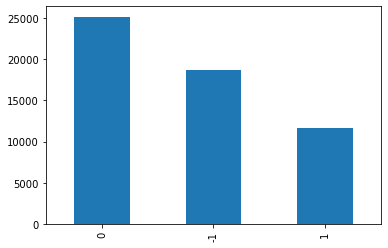

In [79]:
# 긍정, 부정, 중립의 비율을 확인합니다.
train_data['label'].value_counts().plot(kind = 'bar')

In [80]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0     -1  18742
1      0  25176
2      1  11634


In [81]:
# # train_data에 한글과 공백,영어,숫자를 제외하고 모두 제거하는 정규 표현식을 수행해봅시다.
# train_data['제목'] = train_data['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9 ]","")

In [82]:
train_data['제목'] = train_data['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-82-d56009e381d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['제목'] = train_data['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [83]:
train_data['제목']

21316               연기금 애플  서학개미 테슬라투자배틀 승자는
27602                 날개 꺾인 테슬라 조 폭식 개미들 어쩌나
24191                      국제유가 상승 탄력 연동  화색
25925                글로벌전망  대선 증시 국제유가 금값 상승
16465                        자주 파자마 라방 특별 판매
                        ...                 
14890           어디에도 없다 나만의 새해 인사말 카드 만드는 방법
11813            독립기념관 전용 서체 독립기념관체 무료 배포 나서
10738    주식카페 운영자가 미리 산 주식 매수 추천 무차입 공매도도 기승
1547                       몸값 조억  월 중 코스피 입성
27206                석유 달러화선순위 무담보채권  현금흐름은 
Name: 제목, Length: 55552, dtype: object

## 토큰화 수행
* Konlpy에서 제공하는 라이브러리를 활용해 토큰화를 진행합니다. 
* Okt모형을 이용합니다.

In [84]:
# 불용어 제시 
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [85]:
okt = Okt() # 모형 호출 및 초기화 
X_train = []
for sentence in train_data['제목']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [86]:
print(X_train[:3])

[['연기금', '애플', '서학', '개미', '테슬라', '투자', '배틀', '승자'], ['날개', '꺾다', '테슬라', '조', '폭', '식', '개미', '어쩌나'], ['국제', '유가', '상승', '탄력', '연동', '화색']]


* 테스트 데이터에 대해서도 동일한 방식으로 토큰화를 진행합니다.

In [87]:
X_test = []
for sentence in test_data['제목']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [88]:
print(X_test[:3])

[['[', '장외', '주식', ']', '대기업', '계열', '주', '강세'], ['하루', '2%', '널뛰기', '기본', "...'", '조울증', '장세', "'", '믿다', '건', '역시', '‘', '실적', "'"], ['\u200b', '[', '2분', '기', '투자', '전략', ']', 'ELS', '시장', '번진', 'ESG', '열풍']]


In [89]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

## 정수 인코딩
* 각각의 단어 토큰에 고유 키값(정수)을 부여합니다.

In [90]:
tokenizer = Tokenizer() # 모형 초기화 
tokenizer.fit_on_texts(X_train)

# Tokenizer는 문장으로부터 단어를 토큰화하고 숫자에 대응시키는 딕셔너리를 사용할 수 있도록 합니다.
# fit_on_texts() 메서드는 문자 데이터를 입력받아서 리스트의 형태로 변환합니다.

In [91]:
# tokenizer.word_index를 출력하여 확인 가능합니다.
print(tokenizer.word_index)

{'코스피': 1, '삼성': 2, '증시': 3, '전자': 4, '네이버': 5, '마감': 6, '코로나': 7, '상승': 8, '로': 9, '년': 10, '조': 11, '일': 12, '투자': 13, '뉴욕증시': 14, '하락': 15, '선': 16, '주': 17, '시': 18, '최고': 19, '반도체': 20, '장': 21, '이재용': 22, '시장': 23, '기업': 24, '원': 25, '월': 26, '주식': 27, '개미': 28, '만': 29, '중': 30, '출발': 31, '돌파': 32, '되다': 33, '위': 34, '만에': 35, '외국인': 36, '까지': 37, '사상': 38, '대다': 39, '매수': 40, '첫': 41, '황': 42, '등': 43, '주가': 44, '세': 45, '한국': 46, '다우': 47, '기관': 48, '에도': 49, '달러': 50, '경제': 51, '억': 52, '서': 53, '적': 54, '보다': 55, '억원': 56, '글로벌': 57, '더': 58, '치': 59, '공매도': 60, '분기': 61, '출시': 62, '기': 63, '전': 64, '코스닥': 65, '대': 66, '성': 67, '갤럭시': 68, '최대': 69, '나스닥': 70, '실적': 71, '백신': 72, '기술': 73, '없다': 74, '급등': 75, '금리': 76, '총': 77, '미국': 78, '개인': 79, '국내': 80, '거래': 81, '온라인': 82, '증권': 83, '오른': 84, '카카오': 85, '테슬라': 86, '올해': 87, '회복': 88, '전망': 89, '만원': 90, '강세': 91, '늘다': 92, '것': 93, '세계': 94, '급락': 95, '시대': 96, '순': 97, '뉴욕': 98, '우려': 99, '오늘': 100, '또': 101, '상': 102, 

In [92]:
tokenizer.word_counts
# 결과는 각 단어별 빈도수를 나타냄 
# 이것을 이용해서 밑의 명령을 수행할것! 

OrderedDict([('연기금', 135),
             ('애플', 597),
             ('서학', 140),
             ('개미', 1600),
             ('테슬라', 799),
             ('투자', 2295),
             ('배틀', 9),
             ('승자', 51),
             ('날개', 98),
             ('꺾다', 65),
             ('조', 2465),
             ('폭', 495),
             ('식', 191),
             ('어쩌나', 43),
             ('국제', 375),
             ('유가', 464),
             ('상승', 2836),
             ('탄력', 42),
             ('연동', 13),
             ('화색', 10),
             ('글로벌', 1022),
             ('전망', 769),
             ('대선', 325),
             ('증시', 3855),
             ('금값', 55),
             ('자주', 7),
             ('파자마', 6),
             ('라', 360),
             ('방', 220),
             ('특별', 167),
             ('판매', 449),
             ('미국', 831),
             ('서', 1054),
             ('시작', 354),
             ('되다', 1377),
             ('백신', 881),
             ('접종', 123),
             ('국내', 829),
             ('출발',

In [93]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 20594
등장 빈도가 2번 이하인 희귀 단어의 수: 9860
단어 집합에서 희귀 단어의 비율: 47.878022725065556
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.4953547072628144


In [94]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 10735


* 이제 구성된 토크나이저를 활용해 train과 test데이터를 각각 정수 인코딩 해줍니다.

In [95]:
tokenizer = Tokenizer(vocab_size,oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train) # 각각의 문장을 단어 사전에 기반하여 정수로 변환 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [96]:
# 결과 확인 
print(X_train[:3])

[[665, 136, 646, 29, 87, 14, 5240, 1670], [940, 1383, 87, 12, 171, 460, 29, 1893], [228, 180, 9, 1919, 4241, 4946]]


In [97]:
print(X_test[:3])

[[1, 892, 28, 1, 370, 3576, 18, 92], [237, 1, 2170, 2546, 1, 1, 616, 1, 1090, 587, 2896, 1, 72, 1], [1, 1, 1, 64, 14, 222, 1, 1, 24, 7183, 1, 547]]


## 토큰화 진행 후 발생한 결측치 제거

In [98]:
# 빈 문장 확인 
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [99]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

55520
55520


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## 패딩

문장의 최대 길이 : 28
문장의 평균 길이 : 9.14090417867435


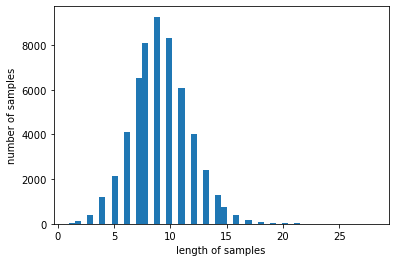

In [100]:
print('문장의 최대 길이 :',max(len(l) for l in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [101]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [102]:
# 해당 길이 이하의 셈플 비중을 봅니다.
max_len = 17
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 17 이하인 샘플의 비율: 99.60914985590779


In [103]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [104]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55520, 17)
(55520,)
(15335, 17)
(15335,)


## 목표변수 데이터 처리
* 이후 모형에 들어갈 형태에 맞춰 배열화 시켜줍니다.

In [105]:
# y_train = np.array(train_data['label'])
# y_test = np.array(test_data['label'])

In [106]:
y_train = []
y_test = []



for i in range(len(train_data['label'])):
  if train_data['label'].iloc[i] == 1:
    y_train.append([0, 0, 1])
  elif train_data['label'].iloc[i] == 0:
    y_train.append([0, 1, 0])
  elif train_data['label'].iloc[i] == -1:
    y_train.append([1, 0, 0])

for i in range(len(test_data['label'])):
  if test_data['label'].iloc[i] == 1:
    y_test.append([0, 0, 1])
  elif test_data['label'].iloc[i] == 0:
    y_test.append([0, 1, 0])
  elif test_data['label'].iloc[i] == -1:
    y_test.append([1, 0, 0])

y_train = np.array(y_train)
y_test = np.array(y_test)

In [107]:
print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

55520
55552
15335
15335


## 모형 구축 및 학습 
* LSTM모형과 GRU모형을 이용해 모형을 구성합니다.

### LSTM모형을 활용한 모형 

In [108]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,GRU
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [110]:
model_slstm = Sequential()
model_slstm.add(Embedding(vocab_size,100))
model_slstm.add(LSTM(128,activation="relu",return_sequences=True,dropout=0.1))
model_slstm.add(LSTM(64,activation="relu",return_sequences=True,dropout=0.1))
model_slstm.add(LSTM(64,activation='relu' ,return_sequences=False,dropout=0.1))
model_slstm.add(Dense(3,activation='softmax'))

In [111]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
mc = ModelCheckpoint('best_model_slstm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [112]:
model_slstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model_slstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1073500   
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 128)         117248    
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 1,273,375
Trainable params: 1,273,375
Non-trainable params: 0
_________________________________________________________________


In [113]:
sentiment_lstm = model_slstm.fit(X_train,y_train,epochs=10,callbacks=[es,mc], batch_size=10, validation_split=0.2)


Epoch 1/10
4442/4442 [==============================] - 184s 40ms/step - loss: 1.0541 - acc: 0.4579 - val_loss: 1.0613 - val_acc: 0.4409

Epoch 00001: val_acc improved from -inf to 0.44092, saving model to best_model_slstm.h5
Epoch 2/10
4442/4442 [==============================] - 162s 36ms/step - loss: 1.0573 - acc: 0.4545 - val_loss: 1.0649 - val_acc: 0.4392

Epoch 00002: val_acc did not improve from 0.44092
Epoch 3/10
4442/4442 [==============================] - 199s 45ms/step - loss: 1.0172 - acc: 0.4712 - val_loss: 1.0968 - val_acc: 0.4216

Epoch 00003: val_acc did not improve from 0.44092
Epoch 4/10
4442/4442 [==============================] - 199s 45ms/step - loss: 0.9569 - acc: 0.5271 - val_loss: 1.1137 - val_acc: 0.3991

Epoch 00004: val_acc did not improve from 0.44092
Epoch 5/10
4442/4442 [==============================] - 203s 46ms/step - loss: 0.8884 - acc: 0.5790 - val_loss: 1.2016 - val_acc: 0.3947

Epoch 00005: val_acc did not improve from 0.44092
Epoch 00005: early sto

In [116]:
# load_model = load_model('./best_model_sltm.h5')
model_slstm.evaluate(X_test,y_test)

480/480 [==============================] - 3s 7ms/step - loss: 1.2154 - acc: 0.4139


[1.2153599262237549, 0.4138897955417633]

In [117]:
print("\n 테스트 정확도 : {:.2f}%".format(model_slstm.evaluate(X_test,y_test)[1]*100))

480/480 [==============================] - 3s 7ms/step - loss: 1.2154 - acc: 0.4139

 테스트 정확도 : 41.39%


### GRU를 활용한 모형학습

In [118]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,GRU
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [119]:
model_sGRU = Sequential()
model_sGRU.add(Embedding(vocab_size,100))
model_sGRU.add(GRU(128,activation="relu",return_sequences=True,dropout=0.1))
model_sGRU.add(GRU(64,activation="relu",return_sequences=True,dropout=0.1))
model_sGRU.add(GRU(64,activation='relu' ,return_sequences=False,dropout=0.1))
model_sGRU.add(Dense(3,activation='softmax'))

model_sGRU.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1073500   
_________________________________________________________________
gru_6 (GRU)                  (None, None, 128)         88320     
_________________________________________________________________
gru_7 (GRU)                  (None, None, 64)          37248     
_________________________________________________________________
gru_8 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 1,224,223
Trainable params: 1,224,223
Non-trainable params: 0
_________________________________________________________________


In [120]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
mc = ModelCheckpoint('best_model_GRU.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [121]:
model_sGRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [122]:
sentiment_gru = model_sGRU.fit(X_train,y_train,epochs=10,callbacks=[es,mc], batch_size=10, validation_split=0.2)

Epoch 1/10
4442/4442 [==============================] - 192s 42ms/step - loss: 1.0542 - acc: 0.4565 - val_loss: 1.0603 - val_acc: 0.4409

Epoch 00001: val_acc improved from -inf to 0.44092, saving model to best_model_GRU.h5
Epoch 2/10
4442/4442 [==============================] - 175s 39ms/step - loss: 1.0464 - acc: 0.4562 - val_loss: 1.0661 - val_acc: 0.4409

Epoch 00002: val_acc did not improve from 0.44092
Epoch 3/10
4442/4442 [==============================] - 182s 41ms/step - loss: 1.0139 - acc: 0.4689 - val_loss: 1.1051 - val_acc: 0.4184

Epoch 00003: val_acc did not improve from 0.44092
Epoch 4/10
4442/4442 [==============================] - 180s 40ms/step - loss: 0.9550 - acc: 0.5214 - val_loss: 1.1515 - val_acc: 0.4064

Epoch 00004: val_acc did not improve from 0.44092
Epoch 5/10
4442/4442 [==============================] - 174s 39ms/step - loss: 0.8788 - acc: 0.5751 - val_loss: 1.2284 - val_acc: 0.3946

Epoch 00005: val_acc did not improve from 0.44092
Epoch 00005: early stopp

In [123]:
# load_model = load_model('best_model_GRU.h5')
# load_model.evaluate(X_test,y_test)

In [124]:
print("\n 테스트 정확도 : {:.2f}%".format(model_sGRU.evaluate(X_test,y_test)[1]*100))

480/480 [==============================] - 2s 5ms/step - loss: 1.2216 - acc: 0.4066

 테스트 정확도 : 40.66%


## 카카오 데이터에 적용하기 

In [154]:
kakao_news

일자                                                 제목  label
0      20210514.0                 [더벨]'이커머스 고도화' 코리아센터, 계열사 시너지 '톡톡'     -1
1      20210514.0  한류 연계 협업콘텐츠 기획개발 지원 사업 캐스트, 복합 온라인 프로모션 캐스팅(CA...      0
2      20210514.0                           성장주 편식한 개미, 수익률 ‘올 마이너스’     -1
3      20210514.0              캐스팅(CAST:ING), 한류콘텐츠와 국내 중소기업의 새로운 만남      1
4      20210514.0           [마켓드라이브] 네이버, CBDC 사업 진입 소식에 디지털화폐주 '강세'     -1
...           ...                                                ...    ...
12046  20180305.0                               NH농협생명, 여성전용 건강보험 출시      0
12047  20180305.0                         8개월새 40배 껑충...'비싼 몸' 된 두나무     -1
12048  20180305.0                         8개월새 40배 껑충...'비싼 몸' 된 두나무     -1
12049  20180305.0         [fn이사람] 윤정하 카카오 헤어샵 총괄 "헤어샵 모바일 예약 서비스 안착"      1
12050  20180305.0             [fn 해외 대기획] 美 인도 이은 스타트업 강국 "이젠 실리콘발리"     -1

[61009 rows x 3 columns]

In [155]:
kakao_news_nlab = kakao_news[['일자','제목']]
kakao_news_nlab

일자                                                 제목
0      20210514.0                 [더벨]'이커머스 고도화' 코리아센터, 계열사 시너지 '톡톡'
1      20210514.0  한류 연계 협업콘텐츠 기획개발 지원 사업 캐스트, 복합 온라인 프로모션 캐스팅(CA...
2      20210514.0                           성장주 편식한 개미, 수익률 ‘올 마이너스’
3      20210514.0              캐스팅(CAST:ING), 한류콘텐츠와 국내 중소기업의 새로운 만남
4      20210514.0           [마켓드라이브] 네이버, CBDC 사업 진입 소식에 디지털화폐주 '강세'
...           ...                                                ...
12046  20180305.0                               NH농협생명, 여성전용 건강보험 출시
12047  20180305.0                         8개월새 40배 껑충...'비싼 몸' 된 두나무
12048  20180305.0                         8개월새 40배 껑충...'비싼 몸' 된 두나무
12049  20180305.0         [fn이사람] 윤정하 카카오 헤어샵 총괄 "헤어샵 모바일 예약 서비스 안착"
12050  20180305.0             [fn 해외 대기획] 美 인도 이은 스타트업 강국 "이젠 실리콘발리"

[61009 rows x 2 columns]

In [156]:
# train_data에 한글과 공백,영어,숫자를 제외하고 모두 제거하는 정규 표현식을 수행해봅시다.
kakao_news_nlab['제목'] = kakao_news_nlab['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


<ipython-input-156-2ae113fde3e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kakao_news_nlab['제목'] = kakao_news_nlab['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [157]:
kakao_news_nlab['제목'].nunique(),kakao_news_nlab['일자'].nunique()

(56599, 1167)

In [158]:
kakao_news_nlab.drop_duplicates(subset=['제목'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

<ipython-input-158-e67947eef391>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kakao_news_nlab.drop_duplicates(subset=['제목'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거


In [159]:
kakao_news_nlab

일자                                             제목
0      20210514.0                    더벨이커머스 고도화 코리아센터 계열사 시너지 톡톡
1      20210514.0  한류 연계 협업콘텐츠 기획개발 지원 사업 캐스트 복합 온라인 프로모션 캐스팅 개최
2      20210514.0                          성장주 편식한 개미 수익률 올 마이너스
3      20210514.0                     캐스팅 한류콘텐츠와 국내 중소기업의 새로운 만남
4      20210514.0                마켓드라이브 네이버  사업 진입 소식에 디지털화폐주 강세
...           ...                                            ...
12045  20180305.0                   코스피 기관 대규모 매도 물량 쏟아내며 보합권 출발
12046  20180305.0                              농협생명 여성전용 건강보험 출시
12047  20180305.0                             개월새 배 껑충비싼 몸 된 두나무
12049  20180305.0           이사람 윤정하 카카오 헤어샵 총괄 헤어샵 모바일 예약 서비스 안착
12050  20180305.0                 해외 대기획  인도 이은 스타트업 강국 이젠 실리콘발리

[56599 rows x 2 columns]

In [177]:
kakao_news_nlab.reset_index(drop=True, inplace= True)

In [178]:
kakao_news_nlab

일자                                             제목
0      20210514.0                    더벨이커머스 고도화 코리아센터 계열사 시너지 톡톡
1      20210514.0  한류 연계 협업콘텐츠 기획개발 지원 사업 캐스트 복합 온라인 프로모션 캐스팅 개최
2      20210514.0                          성장주 편식한 개미 수익률 올 마이너스
3      20210514.0                     캐스팅 한류콘텐츠와 국내 중소기업의 새로운 만남
4      20210514.0                마켓드라이브 네이버  사업 진입 소식에 디지털화폐주 강세
...           ...                                            ...
56594  20180305.0                   코스피 기관 대규모 매도 물량 쏟아내며 보합권 출발
56595  20180305.0                              농협생명 여성전용 건강보험 출시
56596  20180305.0                             개월새 배 껑충비싼 몸 된 두나무
56597  20180305.0           이사람 윤정하 카카오 헤어샵 총괄 헤어샵 모바일 예약 서비스 안착
56598  20180305.0                 해외 대기획  인도 이은 스타트업 강국 이젠 실리콘발리

[56599 rows x 2 columns]

In [160]:
tokened = []
for sentence in kakao_news_nlab['제목']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokened.append(temp_X)

In [161]:
# 시퀀스로 변환
kakao_news_sequence = tokenizer.texts_to_sequences(tokened)

In [162]:
# 패딩, 길이 맞추기 
new_pad = pad_sequences(kakao_news_sequence,maxlen=max_len)

In [163]:
# 성능이 비교적 안정적인 학습된 GRU 모델을 이용하여 예측을 수행합니다.
predict = model_sGRU.predict(new_pad)

In [164]:
predict_labels = np.argmax(predict, axis=1)

In [165]:
predict_labels_df = pd.DataFrame(predict_labels,columns=['pred_index'])
predict_labels_df

pred_index
0               1
1               1
2               1
3               0
4               0
...           ...
56594           1
56595           1
56596           0
56597           0
56598           0

[56599 rows x 1 columns]

In [166]:
print(kakao_news_nlab.shape)
print(predict_labels_df.shape)

(56599, 2)
(56599, 1)


In [179]:
sentiment_result = pd.concat([kakao_news_nlab,predict_labels_df],axis=1)
sentiment_result

일자                                             제목  pred_index
0      20210514.0                    더벨이커머스 고도화 코리아센터 계열사 시너지 톡톡           1
1      20210514.0  한류 연계 협업콘텐츠 기획개발 지원 사업 캐스트 복합 온라인 프로모션 캐스팅 개최           1
2      20210514.0                          성장주 편식한 개미 수익률 올 마이너스           1
3      20210514.0                     캐스팅 한류콘텐츠와 국내 중소기업의 새로운 만남           0
4      20210514.0                마켓드라이브 네이버  사업 진입 소식에 디지털화폐주 강세           0
...           ...                                            ...         ...
56594  20180305.0                   코스피 기관 대규모 매도 물량 쏟아내며 보합권 출발           1
56595  20180305.0                              농협생명 여성전용 건강보험 출시           1
56596  20180305.0                             개월새 배 껑충비싼 몸 된 두나무           0
56597  20180305.0           이사람 윤정하 카카오 헤어샵 총괄 헤어샵 모바일 예약 서비스 안착           0
56598  20180305.0                 해외 대기획  인도 이은 스타트업 강국 이젠 실리콘발리           0

[56599 rows x 3 columns]

In [180]:
# 일자 데이터를 데이트타임으로 전환 
sentiment_result['일자'] = pd.to_datetime(sentiment_result['일자'], format="%Y%m%d")

In [181]:
# 일별 긍정점수 산출 
daily_news_score = sentiment_result.groupby('일자').pred_index.mean()

## 데이터 통합하기 

In [182]:
print(result['Date'].dtype)


datetime64[ns]


In [183]:
daily_news_score = pd.DataFrame(daily_news_score)

In [184]:
index_Date = daily_news_score.index # 인덱스에 있는 내용을 추출해 변수로 담아 둡니다. 
index_Date = pd.DataFrame(index_Date) # 인덱스 배열을 데이터 프레임 형태로 전환합니다. 
daily_news_score.reset_index(drop=True,inplace=True) # 기존 배열에서 날짜 인덱스를 제거 하고 정수 인덱스로 수정합니다. 
daily_news_score = pd.concat([index_Date,daily_news_score], axis=1) # 날짜 인덱스와 변경된 프레임을 붙여, 날짜를 하나의 변수로 컬럼에 넣어줍니다.

daily_news_score

일자  pred_index
0    2018-03-05    0.705882
1    2018-03-06    0.769231
2    2018-03-07    0.918919
3    2018-03-08    0.697674
4    2018-03-09    0.911765
...         ...         ...
1162 2021-05-10    0.939759
1163 2021-05-11    0.762887
1164 2021-05-12    0.958904
1165 2021-05-13    0.819444
1166 2021-05-14    0.787879

[1167 rows x 2 columns]

In [185]:
daily_news_score = daily_news_score.rename(columns={'일자':'Date'})

In [186]:
final_data = pd.merge(left = result , right = daily_news_score, how = "inner", on = "Date")

In [187]:
final_data

Date  kakao_close  won_dollar_close  dollar_won_close  kospi_close  \
0   2018-03-05      24600.0       1079.209961          0.000927  2375.060059   
1   2018-03-06      26500.0       1076.660034          0.000929  2411.409912   
2   2018-03-07      25900.0       1063.160034          0.000941  2401.820068   
3   2018-03-08      26400.0       1066.150024          0.000938  2433.080078   
4   2018-03-09      26800.0       1073.459961          0.000932  2459.449951   
..         ...          ...               ...               ...          ...   
922 2021-05-07     114500.0       1119.390015          0.000893  3197.199951   
923 2021-05-09     114500.0       1111.969971          0.000899  3197.199951   
924 2021-05-10     116000.0       1115.540039          0.000896  3249.300049   
925 2021-05-11     114500.0       1118.229980          0.000894  3209.429932   
926 2021-05-12     113000.0       1118.229980          0.000894  3161.659912   

          S&P500        NASDAQ  kakao_volume  pred_index  
0    2720.939941   7330.709961     2086135.0    0.705882  
1    2728.120117   7372.009766     5839410.0    0.769231  
2    2726.800049   7396.649902     2984510.0    0.918919  
3    2738.969971   7427.950195     2496280.0    0.697674  
4    2786.570068   7560.810059     3768400.0    0.911765  
..           ...           ...           ...         ...  
922  4232.600098  13752.240234     2040844.0    0.867647  
923  4232.600098  13752.240234     2040844.0    1.148148  
924  4188.430176  13401.860352     1898994.0    0.939759  
925  4152.100098  13389.429688     1875600.0    0.762887  
926  4063.040039  13031.679688     2558482.0    0.958904  

[927 rows x 9 columns]

# 감성분석 결과 포함 예측 수행

In [188]:
data = final_data.set_index('Date')
data

kakao_close  won_dollar_close  dollar_won_close  kospi_close  \
Date                                                                       
2018-03-05      24600.0       1079.209961          0.000927  2375.060059   
2018-03-06      26500.0       1076.660034          0.000929  2411.409912   
2018-03-07      25900.0       1063.160034          0.000941  2401.820068   
2018-03-08      26400.0       1066.150024          0.000938  2433.080078   
2018-03-09      26800.0       1073.459961          0.000932  2459.449951   
...                 ...               ...               ...          ...   
2021-05-07     114500.0       1119.390015          0.000893  3197.199951   
2021-05-09     114500.0       1111.969971          0.000899  3197.199951   
2021-05-10     116000.0       1115.540039          0.000896  3249.300049   
2021-05-11     114500.0       1118.229980          0.000894  3209.429932   
2021-05-12     113000.0       1118.229980          0.000894  3161.659912   

                 S&P500        NASDAQ  kakao_volume  pred_index  
Date                                                             
2018-03-05  2720.939941   7330.709961     2086135.0    0.705882  
2018-03-06  2728.120117   7372.009766     5839410.0    0.769231  
2018-03-07  2726.800049   7396.649902     2984510.0    0.918919  
2018-03-08  2738.969971   7427.950195     2496280.0    0.697674  
2018-03-09  2786.570068   7560.810059     3768400.0    0.911765  
...                 ...           ...           ...         ...  
2021-05-07  4232.600098  13752.240234     2040844.0    0.867647  
2021-05-09  4232.600098  13752.240234     2040844.0    1.148148  
2021-05-10  4188.430176  13401.860352     1898994.0    0.939759  
2021-05-11  4152.100098  13389.429688     1875600.0    0.762887  
2021-05-12  4063.040039  13031.679688     2558482.0    0.958904  

[927 rows x 8 columns]

In [189]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(data)
# scaled_data = scaler.transform(data)
# scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [190]:
## 이방식 적용해서 정규화 후 예측해볼것!! 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [191]:
window_size = 30
forcast = 1
data_x, data_y = make_window(scaled_data,window_size,forcast)

In [192]:
# 훈련용 데이터셋 70%
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0:train_size])
train_y = np.array(data_y[0:train_size])

# 테스트용 데이터셋 30%
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size:len(data_x)])
test_y = np.array(data_y[train_size:len(data_y)])

In [193]:
print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(627, 30, 8)
(627, 1)
(269, 30, 8)
(269, 1)


In [201]:
activation = 'tanh'
units = 20

model = Sequential()
model.add(GRU(units=units, activation=activation, return_sequences=True, input_shape=(window_size, 8)))     # (10,5) 입력 형태를 가지는 LSTM층
model.add(Dropout(0.1))     # 입력값의 10%를 0으로 치환하여 과적합 방지
model.add(GRU(units=units, activation=activation, return_sequences=True))
model.add(Dropout(0.1))
model.add(GRU(units=units, activation=activation))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')     # 최적화 도구:adam, 손실 함수:MSE
model.fit(train_x, train_y, epochs=200, batch_size = 25)          # epochs:전체 데이터셋 학습 횟수, batch_size:한 번에 제공되는 훈련 데이터 개수
pred_y = model.predict(test_x)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_21 (GRU)                 (None, 30, 20)            1800      
_________________________________________________________________
dropout_15 (Dropout)         (None, 30, 20)            0         
_________________________________________________________________
gru_22 (GRU)                 (None, 30, 20)            2520      
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 20)            0         
_________________________________________________________________
gru_23 (GRU)                 (None, 20)                2520      
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)               

26/26 [==============================] - 1s 24ms/step - loss: 1.9639e-04
Epoch 82/200
26/26 [==============================] - 1s 19ms/step - loss: 1.4063e-04
Epoch 83/200
26/26 [==============================] - 1s 20ms/step - loss: 1.6185e-04
Epoch 84/200
26/26 [==============================] - 1s 19ms/step - loss: 1.3325e-04
Epoch 85/200
26/26 [==============================] - 1s 19ms/step - loss: 1.9768e-04
Epoch 86/200
26/26 [==============================] - 1s 19ms/step - loss: 1.8391e-04
Epoch 87/200
26/26 [==============================] - 1s 26ms/step - loss: 1.3906e-04
Epoch 88/200
26/26 [==============================] - 1s 24ms/step - loss: 1.5937e-04
Epoch 89/200
26/26 [==============================] - 1s 23ms/step - loss: 1.5246e-04
Epoch 90/200
26/26 [==============================] - 1s 23ms/step - loss: 1.5472e-04
Epoch 91/200
26/26 [==============================] - 1s 21ms/step - loss: 1.8796e-04
Epoch 92/200
26/26 [==============================] - 1s 22ms/step 

26/26 [==============================] - 1s 27ms/step - loss: 1.2662e-04
Epoch 176/200
26/26 [==============================] - 1s 26ms/step - loss: 1.2009e-04
Epoch 177/200
26/26 [==============================] - 1s 25ms/step - loss: 1.4027e-04
Epoch 178/200
26/26 [==============================] - 1s 22ms/step - loss: 1.2226e-04
Epoch 179/200
26/26 [==============================] - 1s 28ms/step - loss: 1.3061e-04: 0s - loss: 1.3040e-
Epoch 180/200
26/26 [==============================] - 1s 20ms/step - loss: 1.5400e-04
Epoch 181/200
26/26 [==============================] - 1s 21ms/step - loss: 1.5007e-04
Epoch 182/200
26/26 [==============================] - 1s 27ms/step - loss: 1.2767e-04
Epoch 183/200
26/26 [==============================] - 1s 27ms/step - loss: 2.0023e-04
Epoch 184/200
26/26 [==============================] - 1s 25ms/step - loss: 1.0743e-04
Epoch 185/200
26/26 [==============================] - 1s 21ms/step - loss: 1.3124e-04
Epoch 186/200
26/26 [===============

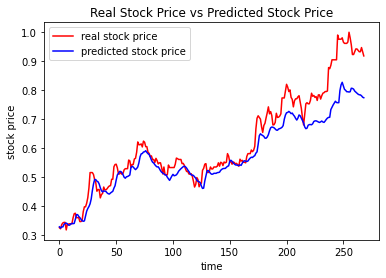

In [202]:
plt.figure()
plt.plot(test_y, color='r', label='real stock price')
plt.plot(pred_y, color='b', label='predicted stock price')
plt.title('Real Stock Price vs Predicted Stock Price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend(loc='best')
plt.show()